In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data[[' Liability-Assets Flag',' Net Income Flag','Bankrupt?']].sum()

 Liability-Assets Flag       8
 Net Income Flag          6819
Bankrupt?                  220
dtype: int64

In [4]:
data.shape

(6819, 96)

In [5]:
data = data[data[' Liability-Assets Flag']==0]

In [6]:
data = data.drop(columns=[' Liability-Assets Flag',' Net Income Flag'])

In [7]:
data_1 = data[data['Bankrupt?']==1]
data_0 = data[data['Bankrupt?']==0]

In [8]:
(rows,columns) = data_1.shape

In [9]:
data_0 = data_0.sample(rows,random_state=101)

In [10]:
df = pd.concat([data_1,data_0])

In [11]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
3903          0                                           0.488958          
1626          0                                           0.494613          
5700          0                                           0.459660          
2422          0                                           0.468191          
3341          0                                           0.448935          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
3903                                 0.503925   
1626                                 0.549771   
5700                                 0.509049   
2422                                 0.536633   
3341                                 0.482283   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
3903                                           0.536485    
1626                                           0.543445    
5700                                           0.512072    
2422                                           0.519996    
3341                                           0.499866    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
3903                 0.613384                      0.613384   
1626                 0.602091                      0.602091   
5700                 0.596009                      0.596009   
2422                 0.609586                      0.609586   
3341                 0.607972                      0.607972   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
3903                0.998959                    0.797302   
1626                0.998986                    0.797405   
5700                0.998956                    0.797344   
2422                0.999105                    0.797460   
3341                0.998827                    0.797229   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
3903                      0

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
X = df.drop(columns=['Bankrupt?'])
y =  df['Bankrupt?']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

Logistic Regression

In [15]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.54      0.74      0.63        62
           1       0.72      0.51      0.60        80

    accuracy                           0.61       142
   macro avg       0.63      0.63      0.61       142
weighted avg       0.64      0.61      0.61       142



In [17]:
print(confusion_matrix(y_test, y_predict))

[[46 16]
 [39 41]]


In [18]:
# lr = LogisticRegression(solver='liblinear',penalty='l1',max_iter=10000)
# lr.fit(X_train, y_train)
# y_predict = lr.predict(X_test)
# print(classification_report(y_test, y_predict))
# print(confusion_matrix(y_test, y_predict))

C:\Users\murti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


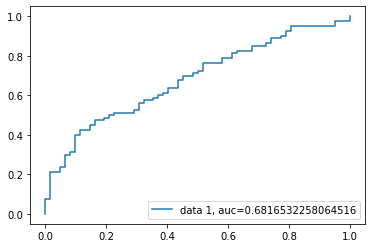

In [19]:
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
accuracy = np.zeros(100)

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    logmodel = LogisticRegression(max_iter=10000)
    logmodel.fit(X_train,y_train)
    y_predict = logmodel.predict(X_test)
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)

In [21]:
np.mean(accuracy)

0.5997674418604653

KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)

In [23]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.63      0.64        65
           1       0.63      0.64      0.64        64

    accuracy                           0.64       129
   macro avg       0.64      0.64      0.64       129
weighted avg       0.64      0.64      0.64       129

[[41 24]
 [23 41]]


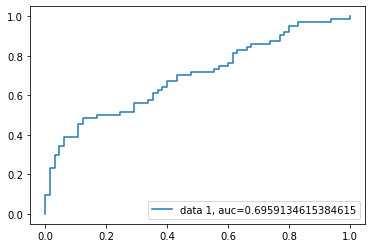

In [24]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)

y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Bagging Classifier

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),n_estimators=1000)
bagging.fit(X_train, y_train)
y_predict = bagging.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        65
           1       0.61      0.56      0.59        64

    accuracy                           0.60       129
   macro avg       0.61      0.60      0.60       129
weighted avg       0.61      0.60      0.60       129

[[42 23]
 [28 36]]


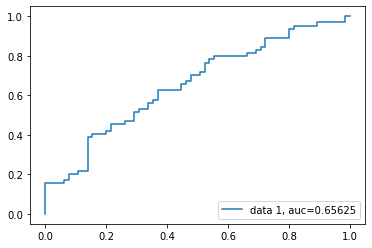

In [26]:
y_pred_proba = bagging.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Catboost

In [27]:
from catboost import CatBoostClassifier

In [28]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

Learning rate set to 0.006152
0:	learn: 0.6873016	total: 260ms	remaining: 4m 20s
1:	learn: 0.6806180	total: 283ms	remaining: 2m 21s
2:	learn: 0.6755940	total: 308ms	remaining: 1m 42s
3:	learn: 0.6694406	total: 331ms	remaining: 1m 22s
4:	learn: 0.6625551	total: 355ms	remaining: 1m 10s
5:	learn: 0.6572437	total: 378ms	remaining: 1m 2s
6:	learn: 0.6523802	total: 405ms	remaining: 57.4s
7:	learn: 0.6473727	total: 427ms	remaining: 53s
8:	learn: 0.6421919	total: 454ms	remaining: 50s
9:	learn: 0.6368573	total: 496ms	remaining: 49.1s
10:	learn: 0.6316384	total: 523ms	remaining: 47s
11:	learn: 0.6272461	total: 552ms	remaining: 45.4s
12:	learn: 0.6227675	total: 578ms	remaining: 43.9s
13:	learn: 0.6178841	total: 602ms	remaining: 42.4s
14:	learn: 0.6132568	total: 625ms	remaining: 41s
15:	learn: 0.6082755	total: 648ms	remaining: 39.8s
16:	learn: 0.6023238	total: 670ms	remaining: 38.8s
17:	learn: 0.5978430	total: 700ms	remaining: 38.2s
18:	learn: 0.5942333	total: 728ms	remaining: 37.6s
19:	learn: 0.5

164:	learn: 0.2508767	total: 4.73s	remaining: 23.9s
165:	learn: 0.2495842	total: 4.76s	remaining: 23.9s
166:	learn: 0.2482283	total: 4.78s	remaining: 23.9s
167:	learn: 0.2473698	total: 4.81s	remaining: 23.8s
168:	learn: 0.2464250	total: 4.83s	remaining: 23.8s
169:	learn: 0.2457222	total: 4.86s	remaining: 23.7s
170:	learn: 0.2445720	total: 4.89s	remaining: 23.7s
171:	learn: 0.2436295	total: 4.92s	remaining: 23.7s
172:	learn: 0.2425811	total: 4.94s	remaining: 23.6s
173:	learn: 0.2411203	total: 4.97s	remaining: 23.6s
174:	learn: 0.2402785	total: 4.99s	remaining: 23.5s
175:	learn: 0.2395960	total: 5.02s	remaining: 23.5s
176:	learn: 0.2383597	total: 5.05s	remaining: 23.5s
177:	learn: 0.2374647	total: 5.07s	remaining: 23.4s
178:	learn: 0.2367497	total: 5.1s	remaining: 23.4s
179:	learn: 0.2359640	total: 5.13s	remaining: 23.4s
180:	learn: 0.2349242	total: 5.16s	remaining: 23.3s
181:	learn: 0.2340761	total: 5.18s	remaining: 23.3s
182:	learn: 0.2329395	total: 5.21s	remaining: 23.3s
183:	learn: 0

328:	learn: 0.1450312	total: 9.11s	remaining: 18.6s
329:	learn: 0.1445946	total: 9.14s	remaining: 18.6s
330:	learn: 0.1441489	total: 9.16s	remaining: 18.5s
331:	learn: 0.1438457	total: 9.19s	remaining: 18.5s
332:	learn: 0.1433568	total: 9.21s	remaining: 18.4s
333:	learn: 0.1430166	total: 9.23s	remaining: 18.4s
334:	learn: 0.1427436	total: 9.26s	remaining: 18.4s
335:	learn: 0.1423219	total: 9.28s	remaining: 18.3s
336:	learn: 0.1416620	total: 9.31s	remaining: 18.3s
337:	learn: 0.1413199	total: 9.33s	remaining: 18.3s
338:	learn: 0.1408474	total: 9.36s	remaining: 18.2s
339:	learn: 0.1403935	total: 9.38s	remaining: 18.2s
340:	learn: 0.1398820	total: 9.4s	remaining: 18.2s
341:	learn: 0.1394665	total: 9.43s	remaining: 18.1s
342:	learn: 0.1389507	total: 9.45s	remaining: 18.1s
343:	learn: 0.1384777	total: 9.48s	remaining: 18.1s
344:	learn: 0.1380659	total: 9.5s	remaining: 18s
345:	learn: 0.1378263	total: 9.53s	remaining: 18s
346:	learn: 0.1373467	total: 9.55s	remaining: 18s
347:	learn: 0.136950

494:	learn: 0.0975094	total: 13.1s	remaining: 13.4s
495:	learn: 0.0972282	total: 13.1s	remaining: 13.4s
496:	learn: 0.0970411	total: 13.2s	remaining: 13.3s
497:	learn: 0.0968435	total: 13.2s	remaining: 13.3s
498:	learn: 0.0966563	total: 13.2s	remaining: 13.3s
499:	learn: 0.0964409	total: 13.2s	remaining: 13.2s
500:	learn: 0.0963205	total: 13.3s	remaining: 13.2s
501:	learn: 0.0961699	total: 13.3s	remaining: 13.2s
502:	learn: 0.0958987	total: 13.3s	remaining: 13.2s
503:	learn: 0.0956848	total: 13.3s	remaining: 13.1s
504:	learn: 0.0955304	total: 13.4s	remaining: 13.1s
505:	learn: 0.0954175	total: 13.4s	remaining: 13.1s
506:	learn: 0.0952190	total: 13.4s	remaining: 13s
507:	learn: 0.0949665	total: 13.4s	remaining: 13s
508:	learn: 0.0947048	total: 13.5s	remaining: 13s
509:	learn: 0.0944633	total: 13.5s	remaining: 12.9s
510:	learn: 0.0942822	total: 13.5s	remaining: 12.9s
511:	learn: 0.0941852	total: 13.5s	remaining: 12.9s
512:	learn: 0.0940160	total: 13.6s	remaining: 12.9s
513:	learn: 0.0938

653:	learn: 0.0727613	total: 17s	remaining: 8.97s
654:	learn: 0.0726904	total: 17s	remaining: 8.94s
655:	learn: 0.0726107	total: 17s	remaining: 8.91s
656:	learn: 0.0725796	total: 17s	remaining: 8.88s
657:	learn: 0.0724525	total: 17s	remaining: 8.86s
658:	learn: 0.0724031	total: 17.1s	remaining: 8.83s
659:	learn: 0.0723355	total: 17.1s	remaining: 8.8s
660:	learn: 0.0722057	total: 17.1s	remaining: 8.78s
661:	learn: 0.0721703	total: 17.1s	remaining: 8.75s
662:	learn: 0.0720734	total: 17.2s	remaining: 8.72s
663:	learn: 0.0719932	total: 17.2s	remaining: 8.7s
664:	learn: 0.0718159	total: 17.2s	remaining: 8.67s
665:	learn: 0.0716884	total: 17.2s	remaining: 8.64s
666:	learn: 0.0715101	total: 17.3s	remaining: 8.62s
667:	learn: 0.0714311	total: 17.3s	remaining: 8.59s
668:	learn: 0.0714046	total: 17.3s	remaining: 8.56s
669:	learn: 0.0713866	total: 17.3s	remaining: 8.54s
670:	learn: 0.0712141	total: 17.4s	remaining: 8.51s
671:	learn: 0.0710924	total: 17.4s	remaining: 8.49s
672:	learn: 0.0710019	to

816:	learn: 0.0565994	total: 21.2s	remaining: 4.74s
817:	learn: 0.0564499	total: 21.2s	remaining: 4.71s
818:	learn: 0.0563721	total: 21.2s	remaining: 4.69s
819:	learn: 0.0563260	total: 21.2s	remaining: 4.66s
820:	learn: 0.0563145	total: 21.3s	remaining: 4.64s
821:	learn: 0.0561797	total: 21.3s	remaining: 4.61s
822:	learn: 0.0560913	total: 21.3s	remaining: 4.59s
823:	learn: 0.0560192	total: 21.4s	remaining: 4.56s
824:	learn: 0.0560004	total: 21.4s	remaining: 4.54s
825:	learn: 0.0559075	total: 21.4s	remaining: 4.51s
826:	learn: 0.0558922	total: 21.4s	remaining: 4.49s
827:	learn: 0.0558706	total: 21.5s	remaining: 4.46s
828:	learn: 0.0556970	total: 21.5s	remaining: 4.43s
829:	learn: 0.0556583	total: 21.5s	remaining: 4.41s
830:	learn: 0.0555907	total: 21.5s	remaining: 4.38s
831:	learn: 0.0554964	total: 21.6s	remaining: 4.36s
832:	learn: 0.0553769	total: 21.6s	remaining: 4.33s
833:	learn: 0.0552766	total: 21.6s	remaining: 4.3s
834:	learn: 0.0552302	total: 21.7s	remaining: 4.28s
835:	learn: 0

977:	learn: 0.0455715	total: 25.3s	remaining: 569ms
978:	learn: 0.0454753	total: 25.3s	remaining: 543ms
979:	learn: 0.0454632	total: 25.3s	remaining: 517ms
980:	learn: 0.0453718	total: 25.4s	remaining: 491ms
981:	learn: 0.0452792	total: 25.4s	remaining: 465ms
982:	learn: 0.0452684	total: 25.4s	remaining: 440ms
983:	learn: 0.0452096	total: 25.4s	remaining: 414ms
984:	learn: 0.0451648	total: 25.5s	remaining: 388ms
985:	learn: 0.0450822	total: 25.5s	remaining: 362ms
986:	learn: 0.0450115	total: 25.5s	remaining: 336ms
987:	learn: 0.0449728	total: 25.5s	remaining: 310ms
988:	learn: 0.0449566	total: 25.6s	remaining: 284ms
989:	learn: 0.0448390	total: 25.6s	remaining: 258ms
990:	learn: 0.0448297	total: 25.6s	remaining: 233ms
991:	learn: 0.0447685	total: 25.6s	remaining: 207ms
992:	learn: 0.0447556	total: 25.6s	remaining: 181ms
993:	learn: 0.0447394	total: 25.7s	remaining: 155ms
994:	learn: 0.0446587	total: 25.7s	remaining: 129ms
995:	learn: 0.0445945	total: 25.7s	remaining: 103ms
996:	learn: 

In [29]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        65
           1       0.83      0.97      0.89        64

    accuracy                           0.88       129
   macro avg       0.89      0.88      0.88       129
weighted avg       0.90      0.88      0.88       129

[[52 13]
 [ 2 62]]


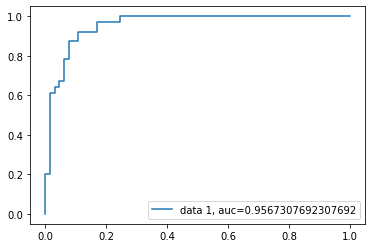

In [30]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_predict = dtree.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        65
           1       0.74      0.86      0.80        64

    accuracy                           0.78       129
   macro avg       0.79      0.78      0.78       129
weighted avg       0.79      0.78      0.78       129

[[46 19]
 [ 9 55]]


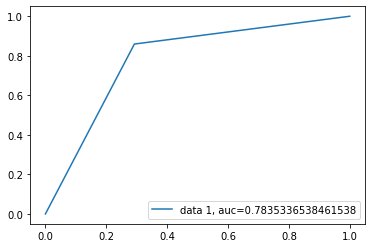

In [33]:
y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        65
           1       0.86      0.92      0.89        64

    accuracy                           0.88       129
   macro avg       0.89      0.88      0.88       129
weighted avg       0.89      0.88      0.88       129

[[55 10]
 [ 5 59]]


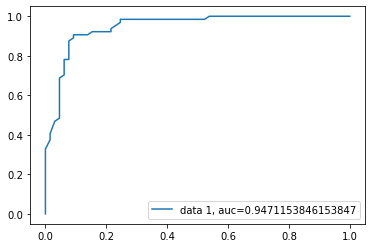

In [35]:
y_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ExtraTreesClassifier

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        65
           1       0.84      0.92      0.88        64

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129

[[54 11]
 [ 5 59]]


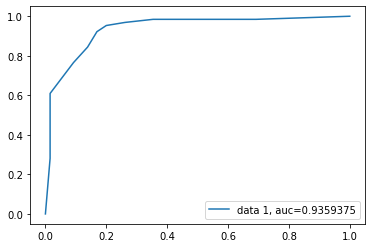

In [37]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

SVC

In [46]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf',C = 1, probability=True)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.62      0.66      0.64        65
           1       0.63      0.59      0.61        64

    accuracy                           0.63       129
   macro avg       0.63      0.63      0.63       129
weighted avg       0.63      0.63      0.63       129

[[43 22]
 [26 38]]


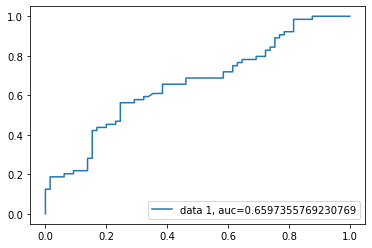

In [47]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Neural Network

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=1, max_iter=10000).fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        65
           1       0.61      0.56      0.59        64

    accuracy                           0.60       129
   macro avg       0.61      0.60      0.60       129
weighted avg       0.61      0.60      0.60       129

[[42 23]
 [28 36]]


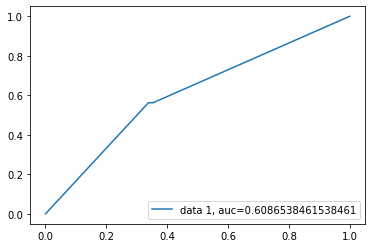

In [41]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_predict = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.52      0.98      0.68        65
           1       0.80      0.06      0.12        64

    accuracy                           0.53       129
   macro avg       0.66      0.52      0.40       129
weighted avg       0.66      0.53      0.40       129

[[64  1]
 [60  4]]


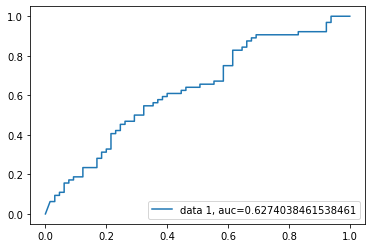

In [43]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Ada Boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        65
           1       0.74      0.88      0.80        64

    accuracy                           0.78       129
   macro avg       0.79      0.78      0.78       129
weighted avg       0.79      0.78      0.78       129

[[45 20]
 [ 8 56]]


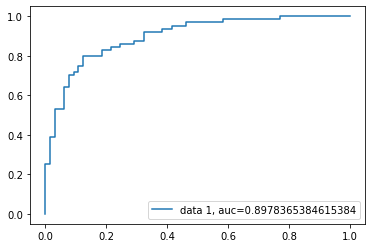

In [59]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [60]:
auc

0.8978365384615384

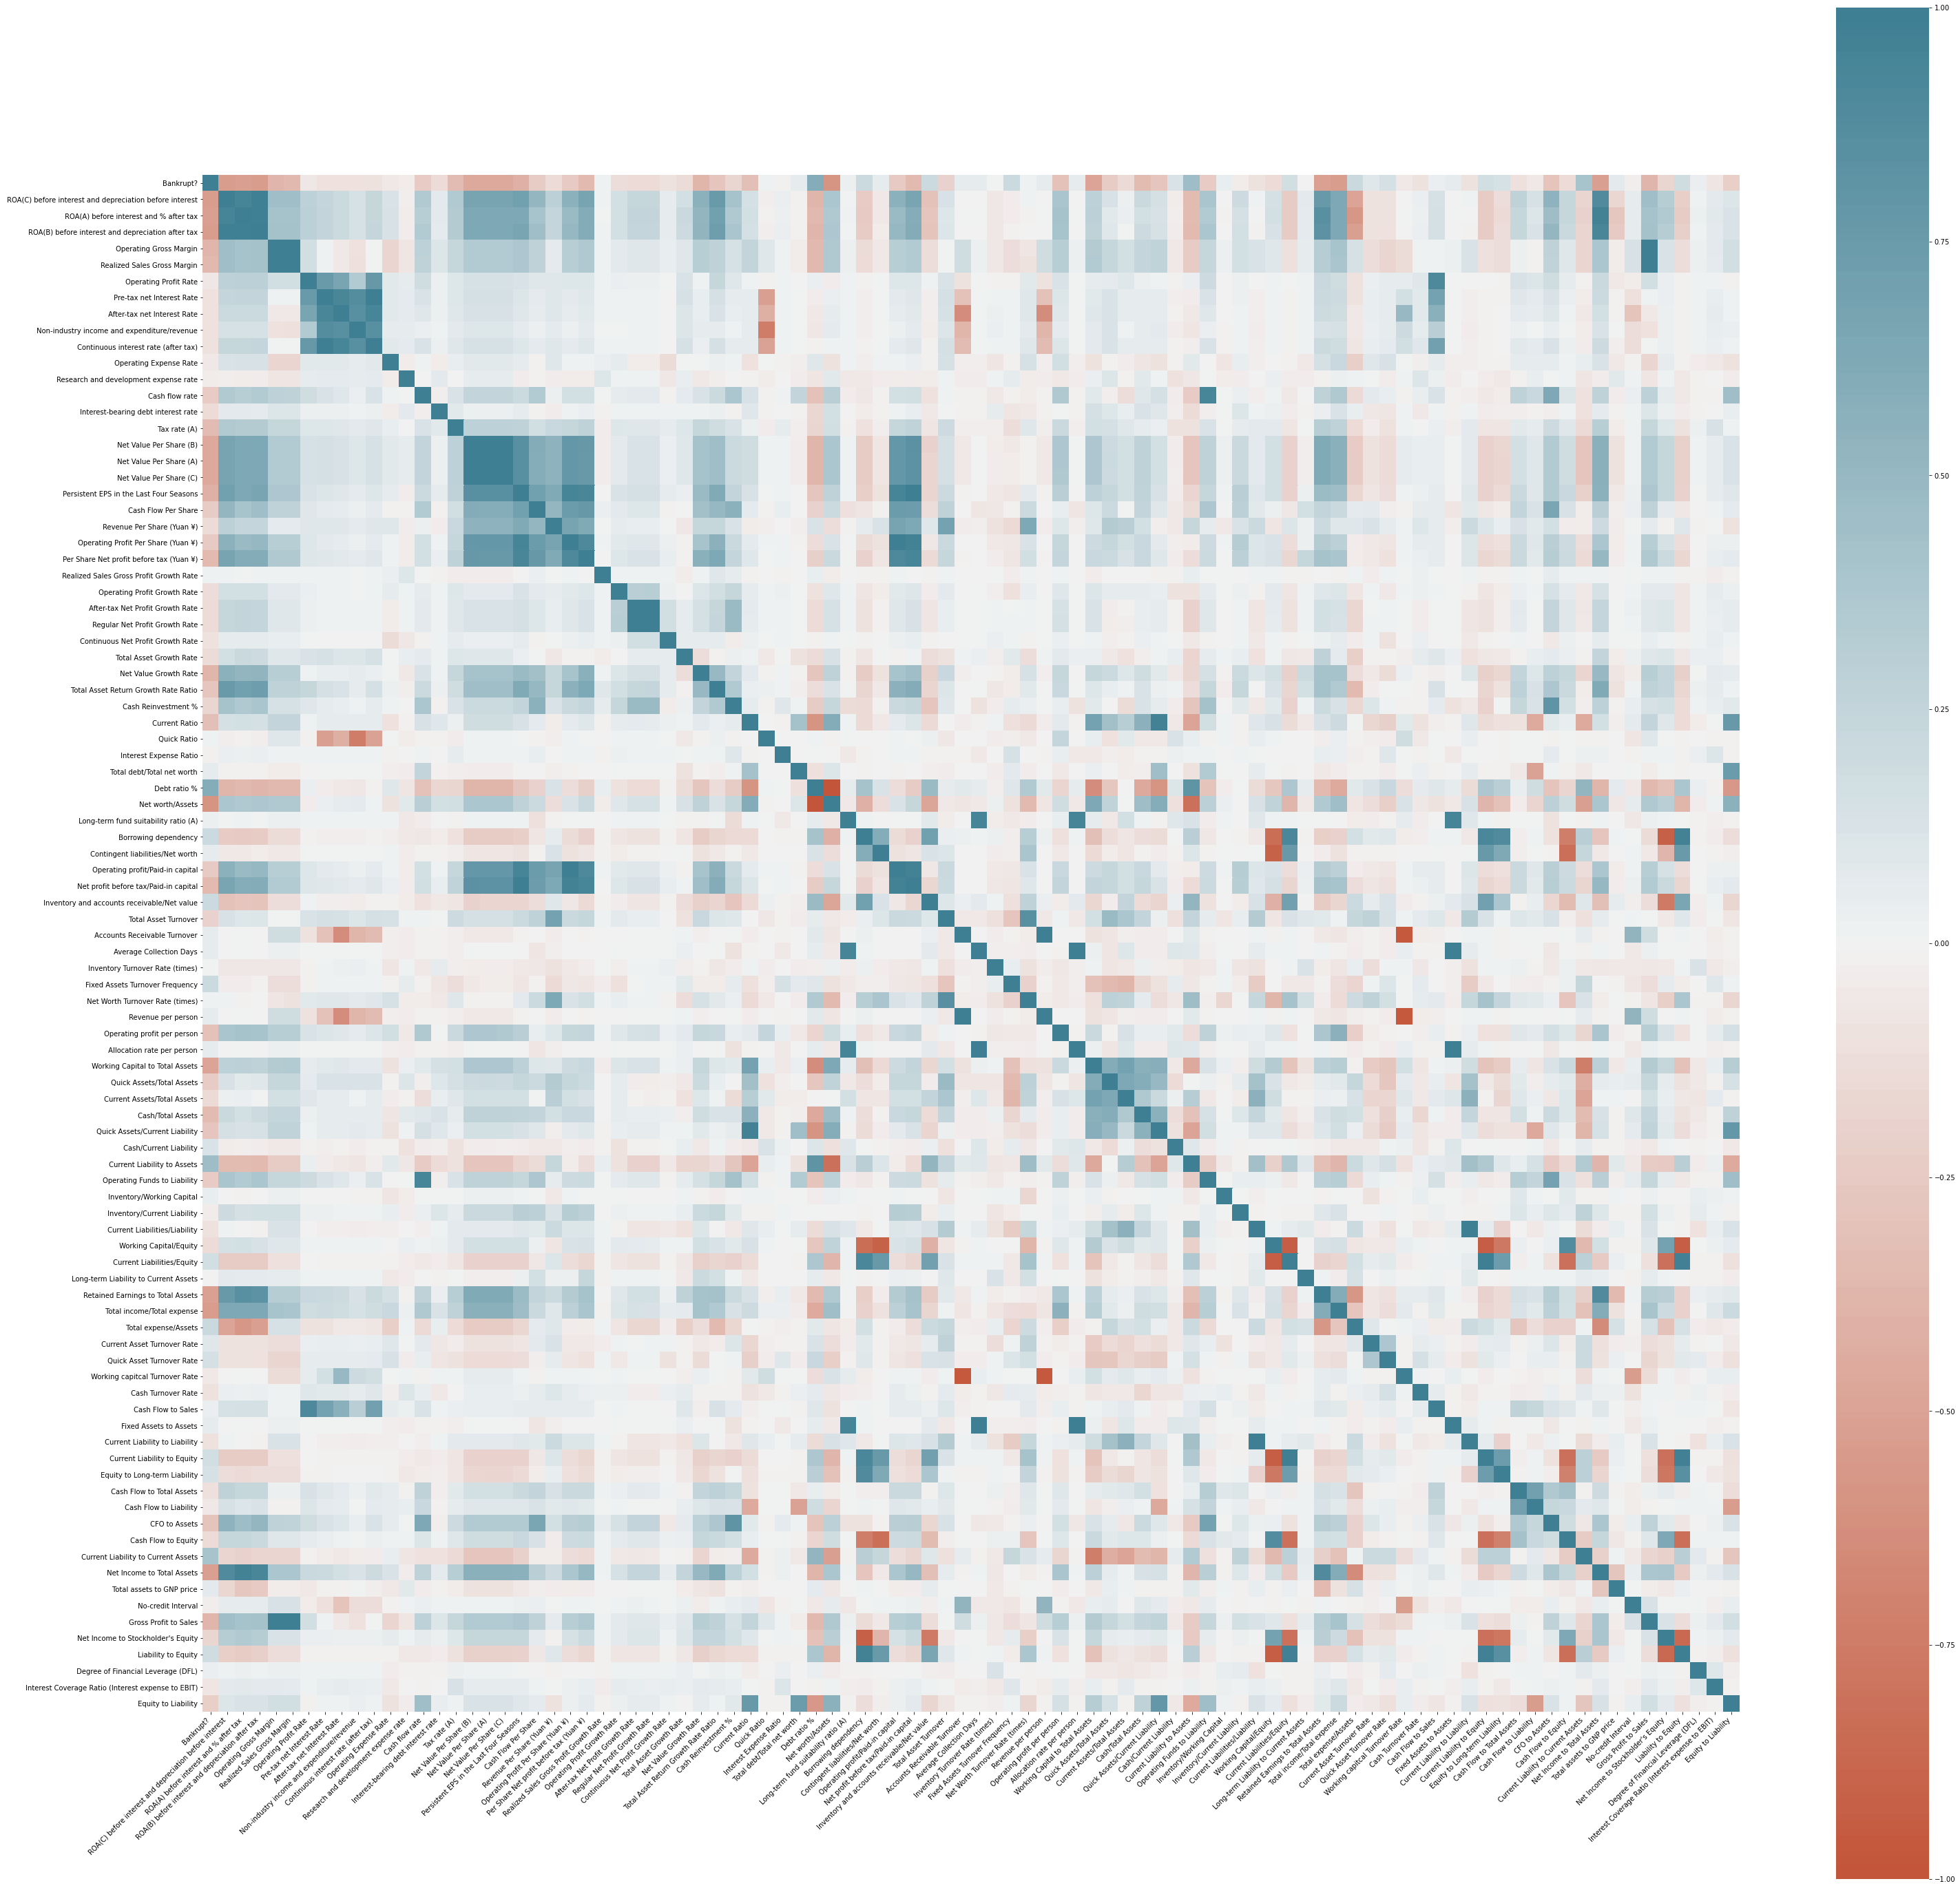

In [48]:
corr = df.corr()
plt.figure(figsize=(50,50))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("Correlation.pdf")

In [49]:
from sklearn.metrics import f1_score

In [50]:
data_1 = data[data['Bankrupt?']==1]
data_0 = data[data['Bankrupt?']==0]
(rows,columns) = data_1.shape

In [51]:
accuracy = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    logmodel = LogisticRegression(max_iter=1000)
    logmodel.fit(X_train,y_train)
    y_predict = logmodel.predict(X_test)
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)

In [52]:
np.mean(accuracy)

0.5703875968992249

In [53]:
f1 = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    y_predict = rfc.predict(X_test)
    f1[i]=f1_score(y_test, y_predict, average='macro')

In [54]:
np.mean(f1)

0.8574228402500751

Catboost(0.956)
Random Forest(0.947)
ExtraTrees(0.935)
Adaboost(0.926)

In [55]:
data_1 = data[data['Bankrupt?']==1]
data_0 = data[data['Bankrupt?']==0]
(rows,columns) = data_1.shape

In [61]:
accuracy = np.zeros(100)
f1 = np.zeros(100)
auc = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    clf = AdaBoostClassifier(n_estimators=100, random_state=i)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    f1[i]=f1_score(y_test, y_predict, average='macro')
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc[i] = metrics.roc_auc_score(y_test, y_pred_proba)

In [62]:
(np.mean(accuracy),np.mean(f1),np.mean(auc))

(0.834031007751938, 0.8333358403670742, 0.9060037557642575)

In [63]:
accuracy = np.zeros(100)
f1 = np.zeros(100)
auc = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    f1[i]=f1_score(y_test, y_predict, average='macro')
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc[i] = metrics.roc_auc_score(y_test, y_pred_proba)

In [64]:
(np.mean(accuracy),np.mean(f1),np.mean(auc))

(0.8427906976744185, 0.842134990079043, 0.9160429967443371)

In [65]:
accuracy = np.zeros(100)
f1 = np.zeros(100)
auc = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(X_train, y_train)
    y_predict = rfc.predict(X_test)
    f1[i]=f1_score(y_test, y_predict, average='macro')
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)
    y_pred_proba = rfc.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc[i] = metrics.roc_auc_score(y_test, y_pred_proba)

In [66]:
(np.mean(accuracy),np.mean(f1),np.mean(auc))

(0.8571317829457362, 0.8566436467515427, 0.9335728391193548)

In [67]:
accuracy = np.zeros(100)
f1 = np.zeros(100)
auc = np.zeros(100)

for i in range(100):
    data_0_i = data_0.sample(rows,random_state=i)
    df = pd.concat([data_1,data_0_i])
    X = df.drop(columns=['Bankrupt?'])
    y =  df['Bankrupt?']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=i)
    model = CatBoostClassifier()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    f1[i]=f1_score(y_test, y_predict, average='macro')
    accuracy[i]=(y_test==y_predict).sum()/len(y_test)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc[i] = metrics.roc_auc_score(y_test, y_pred_proba)

Learning rate set to 0.006152
0:	learn: 0.6875358	total: 31.4ms	remaining: 31.4s
1:	learn: 0.6814623	total: 56.5ms	remaining: 28.2s
2:	learn: 0.6757179	total: 85.3ms	remaining: 28.4s
3:	learn: 0.6699060	total: 118ms	remaining: 29.3s
4:	learn: 0.6642915	total: 143ms	remaining: 28.4s
5:	learn: 0.6587194	total: 166ms	remaining: 27.4s
6:	learn: 0.6542758	total: 189ms	remaining: 26.8s
7:	learn: 0.6489067	total: 220ms	remaining: 27.2s
8:	learn: 0.6441626	total: 248ms	remaining: 27.3s
9:	learn: 0.6395199	total: 274ms	remaining: 27.2s
10:	learn: 0.6338044	total: 298ms	remaining: 26.8s
11:	learn: 0.6293602	total: 320ms	remaining: 26.4s
12:	learn: 0.6236877	total: 343ms	remaining: 26.1s
13:	learn: 0.6192193	total: 366ms	remaining: 25.8s
14:	learn: 0.6156460	total: 389ms	remaining: 25.5s
15:	learn: 0.6103117	total: 418ms	remaining: 25.7s
16:	learn: 0.6052714	total: 450ms	remaining: 26s
17:	learn: 0.5999309	total: 475ms	remaining: 25.9s
18:	learn: 0.5949092	total: 498ms	remaining: 25.7s
19:	learn:

161:	learn: 0.2686501	total: 4.4s	remaining: 22.7s
162:	learn: 0.2677020	total: 4.44s	remaining: 22.8s
163:	learn: 0.2663553	total: 4.46s	remaining: 22.8s
164:	learn: 0.2657026	total: 4.49s	remaining: 22.7s
165:	learn: 0.2647393	total: 4.52s	remaining: 22.7s
166:	learn: 0.2637045	total: 4.54s	remaining: 22.6s
167:	learn: 0.2627419	total: 4.56s	remaining: 22.6s
168:	learn: 0.2616494	total: 4.59s	remaining: 22.6s
169:	learn: 0.2608935	total: 4.62s	remaining: 22.6s
170:	learn: 0.2596330	total: 4.66s	remaining: 22.6s
171:	learn: 0.2585569	total: 4.69s	remaining: 22.6s
172:	learn: 0.2575199	total: 4.71s	remaining: 22.5s
173:	learn: 0.2562962	total: 4.74s	remaining: 22.5s
174:	learn: 0.2553191	total: 4.78s	remaining: 22.5s
175:	learn: 0.2542812	total: 4.81s	remaining: 22.5s
176:	learn: 0.2532187	total: 4.84s	remaining: 22.5s
177:	learn: 0.2522401	total: 4.86s	remaining: 22.4s
178:	learn: 0.2514460	total: 4.89s	remaining: 22.4s
179:	learn: 0.2500044	total: 4.91s	remaining: 22.4s
180:	learn: 0

324:	learn: 0.1590339	total: 8.93s	remaining: 18.5s
325:	learn: 0.1586377	total: 8.96s	remaining: 18.5s
326:	learn: 0.1581892	total: 8.98s	remaining: 18.5s
327:	learn: 0.1577765	total: 9s	remaining: 18.4s
328:	learn: 0.1572867	total: 9.02s	remaining: 18.4s
329:	learn: 0.1568681	total: 9.05s	remaining: 18.4s
330:	learn: 0.1562871	total: 9.07s	remaining: 18.3s
331:	learn: 0.1558357	total: 9.1s	remaining: 18.3s
332:	learn: 0.1554027	total: 9.13s	remaining: 18.3s
333:	learn: 0.1549534	total: 9.15s	remaining: 18.2s
334:	learn: 0.1545059	total: 9.17s	remaining: 18.2s
335:	learn: 0.1538456	total: 9.2s	remaining: 18.2s
336:	learn: 0.1534578	total: 9.22s	remaining: 18.1s
337:	learn: 0.1529379	total: 9.25s	remaining: 18.1s
338:	learn: 0.1525186	total: 9.27s	remaining: 18.1s
339:	learn: 0.1519019	total: 9.29s	remaining: 18s
340:	learn: 0.1515383	total: 9.32s	remaining: 18s
341:	learn: 0.1511714	total: 9.35s	remaining: 18s
342:	learn: 0.1508339	total: 9.37s	remaining: 18s
343:	learn: 0.1504857	tot

486:	learn: 0.1079740	total: 12.9s	remaining: 13.6s
487:	learn: 0.1076931	total: 13s	remaining: 13.6s
488:	learn: 0.1074428	total: 13s	remaining: 13.6s
489:	learn: 0.1071512	total: 13s	remaining: 13.6s
490:	learn: 0.1069303	total: 13.1s	remaining: 13.5s
491:	learn: 0.1066582	total: 13.1s	remaining: 13.5s
492:	learn: 0.1064637	total: 13.1s	remaining: 13.5s
493:	learn: 0.1063093	total: 13.1s	remaining: 13.5s
494:	learn: 0.1060658	total: 13.2s	remaining: 13.4s
495:	learn: 0.1059029	total: 13.2s	remaining: 13.4s
496:	learn: 0.1057601	total: 13.2s	remaining: 13.4s
497:	learn: 0.1055775	total: 13.2s	remaining: 13.3s
498:	learn: 0.1053848	total: 13.3s	remaining: 13.3s
499:	learn: 0.1051102	total: 13.3s	remaining: 13.3s
500:	learn: 0.1048085	total: 13.3s	remaining: 13.3s
501:	learn: 0.1045766	total: 13.3s	remaining: 13.2s
502:	learn: 0.1043172	total: 13.4s	remaining: 13.2s
503:	learn: 0.1040388	total: 13.4s	remaining: 13.2s
504:	learn: 0.1037267	total: 13.4s	remaining: 13.1s
505:	learn: 0.1034

646:	learn: 0.0777467	total: 16.9s	remaining: 9.24s
647:	learn: 0.0775451	total: 17s	remaining: 9.21s
648:	learn: 0.0773898	total: 17s	remaining: 9.19s
649:	learn: 0.0771910	total: 17s	remaining: 9.16s
650:	learn: 0.0770740	total: 17s	remaining: 9.13s
651:	learn: 0.0769337	total: 17.1s	remaining: 9.1s
652:	learn: 0.0768026	total: 17.1s	remaining: 9.08s
653:	learn: 0.0766855	total: 17.1s	remaining: 9.05s
654:	learn: 0.0765260	total: 17.1s	remaining: 9.03s
655:	learn: 0.0763932	total: 17.2s	remaining: 9s
656:	learn: 0.0762151	total: 17.2s	remaining: 8.97s
657:	learn: 0.0760602	total: 17.2s	remaining: 8.95s
658:	learn: 0.0758048	total: 17.2s	remaining: 8.92s
659:	learn: 0.0756987	total: 17.3s	remaining: 8.89s
660:	learn: 0.0755825	total: 17.3s	remaining: 8.86s
661:	learn: 0.0754278	total: 17.3s	remaining: 8.84s
662:	learn: 0.0752848	total: 17.3s	remaining: 8.81s
663:	learn: 0.0751587	total: 17.4s	remaining: 8.78s
664:	learn: 0.0750023	total: 17.4s	remaining: 8.76s
665:	learn: 0.0748435	to

805:	learn: 0.0587399	total: 21.1s	remaining: 5.08s
806:	learn: 0.0586308	total: 21.2s	remaining: 5.06s
807:	learn: 0.0585426	total: 21.2s	remaining: 5.03s
808:	learn: 0.0583943	total: 21.2s	remaining: 5.01s
809:	learn: 0.0583226	total: 21.2s	remaining: 4.98s
810:	learn: 0.0582017	total: 21.3s	remaining: 4.95s
811:	learn: 0.0580445	total: 21.3s	remaining: 4.93s
812:	learn: 0.0578967	total: 21.3s	remaining: 4.9s
813:	learn: 0.0578570	total: 21.3s	remaining: 4.88s
814:	learn: 0.0578116	total: 21.4s	remaining: 4.85s
815:	learn: 0.0577007	total: 21.4s	remaining: 4.83s
816:	learn: 0.0575895	total: 21.4s	remaining: 4.8s
817:	learn: 0.0575113	total: 21.4s	remaining: 4.77s
818:	learn: 0.0573639	total: 21.5s	remaining: 4.75s
819:	learn: 0.0573514	total: 21.5s	remaining: 4.72s
820:	learn: 0.0572869	total: 21.5s	remaining: 4.7s
821:	learn: 0.0571951	total: 21.6s	remaining: 4.67s
822:	learn: 0.0571728	total: 21.6s	remaining: 4.64s
823:	learn: 0.0570857	total: 21.6s	remaining: 4.62s
824:	learn: 0.0

965:	learn: 0.0460571	total: 25.3s	remaining: 891ms
966:	learn: 0.0459702	total: 25.3s	remaining: 865ms
967:	learn: 0.0459113	total: 25.4s	remaining: 839ms
968:	learn: 0.0458286	total: 25.4s	remaining: 812ms
969:	learn: 0.0457563	total: 25.4s	remaining: 786ms
970:	learn: 0.0456649	total: 25.4s	remaining: 760ms
971:	learn: 0.0455707	total: 25.5s	remaining: 734ms
972:	learn: 0.0455090	total: 25.5s	remaining: 707ms
973:	learn: 0.0454331	total: 25.5s	remaining: 681ms
974:	learn: 0.0453511	total: 25.5s	remaining: 655ms
975:	learn: 0.0452938	total: 25.6s	remaining: 629ms
976:	learn: 0.0452473	total: 25.6s	remaining: 602ms
977:	learn: 0.0451678	total: 25.6s	remaining: 576ms
978:	learn: 0.0451028	total: 25.6s	remaining: 550ms
979:	learn: 0.0450076	total: 25.7s	remaining: 524ms
980:	learn: 0.0449366	total: 25.7s	remaining: 497ms
981:	learn: 0.0448451	total: 25.7s	remaining: 471ms
982:	learn: 0.0448262	total: 25.7s	remaining: 445ms
983:	learn: 0.0447831	total: 25.8s	remaining: 419ms
984:	learn: 

127:	learn: 0.2869465	total: 3.13s	remaining: 21.4s
128:	learn: 0.2856036	total: 3.16s	remaining: 21.3s
129:	learn: 0.2838832	total: 3.18s	remaining: 21.3s
130:	learn: 0.2824048	total: 3.21s	remaining: 21.3s
131:	learn: 0.2809323	total: 3.23s	remaining: 21.2s
132:	learn: 0.2796915	total: 3.25s	remaining: 21.2s
133:	learn: 0.2782975	total: 3.28s	remaining: 21.2s
134:	learn: 0.2767171	total: 3.3s	remaining: 21.2s
135:	learn: 0.2754175	total: 3.33s	remaining: 21.2s
136:	learn: 0.2742184	total: 3.35s	remaining: 21.1s
137:	learn: 0.2729231	total: 3.38s	remaining: 21.1s
138:	learn: 0.2719256	total: 3.4s	remaining: 21.1s
139:	learn: 0.2704512	total: 3.43s	remaining: 21s
140:	learn: 0.2693279	total: 3.45s	remaining: 21s
141:	learn: 0.2681104	total: 3.47s	remaining: 21s
142:	learn: 0.2670917	total: 3.5s	remaining: 21s
143:	learn: 0.2659881	total: 3.53s	remaining: 21s
144:	learn: 0.2645167	total: 3.56s	remaining: 21s
145:	learn: 0.2633607	total: 3.59s	remaining: 21s
146:	learn: 0.2621444	total: 

289:	learn: 0.1571775	total: 7.22s	remaining: 17.7s
290:	learn: 0.1564850	total: 7.24s	remaining: 17.6s
291:	learn: 0.1559843	total: 7.26s	remaining: 17.6s
292:	learn: 0.1557908	total: 7.29s	remaining: 17.6s
293:	learn: 0.1552869	total: 7.32s	remaining: 17.6s
294:	learn: 0.1550662	total: 7.34s	remaining: 17.5s
295:	learn: 0.1545338	total: 7.37s	remaining: 17.5s
296:	learn: 0.1541553	total: 7.39s	remaining: 17.5s
297:	learn: 0.1537727	total: 7.42s	remaining: 17.5s
298:	learn: 0.1533949	total: 7.45s	remaining: 17.5s
299:	learn: 0.1530208	total: 7.47s	remaining: 17.4s
300:	learn: 0.1525559	total: 7.5s	remaining: 17.4s
301:	learn: 0.1520130	total: 7.52s	remaining: 17.4s
302:	learn: 0.1515162	total: 7.54s	remaining: 17.4s
303:	learn: 0.1510134	total: 7.57s	remaining: 17.3s
304:	learn: 0.1506402	total: 7.6s	remaining: 17.3s
305:	learn: 0.1503040	total: 7.62s	remaining: 17.3s
306:	learn: 0.1498957	total: 7.65s	remaining: 17.3s
307:	learn: 0.1494302	total: 7.67s	remaining: 17.2s
308:	learn: 0.

454:	learn: 0.1049352	total: 11.7s	remaining: 14.1s
455:	learn: 0.1047775	total: 11.8s	remaining: 14s
456:	learn: 0.1046543	total: 11.8s	remaining: 14s
457:	learn: 0.1043715	total: 11.8s	remaining: 14s
458:	learn: 0.1041372	total: 11.8s	remaining: 14s
459:	learn: 0.1039634	total: 11.9s	remaining: 13.9s
460:	learn: 0.1036951	total: 11.9s	remaining: 13.9s
461:	learn: 0.1035583	total: 11.9s	remaining: 13.9s
462:	learn: 0.1033449	total: 12s	remaining: 13.9s
463:	learn: 0.1032625	total: 12s	remaining: 13.8s
464:	learn: 0.1031805	total: 12s	remaining: 13.8s
465:	learn: 0.1030174	total: 12s	remaining: 13.8s
466:	learn: 0.1029211	total: 12.1s	remaining: 13.8s
467:	learn: 0.1027976	total: 12.1s	remaining: 13.7s
468:	learn: 0.1025634	total: 12.1s	remaining: 13.7s
469:	learn: 0.1022768	total: 12.1s	remaining: 13.7s
470:	learn: 0.1020979	total: 12.2s	remaining: 13.7s
471:	learn: 0.1018242	total: 12.2s	remaining: 13.6s
472:	learn: 0.1017216	total: 12.2s	remaining: 13.6s
473:	learn: 0.1016457	total:

617:	learn: 0.0784748	total: 16.1s	remaining: 9.97s
618:	learn: 0.0782456	total: 16.2s	remaining: 9.95s
619:	learn: 0.0780122	total: 16.2s	remaining: 9.92s
620:	learn: 0.0778309	total: 16.2s	remaining: 9.89s
621:	learn: 0.0777942	total: 16.2s	remaining: 9.86s
622:	learn: 0.0776890	total: 16.3s	remaining: 9.84s
623:	learn: 0.0775860	total: 16.3s	remaining: 9.81s
624:	learn: 0.0774071	total: 16.3s	remaining: 9.79s
625:	learn: 0.0772243	total: 16.3s	remaining: 9.76s
626:	learn: 0.0770768	total: 16.4s	remaining: 9.73s
627:	learn: 0.0769191	total: 16.4s	remaining: 9.71s
628:	learn: 0.0768293	total: 16.4s	remaining: 9.69s
629:	learn: 0.0766910	total: 16.5s	remaining: 9.66s
630:	learn: 0.0765097	total: 16.5s	remaining: 9.64s
631:	learn: 0.0764681	total: 16.5s	remaining: 9.62s
632:	learn: 0.0763389	total: 16.5s	remaining: 9.59s
633:	learn: 0.0761893	total: 16.6s	remaining: 9.56s
634:	learn: 0.0761454	total: 16.6s	remaining: 9.54s
635:	learn: 0.0760249	total: 16.6s	remaining: 9.51s
636:	learn: 

780:	learn: 0.0599127	total: 20.3s	remaining: 5.7s
781:	learn: 0.0599004	total: 20.4s	remaining: 5.67s
782:	learn: 0.0597578	total: 20.4s	remaining: 5.65s
783:	learn: 0.0596307	total: 20.4s	remaining: 5.62s
784:	learn: 0.0595750	total: 20.4s	remaining: 5.59s
785:	learn: 0.0594535	total: 20.4s	remaining: 5.57s
786:	learn: 0.0593119	total: 20.5s	remaining: 5.54s
787:	learn: 0.0592229	total: 20.5s	remaining: 5.51s
788:	learn: 0.0591696	total: 20.5s	remaining: 5.49s
789:	learn: 0.0590407	total: 20.5s	remaining: 5.46s
790:	learn: 0.0590266	total: 20.6s	remaining: 5.43s
791:	learn: 0.0588857	total: 20.6s	remaining: 5.41s
792:	learn: 0.0587524	total: 20.6s	remaining: 5.38s
793:	learn: 0.0586290	total: 20.6s	remaining: 5.35s
794:	learn: 0.0585840	total: 20.7s	remaining: 5.33s
795:	learn: 0.0584320	total: 20.7s	remaining: 5.3s
796:	learn: 0.0582948	total: 20.7s	remaining: 5.28s
797:	learn: 0.0582130	total: 20.7s	remaining: 5.25s
798:	learn: 0.0581645	total: 20.8s	remaining: 5.22s
799:	learn: 0.

942:	learn: 0.0472989	total: 24.6s	remaining: 1.48s
943:	learn: 0.0471939	total: 24.6s	remaining: 1.46s
944:	learn: 0.0470769	total: 24.6s	remaining: 1.43s
945:	learn: 0.0469864	total: 24.6s	remaining: 1.41s
946:	learn: 0.0468831	total: 24.7s	remaining: 1.38s
947:	learn: 0.0468220	total: 24.7s	remaining: 1.35s
948:	learn: 0.0467422	total: 24.7s	remaining: 1.33s
949:	learn: 0.0467043	total: 24.8s	remaining: 1.3s
950:	learn: 0.0466405	total: 24.8s	remaining: 1.28s
951:	learn: 0.0465917	total: 24.8s	remaining: 1.25s
952:	learn: 0.0465789	total: 24.8s	remaining: 1.22s
953:	learn: 0.0465580	total: 24.9s	remaining: 1.2s
954:	learn: 0.0464814	total: 24.9s	remaining: 1.17s
955:	learn: 0.0463936	total: 24.9s	remaining: 1.15s
956:	learn: 0.0462478	total: 24.9s	remaining: 1.12s
957:	learn: 0.0461733	total: 25s	remaining: 1.09s
958:	learn: 0.0461297	total: 25s	remaining: 1.07s
959:	learn: 0.0460633	total: 25s	remaining: 1.04s
960:	learn: 0.0460064	total: 25.1s	remaining: 1.02s
961:	learn: 0.045931

104:	learn: 0.3529503	total: 2.92s	remaining: 24.9s
105:	learn: 0.3514732	total: 2.95s	remaining: 24.9s
106:	learn: 0.3496813	total: 2.97s	remaining: 24.8s
107:	learn: 0.3476125	total: 3s	remaining: 24.7s
108:	learn: 0.3460573	total: 3.02s	remaining: 24.7s
109:	learn: 0.3445800	total: 3.04s	remaining: 24.6s
110:	learn: 0.3430177	total: 3.06s	remaining: 24.5s
111:	learn: 0.3414641	total: 3.09s	remaining: 24.5s
112:	learn: 0.3399415	total: 3.12s	remaining: 24.5s
113:	learn: 0.3387036	total: 3.14s	remaining: 24.4s
114:	learn: 0.3373987	total: 3.16s	remaining: 24.3s
115:	learn: 0.3357046	total: 3.19s	remaining: 24.3s
116:	learn: 0.3340771	total: 3.21s	remaining: 24.2s
117:	learn: 0.3325326	total: 3.23s	remaining: 24.2s
118:	learn: 0.3304615	total: 3.25s	remaining: 24.1s
119:	learn: 0.3289701	total: 3.28s	remaining: 24s
120:	learn: 0.3273506	total: 3.31s	remaining: 24s
121:	learn: 0.3262761	total: 3.33s	remaining: 24s
122:	learn: 0.3249440	total: 3.35s	remaining: 23.9s
123:	learn: 0.3231936

266:	learn: 0.1967122	total: 6.96s	remaining: 19.1s
267:	learn: 0.1960376	total: 6.98s	remaining: 19.1s
268:	learn: 0.1954508	total: 7s	remaining: 19s
269:	learn: 0.1950532	total: 7.03s	remaining: 19s
270:	learn: 0.1946403	total: 7.05s	remaining: 19s
271:	learn: 0.1942679	total: 7.07s	remaining: 18.9s
272:	learn: 0.1937003	total: 7.1s	remaining: 18.9s
273:	learn: 0.1931020	total: 7.12s	remaining: 18.9s
274:	learn: 0.1926843	total: 7.15s	remaining: 18.8s
275:	learn: 0.1921416	total: 7.18s	remaining: 18.8s
276:	learn: 0.1915246	total: 7.2s	remaining: 18.8s
277:	learn: 0.1908075	total: 7.22s	remaining: 18.8s
278:	learn: 0.1901594	total: 7.25s	remaining: 18.7s
279:	learn: 0.1896484	total: 7.27s	remaining: 18.7s
280:	learn: 0.1890743	total: 7.29s	remaining: 18.7s
281:	learn: 0.1887065	total: 7.31s	remaining: 18.6s
282:	learn: 0.1881881	total: 7.34s	remaining: 18.6s
283:	learn: 0.1875953	total: 7.37s	remaining: 18.6s
284:	learn: 0.1871364	total: 7.39s	remaining: 18.5s
285:	learn: 0.1866846	t

425:	learn: 0.1334127	total: 10.8s	remaining: 14.6s
426:	learn: 0.1331540	total: 10.9s	remaining: 14.6s
427:	learn: 0.1327480	total: 10.9s	remaining: 14.5s
428:	learn: 0.1325579	total: 10.9s	remaining: 14.5s
429:	learn: 0.1323708	total: 10.9s	remaining: 14.5s
430:	learn: 0.1322570	total: 10.9s	remaining: 14.5s
431:	learn: 0.1320837	total: 11s	remaining: 14.4s
432:	learn: 0.1318414	total: 11s	remaining: 14.4s
433:	learn: 0.1315821	total: 11s	remaining: 14.4s
434:	learn: 0.1313219	total: 11s	remaining: 14.4s
435:	learn: 0.1309757	total: 11.1s	remaining: 14.3s
436:	learn: 0.1305279	total: 11.1s	remaining: 14.3s
437:	learn: 0.1303385	total: 11.1s	remaining: 14.3s
438:	learn: 0.1301464	total: 11.2s	remaining: 14.3s
439:	learn: 0.1298182	total: 11.2s	remaining: 14.2s
440:	learn: 0.1295828	total: 11.2s	remaining: 14.2s
441:	learn: 0.1294040	total: 11.2s	remaining: 14.2s
442:	learn: 0.1292437	total: 11.3s	remaining: 14.2s
443:	learn: 0.1289399	total: 11.3s	remaining: 14.1s
444:	learn: 0.128590

589:	learn: 0.0995374	total: 15.1s	remaining: 10.5s
590:	learn: 0.0992763	total: 15.1s	remaining: 10.5s
591:	learn: 0.0990785	total: 15.1s	remaining: 10.4s
592:	learn: 0.0988583	total: 15.2s	remaining: 10.4s
593:	learn: 0.0987338	total: 15.2s	remaining: 10.4s
594:	learn: 0.0984460	total: 15.2s	remaining: 10.3s
595:	learn: 0.0983714	total: 15.2s	remaining: 10.3s
596:	learn: 0.0982086	total: 15.3s	remaining: 10.3s
597:	learn: 0.0979796	total: 15.3s	remaining: 10.3s
598:	learn: 0.0977796	total: 15.3s	remaining: 10.3s
599:	learn: 0.0977050	total: 15.4s	remaining: 10.2s
600:	learn: 0.0975528	total: 15.4s	remaining: 10.2s
601:	learn: 0.0974769	total: 15.4s	remaining: 10.2s
602:	learn: 0.0973105	total: 15.4s	remaining: 10.2s
603:	learn: 0.0970939	total: 15.5s	remaining: 10.1s
604:	learn: 0.0968939	total: 15.5s	remaining: 10.1s
605:	learn: 0.0966595	total: 15.5s	remaining: 10.1s
606:	learn: 0.0964888	total: 15.5s	remaining: 10.1s
607:	learn: 0.0964329	total: 15.6s	remaining: 10s
608:	learn: 0.

754:	learn: 0.0758954	total: 19.4s	remaining: 6.31s
755:	learn: 0.0757229	total: 19.5s	remaining: 6.29s
756:	learn: 0.0755606	total: 19.5s	remaining: 6.26s
757:	learn: 0.0753835	total: 19.5s	remaining: 6.23s
758:	learn: 0.0752537	total: 19.5s	remaining: 6.21s
759:	learn: 0.0751352	total: 19.6s	remaining: 6.18s
760:	learn: 0.0749451	total: 19.6s	remaining: 6.15s
761:	learn: 0.0748166	total: 19.6s	remaining: 6.13s
762:	learn: 0.0747863	total: 19.6s	remaining: 6.1s
763:	learn: 0.0746132	total: 19.7s	remaining: 6.07s
764:	learn: 0.0745409	total: 19.7s	remaining: 6.05s
765:	learn: 0.0745088	total: 19.7s	remaining: 6.02s
766:	learn: 0.0744842	total: 19.7s	remaining: 6s
767:	learn: 0.0743611	total: 19.8s	remaining: 5.97s
768:	learn: 0.0742267	total: 19.8s	remaining: 5.94s
769:	learn: 0.0740895	total: 19.8s	remaining: 5.92s
770:	learn: 0.0739964	total: 19.8s	remaining: 5.89s
771:	learn: 0.0738885	total: 19.9s	remaining: 5.86s
772:	learn: 0.0737344	total: 19.9s	remaining: 5.84s
773:	learn: 0.07

913:	learn: 0.0607143	total: 23.3s	remaining: 2.19s
914:	learn: 0.0607011	total: 23.3s	remaining: 2.17s
915:	learn: 0.0605857	total: 23.4s	remaining: 2.14s
916:	learn: 0.0604883	total: 23.4s	remaining: 2.12s
917:	learn: 0.0603818	total: 23.4s	remaining: 2.09s
918:	learn: 0.0602874	total: 23.4s	remaining: 2.06s
919:	learn: 0.0601879	total: 23.5s	remaining: 2.04s
920:	learn: 0.0600907	total: 23.5s	remaining: 2.01s
921:	learn: 0.0599905	total: 23.5s	remaining: 1.99s
922:	learn: 0.0598763	total: 23.5s	remaining: 1.96s
923:	learn: 0.0597536	total: 23.6s	remaining: 1.94s
924:	learn: 0.0597359	total: 23.6s	remaining: 1.91s
925:	learn: 0.0596694	total: 23.6s	remaining: 1.89s
926:	learn: 0.0595630	total: 23.6s	remaining: 1.86s
927:	learn: 0.0595513	total: 23.6s	remaining: 1.83s
928:	learn: 0.0594948	total: 23.7s	remaining: 1.81s
929:	learn: 0.0594199	total: 23.7s	remaining: 1.78s
930:	learn: 0.0592941	total: 23.7s	remaining: 1.76s
931:	learn: 0.0592069	total: 23.7s	remaining: 1.73s
932:	learn: 

73:	learn: 0.4409247	total: 1.82s	remaining: 22.8s
74:	learn: 0.4388150	total: 1.85s	remaining: 22.8s
75:	learn: 0.4364170	total: 1.87s	remaining: 22.8s
76:	learn: 0.4340667	total: 1.9s	remaining: 22.7s
77:	learn: 0.4316808	total: 1.92s	remaining: 22.7s
78:	learn: 0.4293542	total: 1.94s	remaining: 22.7s
79:	learn: 0.4270374	total: 1.97s	remaining: 22.6s
80:	learn: 0.4247460	total: 1.99s	remaining: 22.6s
81:	learn: 0.4225833	total: 2.02s	remaining: 22.6s
82:	learn: 0.4208566	total: 2.04s	remaining: 22.6s
83:	learn: 0.4185529	total: 2.07s	remaining: 22.5s
84:	learn: 0.4160583	total: 2.09s	remaining: 22.5s
85:	learn: 0.4140656	total: 2.11s	remaining: 22.4s
86:	learn: 0.4118202	total: 2.13s	remaining: 22.4s
87:	learn: 0.4103536	total: 2.16s	remaining: 22.4s
88:	learn: 0.4083222	total: 2.18s	remaining: 22.4s
89:	learn: 0.4066720	total: 2.21s	remaining: 22.4s
90:	learn: 0.4050816	total: 2.24s	remaining: 22.3s
91:	learn: 0.4034636	total: 2.26s	remaining: 22.3s
92:	learn: 0.4016170	total: 2.29

238:	learn: 0.2408847	total: 6.21s	remaining: 19.8s
239:	learn: 0.2402621	total: 6.24s	remaining: 19.8s
240:	learn: 0.2396690	total: 6.27s	remaining: 19.8s
241:	learn: 0.2390610	total: 6.31s	remaining: 19.8s
242:	learn: 0.2383224	total: 6.34s	remaining: 19.7s
243:	learn: 0.2377374	total: 6.37s	remaining: 19.7s
244:	learn: 0.2370953	total: 6.4s	remaining: 19.7s
245:	learn: 0.2360089	total: 6.43s	remaining: 19.7s
246:	learn: 0.2355014	total: 6.46s	remaining: 19.7s
247:	learn: 0.2351288	total: 6.48s	remaining: 19.7s
248:	learn: 0.2346253	total: 6.51s	remaining: 19.6s
249:	learn: 0.2340535	total: 6.54s	remaining: 19.6s
250:	learn: 0.2334910	total: 6.56s	remaining: 19.6s
251:	learn: 0.2329598	total: 6.59s	remaining: 19.6s
252:	learn: 0.2323398	total: 6.62s	remaining: 19.5s
253:	learn: 0.2315337	total: 6.64s	remaining: 19.5s
254:	learn: 0.2310262	total: 6.67s	remaining: 19.5s
255:	learn: 0.2306044	total: 6.7s	remaining: 19.5s
256:	learn: 0.2300939	total: 6.73s	remaining: 19.4s
257:	learn: 0.

398:	learn: 0.1645150	total: 10.4s	remaining: 15.6s
399:	learn: 0.1641835	total: 10.4s	remaining: 15.6s
400:	learn: 0.1638300	total: 10.4s	remaining: 15.6s
401:	learn: 0.1635277	total: 10.5s	remaining: 15.6s
402:	learn: 0.1632701	total: 10.5s	remaining: 15.5s
403:	learn: 0.1629800	total: 10.5s	remaining: 15.5s
404:	learn: 0.1626128	total: 10.5s	remaining: 15.5s
405:	learn: 0.1623014	total: 10.5s	remaining: 15.4s
406:	learn: 0.1619161	total: 10.6s	remaining: 15.4s
407:	learn: 0.1616162	total: 10.6s	remaining: 15.4s
408:	learn: 0.1610460	total: 10.6s	remaining: 15.4s
409:	learn: 0.1608399	total: 10.7s	remaining: 15.3s
410:	learn: 0.1606112	total: 10.7s	remaining: 15.3s
411:	learn: 0.1602150	total: 10.7s	remaining: 15.3s
412:	learn: 0.1598346	total: 10.7s	remaining: 15.2s
413:	learn: 0.1596262	total: 10.7s	remaining: 15.2s
414:	learn: 0.1592956	total: 10.8s	remaining: 15.2s
415:	learn: 0.1590830	total: 10.8s	remaining: 15.2s
416:	learn: 0.1588244	total: 10.8s	remaining: 15.1s
417:	learn: 

560:	learn: 0.1217159	total: 14.4s	remaining: 11.2s
561:	learn: 0.1216203	total: 14.4s	remaining: 11.2s
562:	learn: 0.1213559	total: 14.4s	remaining: 11.2s
563:	learn: 0.1210540	total: 14.4s	remaining: 11.2s
564:	learn: 0.1207632	total: 14.5s	remaining: 11.1s
565:	learn: 0.1206364	total: 14.5s	remaining: 11.1s
566:	learn: 0.1204994	total: 14.5s	remaining: 11.1s
567:	learn: 0.1202157	total: 14.5s	remaining: 11s
568:	learn: 0.1199106	total: 14.6s	remaining: 11s
569:	learn: 0.1197430	total: 14.6s	remaining: 11s
570:	learn: 0.1195130	total: 14.6s	remaining: 11s
571:	learn: 0.1191513	total: 14.6s	remaining: 11s
572:	learn: 0.1190005	total: 14.7s	remaining: 10.9s
573:	learn: 0.1187342	total: 14.7s	remaining: 10.9s
574:	learn: 0.1184538	total: 14.7s	remaining: 10.9s
575:	learn: 0.1182731	total: 14.7s	remaining: 10.8s
576:	learn: 0.1180789	total: 14.8s	remaining: 10.8s
577:	learn: 0.1178566	total: 14.8s	remaining: 10.8s
578:	learn: 0.1176370	total: 14.8s	remaining: 10.8s
579:	learn: 0.1173114	

726:	learn: 0.0929287	total: 18.5s	remaining: 6.94s
727:	learn: 0.0927505	total: 18.5s	remaining: 6.91s
728:	learn: 0.0926208	total: 18.5s	remaining: 6.89s
729:	learn: 0.0924354	total: 18.6s	remaining: 6.86s
730:	learn: 0.0923939	total: 18.6s	remaining: 6.84s
731:	learn: 0.0922580	total: 18.6s	remaining: 6.81s
732:	learn: 0.0920411	total: 18.6s	remaining: 6.78s
733:	learn: 0.0919081	total: 18.6s	remaining: 6.76s
734:	learn: 0.0918159	total: 18.7s	remaining: 6.73s
735:	learn: 0.0916906	total: 18.7s	remaining: 6.71s
736:	learn: 0.0915935	total: 18.7s	remaining: 6.68s
737:	learn: 0.0915029	total: 18.8s	remaining: 6.66s
738:	learn: 0.0913251	total: 18.8s	remaining: 6.63s
739:	learn: 0.0912251	total: 18.8s	remaining: 6.6s
740:	learn: 0.0910388	total: 18.8s	remaining: 6.58s
741:	learn: 0.0909030	total: 18.8s	remaining: 6.55s
742:	learn: 0.0907277	total: 18.9s	remaining: 6.53s
743:	learn: 0.0905909	total: 18.9s	remaining: 6.5s
744:	learn: 0.0905339	total: 18.9s	remaining: 6.48s
745:	learn: 0.

889:	learn: 0.0736740	total: 22.9s	remaining: 2.83s
890:	learn: 0.0736440	total: 22.9s	remaining: 2.81s
891:	learn: 0.0735611	total: 23s	remaining: 2.78s
892:	learn: 0.0733588	total: 23s	remaining: 2.75s
893:	learn: 0.0732354	total: 23s	remaining: 2.73s
894:	learn: 0.0731939	total: 23s	remaining: 2.7s
895:	learn: 0.0730239	total: 23.1s	remaining: 2.68s
896:	learn: 0.0729093	total: 23.1s	remaining: 2.65s
897:	learn: 0.0728946	total: 23.1s	remaining: 2.63s
898:	learn: 0.0728157	total: 23.1s	remaining: 2.6s
899:	learn: 0.0727530	total: 23.2s	remaining: 2.58s
900:	learn: 0.0726465	total: 23.2s	remaining: 2.55s
901:	learn: 0.0726225	total: 23.2s	remaining: 2.52s
902:	learn: 0.0724532	total: 23.2s	remaining: 2.5s
903:	learn: 0.0724168	total: 23.3s	remaining: 2.47s
904:	learn: 0.0722857	total: 23.3s	remaining: 2.44s
905:	learn: 0.0721498	total: 23.3s	remaining: 2.42s
906:	learn: 0.0720560	total: 23.3s	remaining: 2.39s
907:	learn: 0.0719273	total: 23.4s	remaining: 2.37s
908:	learn: 0.0718295	t

52:	learn: 0.4653527	total: 1.38s	remaining: 24.7s
53:	learn: 0.4617734	total: 1.4s	remaining: 24.6s
54:	learn: 0.4586185	total: 1.43s	remaining: 24.6s
55:	learn: 0.4559072	total: 1.45s	remaining: 24.5s
56:	learn: 0.4525498	total: 1.48s	remaining: 24.4s
57:	learn: 0.4497436	total: 1.5s	remaining: 24.4s
58:	learn: 0.4473024	total: 1.52s	remaining: 24.3s
59:	learn: 0.4449593	total: 1.55s	remaining: 24.2s
60:	learn: 0.4423275	total: 1.58s	remaining: 24.3s
61:	learn: 0.4397678	total: 1.6s	remaining: 24.2s
62:	learn: 0.4369160	total: 1.63s	remaining: 24.2s
63:	learn: 0.4342641	total: 1.65s	remaining: 24.2s
64:	learn: 0.4313009	total: 1.68s	remaining: 24.1s
65:	learn: 0.4282726	total: 1.7s	remaining: 24.1s
66:	learn: 0.4254288	total: 1.72s	remaining: 24s
67:	learn: 0.4228469	total: 1.75s	remaining: 23.9s
68:	learn: 0.4205580	total: 1.77s	remaining: 23.9s
69:	learn: 0.4180920	total: 1.8s	remaining: 23.9s
70:	learn: 0.4150202	total: 1.82s	remaining: 23.9s
71:	learn: 0.4122131	total: 1.85s	rema

218:	learn: 0.2115430	total: 5.56s	remaining: 19.8s
219:	learn: 0.2108946	total: 5.59s	remaining: 19.8s
220:	learn: 0.2101729	total: 5.62s	remaining: 19.8s
221:	learn: 0.2093900	total: 5.64s	remaining: 19.8s
222:	learn: 0.2087769	total: 5.66s	remaining: 19.7s
223:	learn: 0.2080158	total: 5.69s	remaining: 19.7s
224:	learn: 0.2073830	total: 5.71s	remaining: 19.7s
225:	learn: 0.2065154	total: 5.73s	remaining: 19.6s
226:	learn: 0.2059486	total: 5.76s	remaining: 19.6s
227:	learn: 0.2048357	total: 5.79s	remaining: 19.6s
228:	learn: 0.2041927	total: 5.81s	remaining: 19.6s
229:	learn: 0.2033842	total: 5.84s	remaining: 19.5s
230:	learn: 0.2027821	total: 5.86s	remaining: 19.5s
231:	learn: 0.2022018	total: 5.89s	remaining: 19.5s
232:	learn: 0.2017148	total: 5.92s	remaining: 19.5s
233:	learn: 0.2010913	total: 5.94s	remaining: 19.5s
234:	learn: 0.2001340	total: 5.97s	remaining: 19.4s
235:	learn: 0.1995178	total: 6s	remaining: 19.4s
236:	learn: 0.1989342	total: 6.02s	remaining: 19.4s
237:	learn: 0.1

381:	learn: 0.1331983	total: 9.76s	remaining: 15.8s
382:	learn: 0.1329901	total: 9.78s	remaining: 15.8s
383:	learn: 0.1325575	total: 9.81s	remaining: 15.7s
384:	learn: 0.1322470	total: 9.84s	remaining: 15.7s
385:	learn: 0.1321167	total: 9.86s	remaining: 15.7s
386:	learn: 0.1317929	total: 9.89s	remaining: 15.7s
387:	learn: 0.1314961	total: 9.91s	remaining: 15.6s
388:	learn: 0.1311826	total: 9.95s	remaining: 15.6s
389:	learn: 0.1307306	total: 9.97s	remaining: 15.6s
390:	learn: 0.1303808	total: 10s	remaining: 15.6s
391:	learn: 0.1300302	total: 10s	remaining: 15.5s
392:	learn: 0.1299733	total: 10.1s	remaining: 15.5s
393:	learn: 0.1298453	total: 10.1s	remaining: 15.5s
394:	learn: 0.1294912	total: 10.1s	remaining: 15.5s
395:	learn: 0.1290858	total: 10.1s	remaining: 15.5s
396:	learn: 0.1287421	total: 10.2s	remaining: 15.4s
397:	learn: 0.1283781	total: 10.2s	remaining: 15.4s
398:	learn: 0.1280097	total: 10.2s	remaining: 15.4s
399:	learn: 0.1276411	total: 10.2s	remaining: 15.4s
400:	learn: 0.12

545:	learn: 0.0950342	total: 14.2s	remaining: 11.8s
546:	learn: 0.0948745	total: 14.2s	remaining: 11.8s
547:	learn: 0.0945727	total: 14.2s	remaining: 11.7s
548:	learn: 0.0944133	total: 14.3s	remaining: 11.7s
549:	learn: 0.0942706	total: 14.3s	remaining: 11.7s
550:	learn: 0.0940604	total: 14.3s	remaining: 11.7s
551:	learn: 0.0938910	total: 14.3s	remaining: 11.6s
552:	learn: 0.0936697	total: 14.4s	remaining: 11.6s
553:	learn: 0.0935078	total: 14.4s	remaining: 11.6s
554:	learn: 0.0932653	total: 14.4s	remaining: 11.6s
555:	learn: 0.0931469	total: 14.4s	remaining: 11.5s
556:	learn: 0.0930138	total: 14.5s	remaining: 11.5s
557:	learn: 0.0928198	total: 14.5s	remaining: 11.5s
558:	learn: 0.0926863	total: 14.5s	remaining: 11.4s
559:	learn: 0.0924809	total: 14.5s	remaining: 11.4s
560:	learn: 0.0923294	total: 14.6s	remaining: 11.4s
561:	learn: 0.0922257	total: 14.6s	remaining: 11.4s
562:	learn: 0.0921114	total: 14.6s	remaining: 11.3s
563:	learn: 0.0919235	total: 14.6s	remaining: 11.3s
564:	learn: 

704:	learn: 0.0720623	total: 18.1s	remaining: 7.59s
705:	learn: 0.0719119	total: 18.2s	remaining: 7.56s
706:	learn: 0.0717782	total: 18.2s	remaining: 7.53s
707:	learn: 0.0717147	total: 18.2s	remaining: 7.51s
708:	learn: 0.0716301	total: 18.2s	remaining: 7.48s
709:	learn: 0.0714915	total: 18.3s	remaining: 7.45s
710:	learn: 0.0713319	total: 18.3s	remaining: 7.43s
711:	learn: 0.0711576	total: 18.3s	remaining: 7.4s
712:	learn: 0.0710486	total: 18.3s	remaining: 7.38s
713:	learn: 0.0709097	total: 18.4s	remaining: 7.35s
714:	learn: 0.0707305	total: 18.4s	remaining: 7.32s
715:	learn: 0.0705885	total: 18.4s	remaining: 7.3s
716:	learn: 0.0704406	total: 18.4s	remaining: 7.27s
717:	learn: 0.0703070	total: 18.4s	remaining: 7.24s
718:	learn: 0.0702123	total: 18.5s	remaining: 7.22s
719:	learn: 0.0700901	total: 18.5s	remaining: 7.19s
720:	learn: 0.0699287	total: 18.5s	remaining: 7.17s
721:	learn: 0.0697491	total: 18.5s	remaining: 7.14s
722:	learn: 0.0695977	total: 18.6s	remaining: 7.12s
723:	learn: 0.

863:	learn: 0.0556416	total: 22.1s	remaining: 3.48s
864:	learn: 0.0555270	total: 22.1s	remaining: 3.46s
865:	learn: 0.0554289	total: 22.2s	remaining: 3.43s
866:	learn: 0.0553395	total: 22.2s	remaining: 3.4s
867:	learn: 0.0552431	total: 22.2s	remaining: 3.38s
868:	learn: 0.0551354	total: 22.2s	remaining: 3.35s
869:	learn: 0.0550836	total: 22.3s	remaining: 3.33s
870:	learn: 0.0550706	total: 22.3s	remaining: 3.3s
871:	learn: 0.0550190	total: 22.3s	remaining: 3.28s
872:	learn: 0.0549205	total: 22.4s	remaining: 3.25s
873:	learn: 0.0548151	total: 22.4s	remaining: 3.23s
874:	learn: 0.0547459	total: 22.4s	remaining: 3.2s
875:	learn: 0.0546498	total: 22.4s	remaining: 3.17s
876:	learn: 0.0546266	total: 22.5s	remaining: 3.15s
877:	learn: 0.0545875	total: 22.5s	remaining: 3.12s
878:	learn: 0.0545275	total: 22.5s	remaining: 3.1s
879:	learn: 0.0544334	total: 22.5s	remaining: 3.07s
880:	learn: 0.0543330	total: 22.6s	remaining: 3.05s
881:	learn: 0.0542341	total: 22.6s	remaining: 3.02s
882:	learn: 0.05

27:	learn: 0.5603003	total: 763ms	remaining: 26.5s
28:	learn: 0.5564665	total: 794ms	remaining: 26.6s
29:	learn: 0.5531022	total: 819ms	remaining: 26.5s
30:	learn: 0.5494460	total: 844ms	remaining: 26.4s
31:	learn: 0.5454106	total: 872ms	remaining: 26.4s
32:	learn: 0.5418234	total: 897ms	remaining: 26.3s
33:	learn: 0.5378717	total: 921ms	remaining: 26.2s
34:	learn: 0.5335947	total: 955ms	remaining: 26.3s
35:	learn: 0.5300036	total: 980ms	remaining: 26.3s
36:	learn: 0.5262012	total: 1s	remaining: 26.2s
37:	learn: 0.5227962	total: 1.03s	remaining: 26.1s
38:	learn: 0.5198287	total: 1.06s	remaining: 26.1s
39:	learn: 0.5161859	total: 1.08s	remaining: 26s
40:	learn: 0.5127338	total: 1.11s	remaining: 25.9s
41:	learn: 0.5098515	total: 1.14s	remaining: 26s
42:	learn: 0.5064373	total: 1.17s	remaining: 26.1s
43:	learn: 0.5031686	total: 1.2s	remaining: 26.1s
44:	learn: 0.5001073	total: 1.23s	remaining: 26s
45:	learn: 0.4969934	total: 1.26s	remaining: 26.1s
46:	learn: 0.4942181	total: 1.28s	remaini

193:	learn: 0.2497951	total: 5.2s	remaining: 21.6s
194:	learn: 0.2489501	total: 5.23s	remaining: 21.6s
195:	learn: 0.2481699	total: 5.25s	remaining: 21.5s
196:	learn: 0.2473250	total: 5.28s	remaining: 21.5s
197:	learn: 0.2465998	total: 5.3s	remaining: 21.5s
198:	learn: 0.2459102	total: 5.32s	remaining: 21.4s
199:	learn: 0.2451078	total: 5.34s	remaining: 21.4s
200:	learn: 0.2440767	total: 5.37s	remaining: 21.3s
201:	learn: 0.2430890	total: 5.4s	remaining: 21.3s
202:	learn: 0.2423357	total: 5.42s	remaining: 21.3s
203:	learn: 0.2414528	total: 5.45s	remaining: 21.3s
204:	learn: 0.2405720	total: 5.47s	remaining: 21.2s
205:	learn: 0.2400459	total: 5.49s	remaining: 21.2s
206:	learn: 0.2394213	total: 5.51s	remaining: 21.1s
207:	learn: 0.2389284	total: 5.54s	remaining: 21.1s
208:	learn: 0.2384007	total: 5.56s	remaining: 21.1s
209:	learn: 0.2376234	total: 5.59s	remaining: 21s
210:	learn: 0.2369601	total: 5.62s	remaining: 21s
211:	learn: 0.2361798	total: 5.64s	remaining: 21s
212:	learn: 0.2354217

358:	learn: 0.1556668	total: 9.27s	remaining: 16.5s
359:	learn: 0.1551648	total: 9.29s	remaining: 16.5s
360:	learn: 0.1547972	total: 9.31s	remaining: 16.5s
361:	learn: 0.1544693	total: 9.34s	remaining: 16.5s
362:	learn: 0.1539216	total: 9.36s	remaining: 16.4s
363:	learn: 0.1536521	total: 9.38s	remaining: 16.4s
364:	learn: 0.1532104	total: 9.41s	remaining: 16.4s
365:	learn: 0.1528453	total: 9.43s	remaining: 16.3s
366:	learn: 0.1523853	total: 9.46s	remaining: 16.3s
367:	learn: 0.1519982	total: 9.49s	remaining: 16.3s
368:	learn: 0.1514507	total: 9.51s	remaining: 16.3s
369:	learn: 0.1511591	total: 9.54s	remaining: 16.2s
370:	learn: 0.1509218	total: 9.56s	remaining: 16.2s
371:	learn: 0.1504524	total: 9.58s	remaining: 16.2s
372:	learn: 0.1498457	total: 9.61s	remaining: 16.2s
373:	learn: 0.1495076	total: 9.63s	remaining: 16.1s
374:	learn: 0.1490758	total: 9.66s	remaining: 16.1s
375:	learn: 0.1486903	total: 9.68s	remaining: 16.1s
376:	learn: 0.1484142	total: 9.71s	remaining: 16s
377:	learn: 0.

521:	learn: 0.1081339	total: 13.3s	remaining: 12.2s
522:	learn: 0.1078847	total: 13.3s	remaining: 12.1s
523:	learn: 0.1077639	total: 13.3s	remaining: 12.1s
524:	learn: 0.1075895	total: 13.4s	remaining: 12.1s
525:	learn: 0.1073159	total: 13.4s	remaining: 12.1s
526:	learn: 0.1071191	total: 13.4s	remaining: 12s
527:	learn: 0.1069728	total: 13.4s	remaining: 12s
528:	learn: 0.1068630	total: 13.5s	remaining: 12s
529:	learn: 0.1066143	total: 13.5s	remaining: 12s
530:	learn: 0.1063133	total: 13.5s	remaining: 11.9s
531:	learn: 0.1060860	total: 13.5s	remaining: 11.9s
532:	learn: 0.1059139	total: 13.6s	remaining: 11.9s
533:	learn: 0.1056400	total: 13.6s	remaining: 11.9s
534:	learn: 0.1054525	total: 13.6s	remaining: 11.8s
535:	learn: 0.1051352	total: 13.6s	remaining: 11.8s
536:	learn: 0.1049547	total: 13.7s	remaining: 11.8s
537:	learn: 0.1048180	total: 13.7s	remaining: 11.8s
538:	learn: 0.1046535	total: 13.7s	remaining: 11.7s
539:	learn: 0.1044510	total: 13.7s	remaining: 11.7s
540:	learn: 0.104165

685:	learn: 0.0786597	total: 17.6s	remaining: 8.07s
686:	learn: 0.0784871	total: 17.7s	remaining: 8.04s
687:	learn: 0.0783738	total: 17.7s	remaining: 8.02s
688:	learn: 0.0781850	total: 17.7s	remaining: 7.99s
689:	learn: 0.0780524	total: 17.7s	remaining: 7.97s
690:	learn: 0.0778906	total: 17.8s	remaining: 7.94s
691:	learn: 0.0778032	total: 17.8s	remaining: 7.92s
692:	learn: 0.0776801	total: 17.8s	remaining: 7.89s
693:	learn: 0.0775408	total: 17.8s	remaining: 7.87s
694:	learn: 0.0774891	total: 17.9s	remaining: 7.84s
695:	learn: 0.0773439	total: 17.9s	remaining: 7.82s
696:	learn: 0.0772410	total: 17.9s	remaining: 7.79s
697:	learn: 0.0771349	total: 17.9s	remaining: 7.76s
698:	learn: 0.0770105	total: 18s	remaining: 7.74s
699:	learn: 0.0768311	total: 18s	remaining: 7.71s
700:	learn: 0.0767165	total: 18s	remaining: 7.69s
701:	learn: 0.0765622	total: 18.1s	remaining: 7.66s
702:	learn: 0.0764276	total: 18.1s	remaining: 7.64s
703:	learn: 0.0763220	total: 18.1s	remaining: 7.61s
704:	learn: 0.0762

844:	learn: 0.0596722	total: 21.9s	remaining: 4.01s
845:	learn: 0.0595778	total: 21.9s	remaining: 3.98s
846:	learn: 0.0595384	total: 21.9s	remaining: 3.96s
847:	learn: 0.0594545	total: 21.9s	remaining: 3.93s
848:	learn: 0.0593602	total: 22s	remaining: 3.9s
849:	learn: 0.0592848	total: 22s	remaining: 3.88s
850:	learn: 0.0592180	total: 22s	remaining: 3.85s
851:	learn: 0.0591097	total: 22s	remaining: 3.83s
852:	learn: 0.0590201	total: 22.1s	remaining: 3.8s
853:	learn: 0.0589411	total: 22.1s	remaining: 3.77s
854:	learn: 0.0588625	total: 22.1s	remaining: 3.75s
855:	learn: 0.0588036	total: 22.1s	remaining: 3.72s
856:	learn: 0.0587287	total: 22.2s	remaining: 3.7s
857:	learn: 0.0586276	total: 22.2s	remaining: 3.67s
858:	learn: 0.0585249	total: 22.2s	remaining: 3.64s
859:	learn: 0.0583992	total: 22.2s	remaining: 3.62s
860:	learn: 0.0583281	total: 22.3s	remaining: 3.59s
861:	learn: 0.0582585	total: 22.3s	remaining: 3.57s
862:	learn: 0.0581233	total: 22.3s	remaining: 3.54s
863:	learn: 0.0580257	t

3:	learn: 0.6694878	total: 103ms	remaining: 25.6s
4:	learn: 0.6626725	total: 129ms	remaining: 25.7s
5:	learn: 0.6573188	total: 154ms	remaining: 25.4s
6:	learn: 0.6517237	total: 179ms	remaining: 25.4s
7:	learn: 0.6458941	total: 203ms	remaining: 25.2s
8:	learn: 0.6408323	total: 226ms	remaining: 24.9s
9:	learn: 0.6350476	total: 249ms	remaining: 24.7s
10:	learn: 0.6299474	total: 273ms	remaining: 24.5s
11:	learn: 0.6254214	total: 303ms	remaining: 24.9s
12:	learn: 0.6193192	total: 326ms	remaining: 24.8s
13:	learn: 0.6142939	total: 350ms	remaining: 24.7s
14:	learn: 0.6099432	total: 375ms	remaining: 24.6s
15:	learn: 0.6047263	total: 399ms	remaining: 24.5s
16:	learn: 0.5997305	total: 422ms	remaining: 24.4s
17:	learn: 0.5941819	total: 445ms	remaining: 24.3s
18:	learn: 0.5901051	total: 469ms	remaining: 24.2s
19:	learn: 0.5847567	total: 497ms	remaining: 24.4s
20:	learn: 0.5802035	total: 522ms	remaining: 24.3s
21:	learn: 0.5751857	total: 546ms	remaining: 24.3s
22:	learn: 0.5707006	total: 568ms	rema

165:	learn: 0.2550917	total: 4.36s	remaining: 21.9s
166:	learn: 0.2539707	total: 4.39s	remaining: 21.9s
167:	learn: 0.2533024	total: 4.42s	remaining: 21.9s
168:	learn: 0.2520408	total: 4.45s	remaining: 21.9s
169:	learn: 0.2512499	total: 4.47s	remaining: 21.8s
170:	learn: 0.2499919	total: 4.5s	remaining: 21.8s
171:	learn: 0.2491262	total: 4.53s	remaining: 21.8s
172:	learn: 0.2483679	total: 4.56s	remaining: 21.8s
173:	learn: 0.2474723	total: 4.59s	remaining: 21.8s
174:	learn: 0.2469255	total: 4.61s	remaining: 21.8s
175:	learn: 0.2457678	total: 4.64s	remaining: 21.7s
176:	learn: 0.2447969	total: 4.67s	remaining: 21.7s
177:	learn: 0.2439609	total: 4.69s	remaining: 21.7s
178:	learn: 0.2430105	total: 4.72s	remaining: 21.6s
179:	learn: 0.2421009	total: 4.75s	remaining: 21.6s
180:	learn: 0.2409290	total: 4.78s	remaining: 21.6s
181:	learn: 0.2400992	total: 4.81s	remaining: 21.6s
182:	learn: 0.2390696	total: 4.84s	remaining: 21.6s
183:	learn: 0.2382888	total: 4.86s	remaining: 21.6s
184:	learn: 0

325:	learn: 0.1537139	total: 8.93s	remaining: 18.5s
326:	learn: 0.1531296	total: 8.96s	remaining: 18.4s
327:	learn: 0.1527384	total: 8.98s	remaining: 18.4s
328:	learn: 0.1523205	total: 9.01s	remaining: 18.4s
329:	learn: 0.1518676	total: 9.03s	remaining: 18.3s
330:	learn: 0.1514493	total: 9.06s	remaining: 18.3s
331:	learn: 0.1509548	total: 9.09s	remaining: 18.3s
332:	learn: 0.1505959	total: 9.12s	remaining: 18.3s
333:	learn: 0.1501848	total: 9.14s	remaining: 18.2s
334:	learn: 0.1497764	total: 9.17s	remaining: 18.2s
335:	learn: 0.1495162	total: 9.2s	remaining: 18.2s
336:	learn: 0.1491211	total: 9.22s	remaining: 18.1s
337:	learn: 0.1487296	total: 9.25s	remaining: 18.1s
338:	learn: 0.1483984	total: 9.27s	remaining: 18.1s
339:	learn: 0.1479945	total: 9.3s	remaining: 18.1s
340:	learn: 0.1477510	total: 9.32s	remaining: 18s
341:	learn: 0.1472890	total: 9.35s	remaining: 18s
342:	learn: 0.1469552	total: 9.37s	remaining: 18s
343:	learn: 0.1465626	total: 9.39s	remaining: 17.9s
344:	learn: 0.146233

484:	learn: 0.1067803	total: 13.1s	remaining: 13.9s
485:	learn: 0.1065240	total: 13.1s	remaining: 13.9s
486:	learn: 0.1062701	total: 13.2s	remaining: 13.9s
487:	learn: 0.1061109	total: 13.2s	remaining: 13.8s
488:	learn: 0.1059305	total: 13.2s	remaining: 13.8s
489:	learn: 0.1056860	total: 13.2s	remaining: 13.8s
490:	learn: 0.1054567	total: 13.3s	remaining: 13.8s
491:	learn: 0.1052276	total: 13.3s	remaining: 13.8s
492:	learn: 0.1050120	total: 13.3s	remaining: 13.7s
493:	learn: 0.1047884	total: 13.4s	remaining: 13.7s
494:	learn: 0.1045525	total: 13.4s	remaining: 13.7s
495:	learn: 0.1043647	total: 13.4s	remaining: 13.6s
496:	learn: 0.1041337	total: 13.4s	remaining: 13.6s
497:	learn: 0.1038472	total: 13.5s	remaining: 13.6s
498:	learn: 0.1036780	total: 13.5s	remaining: 13.6s
499:	learn: 0.1034600	total: 13.5s	remaining: 13.5s
500:	learn: 0.1032769	total: 13.5s	remaining: 13.5s
501:	learn: 0.1032126	total: 13.6s	remaining: 13.5s
502:	learn: 0.1029726	total: 13.6s	remaining: 13.4s
503:	learn: 

645:	learn: 0.0796962	total: 17.2s	remaining: 9.41s
646:	learn: 0.0795758	total: 17.2s	remaining: 9.39s
647:	learn: 0.0794337	total: 17.2s	remaining: 9.36s
648:	learn: 0.0793199	total: 17.3s	remaining: 9.33s
649:	learn: 0.0791861	total: 17.3s	remaining: 9.3s
650:	learn: 0.0791313	total: 17.3s	remaining: 9.28s
651:	learn: 0.0790054	total: 17.3s	remaining: 9.25s
652:	learn: 0.0788032	total: 17.3s	remaining: 9.22s
653:	learn: 0.0785810	total: 17.4s	remaining: 9.19s
654:	learn: 0.0784365	total: 17.4s	remaining: 9.17s
655:	learn: 0.0784109	total: 17.4s	remaining: 9.14s
656:	learn: 0.0782384	total: 17.5s	remaining: 9.11s
657:	learn: 0.0781539	total: 17.5s	remaining: 9.08s
658:	learn: 0.0780428	total: 17.5s	remaining: 9.05s
659:	learn: 0.0779340	total: 17.5s	remaining: 9.03s
660:	learn: 0.0778503	total: 17.5s	remaining: 9s
661:	learn: 0.0777898	total: 17.6s	remaining: 8.97s
662:	learn: 0.0776604	total: 17.6s	remaining: 8.95s
663:	learn: 0.0775614	total: 17.6s	remaining: 8.92s
664:	learn: 0.07

804:	learn: 0.0628582	total: 21.3s	remaining: 5.15s
805:	learn: 0.0628382	total: 21.3s	remaining: 5.12s
806:	learn: 0.0628062	total: 21.3s	remaining: 5.1s
807:	learn: 0.0627779	total: 21.3s	remaining: 5.07s
808:	learn: 0.0626415	total: 21.4s	remaining: 5.04s
809:	learn: 0.0625406	total: 21.4s	remaining: 5.02s
810:	learn: 0.0625233	total: 21.4s	remaining: 4.99s
811:	learn: 0.0625066	total: 21.4s	remaining: 4.97s
812:	learn: 0.0624268	total: 21.5s	remaining: 4.94s
813:	learn: 0.0623755	total: 21.5s	remaining: 4.91s
814:	learn: 0.0622536	total: 21.5s	remaining: 4.89s
815:	learn: 0.0621876	total: 21.6s	remaining: 4.86s
816:	learn: 0.0621294	total: 21.6s	remaining: 4.83s
817:	learn: 0.0620012	total: 21.6s	remaining: 4.81s
818:	learn: 0.0619710	total: 21.6s	remaining: 4.78s
819:	learn: 0.0618721	total: 21.7s	remaining: 4.76s
820:	learn: 0.0617392	total: 21.7s	remaining: 4.73s
821:	learn: 0.0616171	total: 21.7s	remaining: 4.7s
822:	learn: 0.0615717	total: 21.8s	remaining: 4.68s
823:	learn: 0.

966:	learn: 0.0514391	total: 25.7s	remaining: 878ms
967:	learn: 0.0513468	total: 25.8s	remaining: 852ms
968:	learn: 0.0513228	total: 25.8s	remaining: 825ms
969:	learn: 0.0512908	total: 25.8s	remaining: 799ms
970:	learn: 0.0511768	total: 25.8s	remaining: 772ms
971:	learn: 0.0510644	total: 25.9s	remaining: 745ms
972:	learn: 0.0510475	total: 25.9s	remaining: 719ms
973:	learn: 0.0510315	total: 25.9s	remaining: 692ms
974:	learn: 0.0510176	total: 26s	remaining: 665ms
975:	learn: 0.0508994	total: 26s	remaining: 639ms
976:	learn: 0.0508010	total: 26s	remaining: 612ms
977:	learn: 0.0507552	total: 26s	remaining: 585ms
978:	learn: 0.0507414	total: 26s	remaining: 559ms
979:	learn: 0.0506360	total: 26.1s	remaining: 532ms
980:	learn: 0.0505568	total: 26.1s	remaining: 506ms
981:	learn: 0.0505396	total: 26.1s	remaining: 479ms
982:	learn: 0.0505287	total: 26.1s	remaining: 452ms
983:	learn: 0.0504031	total: 26.2s	remaining: 426ms
984:	learn: 0.0502888	total: 26.2s	remaining: 399ms
985:	learn: 0.0501954	

133:	learn: 0.3040333	total: 3.74s	remaining: 24.2s
134:	learn: 0.3026151	total: 3.77s	remaining: 24.2s
135:	learn: 0.3017497	total: 3.8s	remaining: 24.1s
136:	learn: 0.3005082	total: 3.82s	remaining: 24.1s
137:	learn: 0.2991724	total: 3.85s	remaining: 24s
138:	learn: 0.2975590	total: 3.88s	remaining: 24s
139:	learn: 0.2963518	total: 3.9s	remaining: 24s
140:	learn: 0.2951654	total: 3.94s	remaining: 24s
141:	learn: 0.2941759	total: 3.96s	remaining: 23.9s
142:	learn: 0.2931251	total: 3.99s	remaining: 23.9s
143:	learn: 0.2919829	total: 4.02s	remaining: 23.9s
144:	learn: 0.2910005	total: 4.04s	remaining: 23.8s
145:	learn: 0.2897761	total: 4.07s	remaining: 23.8s
146:	learn: 0.2888630	total: 4.09s	remaining: 23.8s
147:	learn: 0.2878225	total: 4.12s	remaining: 23.7s
148:	learn: 0.2867993	total: 4.15s	remaining: 23.7s
149:	learn: 0.2857106	total: 4.17s	remaining: 23.7s
150:	learn: 0.2842237	total: 4.2s	remaining: 23.6s
151:	learn: 0.2833205	total: 4.23s	remaining: 23.6s
152:	learn: 0.2821820	t

294:	learn: 0.1757831	total: 8.14s	remaining: 19.5s
295:	learn: 0.1751940	total: 8.17s	remaining: 19.4s
296:	learn: 0.1745992	total: 8.2s	remaining: 19.4s
297:	learn: 0.1741018	total: 8.22s	remaining: 19.4s
298:	learn: 0.1736090	total: 8.24s	remaining: 19.3s
299:	learn: 0.1732012	total: 8.27s	remaining: 19.3s
300:	learn: 0.1727500	total: 8.29s	remaining: 19.3s
301:	learn: 0.1722743	total: 8.32s	remaining: 19.2s
302:	learn: 0.1717787	total: 8.35s	remaining: 19.2s
303:	learn: 0.1713156	total: 8.37s	remaining: 19.2s
304:	learn: 0.1708676	total: 8.39s	remaining: 19.1s
305:	learn: 0.1705110	total: 8.42s	remaining: 19.1s
306:	learn: 0.1699968	total: 8.44s	remaining: 19.1s
307:	learn: 0.1694548	total: 8.47s	remaining: 19s
308:	learn: 0.1689700	total: 8.49s	remaining: 19s
309:	learn: 0.1685160	total: 8.52s	remaining: 19s
310:	learn: 0.1680008	total: 8.54s	remaining: 18.9s
311:	learn: 0.1674370	total: 8.57s	remaining: 18.9s
312:	learn: 0.1670171	total: 8.6s	remaining: 18.9s
313:	learn: 0.166616

455:	learn: 0.1192343	total: 12.9s	remaining: 15.4s
456:	learn: 0.1189290	total: 12.9s	remaining: 15.3s
457:	learn: 0.1186792	total: 12.9s	remaining: 15.3s
458:	learn: 0.1183850	total: 13s	remaining: 15.3s
459:	learn: 0.1181502	total: 13s	remaining: 15.3s
460:	learn: 0.1177297	total: 13s	remaining: 15.2s
461:	learn: 0.1175693	total: 13.1s	remaining: 15.2s
462:	learn: 0.1173927	total: 13.1s	remaining: 15.2s
463:	learn: 0.1171526	total: 13.1s	remaining: 15.2s
464:	learn: 0.1167783	total: 13.2s	remaining: 15.1s
465:	learn: 0.1165822	total: 13.2s	remaining: 15.1s
466:	learn: 0.1164376	total: 13.2s	remaining: 15.1s
467:	learn: 0.1161390	total: 13.3s	remaining: 15.1s
468:	learn: 0.1158778	total: 13.3s	remaining: 15s
469:	learn: 0.1156175	total: 13.3s	remaining: 15s
470:	learn: 0.1153383	total: 13.3s	remaining: 15s
471:	learn: 0.1150644	total: 13.4s	remaining: 15s
472:	learn: 0.1148335	total: 13.4s	remaining: 14.9s
473:	learn: 0.1145999	total: 13.4s	remaining: 14.9s
474:	learn: 0.1142835	tota

617:	learn: 0.0863131	total: 17.3s	remaining: 10.7s
618:	learn: 0.0861867	total: 17.3s	remaining: 10.7s
619:	learn: 0.0859964	total: 17.4s	remaining: 10.6s
620:	learn: 0.0858860	total: 17.4s	remaining: 10.6s
621:	learn: 0.0858622	total: 17.4s	remaining: 10.6s
622:	learn: 0.0857436	total: 17.4s	remaining: 10.6s
623:	learn: 0.0855615	total: 17.5s	remaining: 10.5s
624:	learn: 0.0854081	total: 17.5s	remaining: 10.5s
625:	learn: 0.0852057	total: 17.5s	remaining: 10.5s
626:	learn: 0.0850477	total: 17.5s	remaining: 10.4s
627:	learn: 0.0848859	total: 17.6s	remaining: 10.4s
628:	learn: 0.0847569	total: 17.6s	remaining: 10.4s
629:	learn: 0.0845352	total: 17.6s	remaining: 10.3s
630:	learn: 0.0843897	total: 17.6s	remaining: 10.3s
631:	learn: 0.0842534	total: 17.7s	remaining: 10.3s
632:	learn: 0.0841097	total: 17.7s	remaining: 10.3s
633:	learn: 0.0839802	total: 17.7s	remaining: 10.2s
634:	learn: 0.0837834	total: 17.8s	remaining: 10.2s
635:	learn: 0.0836097	total: 17.8s	remaining: 10.2s
636:	learn: 

776:	learn: 0.0650912	total: 21.7s	remaining: 6.23s
777:	learn: 0.0649473	total: 21.7s	remaining: 6.2s
778:	learn: 0.0648566	total: 21.8s	remaining: 6.17s
779:	learn: 0.0647669	total: 21.8s	remaining: 6.15s
780:	learn: 0.0646795	total: 21.8s	remaining: 6.12s
781:	learn: 0.0646283	total: 21.9s	remaining: 6.09s
782:	learn: 0.0645445	total: 21.9s	remaining: 6.07s
783:	learn: 0.0644358	total: 21.9s	remaining: 6.04s
784:	learn: 0.0643115	total: 21.9s	remaining: 6.01s
785:	learn: 0.0642030	total: 22s	remaining: 5.98s
786:	learn: 0.0640790	total: 22s	remaining: 5.96s
787:	learn: 0.0639595	total: 22s	remaining: 5.93s
788:	learn: 0.0638525	total: 22.1s	remaining: 5.9s
789:	learn: 0.0637340	total: 22.1s	remaining: 5.87s
790:	learn: 0.0636112	total: 22.1s	remaining: 5.84s
791:	learn: 0.0634969	total: 22.2s	remaining: 5.82s
792:	learn: 0.0633481	total: 22.2s	remaining: 5.79s
793:	learn: 0.0633300	total: 22.2s	remaining: 5.76s
794:	learn: 0.0632290	total: 22.2s	remaining: 5.73s
795:	learn: 0.063140

939:	learn: 0.0501107	total: 26.7s	remaining: 1.7s
940:	learn: 0.0500205	total: 26.7s	remaining: 1.67s
941:	learn: 0.0499076	total: 26.7s	remaining: 1.65s
942:	learn: 0.0498276	total: 26.7s	remaining: 1.62s
943:	learn: 0.0497236	total: 26.8s	remaining: 1.59s
944:	learn: 0.0496495	total: 26.8s	remaining: 1.56s
945:	learn: 0.0495688	total: 26.8s	remaining: 1.53s
946:	learn: 0.0495220	total: 26.9s	remaining: 1.5s
947:	learn: 0.0494088	total: 26.9s	remaining: 1.48s
948:	learn: 0.0493487	total: 26.9s	remaining: 1.45s
949:	learn: 0.0492451	total: 27s	remaining: 1.42s
950:	learn: 0.0491614	total: 27s	remaining: 1.39s
951:	learn: 0.0490661	total: 27s	remaining: 1.36s
952:	learn: 0.0490143	total: 27s	remaining: 1.33s
953:	learn: 0.0489324	total: 27.1s	remaining: 1.31s
954:	learn: 0.0488631	total: 27.1s	remaining: 1.28s
955:	learn: 0.0487779	total: 27.1s	remaining: 1.25s
956:	learn: 0.0486955	total: 27.2s	remaining: 1.22s
957:	learn: 0.0486104	total: 27.2s	remaining: 1.19s
958:	learn: 0.0485516	

101:	learn: 0.3448527	total: 3.08s	remaining: 27.1s
102:	learn: 0.3431872	total: 3.11s	remaining: 27.1s
103:	learn: 0.3417123	total: 3.13s	remaining: 27s
104:	learn: 0.3396130	total: 3.16s	remaining: 26.9s
105:	learn: 0.3375008	total: 3.18s	remaining: 26.8s
106:	learn: 0.3358912	total: 3.21s	remaining: 26.8s
107:	learn: 0.3339392	total: 3.23s	remaining: 26.7s
108:	learn: 0.3323892	total: 3.26s	remaining: 26.7s
109:	learn: 0.3312295	total: 3.29s	remaining: 26.7s
110:	learn: 0.3297985	total: 3.32s	remaining: 26.6s
111:	learn: 0.3282616	total: 3.34s	remaining: 26.5s
112:	learn: 0.3261352	total: 3.37s	remaining: 26.5s
113:	learn: 0.3248246	total: 3.4s	remaining: 26.4s
114:	learn: 0.3234254	total: 3.42s	remaining: 26.3s
115:	learn: 0.3214871	total: 3.46s	remaining: 26.4s
116:	learn: 0.3199200	total: 3.48s	remaining: 26.3s
117:	learn: 0.3177500	total: 3.51s	remaining: 26.2s
118:	learn: 0.3164169	total: 3.54s	remaining: 26.2s
119:	learn: 0.3147744	total: 3.57s	remaining: 26.2s
120:	learn: 0.3

261:	learn: 0.1849660	total: 7.53s	remaining: 21.2s
262:	learn: 0.1844414	total: 7.56s	remaining: 21.2s
263:	learn: 0.1839372	total: 7.59s	remaining: 21.2s
264:	learn: 0.1833349	total: 7.61s	remaining: 21.1s
265:	learn: 0.1828369	total: 7.64s	remaining: 21.1s
266:	learn: 0.1822772	total: 7.66s	remaining: 21s
267:	learn: 0.1816925	total: 7.69s	remaining: 21s
268:	learn: 0.1810280	total: 7.71s	remaining: 21s
269:	learn: 0.1804642	total: 7.75s	remaining: 20.9s
270:	learn: 0.1800015	total: 7.78s	remaining: 20.9s
271:	learn: 0.1795054	total: 7.8s	remaining: 20.9s
272:	learn: 0.1789956	total: 7.83s	remaining: 20.9s
273:	learn: 0.1784152	total: 7.85s	remaining: 20.8s
274:	learn: 0.1778413	total: 7.88s	remaining: 20.8s
275:	learn: 0.1774449	total: 7.91s	remaining: 20.7s
276:	learn: 0.1767769	total: 7.93s	remaining: 20.7s
277:	learn: 0.1760060	total: 7.96s	remaining: 20.7s
278:	learn: 0.1754532	total: 7.99s	remaining: 20.6s
279:	learn: 0.1749390	total: 8.01s	remaining: 20.6s
280:	learn: 0.17462

421:	learn: 0.1230770	total: 11.8s	remaining: 16.1s
422:	learn: 0.1230361	total: 11.8s	remaining: 16.1s
423:	learn: 0.1229288	total: 11.8s	remaining: 16.1s
424:	learn: 0.1225649	total: 11.8s	remaining: 16s
425:	learn: 0.1222416	total: 11.9s	remaining: 16s
426:	learn: 0.1219140	total: 11.9s	remaining: 16s
427:	learn: 0.1215343	total: 11.9s	remaining: 15.9s
428:	learn: 0.1213801	total: 11.9s	remaining: 15.9s
429:	learn: 0.1213467	total: 12s	remaining: 15.9s
430:	learn: 0.1212363	total: 12s	remaining: 15.8s
431:	learn: 0.1209617	total: 12s	remaining: 15.8s
432:	learn: 0.1207681	total: 12.1s	remaining: 15.8s
433:	learn: 0.1203906	total: 12.1s	remaining: 15.7s
434:	learn: 0.1202037	total: 12.1s	remaining: 15.7s
435:	learn: 0.1199740	total: 12.1s	remaining: 15.7s
436:	learn: 0.1196774	total: 12.2s	remaining: 15.7s
437:	learn: 0.1194104	total: 12.2s	remaining: 15.6s
438:	learn: 0.1190835	total: 12.2s	remaining: 15.6s
439:	learn: 0.1189701	total: 12.2s	remaining: 15.6s
440:	learn: 0.1187591	to

581:	learn: 0.0919596	total: 16.2s	remaining: 11.6s
582:	learn: 0.0916887	total: 16.2s	remaining: 11.6s
583:	learn: 0.0915697	total: 16.2s	remaining: 11.6s
584:	learn: 0.0914098	total: 16.3s	remaining: 11.5s
585:	learn: 0.0912506	total: 16.3s	remaining: 11.5s
586:	learn: 0.0911738	total: 16.3s	remaining: 11.5s
587:	learn: 0.0910289	total: 16.3s	remaining: 11.4s
588:	learn: 0.0909312	total: 16.4s	remaining: 11.4s
589:	learn: 0.0907682	total: 16.4s	remaining: 11.4s
590:	learn: 0.0906876	total: 16.4s	remaining: 11.4s
591:	learn: 0.0906598	total: 16.4s	remaining: 11.3s
592:	learn: 0.0906028	total: 16.5s	remaining: 11.3s
593:	learn: 0.0903844	total: 16.5s	remaining: 11.3s
594:	learn: 0.0902375	total: 16.5s	remaining: 11.2s
595:	learn: 0.0901014	total: 16.5s	remaining: 11.2s
596:	learn: 0.0899715	total: 16.6s	remaining: 11.2s
597:	learn: 0.0899094	total: 16.6s	remaining: 11.1s
598:	learn: 0.0897381	total: 16.6s	remaining: 11.1s
599:	learn: 0.0895890	total: 16.6s	remaining: 11.1s
600:	learn: 

745:	learn: 0.0709828	total: 20.3s	remaining: 6.92s
746:	learn: 0.0708949	total: 20.4s	remaining: 6.9s
747:	learn: 0.0708067	total: 20.4s	remaining: 6.87s
748:	learn: 0.0706499	total: 20.4s	remaining: 6.84s
749:	learn: 0.0705890	total: 20.4s	remaining: 6.82s
750:	learn: 0.0705145	total: 20.5s	remaining: 6.79s
751:	learn: 0.0703359	total: 20.5s	remaining: 6.76s
752:	learn: 0.0702196	total: 20.5s	remaining: 6.73s
753:	learn: 0.0702082	total: 20.6s	remaining: 6.71s
754:	learn: 0.0701374	total: 20.6s	remaining: 6.68s
755:	learn: 0.0699494	total: 20.6s	remaining: 6.65s
756:	learn: 0.0698533	total: 20.6s	remaining: 6.62s
757:	learn: 0.0697454	total: 20.7s	remaining: 6.59s
758:	learn: 0.0696371	total: 20.7s	remaining: 6.57s
759:	learn: 0.0695040	total: 20.7s	remaining: 6.54s
760:	learn: 0.0694217	total: 20.7s	remaining: 6.51s
761:	learn: 0.0693147	total: 20.8s	remaining: 6.49s
762:	learn: 0.0691839	total: 20.8s	remaining: 6.46s
763:	learn: 0.0690878	total: 20.8s	remaining: 6.43s
764:	learn: 0

904:	learn: 0.0564944	total: 24.4s	remaining: 2.56s
905:	learn: 0.0563643	total: 24.4s	remaining: 2.54s
906:	learn: 0.0563473	total: 24.5s	remaining: 2.51s
907:	learn: 0.0563050	total: 24.5s	remaining: 2.48s
908:	learn: 0.0561937	total: 24.5s	remaining: 2.45s
909:	learn: 0.0561006	total: 24.5s	remaining: 2.43s
910:	learn: 0.0560888	total: 24.6s	remaining: 2.4s
911:	learn: 0.0560219	total: 24.6s	remaining: 2.37s
912:	learn: 0.0559223	total: 24.6s	remaining: 2.35s
913:	learn: 0.0558777	total: 24.6s	remaining: 2.32s
914:	learn: 0.0558262	total: 24.7s	remaining: 2.29s
915:	learn: 0.0557487	total: 24.7s	remaining: 2.27s
916:	learn: 0.0556960	total: 24.7s	remaining: 2.24s
917:	learn: 0.0555563	total: 24.8s	remaining: 2.21s
918:	learn: 0.0554881	total: 24.8s	remaining: 2.18s
919:	learn: 0.0553838	total: 24.8s	remaining: 2.16s
920:	learn: 0.0552511	total: 24.8s	remaining: 2.13s
921:	learn: 0.0551598	total: 24.9s	remaining: 2.1s
922:	learn: 0.0551458	total: 24.9s	remaining: 2.08s
923:	learn: 0.

68:	learn: 0.4419466	total: 1.99s	remaining: 26.9s
69:	learn: 0.4396023	total: 2.02s	remaining: 26.8s
70:	learn: 0.4369589	total: 2.05s	remaining: 26.8s
71:	learn: 0.4353092	total: 2.07s	remaining: 26.7s
72:	learn: 0.4328345	total: 2.09s	remaining: 26.6s
73:	learn: 0.4307607	total: 2.12s	remaining: 26.5s
74:	learn: 0.4285651	total: 2.14s	remaining: 26.4s
75:	learn: 0.4259885	total: 2.17s	remaining: 26.4s
76:	learn: 0.4235227	total: 2.2s	remaining: 26.4s
77:	learn: 0.4213404	total: 2.23s	remaining: 26.3s
78:	learn: 0.4190927	total: 2.25s	remaining: 26.3s
79:	learn: 0.4167951	total: 2.28s	remaining: 26.2s
80:	learn: 0.4146009	total: 2.31s	remaining: 26.2s
81:	learn: 0.4117714	total: 2.33s	remaining: 26.1s
82:	learn: 0.4097905	total: 2.36s	remaining: 26.1s
83:	learn: 0.4075349	total: 2.4s	remaining: 26.1s
84:	learn: 0.4056018	total: 2.42s	remaining: 26.1s
85:	learn: 0.4037132	total: 2.44s	remaining: 26s
86:	learn: 0.4015404	total: 2.48s	remaining: 26s
87:	learn: 0.3998792	total: 2.5s	rema

228:	learn: 0.2389395	total: 6.2s	remaining: 20.9s
229:	learn: 0.2381549	total: 6.22s	remaining: 20.8s
230:	learn: 0.2378030	total: 6.25s	remaining: 20.8s
231:	learn: 0.2371541	total: 6.27s	remaining: 20.8s
232:	learn: 0.2365657	total: 6.29s	remaining: 20.7s
233:	learn: 0.2359664	total: 6.32s	remaining: 20.7s
234:	learn: 0.2355346	total: 6.34s	remaining: 20.6s
235:	learn: 0.2348919	total: 6.37s	remaining: 20.6s
236:	learn: 0.2343159	total: 6.4s	remaining: 20.6s
237:	learn: 0.2336233	total: 6.42s	remaining: 20.6s
238:	learn: 0.2329225	total: 6.45s	remaining: 20.5s
239:	learn: 0.2324923	total: 6.47s	remaining: 20.5s
240:	learn: 0.2318478	total: 6.5s	remaining: 20.5s
241:	learn: 0.2314327	total: 6.52s	remaining: 20.4s
242:	learn: 0.2307600	total: 6.54s	remaining: 20.4s
243:	learn: 0.2300646	total: 6.57s	remaining: 20.4s
244:	learn: 0.2293963	total: 6.6s	remaining: 20.3s
245:	learn: 0.2286251	total: 6.62s	remaining: 20.3s
246:	learn: 0.2281276	total: 6.65s	remaining: 20.3s
247:	learn: 0.22

389:	learn: 0.1622702	total: 10.2s	remaining: 16s
390:	learn: 0.1620151	total: 10.2s	remaining: 15.9s
391:	learn: 0.1616742	total: 10.2s	remaining: 15.9s
392:	learn: 0.1614034	total: 10.3s	remaining: 15.9s
393:	learn: 0.1610678	total: 10.3s	remaining: 15.8s
394:	learn: 0.1607093	total: 10.3s	remaining: 15.8s
395:	learn: 0.1605108	total: 10.3s	remaining: 15.8s
396:	learn: 0.1602203	total: 10.4s	remaining: 15.8s
397:	learn: 0.1599476	total: 10.4s	remaining: 15.7s
398:	learn: 0.1596342	total: 10.4s	remaining: 15.7s
399:	learn: 0.1593421	total: 10.5s	remaining: 15.7s
400:	learn: 0.1589687	total: 10.5s	remaining: 15.7s
401:	learn: 0.1586928	total: 10.5s	remaining: 15.6s
402:	learn: 0.1582067	total: 10.5s	remaining: 15.6s
403:	learn: 0.1578384	total: 10.6s	remaining: 15.6s
404:	learn: 0.1575448	total: 10.6s	remaining: 15.6s
405:	learn: 0.1571766	total: 10.6s	remaining: 15.5s
406:	learn: 0.1569043	total: 10.6s	remaining: 15.5s
407:	learn: 0.1565894	total: 10.7s	remaining: 15.5s
408:	learn: 0.

550:	learn: 0.1195750	total: 14.2s	remaining: 11.6s
551:	learn: 0.1193475	total: 14.3s	remaining: 11.6s
552:	learn: 0.1191803	total: 14.3s	remaining: 11.6s
553:	learn: 0.1190552	total: 14.3s	remaining: 11.5s
554:	learn: 0.1187961	total: 14.3s	remaining: 11.5s
555:	learn: 0.1185795	total: 14.4s	remaining: 11.5s
556:	learn: 0.1183152	total: 14.4s	remaining: 11.5s
557:	learn: 0.1180720	total: 14.5s	remaining: 11.5s
558:	learn: 0.1178397	total: 14.5s	remaining: 11.4s
559:	learn: 0.1176508	total: 14.5s	remaining: 11.4s
560:	learn: 0.1174571	total: 14.6s	remaining: 11.4s
561:	learn: 0.1173818	total: 14.6s	remaining: 11.4s
562:	learn: 0.1172043	total: 14.6s	remaining: 11.3s
563:	learn: 0.1169600	total: 14.6s	remaining: 11.3s
564:	learn: 0.1167340	total: 14.7s	remaining: 11.3s
565:	learn: 0.1165143	total: 14.7s	remaining: 11.3s
566:	learn: 0.1163410	total: 14.7s	remaining: 11.3s
567:	learn: 0.1162043	total: 14.8s	remaining: 11.2s
568:	learn: 0.1159749	total: 14.8s	remaining: 11.2s
569:	learn: 

715:	learn: 0.0907083	total: 18.8s	remaining: 7.46s
716:	learn: 0.0905277	total: 18.9s	remaining: 7.44s
717:	learn: 0.0902624	total: 18.9s	remaining: 7.41s
718:	learn: 0.0900831	total: 18.9s	remaining: 7.39s
719:	learn: 0.0899459	total: 18.9s	remaining: 7.36s
720:	learn: 0.0897651	total: 19s	remaining: 7.33s
721:	learn: 0.0896273	total: 19s	remaining: 7.31s
722:	learn: 0.0895154	total: 19s	remaining: 7.28s
723:	learn: 0.0893363	total: 19s	remaining: 7.26s
724:	learn: 0.0892185	total: 19.1s	remaining: 7.23s
725:	learn: 0.0890446	total: 19.1s	remaining: 7.2s
726:	learn: 0.0889119	total: 19.1s	remaining: 7.18s
727:	learn: 0.0888047	total: 19.1s	remaining: 7.15s
728:	learn: 0.0886106	total: 19.2s	remaining: 7.12s
729:	learn: 0.0884559	total: 19.2s	remaining: 7.1s
730:	learn: 0.0883444	total: 19.2s	remaining: 7.07s
731:	learn: 0.0881956	total: 19.2s	remaining: 7.04s
732:	learn: 0.0879537	total: 19.3s	remaining: 7.02s
733:	learn: 0.0878222	total: 19.3s	remaining: 7s
734:	learn: 0.0877486	tot

876:	learn: 0.0706424	total: 23s	remaining: 3.23s
877:	learn: 0.0704945	total: 23s	remaining: 3.2s
878:	learn: 0.0704313	total: 23.1s	remaining: 3.17s
879:	learn: 0.0703174	total: 23.1s	remaining: 3.15s
880:	learn: 0.0702189	total: 23.1s	remaining: 3.12s
881:	learn: 0.0701371	total: 23.1s	remaining: 3.1s
882:	learn: 0.0700325	total: 23.2s	remaining: 3.07s
883:	learn: 0.0699326	total: 23.2s	remaining: 3.04s
884:	learn: 0.0698240	total: 23.2s	remaining: 3.02s
885:	learn: 0.0696962	total: 23.2s	remaining: 2.99s
886:	learn: 0.0695759	total: 23.3s	remaining: 2.96s
887:	learn: 0.0694828	total: 23.3s	remaining: 2.94s
888:	learn: 0.0693723	total: 23.3s	remaining: 2.91s
889:	learn: 0.0692155	total: 23.3s	remaining: 2.88s
890:	learn: 0.0691271	total: 23.4s	remaining: 2.86s
891:	learn: 0.0690570	total: 23.4s	remaining: 2.83s
892:	learn: 0.0689383	total: 23.4s	remaining: 2.8s
893:	learn: 0.0687879	total: 23.4s	remaining: 2.78s
894:	learn: 0.0686642	total: 23.5s	remaining: 2.75s
895:	learn: 0.06853

36:	learn: 0.5280042	total: 902ms	remaining: 23.5s
37:	learn: 0.5237239	total: 929ms	remaining: 23.5s
38:	learn: 0.5211246	total: 953ms	remaining: 23.5s
39:	learn: 0.5168408	total: 976ms	remaining: 23.4s
40:	learn: 0.5132209	total: 1000ms	remaining: 23.4s
41:	learn: 0.5098499	total: 1.02s	remaining: 23.3s
42:	learn: 0.5063497	total: 1.04s	remaining: 23.3s
43:	learn: 0.5035600	total: 1.07s	remaining: 23.2s
44:	learn: 0.5004053	total: 1.1s	remaining: 23.3s
45:	learn: 0.4974599	total: 1.13s	remaining: 23.5s
46:	learn: 0.4946055	total: 1.16s	remaining: 23.5s
47:	learn: 0.4911526	total: 1.18s	remaining: 23.5s
48:	learn: 0.4885291	total: 1.21s	remaining: 23.4s
49:	learn: 0.4857061	total: 1.23s	remaining: 23.4s
50:	learn: 0.4827379	total: 1.26s	remaining: 23.4s
51:	learn: 0.4797548	total: 1.28s	remaining: 23.4s
52:	learn: 0.4766818	total: 1.31s	remaining: 23.4s
53:	learn: 0.4739186	total: 1.33s	remaining: 23.3s
54:	learn: 0.4712266	total: 1.36s	remaining: 23.3s
55:	learn: 0.4685171	total: 1.3

199:	learn: 0.2471481	total: 5.07s	remaining: 20.3s
200:	learn: 0.2462370	total: 5.1s	remaining: 20.3s
201:	learn: 0.2450127	total: 5.14s	remaining: 20.3s
202:	learn: 0.2442368	total: 5.17s	remaining: 20.3s
203:	learn: 0.2434544	total: 5.2s	remaining: 20.3s
204:	learn: 0.2427284	total: 5.23s	remaining: 20.3s
205:	learn: 0.2423507	total: 5.26s	remaining: 20.3s
206:	learn: 0.2414817	total: 5.29s	remaining: 20.3s
207:	learn: 0.2408635	total: 5.32s	remaining: 20.2s
208:	learn: 0.2401459	total: 5.34s	remaining: 20.2s
209:	learn: 0.2393971	total: 5.37s	remaining: 20.2s
210:	learn: 0.2385099	total: 5.39s	remaining: 20.2s
211:	learn: 0.2378017	total: 5.42s	remaining: 20.1s
212:	learn: 0.2370243	total: 5.45s	remaining: 20.1s
213:	learn: 0.2364877	total: 5.48s	remaining: 20.1s
214:	learn: 0.2356068	total: 5.5s	remaining: 20.1s
215:	learn: 0.2347831	total: 5.53s	remaining: 20.1s
216:	learn: 0.2340642	total: 5.55s	remaining: 20s
217:	learn: 0.2335343	total: 5.58s	remaining: 20s
218:	learn: 0.23302

361:	learn: 0.1638925	total: 9.45s	remaining: 16.6s
362:	learn: 0.1633568	total: 9.47s	remaining: 16.6s
363:	learn: 0.1630667	total: 9.5s	remaining: 16.6s
364:	learn: 0.1625289	total: 9.52s	remaining: 16.6s
365:	learn: 0.1620712	total: 9.54s	remaining: 16.5s
366:	learn: 0.1617620	total: 9.57s	remaining: 16.5s
367:	learn: 0.1612043	total: 9.61s	remaining: 16.5s
368:	learn: 0.1607879	total: 9.65s	remaining: 16.5s
369:	learn: 0.1605070	total: 9.69s	remaining: 16.5s
370:	learn: 0.1600899	total: 9.72s	remaining: 16.5s
371:	learn: 0.1597562	total: 9.77s	remaining: 16.5s
372:	learn: 0.1592898	total: 9.81s	remaining: 16.5s
373:	learn: 0.1588889	total: 9.84s	remaining: 16.5s
374:	learn: 0.1585750	total: 9.88s	remaining: 16.5s
375:	learn: 0.1582728	total: 9.9s	remaining: 16.4s
376:	learn: 0.1579728	total: 9.94s	remaining: 16.4s
377:	learn: 0.1576263	total: 9.96s	remaining: 16.4s
378:	learn: 0.1572956	total: 10s	remaining: 16.4s
379:	learn: 0.1569043	total: 10s	remaining: 16.4s
380:	learn: 0.1566

522:	learn: 0.1191629	total: 14s	remaining: 12.8s
523:	learn: 0.1190072	total: 14.1s	remaining: 12.8s
524:	learn: 0.1187534	total: 14.1s	remaining: 12.7s
525:	learn: 0.1185314	total: 14.1s	remaining: 12.7s
526:	learn: 0.1180585	total: 14.1s	remaining: 12.7s
527:	learn: 0.1179341	total: 14.2s	remaining: 12.7s
528:	learn: 0.1178408	total: 14.2s	remaining: 12.6s
529:	learn: 0.1176155	total: 14.2s	remaining: 12.6s
530:	learn: 0.1173441	total: 14.2s	remaining: 12.6s
531:	learn: 0.1171446	total: 14.3s	remaining: 12.6s
532:	learn: 0.1168664	total: 14.3s	remaining: 12.5s
533:	learn: 0.1165709	total: 14.3s	remaining: 12.5s
534:	learn: 0.1162720	total: 14.3s	remaining: 12.5s
535:	learn: 0.1160144	total: 14.4s	remaining: 12.4s
536:	learn: 0.1158047	total: 14.4s	remaining: 12.4s
537:	learn: 0.1156717	total: 14.4s	remaining: 12.4s
538:	learn: 0.1155958	total: 14.5s	remaining: 12.4s
539:	learn: 0.1154191	total: 14.5s	remaining: 12.3s
540:	learn: 0.1152799	total: 14.5s	remaining: 12.3s
541:	learn: 0.

686:	learn: 0.0904250	total: 18.3s	remaining: 8.32s
687:	learn: 0.0902666	total: 18.3s	remaining: 8.3s
688:	learn: 0.0900096	total: 18.3s	remaining: 8.27s
689:	learn: 0.0899336	total: 18.4s	remaining: 8.24s
690:	learn: 0.0898162	total: 18.4s	remaining: 8.22s
691:	learn: 0.0896844	total: 18.4s	remaining: 8.19s
692:	learn: 0.0894333	total: 18.4s	remaining: 8.16s
693:	learn: 0.0893445	total: 18.4s	remaining: 8.13s
694:	learn: 0.0891246	total: 18.5s	remaining: 8.11s
695:	learn: 0.0889417	total: 18.5s	remaining: 8.08s
696:	learn: 0.0888278	total: 18.5s	remaining: 8.05s
697:	learn: 0.0886922	total: 18.6s	remaining: 8.03s
698:	learn: 0.0885421	total: 18.6s	remaining: 8s
699:	learn: 0.0882733	total: 18.6s	remaining: 7.97s
700:	learn: 0.0881625	total: 18.6s	remaining: 7.94s
701:	learn: 0.0880616	total: 18.6s	remaining: 7.92s
702:	learn: 0.0879557	total: 18.7s	remaining: 7.89s
703:	learn: 0.0878163	total: 18.7s	remaining: 7.86s
704:	learn: 0.0876541	total: 18.7s	remaining: 7.83s
705:	learn: 0.08

849:	learn: 0.0706635	total: 23.2s	remaining: 4.1s
850:	learn: 0.0705550	total: 23.3s	remaining: 4.07s
851:	learn: 0.0703581	total: 23.3s	remaining: 4.04s
852:	learn: 0.0702726	total: 23.3s	remaining: 4.02s
853:	learn: 0.0701661	total: 23.3s	remaining: 3.99s
854:	learn: 0.0700157	total: 23.4s	remaining: 3.96s
855:	learn: 0.0699172	total: 23.4s	remaining: 3.93s
856:	learn: 0.0698265	total: 23.4s	remaining: 3.91s
857:	learn: 0.0696701	total: 23.4s	remaining: 3.88s
858:	learn: 0.0696217	total: 23.5s	remaining: 3.85s
859:	learn: 0.0694805	total: 23.5s	remaining: 3.83s
860:	learn: 0.0693760	total: 23.5s	remaining: 3.8s
861:	learn: 0.0693327	total: 23.6s	remaining: 3.77s
862:	learn: 0.0691759	total: 23.6s	remaining: 3.74s
863:	learn: 0.0690709	total: 23.6s	remaining: 3.71s
864:	learn: 0.0689571	total: 23.6s	remaining: 3.69s
865:	learn: 0.0688086	total: 23.7s	remaining: 3.66s
866:	learn: 0.0686624	total: 23.7s	remaining: 3.63s
867:	learn: 0.0685137	total: 23.7s	remaining: 3.6s
868:	learn: 0.0

9:	learn: 0.6355267	total: 259ms	remaining: 25.7s
10:	learn: 0.6297469	total: 283ms	remaining: 25.4s
11:	learn: 0.6249178	total: 306ms	remaining: 25.2s
12:	learn: 0.6197286	total: 329ms	remaining: 25s
13:	learn: 0.6149867	total: 353ms	remaining: 24.9s
14:	learn: 0.6112563	total: 377ms	remaining: 24.7s
15:	learn: 0.6062137	total: 401ms	remaining: 24.6s
16:	learn: 0.6008409	total: 424ms	remaining: 24.5s
17:	learn: 0.5961366	total: 450ms	remaining: 24.6s
18:	learn: 0.5916820	total: 483ms	remaining: 24.9s
19:	learn: 0.5867608	total: 509ms	remaining: 24.9s
20:	learn: 0.5815750	total: 533ms	remaining: 24.9s
21:	learn: 0.5765037	total: 558ms	remaining: 24.8s
22:	learn: 0.5710625	total: 583ms	remaining: 24.8s
23:	learn: 0.5661540	total: 607ms	remaining: 24.7s
24:	learn: 0.5619650	total: 632ms	remaining: 24.7s
25:	learn: 0.5576016	total: 660ms	remaining: 24.7s
26:	learn: 0.5527095	total: 684ms	remaining: 24.6s
27:	learn: 0.5482518	total: 707ms	remaining: 24.6s
28:	learn: 0.5443741	total: 731ms	

172:	learn: 0.2413253	total: 4.36s	remaining: 20.9s
173:	learn: 0.2401965	total: 4.39s	remaining: 20.8s
174:	learn: 0.2392033	total: 4.42s	remaining: 20.8s
175:	learn: 0.2382061	total: 4.44s	remaining: 20.8s
176:	learn: 0.2371116	total: 4.46s	remaining: 20.7s
177:	learn: 0.2360784	total: 4.48s	remaining: 20.7s
178:	learn: 0.2351478	total: 4.51s	remaining: 20.7s
179:	learn: 0.2341469	total: 4.53s	remaining: 20.6s
180:	learn: 0.2330102	total: 4.56s	remaining: 20.6s
181:	learn: 0.2321275	total: 4.58s	remaining: 20.6s
182:	learn: 0.2311870	total: 4.61s	remaining: 20.6s
183:	learn: 0.2306753	total: 4.63s	remaining: 20.5s
184:	learn: 0.2297807	total: 4.66s	remaining: 20.5s
185:	learn: 0.2286392	total: 4.68s	remaining: 20.5s
186:	learn: 0.2275761	total: 4.7s	remaining: 20.4s
187:	learn: 0.2268201	total: 4.73s	remaining: 20.4s
188:	learn: 0.2262436	total: 4.75s	remaining: 20.4s
189:	learn: 0.2252399	total: 4.78s	remaining: 20.4s
190:	learn: 0.2241886	total: 4.8s	remaining: 20.3s
191:	learn: 0.

337:	learn: 0.1412311	total: 8.7s	remaining: 17s
338:	learn: 0.1408033	total: 8.72s	remaining: 17s
339:	learn: 0.1404006	total: 8.75s	remaining: 17s
340:	learn: 0.1399013	total: 8.78s	remaining: 17s
341:	learn: 0.1395129	total: 8.81s	remaining: 16.9s
342:	learn: 0.1391758	total: 8.84s	remaining: 16.9s
343:	learn: 0.1387464	total: 8.86s	remaining: 16.9s
344:	learn: 0.1383475	total: 8.89s	remaining: 16.9s
345:	learn: 0.1379562	total: 8.93s	remaining: 16.9s
346:	learn: 0.1374687	total: 8.96s	remaining: 16.9s
347:	learn: 0.1371932	total: 8.99s	remaining: 16.8s
348:	learn: 0.1367721	total: 9.01s	remaining: 16.8s
349:	learn: 0.1365018	total: 9.04s	remaining: 16.8s
350:	learn: 0.1362354	total: 9.07s	remaining: 16.8s
351:	learn: 0.1358971	total: 9.1s	remaining: 16.8s
352:	learn: 0.1356096	total: 9.13s	remaining: 16.7s
353:	learn: 0.1353117	total: 9.15s	remaining: 16.7s
354:	learn: 0.1349634	total: 9.18s	remaining: 16.7s
355:	learn: 0.1347290	total: 9.2s	remaining: 16.6s
356:	learn: 0.1343535	t

498:	learn: 0.0981972	total: 13.1s	remaining: 13.1s
499:	learn: 0.0981099	total: 13.1s	remaining: 13.1s
500:	learn: 0.0980029	total: 13.1s	remaining: 13.1s
501:	learn: 0.0978620	total: 13.2s	remaining: 13.1s
502:	learn: 0.0976345	total: 13.2s	remaining: 13s
503:	learn: 0.0973474	total: 13.2s	remaining: 13s
504:	learn: 0.0973145	total: 13.2s	remaining: 13s
505:	learn: 0.0969867	total: 13.3s	remaining: 13s
506:	learn: 0.0967308	total: 13.3s	remaining: 12.9s
507:	learn: 0.0966253	total: 13.3s	remaining: 12.9s
508:	learn: 0.0964380	total: 13.4s	remaining: 12.9s
509:	learn: 0.0962151	total: 13.4s	remaining: 12.9s
510:	learn: 0.0960471	total: 13.4s	remaining: 12.9s
511:	learn: 0.0958167	total: 13.5s	remaining: 12.8s
512:	learn: 0.0955658	total: 13.5s	remaining: 12.8s
513:	learn: 0.0953996	total: 13.5s	remaining: 12.8s
514:	learn: 0.0952989	total: 13.5s	remaining: 12.8s
515:	learn: 0.0950354	total: 13.6s	remaining: 12.7s
516:	learn: 0.0948380	total: 13.6s	remaining: 12.7s
517:	learn: 0.094628

662:	learn: 0.0732074	total: 17.5s	remaining: 8.87s
663:	learn: 0.0730985	total: 17.5s	remaining: 8.84s
664:	learn: 0.0729456	total: 17.5s	remaining: 8.82s
665:	learn: 0.0727715	total: 17.5s	remaining: 8.79s
666:	learn: 0.0727356	total: 17.6s	remaining: 8.76s
667:	learn: 0.0726008	total: 17.6s	remaining: 8.74s
668:	learn: 0.0723986	total: 17.6s	remaining: 8.71s
669:	learn: 0.0722109	total: 17.6s	remaining: 8.68s
670:	learn: 0.0720402	total: 17.7s	remaining: 8.66s
671:	learn: 0.0719400	total: 17.7s	remaining: 8.63s
672:	learn: 0.0717719	total: 17.7s	remaining: 8.6s
673:	learn: 0.0716931	total: 17.7s	remaining: 8.58s
674:	learn: 0.0715912	total: 17.8s	remaining: 8.55s
675:	learn: 0.0715674	total: 17.8s	remaining: 8.52s
676:	learn: 0.0714873	total: 17.8s	remaining: 8.49s
677:	learn: 0.0712975	total: 17.8s	remaining: 8.47s
678:	learn: 0.0712458	total: 17.9s	remaining: 8.44s
679:	learn: 0.0710954	total: 17.9s	remaining: 8.42s
680:	learn: 0.0709685	total: 17.9s	remaining: 8.39s
681:	learn: 0

822:	learn: 0.0579807	total: 21.5s	remaining: 4.63s
823:	learn: 0.0579541	total: 21.6s	remaining: 4.61s
824:	learn: 0.0578833	total: 21.6s	remaining: 4.58s
825:	learn: 0.0578101	total: 21.6s	remaining: 4.55s
826:	learn: 0.0577304	total: 21.6s	remaining: 4.53s
827:	learn: 0.0576617	total: 21.7s	remaining: 4.5s
828:	learn: 0.0575954	total: 21.7s	remaining: 4.47s
829:	learn: 0.0575555	total: 21.7s	remaining: 4.45s
830:	learn: 0.0575300	total: 21.7s	remaining: 4.42s
831:	learn: 0.0574561	total: 21.8s	remaining: 4.4s
832:	learn: 0.0573693	total: 21.8s	remaining: 4.37s
833:	learn: 0.0573102	total: 21.8s	remaining: 4.34s
834:	learn: 0.0572764	total: 21.8s	remaining: 4.32s
835:	learn: 0.0571843	total: 21.9s	remaining: 4.29s
836:	learn: 0.0571094	total: 21.9s	remaining: 4.26s
837:	learn: 0.0569511	total: 21.9s	remaining: 4.24s
838:	learn: 0.0568612	total: 22s	remaining: 4.21s
839:	learn: 0.0567455	total: 22s	remaining: 4.19s
840:	learn: 0.0566859	total: 22s	remaining: 4.16s
841:	learn: 0.056673

982:	learn: 0.0470983	total: 25.8s	remaining: 446ms
983:	learn: 0.0470652	total: 25.8s	remaining: 420ms
984:	learn: 0.0469720	total: 25.8s	remaining: 394ms
985:	learn: 0.0469632	total: 25.9s	remaining: 367ms
986:	learn: 0.0469566	total: 25.9s	remaining: 341ms
987:	learn: 0.0468731	total: 25.9s	remaining: 315ms
988:	learn: 0.0468513	total: 26s	remaining: 289ms
989:	learn: 0.0467889	total: 26s	remaining: 263ms
990:	learn: 0.0467792	total: 26s	remaining: 237ms
991:	learn: 0.0467646	total: 26.1s	remaining: 210ms
992:	learn: 0.0467509	total: 26.1s	remaining: 184ms
993:	learn: 0.0467263	total: 26.1s	remaining: 158ms
994:	learn: 0.0466463	total: 26.2s	remaining: 132ms
995:	learn: 0.0465778	total: 26.2s	remaining: 105ms
996:	learn: 0.0465683	total: 26.2s	remaining: 79ms
997:	learn: 0.0465332	total: 26.3s	remaining: 52.7ms
998:	learn: 0.0464548	total: 26.3s	remaining: 26.3ms
999:	learn: 0.0464322	total: 26.3s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6878014	total: 26.1ms	remaini

149:	learn: 0.2991972	total: 4.5s	remaining: 25.5s
150:	learn: 0.2980844	total: 4.53s	remaining: 25.4s
151:	learn: 0.2972356	total: 4.55s	remaining: 25.4s
152:	learn: 0.2963796	total: 4.57s	remaining: 25.3s
153:	learn: 0.2953831	total: 4.6s	remaining: 25.3s
154:	learn: 0.2944015	total: 4.62s	remaining: 25.2s
155:	learn: 0.2931477	total: 4.65s	remaining: 25.2s
156:	learn: 0.2920877	total: 4.68s	remaining: 25.1s
157:	learn: 0.2910594	total: 4.71s	remaining: 25.1s
158:	learn: 0.2901880	total: 4.74s	remaining: 25.1s
159:	learn: 0.2892284	total: 4.76s	remaining: 25s
160:	learn: 0.2881625	total: 4.79s	remaining: 25s
161:	learn: 0.2872351	total: 4.81s	remaining: 24.9s
162:	learn: 0.2860886	total: 4.84s	remaining: 24.9s
163:	learn: 0.2853178	total: 4.87s	remaining: 24.8s
164:	learn: 0.2845005	total: 4.9s	remaining: 24.8s
165:	learn: 0.2835693	total: 4.93s	remaining: 24.8s
166:	learn: 0.2828458	total: 4.95s	remaining: 24.7s
167:	learn: 0.2818098	total: 4.97s	remaining: 24.6s
168:	learn: 0.28084

314:	learn: 0.1865682	total: 8.81s	remaining: 19.2s
315:	learn: 0.1861127	total: 8.84s	remaining: 19.1s
316:	learn: 0.1856567	total: 8.87s	remaining: 19.1s
317:	learn: 0.1853427	total: 8.89s	remaining: 19.1s
318:	learn: 0.1846942	total: 8.91s	remaining: 19s
319:	learn: 0.1842609	total: 8.94s	remaining: 19s
320:	learn: 0.1837691	total: 8.96s	remaining: 19s
321:	learn: 0.1833584	total: 8.99s	remaining: 18.9s
322:	learn: 0.1828935	total: 9.02s	remaining: 18.9s
323:	learn: 0.1824800	total: 9.05s	remaining: 18.9s
324:	learn: 0.1819691	total: 9.07s	remaining: 18.8s
325:	learn: 0.1814756	total: 9.1s	remaining: 18.8s
326:	learn: 0.1808914	total: 9.12s	remaining: 18.8s
327:	learn: 0.1804632	total: 9.15s	remaining: 18.7s
328:	learn: 0.1802257	total: 9.18s	remaining: 18.7s
329:	learn: 0.1798512	total: 9.2s	remaining: 18.7s
330:	learn: 0.1793836	total: 9.23s	remaining: 18.7s
331:	learn: 0.1789394	total: 9.25s	remaining: 18.6s
332:	learn: 0.1786326	total: 9.28s	remaining: 18.6s
333:	learn: 0.177988

476:	learn: 0.1305008	total: 13.2s	remaining: 14.5s
477:	learn: 0.1301223	total: 13.2s	remaining: 14.4s
478:	learn: 0.1298700	total: 13.3s	remaining: 14.4s
479:	learn: 0.1295962	total: 13.3s	remaining: 14.4s
480:	learn: 0.1293993	total: 13.3s	remaining: 14.4s
481:	learn: 0.1292504	total: 13.3s	remaining: 14.3s
482:	learn: 0.1291020	total: 13.4s	remaining: 14.3s
483:	learn: 0.1287949	total: 13.4s	remaining: 14.3s
484:	learn: 0.1284611	total: 13.4s	remaining: 14.3s
485:	learn: 0.1281622	total: 13.5s	remaining: 14.2s
486:	learn: 0.1278593	total: 13.5s	remaining: 14.2s
487:	learn: 0.1277016	total: 13.5s	remaining: 14.2s
488:	learn: 0.1273884	total: 13.6s	remaining: 14.2s
489:	learn: 0.1271849	total: 13.6s	remaining: 14.2s
490:	learn: 0.1270344	total: 13.6s	remaining: 14.1s
491:	learn: 0.1266634	total: 13.7s	remaining: 14.1s
492:	learn: 0.1264405	total: 13.7s	remaining: 14.1s
493:	learn: 0.1261583	total: 13.7s	remaining: 14.1s
494:	learn: 0.1259148	total: 13.8s	remaining: 14s
495:	learn: 0.

638:	learn: 0.0982003	total: 17.9s	remaining: 10.1s
639:	learn: 0.0981116	total: 17.9s	remaining: 10.1s
640:	learn: 0.0978431	total: 18s	remaining: 10.1s
641:	learn: 0.0977076	total: 18s	remaining: 10s
642:	learn: 0.0975557	total: 18s	remaining: 10s
643:	learn: 0.0974296	total: 18s	remaining: 9.97s
644:	learn: 0.0972354	total: 18.1s	remaining: 9.94s
645:	learn: 0.0970648	total: 18.1s	remaining: 9.91s
646:	learn: 0.0968780	total: 18.1s	remaining: 9.88s
647:	learn: 0.0966911	total: 18.1s	remaining: 9.85s
648:	learn: 0.0965135	total: 18.2s	remaining: 9.83s
649:	learn: 0.0963260	total: 18.2s	remaining: 9.8s
650:	learn: 0.0961841	total: 18.2s	remaining: 9.77s
651:	learn: 0.0960254	total: 18.3s	remaining: 9.74s
652:	learn: 0.0957845	total: 18.3s	remaining: 9.71s
653:	learn: 0.0956942	total: 18.3s	remaining: 9.69s
654:	learn: 0.0956226	total: 18.3s	remaining: 9.66s
655:	learn: 0.0953649	total: 18.4s	remaining: 9.63s
656:	learn: 0.0952162	total: 18.4s	remaining: 9.6s
657:	learn: 0.0950824	tota

802:	learn: 0.0762851	total: 22.1s	remaining: 5.43s
803:	learn: 0.0761462	total: 22.2s	remaining: 5.4s
804:	learn: 0.0760468	total: 22.2s	remaining: 5.37s
805:	learn: 0.0759875	total: 22.2s	remaining: 5.34s
806:	learn: 0.0758872	total: 22.2s	remaining: 5.32s
807:	learn: 0.0757864	total: 22.3s	remaining: 5.29s
808:	learn: 0.0756986	total: 22.3s	remaining: 5.26s
809:	learn: 0.0755573	total: 22.3s	remaining: 5.23s
810:	learn: 0.0754220	total: 22.3s	remaining: 5.21s
811:	learn: 0.0752628	total: 22.4s	remaining: 5.18s
812:	learn: 0.0752171	total: 22.4s	remaining: 5.15s
813:	learn: 0.0750743	total: 22.4s	remaining: 5.12s
814:	learn: 0.0749838	total: 22.4s	remaining: 5.09s
815:	learn: 0.0748890	total: 22.5s	remaining: 5.07s
816:	learn: 0.0747950	total: 22.5s	remaining: 5.04s
817:	learn: 0.0746742	total: 22.5s	remaining: 5.01s
818:	learn: 0.0745695	total: 22.5s	remaining: 4.98s
819:	learn: 0.0744938	total: 22.6s	remaining: 4.95s
820:	learn: 0.0743261	total: 22.6s	remaining: 4.93s
821:	learn: 0

963:	learn: 0.0608767	total: 26.2s	remaining: 978ms
964:	learn: 0.0607793	total: 26.2s	remaining: 951ms
965:	learn: 0.0607264	total: 26.2s	remaining: 924ms
966:	learn: 0.0606566	total: 26.3s	remaining: 896ms
967:	learn: 0.0605390	total: 26.3s	remaining: 869ms
968:	learn: 0.0604462	total: 26.3s	remaining: 842ms
969:	learn: 0.0603999	total: 26.3s	remaining: 815ms
970:	learn: 0.0603135	total: 26.4s	remaining: 787ms
971:	learn: 0.0602553	total: 26.4s	remaining: 760ms
972:	learn: 0.0602319	total: 26.4s	remaining: 733ms
973:	learn: 0.0601908	total: 26.4s	remaining: 706ms
974:	learn: 0.0601083	total: 26.5s	remaining: 679ms
975:	learn: 0.0600620	total: 26.5s	remaining: 652ms
976:	learn: 0.0599837	total: 26.5s	remaining: 624ms
977:	learn: 0.0598721	total: 26.5s	remaining: 597ms
978:	learn: 0.0597863	total: 26.6s	remaining: 570ms
979:	learn: 0.0596721	total: 26.6s	remaining: 543ms
980:	learn: 0.0595927	total: 26.6s	remaining: 516ms
981:	learn: 0.0595048	total: 26.6s	remaining: 488ms
982:	learn: 

128:	learn: 0.3242976	total: 3.76s	remaining: 25.4s
129:	learn: 0.3229699	total: 3.79s	remaining: 25.4s
130:	learn: 0.3214734	total: 3.82s	remaining: 25.3s
131:	learn: 0.3200309	total: 3.85s	remaining: 25.3s
132:	learn: 0.3188171	total: 3.87s	remaining: 25.3s
133:	learn: 0.3177346	total: 3.9s	remaining: 25.2s
134:	learn: 0.3163999	total: 3.94s	remaining: 25.2s
135:	learn: 0.3150979	total: 3.98s	remaining: 25.3s
136:	learn: 0.3135468	total: 4.03s	remaining: 25.4s
137:	learn: 0.3123857	total: 4.06s	remaining: 25.4s
138:	learn: 0.3111900	total: 4.1s	remaining: 25.4s
139:	learn: 0.3097795	total: 4.14s	remaining: 25.4s
140:	learn: 0.3084859	total: 4.19s	remaining: 25.6s
141:	learn: 0.3073458	total: 4.22s	remaining: 25.5s
142:	learn: 0.3061802	total: 4.25s	remaining: 25.5s
143:	learn: 0.3050399	total: 4.29s	remaining: 25.5s
144:	learn: 0.3038225	total: 4.32s	remaining: 25.5s
145:	learn: 0.3026868	total: 4.35s	remaining: 25.4s
146:	learn: 0.3016236	total: 4.38s	remaining: 25.4s
147:	learn: 0.

295:	learn: 0.1893657	total: 9.39s	remaining: 22.3s
296:	learn: 0.1888928	total: 9.42s	remaining: 22.3s
297:	learn: 0.1883586	total: 9.44s	remaining: 22.2s
298:	learn: 0.1878964	total: 9.47s	remaining: 22.2s
299:	learn: 0.1870948	total: 9.49s	remaining: 22.1s
300:	learn: 0.1865560	total: 9.52s	remaining: 22.1s
301:	learn: 0.1860671	total: 9.54s	remaining: 22.1s
302:	learn: 0.1855633	total: 9.56s	remaining: 22s
303:	learn: 0.1850820	total: 9.59s	remaining: 21.9s
304:	learn: 0.1846583	total: 9.61s	remaining: 21.9s
305:	learn: 0.1841638	total: 9.64s	remaining: 21.9s
306:	learn: 0.1836896	total: 9.67s	remaining: 21.8s
307:	learn: 0.1831875	total: 9.69s	remaining: 21.8s
308:	learn: 0.1826370	total: 9.72s	remaining: 21.7s
309:	learn: 0.1821757	total: 9.74s	remaining: 21.7s
310:	learn: 0.1816735	total: 9.76s	remaining: 21.6s
311:	learn: 0.1812335	total: 9.79s	remaining: 21.6s
312:	learn: 0.1807546	total: 9.82s	remaining: 21.6s
313:	learn: 0.1804445	total: 9.84s	remaining: 21.5s
314:	learn: 0.

460:	learn: 0.1278063	total: 13.5s	remaining: 15.8s
461:	learn: 0.1275524	total: 13.6s	remaining: 15.8s
462:	learn: 0.1272976	total: 13.6s	remaining: 15.8s
463:	learn: 0.1270509	total: 13.6s	remaining: 15.7s
464:	learn: 0.1267999	total: 13.6s	remaining: 15.7s
465:	learn: 0.1266046	total: 13.7s	remaining: 15.7s
466:	learn: 0.1265002	total: 13.7s	remaining: 15.6s
467:	learn: 0.1262861	total: 13.7s	remaining: 15.6s
468:	learn: 0.1261220	total: 13.8s	remaining: 15.6s
469:	learn: 0.1258702	total: 13.8s	remaining: 15.6s
470:	learn: 0.1256215	total: 13.8s	remaining: 15.5s
471:	learn: 0.1252568	total: 13.8s	remaining: 15.5s
472:	learn: 0.1249549	total: 13.9s	remaining: 15.5s
473:	learn: 0.1245953	total: 13.9s	remaining: 15.4s
474:	learn: 0.1242689	total: 13.9s	remaining: 15.4s
475:	learn: 0.1239779	total: 14s	remaining: 15.4s
476:	learn: 0.1236248	total: 14s	remaining: 15.3s
477:	learn: 0.1232417	total: 14s	remaining: 15.3s
478:	learn: 0.1229751	total: 14s	remaining: 15.3s
479:	learn: 0.122699

619:	learn: 0.0929714	total: 18s	remaining: 11s
620:	learn: 0.0927972	total: 18s	remaining: 11s
621:	learn: 0.0926185	total: 18.1s	remaining: 11s
622:	learn: 0.0924303	total: 18.1s	remaining: 10.9s
623:	learn: 0.0922141	total: 18.1s	remaining: 10.9s
624:	learn: 0.0920465	total: 18.1s	remaining: 10.9s
625:	learn: 0.0917876	total: 18.2s	remaining: 10.9s
626:	learn: 0.0916700	total: 18.2s	remaining: 10.8s
627:	learn: 0.0914995	total: 18.2s	remaining: 10.8s
628:	learn: 0.0913585	total: 18.2s	remaining: 10.8s
629:	learn: 0.0911929	total: 18.3s	remaining: 10.7s
630:	learn: 0.0910376	total: 18.3s	remaining: 10.7s
631:	learn: 0.0908338	total: 18.3s	remaining: 10.7s
632:	learn: 0.0906687	total: 18.4s	remaining: 10.6s
633:	learn: 0.0905009	total: 18.4s	remaining: 10.6s
634:	learn: 0.0903115	total: 18.4s	remaining: 10.6s
635:	learn: 0.0901489	total: 18.4s	remaining: 10.6s
636:	learn: 0.0899762	total: 18.5s	remaining: 10.5s
637:	learn: 0.0898279	total: 18.5s	remaining: 10.5s
638:	learn: 0.0896709	

782:	learn: 0.0690352	total: 22.5s	remaining: 6.22s
783:	learn: 0.0689396	total: 22.5s	remaining: 6.19s
784:	learn: 0.0688512	total: 22.5s	remaining: 6.17s
785:	learn: 0.0687052	total: 22.5s	remaining: 6.14s
786:	learn: 0.0686212	total: 22.6s	remaining: 6.11s
787:	learn: 0.0684891	total: 22.6s	remaining: 6.08s
788:	learn: 0.0683687	total: 22.6s	remaining: 6.05s
789:	learn: 0.0682367	total: 22.7s	remaining: 6.02s
790:	learn: 0.0681152	total: 22.7s	remaining: 5.99s
791:	learn: 0.0680200	total: 22.7s	remaining: 5.96s
792:	learn: 0.0678756	total: 22.7s	remaining: 5.93s
793:	learn: 0.0677554	total: 22.8s	remaining: 5.9s
794:	learn: 0.0676787	total: 22.8s	remaining: 5.87s
795:	learn: 0.0675614	total: 22.8s	remaining: 5.85s
796:	learn: 0.0674225	total: 22.8s	remaining: 5.82s
797:	learn: 0.0673271	total: 22.9s	remaining: 5.79s
798:	learn: 0.0672356	total: 22.9s	remaining: 5.76s
799:	learn: 0.0671619	total: 22.9s	remaining: 5.73s
800:	learn: 0.0670538	total: 22.9s	remaining: 5.7s
801:	learn: 0.

941:	learn: 0.0533299	total: 26.4s	remaining: 1.63s
942:	learn: 0.0532151	total: 26.5s	remaining: 1.6s
943:	learn: 0.0531252	total: 26.5s	remaining: 1.57s
944:	learn: 0.0530298	total: 26.5s	remaining: 1.54s
945:	learn: 0.0529247	total: 26.5s	remaining: 1.51s
946:	learn: 0.0528371	total: 26.6s	remaining: 1.49s
947:	learn: 0.0527154	total: 26.6s	remaining: 1.46s
948:	learn: 0.0526128	total: 26.6s	remaining: 1.43s
949:	learn: 0.0525611	total: 26.6s	remaining: 1.4s
950:	learn: 0.0524686	total: 26.7s	remaining: 1.37s
951:	learn: 0.0523818	total: 26.7s	remaining: 1.34s
952:	learn: 0.0523218	total: 26.7s	remaining: 1.32s
953:	learn: 0.0522614	total: 26.7s	remaining: 1.29s
954:	learn: 0.0522220	total: 26.8s	remaining: 1.26s
955:	learn: 0.0521424	total: 26.8s	remaining: 1.23s
956:	learn: 0.0519981	total: 26.8s	remaining: 1.2s
957:	learn: 0.0519443	total: 26.8s	remaining: 1.18s
958:	learn: 0.0518522	total: 26.9s	remaining: 1.15s
959:	learn: 0.0517436	total: 26.9s	remaining: 1.12s
960:	learn: 0.0

103:	learn: 0.3653706	total: 2.66s	remaining: 22.9s
104:	learn: 0.3635356	total: 2.69s	remaining: 22.9s
105:	learn: 0.3620211	total: 2.71s	remaining: 22.9s
106:	learn: 0.3603548	total: 2.73s	remaining: 22.8s
107:	learn: 0.3588472	total: 2.76s	remaining: 22.8s
108:	learn: 0.3569309	total: 2.78s	remaining: 22.8s
109:	learn: 0.3553553	total: 2.81s	remaining: 22.7s
110:	learn: 0.3539189	total: 2.83s	remaining: 22.7s
111:	learn: 0.3520637	total: 2.86s	remaining: 22.7s
112:	learn: 0.3507346	total: 2.88s	remaining: 22.6s
113:	learn: 0.3493953	total: 2.91s	remaining: 22.6s
114:	learn: 0.3479340	total: 2.93s	remaining: 22.6s
115:	learn: 0.3462990	total: 2.96s	remaining: 22.5s
116:	learn: 0.3445341	total: 2.98s	remaining: 22.5s
117:	learn: 0.3431484	total: 3s	remaining: 22.4s
118:	learn: 0.3417583	total: 3.03s	remaining: 22.4s
119:	learn: 0.3401325	total: 3.06s	remaining: 22.4s
120:	learn: 0.3385617	total: 3.08s	remaining: 22.4s
121:	learn: 0.3373729	total: 3.11s	remaining: 22.4s
122:	learn: 0.3

263:	learn: 0.2076520	total: 6.89s	remaining: 19.2s
264:	learn: 0.2070172	total: 6.92s	remaining: 19.2s
265:	learn: 0.2063802	total: 6.95s	remaining: 19.2s
266:	learn: 0.2059101	total: 6.97s	remaining: 19.1s
267:	learn: 0.2052797	total: 7s	remaining: 19.1s
268:	learn: 0.2046874	total: 7.03s	remaining: 19.1s
269:	learn: 0.2041626	total: 7.05s	remaining: 19.1s
270:	learn: 0.2038034	total: 7.09s	remaining: 19.1s
271:	learn: 0.2031738	total: 7.12s	remaining: 19.1s
272:	learn: 0.2026826	total: 7.16s	remaining: 19.1s
273:	learn: 0.2021821	total: 7.18s	remaining: 19s
274:	learn: 0.2016840	total: 7.22s	remaining: 19s
275:	learn: 0.2011796	total: 7.25s	remaining: 19s
276:	learn: 0.2005568	total: 7.28s	remaining: 19s
277:	learn: 0.1997659	total: 7.31s	remaining: 19s
278:	learn: 0.1993155	total: 7.33s	remaining: 19s
279:	learn: 0.1987276	total: 7.37s	remaining: 18.9s
280:	learn: 0.1981377	total: 7.4s	remaining: 18.9s
281:	learn: 0.1974841	total: 7.43s	remaining: 18.9s
282:	learn: 0.1968026	total:

425:	learn: 0.1401833	total: 11.4s	remaining: 15.3s
426:	learn: 0.1398254	total: 11.4s	remaining: 15.3s
427:	learn: 0.1394372	total: 11.4s	remaining: 15.3s
428:	learn: 0.1391326	total: 11.4s	remaining: 15.2s
429:	learn: 0.1386744	total: 11.5s	remaining: 15.2s
430:	learn: 0.1385153	total: 11.5s	remaining: 15.2s
431:	learn: 0.1381381	total: 11.5s	remaining: 15.1s
432:	learn: 0.1378161	total: 11.5s	remaining: 15.1s
433:	learn: 0.1374598	total: 11.6s	remaining: 15.1s
434:	learn: 0.1373013	total: 11.6s	remaining: 15.1s
435:	learn: 0.1370872	total: 11.6s	remaining: 15s
436:	learn: 0.1367934	total: 11.6s	remaining: 15s
437:	learn: 0.1365424	total: 11.7s	remaining: 15s
438:	learn: 0.1361957	total: 11.7s	remaining: 14.9s
439:	learn: 0.1359373	total: 11.7s	remaining: 14.9s
440:	learn: 0.1357464	total: 11.7s	remaining: 14.9s
441:	learn: 0.1355087	total: 11.8s	remaining: 14.9s
442:	learn: 0.1352714	total: 11.8s	remaining: 14.8s
443:	learn: 0.1349536	total: 11.8s	remaining: 14.8s
444:	learn: 0.1347

589:	learn: 0.1024650	total: 15.6s	remaining: 10.8s
590:	learn: 0.1022941	total: 15.6s	remaining: 10.8s
591:	learn: 0.1021543	total: 15.6s	remaining: 10.8s
592:	learn: 0.1019414	total: 15.7s	remaining: 10.7s
593:	learn: 0.1018282	total: 15.7s	remaining: 10.7s
594:	learn: 0.1016638	total: 15.7s	remaining: 10.7s
595:	learn: 0.1014606	total: 15.7s	remaining: 10.7s
596:	learn: 0.1014027	total: 15.8s	remaining: 10.6s
597:	learn: 0.1012335	total: 15.8s	remaining: 10.6s
598:	learn: 0.1010288	total: 15.8s	remaining: 10.6s
599:	learn: 0.1008040	total: 15.8s	remaining: 10.6s
600:	learn: 0.1006219	total: 15.9s	remaining: 10.5s
601:	learn: 0.1003478	total: 15.9s	remaining: 10.5s
602:	learn: 0.1002363	total: 15.9s	remaining: 10.5s
603:	learn: 0.1001408	total: 15.9s	remaining: 10.5s
604:	learn: 0.0999076	total: 16s	remaining: 10.4s
605:	learn: 0.0997122	total: 16s	remaining: 10.4s
606:	learn: 0.0995576	total: 16s	remaining: 10.4s
607:	learn: 0.0993534	total: 16s	remaining: 10.3s
608:	learn: 0.099085

751:	learn: 0.0776538	total: 19.8s	remaining: 6.54s
752:	learn: 0.0775760	total: 19.9s	remaining: 6.51s
753:	learn: 0.0774357	total: 19.9s	remaining: 6.49s
754:	learn: 0.0773139	total: 19.9s	remaining: 6.46s
755:	learn: 0.0771805	total: 19.9s	remaining: 6.43s
756:	learn: 0.0770023	total: 20s	remaining: 6.41s
757:	learn: 0.0768984	total: 20s	remaining: 6.38s
758:	learn: 0.0767308	total: 20s	remaining: 6.35s
759:	learn: 0.0765981	total: 20s	remaining: 6.33s
760:	learn: 0.0764536	total: 20.1s	remaining: 6.3s
761:	learn: 0.0763465	total: 20.1s	remaining: 6.28s
762:	learn: 0.0762226	total: 20.1s	remaining: 6.25s
763:	learn: 0.0761985	total: 20.2s	remaining: 6.23s
764:	learn: 0.0761161	total: 20.2s	remaining: 6.2s
765:	learn: 0.0760287	total: 20.2s	remaining: 6.18s
766:	learn: 0.0758772	total: 20.3s	remaining: 6.15s
767:	learn: 0.0757587	total: 20.3s	remaining: 6.13s
768:	learn: 0.0756357	total: 20.3s	remaining: 6.1s
769:	learn: 0.0754665	total: 20.3s	remaining: 6.08s
770:	learn: 0.0753226	t

914:	learn: 0.0612904	total: 24.6s	remaining: 2.29s
915:	learn: 0.0612771	total: 24.7s	remaining: 2.26s
916:	learn: 0.0612394	total: 24.7s	remaining: 2.24s
917:	learn: 0.0611038	total: 24.7s	remaining: 2.21s
918:	learn: 0.0610054	total: 24.8s	remaining: 2.18s
919:	learn: 0.0608831	total: 24.8s	remaining: 2.15s
920:	learn: 0.0607826	total: 24.8s	remaining: 2.13s
921:	learn: 0.0606411	total: 24.9s	remaining: 2.1s
922:	learn: 0.0605429	total: 24.9s	remaining: 2.08s
923:	learn: 0.0604355	total: 24.9s	remaining: 2.05s
924:	learn: 0.0603736	total: 24.9s	remaining: 2.02s
925:	learn: 0.0603604	total: 25s	remaining: 2s
926:	learn: 0.0602425	total: 25s	remaining: 1.97s
927:	learn: 0.0601154	total: 25s	remaining: 1.94s
928:	learn: 0.0601004	total: 25.1s	remaining: 1.91s
929:	learn: 0.0600287	total: 25.1s	remaining: 1.89s
930:	learn: 0.0599642	total: 25.1s	remaining: 1.86s
931:	learn: 0.0598422	total: 25.1s	remaining: 1.83s
932:	learn: 0.0597221	total: 25.2s	remaining: 1.81s
933:	learn: 0.0595964	

76:	learn: 0.4101895	total: 1.92s	remaining: 23s
77:	learn: 0.4078284	total: 1.95s	remaining: 23s
78:	learn: 0.4057814	total: 1.97s	remaining: 23s
79:	learn: 0.4036849	total: 2s	remaining: 23s
80:	learn: 0.4015442	total: 2.02s	remaining: 22.9s
81:	learn: 0.3996544	total: 2.04s	remaining: 22.9s
82:	learn: 0.3978706	total: 2.07s	remaining: 22.9s
83:	learn: 0.3957773	total: 2.09s	remaining: 22.8s
84:	learn: 0.3942249	total: 2.12s	remaining: 22.8s
85:	learn: 0.3924834	total: 2.14s	remaining: 22.8s
86:	learn: 0.3907262	total: 2.17s	remaining: 22.8s
87:	learn: 0.3882686	total: 2.19s	remaining: 22.7s
88:	learn: 0.3861039	total: 2.22s	remaining: 22.7s
89:	learn: 0.3842024	total: 2.24s	remaining: 22.6s
90:	learn: 0.3826323	total: 2.27s	remaining: 22.6s
91:	learn: 0.3808840	total: 2.29s	remaining: 22.6s
92:	learn: 0.3787097	total: 2.31s	remaining: 22.6s
93:	learn: 0.3766379	total: 2.34s	remaining: 22.6s
94:	learn: 0.3750655	total: 2.37s	remaining: 22.6s
95:	learn: 0.3735016	total: 2.4s	remaining

238:	learn: 0.2194053	total: 5.95s	remaining: 18.9s
239:	learn: 0.2189156	total: 5.97s	remaining: 18.9s
240:	learn: 0.2183507	total: 6s	remaining: 18.9s
241:	learn: 0.2175644	total: 6.02s	remaining: 18.9s
242:	learn: 0.2168488	total: 6.05s	remaining: 18.8s
243:	learn: 0.2163557	total: 6.07s	remaining: 18.8s
244:	learn: 0.2158014	total: 6.1s	remaining: 18.8s
245:	learn: 0.2150404	total: 6.12s	remaining: 18.8s
246:	learn: 0.2144466	total: 6.15s	remaining: 18.8s
247:	learn: 0.2139155	total: 6.17s	remaining: 18.7s
248:	learn: 0.2133562	total: 6.2s	remaining: 18.7s
249:	learn: 0.2128010	total: 6.22s	remaining: 18.7s
250:	learn: 0.2120647	total: 6.25s	remaining: 18.7s
251:	learn: 0.2115341	total: 6.27s	remaining: 18.6s
252:	learn: 0.2107392	total: 6.3s	remaining: 18.6s
253:	learn: 0.2100342	total: 6.33s	remaining: 18.6s
254:	learn: 0.2096087	total: 6.35s	remaining: 18.6s
255:	learn: 0.2091258	total: 6.38s	remaining: 18.5s
256:	learn: 0.2085925	total: 6.4s	remaining: 18.5s
257:	learn: 0.20810

399:	learn: 0.1459754	total: 10.1s	remaining: 15.1s
400:	learn: 0.1457621	total: 10.1s	remaining: 15.1s
401:	learn: 0.1455021	total: 10.2s	remaining: 15.1s
402:	learn: 0.1450886	total: 10.2s	remaining: 15.1s
403:	learn: 0.1448791	total: 10.2s	remaining: 15.1s
404:	learn: 0.1444586	total: 10.2s	remaining: 15s
405:	learn: 0.1440932	total: 10.3s	remaining: 15s
406:	learn: 0.1438486	total: 10.3s	remaining: 15s
407:	learn: 0.1435728	total: 10.3s	remaining: 15s
408:	learn: 0.1433134	total: 10.3s	remaining: 14.9s
409:	learn: 0.1431236	total: 10.4s	remaining: 14.9s
410:	learn: 0.1428556	total: 10.4s	remaining: 14.9s
411:	learn: 0.1425411	total: 10.4s	remaining: 14.9s
412:	learn: 0.1422728	total: 10.5s	remaining: 14.9s
413:	learn: 0.1418781	total: 10.5s	remaining: 14.8s
414:	learn: 0.1416214	total: 10.5s	remaining: 14.8s
415:	learn: 0.1414067	total: 10.5s	remaining: 14.8s
416:	learn: 0.1411908	total: 10.6s	remaining: 14.8s
417:	learn: 0.1408870	total: 10.6s	remaining: 14.8s
418:	learn: 0.140622

563:	learn: 0.1062017	total: 14.5s	remaining: 11.2s
564:	learn: 0.1060549	total: 14.5s	remaining: 11.2s
565:	learn: 0.1058465	total: 14.6s	remaining: 11.2s
566:	learn: 0.1056390	total: 14.6s	remaining: 11.1s
567:	learn: 0.1054649	total: 14.6s	remaining: 11.1s
568:	learn: 0.1052740	total: 14.6s	remaining: 11.1s
569:	learn: 0.1051299	total: 14.7s	remaining: 11.1s
570:	learn: 0.1050658	total: 14.7s	remaining: 11s
571:	learn: 0.1047990	total: 14.7s	remaining: 11s
572:	learn: 0.1045951	total: 14.7s	remaining: 11s
573:	learn: 0.1044153	total: 14.8s	remaining: 11s
574:	learn: 0.1042341	total: 14.8s	remaining: 10.9s
575:	learn: 0.1040389	total: 14.8s	remaining: 10.9s
576:	learn: 0.1038394	total: 14.8s	remaining: 10.9s
577:	learn: 0.1037385	total: 14.9s	remaining: 10.8s
578:	learn: 0.1035111	total: 14.9s	remaining: 10.8s
579:	learn: 0.1032991	total: 14.9s	remaining: 10.8s
580:	learn: 0.1031577	total: 14.9s	remaining: 10.8s
581:	learn: 0.1030421	total: 15s	remaining: 10.7s
582:	learn: 0.1028683	

726:	learn: 0.0804451	total: 18.5s	remaining: 6.96s
727:	learn: 0.0803759	total: 18.6s	remaining: 6.93s
728:	learn: 0.0802285	total: 18.6s	remaining: 6.91s
729:	learn: 0.0801585	total: 18.6s	remaining: 6.88s
730:	learn: 0.0800938	total: 18.6s	remaining: 6.86s
731:	learn: 0.0799962	total: 18.7s	remaining: 6.83s
732:	learn: 0.0798241	total: 18.7s	remaining: 6.81s
733:	learn: 0.0797264	total: 18.7s	remaining: 6.78s
734:	learn: 0.0795723	total: 18.7s	remaining: 6.76s
735:	learn: 0.0794078	total: 18.8s	remaining: 6.73s
736:	learn: 0.0792968	total: 18.8s	remaining: 6.71s
737:	learn: 0.0791813	total: 18.8s	remaining: 6.68s
738:	learn: 0.0790732	total: 18.8s	remaining: 6.65s
739:	learn: 0.0790091	total: 18.9s	remaining: 6.63s
740:	learn: 0.0789116	total: 18.9s	remaining: 6.6s
741:	learn: 0.0788285	total: 18.9s	remaining: 6.58s
742:	learn: 0.0787096	total: 18.9s	remaining: 6.55s
743:	learn: 0.0785370	total: 19s	remaining: 6.53s
744:	learn: 0.0784093	total: 19s	remaining: 6.5s
745:	learn: 0.0783

890:	learn: 0.0631575	total: 22.8s	remaining: 2.78s
891:	learn: 0.0630420	total: 22.8s	remaining: 2.76s
892:	learn: 0.0628940	total: 22.8s	remaining: 2.73s
893:	learn: 0.0627756	total: 22.8s	remaining: 2.71s
894:	learn: 0.0626694	total: 22.9s	remaining: 2.68s
895:	learn: 0.0625348	total: 22.9s	remaining: 2.66s
896:	learn: 0.0625107	total: 22.9s	remaining: 2.63s
897:	learn: 0.0624051	total: 22.9s	remaining: 2.6s
898:	learn: 0.0622783	total: 23s	remaining: 2.58s
899:	learn: 0.0622597	total: 23s	remaining: 2.55s
900:	learn: 0.0621705	total: 23s	remaining: 2.53s
901:	learn: 0.0620790	total: 23s	remaining: 2.5s
902:	learn: 0.0620122	total: 23.1s	remaining: 2.48s
903:	learn: 0.0619578	total: 23.1s	remaining: 2.45s
904:	learn: 0.0618877	total: 23.1s	remaining: 2.42s
905:	learn: 0.0618297	total: 23.1s	remaining: 2.4s
906:	learn: 0.0618150	total: 23.2s	remaining: 2.37s
907:	learn: 0.0617235	total: 23.2s	remaining: 2.35s
908:	learn: 0.0615565	total: 23.2s	remaining: 2.32s
909:	learn: 0.0614406	t

50:	learn: 0.4965213	total: 1.45s	remaining: 27s
51:	learn: 0.4934830	total: 1.48s	remaining: 26.9s
52:	learn: 0.4904761	total: 1.5s	remaining: 26.8s
53:	learn: 0.4880398	total: 1.53s	remaining: 26.8s
54:	learn: 0.4848987	total: 1.56s	remaining: 26.8s
55:	learn: 0.4822553	total: 1.59s	remaining: 26.9s
56:	learn: 0.4797929	total: 1.62s	remaining: 26.9s
57:	learn: 0.4769111	total: 1.65s	remaining: 26.8s
58:	learn: 0.4742657	total: 1.68s	remaining: 26.8s
59:	learn: 0.4711902	total: 1.71s	remaining: 26.8s
60:	learn: 0.4689344	total: 1.74s	remaining: 26.7s
61:	learn: 0.4667560	total: 1.76s	remaining: 26.7s
62:	learn: 0.4646608	total: 1.78s	remaining: 26.6s
63:	learn: 0.4617503	total: 1.81s	remaining: 26.5s
64:	learn: 0.4593794	total: 1.84s	remaining: 26.5s
65:	learn: 0.4568740	total: 1.86s	remaining: 26.4s
66:	learn: 0.4547160	total: 1.89s	remaining: 26.3s
67:	learn: 0.4524401	total: 1.91s	remaining: 26.2s
68:	learn: 0.4494936	total: 1.94s	remaining: 26.1s
69:	learn: 0.4470141	total: 1.96s	

217:	learn: 0.2463846	total: 5.85s	remaining: 21s
218:	learn: 0.2455673	total: 5.88s	remaining: 21s
219:	learn: 0.2449146	total: 5.9s	remaining: 20.9s
220:	learn: 0.2443543	total: 5.93s	remaining: 20.9s
221:	learn: 0.2433296	total: 5.95s	remaining: 20.9s
222:	learn: 0.2425953	total: 5.97s	remaining: 20.8s
223:	learn: 0.2419248	total: 6s	remaining: 20.8s
224:	learn: 0.2412630	total: 6.03s	remaining: 20.8s
225:	learn: 0.2404394	total: 6.06s	remaining: 20.7s
226:	learn: 0.2395174	total: 6.08s	remaining: 20.7s
227:	learn: 0.2386233	total: 6.11s	remaining: 20.7s
228:	learn: 0.2379384	total: 6.13s	remaining: 20.6s
229:	learn: 0.2371092	total: 6.16s	remaining: 20.6s
230:	learn: 0.2365004	total: 6.18s	remaining: 20.6s
231:	learn: 0.2360018	total: 6.21s	remaining: 20.5s
232:	learn: 0.2353276	total: 6.23s	remaining: 20.5s
233:	learn: 0.2345126	total: 6.26s	remaining: 20.5s
234:	learn: 0.2339650	total: 6.28s	remaining: 20.5s
235:	learn: 0.2333791	total: 6.31s	remaining: 20.4s
236:	learn: 0.232700

377:	learn: 0.1584351	total: 9.87s	remaining: 16.2s
378:	learn: 0.1581399	total: 9.9s	remaining: 16.2s
379:	learn: 0.1577399	total: 9.92s	remaining: 16.2s
380:	learn: 0.1573388	total: 9.94s	remaining: 16.2s
381:	learn: 0.1569811	total: 9.97s	remaining: 16.1s
382:	learn: 0.1564426	total: 9.99s	remaining: 16.1s
383:	learn: 0.1559248	total: 10s	remaining: 16.1s
384:	learn: 0.1556394	total: 10s	remaining: 16s
385:	learn: 0.1553957	total: 10.1s	remaining: 16s
386:	learn: 0.1550529	total: 10.1s	remaining: 16s
387:	learn: 0.1547216	total: 10.1s	remaining: 16s
388:	learn: 0.1544975	total: 10.1s	remaining: 15.9s
389:	learn: 0.1540996	total: 10.2s	remaining: 15.9s
390:	learn: 0.1537617	total: 10.2s	remaining: 15.9s
391:	learn: 0.1533434	total: 10.2s	remaining: 15.8s
392:	learn: 0.1528960	total: 10.2s	remaining: 15.8s
393:	learn: 0.1527203	total: 10.3s	remaining: 15.8s
394:	learn: 0.1525015	total: 10.3s	remaining: 15.8s
395:	learn: 0.1521580	total: 10.3s	remaining: 15.7s
396:	learn: 0.1518348	tot

541:	learn: 0.1131514	total: 13.9s	remaining: 11.8s
542:	learn: 0.1129549	total: 13.9s	remaining: 11.7s
543:	learn: 0.1127328	total: 14s	remaining: 11.7s
544:	learn: 0.1126061	total: 14s	remaining: 11.7s
545:	learn: 0.1123058	total: 14s	remaining: 11.7s
546:	learn: 0.1121041	total: 14s	remaining: 11.6s
547:	learn: 0.1120366	total: 14.1s	remaining: 11.6s
548:	learn: 0.1117966	total: 14.1s	remaining: 11.6s
549:	learn: 0.1115621	total: 14.1s	remaining: 11.6s
550:	learn: 0.1112961	total: 14.1s	remaining: 11.5s
551:	learn: 0.1110699	total: 14.2s	remaining: 11.5s
552:	learn: 0.1109379	total: 14.2s	remaining: 11.5s
553:	learn: 0.1107561	total: 14.2s	remaining: 11.4s
554:	learn: 0.1106115	total: 14.2s	remaining: 11.4s
555:	learn: 0.1103800	total: 14.3s	remaining: 11.4s
556:	learn: 0.1101210	total: 14.3s	remaining: 11.4s
557:	learn: 0.1098798	total: 14.3s	remaining: 11.4s
558:	learn: 0.1098365	total: 14.4s	remaining: 11.3s
559:	learn: 0.1096493	total: 14.4s	remaining: 11.3s
560:	learn: 0.109410

704:	learn: 0.0856072	total: 18.4s	remaining: 7.69s
705:	learn: 0.0854022	total: 18.4s	remaining: 7.67s
706:	learn: 0.0851991	total: 18.4s	remaining: 7.64s
707:	learn: 0.0850907	total: 18.5s	remaining: 7.61s
708:	learn: 0.0849262	total: 18.5s	remaining: 7.59s
709:	learn: 0.0847179	total: 18.5s	remaining: 7.56s
710:	learn: 0.0845571	total: 18.5s	remaining: 7.54s
711:	learn: 0.0843962	total: 18.6s	remaining: 7.51s
712:	learn: 0.0841986	total: 18.6s	remaining: 7.49s
713:	learn: 0.0840544	total: 18.6s	remaining: 7.46s
714:	learn: 0.0839182	total: 18.6s	remaining: 7.43s
715:	learn: 0.0837650	total: 18.7s	remaining: 7.41s
716:	learn: 0.0836484	total: 18.7s	remaining: 7.38s
717:	learn: 0.0835466	total: 18.7s	remaining: 7.35s
718:	learn: 0.0834497	total: 18.8s	remaining: 7.33s
719:	learn: 0.0832907	total: 18.8s	remaining: 7.3s
720:	learn: 0.0831123	total: 18.8s	remaining: 7.27s
721:	learn: 0.0829813	total: 18.8s	remaining: 7.25s
722:	learn: 0.0829019	total: 18.8s	remaining: 7.22s
723:	learn: 0

863:	learn: 0.0666484	total: 22.5s	remaining: 3.54s
864:	learn: 0.0665826	total: 22.5s	remaining: 3.52s
865:	learn: 0.0664145	total: 22.5s	remaining: 3.49s
866:	learn: 0.0662682	total: 22.6s	remaining: 3.46s
867:	learn: 0.0661768	total: 22.6s	remaining: 3.44s
868:	learn: 0.0661149	total: 22.6s	remaining: 3.41s
869:	learn: 0.0660494	total: 22.6s	remaining: 3.38s
870:	learn: 0.0660179	total: 22.7s	remaining: 3.36s
871:	learn: 0.0660009	total: 22.7s	remaining: 3.33s
872:	learn: 0.0658880	total: 22.7s	remaining: 3.31s
873:	learn: 0.0657912	total: 22.7s	remaining: 3.28s
874:	learn: 0.0656895	total: 22.8s	remaining: 3.25s
875:	learn: 0.0655794	total: 22.8s	remaining: 3.23s
876:	learn: 0.0654202	total: 22.8s	remaining: 3.2s
877:	learn: 0.0652609	total: 22.8s	remaining: 3.17s
878:	learn: 0.0652105	total: 22.9s	remaining: 3.15s
879:	learn: 0.0650634	total: 22.9s	remaining: 3.12s
880:	learn: 0.0650228	total: 22.9s	remaining: 3.1s
881:	learn: 0.0649924	total: 22.9s	remaining: 3.07s
882:	learn: 0.

23:	learn: 0.5789943	total: 587ms	remaining: 23.9s
24:	learn: 0.5751329	total: 613ms	remaining: 23.9s
25:	learn: 0.5722207	total: 636ms	remaining: 23.8s
26:	learn: 0.5676335	total: 659ms	remaining: 23.8s
27:	learn: 0.5636110	total: 682ms	remaining: 23.7s
28:	learn: 0.5591341	total: 705ms	remaining: 23.6s
29:	learn: 0.5550310	total: 728ms	remaining: 23.6s
30:	learn: 0.5509902	total: 752ms	remaining: 23.5s
31:	learn: 0.5470988	total: 781ms	remaining: 23.6s
32:	learn: 0.5430717	total: 804ms	remaining: 23.5s
33:	learn: 0.5399661	total: 827ms	remaining: 23.5s
34:	learn: 0.5364824	total: 850ms	remaining: 23.4s
35:	learn: 0.5329773	total: 874ms	remaining: 23.4s
36:	learn: 0.5294076	total: 896ms	remaining: 23.3s
37:	learn: 0.5257268	total: 920ms	remaining: 23.3s
38:	learn: 0.5222974	total: 943ms	remaining: 23.2s
39:	learn: 0.5192931	total: 973ms	remaining: 23.4s
40:	learn: 0.5155679	total: 998ms	remaining: 23.3s
41:	learn: 0.5123300	total: 1.02s	remaining: 23.4s
42:	learn: 0.5089204	total: 1.0

185:	learn: 0.2596224	total: 4.61s	remaining: 20.2s
186:	learn: 0.2590382	total: 4.64s	remaining: 20.2s
187:	learn: 0.2582036	total: 4.67s	remaining: 20.2s
188:	learn: 0.2575608	total: 4.7s	remaining: 20.2s
189:	learn: 0.2565572	total: 4.72s	remaining: 20.1s
190:	learn: 0.2557535	total: 4.75s	remaining: 20.1s
191:	learn: 0.2550014	total: 4.77s	remaining: 20.1s
192:	learn: 0.2536116	total: 4.81s	remaining: 20.1s
193:	learn: 0.2528947	total: 4.83s	remaining: 20.1s
194:	learn: 0.2517689	total: 4.86s	remaining: 20.1s
195:	learn: 0.2506961	total: 4.88s	remaining: 20s
196:	learn: 0.2500508	total: 4.91s	remaining: 20s
197:	learn: 0.2491606	total: 4.94s	remaining: 20s
198:	learn: 0.2483099	total: 4.97s	remaining: 20s
199:	learn: 0.2476086	total: 5s	remaining: 20s
200:	learn: 0.2466664	total: 5.02s	remaining: 20s
201:	learn: 0.2459800	total: 5.05s	remaining: 20s
202:	learn: 0.2452256	total: 5.08s	remaining: 19.9s
203:	learn: 0.2445253	total: 5.11s	remaining: 19.9s
204:	learn: 0.2435655	total: 5

344:	learn: 0.1640293	total: 8.85s	remaining: 16.8s
345:	learn: 0.1636785	total: 8.88s	remaining: 16.8s
346:	learn: 0.1632562	total: 8.91s	remaining: 16.8s
347:	learn: 0.1628585	total: 8.94s	remaining: 16.8s
348:	learn: 0.1624360	total: 8.97s	remaining: 16.7s
349:	learn: 0.1619715	total: 9s	remaining: 16.7s
350:	learn: 0.1616131	total: 9.02s	remaining: 16.7s
351:	learn: 0.1612218	total: 9.06s	remaining: 16.7s
352:	learn: 0.1608822	total: 9.08s	remaining: 16.7s
353:	learn: 0.1604165	total: 9.11s	remaining: 16.6s
354:	learn: 0.1600048	total: 9.13s	remaining: 16.6s
355:	learn: 0.1596816	total: 9.16s	remaining: 16.6s
356:	learn: 0.1592743	total: 9.19s	remaining: 16.6s
357:	learn: 0.1590116	total: 9.22s	remaining: 16.5s
358:	learn: 0.1584556	total: 9.25s	remaining: 16.5s
359:	learn: 0.1581749	total: 9.28s	remaining: 16.5s
360:	learn: 0.1578040	total: 9.3s	remaining: 16.5s
361:	learn: 0.1573924	total: 9.33s	remaining: 16.4s
362:	learn: 0.1569264	total: 9.36s	remaining: 16.4s
363:	learn: 0.15

505:	learn: 0.1176782	total: 12.9s	remaining: 12.6s
506:	learn: 0.1173709	total: 12.9s	remaining: 12.5s
507:	learn: 0.1171950	total: 12.9s	remaining: 12.5s
508:	learn: 0.1168404	total: 12.9s	remaining: 12.5s
509:	learn: 0.1166567	total: 13s	remaining: 12.5s
510:	learn: 0.1164995	total: 13s	remaining: 12.4s
511:	learn: 0.1162797	total: 13s	remaining: 12.4s
512:	learn: 0.1160628	total: 13s	remaining: 12.4s
513:	learn: 0.1159217	total: 13.1s	remaining: 12.4s
514:	learn: 0.1157306	total: 13.1s	remaining: 12.3s
515:	learn: 0.1155585	total: 13.1s	remaining: 12.3s
516:	learn: 0.1152750	total: 13.1s	remaining: 12.3s
517:	learn: 0.1150923	total: 13.2s	remaining: 12.2s
518:	learn: 0.1148455	total: 13.2s	remaining: 12.2s
519:	learn: 0.1145519	total: 13.2s	remaining: 12.2s
520:	learn: 0.1143977	total: 13.2s	remaining: 12.2s
521:	learn: 0.1142299	total: 13.3s	remaining: 12.2s
522:	learn: 0.1141573	total: 13.3s	remaining: 12.1s
523:	learn: 0.1138938	total: 13.3s	remaining: 12.1s
524:	learn: 0.113730

670:	learn: 0.0873363	total: 17s	remaining: 8.34s
671:	learn: 0.0871874	total: 17s	remaining: 8.31s
672:	learn: 0.0870382	total: 17.1s	remaining: 8.29s
673:	learn: 0.0869570	total: 17.1s	remaining: 8.26s
674:	learn: 0.0868203	total: 17.1s	remaining: 8.23s
675:	learn: 0.0867926	total: 17.1s	remaining: 8.21s
676:	learn: 0.0866174	total: 17.2s	remaining: 8.18s
677:	learn: 0.0863709	total: 17.2s	remaining: 8.16s
678:	learn: 0.0862982	total: 17.2s	remaining: 8.14s
679:	learn: 0.0860994	total: 17.2s	remaining: 8.11s
680:	learn: 0.0860575	total: 17.3s	remaining: 8.08s
681:	learn: 0.0859793	total: 17.3s	remaining: 8.06s
682:	learn: 0.0858801	total: 17.3s	remaining: 8.03s
683:	learn: 0.0857461	total: 17.3s	remaining: 8.01s
684:	learn: 0.0857123	total: 17.4s	remaining: 7.98s
685:	learn: 0.0855469	total: 17.4s	remaining: 7.96s
686:	learn: 0.0854129	total: 17.4s	remaining: 7.93s
687:	learn: 0.0852767	total: 17.4s	remaining: 7.91s
688:	learn: 0.0851224	total: 17.5s	remaining: 7.88s
689:	learn: 0.08

833:	learn: 0.0684469	total: 21.2s	remaining: 4.22s
834:	learn: 0.0683679	total: 21.2s	remaining: 4.19s
835:	learn: 0.0682448	total: 21.2s	remaining: 4.17s
836:	learn: 0.0681410	total: 21.3s	remaining: 4.14s
837:	learn: 0.0680713	total: 21.3s	remaining: 4.12s
838:	learn: 0.0679699	total: 21.3s	remaining: 4.09s
839:	learn: 0.0679230	total: 21.3s	remaining: 4.07s
840:	learn: 0.0677884	total: 21.4s	remaining: 4.04s
841:	learn: 0.0676892	total: 21.4s	remaining: 4.01s
842:	learn: 0.0676663	total: 21.4s	remaining: 3.99s
843:	learn: 0.0675509	total: 21.5s	remaining: 3.97s
844:	learn: 0.0674916	total: 21.5s	remaining: 3.94s
845:	learn: 0.0674014	total: 21.5s	remaining: 3.92s
846:	learn: 0.0672608	total: 21.5s	remaining: 3.89s
847:	learn: 0.0671626	total: 21.6s	remaining: 3.87s
848:	learn: 0.0669733	total: 21.6s	remaining: 3.84s
849:	learn: 0.0668541	total: 21.6s	remaining: 3.82s
850:	learn: 0.0667986	total: 21.7s	remaining: 3.79s
851:	learn: 0.0667091	total: 21.7s	remaining: 3.77s
852:	learn: 

997:	learn: 0.0561197	total: 25.6s	remaining: 51.3ms
998:	learn: 0.0560202	total: 25.6s	remaining: 25.6ms
999:	learn: 0.0559972	total: 25.6s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6877812	total: 30.7ms	remaining: 30.6s
1:	learn: 0.6815561	total: 55.8ms	remaining: 27.8s
2:	learn: 0.6752269	total: 81.8ms	remaining: 27.2s
3:	learn: 0.6693996	total: 106ms	remaining: 26.3s
4:	learn: 0.6639063	total: 130ms	remaining: 25.9s
5:	learn: 0.6580607	total: 153ms	remaining: 25.4s
6:	learn: 0.6537201	total: 177ms	remaining: 25.1s
7:	learn: 0.6482242	total: 202ms	remaining: 25.1s
8:	learn: 0.6425830	total: 229ms	remaining: 25.2s
9:	learn: 0.6374398	total: 252ms	remaining: 25s
10:	learn: 0.6318409	total: 277ms	remaining: 24.9s
11:	learn: 0.6269622	total: 301ms	remaining: 24.8s
12:	learn: 0.6224067	total: 325ms	remaining: 24.7s
13:	learn: 0.6179040	total: 348ms	remaining: 24.5s
14:	learn: 0.6138343	total: 372ms	remaining: 24.4s
15:	learn: 0.6091418	total: 401ms	remaining: 24.6s
16:	lea

157:	learn: 0.2794635	total: 4.05s	remaining: 21.6s
158:	learn: 0.2783533	total: 4.08s	remaining: 21.6s
159:	learn: 0.2773271	total: 4.11s	remaining: 21.6s
160:	learn: 0.2764968	total: 4.13s	remaining: 21.5s
161:	learn: 0.2755194	total: 4.15s	remaining: 21.5s
162:	learn: 0.2745376	total: 4.18s	remaining: 21.5s
163:	learn: 0.2734798	total: 4.2s	remaining: 21.4s
164:	learn: 0.2723805	total: 4.22s	remaining: 21.4s
165:	learn: 0.2714490	total: 4.25s	remaining: 21.3s
166:	learn: 0.2704884	total: 4.28s	remaining: 21.3s
167:	learn: 0.2696637	total: 4.3s	remaining: 21.3s
168:	learn: 0.2689078	total: 4.32s	remaining: 21.3s
169:	learn: 0.2680943	total: 4.35s	remaining: 21.2s
170:	learn: 0.2671954	total: 4.37s	remaining: 21.2s
171:	learn: 0.2663459	total: 4.39s	remaining: 21.2s
172:	learn: 0.2651852	total: 4.42s	remaining: 21.1s
173:	learn: 0.2644206	total: 4.44s	remaining: 21.1s
174:	learn: 0.2634811	total: 4.47s	remaining: 21.1s
175:	learn: 0.2625144	total: 4.5s	remaining: 21.1s
176:	learn: 0.2

320:	learn: 0.1682774	total: 8.15s	remaining: 17.2s
321:	learn: 0.1679837	total: 8.18s	remaining: 17.2s
322:	learn: 0.1674238	total: 8.2s	remaining: 17.2s
323:	learn: 0.1669057	total: 8.22s	remaining: 17.2s
324:	learn: 0.1666772	total: 8.25s	remaining: 17.1s
325:	learn: 0.1662195	total: 8.27s	remaining: 17.1s
326:	learn: 0.1658612	total: 8.3s	remaining: 17.1s
327:	learn: 0.1654780	total: 8.32s	remaining: 17s
328:	learn: 0.1650523	total: 8.35s	remaining: 17s
329:	learn: 0.1646295	total: 8.37s	remaining: 17s
330:	learn: 0.1642953	total: 8.4s	remaining: 17s
331:	learn: 0.1639159	total: 8.42s	remaining: 16.9s
332:	learn: 0.1635183	total: 8.44s	remaining: 16.9s
333:	learn: 0.1631813	total: 8.47s	remaining: 16.9s
334:	learn: 0.1627608	total: 8.5s	remaining: 16.9s
335:	learn: 0.1623719	total: 8.53s	remaining: 16.9s
336:	learn: 0.1619275	total: 8.56s	remaining: 16.8s
337:	learn: 0.1613923	total: 8.58s	remaining: 16.8s
338:	learn: 0.1610197	total: 8.61s	remaining: 16.8s
339:	learn: 0.1606376	to

482:	learn: 0.1177750	total: 12.6s	remaining: 13.5s
483:	learn: 0.1175585	total: 12.6s	remaining: 13.4s
484:	learn: 0.1173823	total: 12.6s	remaining: 13.4s
485:	learn: 0.1170354	total: 12.6s	remaining: 13.4s
486:	learn: 0.1168813	total: 12.7s	remaining: 13.3s
487:	learn: 0.1166833	total: 12.7s	remaining: 13.3s
488:	learn: 0.1163879	total: 12.7s	remaining: 13.3s
489:	learn: 0.1161514	total: 12.8s	remaining: 13.3s
490:	learn: 0.1160232	total: 12.8s	remaining: 13.2s
491:	learn: 0.1158625	total: 12.8s	remaining: 13.2s
492:	learn: 0.1157121	total: 12.8s	remaining: 13.2s
493:	learn: 0.1154305	total: 12.9s	remaining: 13.2s
494:	learn: 0.1152254	total: 12.9s	remaining: 13.1s
495:	learn: 0.1149375	total: 12.9s	remaining: 13.1s
496:	learn: 0.1146096	total: 12.9s	remaining: 13.1s
497:	learn: 0.1144622	total: 13s	remaining: 13.1s
498:	learn: 0.1142597	total: 13s	remaining: 13s
499:	learn: 0.1139768	total: 13s	remaining: 13s
500:	learn: 0.1137955	total: 13.1s	remaining: 13s
501:	learn: 0.1136106	to

645:	learn: 0.0879676	total: 16.9s	remaining: 9.28s
646:	learn: 0.0878034	total: 17s	remaining: 9.26s
647:	learn: 0.0876064	total: 17s	remaining: 9.23s
648:	learn: 0.0874622	total: 17s	remaining: 9.2s
649:	learn: 0.0873092	total: 17s	remaining: 9.17s
650:	learn: 0.0872111	total: 17.1s	remaining: 9.15s
651:	learn: 0.0871189	total: 17.1s	remaining: 9.12s
652:	learn: 0.0869522	total: 17.1s	remaining: 9.1s
653:	learn: 0.0867529	total: 17.1s	remaining: 9.07s
654:	learn: 0.0867405	total: 17.2s	remaining: 9.04s
655:	learn: 0.0866016	total: 17.2s	remaining: 9.01s
656:	learn: 0.0864981	total: 17.2s	remaining: 8.99s
657:	learn: 0.0864539	total: 17.2s	remaining: 8.96s
658:	learn: 0.0863305	total: 17.3s	remaining: 8.93s
659:	learn: 0.0860781	total: 17.3s	remaining: 8.9s
660:	learn: 0.0858788	total: 17.3s	remaining: 8.88s
661:	learn: 0.0857874	total: 17.3s	remaining: 8.85s
662:	learn: 0.0856118	total: 17.4s	remaining: 8.82s
663:	learn: 0.0855083	total: 17.4s	remaining: 8.8s
664:	learn: 0.0853784	to

805:	learn: 0.0676259	total: 20.9s	remaining: 5.03s
806:	learn: 0.0675305	total: 20.9s	remaining: 5s
807:	learn: 0.0674181	total: 21s	remaining: 4.98s
808:	learn: 0.0672084	total: 21s	remaining: 4.95s
809:	learn: 0.0670573	total: 21s	remaining: 4.93s
810:	learn: 0.0668973	total: 21s	remaining: 4.9s
811:	learn: 0.0667920	total: 21s	remaining: 4.87s
812:	learn: 0.0667596	total: 21.1s	remaining: 4.85s
813:	learn: 0.0666569	total: 21.1s	remaining: 4.82s
814:	learn: 0.0665709	total: 21.1s	remaining: 4.79s
815:	learn: 0.0664296	total: 21.1s	remaining: 4.77s
816:	learn: 0.0663259	total: 21.2s	remaining: 4.74s
817:	learn: 0.0661866	total: 21.2s	remaining: 4.72s
818:	learn: 0.0660383	total: 21.2s	remaining: 4.69s
819:	learn: 0.0659457	total: 21.2s	remaining: 4.66s
820:	learn: 0.0658555	total: 21.3s	remaining: 4.64s
821:	learn: 0.0658342	total: 21.3s	remaining: 4.61s
822:	learn: 0.0657555	total: 21.3s	remaining: 4.58s
823:	learn: 0.0656796	total: 21.3s	remaining: 4.56s
824:	learn: 0.0656142	tota

966:	learn: 0.0528320	total: 24.9s	remaining: 849ms
967:	learn: 0.0527155	total: 24.9s	remaining: 823ms
968:	learn: 0.0526282	total: 24.9s	remaining: 797ms
969:	learn: 0.0525570	total: 24.9s	remaining: 771ms
970:	learn: 0.0524463	total: 25s	remaining: 746ms
971:	learn: 0.0523443	total: 25s	remaining: 720ms
972:	learn: 0.0522588	total: 25s	remaining: 694ms
973:	learn: 0.0521834	total: 25s	remaining: 668ms
974:	learn: 0.0520909	total: 25.1s	remaining: 643ms
975:	learn: 0.0520172	total: 25.1s	remaining: 617ms
976:	learn: 0.0518969	total: 25.1s	remaining: 591ms
977:	learn: 0.0517888	total: 25.1s	remaining: 565ms
978:	learn: 0.0517795	total: 25.2s	remaining: 540ms
979:	learn: 0.0517490	total: 25.2s	remaining: 514ms
980:	learn: 0.0516499	total: 25.2s	remaining: 488ms
981:	learn: 0.0515501	total: 25.2s	remaining: 463ms
982:	learn: 0.0514952	total: 25.3s	remaining: 437ms
983:	learn: 0.0514385	total: 25.3s	remaining: 411ms
984:	learn: 0.0513452	total: 25.3s	remaining: 386ms
985:	learn: 0.051278

130:	learn: 0.3590483	total: 3.62s	remaining: 24s
131:	learn: 0.3580894	total: 3.64s	remaining: 23.9s
132:	learn: 0.3568193	total: 3.67s	remaining: 23.9s
133:	learn: 0.3558516	total: 3.69s	remaining: 23.8s
134:	learn: 0.3547455	total: 3.71s	remaining: 23.8s
135:	learn: 0.3535353	total: 3.74s	remaining: 23.7s
136:	learn: 0.3523315	total: 3.76s	remaining: 23.7s
137:	learn: 0.3514891	total: 3.8s	remaining: 23.7s
138:	learn: 0.3500026	total: 3.83s	remaining: 23.7s
139:	learn: 0.3484159	total: 3.85s	remaining: 23.7s
140:	learn: 0.3469001	total: 3.88s	remaining: 23.6s
141:	learn: 0.3454735	total: 3.9s	remaining: 23.6s
142:	learn: 0.3447435	total: 3.93s	remaining: 23.6s
143:	learn: 0.3435277	total: 3.96s	remaining: 23.5s
144:	learn: 0.3423017	total: 3.99s	remaining: 23.5s
145:	learn: 0.3411274	total: 4.01s	remaining: 23.5s
146:	learn: 0.3399130	total: 4.04s	remaining: 23.5s
147:	learn: 0.3385402	total: 4.07s	remaining: 23.4s
148:	learn: 0.3371183	total: 4.1s	remaining: 23.4s
149:	learn: 0.336

292:	learn: 0.2258142	total: 8.07s	remaining: 19.5s
293:	learn: 0.2252243	total: 8.09s	remaining: 19.4s
294:	learn: 0.2247413	total: 8.12s	remaining: 19.4s
295:	learn: 0.2241073	total: 8.14s	remaining: 19.4s
296:	learn: 0.2235446	total: 8.17s	remaining: 19.3s
297:	learn: 0.2231811	total: 8.2s	remaining: 19.3s
298:	learn: 0.2225919	total: 8.23s	remaining: 19.3s
299:	learn: 0.2219644	total: 8.27s	remaining: 19.3s
300:	learn: 0.2215447	total: 8.3s	remaining: 19.3s
301:	learn: 0.2207228	total: 8.32s	remaining: 19.2s
302:	learn: 0.2201359	total: 8.35s	remaining: 19.2s
303:	learn: 0.2196074	total: 8.38s	remaining: 19.2s
304:	learn: 0.2192233	total: 8.4s	remaining: 19.1s
305:	learn: 0.2186484	total: 8.43s	remaining: 19.1s
306:	learn: 0.2181456	total: 8.46s	remaining: 19.1s
307:	learn: 0.2175856	total: 8.49s	remaining: 19.1s
308:	learn: 0.2171068	total: 8.52s	remaining: 19.1s
309:	learn: 0.2166515	total: 8.55s	remaining: 19s
310:	learn: 0.2162637	total: 8.58s	remaining: 19s
311:	learn: 0.21584

454:	learn: 0.1598589	total: 12.4s	remaining: 14.9s
455:	learn: 0.1595189	total: 12.4s	remaining: 14.8s
456:	learn: 0.1591950	total: 12.5s	remaining: 14.8s
457:	learn: 0.1590297	total: 12.5s	remaining: 14.8s
458:	learn: 0.1587014	total: 12.5s	remaining: 14.7s
459:	learn: 0.1582499	total: 12.5s	remaining: 14.7s
460:	learn: 0.1579844	total: 12.6s	remaining: 14.7s
461:	learn: 0.1577071	total: 12.6s	remaining: 14.6s
462:	learn: 0.1575548	total: 12.6s	remaining: 14.6s
463:	learn: 0.1572067	total: 12.6s	remaining: 14.6s
464:	learn: 0.1569727	total: 12.7s	remaining: 14.6s
465:	learn: 0.1567313	total: 12.7s	remaining: 14.5s
466:	learn: 0.1564413	total: 12.7s	remaining: 14.5s
467:	learn: 0.1563855	total: 12.7s	remaining: 14.5s
468:	learn: 0.1560823	total: 12.7s	remaining: 14.4s
469:	learn: 0.1557998	total: 12.8s	remaining: 14.4s
470:	learn: 0.1554038	total: 12.8s	remaining: 14.4s
471:	learn: 0.1549669	total: 12.8s	remaining: 14.3s
472:	learn: 0.1543994	total: 12.8s	remaining: 14.3s
473:	learn: 

616:	learn: 0.1198666	total: 16.8s	remaining: 10.4s
617:	learn: 0.1196053	total: 16.9s	remaining: 10.4s
618:	learn: 0.1193953	total: 16.9s	remaining: 10.4s
619:	learn: 0.1191736	total: 16.9s	remaining: 10.4s
620:	learn: 0.1189937	total: 16.9s	remaining: 10.3s
621:	learn: 0.1186824	total: 17s	remaining: 10.3s
622:	learn: 0.1185791	total: 17s	remaining: 10.3s
623:	learn: 0.1183573	total: 17s	remaining: 10.3s
624:	learn: 0.1181628	total: 17.1s	remaining: 10.2s
625:	learn: 0.1179402	total: 17.1s	remaining: 10.2s
626:	learn: 0.1176892	total: 17.1s	remaining: 10.2s
627:	learn: 0.1174627	total: 17.1s	remaining: 10.2s
628:	learn: 0.1172342	total: 17.2s	remaining: 10.1s
629:	learn: 0.1170707	total: 17.2s	remaining: 10.1s
630:	learn: 0.1168096	total: 17.2s	remaining: 10.1s
631:	learn: 0.1166352	total: 17.2s	remaining: 10s
632:	learn: 0.1164450	total: 17.3s	remaining: 10s
633:	learn: 0.1162439	total: 17.3s	remaining: 9.98s
634:	learn: 0.1160932	total: 17.3s	remaining: 9.96s
635:	learn: 0.1159207	

776:	learn: 0.0929730	total: 21.1s	remaining: 6.04s
777:	learn: 0.0929151	total: 21.1s	remaining: 6.01s
778:	learn: 0.0928448	total: 21.1s	remaining: 5.99s
779:	learn: 0.0926516	total: 21.1s	remaining: 5.96s
780:	learn: 0.0924932	total: 21.1s	remaining: 5.93s
781:	learn: 0.0924427	total: 21.2s	remaining: 5.9s
782:	learn: 0.0921807	total: 21.2s	remaining: 5.87s
783:	learn: 0.0921290	total: 21.2s	remaining: 5.85s
784:	learn: 0.0919559	total: 21.2s	remaining: 5.82s
785:	learn: 0.0918260	total: 21.3s	remaining: 5.79s
786:	learn: 0.0917162	total: 21.3s	remaining: 5.76s
787:	learn: 0.0915271	total: 21.3s	remaining: 5.74s
788:	learn: 0.0913565	total: 21.3s	remaining: 5.71s
789:	learn: 0.0912410	total: 21.4s	remaining: 5.68s
790:	learn: 0.0910614	total: 21.4s	remaining: 5.65s
791:	learn: 0.0909699	total: 21.4s	remaining: 5.62s
792:	learn: 0.0907646	total: 21.4s	remaining: 5.6s
793:	learn: 0.0906752	total: 21.5s	remaining: 5.57s
794:	learn: 0.0906199	total: 21.5s	remaining: 5.54s
795:	learn: 0.

940:	learn: 0.0738617	total: 25s	remaining: 1.57s
941:	learn: 0.0737705	total: 25.1s	remaining: 1.54s
942:	learn: 0.0736969	total: 25.1s	remaining: 1.52s
943:	learn: 0.0735786	total: 25.1s	remaining: 1.49s
944:	learn: 0.0734840	total: 25.1s	remaining: 1.46s
945:	learn: 0.0733410	total: 25.2s	remaining: 1.44s
946:	learn: 0.0731543	total: 25.2s	remaining: 1.41s
947:	learn: 0.0729835	total: 25.2s	remaining: 1.38s
948:	learn: 0.0728683	total: 25.2s	remaining: 1.36s
949:	learn: 0.0727798	total: 25.3s	remaining: 1.33s
950:	learn: 0.0726281	total: 25.3s	remaining: 1.3s
951:	learn: 0.0725200	total: 25.3s	remaining: 1.28s
952:	learn: 0.0723814	total: 25.3s	remaining: 1.25s
953:	learn: 0.0722792	total: 25.4s	remaining: 1.22s
954:	learn: 0.0722297	total: 25.4s	remaining: 1.2s
955:	learn: 0.0720878	total: 25.4s	remaining: 1.17s
956:	learn: 0.0719783	total: 25.4s	remaining: 1.14s
957:	learn: 0.0718849	total: 25.5s	remaining: 1.12s
958:	learn: 0.0718086	total: 25.5s	remaining: 1.09s
959:	learn: 0.07

100:	learn: 0.3773467	total: 2.49s	remaining: 22.2s
101:	learn: 0.3757253	total: 2.51s	remaining: 22.1s
102:	learn: 0.3738876	total: 2.54s	remaining: 22.1s
103:	learn: 0.3722636	total: 2.56s	remaining: 22.1s
104:	learn: 0.3710534	total: 2.58s	remaining: 22s
105:	learn: 0.3692148	total: 2.61s	remaining: 22s
106:	learn: 0.3676531	total: 2.63s	remaining: 22s
107:	learn: 0.3657545	total: 2.66s	remaining: 21.9s
108:	learn: 0.3642244	total: 2.68s	remaining: 21.9s
109:	learn: 0.3627324	total: 2.71s	remaining: 21.9s
110:	learn: 0.3614325	total: 2.73s	remaining: 21.9s
111:	learn: 0.3596571	total: 2.76s	remaining: 21.9s
112:	learn: 0.3581162	total: 2.78s	remaining: 21.8s
113:	learn: 0.3565996	total: 2.81s	remaining: 21.8s
114:	learn: 0.3552297	total: 2.83s	remaining: 21.8s
115:	learn: 0.3531789	total: 2.85s	remaining: 21.7s
116:	learn: 0.3512473	total: 2.88s	remaining: 21.7s
117:	learn: 0.3497220	total: 2.91s	remaining: 21.7s
118:	learn: 0.3483619	total: 2.93s	remaining: 21.7s
119:	learn: 0.3468

263:	learn: 0.2178442	total: 6.73s	remaining: 18.8s
264:	learn: 0.2173668	total: 6.76s	remaining: 18.7s
265:	learn: 0.2166616	total: 6.78s	remaining: 18.7s
266:	learn: 0.2162538	total: 6.81s	remaining: 18.7s
267:	learn: 0.2157430	total: 6.83s	remaining: 18.7s
268:	learn: 0.2150084	total: 6.86s	remaining: 18.6s
269:	learn: 0.2143239	total: 6.89s	remaining: 18.6s
270:	learn: 0.2138666	total: 6.92s	remaining: 18.6s
271:	learn: 0.2134422	total: 6.95s	remaining: 18.6s
272:	learn: 0.2129636	total: 6.97s	remaining: 18.6s
273:	learn: 0.2125744	total: 6.99s	remaining: 18.5s
274:	learn: 0.2120315	total: 7.02s	remaining: 18.5s
275:	learn: 0.2114494	total: 7.04s	remaining: 18.5s
276:	learn: 0.2108883	total: 7.07s	remaining: 18.4s
277:	learn: 0.2103982	total: 7.1s	remaining: 18.4s
278:	learn: 0.2098724	total: 7.12s	remaining: 18.4s
279:	learn: 0.2092481	total: 7.15s	remaining: 18.4s
280:	learn: 0.2087211	total: 7.18s	remaining: 18.4s
281:	learn: 0.2079549	total: 7.21s	remaining: 18.3s
282:	learn: 0

428:	learn: 0.1469905	total: 11.1s	remaining: 14.8s
429:	learn: 0.1465181	total: 11.1s	remaining: 14.8s
430:	learn: 0.1462978	total: 11.2s	remaining: 14.7s
431:	learn: 0.1460338	total: 11.2s	remaining: 14.7s
432:	learn: 0.1457322	total: 11.2s	remaining: 14.7s
433:	learn: 0.1453662	total: 11.2s	remaining: 14.7s
434:	learn: 0.1450447	total: 11.3s	remaining: 14.6s
435:	learn: 0.1447274	total: 11.3s	remaining: 14.6s
436:	learn: 0.1443451	total: 11.3s	remaining: 14.6s
437:	learn: 0.1441332	total: 11.3s	remaining: 14.6s
438:	learn: 0.1439925	total: 11.4s	remaining: 14.5s
439:	learn: 0.1437214	total: 11.4s	remaining: 14.5s
440:	learn: 0.1434325	total: 11.4s	remaining: 14.5s
441:	learn: 0.1431378	total: 11.4s	remaining: 14.4s
442:	learn: 0.1427329	total: 11.5s	remaining: 14.4s
443:	learn: 0.1423963	total: 11.5s	remaining: 14.4s
444:	learn: 0.1421285	total: 11.5s	remaining: 14.4s
445:	learn: 0.1417920	total: 11.5s	remaining: 14.3s
446:	learn: 0.1415908	total: 11.6s	remaining: 14.3s
447:	learn: 

588:	learn: 0.1085559	total: 15.1s	remaining: 10.6s
589:	learn: 0.1082692	total: 15.2s	remaining: 10.5s
590:	learn: 0.1081544	total: 15.2s	remaining: 10.5s
591:	learn: 0.1079309	total: 15.2s	remaining: 10.5s
592:	learn: 0.1077452	total: 15.2s	remaining: 10.5s
593:	learn: 0.1074802	total: 15.3s	remaining: 10.4s
594:	learn: 0.1071981	total: 15.3s	remaining: 10.4s
595:	learn: 0.1069501	total: 15.3s	remaining: 10.4s
596:	learn: 0.1067244	total: 15.3s	remaining: 10.3s
597:	learn: 0.1065513	total: 15.4s	remaining: 10.3s
598:	learn: 0.1063968	total: 15.4s	remaining: 10.3s
599:	learn: 0.1061156	total: 15.4s	remaining: 10.3s
600:	learn: 0.1059801	total: 15.4s	remaining: 10.2s
601:	learn: 0.1057917	total: 15.4s	remaining: 10.2s
602:	learn: 0.1056264	total: 15.5s	remaining: 10.2s
603:	learn: 0.1054504	total: 15.5s	remaining: 10.2s
604:	learn: 0.1053092	total: 15.5s	remaining: 10.1s
605:	learn: 0.1050669	total: 15.6s	remaining: 10.1s
606:	learn: 0.1048604	total: 15.6s	remaining: 10.1s
607:	learn: 

748:	learn: 0.0821611	total: 19.2s	remaining: 6.44s
749:	learn: 0.0820030	total: 19.2s	remaining: 6.41s
750:	learn: 0.0817994	total: 19.3s	remaining: 6.39s
751:	learn: 0.0817044	total: 19.3s	remaining: 6.36s
752:	learn: 0.0815371	total: 19.3s	remaining: 6.33s
753:	learn: 0.0813639	total: 19.3s	remaining: 6.31s
754:	learn: 0.0812361	total: 19.4s	remaining: 6.28s
755:	learn: 0.0811166	total: 19.4s	remaining: 6.26s
756:	learn: 0.0809539	total: 19.4s	remaining: 6.23s
757:	learn: 0.0808366	total: 19.4s	remaining: 6.21s
758:	learn: 0.0807048	total: 19.5s	remaining: 6.18s
759:	learn: 0.0805288	total: 19.5s	remaining: 6.16s
760:	learn: 0.0803930	total: 19.5s	remaining: 6.13s
761:	learn: 0.0802416	total: 19.5s	remaining: 6.1s
762:	learn: 0.0801628	total: 19.6s	remaining: 6.08s
763:	learn: 0.0799878	total: 19.6s	remaining: 6.05s
764:	learn: 0.0798728	total: 19.6s	remaining: 6.03s
765:	learn: 0.0797579	total: 19.6s	remaining: 6s
766:	learn: 0.0797157	total: 19.7s	remaining: 5.97s
767:	learn: 0.07

910:	learn: 0.0641008	total: 23.6s	remaining: 2.31s
911:	learn: 0.0639562	total: 23.7s	remaining: 2.28s
912:	learn: 0.0638714	total: 23.7s	remaining: 2.26s
913:	learn: 0.0637658	total: 23.7s	remaining: 2.23s
914:	learn: 0.0636663	total: 23.8s	remaining: 2.21s
915:	learn: 0.0635382	total: 23.8s	remaining: 2.18s
916:	learn: 0.0633515	total: 23.8s	remaining: 2.15s
917:	learn: 0.0632791	total: 23.8s	remaining: 2.13s
918:	learn: 0.0631766	total: 23.9s	remaining: 2.1s
919:	learn: 0.0630883	total: 23.9s	remaining: 2.08s
920:	learn: 0.0630678	total: 23.9s	remaining: 2.05s
921:	learn: 0.0629885	total: 23.9s	remaining: 2.02s
922:	learn: 0.0629132	total: 24s	remaining: 2s
923:	learn: 0.0627575	total: 24s	remaining: 1.97s
924:	learn: 0.0626138	total: 24s	remaining: 1.95s
925:	learn: 0.0624941	total: 24.1s	remaining: 1.92s
926:	learn: 0.0624332	total: 24.1s	remaining: 1.9s
927:	learn: 0.0622917	total: 24.1s	remaining: 1.87s
928:	learn: 0.0621719	total: 24.1s	remaining: 1.84s
929:	learn: 0.0620593	t

70:	learn: 0.4176673	total: 1.75s	remaining: 22.9s
71:	learn: 0.4152596	total: 1.78s	remaining: 22.9s
72:	learn: 0.4131354	total: 1.8s	remaining: 22.9s
73:	learn: 0.4110567	total: 1.83s	remaining: 22.9s
74:	learn: 0.4087528	total: 1.85s	remaining: 22.9s
75:	learn: 0.4063050	total: 1.88s	remaining: 22.8s
76:	learn: 0.4039916	total: 1.9s	remaining: 22.8s
77:	learn: 0.4015937	total: 1.92s	remaining: 22.7s
78:	learn: 0.3991348	total: 1.95s	remaining: 22.7s
79:	learn: 0.3971151	total: 1.97s	remaining: 22.7s
80:	learn: 0.3947823	total: 2s	remaining: 22.7s
81:	learn: 0.3929805	total: 2.02s	remaining: 22.6s
82:	learn: 0.3904469	total: 2.04s	remaining: 22.6s
83:	learn: 0.3883116	total: 2.07s	remaining: 22.5s
84:	learn: 0.3859609	total: 2.09s	remaining: 22.5s
85:	learn: 0.3839808	total: 2.11s	remaining: 22.5s
86:	learn: 0.3823629	total: 2.14s	remaining: 22.5s
87:	learn: 0.3805151	total: 2.17s	remaining: 22.4s
88:	learn: 0.3783158	total: 2.19s	remaining: 22.4s
89:	learn: 0.3762396	total: 2.21s	re

236:	learn: 0.2097681	total: 5.81s	remaining: 18.7s
237:	learn: 0.2090142	total: 5.84s	remaining: 18.7s
238:	learn: 0.2086127	total: 5.86s	remaining: 18.7s
239:	learn: 0.2082351	total: 5.89s	remaining: 18.6s
240:	learn: 0.2076827	total: 5.91s	remaining: 18.6s
241:	learn: 0.2069191	total: 5.94s	remaining: 18.6s
242:	learn: 0.2063883	total: 5.96s	remaining: 18.6s
243:	learn: 0.2058565	total: 5.99s	remaining: 18.5s
244:	learn: 0.2052497	total: 6.01s	remaining: 18.5s
245:	learn: 0.2042803	total: 6.04s	remaining: 18.5s
246:	learn: 0.2037025	total: 6.06s	remaining: 18.5s
247:	learn: 0.2032083	total: 6.09s	remaining: 18.5s
248:	learn: 0.2024758	total: 6.11s	remaining: 18.4s
249:	learn: 0.2015909	total: 6.13s	remaining: 18.4s
250:	learn: 0.2011233	total: 6.16s	remaining: 18.4s
251:	learn: 0.2007568	total: 6.18s	remaining: 18.3s
252:	learn: 0.1999652	total: 6.21s	remaining: 18.3s
253:	learn: 0.1992765	total: 6.23s	remaining: 18.3s
254:	learn: 0.1986681	total: 6.26s	remaining: 18.3s
255:	learn: 

395:	learn: 0.1399827	total: 9.81s	remaining: 15s
396:	learn: 0.1396606	total: 9.84s	remaining: 14.9s
397:	learn: 0.1392794	total: 9.86s	remaining: 14.9s
398:	learn: 0.1390533	total: 9.89s	remaining: 14.9s
399:	learn: 0.1388677	total: 9.91s	remaining: 14.9s
400:	learn: 0.1385848	total: 9.94s	remaining: 14.8s
401:	learn: 0.1383549	total: 9.96s	remaining: 14.8s
402:	learn: 0.1379356	total: 9.99s	remaining: 14.8s
403:	learn: 0.1376970	total: 10s	remaining: 14.8s
404:	learn: 0.1375338	total: 10s	remaining: 14.8s
405:	learn: 0.1373126	total: 10.1s	remaining: 14.7s
406:	learn: 0.1369900	total: 10.1s	remaining: 14.7s
407:	learn: 0.1366599	total: 10.1s	remaining: 14.7s
408:	learn: 0.1364241	total: 10.1s	remaining: 14.7s
409:	learn: 0.1361932	total: 10.2s	remaining: 14.6s
410:	learn: 0.1360259	total: 10.2s	remaining: 14.6s
411:	learn: 0.1356286	total: 10.2s	remaining: 14.6s
412:	learn: 0.1354319	total: 10.3s	remaining: 14.6s
413:	learn: 0.1351444	total: 10.3s	remaining: 14.6s
414:	learn: 0.1348

557:	learn: 0.1036650	total: 14.2s	remaining: 11.3s
558:	learn: 0.1034921	total: 14.3s	remaining: 11.3s
559:	learn: 0.1032922	total: 14.3s	remaining: 11.2s
560:	learn: 0.1030506	total: 14.3s	remaining: 11.2s
561:	learn: 0.1028552	total: 14.4s	remaining: 11.2s
562:	learn: 0.1026631	total: 14.4s	remaining: 11.2s
563:	learn: 0.1024804	total: 14.4s	remaining: 11.1s
564:	learn: 0.1023791	total: 14.4s	remaining: 11.1s
565:	learn: 0.1021573	total: 14.5s	remaining: 11.1s
566:	learn: 0.1019640	total: 14.5s	remaining: 11.1s
567:	learn: 0.1018840	total: 14.5s	remaining: 11.1s
568:	learn: 0.1016056	total: 14.6s	remaining: 11s
569:	learn: 0.1014331	total: 14.6s	remaining: 11s
570:	learn: 0.1013285	total: 14.6s	remaining: 11s
571:	learn: 0.1010628	total: 14.6s	remaining: 11s
572:	learn: 0.1008798	total: 14.7s	remaining: 10.9s
573:	learn: 0.1008215	total: 14.7s	remaining: 10.9s
574:	learn: 0.1005956	total: 14.7s	remaining: 10.9s
575:	learn: 0.1004568	total: 14.7s	remaining: 10.9s
576:	learn: 0.100193

719:	learn: 0.0795866	total: 18.3s	remaining: 7.11s
720:	learn: 0.0793801	total: 18.3s	remaining: 7.08s
721:	learn: 0.0792227	total: 18.3s	remaining: 7.05s
722:	learn: 0.0791130	total: 18.3s	remaining: 7.03s
723:	learn: 0.0789877	total: 18.4s	remaining: 7s
724:	learn: 0.0788549	total: 18.4s	remaining: 6.98s
725:	learn: 0.0788344	total: 18.4s	remaining: 6.95s
726:	learn: 0.0787549	total: 18.4s	remaining: 6.92s
727:	learn: 0.0785761	total: 18.5s	remaining: 6.9s
728:	learn: 0.0784670	total: 18.5s	remaining: 6.87s
729:	learn: 0.0783355	total: 18.5s	remaining: 6.85s
730:	learn: 0.0781916	total: 18.5s	remaining: 6.82s
731:	learn: 0.0781125	total: 18.6s	remaining: 6.79s
732:	learn: 0.0779646	total: 18.6s	remaining: 6.77s
733:	learn: 0.0778277	total: 18.6s	remaining: 6.74s
734:	learn: 0.0777390	total: 18.6s	remaining: 6.72s
735:	learn: 0.0775538	total: 18.7s	remaining: 6.69s
736:	learn: 0.0775354	total: 18.7s	remaining: 6.67s
737:	learn: 0.0773257	total: 18.7s	remaining: 6.64s
738:	learn: 0.07

882:	learn: 0.0631618	total: 22.3s	remaining: 2.95s
883:	learn: 0.0631500	total: 22.3s	remaining: 2.93s
884:	learn: 0.0630772	total: 22.3s	remaining: 2.9s
885:	learn: 0.0630206	total: 22.4s	remaining: 2.88s
886:	learn: 0.0629722	total: 22.4s	remaining: 2.85s
887:	learn: 0.0628927	total: 22.4s	remaining: 2.83s
888:	learn: 0.0628104	total: 22.4s	remaining: 2.8s
889:	learn: 0.0627366	total: 22.5s	remaining: 2.77s
890:	learn: 0.0627135	total: 22.5s	remaining: 2.75s
891:	learn: 0.0626399	total: 22.5s	remaining: 2.73s
892:	learn: 0.0625722	total: 22.5s	remaining: 2.7s
893:	learn: 0.0624818	total: 22.6s	remaining: 2.67s
894:	learn: 0.0624386	total: 22.6s	remaining: 2.65s
895:	learn: 0.0623099	total: 22.6s	remaining: 2.62s
896:	learn: 0.0622150	total: 22.6s	remaining: 2.6s
897:	learn: 0.0621501	total: 22.7s	remaining: 2.57s
898:	learn: 0.0620968	total: 22.7s	remaining: 2.55s
899:	learn: 0.0620123	total: 22.7s	remaining: 2.52s
900:	learn: 0.0618760	total: 22.7s	remaining: 2.5s
901:	learn: 0.061

44:	learn: 0.4957687	total: 1.25s	remaining: 26.6s
45:	learn: 0.4923667	total: 1.29s	remaining: 26.9s
46:	learn: 0.4896255	total: 1.32s	remaining: 26.8s
47:	learn: 0.4866179	total: 1.36s	remaining: 26.9s
48:	learn: 0.4843457	total: 1.38s	remaining: 26.9s
49:	learn: 0.4809644	total: 1.41s	remaining: 26.9s
50:	learn: 0.4782623	total: 1.44s	remaining: 26.9s
51:	learn: 0.4754097	total: 1.47s	remaining: 26.8s
52:	learn: 0.4718927	total: 1.5s	remaining: 26.8s
53:	learn: 0.4695260	total: 1.52s	remaining: 26.7s
54:	learn: 0.4660762	total: 1.55s	remaining: 26.6s
55:	learn: 0.4634527	total: 1.58s	remaining: 26.6s
56:	learn: 0.4604430	total: 1.61s	remaining: 26.6s
57:	learn: 0.4582347	total: 1.63s	remaining: 26.5s
58:	learn: 0.4553367	total: 1.66s	remaining: 26.5s
59:	learn: 0.4529211	total: 1.69s	remaining: 26.5s
60:	learn: 0.4507533	total: 1.72s	remaining: 26.4s
61:	learn: 0.4485613	total: 1.75s	remaining: 26.4s
62:	learn: 0.4466201	total: 1.78s	remaining: 26.4s
63:	learn: 0.4439320	total: 1.8s

210:	learn: 0.2353857	total: 5.68s	remaining: 21.2s
211:	learn: 0.2346275	total: 5.71s	remaining: 21.2s
212:	learn: 0.2338095	total: 5.73s	remaining: 21.2s
213:	learn: 0.2331444	total: 5.75s	remaining: 21.1s
214:	learn: 0.2320378	total: 5.78s	remaining: 21.1s
215:	learn: 0.2312310	total: 5.8s	remaining: 21.1s
216:	learn: 0.2303083	total: 5.83s	remaining: 21s
217:	learn: 0.2294819	total: 5.85s	remaining: 21s
218:	learn: 0.2288358	total: 5.88s	remaining: 21s
219:	learn: 0.2280957	total: 5.9s	remaining: 20.9s
220:	learn: 0.2271459	total: 5.92s	remaining: 20.9s
221:	learn: 0.2263047	total: 5.95s	remaining: 20.9s
222:	learn: 0.2257364	total: 5.97s	remaining: 20.8s
223:	learn: 0.2250052	total: 6s	remaining: 20.8s
224:	learn: 0.2244299	total: 6.02s	remaining: 20.7s
225:	learn: 0.2238572	total: 6.05s	remaining: 20.7s
226:	learn: 0.2229706	total: 6.08s	remaining: 20.7s
227:	learn: 0.2222007	total: 6.1s	remaining: 20.7s
228:	learn: 0.2213913	total: 6.13s	remaining: 20.6s
229:	learn: 0.2206265	to

375:	learn: 0.1479836	total: 9.74s	remaining: 16.2s
376:	learn: 0.1475747	total: 9.76s	remaining: 16.1s
377:	learn: 0.1472412	total: 9.79s	remaining: 16.1s
378:	learn: 0.1469028	total: 9.81s	remaining: 16.1s
379:	learn: 0.1466748	total: 9.83s	remaining: 16s
380:	learn: 0.1463166	total: 9.86s	remaining: 16s
381:	learn: 0.1459426	total: 9.88s	remaining: 16s
382:	learn: 0.1455138	total: 9.9s	remaining: 16s
383:	learn: 0.1452012	total: 9.93s	remaining: 15.9s
384:	learn: 0.1448894	total: 9.96s	remaining: 15.9s
385:	learn: 0.1444965	total: 9.98s	remaining: 15.9s
386:	learn: 0.1441746	total: 10s	remaining: 15.9s
387:	learn: 0.1436567	total: 10s	remaining: 15.8s
388:	learn: 0.1433330	total: 10.1s	remaining: 15.8s
389:	learn: 0.1430807	total: 10.1s	remaining: 15.8s
390:	learn: 0.1426890	total: 10.1s	remaining: 15.8s
391:	learn: 0.1423609	total: 10.1s	remaining: 15.7s
392:	learn: 0.1420830	total: 10.2s	remaining: 15.7s
393:	learn: 0.1418424	total: 10.2s	remaining: 15.7s
394:	learn: 0.1414744	tot

539:	learn: 0.1055330	total: 13.8s	remaining: 11.8s
540:	learn: 0.1053697	total: 13.8s	remaining: 11.7s
541:	learn: 0.1051955	total: 13.9s	remaining: 11.7s
542:	learn: 0.1049602	total: 13.9s	remaining: 11.7s
543:	learn: 0.1047946	total: 13.9s	remaining: 11.7s
544:	learn: 0.1045776	total: 13.9s	remaining: 11.6s
545:	learn: 0.1043913	total: 13.9s	remaining: 11.6s
546:	learn: 0.1042178	total: 14s	remaining: 11.6s
547:	learn: 0.1039363	total: 14s	remaining: 11.5s
548:	learn: 0.1037505	total: 14s	remaining: 11.5s
549:	learn: 0.1034673	total: 14s	remaining: 11.5s
550:	learn: 0.1033126	total: 14.1s	remaining: 11.5s
551:	learn: 0.1031042	total: 14.1s	remaining: 11.4s
552:	learn: 0.1029215	total: 14.1s	remaining: 11.4s
553:	learn: 0.1027143	total: 14.1s	remaining: 11.4s
554:	learn: 0.1025180	total: 14.2s	remaining: 11.4s
555:	learn: 0.1023651	total: 14.2s	remaining: 11.3s
556:	learn: 0.1021624	total: 14.2s	remaining: 11.3s
557:	learn: 0.1019015	total: 14.2s	remaining: 11.3s
558:	learn: 0.101725

698:	learn: 0.0790131	total: 18s	remaining: 7.74s
699:	learn: 0.0789231	total: 18s	remaining: 7.71s
700:	learn: 0.0787179	total: 18s	remaining: 7.69s
701:	learn: 0.0785360	total: 18s	remaining: 7.66s
702:	learn: 0.0784317	total: 18.1s	remaining: 7.63s
703:	learn: 0.0783312	total: 18.1s	remaining: 7.61s
704:	learn: 0.0781848	total: 18.1s	remaining: 7.58s
705:	learn: 0.0780278	total: 18.1s	remaining: 7.56s
706:	learn: 0.0778378	total: 18.2s	remaining: 7.53s
707:	learn: 0.0776964	total: 18.2s	remaining: 7.51s
708:	learn: 0.0775713	total: 18.2s	remaining: 7.48s
709:	learn: 0.0774604	total: 18.3s	remaining: 7.46s
710:	learn: 0.0773443	total: 18.3s	remaining: 7.43s
711:	learn: 0.0772416	total: 18.3s	remaining: 7.41s
712:	learn: 0.0770707	total: 18.3s	remaining: 7.38s
713:	learn: 0.0769139	total: 18.4s	remaining: 7.36s
714:	learn: 0.0768847	total: 18.4s	remaining: 7.34s
715:	learn: 0.0767056	total: 18.4s	remaining: 7.31s
716:	learn: 0.0766257	total: 18.5s	remaining: 7.29s
717:	learn: 0.076484

861:	learn: 0.0611724	total: 22.2s	remaining: 3.55s
862:	learn: 0.0611280	total: 22.2s	remaining: 3.53s
863:	learn: 0.0610549	total: 22.3s	remaining: 3.5s
864:	learn: 0.0609565	total: 22.3s	remaining: 3.48s
865:	learn: 0.0608697	total: 22.3s	remaining: 3.45s
866:	learn: 0.0608048	total: 22.3s	remaining: 3.42s
867:	learn: 0.0607325	total: 22.3s	remaining: 3.4s
868:	learn: 0.0607119	total: 22.4s	remaining: 3.37s
869:	learn: 0.0606748	total: 22.4s	remaining: 3.35s
870:	learn: 0.0605814	total: 22.4s	remaining: 3.32s
871:	learn: 0.0604836	total: 22.4s	remaining: 3.29s
872:	learn: 0.0603523	total: 22.5s	remaining: 3.27s
873:	learn: 0.0602440	total: 22.5s	remaining: 3.24s
874:	learn: 0.0602271	total: 22.5s	remaining: 3.22s
875:	learn: 0.0602093	total: 22.5s	remaining: 3.19s
876:	learn: 0.0601176	total: 22.6s	remaining: 3.17s
877:	learn: 0.0600891	total: 22.6s	remaining: 3.14s
878:	learn: 0.0600248	total: 22.6s	remaining: 3.11s
879:	learn: 0.0599637	total: 22.6s	remaining: 3.09s
880:	learn: 0.

24:	learn: 0.5729736	total: 621ms	remaining: 24.2s
25:	learn: 0.5694092	total: 646ms	remaining: 24.2s
26:	learn: 0.5647469	total: 671ms	remaining: 24.2s
27:	learn: 0.5601936	total: 694ms	remaining: 24.1s
28:	learn: 0.5560812	total: 718ms	remaining: 24.1s
29:	learn: 0.5523729	total: 742ms	remaining: 24s
30:	learn: 0.5486560	total: 766ms	remaining: 23.9s
31:	learn: 0.5446796	total: 790ms	remaining: 23.9s
32:	learn: 0.5404879	total: 815ms	remaining: 23.9s
33:	learn: 0.5361490	total: 840ms	remaining: 23.9s
34:	learn: 0.5321282	total: 865ms	remaining: 23.8s
35:	learn: 0.5286915	total: 888ms	remaining: 23.8s
36:	learn: 0.5246453	total: 911ms	remaining: 23.7s
37:	learn: 0.5204860	total: 933ms	remaining: 23.6s
38:	learn: 0.5173415	total: 959ms	remaining: 23.6s
39:	learn: 0.5138854	total: 983ms	remaining: 23.6s
40:	learn: 0.5102267	total: 1.01s	remaining: 23.6s
41:	learn: 0.5073698	total: 1.03s	remaining: 23.6s
42:	learn: 0.5037200	total: 1.06s	remaining: 23.6s
43:	learn: 0.5008671	total: 1.09s

188:	learn: 0.2574887	total: 4.67s	remaining: 20s
189:	learn: 0.2566634	total: 4.69s	remaining: 20s
190:	learn: 0.2557599	total: 4.71s	remaining: 20s
191:	learn: 0.2551377	total: 4.74s	remaining: 19.9s
192:	learn: 0.2540774	total: 4.76s	remaining: 19.9s
193:	learn: 0.2531774	total: 4.78s	remaining: 19.9s
194:	learn: 0.2521514	total: 4.8s	remaining: 19.8s
195:	learn: 0.2510133	total: 4.83s	remaining: 19.8s
196:	learn: 0.2502224	total: 4.86s	remaining: 19.8s
197:	learn: 0.2495004	total: 4.89s	remaining: 19.8s
198:	learn: 0.2486023	total: 4.91s	remaining: 19.8s
199:	learn: 0.2477323	total: 4.93s	remaining: 19.7s
200:	learn: 0.2468430	total: 4.96s	remaining: 19.7s
201:	learn: 0.2459654	total: 4.99s	remaining: 19.7s
202:	learn: 0.2451843	total: 5.01s	remaining: 19.7s
203:	learn: 0.2445067	total: 5.04s	remaining: 19.7s
204:	learn: 0.2437562	total: 5.06s	remaining: 19.6s
205:	learn: 0.2431723	total: 5.09s	remaining: 19.6s
206:	learn: 0.2425696	total: 5.11s	remaining: 19.6s
207:	learn: 0.24175

349:	learn: 0.1664743	total: 9.09s	remaining: 16.9s
350:	learn: 0.1660633	total: 9.12s	remaining: 16.9s
351:	learn: 0.1654934	total: 9.15s	remaining: 16.8s
352:	learn: 0.1650930	total: 9.18s	remaining: 16.8s
353:	learn: 0.1645920	total: 9.2s	remaining: 16.8s
354:	learn: 0.1644258	total: 9.22s	remaining: 16.8s
355:	learn: 0.1641489	total: 9.25s	remaining: 16.7s
356:	learn: 0.1638755	total: 9.28s	remaining: 16.7s
357:	learn: 0.1634844	total: 9.31s	remaining: 16.7s
358:	learn: 0.1629876	total: 9.34s	remaining: 16.7s
359:	learn: 0.1624467	total: 9.36s	remaining: 16.6s
360:	learn: 0.1621455	total: 9.39s	remaining: 16.6s
361:	learn: 0.1618370	total: 9.42s	remaining: 16.6s
362:	learn: 0.1615082	total: 9.44s	remaining: 16.6s
363:	learn: 0.1612018	total: 9.47s	remaining: 16.5s
364:	learn: 0.1607057	total: 9.49s	remaining: 16.5s
365:	learn: 0.1603981	total: 9.52s	remaining: 16.5s
366:	learn: 0.1599565	total: 9.55s	remaining: 16.5s
367:	learn: 0.1595540	total: 9.57s	remaining: 16.4s
368:	learn: 0

511:	learn: 0.1199393	total: 13.3s	remaining: 12.6s
512:	learn: 0.1197328	total: 13.3s	remaining: 12.6s
513:	learn: 0.1195639	total: 13.3s	remaining: 12.6s
514:	learn: 0.1194989	total: 13.3s	remaining: 12.6s
515:	learn: 0.1193375	total: 13.4s	remaining: 12.5s
516:	learn: 0.1192575	total: 13.4s	remaining: 12.5s
517:	learn: 0.1190433	total: 13.4s	remaining: 12.5s
518:	learn: 0.1188574	total: 13.4s	remaining: 12.4s
519:	learn: 0.1185063	total: 13.5s	remaining: 12.4s
520:	learn: 0.1183431	total: 13.5s	remaining: 12.4s
521:	learn: 0.1182289	total: 13.5s	remaining: 12.4s
522:	learn: 0.1181329	total: 13.5s	remaining: 12.3s
523:	learn: 0.1178398	total: 13.6s	remaining: 12.3s
524:	learn: 0.1177802	total: 13.6s	remaining: 12.3s
525:	learn: 0.1174980	total: 13.6s	remaining: 12.3s
526:	learn: 0.1172503	total: 13.6s	remaining: 12.2s
527:	learn: 0.1171120	total: 13.7s	remaining: 12.2s
528:	learn: 0.1170225	total: 13.7s	remaining: 12.2s
529:	learn: 0.1169306	total: 13.7s	remaining: 12.2s
530:	learn: 

672:	learn: 0.0938426	total: 17.3s	remaining: 8.42s
673:	learn: 0.0937805	total: 17.4s	remaining: 8.39s
674:	learn: 0.0935706	total: 17.4s	remaining: 8.37s
675:	learn: 0.0934505	total: 17.4s	remaining: 8.34s
676:	learn: 0.0933084	total: 17.4s	remaining: 8.32s
677:	learn: 0.0932739	total: 17.5s	remaining: 8.29s
678:	learn: 0.0930386	total: 17.5s	remaining: 8.27s
679:	learn: 0.0928905	total: 17.5s	remaining: 8.24s
680:	learn: 0.0927979	total: 17.5s	remaining: 8.21s
681:	learn: 0.0926175	total: 17.6s	remaining: 8.19s
682:	learn: 0.0924999	total: 17.6s	remaining: 8.16s
683:	learn: 0.0923512	total: 17.6s	remaining: 8.13s
684:	learn: 0.0922276	total: 17.6s	remaining: 8.11s
685:	learn: 0.0920654	total: 17.7s	remaining: 8.08s
686:	learn: 0.0919310	total: 17.7s	remaining: 8.05s
687:	learn: 0.0917485	total: 17.7s	remaining: 8.03s
688:	learn: 0.0916724	total: 17.7s	remaining: 8s
689:	learn: 0.0914994	total: 17.8s	remaining: 7.98s
690:	learn: 0.0913174	total: 17.8s	remaining: 7.95s
691:	learn: 0.0

837:	learn: 0.0743251	total: 21.8s	remaining: 4.21s
838:	learn: 0.0741445	total: 21.8s	remaining: 4.19s
839:	learn: 0.0740656	total: 21.9s	remaining: 4.16s
840:	learn: 0.0740395	total: 21.9s	remaining: 4.14s
841:	learn: 0.0740148	total: 21.9s	remaining: 4.11s
842:	learn: 0.0738389	total: 21.9s	remaining: 4.09s
843:	learn: 0.0737013	total: 22s	remaining: 4.06s
844:	learn: 0.0735952	total: 22s	remaining: 4.04s
845:	learn: 0.0734824	total: 22s	remaining: 4.01s
846:	learn: 0.0733890	total: 22.1s	remaining: 3.99s
847:	learn: 0.0732581	total: 22.1s	remaining: 3.96s
848:	learn: 0.0732391	total: 22.1s	remaining: 3.93s
849:	learn: 0.0732209	total: 22.1s	remaining: 3.91s
850:	learn: 0.0730615	total: 22.2s	remaining: 3.88s
851:	learn: 0.0730048	total: 22.2s	remaining: 3.86s
852:	learn: 0.0729905	total: 22.2s	remaining: 3.83s
853:	learn: 0.0728839	total: 22.3s	remaining: 3.81s
854:	learn: 0.0728550	total: 22.3s	remaining: 3.78s
855:	learn: 0.0727915	total: 22.3s	remaining: 3.75s
856:	learn: 0.0727

999:	learn: 0.0605210	total: 26.4s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6878539	total: 32.3ms	remaining: 32.2s
1:	learn: 0.6831333	total: 57ms	remaining: 28.5s
2:	learn: 0.6758460	total: 91ms	remaining: 30.3s
3:	learn: 0.6700088	total: 120ms	remaining: 30s
4:	learn: 0.6650156	total: 158ms	remaining: 31.5s
5:	learn: 0.6597856	total: 190ms	remaining: 31.5s
6:	learn: 0.6559378	total: 216ms	remaining: 30.6s
7:	learn: 0.6510491	total: 256ms	remaining: 31.7s
8:	learn: 0.6459418	total: 283ms	remaining: 31.2s
9:	learn: 0.6406210	total: 317ms	remaining: 31.4s
10:	learn: 0.6355498	total: 342ms	remaining: 30.8s
11:	learn: 0.6307072	total: 370ms	remaining: 30.5s
12:	learn: 0.6256194	total: 401ms	remaining: 30.4s
13:	learn: 0.6209369	total: 427ms	remaining: 30.1s
14:	learn: 0.6168474	total: 454ms	remaining: 29.8s
15:	learn: 0.6122191	total: 490ms	remaining: 30.1s
16:	learn: 0.6069050	total: 514ms	remaining: 29.7s
17:	learn: 0.6028713	total: 541ms	remaining: 29.5s
18:	learn: 0.59

163:	learn: 0.2714131	total: 4.37s	remaining: 22.3s
164:	learn: 0.2705056	total: 4.39s	remaining: 22.2s
165:	learn: 0.2696440	total: 4.42s	remaining: 22.2s
166:	learn: 0.2688172	total: 4.45s	remaining: 22.2s
167:	learn: 0.2679338	total: 4.48s	remaining: 22.2s
168:	learn: 0.2667197	total: 4.51s	remaining: 22.2s
169:	learn: 0.2661802	total: 4.54s	remaining: 22.2s
170:	learn: 0.2650972	total: 4.57s	remaining: 22.1s
171:	learn: 0.2640318	total: 4.59s	remaining: 22.1s
172:	learn: 0.2631524	total: 4.62s	remaining: 22.1s
173:	learn: 0.2621679	total: 4.64s	remaining: 22s
174:	learn: 0.2612041	total: 4.67s	remaining: 22s
175:	learn: 0.2603488	total: 4.7s	remaining: 22s
176:	learn: 0.2594678	total: 4.72s	remaining: 22s
177:	learn: 0.2584970	total: 4.75s	remaining: 21.9s
178:	learn: 0.2576441	total: 4.78s	remaining: 21.9s
179:	learn: 0.2569010	total: 4.81s	remaining: 21.9s
180:	learn: 0.2557891	total: 4.83s	remaining: 21.9s
181:	learn: 0.2550253	total: 4.86s	remaining: 21.8s
182:	learn: 0.2540989

325:	learn: 0.1679884	total: 8.42s	remaining: 17.4s
326:	learn: 0.1675579	total: 8.44s	remaining: 17.4s
327:	learn: 0.1671313	total: 8.46s	remaining: 17.3s
328:	learn: 0.1667579	total: 8.49s	remaining: 17.3s
329:	learn: 0.1663657	total: 8.51s	remaining: 17.3s
330:	learn: 0.1661026	total: 8.53s	remaining: 17.2s
331:	learn: 0.1658261	total: 8.56s	remaining: 17.2s
332:	learn: 0.1654582	total: 8.58s	remaining: 17.2s
333:	learn: 0.1649711	total: 8.61s	remaining: 17.2s
334:	learn: 0.1646574	total: 8.63s	remaining: 17.1s
335:	learn: 0.1642241	total: 8.66s	remaining: 17.1s
336:	learn: 0.1637839	total: 8.68s	remaining: 17.1s
337:	learn: 0.1632740	total: 8.7s	remaining: 17s
338:	learn: 0.1628299	total: 8.72s	remaining: 17s
339:	learn: 0.1624311	total: 8.75s	remaining: 17s
340:	learn: 0.1622607	total: 8.77s	remaining: 16.9s
341:	learn: 0.1616542	total: 8.8s	remaining: 16.9s
342:	learn: 0.1612744	total: 8.82s	remaining: 16.9s
343:	learn: 0.1609348	total: 8.85s	remaining: 16.9s
344:	learn: 0.160665

488:	learn: 0.1190785	total: 12.6s	remaining: 13.2s
489:	learn: 0.1189734	total: 12.6s	remaining: 13.2s
490:	learn: 0.1186406	total: 12.7s	remaining: 13.1s
491:	learn: 0.1182435	total: 12.7s	remaining: 13.1s
492:	learn: 0.1180652	total: 12.7s	remaining: 13.1s
493:	learn: 0.1178455	total: 12.7s	remaining: 13s
494:	learn: 0.1175842	total: 12.8s	remaining: 13s
495:	learn: 0.1173417	total: 12.8s	remaining: 13s
496:	learn: 0.1171217	total: 12.8s	remaining: 13s
497:	learn: 0.1169534	total: 12.9s	remaining: 13s
498:	learn: 0.1167418	total: 12.9s	remaining: 12.9s
499:	learn: 0.1165512	total: 12.9s	remaining: 12.9s
500:	learn: 0.1162595	total: 12.9s	remaining: 12.9s
501:	learn: 0.1159584	total: 13s	remaining: 12.9s
502:	learn: 0.1157251	total: 13s	remaining: 12.8s
503:	learn: 0.1155670	total: 13s	remaining: 12.8s
504:	learn: 0.1152309	total: 13s	remaining: 12.8s
505:	learn: 0.1149532	total: 13.1s	remaining: 12.8s
506:	learn: 0.1147756	total: 13.1s	remaining: 12.7s
507:	learn: 0.1145440	total: 1

651:	learn: 0.0898299	total: 17s	remaining: 9.1s
652:	learn: 0.0896898	total: 17.1s	remaining: 9.07s
653:	learn: 0.0895840	total: 17.1s	remaining: 9.04s
654:	learn: 0.0893371	total: 17.1s	remaining: 9.02s
655:	learn: 0.0892496	total: 17.1s	remaining: 8.99s
656:	learn: 0.0891597	total: 17.2s	remaining: 8.96s
657:	learn: 0.0889897	total: 17.2s	remaining: 8.93s
658:	learn: 0.0888054	total: 17.2s	remaining: 8.9s
659:	learn: 0.0887093	total: 17.2s	remaining: 8.88s
660:	learn: 0.0885113	total: 17.3s	remaining: 8.86s
661:	learn: 0.0884296	total: 17.3s	remaining: 8.83s
662:	learn: 0.0882264	total: 17.3s	remaining: 8.8s
663:	learn: 0.0881285	total: 17.3s	remaining: 8.77s
664:	learn: 0.0880319	total: 17.4s	remaining: 8.74s
665:	learn: 0.0878828	total: 17.4s	remaining: 8.72s
666:	learn: 0.0877912	total: 17.4s	remaining: 8.69s
667:	learn: 0.0877068	total: 17.4s	remaining: 8.66s
668:	learn: 0.0875382	total: 17.5s	remaining: 8.64s
669:	learn: 0.0873973	total: 17.5s	remaining: 8.61s
670:	learn: 0.087

811:	learn: 0.0699380	total: 21s	remaining: 4.87s
812:	learn: 0.0698659	total: 21.1s	remaining: 4.84s
813:	learn: 0.0697625	total: 21.1s	remaining: 4.82s
814:	learn: 0.0696360	total: 21.1s	remaining: 4.79s
815:	learn: 0.0695456	total: 21.1s	remaining: 4.76s
816:	learn: 0.0694202	total: 21.1s	remaining: 4.74s
817:	learn: 0.0693237	total: 21.2s	remaining: 4.71s
818:	learn: 0.0692076	total: 21.2s	remaining: 4.68s
819:	learn: 0.0690649	total: 21.2s	remaining: 4.66s
820:	learn: 0.0689840	total: 21.3s	remaining: 4.63s
821:	learn: 0.0688817	total: 21.3s	remaining: 4.61s
822:	learn: 0.0688328	total: 21.3s	remaining: 4.58s
823:	learn: 0.0687407	total: 21.3s	remaining: 4.55s
824:	learn: 0.0686258	total: 21.4s	remaining: 4.53s
825:	learn: 0.0685683	total: 21.4s	remaining: 4.5s
826:	learn: 0.0685448	total: 21.4s	remaining: 4.48s
827:	learn: 0.0684419	total: 21.4s	remaining: 4.45s
828:	learn: 0.0683728	total: 21.5s	remaining: 4.42s
829:	learn: 0.0683021	total: 21.5s	remaining: 4.4s
830:	learn: 0.06

977:	learn: 0.0563198	total: 25.1s	remaining: 566ms
978:	learn: 0.0561987	total: 25.2s	remaining: 540ms
979:	learn: 0.0561237	total: 25.2s	remaining: 514ms
980:	learn: 0.0560275	total: 25.2s	remaining: 488ms
981:	learn: 0.0559310	total: 25.2s	remaining: 463ms
982:	learn: 0.0558630	total: 25.3s	remaining: 437ms
983:	learn: 0.0558123	total: 25.3s	remaining: 411ms
984:	learn: 0.0557951	total: 25.3s	remaining: 385ms
985:	learn: 0.0557493	total: 25.3s	remaining: 360ms
986:	learn: 0.0557010	total: 25.4s	remaining: 334ms
987:	learn: 0.0556096	total: 25.4s	remaining: 308ms
988:	learn: 0.0555583	total: 25.4s	remaining: 283ms
989:	learn: 0.0554498	total: 25.4s	remaining: 257ms
990:	learn: 0.0553785	total: 25.5s	remaining: 231ms
991:	learn: 0.0553089	total: 25.5s	remaining: 206ms
992:	learn: 0.0552860	total: 25.5s	remaining: 180ms
993:	learn: 0.0551909	total: 25.5s	remaining: 154ms
994:	learn: 0.0551444	total: 25.6s	remaining: 129ms
995:	learn: 0.0551017	total: 25.6s	remaining: 103ms
996:	learn: 

142:	learn: 0.3346505	total: 4.08s	remaining: 24.5s
143:	learn: 0.3335326	total: 4.11s	remaining: 24.4s
144:	learn: 0.3318609	total: 4.14s	remaining: 24.4s
145:	learn: 0.3302758	total: 4.17s	remaining: 24.4s
146:	learn: 0.3290469	total: 4.19s	remaining: 24.3s
147:	learn: 0.3278754	total: 4.22s	remaining: 24.3s
148:	learn: 0.3267406	total: 4.24s	remaining: 24.2s
149:	learn: 0.3253576	total: 4.28s	remaining: 24.2s
150:	learn: 0.3245359	total: 4.3s	remaining: 24.2s
151:	learn: 0.3234735	total: 4.33s	remaining: 24.2s
152:	learn: 0.3226526	total: 4.36s	remaining: 24.1s
153:	learn: 0.3216166	total: 4.39s	remaining: 24.1s
154:	learn: 0.3209365	total: 4.41s	remaining: 24.1s
155:	learn: 0.3195027	total: 4.44s	remaining: 24s
156:	learn: 0.3185915	total: 4.47s	remaining: 24s
157:	learn: 0.3171654	total: 4.5s	remaining: 24s
158:	learn: 0.3160279	total: 4.52s	remaining: 23.9s
159:	learn: 0.3151787	total: 4.55s	remaining: 23.9s
160:	learn: 0.3143451	total: 4.58s	remaining: 23.8s
161:	learn: 0.313300

306:	learn: 0.2119868	total: 8.29s	remaining: 18.7s
307:	learn: 0.2116065	total: 8.32s	remaining: 18.7s
308:	learn: 0.2108087	total: 8.34s	remaining: 18.7s
309:	learn: 0.2103997	total: 8.36s	remaining: 18.6s
310:	learn: 0.2098909	total: 8.39s	remaining: 18.6s
311:	learn: 0.2094037	total: 8.41s	remaining: 18.5s
312:	learn: 0.2088003	total: 8.43s	remaining: 18.5s
313:	learn: 0.2081591	total: 8.46s	remaining: 18.5s
314:	learn: 0.2074427	total: 8.48s	remaining: 18.5s
315:	learn: 0.2068512	total: 8.51s	remaining: 18.4s
316:	learn: 0.2065555	total: 8.53s	remaining: 18.4s
317:	learn: 0.2059747	total: 8.55s	remaining: 18.3s
318:	learn: 0.2053710	total: 8.58s	remaining: 18.3s
319:	learn: 0.2048195	total: 8.6s	remaining: 18.3s
320:	learn: 0.2045095	total: 8.63s	remaining: 18.2s
321:	learn: 0.2039832	total: 8.65s	remaining: 18.2s
322:	learn: 0.2034386	total: 8.68s	remaining: 18.2s
323:	learn: 0.2028879	total: 8.7s	remaining: 18.2s
324:	learn: 0.2023614	total: 8.72s	remaining: 18.1s
325:	learn: 0.

465:	learn: 0.1526829	total: 12.1s	remaining: 13.9s
466:	learn: 0.1522870	total: 12.2s	remaining: 13.9s
467:	learn: 0.1521032	total: 12.2s	remaining: 13.9s
468:	learn: 0.1517180	total: 12.2s	remaining: 13.8s
469:	learn: 0.1513381	total: 12.2s	remaining: 13.8s
470:	learn: 0.1511328	total: 12.3s	remaining: 13.8s
471:	learn: 0.1508131	total: 12.3s	remaining: 13.7s
472:	learn: 0.1507324	total: 12.3s	remaining: 13.7s
473:	learn: 0.1504243	total: 12.3s	remaining: 13.7s
474:	learn: 0.1501462	total: 12.4s	remaining: 13.7s
475:	learn: 0.1497628	total: 12.4s	remaining: 13.6s
476:	learn: 0.1494917	total: 12.4s	remaining: 13.6s
477:	learn: 0.1492570	total: 12.4s	remaining: 13.6s
478:	learn: 0.1489503	total: 12.5s	remaining: 13.5s
479:	learn: 0.1486880	total: 12.5s	remaining: 13.5s
480:	learn: 0.1484677	total: 12.5s	remaining: 13.5s
481:	learn: 0.1484198	total: 12.5s	remaining: 13.5s
482:	learn: 0.1481987	total: 12.6s	remaining: 13.4s
483:	learn: 0.1478620	total: 12.6s	remaining: 13.4s
484:	learn: 

627:	learn: 0.1183491	total: 16.2s	remaining: 9.57s
628:	learn: 0.1182118	total: 16.2s	remaining: 9.55s
629:	learn: 0.1180578	total: 16.2s	remaining: 9.53s
630:	learn: 0.1179430	total: 16.2s	remaining: 9.5s
631:	learn: 0.1178174	total: 16.3s	remaining: 9.47s
632:	learn: 0.1176806	total: 16.3s	remaining: 9.45s
633:	learn: 0.1174728	total: 16.3s	remaining: 9.42s
634:	learn: 0.1173566	total: 16.3s	remaining: 9.4s
635:	learn: 0.1171629	total: 16.4s	remaining: 9.37s
636:	learn: 0.1170255	total: 16.4s	remaining: 9.35s
637:	learn: 0.1169210	total: 16.4s	remaining: 9.32s
638:	learn: 0.1168415	total: 16.5s	remaining: 9.29s
639:	learn: 0.1165529	total: 16.5s	remaining: 9.27s
640:	learn: 0.1164244	total: 16.5s	remaining: 9.25s
641:	learn: 0.1163321	total: 16.5s	remaining: 9.22s
642:	learn: 0.1161251	total: 16.6s	remaining: 9.2s
643:	learn: 0.1159566	total: 16.6s	remaining: 9.18s
644:	learn: 0.1158438	total: 16.6s	remaining: 9.15s
645:	learn: 0.1157100	total: 16.7s	remaining: 9.13s
646:	learn: 0.1

793:	learn: 0.0952133	total: 20.6s	remaining: 5.35s
794:	learn: 0.0951878	total: 20.6s	remaining: 5.32s
795:	learn: 0.0950529	total: 20.7s	remaining: 5.29s
796:	learn: 0.0948888	total: 20.7s	remaining: 5.27s
797:	learn: 0.0948301	total: 20.7s	remaining: 5.25s
798:	learn: 0.0947172	total: 20.7s	remaining: 5.22s
799:	learn: 0.0945073	total: 20.8s	remaining: 5.19s
800:	learn: 0.0943789	total: 20.8s	remaining: 5.17s
801:	learn: 0.0941295	total: 20.8s	remaining: 5.14s
802:	learn: 0.0940489	total: 20.9s	remaining: 5.12s
803:	learn: 0.0938498	total: 20.9s	remaining: 5.09s
804:	learn: 0.0935848	total: 20.9s	remaining: 5.07s
805:	learn: 0.0934055	total: 20.9s	remaining: 5.04s
806:	learn: 0.0933633	total: 21s	remaining: 5.01s
807:	learn: 0.0932854	total: 21s	remaining: 5s
808:	learn: 0.0931854	total: 21.1s	remaining: 4.97s
809:	learn: 0.0929671	total: 21.1s	remaining: 4.95s
810:	learn: 0.0928514	total: 21.1s	remaining: 4.92s
811:	learn: 0.0926860	total: 21.2s	remaining: 4.9s
812:	learn: 0.092652

956:	learn: 0.0783778	total: 24.8s	remaining: 1.11s
957:	learn: 0.0782256	total: 24.9s	remaining: 1.09s
958:	learn: 0.0781885	total: 24.9s	remaining: 1.06s
959:	learn: 0.0780928	total: 24.9s	remaining: 1.04s
960:	learn: 0.0779817	total: 24.9s	remaining: 1.01s
961:	learn: 0.0779663	total: 24.9s	remaining: 986ms
962:	learn: 0.0778824	total: 25s	remaining: 960ms
963:	learn: 0.0778507	total: 25s	remaining: 933ms
964:	learn: 0.0778051	total: 25s	remaining: 908ms
965:	learn: 0.0776269	total: 25.1s	remaining: 882ms
966:	learn: 0.0775758	total: 25.1s	remaining: 856ms
967:	learn: 0.0775687	total: 25.1s	remaining: 829ms
968:	learn: 0.0774671	total: 25.1s	remaining: 803ms
969:	learn: 0.0774308	total: 25.1s	remaining: 777ms
970:	learn: 0.0772016	total: 25.2s	remaining: 751ms
971:	learn: 0.0771045	total: 25.2s	remaining: 725ms
972:	learn: 0.0770226	total: 25.2s	remaining: 699ms
973:	learn: 0.0768983	total: 25.2s	remaining: 673ms
974:	learn: 0.0768687	total: 25.3s	remaining: 648ms
975:	learn: 0.0767

123:	learn: 0.3103776	total: 3.1s	remaining: 21.9s
124:	learn: 0.3087960	total: 3.13s	remaining: 21.9s
125:	learn: 0.3073802	total: 3.15s	remaining: 21.9s
126:	learn: 0.3058564	total: 3.17s	remaining: 21.8s
127:	learn: 0.3044188	total: 3.2s	remaining: 21.8s
128:	learn: 0.3030326	total: 3.22s	remaining: 21.8s
129:	learn: 0.3013834	total: 3.25s	remaining: 21.7s
130:	learn: 0.3003297	total: 3.27s	remaining: 21.7s
131:	learn: 0.2988262	total: 3.3s	remaining: 21.7s
132:	learn: 0.2977172	total: 3.32s	remaining: 21.7s
133:	learn: 0.2966432	total: 3.34s	remaining: 21.6s
134:	learn: 0.2952638	total: 3.37s	remaining: 21.6s
135:	learn: 0.2937424	total: 3.39s	remaining: 21.5s
136:	learn: 0.2923075	total: 3.42s	remaining: 21.5s
137:	learn: 0.2907802	total: 3.44s	remaining: 21.5s
138:	learn: 0.2892101	total: 3.47s	remaining: 21.5s
139:	learn: 0.2883319	total: 3.49s	remaining: 21.4s
140:	learn: 0.2872795	total: 3.52s	remaining: 21.4s
141:	learn: 0.2862378	total: 3.54s	remaining: 21.4s
142:	learn: 0.2

285:	learn: 0.1766994	total: 7.29s	remaining: 18.2s
286:	learn: 0.1762698	total: 7.31s	remaining: 18.2s
287:	learn: 0.1757920	total: 7.34s	remaining: 18.2s
288:	learn: 0.1752876	total: 7.38s	remaining: 18.2s
289:	learn: 0.1748537	total: 7.41s	remaining: 18.1s
290:	learn: 0.1743708	total: 7.43s	remaining: 18.1s
291:	learn: 0.1739250	total: 7.47s	remaining: 18.1s
292:	learn: 0.1734813	total: 7.49s	remaining: 18.1s
293:	learn: 0.1729703	total: 7.52s	remaining: 18.1s
294:	learn: 0.1725757	total: 7.54s	remaining: 18s
295:	learn: 0.1723875	total: 7.57s	remaining: 18s
296:	learn: 0.1718993	total: 7.6s	remaining: 18s
297:	learn: 0.1714510	total: 7.63s	remaining: 18s
298:	learn: 0.1709187	total: 7.66s	remaining: 18s
299:	learn: 0.1704429	total: 7.68s	remaining: 17.9s
300:	learn: 0.1700298	total: 7.71s	remaining: 17.9s
301:	learn: 0.1693672	total: 7.74s	remaining: 17.9s
302:	learn: 0.1689989	total: 7.76s	remaining: 17.9s
303:	learn: 0.1683971	total: 7.79s	remaining: 17.8s
304:	learn: 0.1677496	t

447:	learn: 0.1196865	total: 11.7s	remaining: 14.4s
448:	learn: 0.1195589	total: 11.7s	remaining: 14.3s
449:	learn: 0.1193796	total: 11.7s	remaining: 14.3s
450:	learn: 0.1191492	total: 11.7s	remaining: 14.3s
451:	learn: 0.1189516	total: 11.8s	remaining: 14.3s
452:	learn: 0.1186354	total: 11.8s	remaining: 14.2s
453:	learn: 0.1183316	total: 11.8s	remaining: 14.2s
454:	learn: 0.1181745	total: 11.8s	remaining: 14.2s
455:	learn: 0.1180683	total: 11.9s	remaining: 14.1s
456:	learn: 0.1178752	total: 11.9s	remaining: 14.1s
457:	learn: 0.1176039	total: 11.9s	remaining: 14.1s
458:	learn: 0.1173789	total: 11.9s	remaining: 14.1s
459:	learn: 0.1170431	total: 11.9s	remaining: 14s
460:	learn: 0.1167166	total: 12s	remaining: 14s
461:	learn: 0.1164461	total: 12s	remaining: 14s
462:	learn: 0.1161008	total: 12s	remaining: 13.9s
463:	learn: 0.1159084	total: 12s	remaining: 13.9s
464:	learn: 0.1156545	total: 12.1s	remaining: 13.9s
465:	learn: 0.1154533	total: 12.1s	remaining: 13.9s
466:	learn: 0.1152240	tota

610:	learn: 0.0875430	total: 15.6s	remaining: 9.96s
611:	learn: 0.0874293	total: 15.7s	remaining: 9.94s
612:	learn: 0.0873046	total: 15.7s	remaining: 9.91s
613:	learn: 0.0872053	total: 15.7s	remaining: 9.88s
614:	learn: 0.0871006	total: 15.7s	remaining: 9.86s
615:	learn: 0.0868534	total: 15.8s	remaining: 9.83s
616:	learn: 0.0866494	total: 15.8s	remaining: 9.8s
617:	learn: 0.0864412	total: 15.8s	remaining: 9.78s
618:	learn: 0.0862595	total: 15.8s	remaining: 9.75s
619:	learn: 0.0861047	total: 15.9s	remaining: 9.73s
620:	learn: 0.0859408	total: 15.9s	remaining: 9.7s
621:	learn: 0.0857787	total: 15.9s	remaining: 9.68s
622:	learn: 0.0855742	total: 15.9s	remaining: 9.65s
623:	learn: 0.0854562	total: 16s	remaining: 9.62s
624:	learn: 0.0853283	total: 16s	remaining: 9.6s
625:	learn: 0.0851734	total: 16s	remaining: 9.57s
626:	learn: 0.0849985	total: 16.1s	remaining: 9.55s
627:	learn: 0.0848317	total: 16.1s	remaining: 9.52s
628:	learn: 0.0846957	total: 16.1s	remaining: 9.49s
629:	learn: 0.0845867

769:	learn: 0.0670239	total: 19.6s	remaining: 5.84s
770:	learn: 0.0669094	total: 19.6s	remaining: 5.82s
771:	learn: 0.0667654	total: 19.6s	remaining: 5.79s
772:	learn: 0.0665795	total: 19.6s	remaining: 5.77s
773:	learn: 0.0664797	total: 19.7s	remaining: 5.74s
774:	learn: 0.0663544	total: 19.7s	remaining: 5.72s
775:	learn: 0.0662594	total: 19.7s	remaining: 5.69s
776:	learn: 0.0661054	total: 19.7s	remaining: 5.67s
777:	learn: 0.0660005	total: 19.8s	remaining: 5.64s
778:	learn: 0.0659016	total: 19.8s	remaining: 5.62s
779:	learn: 0.0658862	total: 19.8s	remaining: 5.59s
780:	learn: 0.0657721	total: 19.8s	remaining: 5.56s
781:	learn: 0.0656674	total: 19.9s	remaining: 5.54s
782:	learn: 0.0655296	total: 19.9s	remaining: 5.51s
783:	learn: 0.0655031	total: 19.9s	remaining: 5.49s
784:	learn: 0.0654852	total: 20s	remaining: 5.46s
785:	learn: 0.0653614	total: 20s	remaining: 5.44s
786:	learn: 0.0652532	total: 20s	remaining: 5.42s
787:	learn: 0.0650484	total: 20s	remaining: 5.39s
788:	learn: 0.064994

929:	learn: 0.0527770	total: 23.8s	remaining: 1.79s
930:	learn: 0.0526841	total: 23.9s	remaining: 1.77s
931:	learn: 0.0525562	total: 23.9s	remaining: 1.74s
932:	learn: 0.0524429	total: 23.9s	remaining: 1.72s
933:	learn: 0.0523475	total: 23.9s	remaining: 1.69s
934:	learn: 0.0522711	total: 24s	remaining: 1.67s
935:	learn: 0.0521622	total: 24s	remaining: 1.64s
936:	learn: 0.0520756	total: 24s	remaining: 1.61s
937:	learn: 0.0520493	total: 24s	remaining: 1.59s
938:	learn: 0.0520390	total: 24.1s	remaining: 1.56s
939:	learn: 0.0519405	total: 24.1s	remaining: 1.54s
940:	learn: 0.0518588	total: 24.1s	remaining: 1.51s
941:	learn: 0.0518290	total: 24.1s	remaining: 1.49s
942:	learn: 0.0517619	total: 24.2s	remaining: 1.46s
943:	learn: 0.0517540	total: 24.2s	remaining: 1.43s
944:	learn: 0.0517096	total: 24.2s	remaining: 1.41s
945:	learn: 0.0516647	total: 24.2s	remaining: 1.38s
946:	learn: 0.0515629	total: 24.3s	remaining: 1.36s
947:	learn: 0.0515575	total: 24.3s	remaining: 1.33s
948:	learn: 0.051472

92:	learn: 0.3754121	total: 2.48s	remaining: 24.1s
93:	learn: 0.3737497	total: 2.5s	remaining: 24.1s
94:	learn: 0.3717793	total: 2.52s	remaining: 24.1s
95:	learn: 0.3697883	total: 2.55s	remaining: 24s
96:	learn: 0.3679047	total: 2.57s	remaining: 24s
97:	learn: 0.3661720	total: 2.6s	remaining: 23.9s
98:	learn: 0.3643156	total: 2.62s	remaining: 23.9s
99:	learn: 0.3623266	total: 2.65s	remaining: 23.8s
100:	learn: 0.3609058	total: 2.67s	remaining: 23.8s
101:	learn: 0.3592899	total: 2.7s	remaining: 23.8s
102:	learn: 0.3579408	total: 2.72s	remaining: 23.7s
103:	learn: 0.3563235	total: 2.75s	remaining: 23.7s
104:	learn: 0.3544095	total: 2.77s	remaining: 23.6s
105:	learn: 0.3525304	total: 2.79s	remaining: 23.6s
106:	learn: 0.3510532	total: 2.82s	remaining: 23.5s
107:	learn: 0.3490905	total: 2.84s	remaining: 23.5s
108:	learn: 0.3471920	total: 2.87s	remaining: 23.5s
109:	learn: 0.3458898	total: 2.9s	remaining: 23.4s
110:	learn: 0.3442552	total: 2.92s	remaining: 23.4s
111:	learn: 0.3426658	total:

256:	learn: 0.2065940	total: 6.54s	remaining: 18.9s
257:	learn: 0.2058801	total: 6.57s	remaining: 18.9s
258:	learn: 0.2050855	total: 6.6s	remaining: 18.9s
259:	learn: 0.2045780	total: 6.62s	remaining: 18.9s
260:	learn: 0.2041314	total: 6.65s	remaining: 18.8s
261:	learn: 0.2035804	total: 6.67s	remaining: 18.8s
262:	learn: 0.2030647	total: 6.7s	remaining: 18.8s
263:	learn: 0.2026984	total: 6.73s	remaining: 18.8s
264:	learn: 0.2021568	total: 6.75s	remaining: 18.7s
265:	learn: 0.2014133	total: 6.78s	remaining: 18.7s
266:	learn: 0.2007713	total: 6.8s	remaining: 18.7s
267:	learn: 0.2003138	total: 6.83s	remaining: 18.6s
268:	learn: 0.1997293	total: 6.85s	remaining: 18.6s
269:	learn: 0.1991640	total: 6.87s	remaining: 18.6s
270:	learn: 0.1986642	total: 6.9s	remaining: 18.6s
271:	learn: 0.1981847	total: 6.92s	remaining: 18.5s
272:	learn: 0.1975179	total: 6.95s	remaining: 18.5s
273:	learn: 0.1969063	total: 6.97s	remaining: 18.5s
274:	learn: 0.1960804	total: 7s	remaining: 18.4s
275:	learn: 0.19557

418:	learn: 0.1392556	total: 10.6s	remaining: 14.7s
419:	learn: 0.1389111	total: 10.7s	remaining: 14.7s
420:	learn: 0.1385342	total: 10.7s	remaining: 14.7s
421:	learn: 0.1381832	total: 10.7s	remaining: 14.7s
422:	learn: 0.1378307	total: 10.7s	remaining: 14.6s
423:	learn: 0.1375627	total: 10.7s	remaining: 14.6s
424:	learn: 0.1372354	total: 10.8s	remaining: 14.6s
425:	learn: 0.1368306	total: 10.8s	remaining: 14.5s
426:	learn: 0.1365532	total: 10.8s	remaining: 14.5s
427:	learn: 0.1362299	total: 10.8s	remaining: 14.5s
428:	learn: 0.1360014	total: 10.9s	remaining: 14.5s
429:	learn: 0.1357300	total: 10.9s	remaining: 14.4s
430:	learn: 0.1355210	total: 10.9s	remaining: 14.4s
431:	learn: 0.1353804	total: 10.9s	remaining: 14.4s
432:	learn: 0.1350662	total: 11s	remaining: 14.4s
433:	learn: 0.1347756	total: 11s	remaining: 14.3s
434:	learn: 0.1344293	total: 11s	remaining: 14.3s
435:	learn: 0.1340503	total: 11s	remaining: 14.3s
436:	learn: 0.1338024	total: 11.1s	remaining: 14.3s
437:	learn: 0.133541

582:	learn: 0.1023547	total: 15s	remaining: 10.7s
583:	learn: 0.1021830	total: 15s	remaining: 10.7s
584:	learn: 0.1019706	total: 15.1s	remaining: 10.7s
585:	learn: 0.1018260	total: 15.1s	remaining: 10.7s
586:	learn: 0.1015938	total: 15.1s	remaining: 10.6s
587:	learn: 0.1014184	total: 15.1s	remaining: 10.6s
588:	learn: 0.1011994	total: 15.2s	remaining: 10.6s
589:	learn: 0.1009185	total: 15.2s	remaining: 10.6s
590:	learn: 0.1007320	total: 15.2s	remaining: 10.5s
591:	learn: 0.1004624	total: 15.3s	remaining: 10.5s
592:	learn: 0.1002879	total: 15.3s	remaining: 10.5s
593:	learn: 0.1000566	total: 15.3s	remaining: 10.5s
594:	learn: 0.0998984	total: 15.3s	remaining: 10.4s
595:	learn: 0.0998334	total: 15.4s	remaining: 10.4s
596:	learn: 0.0996768	total: 15.4s	remaining: 10.4s
597:	learn: 0.0994230	total: 15.4s	remaining: 10.4s
598:	learn: 0.0992401	total: 15.4s	remaining: 10.3s
599:	learn: 0.0991261	total: 15.5s	remaining: 10.3s
600:	learn: 0.0990120	total: 15.5s	remaining: 10.3s
601:	learn: 0.09

745:	learn: 0.0775346	total: 19.3s	remaining: 6.57s
746:	learn: 0.0774124	total: 19.3s	remaining: 6.55s
747:	learn: 0.0773556	total: 19.4s	remaining: 6.52s
748:	learn: 0.0772307	total: 19.4s	remaining: 6.49s
749:	learn: 0.0771084	total: 19.4s	remaining: 6.47s
750:	learn: 0.0769328	total: 19.4s	remaining: 6.44s
751:	learn: 0.0768462	total: 19.4s	remaining: 6.41s
752:	learn: 0.0767521	total: 19.5s	remaining: 6.39s
753:	learn: 0.0767192	total: 19.5s	remaining: 6.36s
754:	learn: 0.0766299	total: 19.5s	remaining: 6.33s
755:	learn: 0.0764867	total: 19.5s	remaining: 6.31s
756:	learn: 0.0764508	total: 19.6s	remaining: 6.28s
757:	learn: 0.0762696	total: 19.6s	remaining: 6.25s
758:	learn: 0.0761975	total: 19.6s	remaining: 6.23s
759:	learn: 0.0761063	total: 19.6s	remaining: 6.2s
760:	learn: 0.0759837	total: 19.7s	remaining: 6.17s
761:	learn: 0.0758554	total: 19.7s	remaining: 6.15s
762:	learn: 0.0757111	total: 19.7s	remaining: 6.12s
763:	learn: 0.0756727	total: 19.7s	remaining: 6.1s
764:	learn: 0.

906:	learn: 0.0629054	total: 23.3s	remaining: 2.39s
907:	learn: 0.0628082	total: 23.3s	remaining: 2.36s
908:	learn: 0.0627907	total: 23.3s	remaining: 2.33s
909:	learn: 0.0627041	total: 23.3s	remaining: 2.31s
910:	learn: 0.0625488	total: 23.4s	remaining: 2.28s
911:	learn: 0.0624508	total: 23.4s	remaining: 2.26s
912:	learn: 0.0623732	total: 23.4s	remaining: 2.23s
913:	learn: 0.0622284	total: 23.4s	remaining: 2.21s
914:	learn: 0.0621777	total: 23.5s	remaining: 2.18s
915:	learn: 0.0621588	total: 23.5s	remaining: 2.15s
916:	learn: 0.0621429	total: 23.5s	remaining: 2.13s
917:	learn: 0.0620171	total: 23.5s	remaining: 2.1s
918:	learn: 0.0619274	total: 23.6s	remaining: 2.08s
919:	learn: 0.0618410	total: 23.6s	remaining: 2.05s
920:	learn: 0.0617242	total: 23.6s	remaining: 2.03s
921:	learn: 0.0616244	total: 23.6s	remaining: 2s
922:	learn: 0.0615605	total: 23.7s	remaining: 1.98s
923:	learn: 0.0614160	total: 23.7s	remaining: 1.95s
924:	learn: 0.0613441	total: 23.7s	remaining: 1.92s
925:	learn: 0.06

70:	learn: 0.4162140	total: 1.8s	remaining: 23.6s
71:	learn: 0.4140330	total: 1.83s	remaining: 23.6s
72:	learn: 0.4121458	total: 1.85s	remaining: 23.5s
73:	learn: 0.4099398	total: 1.88s	remaining: 23.5s
74:	learn: 0.4075814	total: 1.9s	remaining: 23.4s
75:	learn: 0.4048885	total: 1.93s	remaining: 23.4s
76:	learn: 0.4022305	total: 1.95s	remaining: 23.4s
77:	learn: 0.3998782	total: 1.98s	remaining: 23.4s
78:	learn: 0.3972408	total: 2s	remaining: 23.4s
79:	learn: 0.3953970	total: 2.03s	remaining: 23.4s
80:	learn: 0.3932413	total: 2.05s	remaining: 23.3s
81:	learn: 0.3909659	total: 2.08s	remaining: 23.3s
82:	learn: 0.3890184	total: 2.1s	remaining: 23.2s
83:	learn: 0.3867249	total: 2.13s	remaining: 23.2s
84:	learn: 0.3845355	total: 2.16s	remaining: 23.2s
85:	learn: 0.3822120	total: 2.18s	remaining: 23.2s
86:	learn: 0.3797720	total: 2.21s	remaining: 23.2s
87:	learn: 0.3775989	total: 2.24s	remaining: 23.2s
88:	learn: 0.3756397	total: 2.27s	remaining: 23.2s
89:	learn: 0.3738190	total: 2.29s	rem

232:	learn: 0.2102157	total: 6.17s	remaining: 20.3s
233:	learn: 0.2096055	total: 6.2s	remaining: 20.3s
234:	learn: 0.2089312	total: 6.22s	remaining: 20.3s
235:	learn: 0.2083408	total: 6.25s	remaining: 20.2s
236:	learn: 0.2078195	total: 6.27s	remaining: 20.2s
237:	learn: 0.2069810	total: 6.3s	remaining: 20.2s
238:	learn: 0.2063901	total: 6.32s	remaining: 20.1s
239:	learn: 0.2058438	total: 6.35s	remaining: 20.1s
240:	learn: 0.2053688	total: 6.39s	remaining: 20.1s
241:	learn: 0.2048195	total: 6.42s	remaining: 20.1s
242:	learn: 0.2040967	total: 6.44s	remaining: 20.1s
243:	learn: 0.2035440	total: 6.47s	remaining: 20.1s
244:	learn: 0.2028837	total: 6.5s	remaining: 20s
245:	learn: 0.2020162	total: 6.53s	remaining: 20s
246:	learn: 0.2016020	total: 6.55s	remaining: 20s
247:	learn: 0.2010762	total: 6.58s	remaining: 20s
248:	learn: 0.2004749	total: 6.61s	remaining: 19.9s
249:	learn: 0.1999500	total: 6.64s	remaining: 19.9s
250:	learn: 0.1995309	total: 6.66s	remaining: 19.9s
251:	learn: 0.1988721	t

394:	learn: 0.1369978	total: 11.2s	remaining: 17.1s
395:	learn: 0.1368054	total: 11.2s	remaining: 17.1s
396:	learn: 0.1365041	total: 11.3s	remaining: 17.1s
397:	learn: 0.1362607	total: 11.3s	remaining: 17.1s
398:	learn: 0.1360384	total: 11.3s	remaining: 17s
399:	learn: 0.1357165	total: 11.3s	remaining: 17s
400:	learn: 0.1355112	total: 11.4s	remaining: 17s
401:	learn: 0.1353648	total: 11.4s	remaining: 17s
402:	learn: 0.1350618	total: 11.4s	remaining: 16.9s
403:	learn: 0.1347486	total: 11.5s	remaining: 16.9s
404:	learn: 0.1343052	total: 11.5s	remaining: 16.9s
405:	learn: 0.1340536	total: 11.5s	remaining: 16.8s
406:	learn: 0.1338412	total: 11.5s	remaining: 16.8s
407:	learn: 0.1335185	total: 11.6s	remaining: 16.8s
408:	learn: 0.1332520	total: 11.6s	remaining: 16.8s
409:	learn: 0.1331134	total: 11.6s	remaining: 16.7s
410:	learn: 0.1328411	total: 11.6s	remaining: 16.7s
411:	learn: 0.1325539	total: 11.7s	remaining: 16.7s
412:	learn: 0.1323896	total: 11.7s	remaining: 16.6s
413:	learn: 0.132164

553:	learn: 0.1001267	total: 15.3s	remaining: 12.3s
554:	learn: 0.0999370	total: 15.3s	remaining: 12.3s
555:	learn: 0.0998332	total: 15.4s	remaining: 12.3s
556:	learn: 0.0996816	total: 15.4s	remaining: 12.2s
557:	learn: 0.0995183	total: 15.4s	remaining: 12.2s
558:	learn: 0.0993653	total: 15.4s	remaining: 12.2s
559:	learn: 0.0992612	total: 15.4s	remaining: 12.1s
560:	learn: 0.0990896	total: 15.5s	remaining: 12.1s
561:	learn: 0.0989477	total: 15.5s	remaining: 12.1s
562:	learn: 0.0988165	total: 15.5s	remaining: 12s
563:	learn: 0.0986391	total: 15.5s	remaining: 12s
564:	learn: 0.0984489	total: 15.6s	remaining: 12s
565:	learn: 0.0983192	total: 15.6s	remaining: 12s
566:	learn: 0.0981690	total: 15.6s	remaining: 11.9s
567:	learn: 0.0978027	total: 15.6s	remaining: 11.9s
568:	learn: 0.0975739	total: 15.7s	remaining: 11.9s
569:	learn: 0.0974317	total: 15.7s	remaining: 11.8s
570:	learn: 0.0973694	total: 15.7s	remaining: 11.8s
571:	learn: 0.0971905	total: 15.7s	remaining: 11.8s
572:	learn: 0.096930

715:	learn: 0.0752278	total: 19.5s	remaining: 7.72s
716:	learn: 0.0750786	total: 19.5s	remaining: 7.69s
717:	learn: 0.0749200	total: 19.5s	remaining: 7.67s
718:	learn: 0.0748332	total: 19.5s	remaining: 7.64s
719:	learn: 0.0747396	total: 19.6s	remaining: 7.61s
720:	learn: 0.0746844	total: 19.6s	remaining: 7.58s
721:	learn: 0.0745500	total: 19.6s	remaining: 7.55s
722:	learn: 0.0744829	total: 19.6s	remaining: 7.53s
723:	learn: 0.0743266	total: 19.7s	remaining: 7.5s
724:	learn: 0.0741772	total: 19.7s	remaining: 7.47s
725:	learn: 0.0740769	total: 19.7s	remaining: 7.44s
726:	learn: 0.0739161	total: 19.7s	remaining: 7.41s
727:	learn: 0.0737578	total: 19.8s	remaining: 7.39s
728:	learn: 0.0736543	total: 19.8s	remaining: 7.36s
729:	learn: 0.0734882	total: 19.8s	remaining: 7.33s
730:	learn: 0.0733781	total: 19.8s	remaining: 7.3s
731:	learn: 0.0732635	total: 19.9s	remaining: 7.27s
732:	learn: 0.0731316	total: 19.9s	remaining: 7.25s
733:	learn: 0.0730167	total: 19.9s	remaining: 7.22s
734:	learn: 0.

876:	learn: 0.0583867	total: 23.6s	remaining: 3.31s
877:	learn: 0.0583390	total: 23.6s	remaining: 3.29s
878:	learn: 0.0582559	total: 23.7s	remaining: 3.26s
879:	learn: 0.0581675	total: 23.7s	remaining: 3.23s
880:	learn: 0.0580520	total: 23.7s	remaining: 3.2s
881:	learn: 0.0579576	total: 23.7s	remaining: 3.18s
882:	learn: 0.0578964	total: 23.8s	remaining: 3.15s
883:	learn: 0.0577920	total: 23.8s	remaining: 3.12s
884:	learn: 0.0576841	total: 23.8s	remaining: 3.1s
885:	learn: 0.0576255	total: 23.8s	remaining: 3.07s
886:	learn: 0.0575627	total: 23.9s	remaining: 3.04s
887:	learn: 0.0575130	total: 23.9s	remaining: 3.01s
888:	learn: 0.0574272	total: 23.9s	remaining: 2.98s
889:	learn: 0.0573524	total: 23.9s	remaining: 2.96s
890:	learn: 0.0572725	total: 24s	remaining: 2.93s
891:	learn: 0.0571776	total: 24s	remaining: 2.9s
892:	learn: 0.0571120	total: 24s	remaining: 2.88s
893:	learn: 0.0570108	total: 24s	remaining: 2.85s
894:	learn: 0.0568979	total: 24.1s	remaining: 2.82s
895:	learn: 0.0568108	t

39:	learn: 0.4907179	total: 959ms	remaining: 23s
40:	learn: 0.4862303	total: 987ms	remaining: 23.1s
41:	learn: 0.4818442	total: 1.01s	remaining: 23.1s
42:	learn: 0.4778373	total: 1.03s	remaining: 23s
43:	learn: 0.4735746	total: 1.06s	remaining: 23s
44:	learn: 0.4697167	total: 1.09s	remaining: 23.1s
45:	learn: 0.4656571	total: 1.11s	remaining: 23.1s
46:	learn: 0.4611835	total: 1.14s	remaining: 23.2s
47:	learn: 0.4567275	total: 1.17s	remaining: 23.2s
48:	learn: 0.4529953	total: 1.2s	remaining: 23.2s
49:	learn: 0.4489321	total: 1.22s	remaining: 23.2s
50:	learn: 0.4452977	total: 1.24s	remaining: 23.1s
51:	learn: 0.4420377	total: 1.27s	remaining: 23.1s
52:	learn: 0.4390951	total: 1.29s	remaining: 23.1s
53:	learn: 0.4356674	total: 1.31s	remaining: 23s
54:	learn: 0.4319924	total: 1.34s	remaining: 23.1s
55:	learn: 0.4286344	total: 1.37s	remaining: 23.1s
56:	learn: 0.4258457	total: 1.4s	remaining: 23.1s
57:	learn: 0.4226700	total: 1.42s	remaining: 23.1s
58:	learn: 0.4192644	total: 1.44s	remaini

203:	learn: 0.1954484	total: 4.96s	remaining: 19.4s
204:	learn: 0.1947740	total: 4.99s	remaining: 19.4s
205:	learn: 0.1941360	total: 5.02s	remaining: 19.3s
206:	learn: 0.1934398	total: 5.04s	remaining: 19.3s
207:	learn: 0.1928480	total: 5.06s	remaining: 19.3s
208:	learn: 0.1919870	total: 5.08s	remaining: 19.2s
209:	learn: 0.1915362	total: 5.11s	remaining: 19.2s
210:	learn: 0.1906902	total: 5.13s	remaining: 19.2s
211:	learn: 0.1901855	total: 5.16s	remaining: 19.2s
212:	learn: 0.1894602	total: 5.19s	remaining: 19.2s
213:	learn: 0.1887294	total: 5.21s	remaining: 19.1s
214:	learn: 0.1880449	total: 5.23s	remaining: 19.1s
215:	learn: 0.1875163	total: 5.25s	remaining: 19.1s
216:	learn: 0.1869056	total: 5.28s	remaining: 19s
217:	learn: 0.1862132	total: 5.3s	remaining: 19s
218:	learn: 0.1854092	total: 5.32s	remaining: 19s
219:	learn: 0.1846330	total: 5.35s	remaining: 19s
220:	learn: 0.1838841	total: 5.37s	remaining: 18.9s
221:	learn: 0.1831557	total: 5.4s	remaining: 18.9s
222:	learn: 0.1824526	

369:	learn: 0.1156255	total: 9.24s	remaining: 15.7s
370:	learn: 0.1152578	total: 9.27s	remaining: 15.7s
371:	learn: 0.1149894	total: 9.3s	remaining: 15.7s
372:	learn: 0.1147766	total: 9.32s	remaining: 15.7s
373:	learn: 0.1145980	total: 9.35s	remaining: 15.6s
374:	learn: 0.1143013	total: 9.38s	remaining: 15.6s
375:	learn: 0.1140474	total: 9.41s	remaining: 15.6s
376:	learn: 0.1137112	total: 9.44s	remaining: 15.6s
377:	learn: 0.1134303	total: 9.48s	remaining: 15.6s
378:	learn: 0.1131136	total: 9.5s	remaining: 15.6s
379:	learn: 0.1128376	total: 9.53s	remaining: 15.5s
380:	learn: 0.1126439	total: 9.55s	remaining: 15.5s
381:	learn: 0.1121857	total: 9.57s	remaining: 15.5s
382:	learn: 0.1119208	total: 9.6s	remaining: 15.5s
383:	learn: 0.1117170	total: 9.63s	remaining: 15.5s
384:	learn: 0.1114795	total: 9.66s	remaining: 15.4s
385:	learn: 0.1110823	total: 9.68s	remaining: 15.4s
386:	learn: 0.1108265	total: 9.71s	remaining: 15.4s
387:	learn: 0.1104985	total: 9.73s	remaining: 15.3s
388:	learn: 0.1

531:	learn: 0.0803222	total: 13.5s	remaining: 11.9s
532:	learn: 0.0801097	total: 13.5s	remaining: 11.8s
533:	learn: 0.0799902	total: 13.5s	remaining: 11.8s
534:	learn: 0.0798414	total: 13.6s	remaining: 11.8s
535:	learn: 0.0796512	total: 13.6s	remaining: 11.8s
536:	learn: 0.0794936	total: 13.6s	remaining: 11.7s
537:	learn: 0.0793563	total: 13.6s	remaining: 11.7s
538:	learn: 0.0791442	total: 13.7s	remaining: 11.7s
539:	learn: 0.0789137	total: 13.7s	remaining: 11.7s
540:	learn: 0.0788425	total: 13.7s	remaining: 11.6s
541:	learn: 0.0786705	total: 13.7s	remaining: 11.6s
542:	learn: 0.0785631	total: 13.7s	remaining: 11.6s
543:	learn: 0.0784213	total: 13.8s	remaining: 11.5s
544:	learn: 0.0782065	total: 13.8s	remaining: 11.5s
545:	learn: 0.0780172	total: 13.8s	remaining: 11.5s
546:	learn: 0.0779571	total: 13.8s	remaining: 11.5s
547:	learn: 0.0777372	total: 13.9s	remaining: 11.4s
548:	learn: 0.0776046	total: 13.9s	remaining: 11.4s
549:	learn: 0.0774429	total: 13.9s	remaining: 11.4s
550:	learn: 

693:	learn: 0.0594287	total: 17.5s	remaining: 7.7s
694:	learn: 0.0593313	total: 17.5s	remaining: 7.68s
695:	learn: 0.0592063	total: 17.5s	remaining: 7.65s
696:	learn: 0.0591255	total: 17.5s	remaining: 7.63s
697:	learn: 0.0590190	total: 17.6s	remaining: 7.6s
698:	learn: 0.0589547	total: 17.6s	remaining: 7.58s
699:	learn: 0.0588865	total: 17.6s	remaining: 7.55s
700:	learn: 0.0588143	total: 17.6s	remaining: 7.52s
701:	learn: 0.0587735	total: 17.7s	remaining: 7.5s
702:	learn: 0.0586503	total: 17.7s	remaining: 7.47s
703:	learn: 0.0585155	total: 17.7s	remaining: 7.45s
704:	learn: 0.0583532	total: 17.7s	remaining: 7.42s
705:	learn: 0.0582278	total: 17.8s	remaining: 7.4s
706:	learn: 0.0581320	total: 17.8s	remaining: 7.37s
707:	learn: 0.0580875	total: 17.8s	remaining: 7.34s
708:	learn: 0.0579512	total: 17.8s	remaining: 7.32s
709:	learn: 0.0578655	total: 17.9s	remaining: 7.29s
710:	learn: 0.0577913	total: 17.9s	remaining: 7.27s
711:	learn: 0.0576460	total: 17.9s	remaining: 7.24s
712:	learn: 0.05

855:	learn: 0.0452567	total: 21.5s	remaining: 3.62s
856:	learn: 0.0451678	total: 21.6s	remaining: 3.6s
857:	learn: 0.0450685	total: 21.6s	remaining: 3.57s
858:	learn: 0.0449283	total: 21.6s	remaining: 3.55s
859:	learn: 0.0448317	total: 21.6s	remaining: 3.52s
860:	learn: 0.0447607	total: 21.7s	remaining: 3.5s
861:	learn: 0.0447484	total: 21.7s	remaining: 3.47s
862:	learn: 0.0446300	total: 21.7s	remaining: 3.45s
863:	learn: 0.0445267	total: 21.7s	remaining: 3.42s
864:	learn: 0.0444765	total: 21.8s	remaining: 3.4s
865:	learn: 0.0444180	total: 21.8s	remaining: 3.37s
866:	learn: 0.0444037	total: 21.8s	remaining: 3.35s
867:	learn: 0.0443500	total: 21.9s	remaining: 3.32s
868:	learn: 0.0442754	total: 21.9s	remaining: 3.3s
869:	learn: 0.0442639	total: 21.9s	remaining: 3.27s
870:	learn: 0.0441406	total: 21.9s	remaining: 3.25s
871:	learn: 0.0440551	total: 22s	remaining: 3.22s
872:	learn: 0.0439693	total: 22s	remaining: 3.2s
873:	learn: 0.0438893	total: 22s	remaining: 3.17s
874:	learn: 0.0437858	t

15:	learn: 0.6117823	total: 437ms	remaining: 26.9s
16:	learn: 0.6068150	total: 466ms	remaining: 26.9s
17:	learn: 0.6018516	total: 490ms	remaining: 26.8s
18:	learn: 0.5974592	total: 519ms	remaining: 26.8s
19:	learn: 0.5932692	total: 549ms	remaining: 26.9s
20:	learn: 0.5889578	total: 575ms	remaining: 26.8s
21:	learn: 0.5842322	total: 604ms	remaining: 26.9s
22:	learn: 0.5793758	total: 630ms	remaining: 26.8s
23:	learn: 0.5744567	total: 661ms	remaining: 26.9s
24:	learn: 0.5704090	total: 686ms	remaining: 26.8s
25:	learn: 0.5667870	total: 715ms	remaining: 26.8s
26:	learn: 0.5630969	total: 743ms	remaining: 26.8s
27:	learn: 0.5588420	total: 767ms	remaining: 26.6s
28:	learn: 0.5551534	total: 795ms	remaining: 26.6s
29:	learn: 0.5511662	total: 819ms	remaining: 26.5s
30:	learn: 0.5474199	total: 850ms	remaining: 26.6s
31:	learn: 0.5435681	total: 877ms	remaining: 26.5s
32:	learn: 0.5398938	total: 901ms	remaining: 26.4s
33:	learn: 0.5358836	total: 925ms	remaining: 26.3s
34:	learn: 0.5322133	total: 949

180:	learn: 0.2548566	total: 4.66s	remaining: 21.1s
181:	learn: 0.2540910	total: 4.68s	remaining: 21s
182:	learn: 0.2529291	total: 4.71s	remaining: 21s
183:	learn: 0.2522191	total: 4.74s	remaining: 21s
184:	learn: 0.2512294	total: 4.76s	remaining: 21s
185:	learn: 0.2505347	total: 4.79s	remaining: 20.9s
186:	learn: 0.2497688	total: 4.81s	remaining: 20.9s
187:	learn: 0.2487817	total: 4.84s	remaining: 20.9s
188:	learn: 0.2481300	total: 4.86s	remaining: 20.9s
189:	learn: 0.2472391	total: 4.89s	remaining: 20.8s
190:	learn: 0.2464118	total: 4.91s	remaining: 20.8s
191:	learn: 0.2458477	total: 4.93s	remaining: 20.8s
192:	learn: 0.2449494	total: 4.96s	remaining: 20.7s
193:	learn: 0.2440527	total: 4.98s	remaining: 20.7s
194:	learn: 0.2429292	total: 5s	remaining: 20.7s
195:	learn: 0.2419795	total: 5.04s	remaining: 20.7s
196:	learn: 0.2411323	total: 5.06s	remaining: 20.6s
197:	learn: 0.2404976	total: 5.08s	remaining: 20.6s
198:	learn: 0.2397788	total: 5.11s	remaining: 20.6s
199:	learn: 0.2390500	t

342:	learn: 0.1580719	total: 8.71s	remaining: 16.7s
343:	learn: 0.1576053	total: 8.74s	remaining: 16.7s
344:	learn: 0.1571343	total: 8.77s	remaining: 16.6s
345:	learn: 0.1566317	total: 8.79s	remaining: 16.6s
346:	learn: 0.1563039	total: 8.82s	remaining: 16.6s
347:	learn: 0.1559174	total: 8.84s	remaining: 16.6s
348:	learn: 0.1555147	total: 8.86s	remaining: 16.5s
349:	learn: 0.1550681	total: 8.89s	remaining: 16.5s
350:	learn: 0.1548125	total: 8.92s	remaining: 16.5s
351:	learn: 0.1543948	total: 8.95s	remaining: 16.5s
352:	learn: 0.1538809	total: 8.98s	remaining: 16.5s
353:	learn: 0.1535563	total: 9.01s	remaining: 16.4s
354:	learn: 0.1532082	total: 9.04s	remaining: 16.4s
355:	learn: 0.1526571	total: 9.07s	remaining: 16.4s
356:	learn: 0.1523414	total: 9.09s	remaining: 16.4s
357:	learn: 0.1518200	total: 9.12s	remaining: 16.4s
358:	learn: 0.1513067	total: 9.14s	remaining: 16.3s
359:	learn: 0.1509437	total: 9.17s	remaining: 16.3s
360:	learn: 0.1504737	total: 9.19s	remaining: 16.3s
361:	learn: 

503:	learn: 0.1140024	total: 12.9s	remaining: 12.7s
504:	learn: 0.1137981	total: 12.9s	remaining: 12.6s
505:	learn: 0.1135902	total: 12.9s	remaining: 12.6s
506:	learn: 0.1134256	total: 12.9s	remaining: 12.6s
507:	learn: 0.1131398	total: 13s	remaining: 12.6s
508:	learn: 0.1128567	total: 13s	remaining: 12.5s
509:	learn: 0.1125391	total: 13s	remaining: 12.5s
510:	learn: 0.1124101	total: 13.1s	remaining: 12.5s
511:	learn: 0.1123691	total: 13.1s	remaining: 12.5s
512:	learn: 0.1121596	total: 13.1s	remaining: 12.4s
513:	learn: 0.1118765	total: 13.1s	remaining: 12.4s
514:	learn: 0.1117749	total: 13.2s	remaining: 12.4s
515:	learn: 0.1115020	total: 13.2s	remaining: 12.4s
516:	learn: 0.1111912	total: 13.2s	remaining: 12.4s
517:	learn: 0.1109549	total: 13.2s	remaining: 12.3s
518:	learn: 0.1108115	total: 13.3s	remaining: 12.3s
519:	learn: 0.1105013	total: 13.3s	remaining: 12.3s
520:	learn: 0.1103453	total: 13.3s	remaining: 12.3s
521:	learn: 0.1101411	total: 13.4s	remaining: 12.2s
522:	learn: 0.1100

666:	learn: 0.0872941	total: 17.3s	remaining: 8.64s
667:	learn: 0.0872061	total: 17.3s	remaining: 8.61s
668:	learn: 0.0870171	total: 17.4s	remaining: 8.59s
669:	learn: 0.0869581	total: 17.4s	remaining: 8.55s
670:	learn: 0.0867565	total: 17.4s	remaining: 8.53s
671:	learn: 0.0866324	total: 17.4s	remaining: 8.5s
672:	learn: 0.0866073	total: 17.4s	remaining: 8.47s
673:	learn: 0.0864422	total: 17.5s	remaining: 8.45s
674:	learn: 0.0863993	total: 17.5s	remaining: 8.43s
675:	learn: 0.0862057	total: 17.5s	remaining: 8.4s
676:	learn: 0.0861742	total: 17.6s	remaining: 8.37s
677:	learn: 0.0859984	total: 17.6s	remaining: 8.35s
678:	learn: 0.0859604	total: 17.6s	remaining: 8.32s
679:	learn: 0.0858527	total: 17.6s	remaining: 8.3s
680:	learn: 0.0858273	total: 17.7s	remaining: 8.27s
681:	learn: 0.0856704	total: 17.7s	remaining: 8.24s
682:	learn: 0.0855050	total: 17.7s	remaining: 8.22s
683:	learn: 0.0853362	total: 17.7s	remaining: 8.2s
684:	learn: 0.0852062	total: 17.8s	remaining: 8.17s
685:	learn: 0.08

825:	learn: 0.0699842	total: 21.3s	remaining: 4.48s
826:	learn: 0.0699238	total: 21.3s	remaining: 4.45s
827:	learn: 0.0697996	total: 21.3s	remaining: 4.43s
828:	learn: 0.0696695	total: 21.3s	remaining: 4.4s
829:	learn: 0.0695539	total: 21.4s	remaining: 4.38s
830:	learn: 0.0694651	total: 21.4s	remaining: 4.35s
831:	learn: 0.0694354	total: 21.4s	remaining: 4.32s
832:	learn: 0.0693163	total: 21.4s	remaining: 4.3s
833:	learn: 0.0691098	total: 21.5s	remaining: 4.27s
834:	learn: 0.0689941	total: 21.5s	remaining: 4.25s
835:	learn: 0.0689761	total: 21.5s	remaining: 4.22s
836:	learn: 0.0688257	total: 21.5s	remaining: 4.19s
837:	learn: 0.0686769	total: 21.6s	remaining: 4.17s
838:	learn: 0.0685301	total: 21.6s	remaining: 4.14s
839:	learn: 0.0685097	total: 21.6s	remaining: 4.12s
840:	learn: 0.0683562	total: 21.6s	remaining: 4.09s
841:	learn: 0.0683415	total: 21.7s	remaining: 4.06s
842:	learn: 0.0683016	total: 21.7s	remaining: 4.04s
843:	learn: 0.0681731	total: 21.7s	remaining: 4.01s
844:	learn: 0.

989:	learn: 0.0579821	total: 25.2s	remaining: 255ms
990:	learn: 0.0578953	total: 25.3s	remaining: 230ms
991:	learn: 0.0577497	total: 25.3s	remaining: 204ms
992:	learn: 0.0577380	total: 25.3s	remaining: 179ms
993:	learn: 0.0575981	total: 25.3s	remaining: 153ms
994:	learn: 0.0575818	total: 25.4s	remaining: 127ms
995:	learn: 0.0575559	total: 25.4s	remaining: 102ms
996:	learn: 0.0574808	total: 25.4s	remaining: 76.5ms
997:	learn: 0.0573957	total: 25.4s	remaining: 51ms
998:	learn: 0.0573758	total: 25.5s	remaining: 25.5ms
999:	learn: 0.0573589	total: 25.5s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6871211	total: 28.2ms	remaining: 28.1s
1:	learn: 0.6802965	total: 52.3ms	remaining: 26.1s
2:	learn: 0.6738977	total: 82.3ms	remaining: 27.3s
3:	learn: 0.6676920	total: 107ms	remaining: 26.8s
4:	learn: 0.6611426	total: 130ms	remaining: 25.9s
5:	learn: 0.6545721	total: 153ms	remaining: 25.3s
6:	learn: 0.6489158	total: 175ms	remaining: 24.9s
7:	learn: 0.6430260	total: 199ms	remaining: 24

152:	learn: 0.2588110	total: 3.89s	remaining: 21.5s
153:	learn: 0.2576030	total: 3.92s	remaining: 21.5s
154:	learn: 0.2564678	total: 3.94s	remaining: 21.5s
155:	learn: 0.2555381	total: 3.97s	remaining: 21.5s
156:	learn: 0.2546192	total: 4s	remaining: 21.5s
157:	learn: 0.2537319	total: 4.02s	remaining: 21.4s
158:	learn: 0.2526196	total: 4.05s	remaining: 21.4s
159:	learn: 0.2517341	total: 4.07s	remaining: 21.4s
160:	learn: 0.2508805	total: 4.1s	remaining: 21.4s
161:	learn: 0.2498435	total: 4.13s	remaining: 21.4s
162:	learn: 0.2484706	total: 4.16s	remaining: 21.4s
163:	learn: 0.2470809	total: 4.18s	remaining: 21.3s
164:	learn: 0.2460219	total: 4.21s	remaining: 21.3s
165:	learn: 0.2450567	total: 4.23s	remaining: 21.3s
166:	learn: 0.2441263	total: 4.26s	remaining: 21.2s
167:	learn: 0.2432114	total: 4.29s	remaining: 21.3s
168:	learn: 0.2423736	total: 4.32s	remaining: 21.2s
169:	learn: 0.2416388	total: 4.34s	remaining: 21.2s
170:	learn: 0.2405464	total: 4.37s	remaining: 21.2s
171:	learn: 0.23

318:	learn: 0.1480716	total: 8.26s	remaining: 17.6s
319:	learn: 0.1477952	total: 8.28s	remaining: 17.6s
320:	learn: 0.1473499	total: 8.3s	remaining: 17.6s
321:	learn: 0.1468476	total: 8.33s	remaining: 17.5s
322:	learn: 0.1464586	total: 8.35s	remaining: 17.5s
323:	learn: 0.1460812	total: 8.38s	remaining: 17.5s
324:	learn: 0.1457096	total: 8.4s	remaining: 17.4s
325:	learn: 0.1453012	total: 8.43s	remaining: 17.4s
326:	learn: 0.1447990	total: 8.46s	remaining: 17.4s
327:	learn: 0.1442982	total: 8.48s	remaining: 17.4s
328:	learn: 0.1439773	total: 8.51s	remaining: 17.4s
329:	learn: 0.1434060	total: 8.53s	remaining: 17.3s
330:	learn: 0.1430756	total: 8.56s	remaining: 17.3s
331:	learn: 0.1427198	total: 8.58s	remaining: 17.3s
332:	learn: 0.1420858	total: 8.6s	remaining: 17.2s
333:	learn: 0.1417174	total: 8.63s	remaining: 17.2s
334:	learn: 0.1415102	total: 8.66s	remaining: 17.2s
335:	learn: 0.1410158	total: 8.68s	remaining: 17.2s
336:	learn: 0.1405470	total: 8.7s	remaining: 17.1s
337:	learn: 0.14

483:	learn: 0.1002438	total: 12.3s	remaining: 13.1s
484:	learn: 0.0999336	total: 12.3s	remaining: 13.1s
485:	learn: 0.0996067	total: 12.3s	remaining: 13s
486:	learn: 0.0994452	total: 12.3s	remaining: 13s
487:	learn: 0.0992480	total: 12.4s	remaining: 13s
488:	learn: 0.0990319	total: 12.4s	remaining: 12.9s
489:	learn: 0.0988319	total: 12.4s	remaining: 12.9s
490:	learn: 0.0985595	total: 12.4s	remaining: 12.9s
491:	learn: 0.0983033	total: 12.5s	remaining: 12.9s
492:	learn: 0.0981106	total: 12.5s	remaining: 12.8s
493:	learn: 0.0979520	total: 12.5s	remaining: 12.8s
494:	learn: 0.0977634	total: 12.5s	remaining: 12.8s
495:	learn: 0.0975267	total: 12.6s	remaining: 12.8s
496:	learn: 0.0972803	total: 12.6s	remaining: 12.7s
497:	learn: 0.0970429	total: 12.6s	remaining: 12.7s
498:	learn: 0.0968654	total: 12.6s	remaining: 12.7s
499:	learn: 0.0967264	total: 12.7s	remaining: 12.7s
500:	learn: 0.0965429	total: 12.7s	remaining: 12.6s
501:	learn: 0.0963240	total: 12.7s	remaining: 12.6s
502:	learn: 0.0959

642:	learn: 0.0748240	total: 16.2s	remaining: 9.02s
643:	learn: 0.0747045	total: 16.3s	remaining: 9s
644:	learn: 0.0746353	total: 16.3s	remaining: 8.97s
645:	learn: 0.0745030	total: 16.3s	remaining: 8.95s
646:	learn: 0.0742813	total: 16.4s	remaining: 8.92s
647:	learn: 0.0741746	total: 16.4s	remaining: 8.9s
648:	learn: 0.0740338	total: 16.4s	remaining: 8.87s
649:	learn: 0.0738770	total: 16.4s	remaining: 8.85s
650:	learn: 0.0737860	total: 16.5s	remaining: 8.82s
651:	learn: 0.0736912	total: 16.5s	remaining: 8.79s
652:	learn: 0.0735592	total: 16.5s	remaining: 8.77s
653:	learn: 0.0734441	total: 16.5s	remaining: 8.74s
654:	learn: 0.0732133	total: 16.5s	remaining: 8.72s
655:	learn: 0.0731021	total: 16.6s	remaining: 8.69s
656:	learn: 0.0729652	total: 16.6s	remaining: 8.66s
657:	learn: 0.0727910	total: 16.6s	remaining: 8.64s
658:	learn: 0.0726311	total: 16.6s	remaining: 8.61s
659:	learn: 0.0725197	total: 16.7s	remaining: 8.59s
660:	learn: 0.0724085	total: 16.7s	remaining: 8.56s
661:	learn: 0.07

804:	learn: 0.0573302	total: 20.5s	remaining: 4.96s
805:	learn: 0.0572216	total: 20.5s	remaining: 4.94s
806:	learn: 0.0571039	total: 20.6s	remaining: 4.92s
807:	learn: 0.0570518	total: 20.6s	remaining: 4.89s
808:	learn: 0.0569852	total: 20.6s	remaining: 4.87s
809:	learn: 0.0569041	total: 20.7s	remaining: 4.84s
810:	learn: 0.0568136	total: 20.7s	remaining: 4.82s
811:	learn: 0.0567041	total: 20.7s	remaining: 4.79s
812:	learn: 0.0566928	total: 20.7s	remaining: 4.77s
813:	learn: 0.0566493	total: 20.8s	remaining: 4.74s
814:	learn: 0.0566214	total: 20.8s	remaining: 4.72s
815:	learn: 0.0565619	total: 20.8s	remaining: 4.69s
816:	learn: 0.0564859	total: 20.8s	remaining: 4.67s
817:	learn: 0.0563608	total: 20.9s	remaining: 4.64s
818:	learn: 0.0563003	total: 20.9s	remaining: 4.62s
819:	learn: 0.0561871	total: 20.9s	remaining: 4.59s
820:	learn: 0.0561245	total: 20.9s	remaining: 4.57s
821:	learn: 0.0559964	total: 21s	remaining: 4.54s
822:	learn: 0.0559224	total: 21s	remaining: 4.51s
823:	learn: 0.05

964:	learn: 0.0453208	total: 24.7s	remaining: 895ms
965:	learn: 0.0453063	total: 24.7s	remaining: 870ms
966:	learn: 0.0452745	total: 24.7s	remaining: 844ms
967:	learn: 0.0452209	total: 24.8s	remaining: 818ms
968:	learn: 0.0450886	total: 24.8s	remaining: 793ms
969:	learn: 0.0449852	total: 24.8s	remaining: 767ms
970:	learn: 0.0449744	total: 24.8s	remaining: 742ms
971:	learn: 0.0448785	total: 24.9s	remaining: 716ms
972:	learn: 0.0448352	total: 24.9s	remaining: 690ms
973:	learn: 0.0447755	total: 24.9s	remaining: 665ms
974:	learn: 0.0447099	total: 24.9s	remaining: 639ms
975:	learn: 0.0446546	total: 25s	remaining: 614ms
976:	learn: 0.0445871	total: 25s	remaining: 588ms
977:	learn: 0.0445390	total: 25s	remaining: 562ms
978:	learn: 0.0445208	total: 25s	remaining: 537ms
979:	learn: 0.0444592	total: 25s	remaining: 511ms
980:	learn: 0.0444364	total: 25.1s	remaining: 486ms
981:	learn: 0.0443300	total: 25.1s	remaining: 460ms
982:	learn: 0.0443184	total: 25.1s	remaining: 434ms
983:	learn: 0.0442890	

131:	learn: 0.3214541	total: 3.27s	remaining: 21.5s
132:	learn: 0.3203679	total: 3.29s	remaining: 21.5s
133:	learn: 0.3190409	total: 3.31s	remaining: 21.4s
134:	learn: 0.3175230	total: 3.34s	remaining: 21.4s
135:	learn: 0.3161399	total: 3.36s	remaining: 21.4s
136:	learn: 0.3146549	total: 3.38s	remaining: 21.3s
137:	learn: 0.3130469	total: 3.41s	remaining: 21.3s
138:	learn: 0.3115465	total: 3.43s	remaining: 21.3s
139:	learn: 0.3102013	total: 3.46s	remaining: 21.3s
140:	learn: 0.3087005	total: 3.49s	remaining: 21.2s
141:	learn: 0.3073381	total: 3.51s	remaining: 21.2s
142:	learn: 0.3060772	total: 3.54s	remaining: 21.2s
143:	learn: 0.3048686	total: 3.56s	remaining: 21.2s
144:	learn: 0.3036489	total: 3.59s	remaining: 21.1s
145:	learn: 0.3023208	total: 3.61s	remaining: 21.1s
146:	learn: 0.3010527	total: 3.64s	remaining: 21.1s
147:	learn: 0.2994946	total: 3.66s	remaining: 21.1s
148:	learn: 0.2983861	total: 3.69s	remaining: 21.1s
149:	learn: 0.2971350	total: 3.71s	remaining: 21.1s
150:	learn: 

293:	learn: 0.1872403	total: 7.27s	remaining: 17.5s
294:	learn: 0.1868485	total: 7.29s	remaining: 17.4s
295:	learn: 0.1864083	total: 7.32s	remaining: 17.4s
296:	learn: 0.1860785	total: 7.35s	remaining: 17.4s
297:	learn: 0.1854437	total: 7.37s	remaining: 17.4s
298:	learn: 0.1851203	total: 7.39s	remaining: 17.3s
299:	learn: 0.1847431	total: 7.42s	remaining: 17.3s
300:	learn: 0.1841512	total: 7.44s	remaining: 17.3s
301:	learn: 0.1836761	total: 7.46s	remaining: 17.2s
302:	learn: 0.1832732	total: 7.49s	remaining: 17.2s
303:	learn: 0.1826127	total: 7.51s	remaining: 17.2s
304:	learn: 0.1820560	total: 7.54s	remaining: 17.2s
305:	learn: 0.1816579	total: 7.56s	remaining: 17.1s
306:	learn: 0.1811748	total: 7.58s	remaining: 17.1s
307:	learn: 0.1805235	total: 7.61s	remaining: 17.1s
308:	learn: 0.1802228	total: 7.64s	remaining: 17.1s
309:	learn: 0.1797240	total: 7.66s	remaining: 17.1s
310:	learn: 0.1791465	total: 7.69s	remaining: 17s
311:	learn: 0.1785851	total: 7.72s	remaining: 17s
312:	learn: 0.17

456:	learn: 0.1237296	total: 12s	remaining: 14.2s
457:	learn: 0.1234846	total: 12s	remaining: 14.2s
458:	learn: 0.1232272	total: 12s	remaining: 14.2s
459:	learn: 0.1229507	total: 12s	remaining: 14.1s
460:	learn: 0.1226749	total: 12.1s	remaining: 14.1s
461:	learn: 0.1223772	total: 12.1s	remaining: 14.1s
462:	learn: 0.1222054	total: 12.1s	remaining: 14.1s
463:	learn: 0.1219414	total: 12.1s	remaining: 14s
464:	learn: 0.1216798	total: 12.2s	remaining: 14s
465:	learn: 0.1214292	total: 12.2s	remaining: 14s
466:	learn: 0.1210740	total: 12.2s	remaining: 14s
467:	learn: 0.1207894	total: 12.3s	remaining: 13.9s
468:	learn: 0.1205202	total: 12.3s	remaining: 13.9s
469:	learn: 0.1202969	total: 12.3s	remaining: 13.9s
470:	learn: 0.1198752	total: 12.3s	remaining: 13.9s
471:	learn: 0.1195299	total: 12.4s	remaining: 13.8s
472:	learn: 0.1194041	total: 12.4s	remaining: 13.8s
473:	learn: 0.1190675	total: 12.4s	remaining: 13.8s
474:	learn: 0.1187353	total: 12.4s	remaining: 13.8s
475:	learn: 0.1184138	total:

621:	learn: 0.0884490	total: 16.2s	remaining: 9.86s
622:	learn: 0.0883500	total: 16.3s	remaining: 9.84s
623:	learn: 0.0881147	total: 16.3s	remaining: 9.81s
624:	learn: 0.0879196	total: 16.3s	remaining: 9.78s
625:	learn: 0.0877523	total: 16.3s	remaining: 9.75s
626:	learn: 0.0876212	total: 16.3s	remaining: 9.72s
627:	learn: 0.0874332	total: 16.4s	remaining: 9.7s
628:	learn: 0.0872798	total: 16.4s	remaining: 9.67s
629:	learn: 0.0871440	total: 16.4s	remaining: 9.64s
630:	learn: 0.0870229	total: 16.4s	remaining: 9.62s
631:	learn: 0.0868633	total: 16.5s	remaining: 9.59s
632:	learn: 0.0867481	total: 16.5s	remaining: 9.56s
633:	learn: 0.0865905	total: 16.5s	remaining: 9.54s
634:	learn: 0.0864149	total: 16.5s	remaining: 9.51s
635:	learn: 0.0863044	total: 16.6s	remaining: 9.49s
636:	learn: 0.0862705	total: 16.6s	remaining: 9.47s
637:	learn: 0.0860855	total: 16.6s	remaining: 9.44s
638:	learn: 0.0859084	total: 16.7s	remaining: 9.42s
639:	learn: 0.0858612	total: 16.7s	remaining: 9.39s
640:	learn: 0

781:	learn: 0.0670519	total: 20.2s	remaining: 5.63s
782:	learn: 0.0669063	total: 20.2s	remaining: 5.61s
783:	learn: 0.0667687	total: 20.3s	remaining: 5.58s
784:	learn: 0.0666044	total: 20.3s	remaining: 5.56s
785:	learn: 0.0664432	total: 20.3s	remaining: 5.53s
786:	learn: 0.0664221	total: 20.3s	remaining: 5.5s
787:	learn: 0.0662749	total: 20.4s	remaining: 5.48s
788:	learn: 0.0662242	total: 20.4s	remaining: 5.45s
789:	learn: 0.0660744	total: 20.4s	remaining: 5.42s
790:	learn: 0.0658886	total: 20.4s	remaining: 5.4s
791:	learn: 0.0658298	total: 20.5s	remaining: 5.37s
792:	learn: 0.0656810	total: 20.5s	remaining: 5.35s
793:	learn: 0.0655675	total: 20.5s	remaining: 5.32s
794:	learn: 0.0654935	total: 20.5s	remaining: 5.29s
795:	learn: 0.0653712	total: 20.6s	remaining: 5.27s
796:	learn: 0.0651904	total: 20.6s	remaining: 5.25s
797:	learn: 0.0651142	total: 20.6s	remaining: 5.22s
798:	learn: 0.0650102	total: 20.6s	remaining: 5.19s
799:	learn: 0.0649682	total: 20.7s	remaining: 5.17s
800:	learn: 0.

946:	learn: 0.0519117	total: 24.9s	remaining: 1.39s
947:	learn: 0.0518467	total: 24.9s	remaining: 1.37s
948:	learn: 0.0517496	total: 24.9s	remaining: 1.34s
949:	learn: 0.0516364	total: 25s	remaining: 1.31s
950:	learn: 0.0516144	total: 25s	remaining: 1.29s
951:	learn: 0.0515348	total: 25s	remaining: 1.26s
952:	learn: 0.0514412	total: 25.1s	remaining: 1.24s
953:	learn: 0.0513701	total: 25.1s	remaining: 1.21s
954:	learn: 0.0512723	total: 25.1s	remaining: 1.18s
955:	learn: 0.0511853	total: 25.2s	remaining: 1.16s
956:	learn: 0.0511762	total: 25.2s	remaining: 1.13s
957:	learn: 0.0510761	total: 25.2s	remaining: 1.11s
958:	learn: 0.0509967	total: 25.3s	remaining: 1.08s
959:	learn: 0.0509857	total: 25.3s	remaining: 1.05s
960:	learn: 0.0509139	total: 25.3s	remaining: 1.03s
961:	learn: 0.0509017	total: 25.3s	remaining: 1s
962:	learn: 0.0508465	total: 25.4s	remaining: 975ms
963:	learn: 0.0508080	total: 25.4s	remaining: 949ms
964:	learn: 0.0506721	total: 25.4s	remaining: 923ms
965:	learn: 0.0506094

111:	learn: 0.3434092	total: 3.31s	remaining: 26.2s
112:	learn: 0.3420234	total: 3.34s	remaining: 26.2s
113:	learn: 0.3403709	total: 3.37s	remaining: 26.2s
114:	learn: 0.3388872	total: 3.39s	remaining: 26.1s
115:	learn: 0.3370349	total: 3.42s	remaining: 26.1s
116:	learn: 0.3354704	total: 3.45s	remaining: 26s
117:	learn: 0.3339298	total: 3.47s	remaining: 25.9s
118:	learn: 0.3323574	total: 3.5s	remaining: 25.9s
119:	learn: 0.3311190	total: 3.53s	remaining: 25.9s
120:	learn: 0.3295047	total: 3.55s	remaining: 25.8s
121:	learn: 0.3280983	total: 3.57s	remaining: 25.7s
122:	learn: 0.3267775	total: 3.6s	remaining: 25.7s
123:	learn: 0.3252530	total: 3.62s	remaining: 25.6s
124:	learn: 0.3235844	total: 3.65s	remaining: 25.5s
125:	learn: 0.3223993	total: 3.68s	remaining: 25.5s
126:	learn: 0.3213311	total: 3.7s	remaining: 25.5s
127:	learn: 0.3200344	total: 3.73s	remaining: 25.4s
128:	learn: 0.3184015	total: 3.76s	remaining: 25.4s
129:	learn: 0.3173336	total: 3.79s	remaining: 25.4s
130:	learn: 0.315

271:	learn: 0.1967342	total: 7.33s	remaining: 19.6s
272:	learn: 0.1963820	total: 7.37s	remaining: 19.6s
273:	learn: 0.1959284	total: 7.39s	remaining: 19.6s
274:	learn: 0.1955129	total: 7.42s	remaining: 19.6s
275:	learn: 0.1948934	total: 7.44s	remaining: 19.5s
276:	learn: 0.1941902	total: 7.47s	remaining: 19.5s
277:	learn: 0.1937246	total: 7.49s	remaining: 19.5s
278:	learn: 0.1931680	total: 7.52s	remaining: 19.4s
279:	learn: 0.1928137	total: 7.54s	remaining: 19.4s
280:	learn: 0.1921341	total: 7.57s	remaining: 19.4s
281:	learn: 0.1916645	total: 7.59s	remaining: 19.3s
282:	learn: 0.1911337	total: 7.62s	remaining: 19.3s
283:	learn: 0.1906990	total: 7.64s	remaining: 19.3s
284:	learn: 0.1902145	total: 7.66s	remaining: 19.2s
285:	learn: 0.1898694	total: 7.69s	remaining: 19.2s
286:	learn: 0.1894281	total: 7.71s	remaining: 19.2s
287:	learn: 0.1888455	total: 7.74s	remaining: 19.1s
288:	learn: 0.1884814	total: 7.76s	remaining: 19.1s
289:	learn: 0.1880091	total: 7.79s	remaining: 19.1s
290:	learn: 

437:	learn: 0.1319954	total: 11.4s	remaining: 14.6s
438:	learn: 0.1317061	total: 11.4s	remaining: 14.6s
439:	learn: 0.1315120	total: 11.4s	remaining: 14.5s
440:	learn: 0.1310862	total: 11.4s	remaining: 14.5s
441:	learn: 0.1308729	total: 11.5s	remaining: 14.5s
442:	learn: 0.1304572	total: 11.5s	remaining: 14.5s
443:	learn: 0.1301049	total: 11.5s	remaining: 14.4s
444:	learn: 0.1298927	total: 11.5s	remaining: 14.4s
445:	learn: 0.1296885	total: 11.6s	remaining: 14.4s
446:	learn: 0.1294915	total: 11.6s	remaining: 14.3s
447:	learn: 0.1293260	total: 11.6s	remaining: 14.3s
448:	learn: 0.1292683	total: 11.6s	remaining: 14.3s
449:	learn: 0.1289905	total: 11.7s	remaining: 14.3s
450:	learn: 0.1287872	total: 11.7s	remaining: 14.2s
451:	learn: 0.1285873	total: 11.7s	remaining: 14.2s
452:	learn: 0.1283140	total: 11.7s	remaining: 14.2s
453:	learn: 0.1281066	total: 11.8s	remaining: 14.1s
454:	learn: 0.1278552	total: 11.8s	remaining: 14.1s
455:	learn: 0.1276229	total: 11.8s	remaining: 14.1s
456:	learn: 

598:	learn: 0.0980534	total: 15.6s	remaining: 10.4s
599:	learn: 0.0978759	total: 15.6s	remaining: 10.4s
600:	learn: 0.0977586	total: 15.6s	remaining: 10.4s
601:	learn: 0.0977104	total: 15.6s	remaining: 10.3s
602:	learn: 0.0976268	total: 15.7s	remaining: 10.3s
603:	learn: 0.0975862	total: 15.7s	remaining: 10.3s
604:	learn: 0.0973614	total: 15.7s	remaining: 10.3s
605:	learn: 0.0971290	total: 15.7s	remaining: 10.2s
606:	learn: 0.0969094	total: 15.8s	remaining: 10.2s
607:	learn: 0.0966711	total: 15.8s	remaining: 10.2s
608:	learn: 0.0964302	total: 15.8s	remaining: 10.2s
609:	learn: 0.0962416	total: 15.8s	remaining: 10.1s
610:	learn: 0.0960972	total: 15.9s	remaining: 10.1s
611:	learn: 0.0960138	total: 15.9s	remaining: 10.1s
612:	learn: 0.0958307	total: 15.9s	remaining: 10s
613:	learn: 0.0956406	total: 15.9s	remaining: 10s
614:	learn: 0.0956146	total: 16s	remaining: 10s
615:	learn: 0.0954592	total: 16s	remaining: 9.97s
616:	learn: 0.0952535	total: 16s	remaining: 9.94s
617:	learn: 0.0949484	to

763:	learn: 0.0750546	total: 19.7s	remaining: 6.1s
764:	learn: 0.0749681	total: 19.8s	remaining: 6.07s
765:	learn: 0.0747759	total: 19.8s	remaining: 6.04s
766:	learn: 0.0746409	total: 19.8s	remaining: 6.02s
767:	learn: 0.0745648	total: 19.8s	remaining: 5.99s
768:	learn: 0.0744179	total: 19.9s	remaining: 5.96s
769:	learn: 0.0742935	total: 19.9s	remaining: 5.94s
770:	learn: 0.0742377	total: 19.9s	remaining: 5.91s
771:	learn: 0.0742154	total: 19.9s	remaining: 5.89s
772:	learn: 0.0741398	total: 20s	remaining: 5.86s
773:	learn: 0.0740840	total: 20s	remaining: 5.83s
774:	learn: 0.0739777	total: 20s	remaining: 5.81s
775:	learn: 0.0738856	total: 20s	remaining: 5.78s
776:	learn: 0.0737876	total: 20s	remaining: 5.75s
777:	learn: 0.0736893	total: 20.1s	remaining: 5.73s
778:	learn: 0.0735189	total: 20.1s	remaining: 5.7s
779:	learn: 0.0733150	total: 20.1s	remaining: 5.68s
780:	learn: 0.0732548	total: 20.1s	remaining: 5.64s
781:	learn: 0.0731771	total: 20.2s	remaining: 5.62s
782:	learn: 0.0730476	to

927:	learn: 0.0603261	total: 23.7s	remaining: 1.84s
928:	learn: 0.0602376	total: 23.7s	remaining: 1.81s
929:	learn: 0.0601257	total: 23.7s	remaining: 1.79s
930:	learn: 0.0600292	total: 23.8s	remaining: 1.76s
931:	learn: 0.0599400	total: 23.8s	remaining: 1.73s
932:	learn: 0.0598315	total: 23.8s	remaining: 1.71s
933:	learn: 0.0598142	total: 23.8s	remaining: 1.68s
934:	learn: 0.0597002	total: 23.8s	remaining: 1.66s
935:	learn: 0.0596426	total: 23.9s	remaining: 1.63s
936:	learn: 0.0595176	total: 23.9s	remaining: 1.61s
937:	learn: 0.0594473	total: 23.9s	remaining: 1.58s
938:	learn: 0.0594242	total: 23.9s	remaining: 1.55s
939:	learn: 0.0593275	total: 24s	remaining: 1.53s
940:	learn: 0.0592717	total: 24s	remaining: 1.5s
941:	learn: 0.0592489	total: 24s	remaining: 1.48s
942:	learn: 0.0592295	total: 24s	remaining: 1.45s
943:	learn: 0.0591547	total: 24.1s	remaining: 1.43s
944:	learn: 0.0590642	total: 24.1s	remaining: 1.4s
945:	learn: 0.0589429	total: 24.1s	remaining: 1.38s
946:	learn: 0.0587935	

92:	learn: 0.4034107	total: 2.39s	remaining: 23.3s
93:	learn: 0.4018944	total: 2.42s	remaining: 23.3s
94:	learn: 0.4000008	total: 2.45s	remaining: 23.3s
95:	learn: 0.3981439	total: 2.47s	remaining: 23.3s
96:	learn: 0.3960129	total: 2.5s	remaining: 23.2s
97:	learn: 0.3934910	total: 2.52s	remaining: 23.2s
98:	learn: 0.3919038	total: 2.55s	remaining: 23.2s
99:	learn: 0.3904606	total: 2.57s	remaining: 23.2s
100:	learn: 0.3883272	total: 2.6s	remaining: 23.2s
101:	learn: 0.3864985	total: 2.63s	remaining: 23.1s
102:	learn: 0.3849154	total: 2.66s	remaining: 23.2s
103:	learn: 0.3832976	total: 2.7s	remaining: 23.3s
104:	learn: 0.3814542	total: 2.74s	remaining: 23.4s
105:	learn: 0.3794984	total: 2.78s	remaining: 23.4s
106:	learn: 0.3779442	total: 2.81s	remaining: 23.5s
107:	learn: 0.3763724	total: 2.85s	remaining: 23.5s
108:	learn: 0.3742216	total: 2.88s	remaining: 23.6s
109:	learn: 0.3726272	total: 2.92s	remaining: 23.6s
110:	learn: 0.3708869	total: 2.94s	remaining: 23.6s
111:	learn: 0.3691605	t

254:	learn: 0.2282170	total: 7.08s	remaining: 20.7s
255:	learn: 0.2275934	total: 7.11s	remaining: 20.7s
256:	learn: 0.2266234	total: 7.14s	remaining: 20.6s
257:	learn: 0.2261105	total: 7.17s	remaining: 20.6s
258:	learn: 0.2255879	total: 7.2s	remaining: 20.6s
259:	learn: 0.2248215	total: 7.23s	remaining: 20.6s
260:	learn: 0.2242976	total: 7.26s	remaining: 20.5s
261:	learn: 0.2234167	total: 7.29s	remaining: 20.5s
262:	learn: 0.2229227	total: 7.31s	remaining: 20.5s
263:	learn: 0.2222960	total: 7.34s	remaining: 20.5s
264:	learn: 0.2216328	total: 7.36s	remaining: 20.4s
265:	learn: 0.2211041	total: 7.39s	remaining: 20.4s
266:	learn: 0.2206746	total: 7.41s	remaining: 20.3s
267:	learn: 0.2202095	total: 7.44s	remaining: 20.3s
268:	learn: 0.2196839	total: 7.47s	remaining: 20.3s
269:	learn: 0.2192365	total: 7.49s	remaining: 20.3s
270:	learn: 0.2189222	total: 7.52s	remaining: 20.2s
271:	learn: 0.2184249	total: 7.56s	remaining: 20.2s
272:	learn: 0.2180596	total: 7.58s	remaining: 20.2s
273:	learn: 0

413:	learn: 0.1568339	total: 11.3s	remaining: 16s
414:	learn: 0.1565032	total: 11.3s	remaining: 16s
415:	learn: 0.1561519	total: 11.4s	remaining: 16s
416:	learn: 0.1557493	total: 11.4s	remaining: 15.9s
417:	learn: 0.1554474	total: 11.4s	remaining: 15.9s
418:	learn: 0.1551800	total: 11.5s	remaining: 15.9s
419:	learn: 0.1548089	total: 11.5s	remaining: 15.9s
420:	learn: 0.1543587	total: 11.5s	remaining: 15.8s
421:	learn: 0.1541413	total: 11.5s	remaining: 15.8s
422:	learn: 0.1537513	total: 11.6s	remaining: 15.8s
423:	learn: 0.1533674	total: 11.6s	remaining: 15.8s
424:	learn: 0.1531651	total: 11.6s	remaining: 15.7s
425:	learn: 0.1528139	total: 11.7s	remaining: 15.7s
426:	learn: 0.1524938	total: 11.7s	remaining: 15.7s
427:	learn: 0.1520346	total: 11.7s	remaining: 15.7s
428:	learn: 0.1518606	total: 11.8s	remaining: 15.7s
429:	learn: 0.1517224	total: 11.8s	remaining: 15.6s
430:	learn: 0.1515694	total: 11.8s	remaining: 15.6s
431:	learn: 0.1513463	total: 11.9s	remaining: 15.6s
432:	learn: 0.1510

572:	learn: 0.1174968	total: 15.7s	remaining: 11.7s
573:	learn: 0.1172040	total: 15.7s	remaining: 11.7s
574:	learn: 0.1169380	total: 15.8s	remaining: 11.7s
575:	learn: 0.1167671	total: 15.8s	remaining: 11.6s
576:	learn: 0.1164849	total: 15.8s	remaining: 11.6s
577:	learn: 0.1162963	total: 15.8s	remaining: 11.6s
578:	learn: 0.1161820	total: 15.9s	remaining: 11.5s
579:	learn: 0.1159634	total: 15.9s	remaining: 11.5s
580:	learn: 0.1158177	total: 15.9s	remaining: 11.5s
581:	learn: 0.1155873	total: 16s	remaining: 11.5s
582:	learn: 0.1154212	total: 16s	remaining: 11.4s
583:	learn: 0.1152162	total: 16s	remaining: 11.4s
584:	learn: 0.1151133	total: 16s	remaining: 11.4s
585:	learn: 0.1149025	total: 16s	remaining: 11.3s
586:	learn: 0.1147052	total: 16.1s	remaining: 11.3s
587:	learn: 0.1144767	total: 16.1s	remaining: 11.3s
588:	learn: 0.1142305	total: 16.1s	remaining: 11.3s
589:	learn: 0.1139428	total: 16.1s	remaining: 11.2s
590:	learn: 0.1137436	total: 16.2s	remaining: 11.2s
591:	learn: 0.1136045	

735:	learn: 0.0908400	total: 19.9s	remaining: 7.15s
736:	learn: 0.0907109	total: 20s	remaining: 7.12s
737:	learn: 0.0905406	total: 20s	remaining: 7.09s
738:	learn: 0.0903724	total: 20s	remaining: 7.07s
739:	learn: 0.0902869	total: 20s	remaining: 7.04s
740:	learn: 0.0902107	total: 20.1s	remaining: 7.01s
741:	learn: 0.0901538	total: 20.1s	remaining: 6.98s
742:	learn: 0.0900621	total: 20.1s	remaining: 6.96s
743:	learn: 0.0900273	total: 20.1s	remaining: 6.93s
744:	learn: 0.0898848	total: 20.2s	remaining: 6.9s
745:	learn: 0.0897290	total: 20.2s	remaining: 6.88s
746:	learn: 0.0896535	total: 20.2s	remaining: 6.85s
747:	learn: 0.0895589	total: 20.3s	remaining: 6.82s
748:	learn: 0.0894738	total: 20.3s	remaining: 6.8s
749:	learn: 0.0892768	total: 20.3s	remaining: 6.77s
750:	learn: 0.0891726	total: 20.3s	remaining: 6.74s
751:	learn: 0.0889825	total: 20.4s	remaining: 6.72s
752:	learn: 0.0888611	total: 20.4s	remaining: 6.69s
753:	learn: 0.0887249	total: 20.4s	remaining: 6.67s
754:	learn: 0.0885703	

895:	learn: 0.0727976	total: 24.4s	remaining: 2.83s
896:	learn: 0.0726383	total: 24.4s	remaining: 2.8s
897:	learn: 0.0725146	total: 24.4s	remaining: 2.77s
898:	learn: 0.0723450	total: 24.4s	remaining: 2.75s
899:	learn: 0.0722478	total: 24.5s	remaining: 2.72s
900:	learn: 0.0721637	total: 24.5s	remaining: 2.69s
901:	learn: 0.0720392	total: 24.5s	remaining: 2.66s
902:	learn: 0.0719489	total: 24.5s	remaining: 2.64s
903:	learn: 0.0718619	total: 24.6s	remaining: 2.61s
904:	learn: 0.0718049	total: 24.6s	remaining: 2.58s
905:	learn: 0.0716298	total: 24.6s	remaining: 2.55s
906:	learn: 0.0715263	total: 24.6s	remaining: 2.53s
907:	learn: 0.0713817	total: 24.7s	remaining: 2.5s
908:	learn: 0.0713395	total: 24.7s	remaining: 2.47s
909:	learn: 0.0712305	total: 24.7s	remaining: 2.44s
910:	learn: 0.0712039	total: 24.7s	remaining: 2.42s
911:	learn: 0.0711338	total: 24.8s	remaining: 2.39s
912:	learn: 0.0710797	total: 24.8s	remaining: 2.36s
913:	learn: 0.0709493	total: 24.8s	remaining: 2.33s
914:	learn: 0.

55:	learn: 0.4437083	total: 1.36s	remaining: 23s
56:	learn: 0.4402363	total: 1.39s	remaining: 23s
57:	learn: 0.4369169	total: 1.41s	remaining: 23s
58:	learn: 0.4333768	total: 1.44s	remaining: 22.9s
59:	learn: 0.4307639	total: 1.46s	remaining: 22.9s
60:	learn: 0.4275060	total: 1.48s	remaining: 22.8s
61:	learn: 0.4245030	total: 1.5s	remaining: 22.8s
62:	learn: 0.4225630	total: 1.53s	remaining: 22.7s
63:	learn: 0.4193847	total: 1.56s	remaining: 22.8s
64:	learn: 0.4166725	total: 1.58s	remaining: 22.7s
65:	learn: 0.4137246	total: 1.6s	remaining: 22.7s
66:	learn: 0.4107850	total: 1.63s	remaining: 22.7s
67:	learn: 0.4079478	total: 1.65s	remaining: 22.6s
68:	learn: 0.4048520	total: 1.68s	remaining: 22.6s
69:	learn: 0.4022925	total: 1.7s	remaining: 22.6s
70:	learn: 0.3999263	total: 1.73s	remaining: 22.6s
71:	learn: 0.3975000	total: 1.76s	remaining: 22.7s
72:	learn: 0.3948654	total: 1.78s	remaining: 22.7s
73:	learn: 0.3929960	total: 1.81s	remaining: 22.7s
74:	learn: 0.3901667	total: 1.84s	remain

218:	learn: 0.2007335	total: 5.34s	remaining: 19.1s
219:	learn: 0.2001779	total: 5.37s	remaining: 19s
220:	learn: 0.1993871	total: 5.4s	remaining: 19s
221:	learn: 0.1984549	total: 5.42s	remaining: 19s
222:	learn: 0.1978132	total: 5.45s	remaining: 19s
223:	learn: 0.1973364	total: 5.47s	remaining: 18.9s
224:	learn: 0.1966980	total: 5.49s	remaining: 18.9s
225:	learn: 0.1961689	total: 5.52s	remaining: 18.9s
226:	learn: 0.1956494	total: 5.55s	remaining: 18.9s
227:	learn: 0.1949586	total: 5.57s	remaining: 18.9s
228:	learn: 0.1943600	total: 5.59s	remaining: 18.8s
229:	learn: 0.1936103	total: 5.62s	remaining: 18.8s
230:	learn: 0.1931027	total: 5.64s	remaining: 18.8s
231:	learn: 0.1925403	total: 5.66s	remaining: 18.7s
232:	learn: 0.1918802	total: 5.69s	remaining: 18.7s
233:	learn: 0.1912891	total: 5.71s	remaining: 18.7s
234:	learn: 0.1905901	total: 5.74s	remaining: 18.7s
235:	learn: 0.1898776	total: 5.76s	remaining: 18.7s
236:	learn: 0.1892141	total: 5.78s	remaining: 18.6s
237:	learn: 0.1886568

383:	learn: 0.1243361	total: 9.6s	remaining: 15.4s
384:	learn: 0.1240291	total: 9.62s	remaining: 15.4s
385:	learn: 0.1238169	total: 9.65s	remaining: 15.3s
386:	learn: 0.1235643	total: 9.68s	remaining: 15.3s
387:	learn: 0.1232809	total: 9.7s	remaining: 15.3s
388:	learn: 0.1230011	total: 9.73s	remaining: 15.3s
389:	learn: 0.1227021	total: 9.75s	remaining: 15.3s
390:	learn: 0.1222997	total: 9.78s	remaining: 15.2s
391:	learn: 0.1219370	total: 9.81s	remaining: 15.2s
392:	learn: 0.1214948	total: 9.84s	remaining: 15.2s
393:	learn: 0.1212684	total: 9.86s	remaining: 15.2s
394:	learn: 0.1209951	total: 9.89s	remaining: 15.1s
395:	learn: 0.1205753	total: 9.91s	remaining: 15.1s
396:	learn: 0.1201564	total: 9.94s	remaining: 15.1s
397:	learn: 0.1199463	total: 9.97s	remaining: 15.1s
398:	learn: 0.1195734	total: 9.99s	remaining: 15.1s
399:	learn: 0.1193254	total: 10s	remaining: 15s
400:	learn: 0.1190372	total: 10.1s	remaining: 15s
401:	learn: 0.1187904	total: 10.1s	remaining: 15s
402:	learn: 0.1183536	

544:	learn: 0.0857464	total: 13.8s	remaining: 11.5s
545:	learn: 0.0855452	total: 13.8s	remaining: 11.5s
546:	learn: 0.0853324	total: 13.8s	remaining: 11.4s
547:	learn: 0.0851002	total: 13.8s	remaining: 11.4s
548:	learn: 0.0849481	total: 13.9s	remaining: 11.4s
549:	learn: 0.0848049	total: 13.9s	remaining: 11.4s
550:	learn: 0.0846608	total: 13.9s	remaining: 11.3s
551:	learn: 0.0844924	total: 13.9s	remaining: 11.3s
552:	learn: 0.0843858	total: 14s	remaining: 11.3s
553:	learn: 0.0841581	total: 14s	remaining: 11.3s
554:	learn: 0.0839135	total: 14s	remaining: 11.2s
555:	learn: 0.0838185	total: 14s	remaining: 11.2s
556:	learn: 0.0836321	total: 14s	remaining: 11.2s
557:	learn: 0.0834481	total: 14.1s	remaining: 11.1s
558:	learn: 0.0832992	total: 14.1s	remaining: 11.1s
559:	learn: 0.0831087	total: 14.1s	remaining: 11.1s
560:	learn: 0.0829198	total: 14.1s	remaining: 11.1s
561:	learn: 0.0828047	total: 14.2s	remaining: 11s
562:	learn: 0.0826016	total: 14.2s	remaining: 11s
563:	learn: 0.0824459	tota

704:	learn: 0.0628609	total: 17.7s	remaining: 7.42s
705:	learn: 0.0627749	total: 17.8s	remaining: 7.39s
706:	learn: 0.0626102	total: 17.8s	remaining: 7.37s
707:	learn: 0.0625432	total: 17.8s	remaining: 7.34s
708:	learn: 0.0624296	total: 17.8s	remaining: 7.32s
709:	learn: 0.0623183	total: 17.8s	remaining: 7.29s
710:	learn: 0.0621489	total: 17.9s	remaining: 7.26s
711:	learn: 0.0620682	total: 17.9s	remaining: 7.24s
712:	learn: 0.0619655	total: 17.9s	remaining: 7.21s
713:	learn: 0.0618575	total: 17.9s	remaining: 7.19s
714:	learn: 0.0617794	total: 18s	remaining: 7.16s
715:	learn: 0.0616676	total: 18s	remaining: 7.14s
716:	learn: 0.0615122	total: 18s	remaining: 7.11s
717:	learn: 0.0613624	total: 18s	remaining: 7.08s
718:	learn: 0.0612944	total: 18.1s	remaining: 7.06s
719:	learn: 0.0612068	total: 18.1s	remaining: 7.04s
720:	learn: 0.0610426	total: 18.1s	remaining: 7.01s
721:	learn: 0.0609265	total: 18.1s	remaining: 6.98s
722:	learn: 0.0608304	total: 18.2s	remaining: 6.96s
723:	learn: 0.060736

867:	learn: 0.0476137	total: 21.7s	remaining: 3.3s
868:	learn: 0.0475089	total: 21.7s	remaining: 3.27s
869:	learn: 0.0474446	total: 21.7s	remaining: 3.25s
870:	learn: 0.0473419	total: 21.8s	remaining: 3.22s
871:	learn: 0.0472631	total: 21.8s	remaining: 3.2s
872:	learn: 0.0471749	total: 21.8s	remaining: 3.17s
873:	learn: 0.0471098	total: 21.8s	remaining: 3.15s
874:	learn: 0.0470396	total: 21.9s	remaining: 3.12s
875:	learn: 0.0469527	total: 21.9s	remaining: 3.1s
876:	learn: 0.0468975	total: 21.9s	remaining: 3.07s
877:	learn: 0.0468011	total: 21.9s	remaining: 3.05s
878:	learn: 0.0467278	total: 22s	remaining: 3.02s
879:	learn: 0.0466494	total: 22s	remaining: 3s
880:	learn: 0.0465867	total: 22s	remaining: 2.97s
881:	learn: 0.0464843	total: 22s	remaining: 2.95s
882:	learn: 0.0463970	total: 22s	remaining: 2.92s
883:	learn: 0.0462969	total: 22.1s	remaining: 2.9s
884:	learn: 0.0462267	total: 22.1s	remaining: 2.87s
885:	learn: 0.0461271	total: 22.1s	remaining: 2.85s
886:	learn: 0.0460560	total: 

31:	learn: 0.5464138	total: 838ms	remaining: 25.4s
32:	learn: 0.5426947	total: 862ms	remaining: 25.3s
33:	learn: 0.5391028	total: 887ms	remaining: 25.2s
34:	learn: 0.5358069	total: 910ms	remaining: 25.1s
35:	learn: 0.5316307	total: 934ms	remaining: 25s
36:	learn: 0.5285920	total: 960ms	remaining: 25s
37:	learn: 0.5247701	total: 984ms	remaining: 24.9s
38:	learn: 0.5219244	total: 1.01s	remaining: 24.9s
39:	learn: 0.5176555	total: 1.03s	remaining: 24.9s
40:	learn: 0.5140508	total: 1.06s	remaining: 24.9s
41:	learn: 0.5110855	total: 1.1s	remaining: 25s
42:	learn: 0.5079653	total: 1.12s	remaining: 24.9s
43:	learn: 0.5050813	total: 1.15s	remaining: 24.9s
44:	learn: 0.5017797	total: 1.17s	remaining: 24.8s
45:	learn: 0.4982159	total: 1.2s	remaining: 24.9s
46:	learn: 0.4955424	total: 1.23s	remaining: 24.9s
47:	learn: 0.4928338	total: 1.25s	remaining: 24.8s
48:	learn: 0.4904093	total: 1.28s	remaining: 24.8s
49:	learn: 0.4867420	total: 1.3s	remaining: 24.7s
50:	learn: 0.4841723	total: 1.32s	remain

197:	learn: 0.2525911	total: 4.99s	remaining: 20.2s
198:	learn: 0.2517814	total: 5.01s	remaining: 20.2s
199:	learn: 0.2511766	total: 5.04s	remaining: 20.2s
200:	learn: 0.2502185	total: 5.06s	remaining: 20.1s
201:	learn: 0.2493047	total: 5.08s	remaining: 20.1s
202:	learn: 0.2485666	total: 5.11s	remaining: 20.1s
203:	learn: 0.2474501	total: 5.13s	remaining: 20s
204:	learn: 0.2466620	total: 5.15s	remaining: 20s
205:	learn: 0.2458954	total: 5.18s	remaining: 20s
206:	learn: 0.2449103	total: 5.2s	remaining: 19.9s
207:	learn: 0.2443104	total: 5.23s	remaining: 19.9s
208:	learn: 0.2434294	total: 5.25s	remaining: 19.9s
209:	learn: 0.2426551	total: 5.27s	remaining: 19.8s
210:	learn: 0.2420295	total: 5.3s	remaining: 19.8s
211:	learn: 0.2411483	total: 5.32s	remaining: 19.8s
212:	learn: 0.2403157	total: 5.34s	remaining: 19.7s
213:	learn: 0.2393556	total: 5.37s	remaining: 19.7s
214:	learn: 0.2384207	total: 5.39s	remaining: 19.7s
215:	learn: 0.2377909	total: 5.42s	remaining: 19.7s
216:	learn: 0.237111

358:	learn: 0.1608148	total: 8.8s	remaining: 15.7s
359:	learn: 0.1604408	total: 8.83s	remaining: 15.7s
360:	learn: 0.1599589	total: 8.85s	remaining: 15.7s
361:	learn: 0.1596484	total: 8.87s	remaining: 15.6s
362:	learn: 0.1590983	total: 8.89s	remaining: 15.6s
363:	learn: 0.1587529	total: 8.92s	remaining: 15.6s
364:	learn: 0.1583465	total: 8.94s	remaining: 15.6s
365:	learn: 0.1580363	total: 8.96s	remaining: 15.5s
366:	learn: 0.1577706	total: 8.99s	remaining: 15.5s
367:	learn: 0.1573849	total: 9.02s	remaining: 15.5s
368:	learn: 0.1569946	total: 9.04s	remaining: 15.5s
369:	learn: 0.1564171	total: 9.06s	remaining: 15.4s
370:	learn: 0.1561470	total: 9.08s	remaining: 15.4s
371:	learn: 0.1558138	total: 9.11s	remaining: 15.4s
372:	learn: 0.1554969	total: 9.13s	remaining: 15.3s
373:	learn: 0.1551129	total: 9.15s	remaining: 15.3s
374:	learn: 0.1546717	total: 9.18s	remaining: 15.3s
375:	learn: 0.1544179	total: 9.2s	remaining: 15.3s
376:	learn: 0.1541467	total: 9.22s	remaining: 15.2s
377:	learn: 0.

518:	learn: 0.1161428	total: 12.8s	remaining: 11.9s
519:	learn: 0.1158360	total: 12.8s	remaining: 11.8s
520:	learn: 0.1156074	total: 12.9s	remaining: 11.8s
521:	learn: 0.1155095	total: 12.9s	remaining: 11.8s
522:	learn: 0.1153006	total: 12.9s	remaining: 11.8s
523:	learn: 0.1151355	total: 12.9s	remaining: 11.7s
524:	learn: 0.1149730	total: 13s	remaining: 11.7s
525:	learn: 0.1146599	total: 13s	remaining: 11.7s
526:	learn: 0.1144643	total: 13s	remaining: 11.7s
527:	learn: 0.1142121	total: 13s	remaining: 11.7s
528:	learn: 0.1139653	total: 13.1s	remaining: 11.6s
529:	learn: 0.1137365	total: 13.1s	remaining: 11.6s
530:	learn: 0.1134913	total: 13.1s	remaining: 11.6s
531:	learn: 0.1133715	total: 13.1s	remaining: 11.6s
532:	learn: 0.1132940	total: 13.2s	remaining: 11.5s
533:	learn: 0.1129821	total: 13.2s	remaining: 11.5s
534:	learn: 0.1127996	total: 13.2s	remaining: 11.5s
535:	learn: 0.1125271	total: 13.2s	remaining: 11.5s
536:	learn: 0.1122854	total: 13.3s	remaining: 11.4s
537:	learn: 0.112104

679:	learn: 0.0888126	total: 17.2s	remaining: 8.08s
680:	learn: 0.0886818	total: 17.2s	remaining: 8.06s
681:	learn: 0.0885824	total: 17.2s	remaining: 8.03s
682:	learn: 0.0884566	total: 17.3s	remaining: 8.01s
683:	learn: 0.0882702	total: 17.3s	remaining: 7.99s
684:	learn: 0.0880391	total: 17.3s	remaining: 7.96s
685:	learn: 0.0879500	total: 17.3s	remaining: 7.94s
686:	learn: 0.0877932	total: 17.4s	remaining: 7.92s
687:	learn: 0.0876989	total: 17.4s	remaining: 7.89s
688:	learn: 0.0875381	total: 17.4s	remaining: 7.87s
689:	learn: 0.0873266	total: 17.5s	remaining: 7.84s
690:	learn: 0.0871645	total: 17.5s	remaining: 7.82s
691:	learn: 0.0870889	total: 17.5s	remaining: 7.79s
692:	learn: 0.0868945	total: 17.5s	remaining: 7.77s
693:	learn: 0.0867009	total: 17.6s	remaining: 7.75s
694:	learn: 0.0865961	total: 17.6s	remaining: 7.72s
695:	learn: 0.0864311	total: 17.6s	remaining: 7.7s
696:	learn: 0.0862434	total: 17.7s	remaining: 7.67s
697:	learn: 0.0861134	total: 17.7s	remaining: 7.65s
698:	learn: 0

838:	learn: 0.0696176	total: 21.3s	remaining: 4.09s
839:	learn: 0.0695121	total: 21.4s	remaining: 4.07s
840:	learn: 0.0693523	total: 21.4s	remaining: 4.04s
841:	learn: 0.0691828	total: 21.4s	remaining: 4.02s
842:	learn: 0.0691494	total: 21.4s	remaining: 3.99s
843:	learn: 0.0690462	total: 21.5s	remaining: 3.97s
844:	learn: 0.0689476	total: 21.5s	remaining: 3.94s
845:	learn: 0.0688662	total: 21.5s	remaining: 3.92s
846:	learn: 0.0687556	total: 21.5s	remaining: 3.89s
847:	learn: 0.0686258	total: 21.6s	remaining: 3.87s
848:	learn: 0.0685157	total: 21.6s	remaining: 3.84s
849:	learn: 0.0683740	total: 21.6s	remaining: 3.81s
850:	learn: 0.0682834	total: 21.6s	remaining: 3.79s
851:	learn: 0.0681342	total: 21.7s	remaining: 3.76s
852:	learn: 0.0679384	total: 21.7s	remaining: 3.74s
853:	learn: 0.0678449	total: 21.7s	remaining: 3.71s
854:	learn: 0.0677364	total: 21.7s	remaining: 3.69s
855:	learn: 0.0676317	total: 21.8s	remaining: 3.66s
856:	learn: 0.0675188	total: 21.8s	remaining: 3.63s
857:	learn: 

Learning rate set to 0.006152
0:	learn: 0.6881797	total: 29.7ms	remaining: 29.7s
1:	learn: 0.6836058	total: 53.7ms	remaining: 26.8s
2:	learn: 0.6783111	total: 77.9ms	remaining: 25.9s
3:	learn: 0.6730521	total: 102ms	remaining: 25.3s
4:	learn: 0.6687013	total: 124ms	remaining: 24.8s
5:	learn: 0.6631468	total: 148ms	remaining: 24.5s
6:	learn: 0.6597552	total: 171ms	remaining: 24.2s
7:	learn: 0.6555546	total: 199ms	remaining: 24.7s
8:	learn: 0.6510724	total: 223ms	remaining: 24.5s
9:	learn: 0.6460827	total: 246ms	remaining: 24.3s
10:	learn: 0.6416993	total: 268ms	remaining: 24.1s
11:	learn: 0.6378493	total: 291ms	remaining: 23.9s
12:	learn: 0.6332069	total: 314ms	remaining: 23.8s
13:	learn: 0.6290865	total: 336ms	remaining: 23.7s
14:	learn: 0.6245472	total: 360ms	remaining: 23.7s
15:	learn: 0.6204171	total: 386ms	remaining: 23.7s
16:	learn: 0.6161740	total: 411ms	remaining: 23.7s
17:	learn: 0.6124123	total: 434ms	remaining: 23.7s
18:	learn: 0.6088657	total: 458ms	remaining: 23.7s
19:	lear

163:	learn: 0.3013961	total: 3.96s	remaining: 20.2s
164:	learn: 0.3007939	total: 3.98s	remaining: 20.2s
165:	learn: 0.2999340	total: 4.01s	remaining: 20.2s
166:	learn: 0.2987050	total: 4.04s	remaining: 20.1s
167:	learn: 0.2977941	total: 4.06s	remaining: 20.1s
168:	learn: 0.2968976	total: 4.09s	remaining: 20.1s
169:	learn: 0.2960159	total: 4.11s	remaining: 20.1s
170:	learn: 0.2949904	total: 4.13s	remaining: 20s
171:	learn: 0.2938938	total: 4.17s	remaining: 20.1s
172:	learn: 0.2929618	total: 4.19s	remaining: 20s
173:	learn: 0.2921093	total: 4.21s	remaining: 20s
174:	learn: 0.2914684	total: 4.24s	remaining: 20s
175:	learn: 0.2901998	total: 4.26s	remaining: 20s
176:	learn: 0.2890722	total: 4.29s	remaining: 19.9s
177:	learn: 0.2882796	total: 4.31s	remaining: 19.9s
178:	learn: 0.2869073	total: 4.34s	remaining: 19.9s
179:	learn: 0.2861913	total: 4.37s	remaining: 19.9s
180:	learn: 0.2848386	total: 4.39s	remaining: 19.9s
181:	learn: 0.2837818	total: 4.42s	remaining: 19.9s
182:	learn: 0.2829289	

322:	learn: 0.1928352	total: 8.22s	remaining: 17.2s
323:	learn: 0.1921130	total: 8.25s	remaining: 17.2s
324:	learn: 0.1917277	total: 8.28s	remaining: 17.2s
325:	learn: 0.1910199	total: 8.31s	remaining: 17.2s
326:	learn: 0.1905620	total: 8.33s	remaining: 17.2s
327:	learn: 0.1899180	total: 8.36s	remaining: 17.1s
328:	learn: 0.1893449	total: 8.39s	remaining: 17.1s
329:	learn: 0.1887906	total: 8.42s	remaining: 17.1s
330:	learn: 0.1884414	total: 8.45s	remaining: 17.1s
331:	learn: 0.1879663	total: 8.47s	remaining: 17s
332:	learn: 0.1875723	total: 8.5s	remaining: 17s
333:	learn: 0.1869800	total: 8.52s	remaining: 17s
334:	learn: 0.1865012	total: 8.54s	remaining: 17s
335:	learn: 0.1860398	total: 8.57s	remaining: 16.9s
336:	learn: 0.1856520	total: 8.59s	remaining: 16.9s
337:	learn: 0.1850524	total: 8.62s	remaining: 16.9s
338:	learn: 0.1846226	total: 8.65s	remaining: 16.9s
339:	learn: 0.1842319	total: 8.68s	remaining: 16.9s
340:	learn: 0.1839723	total: 8.7s	remaining: 16.8s
341:	learn: 0.1834862	

482:	learn: 0.1355649	total: 12.9s	remaining: 13.8s
483:	learn: 0.1352244	total: 12.9s	remaining: 13.8s
484:	learn: 0.1348268	total: 13s	remaining: 13.8s
485:	learn: 0.1346094	total: 13s	remaining: 13.7s
486:	learn: 0.1343051	total: 13s	remaining: 13.7s
487:	learn: 0.1339551	total: 13s	remaining: 13.7s
488:	learn: 0.1336894	total: 13.1s	remaining: 13.7s
489:	learn: 0.1334109	total: 13.1s	remaining: 13.6s
490:	learn: 0.1331992	total: 13.1s	remaining: 13.6s
491:	learn: 0.1329993	total: 13.1s	remaining: 13.6s
492:	learn: 0.1327260	total: 13.2s	remaining: 13.5s
493:	learn: 0.1325070	total: 13.2s	remaining: 13.5s
494:	learn: 0.1322859	total: 13.2s	remaining: 13.5s
495:	learn: 0.1320410	total: 13.2s	remaining: 13.5s
496:	learn: 0.1317187	total: 13.3s	remaining: 13.4s
497:	learn: 0.1314127	total: 13.3s	remaining: 13.4s
498:	learn: 0.1311870	total: 13.3s	remaining: 13.4s
499:	learn: 0.1309018	total: 13.4s	remaining: 13.4s
500:	learn: 0.1307656	total: 13.4s	remaining: 13.4s
501:	learn: 0.130550

642:	learn: 0.1013721	total: 17s	remaining: 9.46s
643:	learn: 0.1011673	total: 17.1s	remaining: 9.43s
644:	learn: 0.1009661	total: 17.1s	remaining: 9.41s
645:	learn: 0.1008186	total: 17.1s	remaining: 9.38s
646:	learn: 0.1005814	total: 17.1s	remaining: 9.35s
647:	learn: 0.1004522	total: 17.2s	remaining: 9.32s
648:	learn: 0.1002825	total: 17.2s	remaining: 9.29s
649:	learn: 0.1001012	total: 17.2s	remaining: 9.26s
650:	learn: 0.0999622	total: 17.2s	remaining: 9.24s
651:	learn: 0.0997393	total: 17.3s	remaining: 9.21s
652:	learn: 0.0995747	total: 17.3s	remaining: 9.18s
653:	learn: 0.0994066	total: 17.3s	remaining: 9.15s
654:	learn: 0.0992110	total: 17.3s	remaining: 9.13s
655:	learn: 0.0989529	total: 17.3s	remaining: 9.1s
656:	learn: 0.0987772	total: 17.4s	remaining: 9.07s
657:	learn: 0.0986744	total: 17.4s	remaining: 9.04s
658:	learn: 0.0985572	total: 17.4s	remaining: 9.01s
659:	learn: 0.0984331	total: 17.4s	remaining: 8.99s
660:	learn: 0.0983705	total: 17.5s	remaining: 8.96s
661:	learn: 0.0

802:	learn: 0.0773256	total: 21.2s	remaining: 5.19s
803:	learn: 0.0771503	total: 21.2s	remaining: 5.17s
804:	learn: 0.0770177	total: 21.2s	remaining: 5.14s
805:	learn: 0.0769283	total: 21.3s	remaining: 5.12s
806:	learn: 0.0767929	total: 21.3s	remaining: 5.09s
807:	learn: 0.0767014	total: 21.3s	remaining: 5.07s
808:	learn: 0.0765364	total: 21.3s	remaining: 5.04s
809:	learn: 0.0764598	total: 21.4s	remaining: 5.02s
810:	learn: 0.0763294	total: 21.4s	remaining: 4.99s
811:	learn: 0.0762380	total: 21.5s	remaining: 4.97s
812:	learn: 0.0760875	total: 21.5s	remaining: 4.94s
813:	learn: 0.0759726	total: 21.5s	remaining: 4.92s
814:	learn: 0.0758808	total: 21.5s	remaining: 4.89s
815:	learn: 0.0758266	total: 21.6s	remaining: 4.86s
816:	learn: 0.0757497	total: 21.6s	remaining: 4.84s
817:	learn: 0.0755935	total: 21.6s	remaining: 4.81s
818:	learn: 0.0754742	total: 21.7s	remaining: 4.79s
819:	learn: 0.0753363	total: 21.7s	remaining: 4.76s
820:	learn: 0.0752401	total: 21.7s	remaining: 4.73s
821:	learn: 

967:	learn: 0.0606971	total: 25.6s	remaining: 846ms
968:	learn: 0.0606168	total: 25.6s	remaining: 820ms
969:	learn: 0.0605607	total: 25.6s	remaining: 793ms
970:	learn: 0.0604362	total: 25.7s	remaining: 767ms
971:	learn: 0.0603195	total: 25.7s	remaining: 740ms
972:	learn: 0.0602567	total: 25.7s	remaining: 713ms
973:	learn: 0.0601536	total: 25.7s	remaining: 687ms
974:	learn: 0.0600453	total: 25.8s	remaining: 661ms
975:	learn: 0.0599944	total: 25.8s	remaining: 634ms
976:	learn: 0.0599116	total: 25.8s	remaining: 608ms
977:	learn: 0.0598245	total: 25.8s	remaining: 581ms
978:	learn: 0.0597909	total: 25.9s	remaining: 555ms
979:	learn: 0.0596770	total: 25.9s	remaining: 528ms
980:	learn: 0.0594900	total: 25.9s	remaining: 502ms
981:	learn: 0.0593885	total: 25.9s	remaining: 475ms
982:	learn: 0.0592590	total: 26s	remaining: 449ms
983:	learn: 0.0591849	total: 26s	remaining: 422ms
984:	learn: 0.0591336	total: 26s	remaining: 396ms
985:	learn: 0.0590705	total: 26s	remaining: 370ms
986:	learn: 0.059023

134:	learn: 0.2969181	total: 3.27s	remaining: 21s
135:	learn: 0.2957994	total: 3.3s	remaining: 20.9s
136:	learn: 0.2939824	total: 3.32s	remaining: 20.9s
137:	learn: 0.2927404	total: 3.34s	remaining: 20.9s
138:	learn: 0.2913504	total: 3.36s	remaining: 20.8s
139:	learn: 0.2897400	total: 3.38s	remaining: 20.8s
140:	learn: 0.2884999	total: 3.41s	remaining: 20.8s
141:	learn: 0.2869808	total: 3.43s	remaining: 20.7s
142:	learn: 0.2858650	total: 3.46s	remaining: 20.7s
143:	learn: 0.2846989	total: 3.48s	remaining: 20.7s
144:	learn: 0.2833561	total: 3.5s	remaining: 20.7s
145:	learn: 0.2822665	total: 3.53s	remaining: 20.6s
146:	learn: 0.2809666	total: 3.55s	remaining: 20.6s
147:	learn: 0.2801112	total: 3.57s	remaining: 20.6s
148:	learn: 0.2787612	total: 3.59s	remaining: 20.5s
149:	learn: 0.2776619	total: 3.62s	remaining: 20.5s
150:	learn: 0.2763801	total: 3.64s	remaining: 20.5s
151:	learn: 0.2752517	total: 3.67s	remaining: 20.5s
152:	learn: 0.2744918	total: 3.69s	remaining: 20.4s
153:	learn: 0.27

299:	learn: 0.1692163	total: 7.22s	remaining: 16.9s
300:	learn: 0.1685934	total: 7.25s	remaining: 16.8s
301:	learn: 0.1680171	total: 7.27s	remaining: 16.8s
302:	learn: 0.1676202	total: 7.29s	remaining: 16.8s
303:	learn: 0.1672876	total: 7.32s	remaining: 16.8s
304:	learn: 0.1669377	total: 7.34s	remaining: 16.7s
305:	learn: 0.1666038	total: 7.36s	remaining: 16.7s
306:	learn: 0.1661199	total: 7.39s	remaining: 16.7s
307:	learn: 0.1657214	total: 7.42s	remaining: 16.7s
308:	learn: 0.1653427	total: 7.45s	remaining: 16.6s
309:	learn: 0.1648158	total: 7.47s	remaining: 16.6s
310:	learn: 0.1643835	total: 7.49s	remaining: 16.6s
311:	learn: 0.1638425	total: 7.52s	remaining: 16.6s
312:	learn: 0.1634455	total: 7.54s	remaining: 16.5s
313:	learn: 0.1629687	total: 7.56s	remaining: 16.5s
314:	learn: 0.1623855	total: 7.59s	remaining: 16.5s
315:	learn: 0.1619460	total: 7.61s	remaining: 16.5s
316:	learn: 0.1615903	total: 7.64s	remaining: 16.5s
317:	learn: 0.1611378	total: 7.66s	remaining: 16.4s
318:	learn: 

462:	learn: 0.1150355	total: 11.4s	remaining: 13.2s
463:	learn: 0.1147975	total: 11.4s	remaining: 13.2s
464:	learn: 0.1145115	total: 11.4s	remaining: 13.2s
465:	learn: 0.1144297	total: 11.5s	remaining: 13.1s
466:	learn: 0.1140380	total: 11.5s	remaining: 13.1s
467:	learn: 0.1137337	total: 11.5s	remaining: 13.1s
468:	learn: 0.1135369	total: 11.5s	remaining: 13.1s
469:	learn: 0.1132862	total: 11.6s	remaining: 13s
470:	learn: 0.1130220	total: 11.6s	remaining: 13s
471:	learn: 0.1127137	total: 11.6s	remaining: 13s
472:	learn: 0.1124381	total: 11.6s	remaining: 13s
473:	learn: 0.1122089	total: 11.7s	remaining: 12.9s
474:	learn: 0.1118577	total: 11.7s	remaining: 12.9s
475:	learn: 0.1116550	total: 11.7s	remaining: 12.9s
476:	learn: 0.1114062	total: 11.8s	remaining: 12.9s
477:	learn: 0.1112339	total: 11.8s	remaining: 12.9s
478:	learn: 0.1109637	total: 11.8s	remaining: 12.9s
479:	learn: 0.1108681	total: 11.8s	remaining: 12.8s
480:	learn: 0.1106237	total: 11.9s	remaining: 12.8s
481:	learn: 0.110414

621:	learn: 0.0846163	total: 15.4s	remaining: 9.37s
622:	learn: 0.0844782	total: 15.4s	remaining: 9.35s
623:	learn: 0.0843199	total: 15.5s	remaining: 9.32s
624:	learn: 0.0841223	total: 15.5s	remaining: 9.29s
625:	learn: 0.0839336	total: 15.5s	remaining: 9.27s
626:	learn: 0.0838850	total: 15.5s	remaining: 9.24s
627:	learn: 0.0837382	total: 15.6s	remaining: 9.22s
628:	learn: 0.0835841	total: 15.6s	remaining: 9.19s
629:	learn: 0.0835018	total: 15.6s	remaining: 9.16s
630:	learn: 0.0833294	total: 15.6s	remaining: 9.14s
631:	learn: 0.0832602	total: 15.7s	remaining: 9.12s
632:	learn: 0.0831564	total: 15.7s	remaining: 9.09s
633:	learn: 0.0830024	total: 15.7s	remaining: 9.07s
634:	learn: 0.0828708	total: 15.7s	remaining: 9.04s
635:	learn: 0.0828130	total: 15.8s	remaining: 9.01s
636:	learn: 0.0826885	total: 15.8s	remaining: 8.99s
637:	learn: 0.0824942	total: 15.8s	remaining: 8.96s
638:	learn: 0.0824358	total: 15.8s	remaining: 8.94s
639:	learn: 0.0822394	total: 15.8s	remaining: 8.91s
640:	learn: 

787:	learn: 0.0650309	total: 19.5s	remaining: 5.25s
788:	learn: 0.0648902	total: 19.5s	remaining: 5.23s
789:	learn: 0.0648571	total: 19.6s	remaining: 5.2s
790:	learn: 0.0647924	total: 19.6s	remaining: 5.18s
791:	learn: 0.0646100	total: 19.6s	remaining: 5.15s
792:	learn: 0.0644797	total: 19.6s	remaining: 5.13s
793:	learn: 0.0643425	total: 19.7s	remaining: 5.1s
794:	learn: 0.0642356	total: 19.7s	remaining: 5.08s
795:	learn: 0.0641179	total: 19.7s	remaining: 5.05s
796:	learn: 0.0640372	total: 19.7s	remaining: 5.03s
797:	learn: 0.0640170	total: 19.8s	remaining: 5s
798:	learn: 0.0640011	total: 19.8s	remaining: 4.98s
799:	learn: 0.0638793	total: 19.8s	remaining: 4.95s
800:	learn: 0.0637349	total: 19.8s	remaining: 4.93s
801:	learn: 0.0635905	total: 19.9s	remaining: 4.9s
802:	learn: 0.0635095	total: 19.9s	remaining: 4.88s
803:	learn: 0.0633634	total: 19.9s	remaining: 4.85s
804:	learn: 0.0633044	total: 19.9s	remaining: 4.83s
805:	learn: 0.0632873	total: 20s	remaining: 4.8s
806:	learn: 0.0632318

951:	learn: 0.0518241	total: 23.5s	remaining: 1.18s
952:	learn: 0.0518077	total: 23.5s	remaining: 1.16s
953:	learn: 0.0516884	total: 23.5s	remaining: 1.13s
954:	learn: 0.0516246	total: 23.5s	remaining: 1.11s
955:	learn: 0.0515096	total: 23.6s	remaining: 1.08s
956:	learn: 0.0514946	total: 23.6s	remaining: 1.06s
957:	learn: 0.0514086	total: 23.6s	remaining: 1.03s
958:	learn: 0.0513857	total: 23.6s	remaining: 1.01s
959:	learn: 0.0512856	total: 23.7s	remaining: 986ms
960:	learn: 0.0512283	total: 23.7s	remaining: 961ms
961:	learn: 0.0511604	total: 23.7s	remaining: 936ms
962:	learn: 0.0511128	total: 23.7s	remaining: 912ms
963:	learn: 0.0511040	total: 23.8s	remaining: 887ms
964:	learn: 0.0510915	total: 23.8s	remaining: 862ms
965:	learn: 0.0510832	total: 23.8s	remaining: 838ms
966:	learn: 0.0509803	total: 23.8s	remaining: 813ms
967:	learn: 0.0509653	total: 23.8s	remaining: 788ms
968:	learn: 0.0508655	total: 23.9s	remaining: 764ms
969:	learn: 0.0507897	total: 23.9s	remaining: 739ms
970:	learn: 

118:	learn: 0.3344426	total: 3.14s	remaining: 23.3s
119:	learn: 0.3331457	total: 3.17s	remaining: 23.2s
120:	learn: 0.3319958	total: 3.19s	remaining: 23.2s
121:	learn: 0.3309560	total: 3.22s	remaining: 23.2s
122:	learn: 0.3294345	total: 3.24s	remaining: 23.1s
123:	learn: 0.3278532	total: 3.27s	remaining: 23.1s
124:	learn: 0.3262388	total: 3.29s	remaining: 23.1s
125:	learn: 0.3249102	total: 3.32s	remaining: 23s
126:	learn: 0.3235421	total: 3.35s	remaining: 23s
127:	learn: 0.3224091	total: 3.37s	remaining: 23s
128:	learn: 0.3209939	total: 3.39s	remaining: 22.9s
129:	learn: 0.3192921	total: 3.42s	remaining: 22.9s
130:	learn: 0.3181418	total: 3.44s	remaining: 22.8s
131:	learn: 0.3166588	total: 3.46s	remaining: 22.8s
132:	learn: 0.3150611	total: 3.48s	remaining: 22.7s
133:	learn: 0.3137977	total: 3.51s	remaining: 22.7s
134:	learn: 0.3125894	total: 3.54s	remaining: 22.7s
135:	learn: 0.3114229	total: 3.57s	remaining: 22.7s
136:	learn: 0.3102251	total: 3.6s	remaining: 22.7s
137:	learn: 0.30933

280:	learn: 0.1944583	total: 7.16s	remaining: 18.3s
281:	learn: 0.1940642	total: 7.18s	remaining: 18.3s
282:	learn: 0.1933997	total: 7.21s	remaining: 18.3s
283:	learn: 0.1928799	total: 7.23s	remaining: 18.2s
284:	learn: 0.1925108	total: 7.25s	remaining: 18.2s
285:	learn: 0.1920706	total: 7.28s	remaining: 18.2s
286:	learn: 0.1915724	total: 7.3s	remaining: 18.1s
287:	learn: 0.1912752	total: 7.33s	remaining: 18.1s
288:	learn: 0.1908461	total: 7.36s	remaining: 18.1s
289:	learn: 0.1903862	total: 7.38s	remaining: 18.1s
290:	learn: 0.1897934	total: 7.41s	remaining: 18s
291:	learn: 0.1892022	total: 7.43s	remaining: 18s
292:	learn: 0.1887438	total: 7.45s	remaining: 18s
293:	learn: 0.1881917	total: 7.47s	remaining: 18s
294:	learn: 0.1877826	total: 7.5s	remaining: 17.9s
295:	learn: 0.1872732	total: 7.53s	remaining: 17.9s
296:	learn: 0.1867181	total: 7.55s	remaining: 17.9s
297:	learn: 0.1862380	total: 7.57s	remaining: 17.8s
298:	learn: 0.1858573	total: 7.6s	remaining: 17.8s
299:	learn: 0.1853986	t

445:	learn: 0.1339715	total: 11.1s	remaining: 13.8s
446:	learn: 0.1336274	total: 11.2s	remaining: 13.8s
447:	learn: 0.1334596	total: 11.2s	remaining: 13.8s
448:	learn: 0.1330119	total: 11.2s	remaining: 13.8s
449:	learn: 0.1326541	total: 11.2s	remaining: 13.7s
450:	learn: 0.1324165	total: 11.3s	remaining: 13.7s
451:	learn: 0.1321267	total: 11.3s	remaining: 13.7s
452:	learn: 0.1318812	total: 11.3s	remaining: 13.6s
453:	learn: 0.1316016	total: 11.3s	remaining: 13.6s
454:	learn: 0.1313822	total: 11.4s	remaining: 13.6s
455:	learn: 0.1311803	total: 11.4s	remaining: 13.6s
456:	learn: 0.1309165	total: 11.4s	remaining: 13.5s
457:	learn: 0.1305849	total: 11.4s	remaining: 13.5s
458:	learn: 0.1303913	total: 11.4s	remaining: 13.5s
459:	learn: 0.1301612	total: 11.5s	remaining: 13.5s
460:	learn: 0.1300167	total: 11.5s	remaining: 13.4s
461:	learn: 0.1296662	total: 11.5s	remaining: 13.4s
462:	learn: 0.1294600	total: 11.5s	remaining: 13.4s
463:	learn: 0.1292776	total: 11.6s	remaining: 13.4s
464:	learn: 

611:	learn: 0.0993895	total: 15.2s	remaining: 9.61s
612:	learn: 0.0992150	total: 15.2s	remaining: 9.59s
613:	learn: 0.0990604	total: 15.2s	remaining: 9.56s
614:	learn: 0.0989862	total: 15.2s	remaining: 9.54s
615:	learn: 0.0987875	total: 15.3s	remaining: 9.52s
616:	learn: 0.0985748	total: 15.3s	remaining: 9.5s
617:	learn: 0.0984101	total: 15.3s	remaining: 9.47s
618:	learn: 0.0982101	total: 15.4s	remaining: 9.45s
619:	learn: 0.0981098	total: 15.4s	remaining: 9.43s
620:	learn: 0.0979609	total: 15.4s	remaining: 9.4s
621:	learn: 0.0978736	total: 15.4s	remaining: 9.38s
622:	learn: 0.0978163	total: 15.5s	remaining: 9.35s
623:	learn: 0.0976346	total: 15.5s	remaining: 9.33s
624:	learn: 0.0974753	total: 15.5s	remaining: 9.3s
625:	learn: 0.0972632	total: 15.5s	remaining: 9.28s
626:	learn: 0.0970226	total: 15.6s	remaining: 9.25s
627:	learn: 0.0968912	total: 15.6s	remaining: 9.23s
628:	learn: 0.0967977	total: 15.6s	remaining: 9.2s
629:	learn: 0.0966352	total: 15.6s	remaining: 9.18s
630:	learn: 0.09

770:	learn: 0.0770102	total: 19.4s	remaining: 5.76s
771:	learn: 0.0769125	total: 19.4s	remaining: 5.74s
772:	learn: 0.0767651	total: 19.5s	remaining: 5.71s
773:	learn: 0.0766269	total: 19.5s	remaining: 5.69s
774:	learn: 0.0765625	total: 19.5s	remaining: 5.66s
775:	learn: 0.0763892	total: 19.5s	remaining: 5.64s
776:	learn: 0.0762822	total: 19.6s	remaining: 5.61s
777:	learn: 0.0761087	total: 19.6s	remaining: 5.59s
778:	learn: 0.0760212	total: 19.6s	remaining: 5.56s
779:	learn: 0.0759141	total: 19.6s	remaining: 5.54s
780:	learn: 0.0758382	total: 19.7s	remaining: 5.51s
781:	learn: 0.0758109	total: 19.7s	remaining: 5.49s
782:	learn: 0.0757921	total: 19.7s	remaining: 5.46s
783:	learn: 0.0756829	total: 19.7s	remaining: 5.43s
784:	learn: 0.0756047	total: 19.7s	remaining: 5.41s
785:	learn: 0.0754363	total: 19.8s	remaining: 5.38s
786:	learn: 0.0753089	total: 19.8s	remaining: 5.36s
787:	learn: 0.0751516	total: 19.8s	remaining: 5.33s
788:	learn: 0.0750888	total: 19.9s	remaining: 5.31s
789:	learn: 

932:	learn: 0.0613602	total: 23.4s	remaining: 1.68s
933:	learn: 0.0612655	total: 23.4s	remaining: 1.66s
934:	learn: 0.0612367	total: 23.5s	remaining: 1.63s
935:	learn: 0.0611297	total: 23.5s	remaining: 1.61s
936:	learn: 0.0609809	total: 23.5s	remaining: 1.58s
937:	learn: 0.0608694	total: 23.5s	remaining: 1.55s
938:	learn: 0.0608280	total: 23.6s	remaining: 1.53s
939:	learn: 0.0607010	total: 23.6s	remaining: 1.5s
940:	learn: 0.0606060	total: 23.6s	remaining: 1.48s
941:	learn: 0.0604883	total: 23.6s	remaining: 1.46s
942:	learn: 0.0604153	total: 23.7s	remaining: 1.43s
943:	learn: 0.0603826	total: 23.7s	remaining: 1.4s
944:	learn: 0.0602664	total: 23.7s	remaining: 1.38s
945:	learn: 0.0601516	total: 23.7s	remaining: 1.35s
946:	learn: 0.0600585	total: 23.8s	remaining: 1.33s
947:	learn: 0.0600465	total: 23.8s	remaining: 1.3s
948:	learn: 0.0599732	total: 23.8s	remaining: 1.28s
949:	learn: 0.0598842	total: 23.8s	remaining: 1.25s
950:	learn: 0.0597854	total: 23.9s	remaining: 1.23s
951:	learn: 0.0

94:	learn: 0.3467453	total: 2.29s	remaining: 21.8s
95:	learn: 0.3449618	total: 2.31s	remaining: 21.8s
96:	learn: 0.3430071	total: 2.34s	remaining: 21.8s
97:	learn: 0.3411073	total: 2.36s	remaining: 21.7s
98:	learn: 0.3395358	total: 2.39s	remaining: 21.7s
99:	learn: 0.3378866	total: 2.41s	remaining: 21.7s
100:	learn: 0.3360370	total: 2.44s	remaining: 21.7s
101:	learn: 0.3341490	total: 2.46s	remaining: 21.6s
102:	learn: 0.3322205	total: 2.48s	remaining: 21.6s
103:	learn: 0.3306676	total: 2.51s	remaining: 21.6s
104:	learn: 0.3285522	total: 2.53s	remaining: 21.6s
105:	learn: 0.3270063	total: 2.56s	remaining: 21.6s
106:	learn: 0.3252335	total: 2.58s	remaining: 21.5s
107:	learn: 0.3234084	total: 2.6s	remaining: 21.5s
108:	learn: 0.3217247	total: 2.63s	remaining: 21.5s
109:	learn: 0.3203000	total: 2.65s	remaining: 21.5s
110:	learn: 0.3189967	total: 2.68s	remaining: 21.5s
111:	learn: 0.3174242	total: 2.7s	remaining: 21.4s
112:	learn: 0.3159309	total: 2.73s	remaining: 21.4s
113:	learn: 0.314563

258:	learn: 0.1839994	total: 6.29s	remaining: 18s
259:	learn: 0.1834167	total: 6.32s	remaining: 18s
260:	learn: 0.1829090	total: 6.35s	remaining: 18s
261:	learn: 0.1824760	total: 6.38s	remaining: 18s
262:	learn: 0.1817874	total: 6.41s	remaining: 18s
263:	learn: 0.1814043	total: 6.43s	remaining: 17.9s
264:	learn: 0.1810529	total: 6.46s	remaining: 17.9s
265:	learn: 0.1805234	total: 6.49s	remaining: 17.9s
266:	learn: 0.1801012	total: 6.51s	remaining: 17.9s
267:	learn: 0.1795158	total: 6.53s	remaining: 17.8s
268:	learn: 0.1790388	total: 6.56s	remaining: 17.8s
269:	learn: 0.1786250	total: 6.58s	remaining: 17.8s
270:	learn: 0.1782331	total: 6.61s	remaining: 17.8s
271:	learn: 0.1778131	total: 6.64s	remaining: 17.8s
272:	learn: 0.1773936	total: 6.67s	remaining: 17.8s
273:	learn: 0.1767768	total: 6.7s	remaining: 17.8s
274:	learn: 0.1763476	total: 6.73s	remaining: 17.7s
275:	learn: 0.1758978	total: 6.75s	remaining: 17.7s
276:	learn: 0.1755875	total: 6.78s	remaining: 17.7s
277:	learn: 0.1750000	t

422:	learn: 0.1266743	total: 10.7s	remaining: 14.5s
423:	learn: 0.1265342	total: 10.7s	remaining: 14.5s
424:	learn: 0.1262953	total: 10.7s	remaining: 14.5s
425:	learn: 0.1260989	total: 10.7s	remaining: 14.5s
426:	learn: 0.1257402	total: 10.8s	remaining: 14.4s
427:	learn: 0.1255441	total: 10.8s	remaining: 14.4s
428:	learn: 0.1250585	total: 10.8s	remaining: 14.4s
429:	learn: 0.1248573	total: 10.8s	remaining: 14.4s
430:	learn: 0.1245902	total: 10.9s	remaining: 14.4s
431:	learn: 0.1245018	total: 10.9s	remaining: 14.3s
432:	learn: 0.1241331	total: 10.9s	remaining: 14.3s
433:	learn: 0.1239142	total: 10.9s	remaining: 14.3s
434:	learn: 0.1237769	total: 11s	remaining: 14.3s
435:	learn: 0.1235242	total: 11s	remaining: 14.2s
436:	learn: 0.1232033	total: 11s	remaining: 14.2s
437:	learn: 0.1228753	total: 11.1s	remaining: 14.2s
438:	learn: 0.1226140	total: 11.1s	remaining: 14.2s
439:	learn: 0.1223378	total: 11.1s	remaining: 14.1s
440:	learn: 0.1221637	total: 11.1s	remaining: 14.1s
441:	learn: 0.1218

588:	learn: 0.0943963	total: 14.8s	remaining: 10.3s
589:	learn: 0.0941448	total: 14.8s	remaining: 10.3s
590:	learn: 0.0940631	total: 14.9s	remaining: 10.3s
591:	learn: 0.0938957	total: 14.9s	remaining: 10.3s
592:	learn: 0.0938321	total: 14.9s	remaining: 10.2s
593:	learn: 0.0937204	total: 14.9s	remaining: 10.2s
594:	learn: 0.0935194	total: 15s	remaining: 10.2s
595:	learn: 0.0934308	total: 15s	remaining: 10.2s
596:	learn: 0.0931568	total: 15s	remaining: 10.1s
597:	learn: 0.0930727	total: 15s	remaining: 10.1s
598:	learn: 0.0929120	total: 15.1s	remaining: 10.1s
599:	learn: 0.0927971	total: 15.1s	remaining: 10.1s
600:	learn: 0.0927015	total: 15.1s	remaining: 10s
601:	learn: 0.0925317	total: 15.1s	remaining: 10s
602:	learn: 0.0924470	total: 15.1s	remaining: 9.97s
603:	learn: 0.0924171	total: 15.2s	remaining: 9.95s
604:	learn: 0.0923293	total: 15.2s	remaining: 9.92s
605:	learn: 0.0921395	total: 15.2s	remaining: 9.89s
606:	learn: 0.0920249	total: 15.2s	remaining: 9.87s
607:	learn: 0.0918894	to

748:	learn: 0.0743297	total: 18.7s	remaining: 6.26s
749:	learn: 0.0741683	total: 18.7s	remaining: 6.23s
750:	learn: 0.0740284	total: 18.7s	remaining: 6.21s
751:	learn: 0.0738712	total: 18.8s	remaining: 6.18s
752:	learn: 0.0737291	total: 18.8s	remaining: 6.16s
753:	learn: 0.0736579	total: 18.8s	remaining: 6.13s
754:	learn: 0.0735378	total: 18.8s	remaining: 6.11s
755:	learn: 0.0734094	total: 18.8s	remaining: 6.08s
756:	learn: 0.0733142	total: 18.9s	remaining: 6.06s
757:	learn: 0.0731779	total: 18.9s	remaining: 6.03s
758:	learn: 0.0729980	total: 18.9s	remaining: 6.01s
759:	learn: 0.0729491	total: 18.9s	remaining: 5.98s
760:	learn: 0.0728723	total: 19s	remaining: 5.96s
761:	learn: 0.0727277	total: 19s	remaining: 5.93s
762:	learn: 0.0726809	total: 19s	remaining: 5.91s
763:	learn: 0.0726134	total: 19s	remaining: 5.88s
764:	learn: 0.0725522	total: 19.1s	remaining: 5.86s
765:	learn: 0.0725144	total: 19.1s	remaining: 5.83s
766:	learn: 0.0724415	total: 19.1s	remaining: 5.81s
767:	learn: 0.072315

914:	learn: 0.0590435	total: 22.9s	remaining: 2.12s
915:	learn: 0.0590273	total: 22.9s	remaining: 2.1s
916:	learn: 0.0589876	total: 22.9s	remaining: 2.07s
917:	learn: 0.0589060	total: 22.9s	remaining: 2.05s
918:	learn: 0.0588656	total: 23s	remaining: 2.02s
919:	learn: 0.0587064	total: 23s	remaining: 2s
920:	learn: 0.0586162	total: 23s	remaining: 1.97s
921:	learn: 0.0585839	total: 23.1s	remaining: 1.95s
922:	learn: 0.0585154	total: 23.1s	remaining: 1.93s
923:	learn: 0.0583700	total: 23.1s	remaining: 1.9s
924:	learn: 0.0582651	total: 23.1s	remaining: 1.87s
925:	learn: 0.0581700	total: 23.1s	remaining: 1.85s
926:	learn: 0.0581324	total: 23.2s	remaining: 1.82s
927:	learn: 0.0580631	total: 23.2s	remaining: 1.8s
928:	learn: 0.0580082	total: 23.2s	remaining: 1.77s
929:	learn: 0.0579103	total: 23.3s	remaining: 1.75s
930:	learn: 0.0578448	total: 23.3s	remaining: 1.73s
931:	learn: 0.0578248	total: 23.3s	remaining: 1.7s
932:	learn: 0.0577187	total: 23.3s	remaining: 1.68s
933:	learn: 0.0576196	tot

75:	learn: 0.4056130	total: 1.95s	remaining: 23.7s
76:	learn: 0.4031123	total: 1.97s	remaining: 23.7s
77:	learn: 0.4006703	total: 2s	remaining: 23.6s
78:	learn: 0.3988926	total: 2.02s	remaining: 23.5s
79:	learn: 0.3968360	total: 2.04s	remaining: 23.5s
80:	learn: 0.3946243	total: 2.06s	remaining: 23.4s
81:	learn: 0.3917661	total: 2.09s	remaining: 23.4s
82:	learn: 0.3895820	total: 2.11s	remaining: 23.3s
83:	learn: 0.3877864	total: 2.14s	remaining: 23.3s
84:	learn: 0.3858183	total: 2.16s	remaining: 23.3s
85:	learn: 0.3838252	total: 2.18s	remaining: 23.2s
86:	learn: 0.3819259	total: 2.21s	remaining: 23.1s
87:	learn: 0.3805195	total: 2.23s	remaining: 23.1s
88:	learn: 0.3782581	total: 2.25s	remaining: 23.1s
89:	learn: 0.3766896	total: 2.27s	remaining: 23s
90:	learn: 0.3749365	total: 2.3s	remaining: 23s
91:	learn: 0.3727838	total: 2.33s	remaining: 23s
92:	learn: 0.3708756	total: 2.35s	remaining: 23s
93:	learn: 0.3689905	total: 2.38s	remaining: 22.9s
94:	learn: 0.3672318	total: 2.4s	remaining:

235:	learn: 0.2116709	total: 5.74s	remaining: 18.6s
236:	learn: 0.2110200	total: 5.76s	remaining: 18.5s
237:	learn: 0.2102173	total: 5.79s	remaining: 18.5s
238:	learn: 0.2092855	total: 5.81s	remaining: 18.5s
239:	learn: 0.2087279	total: 5.83s	remaining: 18.5s
240:	learn: 0.2079943	total: 5.86s	remaining: 18.4s
241:	learn: 0.2073642	total: 5.88s	remaining: 18.4s
242:	learn: 0.2066844	total: 5.9s	remaining: 18.4s
243:	learn: 0.2061899	total: 5.93s	remaining: 18.4s
244:	learn: 0.2054861	total: 5.96s	remaining: 18.4s
245:	learn: 0.2048889	total: 5.98s	remaining: 18.3s
246:	learn: 0.2042264	total: 6s	remaining: 18.3s
247:	learn: 0.2036601	total: 6.03s	remaining: 18.3s
248:	learn: 0.2029837	total: 6.05s	remaining: 18.3s
249:	learn: 0.2022576	total: 6.08s	remaining: 18.2s
250:	learn: 0.2015603	total: 6.1s	remaining: 18.2s
251:	learn: 0.2009421	total: 6.13s	remaining: 18.2s
252:	learn: 0.2001650	total: 6.15s	remaining: 18.2s
253:	learn: 0.1994241	total: 6.18s	remaining: 18.1s
254:	learn: 0.198

394:	learn: 0.1399577	total: 9.52s	remaining: 14.6s
395:	learn: 0.1397782	total: 9.55s	remaining: 14.6s
396:	learn: 0.1394723	total: 9.57s	remaining: 14.5s
397:	learn: 0.1390381	total: 9.59s	remaining: 14.5s
398:	learn: 0.1387205	total: 9.62s	remaining: 14.5s
399:	learn: 0.1384540	total: 9.64s	remaining: 14.5s
400:	learn: 0.1382531	total: 9.66s	remaining: 14.4s
401:	learn: 0.1377718	total: 9.69s	remaining: 14.4s
402:	learn: 0.1374369	total: 9.71s	remaining: 14.4s
403:	learn: 0.1372021	total: 9.74s	remaining: 14.4s
404:	learn: 0.1369580	total: 9.76s	remaining: 14.3s
405:	learn: 0.1365665	total: 9.78s	remaining: 14.3s
406:	learn: 0.1362252	total: 9.81s	remaining: 14.3s
407:	learn: 0.1359642	total: 9.83s	remaining: 14.3s
408:	learn: 0.1357513	total: 9.85s	remaining: 14.2s
409:	learn: 0.1354857	total: 9.88s	remaining: 14.2s
410:	learn: 0.1352367	total: 9.9s	remaining: 14.2s
411:	learn: 0.1348959	total: 9.93s	remaining: 14.2s
412:	learn: 0.1345906	total: 9.95s	remaining: 14.1s
413:	learn: 0

558:	learn: 0.1010306	total: 13.7s	remaining: 10.8s
559:	learn: 0.1008579	total: 13.7s	remaining: 10.8s
560:	learn: 0.1006140	total: 13.7s	remaining: 10.7s
561:	learn: 0.1004673	total: 13.8s	remaining: 10.7s
562:	learn: 0.1003149	total: 13.8s	remaining: 10.7s
563:	learn: 0.1001077	total: 13.8s	remaining: 10.7s
564:	learn: 0.0999651	total: 13.8s	remaining: 10.7s
565:	learn: 0.0998658	total: 13.9s	remaining: 10.6s
566:	learn: 0.0996050	total: 13.9s	remaining: 10.6s
567:	learn: 0.0994999	total: 13.9s	remaining: 10.6s
568:	learn: 0.0992902	total: 13.9s	remaining: 10.6s
569:	learn: 0.0990762	total: 14s	remaining: 10.5s
570:	learn: 0.0989247	total: 14s	remaining: 10.5s
571:	learn: 0.0986835	total: 14s	remaining: 10.5s
572:	learn: 0.0984987	total: 14s	remaining: 10.5s
573:	learn: 0.0983714	total: 14.1s	remaining: 10.4s
574:	learn: 0.0983114	total: 14.1s	remaining: 10.4s
575:	learn: 0.0980911	total: 14.1s	remaining: 10.4s
576:	learn: 0.0979326	total: 14.1s	remaining: 10.4s
577:	learn: 0.097690

723:	learn: 0.0770829	total: 17.9s	remaining: 6.84s
724:	learn: 0.0770050	total: 18s	remaining: 6.81s
725:	learn: 0.0769347	total: 18s	remaining: 6.79s
726:	learn: 0.0768402	total: 18s	remaining: 6.76s
727:	learn: 0.0767502	total: 18s	remaining: 6.74s
728:	learn: 0.0766257	total: 18.1s	remaining: 6.71s
729:	learn: 0.0765081	total: 18.1s	remaining: 6.68s
730:	learn: 0.0764466	total: 18.1s	remaining: 6.66s
731:	learn: 0.0763004	total: 18.1s	remaining: 6.64s
732:	learn: 0.0761575	total: 18.1s	remaining: 6.61s
733:	learn: 0.0760587	total: 18.2s	remaining: 6.59s
734:	learn: 0.0759502	total: 18.2s	remaining: 6.56s
735:	learn: 0.0758556	total: 18.2s	remaining: 6.54s
736:	learn: 0.0757251	total: 18.2s	remaining: 6.51s
737:	learn: 0.0755758	total: 18.3s	remaining: 6.49s
738:	learn: 0.0754409	total: 18.3s	remaining: 6.46s
739:	learn: 0.0752417	total: 18.3s	remaining: 6.43s
740:	learn: 0.0750606	total: 18.3s	remaining: 6.41s
741:	learn: 0.0749695	total: 18.4s	remaining: 6.38s
742:	learn: 0.074812

889:	learn: 0.0598860	total: 21.9s	remaining: 2.71s
890:	learn: 0.0598129	total: 21.9s	remaining: 2.68s
891:	learn: 0.0597450	total: 22s	remaining: 2.66s
892:	learn: 0.0596037	total: 22s	remaining: 2.63s
893:	learn: 0.0595711	total: 22s	remaining: 2.61s
894:	learn: 0.0595523	total: 22s	remaining: 2.58s
895:	learn: 0.0594680	total: 22.1s	remaining: 2.56s
896:	learn: 0.0593514	total: 22.1s	remaining: 2.53s
897:	learn: 0.0592566	total: 22.1s	remaining: 2.51s
898:	learn: 0.0591434	total: 22.1s	remaining: 2.48s
899:	learn: 0.0591264	total: 22.1s	remaining: 2.46s
900:	learn: 0.0590007	total: 22.2s	remaining: 2.44s
901:	learn: 0.0589861	total: 22.2s	remaining: 2.41s
902:	learn: 0.0588706	total: 22.2s	remaining: 2.39s
903:	learn: 0.0588355	total: 22.2s	remaining: 2.36s
904:	learn: 0.0587239	total: 22.3s	remaining: 2.34s
905:	learn: 0.0586081	total: 22.3s	remaining: 2.31s
906:	learn: 0.0585269	total: 22.3s	remaining: 2.29s
907:	learn: 0.0583974	total: 22.3s	remaining: 2.26s
908:	learn: 0.058245

52:	learn: 0.4722244	total: 1.35s	remaining: 24.1s
53:	learn: 0.4691617	total: 1.37s	remaining: 24s
54:	learn: 0.4662921	total: 1.4s	remaining: 24.1s
55:	learn: 0.4630967	total: 1.43s	remaining: 24.1s
56:	learn: 0.4602946	total: 1.45s	remaining: 24.1s
57:	learn: 0.4569901	total: 1.48s	remaining: 24s
58:	learn: 0.4547559	total: 1.5s	remaining: 24s
59:	learn: 0.4523554	total: 1.53s	remaining: 24s
60:	learn: 0.4499484	total: 1.55s	remaining: 23.9s
61:	learn: 0.4472402	total: 1.58s	remaining: 23.9s
62:	learn: 0.4453655	total: 1.6s	remaining: 23.8s
63:	learn: 0.4425243	total: 1.63s	remaining: 23.8s
64:	learn: 0.4396998	total: 1.65s	remaining: 23.8s
65:	learn: 0.4369044	total: 1.68s	remaining: 23.8s
66:	learn: 0.4341653	total: 1.7s	remaining: 23.7s
67:	learn: 0.4319028	total: 1.73s	remaining: 23.7s
68:	learn: 0.4288989	total: 1.75s	remaining: 23.6s
69:	learn: 0.4260245	total: 1.78s	remaining: 23.7s
70:	learn: 0.4225880	total: 1.8s	remaining: 23.6s
71:	learn: 0.4201590	total: 1.83s	remaining:

214:	learn: 0.2294735	total: 5.95s	remaining: 21.7s
215:	learn: 0.2283713	total: 5.98s	remaining: 21.7s
216:	learn: 0.2274737	total: 6s	remaining: 21.7s
217:	learn: 0.2266799	total: 6.03s	remaining: 21.6s
218:	learn: 0.2261919	total: 6.05s	remaining: 21.6s
219:	learn: 0.2256421	total: 6.08s	remaining: 21.5s
220:	learn: 0.2248877	total: 6.11s	remaining: 21.5s
221:	learn: 0.2243048	total: 6.14s	remaining: 21.5s
222:	learn: 0.2237614	total: 6.17s	remaining: 21.5s
223:	learn: 0.2231442	total: 6.2s	remaining: 21.5s
224:	learn: 0.2223562	total: 6.22s	remaining: 21.4s
225:	learn: 0.2215534	total: 6.25s	remaining: 21.4s
226:	learn: 0.2206621	total: 6.29s	remaining: 21.4s
227:	learn: 0.2200204	total: 6.33s	remaining: 21.4s
228:	learn: 0.2191202	total: 6.37s	remaining: 21.4s
229:	learn: 0.2183133	total: 6.4s	remaining: 21.4s
230:	learn: 0.2176605	total: 6.43s	remaining: 21.4s
231:	learn: 0.2172459	total: 6.45s	remaining: 21.4s
232:	learn: 0.2166772	total: 6.48s	remaining: 21.3s
233:	learn: 0.216

378:	learn: 0.1492620	total: 10.4s	remaining: 17s
379:	learn: 0.1489954	total: 10.4s	remaining: 17s
380:	learn: 0.1486713	total: 10.5s	remaining: 17s
381:	learn: 0.1483623	total: 10.5s	remaining: 16.9s
382:	learn: 0.1481217	total: 10.5s	remaining: 16.9s
383:	learn: 0.1478288	total: 10.5s	remaining: 16.9s
384:	learn: 0.1474502	total: 10.5s	remaining: 16.8s
385:	learn: 0.1471344	total: 10.6s	remaining: 16.8s
386:	learn: 0.1467043	total: 10.6s	remaining: 16.8s
387:	learn: 0.1463882	total: 10.6s	remaining: 16.8s
388:	learn: 0.1460342	total: 10.6s	remaining: 16.7s
389:	learn: 0.1457305	total: 10.7s	remaining: 16.7s
390:	learn: 0.1453404	total: 10.7s	remaining: 16.6s
391:	learn: 0.1450583	total: 10.7s	remaining: 16.6s
392:	learn: 0.1446937	total: 10.7s	remaining: 16.6s
393:	learn: 0.1444218	total: 10.8s	remaining: 16.5s
394:	learn: 0.1441630	total: 10.8s	remaining: 16.5s
395:	learn: 0.1437510	total: 10.8s	remaining: 16.5s
396:	learn: 0.1435101	total: 10.8s	remaining: 16.5s
397:	learn: 0.1430

539:	learn: 0.1090063	total: 14.2s	remaining: 12.1s
540:	learn: 0.1088231	total: 14.2s	remaining: 12.1s
541:	learn: 0.1085100	total: 14.2s	remaining: 12s
542:	learn: 0.1082558	total: 14.3s	remaining: 12s
543:	learn: 0.1080508	total: 14.3s	remaining: 12s
544:	learn: 0.1078623	total: 14.3s	remaining: 11.9s
545:	learn: 0.1077265	total: 14.3s	remaining: 11.9s
546:	learn: 0.1074793	total: 14.3s	remaining: 11.9s
547:	learn: 0.1073445	total: 14.4s	remaining: 11.9s
548:	learn: 0.1071197	total: 14.4s	remaining: 11.8s
549:	learn: 0.1069866	total: 14.4s	remaining: 11.8s
550:	learn: 0.1067988	total: 14.4s	remaining: 11.8s
551:	learn: 0.1064906	total: 14.5s	remaining: 11.7s
552:	learn: 0.1061959	total: 14.5s	remaining: 11.7s
553:	learn: 0.1058832	total: 14.5s	remaining: 11.7s
554:	learn: 0.1058083	total: 14.5s	remaining: 11.6s
555:	learn: 0.1055852	total: 14.6s	remaining: 11.6s
556:	learn: 0.1053466	total: 14.6s	remaining: 11.6s
557:	learn: 0.1051510	total: 14.6s	remaining: 11.6s
558:	learn: 0.1048

699:	learn: 0.0827467	total: 17.9s	remaining: 7.69s
700:	learn: 0.0826258	total: 18s	remaining: 7.66s
701:	learn: 0.0824789	total: 18s	remaining: 7.63s
702:	learn: 0.0824366	total: 18s	remaining: 7.61s
703:	learn: 0.0822867	total: 18s	remaining: 7.58s
704:	learn: 0.0821355	total: 18.1s	remaining: 7.55s
705:	learn: 0.0820125	total: 18.1s	remaining: 7.53s
706:	learn: 0.0819288	total: 18.1s	remaining: 7.5s
707:	learn: 0.0817842	total: 18.1s	remaining: 7.47s
708:	learn: 0.0816677	total: 18.1s	remaining: 7.45s
709:	learn: 0.0815779	total: 18.2s	remaining: 7.42s
710:	learn: 0.0815339	total: 18.2s	remaining: 7.39s
711:	learn: 0.0813407	total: 18.2s	remaining: 7.37s
712:	learn: 0.0810820	total: 18.2s	remaining: 7.34s
713:	learn: 0.0809517	total: 18.3s	remaining: 7.32s
714:	learn: 0.0807776	total: 18.3s	remaining: 7.29s
715:	learn: 0.0806483	total: 18.3s	remaining: 7.26s
716:	learn: 0.0804760	total: 18.3s	remaining: 7.24s
717:	learn: 0.0803467	total: 18.4s	remaining: 7.21s
718:	learn: 0.0802472

864:	learn: 0.0644063	total: 22.1s	remaining: 3.46s
865:	learn: 0.0642772	total: 22.2s	remaining: 3.43s
866:	learn: 0.0641730	total: 22.2s	remaining: 3.4s
867:	learn: 0.0640783	total: 22.2s	remaining: 3.38s
868:	learn: 0.0639954	total: 22.3s	remaining: 3.35s
869:	learn: 0.0639774	total: 22.3s	remaining: 3.33s
870:	learn: 0.0638879	total: 22.3s	remaining: 3.3s
871:	learn: 0.0638030	total: 22.3s	remaining: 3.28s
872:	learn: 0.0637144	total: 22.4s	remaining: 3.25s
873:	learn: 0.0636255	total: 22.4s	remaining: 3.23s
874:	learn: 0.0634766	total: 22.4s	remaining: 3.2s
875:	learn: 0.0633730	total: 22.4s	remaining: 3.17s
876:	learn: 0.0632914	total: 22.5s	remaining: 3.15s
877:	learn: 0.0632653	total: 22.5s	remaining: 3.12s
878:	learn: 0.0631617	total: 22.5s	remaining: 3.1s
879:	learn: 0.0630582	total: 22.5s	remaining: 3.07s
880:	learn: 0.0629822	total: 22.6s	remaining: 3.05s
881:	learn: 0.0628840	total: 22.6s	remaining: 3.02s
882:	learn: 0.0628083	total: 22.6s	remaining: 2.99s
883:	learn: 0.06

28:	learn: 0.5600488	total: 692ms	remaining: 23.2s
29:	learn: 0.5563767	total: 716ms	remaining: 23.1s
30:	learn: 0.5528422	total: 739ms	remaining: 23.1s
31:	learn: 0.5488221	total: 762ms	remaining: 23.1s
32:	learn: 0.5443563	total: 785ms	remaining: 23s
33:	learn: 0.5396492	total: 808ms	remaining: 23s
34:	learn: 0.5356179	total: 831ms	remaining: 22.9s
35:	learn: 0.5313137	total: 854ms	remaining: 22.9s
36:	learn: 0.5268307	total: 881ms	remaining: 22.9s
37:	learn: 0.5227764	total: 904ms	remaining: 22.9s
38:	learn: 0.5194941	total: 928ms	remaining: 22.9s
39:	learn: 0.5158279	total: 953ms	remaining: 22.9s
40:	learn: 0.5123318	total: 975ms	remaining: 22.8s
41:	learn: 0.5091597	total: 998ms	remaining: 22.8s
42:	learn: 0.5058772	total: 1.02s	remaining: 22.7s
43:	learn: 0.5030913	total: 1.04s	remaining: 22.7s
44:	learn: 0.4993240	total: 1.07s	remaining: 22.8s
45:	learn: 0.4963708	total: 1.1s	remaining: 22.7s
46:	learn: 0.4938840	total: 1.12s	remaining: 22.7s
47:	learn: 0.4912095	total: 1.15s	re

188:	learn: 0.2606954	total: 4.51s	remaining: 19.3s
189:	learn: 0.2596718	total: 4.53s	remaining: 19.3s
190:	learn: 0.2585509	total: 4.55s	remaining: 19.3s
191:	learn: 0.2573360	total: 4.58s	remaining: 19.3s
192:	learn: 0.2562123	total: 4.6s	remaining: 19.2s
193:	learn: 0.2553433	total: 4.62s	remaining: 19.2s
194:	learn: 0.2542149	total: 4.64s	remaining: 19.2s
195:	learn: 0.2532799	total: 4.67s	remaining: 19.1s
196:	learn: 0.2522968	total: 4.7s	remaining: 19.1s
197:	learn: 0.2515220	total: 4.72s	remaining: 19.1s
198:	learn: 0.2505483	total: 4.75s	remaining: 19.1s
199:	learn: 0.2495918	total: 4.77s	remaining: 19.1s
200:	learn: 0.2486804	total: 4.79s	remaining: 19.1s
201:	learn: 0.2477293	total: 4.82s	remaining: 19s
202:	learn: 0.2468111	total: 4.84s	remaining: 19s
203:	learn: 0.2459678	total: 4.87s	remaining: 19s
204:	learn: 0.2451895	total: 4.89s	remaining: 19s
205:	learn: 0.2442748	total: 4.92s	remaining: 18.9s
206:	learn: 0.2438374	total: 4.94s	remaining: 18.9s
207:	learn: 0.2432127	

348:	learn: 0.1638902	total: 8.32s	remaining: 15.5s
349:	learn: 0.1635996	total: 8.34s	remaining: 15.5s
350:	learn: 0.1630924	total: 8.37s	remaining: 15.5s
351:	learn: 0.1627023	total: 8.39s	remaining: 15.4s
352:	learn: 0.1623290	total: 8.41s	remaining: 15.4s
353:	learn: 0.1620633	total: 8.44s	remaining: 15.4s
354:	learn: 0.1617077	total: 8.46s	remaining: 15.4s
355:	learn: 0.1613787	total: 8.49s	remaining: 15.4s
356:	learn: 0.1611375	total: 8.51s	remaining: 15.3s
357:	learn: 0.1607729	total: 8.54s	remaining: 15.3s
358:	learn: 0.1604881	total: 8.56s	remaining: 15.3s
359:	learn: 0.1601105	total: 8.59s	remaining: 15.3s
360:	learn: 0.1595052	total: 8.61s	remaining: 15.2s
361:	learn: 0.1592437	total: 8.63s	remaining: 15.2s
362:	learn: 0.1587604	total: 8.65s	remaining: 15.2s
363:	learn: 0.1583396	total: 8.68s	remaining: 15.2s
364:	learn: 0.1579249	total: 8.7s	remaining: 15.1s
365:	learn: 0.1575244	total: 8.73s	remaining: 15.1s
366:	learn: 0.1571808	total: 8.75s	remaining: 15.1s
367:	learn: 0

507:	learn: 0.1175811	total: 12.5s	remaining: 12.1s
508:	learn: 0.1172921	total: 12.6s	remaining: 12.1s
509:	learn: 0.1170209	total: 12.6s	remaining: 12.1s
510:	learn: 0.1169028	total: 12.6s	remaining: 12.1s
511:	learn: 0.1167165	total: 12.6s	remaining: 12s
512:	learn: 0.1164505	total: 12.7s	remaining: 12s
513:	learn: 0.1162848	total: 12.7s	remaining: 12s
514:	learn: 0.1162442	total: 12.7s	remaining: 12s
515:	learn: 0.1159669	total: 12.7s	remaining: 12s
516:	learn: 0.1158011	total: 12.8s	remaining: 11.9s
517:	learn: 0.1155087	total: 12.8s	remaining: 11.9s
518:	learn: 0.1152543	total: 12.8s	remaining: 11.9s
519:	learn: 0.1150465	total: 12.9s	remaining: 11.9s
520:	learn: 0.1148338	total: 12.9s	remaining: 11.9s
521:	learn: 0.1147117	total: 12.9s	remaining: 11.8s
522:	learn: 0.1144498	total: 13s	remaining: 11.8s
523:	learn: 0.1142117	total: 13s	remaining: 11.8s
524:	learn: 0.1141688	total: 13s	remaining: 11.8s
525:	learn: 0.1137542	total: 13s	remaining: 11.8s
526:	learn: 0.1136202	total: 1

667:	learn: 0.0895815	total: 16.7s	remaining: 8.31s
668:	learn: 0.0894565	total: 16.7s	remaining: 8.29s
669:	learn: 0.0893135	total: 16.8s	remaining: 8.26s
670:	learn: 0.0891282	total: 16.8s	remaining: 8.23s
671:	learn: 0.0889615	total: 16.8s	remaining: 8.21s
672:	learn: 0.0887430	total: 16.8s	remaining: 8.18s
673:	learn: 0.0885309	total: 16.9s	remaining: 8.16s
674:	learn: 0.0883571	total: 16.9s	remaining: 8.13s
675:	learn: 0.0881831	total: 16.9s	remaining: 8.11s
676:	learn: 0.0880037	total: 16.9s	remaining: 8.08s
677:	learn: 0.0878867	total: 17s	remaining: 8.06s
678:	learn: 0.0877928	total: 17s	remaining: 8.03s
679:	learn: 0.0876591	total: 17s	remaining: 8s
680:	learn: 0.0876068	total: 17s	remaining: 7.98s
681:	learn: 0.0874714	total: 17.1s	remaining: 7.95s
682:	learn: 0.0873034	total: 17.1s	remaining: 7.93s
683:	learn: 0.0871845	total: 17.1s	remaining: 7.9s
684:	learn: 0.0871289	total: 17.1s	remaining: 7.88s
685:	learn: 0.0869368	total: 17.2s	remaining: 7.85s
686:	learn: 0.0867991	to

827:	learn: 0.0709340	total: 20.5s	remaining: 4.26s
828:	learn: 0.0707943	total: 20.6s	remaining: 4.24s
829:	learn: 0.0706138	total: 20.6s	remaining: 4.22s
830:	learn: 0.0705236	total: 20.6s	remaining: 4.19s
831:	learn: 0.0704906	total: 20.6s	remaining: 4.17s
832:	learn: 0.0704146	total: 20.7s	remaining: 4.14s
833:	learn: 0.0703200	total: 20.7s	remaining: 4.12s
834:	learn: 0.0702464	total: 20.7s	remaining: 4.09s
835:	learn: 0.0701634	total: 20.7s	remaining: 4.07s
836:	learn: 0.0700439	total: 20.8s	remaining: 4.04s
837:	learn: 0.0699688	total: 20.8s	remaining: 4.01s
838:	learn: 0.0698963	total: 20.8s	remaining: 3.99s
839:	learn: 0.0698214	total: 20.8s	remaining: 3.96s
840:	learn: 0.0697631	total: 20.8s	remaining: 3.94s
841:	learn: 0.0696810	total: 20.9s	remaining: 3.92s
842:	learn: 0.0695992	total: 20.9s	remaining: 3.89s
843:	learn: 0.0695161	total: 20.9s	remaining: 3.87s
844:	learn: 0.0694349	total: 20.9s	remaining: 3.84s
845:	learn: 0.0692745	total: 21s	remaining: 3.81s
846:	learn: 0.

993:	learn: 0.0561259	total: 24.5s	remaining: 148ms
994:	learn: 0.0560196	total: 24.6s	remaining: 123ms
995:	learn: 0.0559105	total: 24.6s	remaining: 98.7ms
996:	learn: 0.0557909	total: 24.6s	remaining: 74.1ms
997:	learn: 0.0556858	total: 24.6s	remaining: 49.4ms
998:	learn: 0.0556351	total: 24.7s	remaining: 24.7ms
999:	learn: 0.0555534	total: 24.7s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6877284	total: 27.6ms	remaining: 27.5s
1:	learn: 0.6818787	total: 53.4ms	remaining: 26.7s
2:	learn: 0.6767460	total: 81.9ms	remaining: 27.2s
3:	learn: 0.6705892	total: 107ms	remaining: 26.6s
4:	learn: 0.6641689	total: 133ms	remaining: 26.5s
5:	learn: 0.6590481	total: 157ms	remaining: 26s
6:	learn: 0.6543254	total: 181ms	remaining: 25.7s
7:	learn: 0.6487850	total: 205ms	remaining: 25.4s
8:	learn: 0.6431598	total: 228ms	remaining: 25.1s
9:	learn: 0.6382264	total: 253ms	remaining: 25s
10:	learn: 0.6328966	total: 277ms	remaining: 24.9s
11:	learn: 0.6277116	total: 304ms	remaining: 25s
12:	l

155:	learn: 0.2682520	total: 4.05s	remaining: 21.9s
156:	learn: 0.2670329	total: 4.08s	remaining: 21.9s
157:	learn: 0.2656184	total: 4.1s	remaining: 21.9s
158:	learn: 0.2646281	total: 4.12s	remaining: 21.8s
159:	learn: 0.2634455	total: 4.15s	remaining: 21.8s
160:	learn: 0.2627405	total: 4.18s	remaining: 21.8s
161:	learn: 0.2617787	total: 4.21s	remaining: 21.8s
162:	learn: 0.2606846	total: 4.24s	remaining: 21.7s
163:	learn: 0.2593074	total: 4.26s	remaining: 21.7s
164:	learn: 0.2582690	total: 4.29s	remaining: 21.7s
165:	learn: 0.2574517	total: 4.31s	remaining: 21.7s
166:	learn: 0.2565187	total: 4.34s	remaining: 21.6s
167:	learn: 0.2556234	total: 4.36s	remaining: 21.6s
168:	learn: 0.2544294	total: 4.39s	remaining: 21.6s
169:	learn: 0.2533815	total: 4.43s	remaining: 21.6s
170:	learn: 0.2520940	total: 4.46s	remaining: 21.6s
171:	learn: 0.2508972	total: 4.49s	remaining: 21.6s
172:	learn: 0.2501029	total: 4.51s	remaining: 21.6s
173:	learn: 0.2490830	total: 4.54s	remaining: 21.6s
174:	learn: 0

314:	learn: 0.1614265	total: 7.96s	remaining: 17.3s
315:	learn: 0.1608879	total: 7.99s	remaining: 17.3s
316:	learn: 0.1604420	total: 8.01s	remaining: 17.3s
317:	learn: 0.1600944	total: 8.03s	remaining: 17.2s
318:	learn: 0.1596894	total: 8.06s	remaining: 17.2s
319:	learn: 0.1590104	total: 8.08s	remaining: 17.2s
320:	learn: 0.1586830	total: 8.1s	remaining: 17.1s
321:	learn: 0.1581180	total: 8.13s	remaining: 17.1s
322:	learn: 0.1577857	total: 8.15s	remaining: 17.1s
323:	learn: 0.1574515	total: 8.18s	remaining: 17.1s
324:	learn: 0.1570245	total: 8.2s	remaining: 17s
325:	learn: 0.1565270	total: 8.23s	remaining: 17s
326:	learn: 0.1561181	total: 8.25s	remaining: 17s
327:	learn: 0.1555679	total: 8.27s	remaining: 16.9s
328:	learn: 0.1552746	total: 8.29s	remaining: 16.9s
329:	learn: 0.1548869	total: 8.32s	remaining: 16.9s
330:	learn: 0.1545252	total: 8.35s	remaining: 16.9s
331:	learn: 0.1541979	total: 8.37s	remaining: 16.8s
332:	learn: 0.1537258	total: 8.39s	remaining: 16.8s
333:	learn: 0.153428

474:	learn: 0.1116073	total: 11.8s	remaining: 13s
475:	learn: 0.1113637	total: 11.8s	remaining: 13s
476:	learn: 0.1110245	total: 11.8s	remaining: 12.9s
477:	learn: 0.1108095	total: 11.8s	remaining: 12.9s
478:	learn: 0.1105118	total: 11.8s	remaining: 12.9s
479:	learn: 0.1103016	total: 11.9s	remaining: 12.9s
480:	learn: 0.1101098	total: 11.9s	remaining: 12.8s
481:	learn: 0.1099703	total: 11.9s	remaining: 12.8s
482:	learn: 0.1097884	total: 11.9s	remaining: 12.8s
483:	learn: 0.1096475	total: 12s	remaining: 12.8s
484:	learn: 0.1094695	total: 12s	remaining: 12.7s
485:	learn: 0.1092298	total: 12s	remaining: 12.7s
486:	learn: 0.1090203	total: 12s	remaining: 12.7s
487:	learn: 0.1087320	total: 12.1s	remaining: 12.7s
488:	learn: 0.1084668	total: 12.1s	remaining: 12.6s
489:	learn: 0.1083584	total: 12.1s	remaining: 12.6s
490:	learn: 0.1080498	total: 12.1s	remaining: 12.6s
491:	learn: 0.1079248	total: 12.2s	remaining: 12.6s
492:	learn: 0.1077230	total: 12.2s	remaining: 12.5s
493:	learn: 0.1074338	to

638:	learn: 0.0810540	total: 15.7s	remaining: 8.85s
639:	learn: 0.0809311	total: 15.7s	remaining: 8.83s
640:	learn: 0.0807897	total: 15.7s	remaining: 8.81s
641:	learn: 0.0807241	total: 15.7s	remaining: 8.78s
642:	learn: 0.0806051	total: 15.8s	remaining: 8.76s
643:	learn: 0.0804438	total: 15.8s	remaining: 8.73s
644:	learn: 0.0803058	total: 15.8s	remaining: 8.71s
645:	learn: 0.0801216	total: 15.8s	remaining: 8.68s
646:	learn: 0.0800096	total: 15.9s	remaining: 8.66s
647:	learn: 0.0797838	total: 15.9s	remaining: 8.64s
648:	learn: 0.0796590	total: 15.9s	remaining: 8.61s
649:	learn: 0.0794110	total: 16s	remaining: 8.59s
650:	learn: 0.0792943	total: 16s	remaining: 8.56s
651:	learn: 0.0791197	total: 16s	remaining: 8.54s
652:	learn: 0.0789072	total: 16s	remaining: 8.52s
653:	learn: 0.0788309	total: 16.1s	remaining: 8.49s
654:	learn: 0.0787354	total: 16.1s	remaining: 8.47s
655:	learn: 0.0785055	total: 16.1s	remaining: 8.45s
656:	learn: 0.0783499	total: 16.1s	remaining: 8.42s
657:	learn: 0.078226

803:	learn: 0.0610425	total: 20.1s	remaining: 4.89s
804:	learn: 0.0609708	total: 20.1s	remaining: 4.87s
805:	learn: 0.0608579	total: 20.1s	remaining: 4.84s
806:	learn: 0.0608046	total: 20.1s	remaining: 4.82s
807:	learn: 0.0607282	total: 20.2s	remaining: 4.79s
808:	learn: 0.0606718	total: 20.2s	remaining: 4.77s
809:	learn: 0.0605852	total: 20.2s	remaining: 4.74s
810:	learn: 0.0604960	total: 20.2s	remaining: 4.72s
811:	learn: 0.0604426	total: 20.3s	remaining: 4.69s
812:	learn: 0.0602864	total: 20.3s	remaining: 4.67s
813:	learn: 0.0602329	total: 20.3s	remaining: 4.64s
814:	learn: 0.0600901	total: 20.3s	remaining: 4.62s
815:	learn: 0.0599962	total: 20.4s	remaining: 4.59s
816:	learn: 0.0598577	total: 20.4s	remaining: 4.57s
817:	learn: 0.0597838	total: 20.4s	remaining: 4.54s
818:	learn: 0.0597032	total: 20.5s	remaining: 4.52s
819:	learn: 0.0596040	total: 20.5s	remaining: 4.5s
820:	learn: 0.0595027	total: 20.5s	remaining: 4.47s
821:	learn: 0.0594419	total: 20.5s	remaining: 4.45s
822:	learn: 0

965:	learn: 0.0471599	total: 24.5s	remaining: 862ms
966:	learn: 0.0470769	total: 24.5s	remaining: 837ms
967:	learn: 0.0470049	total: 24.6s	remaining: 812ms
968:	learn: 0.0469193	total: 24.6s	remaining: 787ms
969:	learn: 0.0468301	total: 24.6s	remaining: 761ms
970:	learn: 0.0467542	total: 24.6s	remaining: 736ms
971:	learn: 0.0466579	total: 24.7s	remaining: 710ms
972:	learn: 0.0465873	total: 24.7s	remaining: 685ms
973:	learn: 0.0465232	total: 24.7s	remaining: 660ms
974:	learn: 0.0464756	total: 24.7s	remaining: 635ms
975:	learn: 0.0463976	total: 24.8s	remaining: 609ms
976:	learn: 0.0462757	total: 24.8s	remaining: 584ms
977:	learn: 0.0462273	total: 24.8s	remaining: 558ms
978:	learn: 0.0461698	total: 24.9s	remaining: 533ms
979:	learn: 0.0460911	total: 24.9s	remaining: 508ms
980:	learn: 0.0460260	total: 24.9s	remaining: 482ms
981:	learn: 0.0459581	total: 24.9s	remaining: 457ms
982:	learn: 0.0459190	total: 25s	remaining: 432ms
983:	learn: 0.0458551	total: 25s	remaining: 406ms
984:	learn: 0.04

128:	learn: 0.3352279	total: 4.66s	remaining: 31.5s
129:	learn: 0.3338966	total: 4.69s	remaining: 31.4s
130:	learn: 0.3328081	total: 4.72s	remaining: 31.3s
131:	learn: 0.3313341	total: 4.75s	remaining: 31.3s
132:	learn: 0.3299929	total: 4.78s	remaining: 31.1s
133:	learn: 0.3284856	total: 4.8s	remaining: 31s
134:	learn: 0.3269618	total: 4.83s	remaining: 30.9s
135:	learn: 0.3258792	total: 4.85s	remaining: 30.8s
136:	learn: 0.3246710	total: 4.88s	remaining: 30.8s
137:	learn: 0.3234379	total: 4.91s	remaining: 30.7s
138:	learn: 0.3220853	total: 4.94s	remaining: 30.6s
139:	learn: 0.3204594	total: 4.96s	remaining: 30.5s
140:	learn: 0.3193333	total: 5s	remaining: 30.4s
141:	learn: 0.3183261	total: 5.02s	remaining: 30.4s
142:	learn: 0.3172877	total: 5.06s	remaining: 30.3s
143:	learn: 0.3158513	total: 5.1s	remaining: 30.3s
144:	learn: 0.3142812	total: 5.13s	remaining: 30.2s
145:	learn: 0.3129368	total: 5.16s	remaining: 30.2s
146:	learn: 0.3118926	total: 5.2s	remaining: 30.2s
147:	learn: 0.310657

289:	learn: 0.1979819	total: 9.71s	remaining: 23.8s
290:	learn: 0.1974388	total: 9.74s	remaining: 23.7s
291:	learn: 0.1969806	total: 9.77s	remaining: 23.7s
292:	learn: 0.1965886	total: 9.79s	remaining: 23.6s
293:	learn: 0.1959340	total: 9.82s	remaining: 23.6s
294:	learn: 0.1954776	total: 9.84s	remaining: 23.5s
295:	learn: 0.1949880	total: 9.87s	remaining: 23.5s
296:	learn: 0.1945239	total: 9.9s	remaining: 23.4s
297:	learn: 0.1940738	total: 9.93s	remaining: 23.4s
298:	learn: 0.1934490	total: 9.96s	remaining: 23.4s
299:	learn: 0.1929951	total: 9.98s	remaining: 23.3s
300:	learn: 0.1925607	total: 10s	remaining: 23.2s
301:	learn: 0.1921821	total: 10s	remaining: 23.2s
302:	learn: 0.1917405	total: 10.1s	remaining: 23.1s
303:	learn: 0.1913629	total: 10.1s	remaining: 23.1s
304:	learn: 0.1909311	total: 10.1s	remaining: 23.1s
305:	learn: 0.1905728	total: 10.1s	remaining: 23s
306:	learn: 0.1901862	total: 10.2s	remaining: 23s
307:	learn: 0.1897152	total: 10.2s	remaining: 22.9s
308:	learn: 0.1893889

449:	learn: 0.1373819	total: 13.8s	remaining: 16.9s
450:	learn: 0.1371272	total: 13.8s	remaining: 16.8s
451:	learn: 0.1367830	total: 13.9s	remaining: 16.8s
452:	learn: 0.1364036	total: 13.9s	remaining: 16.8s
453:	learn: 0.1360695	total: 13.9s	remaining: 16.7s
454:	learn: 0.1357600	total: 13.9s	remaining: 16.7s
455:	learn: 0.1355107	total: 14s	remaining: 16.7s
456:	learn: 0.1353294	total: 14s	remaining: 16.6s
457:	learn: 0.1351381	total: 14s	remaining: 16.6s
458:	learn: 0.1348321	total: 14s	remaining: 16.5s
459:	learn: 0.1345206	total: 14.1s	remaining: 16.5s
460:	learn: 0.1341700	total: 14.1s	remaining: 16.5s
461:	learn: 0.1339884	total: 14.1s	remaining: 16.4s
462:	learn: 0.1338751	total: 14.1s	remaining: 16.4s
463:	learn: 0.1336345	total: 14.2s	remaining: 16.4s
464:	learn: 0.1333358	total: 14.2s	remaining: 16.3s
465:	learn: 0.1330985	total: 14.2s	remaining: 16.3s
466:	learn: 0.1328180	total: 14.2s	remaining: 16.2s
467:	learn: 0.1326014	total: 14.3s	remaining: 16.2s
468:	learn: 0.132288

611:	learn: 0.1019086	total: 17.8s	remaining: 11.3s
612:	learn: 0.1017445	total: 17.8s	remaining: 11.3s
613:	learn: 0.1016535	total: 17.9s	remaining: 11.2s
614:	learn: 0.1014345	total: 17.9s	remaining: 11.2s
615:	learn: 0.1013067	total: 17.9s	remaining: 11.2s
616:	learn: 0.1010767	total: 17.9s	remaining: 11.1s
617:	learn: 0.1009552	total: 18s	remaining: 11.1s
618:	learn: 0.1007894	total: 18s	remaining: 11.1s
619:	learn: 0.1005573	total: 18s	remaining: 11s
620:	learn: 0.1003962	total: 18s	remaining: 11s
621:	learn: 0.1002277	total: 18.1s	remaining: 11s
622:	learn: 0.1000931	total: 18.1s	remaining: 10.9s
623:	learn: 0.0999805	total: 18.1s	remaining: 10.9s
624:	learn: 0.0998655	total: 18.1s	remaining: 10.9s
625:	learn: 0.0997618	total: 18.1s	remaining: 10.8s
626:	learn: 0.0995739	total: 18.2s	remaining: 10.8s
627:	learn: 0.0993587	total: 18.2s	remaining: 10.8s
628:	learn: 0.0992229	total: 18.2s	remaining: 10.7s
629:	learn: 0.0989887	total: 18.2s	remaining: 10.7s
630:	learn: 0.0987802	tota

770:	learn: 0.0775023	total: 21.7s	remaining: 6.44s
771:	learn: 0.0773905	total: 21.7s	remaining: 6.41s
772:	learn: 0.0773230	total: 21.7s	remaining: 6.38s
773:	learn: 0.0772292	total: 21.8s	remaining: 6.36s
774:	learn: 0.0771294	total: 21.8s	remaining: 6.33s
775:	learn: 0.0769878	total: 21.8s	remaining: 6.3s
776:	learn: 0.0769120	total: 21.8s	remaining: 6.27s
777:	learn: 0.0768428	total: 21.9s	remaining: 6.24s
778:	learn: 0.0768274	total: 21.9s	remaining: 6.21s
779:	learn: 0.0767457	total: 21.9s	remaining: 6.18s
780:	learn: 0.0766256	total: 22s	remaining: 6.16s
781:	learn: 0.0765241	total: 22s	remaining: 6.13s
782:	learn: 0.0763121	total: 22s	remaining: 6.1s
783:	learn: 0.0761909	total: 22s	remaining: 6.07s
784:	learn: 0.0760587	total: 22.1s	remaining: 6.04s
785:	learn: 0.0759053	total: 22.1s	remaining: 6.01s
786:	learn: 0.0757431	total: 22.1s	remaining: 5.98s
787:	learn: 0.0756101	total: 22.1s	remaining: 5.95s
788:	learn: 0.0754380	total: 22.2s	remaining: 5.93s
789:	learn: 0.0753641	

934:	learn: 0.0603251	total: 26s	remaining: 1.81s
935:	learn: 0.0602473	total: 26.1s	remaining: 1.78s
936:	learn: 0.0601759	total: 26.1s	remaining: 1.75s
937:	learn: 0.0600875	total: 26.1s	remaining: 1.73s
938:	learn: 0.0599789	total: 26.1s	remaining: 1.7s
939:	learn: 0.0599694	total: 26.2s	remaining: 1.67s
940:	learn: 0.0599310	total: 26.2s	remaining: 1.64s
941:	learn: 0.0598163	total: 26.2s	remaining: 1.61s
942:	learn: 0.0596923	total: 26.2s	remaining: 1.58s
943:	learn: 0.0596420	total: 26.3s	remaining: 1.56s
944:	learn: 0.0595947	total: 26.3s	remaining: 1.53s
945:	learn: 0.0594490	total: 26.3s	remaining: 1.5s
946:	learn: 0.0594135	total: 26.3s	remaining: 1.47s
947:	learn: 0.0593039	total: 26.4s	remaining: 1.45s
948:	learn: 0.0591863	total: 26.4s	remaining: 1.42s
949:	learn: 0.0590502	total: 26.4s	remaining: 1.39s
950:	learn: 0.0589250	total: 26.5s	remaining: 1.36s
951:	learn: 0.0588599	total: 26.5s	remaining: 1.33s
952:	learn: 0.0587089	total: 26.5s	remaining: 1.31s
953:	learn: 0.05

95:	learn: 0.3513264	total: 2.35s	remaining: 22.1s
96:	learn: 0.3492154	total: 2.37s	remaining: 22.1s
97:	learn: 0.3467166	total: 2.4s	remaining: 22.1s
98:	learn: 0.3447090	total: 2.42s	remaining: 22.1s
99:	learn: 0.3418750	total: 2.45s	remaining: 22s
100:	learn: 0.3403365	total: 2.47s	remaining: 22s
101:	learn: 0.3386757	total: 2.5s	remaining: 22s
102:	learn: 0.3370494	total: 2.52s	remaining: 21.9s
103:	learn: 0.3352324	total: 2.55s	remaining: 21.9s
104:	learn: 0.3336099	total: 2.57s	remaining: 21.9s
105:	learn: 0.3321570	total: 2.6s	remaining: 21.9s
106:	learn: 0.3304672	total: 2.62s	remaining: 21.9s
107:	learn: 0.3290500	total: 2.64s	remaining: 21.8s
108:	learn: 0.3274788	total: 2.67s	remaining: 21.8s
109:	learn: 0.3260175	total: 2.69s	remaining: 21.8s
110:	learn: 0.3243350	total: 2.71s	remaining: 21.7s
111:	learn: 0.3225104	total: 2.74s	remaining: 21.7s
112:	learn: 0.3213157	total: 2.76s	remaining: 21.7s
113:	learn: 0.3196404	total: 2.79s	remaining: 21.7s
114:	learn: 0.3179310	tota

258:	learn: 0.1860980	total: 6.37s	remaining: 18.2s
259:	learn: 0.1853964	total: 6.39s	remaining: 18.2s
260:	learn: 0.1847858	total: 6.42s	remaining: 18.2s
261:	learn: 0.1841651	total: 6.44s	remaining: 18.1s
262:	learn: 0.1834901	total: 6.46s	remaining: 18.1s
263:	learn: 0.1829065	total: 6.49s	remaining: 18.1s
264:	learn: 0.1823406	total: 6.51s	remaining: 18.1s
265:	learn: 0.1817925	total: 6.54s	remaining: 18s
266:	learn: 0.1813292	total: 6.56s	remaining: 18s
267:	learn: 0.1806803	total: 6.59s	remaining: 18s
268:	learn: 0.1800140	total: 6.61s	remaining: 18s
269:	learn: 0.1795842	total: 6.63s	remaining: 17.9s
270:	learn: 0.1789966	total: 6.66s	remaining: 17.9s
271:	learn: 0.1787032	total: 6.68s	remaining: 17.9s
272:	learn: 0.1783049	total: 6.71s	remaining: 17.9s
273:	learn: 0.1777798	total: 6.73s	remaining: 17.8s
274:	learn: 0.1772315	total: 6.75s	remaining: 17.8s
275:	learn: 0.1767158	total: 6.78s	remaining: 17.8s
276:	learn: 0.1762836	total: 6.8s	remaining: 17.8s
277:	learn: 0.1757681

418:	learn: 0.1213529	total: 10.5s	remaining: 14.5s
419:	learn: 0.1210641	total: 10.5s	remaining: 14.5s
420:	learn: 0.1206453	total: 10.5s	remaining: 14.5s
421:	learn: 0.1203056	total: 10.5s	remaining: 14.4s
422:	learn: 0.1199727	total: 10.6s	remaining: 14.4s
423:	learn: 0.1196858	total: 10.6s	remaining: 14.4s
424:	learn: 0.1195260	total: 10.6s	remaining: 14.4s
425:	learn: 0.1192463	total: 10.7s	remaining: 14.4s
426:	learn: 0.1187899	total: 10.7s	remaining: 14.3s
427:	learn: 0.1184559	total: 10.7s	remaining: 14.3s
428:	learn: 0.1182003	total: 10.7s	remaining: 14.3s
429:	learn: 0.1179371	total: 10.8s	remaining: 14.3s
430:	learn: 0.1178178	total: 10.8s	remaining: 14.2s
431:	learn: 0.1175623	total: 10.8s	remaining: 14.2s
432:	learn: 0.1172774	total: 10.9s	remaining: 14.2s
433:	learn: 0.1170962	total: 10.9s	remaining: 14.2s
434:	learn: 0.1168439	total: 10.9s	remaining: 14.2s
435:	learn: 0.1165868	total: 10.9s	remaining: 14.1s
436:	learn: 0.1162549	total: 11s	remaining: 14.1s
437:	learn: 0.

578:	learn: 0.0857284	total: 14.8s	remaining: 10.8s
579:	learn: 0.0855317	total: 14.9s	remaining: 10.8s
580:	learn: 0.0852844	total: 14.9s	remaining: 10.7s
581:	learn: 0.0850779	total: 14.9s	remaining: 10.7s
582:	learn: 0.0848520	total: 14.9s	remaining: 10.7s
583:	learn: 0.0847146	total: 15s	remaining: 10.7s
584:	learn: 0.0845692	total: 15s	remaining: 10.6s
585:	learn: 0.0844687	total: 15s	remaining: 10.6s
586:	learn: 0.0842288	total: 15s	remaining: 10.6s
587:	learn: 0.0840227	total: 15.1s	remaining: 10.6s
588:	learn: 0.0839187	total: 15.1s	remaining: 10.5s
589:	learn: 0.0837023	total: 15.1s	remaining: 10.5s
590:	learn: 0.0834673	total: 15.1s	remaining: 10.5s
591:	learn: 0.0833221	total: 15.2s	remaining: 10.5s
592:	learn: 0.0832100	total: 15.2s	remaining: 10.4s
593:	learn: 0.0831025	total: 15.2s	remaining: 10.4s
594:	learn: 0.0829025	total: 15.2s	remaining: 10.4s
595:	learn: 0.0827672	total: 15.3s	remaining: 10.4s
596:	learn: 0.0826001	total: 15.3s	remaining: 10.3s
597:	learn: 0.082453

737:	learn: 0.0644432	total: 19.4s	remaining: 6.88s
738:	learn: 0.0643237	total: 19.4s	remaining: 6.85s
739:	learn: 0.0641795	total: 19.4s	remaining: 6.83s
740:	learn: 0.0640813	total: 19.5s	remaining: 6.8s
741:	learn: 0.0640057	total: 19.5s	remaining: 6.78s
742:	learn: 0.0639232	total: 19.5s	remaining: 6.75s
743:	learn: 0.0638641	total: 19.5s	remaining: 6.72s
744:	learn: 0.0637467	total: 19.6s	remaining: 6.7s
745:	learn: 0.0636695	total: 19.6s	remaining: 6.67s
746:	learn: 0.0635522	total: 19.6s	remaining: 6.64s
747:	learn: 0.0634780	total: 19.6s	remaining: 6.62s
748:	learn: 0.0633921	total: 19.7s	remaining: 6.59s
749:	learn: 0.0632279	total: 19.7s	remaining: 6.57s
750:	learn: 0.0631333	total: 19.7s	remaining: 6.54s
751:	learn: 0.0630512	total: 19.8s	remaining: 6.52s
752:	learn: 0.0629559	total: 19.8s	remaining: 6.49s
753:	learn: 0.0628180	total: 19.8s	remaining: 6.46s
754:	learn: 0.0627265	total: 19.8s	remaining: 6.44s
755:	learn: 0.0626328	total: 19.9s	remaining: 6.41s
756:	learn: 0.

901:	learn: 0.0498592	total: 23.4s	remaining: 2.54s
902:	learn: 0.0497643	total: 23.4s	remaining: 2.52s
903:	learn: 0.0496372	total: 23.5s	remaining: 2.49s
904:	learn: 0.0495583	total: 23.5s	remaining: 2.46s
905:	learn: 0.0494798	total: 23.5s	remaining: 2.44s
906:	learn: 0.0494037	total: 23.5s	remaining: 2.41s
907:	learn: 0.0492931	total: 23.6s	remaining: 2.39s
908:	learn: 0.0491792	total: 23.6s	remaining: 2.36s
909:	learn: 0.0490893	total: 23.6s	remaining: 2.33s
910:	learn: 0.0490679	total: 23.6s	remaining: 2.31s
911:	learn: 0.0489509	total: 23.7s	remaining: 2.28s
912:	learn: 0.0489435	total: 23.7s	remaining: 2.26s
913:	learn: 0.0488676	total: 23.7s	remaining: 2.23s
914:	learn: 0.0488203	total: 23.7s	remaining: 2.2s
915:	learn: 0.0486994	total: 23.7s	remaining: 2.18s
916:	learn: 0.0486268	total: 23.8s	remaining: 2.15s
917:	learn: 0.0485622	total: 23.8s	remaining: 2.13s
918:	learn: 0.0484967	total: 23.8s	remaining: 2.1s
919:	learn: 0.0484477	total: 23.8s	remaining: 2.07s
920:	learn: 0.

67:	learn: 0.4445179	total: 1.78s	remaining: 24.4s
68:	learn: 0.4422619	total: 1.81s	remaining: 24.4s
69:	learn: 0.4402852	total: 1.83s	remaining: 24.4s
70:	learn: 0.4376726	total: 1.86s	remaining: 24.3s
71:	learn: 0.4354075	total: 1.88s	remaining: 24.2s
72:	learn: 0.4326602	total: 1.9s	remaining: 24.2s
73:	learn: 0.4304813	total: 1.93s	remaining: 24.1s
74:	learn: 0.4281071	total: 1.95s	remaining: 24.1s
75:	learn: 0.4252661	total: 1.98s	remaining: 24.1s
76:	learn: 0.4227630	total: 2s	remaining: 24s
77:	learn: 0.4204391	total: 2.03s	remaining: 24s
78:	learn: 0.4184592	total: 2.06s	remaining: 24s
79:	learn: 0.4167258	total: 2.08s	remaining: 23.9s
80:	learn: 0.4144192	total: 2.1s	remaining: 23.8s
81:	learn: 0.4128484	total: 2.13s	remaining: 23.8s
82:	learn: 0.4102422	total: 2.15s	remaining: 23.8s
83:	learn: 0.4079668	total: 2.17s	remaining: 23.7s
84:	learn: 0.4058714	total: 2.2s	remaining: 23.7s
85:	learn: 0.4037407	total: 2.23s	remaining: 23.7s
86:	learn: 0.4017659	total: 2.25s	remaining

230:	learn: 0.2309769	total: 5.81s	remaining: 19.3s
231:	learn: 0.2304688	total: 5.83s	remaining: 19.3s
232:	learn: 0.2298349	total: 5.86s	remaining: 19.3s
233:	learn: 0.2293093	total: 5.88s	remaining: 19.3s
234:	learn: 0.2284622	total: 5.9s	remaining: 19.2s
235:	learn: 0.2277131	total: 5.93s	remaining: 19.2s
236:	learn: 0.2270039	total: 5.95s	remaining: 19.2s
237:	learn: 0.2264106	total: 5.98s	remaining: 19.1s
238:	learn: 0.2258047	total: 6.01s	remaining: 19.1s
239:	learn: 0.2253250	total: 6.03s	remaining: 19.1s
240:	learn: 0.2248256	total: 6.05s	remaining: 19.1s
241:	learn: 0.2242740	total: 6.08s	remaining: 19s
242:	learn: 0.2235336	total: 6.1s	remaining: 19s
243:	learn: 0.2226380	total: 6.13s	remaining: 19s
244:	learn: 0.2219881	total: 6.15s	remaining: 18.9s
245:	learn: 0.2211982	total: 6.17s	remaining: 18.9s
246:	learn: 0.2207078	total: 6.2s	remaining: 18.9s
247:	learn: 0.2201722	total: 6.22s	remaining: 18.9s
248:	learn: 0.2196779	total: 6.24s	remaining: 18.8s
249:	learn: 0.2191317

391:	learn: 0.1498889	total: 9.65s	remaining: 15s
392:	learn: 0.1495571	total: 9.67s	remaining: 14.9s
393:	learn: 0.1492840	total: 9.7s	remaining: 14.9s
394:	learn: 0.1489946	total: 9.72s	remaining: 14.9s
395:	learn: 0.1487457	total: 9.74s	remaining: 14.9s
396:	learn: 0.1484595	total: 9.77s	remaining: 14.8s
397:	learn: 0.1480425	total: 9.79s	remaining: 14.8s
398:	learn: 0.1476990	total: 9.81s	remaining: 14.8s
399:	learn: 0.1473960	total: 9.84s	remaining: 14.8s
400:	learn: 0.1471120	total: 9.86s	remaining: 14.7s
401:	learn: 0.1467163	total: 9.89s	remaining: 14.7s
402:	learn: 0.1462927	total: 9.91s	remaining: 14.7s
403:	learn: 0.1460453	total: 9.94s	remaining: 14.7s
404:	learn: 0.1457834	total: 9.96s	remaining: 14.6s
405:	learn: 0.1454844	total: 9.98s	remaining: 14.6s
406:	learn: 0.1451092	total: 10s	remaining: 14.6s
407:	learn: 0.1447322	total: 10s	remaining: 14.6s
408:	learn: 0.1444197	total: 10.1s	remaining: 14.5s
409:	learn: 0.1442318	total: 10.1s	remaining: 14.5s
410:	learn: 0.14394

557:	learn: 0.1091962	total: 13.7s	remaining: 10.8s
558:	learn: 0.1090252	total: 13.7s	remaining: 10.8s
559:	learn: 0.1089488	total: 13.7s	remaining: 10.8s
560:	learn: 0.1087015	total: 13.8s	remaining: 10.8s
561:	learn: 0.1086161	total: 13.8s	remaining: 10.7s
562:	learn: 0.1083787	total: 13.8s	remaining: 10.7s
563:	learn: 0.1082045	total: 13.8s	remaining: 10.7s
564:	learn: 0.1079550	total: 13.9s	remaining: 10.7s
565:	learn: 0.1077421	total: 13.9s	remaining: 10.6s
566:	learn: 0.1075505	total: 13.9s	remaining: 10.6s
567:	learn: 0.1073956	total: 13.9s	remaining: 10.6s
568:	learn: 0.1071638	total: 13.9s	remaining: 10.6s
569:	learn: 0.1070110	total: 14s	remaining: 10.5s
570:	learn: 0.1068127	total: 14s	remaining: 10.5s
571:	learn: 0.1066157	total: 14s	remaining: 10.5s
572:	learn: 0.1065588	total: 14s	remaining: 10.5s
573:	learn: 0.1064128	total: 14.1s	remaining: 10.4s
574:	learn: 0.1062315	total: 14.1s	remaining: 10.4s
575:	learn: 0.1059944	total: 14.1s	remaining: 10.4s
576:	learn: 0.105765

718:	learn: 0.0835733	total: 17.9s	remaining: 7s
719:	learn: 0.0834022	total: 17.9s	remaining: 6.98s
720:	learn: 0.0833233	total: 18s	remaining: 6.95s
721:	learn: 0.0831632	total: 18s	remaining: 6.93s
722:	learn: 0.0830453	total: 18s	remaining: 6.9s
723:	learn: 0.0829137	total: 18s	remaining: 6.88s
724:	learn: 0.0828332	total: 18.1s	remaining: 6.85s
725:	learn: 0.0828049	total: 18.1s	remaining: 6.83s
726:	learn: 0.0826718	total: 18.1s	remaining: 6.8s
727:	learn: 0.0825176	total: 18.1s	remaining: 6.78s
728:	learn: 0.0823612	total: 18.2s	remaining: 6.75s
729:	learn: 0.0822203	total: 18.2s	remaining: 6.73s
730:	learn: 0.0821788	total: 18.2s	remaining: 6.7s
731:	learn: 0.0820480	total: 18.3s	remaining: 6.68s
732:	learn: 0.0819423	total: 18.3s	remaining: 6.66s
733:	learn: 0.0818610	total: 18.3s	remaining: 6.63s
734:	learn: 0.0817507	total: 18.3s	remaining: 6.61s
735:	learn: 0.0815831	total: 18.3s	remaining: 6.58s
736:	learn: 0.0814419	total: 18.4s	remaining: 6.56s
737:	learn: 0.0812323	tota

884:	learn: 0.0654481	total: 22.1s	remaining: 2.87s
885:	learn: 0.0653168	total: 22.1s	remaining: 2.84s
886:	learn: 0.0651919	total: 22.1s	remaining: 2.82s
887:	learn: 0.0651655	total: 22.1s	remaining: 2.79s
888:	learn: 0.0650845	total: 22.2s	remaining: 2.77s
889:	learn: 0.0649565	total: 22.2s	remaining: 2.74s
890:	learn: 0.0648214	total: 22.2s	remaining: 2.72s
891:	learn: 0.0647353	total: 22.2s	remaining: 2.69s
892:	learn: 0.0646198	total: 22.3s	remaining: 2.67s
893:	learn: 0.0645969	total: 22.3s	remaining: 2.64s
894:	learn: 0.0645308	total: 22.3s	remaining: 2.62s
895:	learn: 0.0644677	total: 22.3s	remaining: 2.59s
896:	learn: 0.0643836	total: 22.4s	remaining: 2.57s
897:	learn: 0.0642461	total: 22.4s	remaining: 2.54s
898:	learn: 0.0641245	total: 22.4s	remaining: 2.52s
899:	learn: 0.0640975	total: 22.4s	remaining: 2.49s
900:	learn: 0.0639973	total: 22.4s	remaining: 2.46s
901:	learn: 0.0639258	total: 22.5s	remaining: 2.44s
902:	learn: 0.0638173	total: 22.5s	remaining: 2.42s
903:	learn: 

44:	learn: 0.5049250	total: 1.08s	remaining: 22.9s
45:	learn: 0.5024507	total: 1.11s	remaining: 23s
46:	learn: 0.4996388	total: 1.14s	remaining: 23s
47:	learn: 0.4962614	total: 1.16s	remaining: 23s
48:	learn: 0.4934605	total: 1.18s	remaining: 22.9s
49:	learn: 0.4895214	total: 1.21s	remaining: 23s
50:	learn: 0.4866759	total: 1.23s	remaining: 22.9s
51:	learn: 0.4826403	total: 1.26s	remaining: 22.9s
52:	learn: 0.4789813	total: 1.28s	remaining: 22.9s
53:	learn: 0.4759026	total: 1.3s	remaining: 22.8s
54:	learn: 0.4732960	total: 1.32s	remaining: 22.8s
55:	learn: 0.4704877	total: 1.35s	remaining: 22.7s
56:	learn: 0.4677260	total: 1.37s	remaining: 22.7s
57:	learn: 0.4650647	total: 1.4s	remaining: 22.7s
58:	learn: 0.4623298	total: 1.42s	remaining: 22.6s
59:	learn: 0.4596569	total: 1.45s	remaining: 22.7s
60:	learn: 0.4569130	total: 1.47s	remaining: 22.7s
61:	learn: 0.4547925	total: 1.5s	remaining: 22.6s
62:	learn: 0.4529287	total: 1.52s	remaining: 22.6s
63:	learn: 0.4502811	total: 1.54s	remainin

210:	learn: 0.2404296	total: 5.08s	remaining: 19s
211:	learn: 0.2394795	total: 5.11s	remaining: 19s
212:	learn: 0.2386994	total: 5.14s	remaining: 19s
213:	learn: 0.2380020	total: 5.16s	remaining: 19s
214:	learn: 0.2371376	total: 5.18s	remaining: 18.9s
215:	learn: 0.2364693	total: 5.21s	remaining: 18.9s
216:	learn: 0.2358508	total: 5.23s	remaining: 18.9s
217:	learn: 0.2351868	total: 5.26s	remaining: 18.9s
218:	learn: 0.2345898	total: 5.3s	remaining: 18.9s
219:	learn: 0.2339922	total: 5.32s	remaining: 18.9s
220:	learn: 0.2331993	total: 5.34s	remaining: 18.8s
221:	learn: 0.2323773	total: 5.37s	remaining: 18.8s
222:	learn: 0.2318509	total: 5.39s	remaining: 18.8s
223:	learn: 0.2310436	total: 5.42s	remaining: 18.8s
224:	learn: 0.2304640	total: 5.45s	remaining: 18.8s
225:	learn: 0.2298753	total: 5.47s	remaining: 18.7s
226:	learn: 0.2290879	total: 5.5s	remaining: 18.7s
227:	learn: 0.2284840	total: 5.52s	remaining: 18.7s
228:	learn: 0.2278139	total: 5.55s	remaining: 18.7s
229:	learn: 0.2271210	

370:	learn: 0.1579418	total: 9.27s	remaining: 15.7s
371:	learn: 0.1575338	total: 9.29s	remaining: 15.7s
372:	learn: 0.1570996	total: 9.32s	remaining: 15.7s
373:	learn: 0.1567847	total: 9.34s	remaining: 15.6s
374:	learn: 0.1564148	total: 9.36s	remaining: 15.6s
375:	learn: 0.1562577	total: 9.38s	remaining: 15.6s
376:	learn: 0.1559055	total: 9.41s	remaining: 15.5s
377:	learn: 0.1554698	total: 9.44s	remaining: 15.5s
378:	learn: 0.1551814	total: 9.47s	remaining: 15.5s
379:	learn: 0.1548864	total: 9.5s	remaining: 15.5s
380:	learn: 0.1544347	total: 9.53s	remaining: 15.5s
381:	learn: 0.1540736	total: 9.55s	remaining: 15.5s
382:	learn: 0.1537610	total: 9.58s	remaining: 15.4s
383:	learn: 0.1533278	total: 9.61s	remaining: 15.4s
384:	learn: 0.1530256	total: 9.64s	remaining: 15.4s
385:	learn: 0.1526496	total: 9.67s	remaining: 15.4s
386:	learn: 0.1522935	total: 9.7s	remaining: 15.4s
387:	learn: 0.1519560	total: 9.74s	remaining: 15.4s
388:	learn: 0.1518467	total: 9.77s	remaining: 15.3s
389:	learn: 0.

529:	learn: 0.1154311	total: 13.3s	remaining: 11.8s
530:	learn: 0.1152690	total: 13.3s	remaining: 11.8s
531:	learn: 0.1149659	total: 13.4s	remaining: 11.7s
532:	learn: 0.1148111	total: 13.4s	remaining: 11.7s
533:	learn: 0.1146423	total: 13.4s	remaining: 11.7s
534:	learn: 0.1144727	total: 13.4s	remaining: 11.7s
535:	learn: 0.1142697	total: 13.4s	remaining: 11.6s
536:	learn: 0.1140954	total: 13.5s	remaining: 11.6s
537:	learn: 0.1139692	total: 13.5s	remaining: 11.6s
538:	learn: 0.1137006	total: 13.5s	remaining: 11.6s
539:	learn: 0.1134853	total: 13.6s	remaining: 11.5s
540:	learn: 0.1132075	total: 13.6s	remaining: 11.5s
541:	learn: 0.1130002	total: 13.6s	remaining: 11.5s
542:	learn: 0.1127575	total: 13.6s	remaining: 11.5s
543:	learn: 0.1126253	total: 13.6s	remaining: 11.4s
544:	learn: 0.1124138	total: 13.7s	remaining: 11.4s
545:	learn: 0.1120679	total: 13.7s	remaining: 11.4s
546:	learn: 0.1119221	total: 13.7s	remaining: 11.4s
547:	learn: 0.1117189	total: 13.7s	remaining: 11.3s
548:	learn: 

695:	learn: 0.0883047	total: 17.3s	remaining: 7.56s
696:	learn: 0.0881118	total: 17.3s	remaining: 7.54s
697:	learn: 0.0879749	total: 17.4s	remaining: 7.51s
698:	learn: 0.0878468	total: 17.4s	remaining: 7.49s
699:	learn: 0.0876615	total: 17.4s	remaining: 7.46s
700:	learn: 0.0875807	total: 17.4s	remaining: 7.44s
701:	learn: 0.0874280	total: 17.5s	remaining: 7.41s
702:	learn: 0.0873708	total: 17.5s	remaining: 7.39s
703:	learn: 0.0872451	total: 17.5s	remaining: 7.36s
704:	learn: 0.0870882	total: 17.5s	remaining: 7.34s
705:	learn: 0.0868903	total: 17.6s	remaining: 7.31s
706:	learn: 0.0868631	total: 17.6s	remaining: 7.29s
707:	learn: 0.0867744	total: 17.6s	remaining: 7.26s
708:	learn: 0.0866363	total: 17.6s	remaining: 7.23s
709:	learn: 0.0864923	total: 17.6s	remaining: 7.21s
710:	learn: 0.0864203	total: 17.7s	remaining: 7.18s
711:	learn: 0.0862573	total: 17.7s	remaining: 7.16s
712:	learn: 0.0860894	total: 17.7s	remaining: 7.14s
713:	learn: 0.0859351	total: 17.8s	remaining: 7.12s
714:	learn: 

859:	learn: 0.0703636	total: 21.4s	remaining: 3.48s
860:	learn: 0.0701903	total: 21.4s	remaining: 3.46s
861:	learn: 0.0700840	total: 21.5s	remaining: 3.43s
862:	learn: 0.0700096	total: 21.5s	remaining: 3.41s
863:	learn: 0.0699733	total: 21.5s	remaining: 3.38s
864:	learn: 0.0698847	total: 21.5s	remaining: 3.36s
865:	learn: 0.0697760	total: 21.6s	remaining: 3.33s
866:	learn: 0.0697505	total: 21.6s	remaining: 3.31s
867:	learn: 0.0696192	total: 21.6s	remaining: 3.29s
868:	learn: 0.0694734	total: 21.6s	remaining: 3.26s
869:	learn: 0.0694290	total: 21.7s	remaining: 3.24s
870:	learn: 0.0693380	total: 21.7s	remaining: 3.21s
871:	learn: 0.0692271	total: 21.7s	remaining: 3.19s
872:	learn: 0.0691238	total: 21.7s	remaining: 3.16s
873:	learn: 0.0690642	total: 21.8s	remaining: 3.14s
874:	learn: 0.0690319	total: 21.8s	remaining: 3.12s
875:	learn: 0.0689108	total: 21.8s	remaining: 3.09s
876:	learn: 0.0688712	total: 21.9s	remaining: 3.07s
877:	learn: 0.0686825	total: 21.9s	remaining: 3.04s
878:	learn: 

21:	learn: 0.5764645	total: 576ms	remaining: 25.6s
22:	learn: 0.5712614	total: 599ms	remaining: 25.4s
23:	learn: 0.5668986	total: 624ms	remaining: 25.4s
24:	learn: 0.5623580	total: 649ms	remaining: 25.3s
25:	learn: 0.5585656	total: 672ms	remaining: 25.2s
26:	learn: 0.5536922	total: 695ms	remaining: 25s
27:	learn: 0.5490044	total: 718ms	remaining: 24.9s
28:	learn: 0.5450699	total: 741ms	remaining: 24.8s
29:	learn: 0.5409629	total: 767ms	remaining: 24.8s
30:	learn: 0.5372870	total: 792ms	remaining: 24.8s
31:	learn: 0.5332985	total: 815ms	remaining: 24.6s
32:	learn: 0.5292556	total: 838ms	remaining: 24.6s
33:	learn: 0.5249828	total: 862ms	remaining: 24.5s
34:	learn: 0.5214985	total: 885ms	remaining: 24.4s
35:	learn: 0.5174913	total: 908ms	remaining: 24.3s
36:	learn: 0.5138023	total: 931ms	remaining: 24.2s
37:	learn: 0.5103098	total: 955ms	remaining: 24.2s
38:	learn: 0.5066327	total: 981ms	remaining: 24.2s
39:	learn: 0.5020848	total: 1s	remaining: 24.1s
40:	learn: 0.4984054	total: 1.03s	re

187:	learn: 0.2404218	total: 4.59s	remaining: 19.8s
188:	learn: 0.2397002	total: 4.61s	remaining: 19.8s
189:	learn: 0.2388458	total: 4.63s	remaining: 19.8s
190:	learn: 0.2379968	total: 4.66s	remaining: 19.7s
191:	learn: 0.2370263	total: 4.68s	remaining: 19.7s
192:	learn: 0.2360269	total: 4.7s	remaining: 19.7s
193:	learn: 0.2351906	total: 4.73s	remaining: 19.6s
194:	learn: 0.2345294	total: 4.75s	remaining: 19.6s
195:	learn: 0.2337766	total: 4.78s	remaining: 19.6s
196:	learn: 0.2327805	total: 4.81s	remaining: 19.6s
197:	learn: 0.2322693	total: 4.83s	remaining: 19.6s
198:	learn: 0.2313222	total: 4.85s	remaining: 19.5s
199:	learn: 0.2305787	total: 4.88s	remaining: 19.5s
200:	learn: 0.2298451	total: 4.9s	remaining: 19.5s
201:	learn: 0.2290871	total: 4.92s	remaining: 19.5s
202:	learn: 0.2283887	total: 4.95s	remaining: 19.4s
203:	learn: 0.2271912	total: 4.97s	remaining: 19.4s
204:	learn: 0.2265294	total: 5s	remaining: 19.4s
205:	learn: 0.2256868	total: 5.02s	remaining: 19.4s
206:	learn: 0.224

349:	learn: 0.1514283	total: 8.62s	remaining: 16s
350:	learn: 0.1509690	total: 8.64s	remaining: 16s
351:	learn: 0.1505690	total: 8.67s	remaining: 16s
352:	learn: 0.1502813	total: 8.7s	remaining: 15.9s
353:	learn: 0.1499786	total: 8.72s	remaining: 15.9s
354:	learn: 0.1496541	total: 8.74s	remaining: 15.9s
355:	learn: 0.1492746	total: 8.77s	remaining: 15.9s
356:	learn: 0.1488948	total: 8.79s	remaining: 15.8s
357:	learn: 0.1484168	total: 8.82s	remaining: 15.8s
358:	learn: 0.1479979	total: 8.85s	remaining: 15.8s
359:	learn: 0.1479438	total: 8.87s	remaining: 15.8s
360:	learn: 0.1477058	total: 8.89s	remaining: 15.7s
361:	learn: 0.1475129	total: 8.92s	remaining: 15.7s
362:	learn: 0.1469470	total: 8.94s	remaining: 15.7s
363:	learn: 0.1468836	total: 8.96s	remaining: 15.7s
364:	learn: 0.1465620	total: 8.99s	remaining: 15.6s
365:	learn: 0.1462095	total: 9.02s	remaining: 15.6s
366:	learn: 0.1457802	total: 9.05s	remaining: 15.6s
367:	learn: 0.1455539	total: 9.07s	remaining: 15.6s
368:	learn: 0.14513

509:	learn: 0.1112335	total: 12.9s	remaining: 12.4s
510:	learn: 0.1110105	total: 12.9s	remaining: 12.3s
511:	learn: 0.1108310	total: 12.9s	remaining: 12.3s
512:	learn: 0.1106716	total: 13s	remaining: 12.3s
513:	learn: 0.1106134	total: 13s	remaining: 12.3s
514:	learn: 0.1105571	total: 13s	remaining: 12.3s
515:	learn: 0.1103584	total: 13s	remaining: 12.2s
516:	learn: 0.1101780	total: 13.1s	remaining: 12.2s
517:	learn: 0.1100650	total: 13.1s	remaining: 12.2s
518:	learn: 0.1098495	total: 13.1s	remaining: 12.2s
519:	learn: 0.1096567	total: 13.2s	remaining: 12.1s
520:	learn: 0.1095806	total: 13.2s	remaining: 12.1s
521:	learn: 0.1093052	total: 13.2s	remaining: 12.1s
522:	learn: 0.1091064	total: 13.2s	remaining: 12.1s
523:	learn: 0.1089648	total: 13.3s	remaining: 12s
524:	learn: 0.1086972	total: 13.3s	remaining: 12s
525:	learn: 0.1085468	total: 13.3s	remaining: 12s
526:	learn: 0.1083350	total: 13.3s	remaining: 12s
527:	learn: 0.1082928	total: 13.4s	remaining: 12s
528:	learn: 0.1080965	total: 1

675:	learn: 0.0855106	total: 17.3s	remaining: 8.28s
676:	learn: 0.0853429	total: 17.3s	remaining: 8.25s
677:	learn: 0.0853167	total: 17.3s	remaining: 8.22s
678:	learn: 0.0852696	total: 17.3s	remaining: 8.2s
679:	learn: 0.0852250	total: 17.4s	remaining: 8.17s
680:	learn: 0.0850384	total: 17.4s	remaining: 8.14s
681:	learn: 0.0848903	total: 17.4s	remaining: 8.12s
682:	learn: 0.0847372	total: 17.4s	remaining: 8.09s
683:	learn: 0.0846471	total: 17.5s	remaining: 8.07s
684:	learn: 0.0845937	total: 17.5s	remaining: 8.04s
685:	learn: 0.0843782	total: 17.5s	remaining: 8.02s
686:	learn: 0.0842360	total: 17.5s	remaining: 7.99s
687:	learn: 0.0840298	total: 17.6s	remaining: 7.96s
688:	learn: 0.0838191	total: 17.6s	remaining: 7.94s
689:	learn: 0.0836824	total: 17.6s	remaining: 7.91s
690:	learn: 0.0834845	total: 17.6s	remaining: 7.89s
691:	learn: 0.0834004	total: 17.7s	remaining: 7.86s
692:	learn: 0.0832740	total: 17.7s	remaining: 7.84s
693:	learn: 0.0831661	total: 17.7s	remaining: 7.81s
694:	learn: 0

834:	learn: 0.0679418	total: 21.1s	remaining: 4.18s
835:	learn: 0.0678755	total: 21.2s	remaining: 4.15s
836:	learn: 0.0677785	total: 21.2s	remaining: 4.13s
837:	learn: 0.0676755	total: 21.2s	remaining: 4.1s
838:	learn: 0.0676013	total: 21.2s	remaining: 4.08s
839:	learn: 0.0674933	total: 21.3s	remaining: 4.05s
840:	learn: 0.0674635	total: 21.3s	remaining: 4.03s
841:	learn: 0.0673932	total: 21.3s	remaining: 4s
842:	learn: 0.0672995	total: 21.3s	remaining: 3.98s
843:	learn: 0.0671751	total: 21.4s	remaining: 3.95s
844:	learn: 0.0671590	total: 21.4s	remaining: 3.92s
845:	learn: 0.0670843	total: 21.4s	remaining: 3.9s
846:	learn: 0.0669198	total: 21.4s	remaining: 3.87s
847:	learn: 0.0668277	total: 21.5s	remaining: 3.85s
848:	learn: 0.0666644	total: 21.5s	remaining: 3.82s
849:	learn: 0.0665548	total: 21.5s	remaining: 3.8s
850:	learn: 0.0664638	total: 21.5s	remaining: 3.77s
851:	learn: 0.0664196	total: 21.6s	remaining: 3.75s
852:	learn: 0.0663389	total: 21.6s	remaining: 3.72s
853:	learn: 0.0661

994:	learn: 0.0555761	total: 24.9s	remaining: 125ms
995:	learn: 0.0554663	total: 25s	remaining: 100ms
996:	learn: 0.0554102	total: 25s	remaining: 75.2ms
997:	learn: 0.0553899	total: 25s	remaining: 50.1ms
998:	learn: 0.0553781	total: 25s	remaining: 25.1ms
999:	learn: 0.0552631	total: 25.1s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6876864	total: 28.2ms	remaining: 28.2s
1:	learn: 0.6821110	total: 53ms	remaining: 26.5s
2:	learn: 0.6755245	total: 76ms	remaining: 25.3s
3:	learn: 0.6682777	total: 102ms	remaining: 25.4s
4:	learn: 0.6613997	total: 127ms	remaining: 25.2s
5:	learn: 0.6555535	total: 150ms	remaining: 24.9s
6:	learn: 0.6507144	total: 173ms	remaining: 24.5s
7:	learn: 0.6449024	total: 200ms	remaining: 24.8s
8:	learn: 0.6387275	total: 225ms	remaining: 24.8s
9:	learn: 0.6337596	total: 249ms	remaining: 24.7s
10:	learn: 0.6281951	total: 272ms	remaining: 24.5s
11:	learn: 0.6230664	total: 296ms	remaining: 24.4s
12:	learn: 0.6176483	total: 319ms	remaining: 24.2s
13:	learn: 0.

160:	learn: 0.2532320	total: 4.25s	remaining: 22.2s
161:	learn: 0.2521912	total: 4.28s	remaining: 22.1s
162:	learn: 0.2510553	total: 4.3s	remaining: 22.1s
163:	learn: 0.2499739	total: 4.33s	remaining: 22.1s
164:	learn: 0.2490946	total: 4.36s	remaining: 22s
165:	learn: 0.2483266	total: 4.38s	remaining: 22s
166:	learn: 0.2475369	total: 4.41s	remaining: 22s
167:	learn: 0.2464478	total: 4.44s	remaining: 22s
168:	learn: 0.2458130	total: 4.46s	remaining: 21.9s
169:	learn: 0.2449225	total: 4.49s	remaining: 21.9s
170:	learn: 0.2435426	total: 4.52s	remaining: 21.9s
171:	learn: 0.2426060	total: 4.54s	remaining: 21.9s
172:	learn: 0.2417000	total: 4.57s	remaining: 21.8s
173:	learn: 0.2405468	total: 4.59s	remaining: 21.8s
174:	learn: 0.2396053	total: 4.63s	remaining: 21.8s
175:	learn: 0.2386704	total: 4.65s	remaining: 21.8s
176:	learn: 0.2377300	total: 4.68s	remaining: 21.8s
177:	learn: 0.2367521	total: 4.7s	remaining: 21.7s
178:	learn: 0.2358925	total: 4.73s	remaining: 21.7s
179:	learn: 0.2349478	

325:	learn: 0.1508472	total: 8.51s	remaining: 17.6s
326:	learn: 0.1504264	total: 8.53s	remaining: 17.6s
327:	learn: 0.1501349	total: 8.56s	remaining: 17.5s
328:	learn: 0.1497707	total: 8.58s	remaining: 17.5s
329:	learn: 0.1493806	total: 8.61s	remaining: 17.5s
330:	learn: 0.1490749	total: 8.63s	remaining: 17.5s
331:	learn: 0.1486204	total: 8.66s	remaining: 17.4s
332:	learn: 0.1481946	total: 8.68s	remaining: 17.4s
333:	learn: 0.1476452	total: 8.71s	remaining: 17.4s
334:	learn: 0.1472370	total: 8.74s	remaining: 17.3s
335:	learn: 0.1470241	total: 8.76s	remaining: 17.3s
336:	learn: 0.1468582	total: 8.79s	remaining: 17.3s
337:	learn: 0.1464995	total: 8.81s	remaining: 17.3s
338:	learn: 0.1460387	total: 8.83s	remaining: 17.2s
339:	learn: 0.1457191	total: 8.86s	remaining: 17.2s
340:	learn: 0.1452309	total: 8.88s	remaining: 17.2s
341:	learn: 0.1447052	total: 8.9s	remaining: 17.1s
342:	learn: 0.1443128	total: 8.93s	remaining: 17.1s
343:	learn: 0.1438729	total: 8.96s	remaining: 17.1s
344:	learn: 0

490:	learn: 0.1043552	total: 12.5s	remaining: 13s
491:	learn: 0.1041820	total: 12.5s	remaining: 12.9s
492:	learn: 0.1039528	total: 12.6s	remaining: 12.9s
493:	learn: 0.1038050	total: 12.6s	remaining: 12.9s
494:	learn: 0.1036316	total: 12.6s	remaining: 12.9s
495:	learn: 0.1033898	total: 12.6s	remaining: 12.8s
496:	learn: 0.1032011	total: 12.6s	remaining: 12.8s
497:	learn: 0.1029713	total: 12.7s	remaining: 12.8s
498:	learn: 0.1027941	total: 12.7s	remaining: 12.7s
499:	learn: 0.1025655	total: 12.7s	remaining: 12.7s
500:	learn: 0.1023298	total: 12.7s	remaining: 12.7s
501:	learn: 0.1021830	total: 12.8s	remaining: 12.7s
502:	learn: 0.1020446	total: 12.8s	remaining: 12.6s
503:	learn: 0.1018015	total: 12.8s	remaining: 12.6s
504:	learn: 0.1015159	total: 12.8s	remaining: 12.6s
505:	learn: 0.1013377	total: 12.9s	remaining: 12.6s
506:	learn: 0.1011258	total: 12.9s	remaining: 12.5s
507:	learn: 0.1009635	total: 12.9s	remaining: 12.5s
508:	learn: 0.1006692	total: 12.9s	remaining: 12.5s
509:	learn: 0.

650:	learn: 0.0772235	total: 16.4s	remaining: 8.77s
651:	learn: 0.0770213	total: 16.4s	remaining: 8.74s
652:	learn: 0.0768751	total: 16.4s	remaining: 8.71s
653:	learn: 0.0767231	total: 16.4s	remaining: 8.69s
654:	learn: 0.0765299	total: 16.4s	remaining: 8.66s
655:	learn: 0.0763565	total: 16.5s	remaining: 8.64s
656:	learn: 0.0761511	total: 16.5s	remaining: 8.61s
657:	learn: 0.0760377	total: 16.5s	remaining: 8.58s
658:	learn: 0.0759205	total: 16.5s	remaining: 8.56s
659:	learn: 0.0757224	total: 16.6s	remaining: 8.53s
660:	learn: 0.0755837	total: 16.6s	remaining: 8.51s
661:	learn: 0.0754750	total: 16.6s	remaining: 8.48s
662:	learn: 0.0753562	total: 16.6s	remaining: 8.46s
663:	learn: 0.0751363	total: 16.7s	remaining: 8.43s
664:	learn: 0.0750004	total: 16.7s	remaining: 8.4s
665:	learn: 0.0748687	total: 16.7s	remaining: 8.38s
666:	learn: 0.0746999	total: 16.7s	remaining: 8.35s
667:	learn: 0.0745918	total: 16.8s	remaining: 8.33s
668:	learn: 0.0744252	total: 16.8s	remaining: 8.3s
669:	learn: 0.

810:	learn: 0.0580917	total: 20.5s	remaining: 4.78s
811:	learn: 0.0580516	total: 20.5s	remaining: 4.75s
812:	learn: 0.0579279	total: 20.6s	remaining: 4.73s
813:	learn: 0.0578145	total: 20.6s	remaining: 4.7s
814:	learn: 0.0576883	total: 20.6s	remaining: 4.68s
815:	learn: 0.0575483	total: 20.6s	remaining: 4.65s
816:	learn: 0.0575288	total: 20.7s	remaining: 4.63s
817:	learn: 0.0574540	total: 20.7s	remaining: 4.6s
818:	learn: 0.0574217	total: 20.7s	remaining: 4.58s
819:	learn: 0.0573161	total: 20.7s	remaining: 4.55s
820:	learn: 0.0571603	total: 20.8s	remaining: 4.53s
821:	learn: 0.0570616	total: 20.8s	remaining: 4.5s
822:	learn: 0.0569820	total: 20.8s	remaining: 4.47s
823:	learn: 0.0569123	total: 20.8s	remaining: 4.45s
824:	learn: 0.0568334	total: 20.9s	remaining: 4.42s
825:	learn: 0.0567406	total: 20.9s	remaining: 4.4s
826:	learn: 0.0566795	total: 20.9s	remaining: 4.38s
827:	learn: 0.0565972	total: 20.9s	remaining: 4.35s
828:	learn: 0.0564839	total: 21s	remaining: 4.33s
829:	learn: 0.0563

970:	learn: 0.0450783	total: 24.6s	remaining: 733ms
971:	learn: 0.0450382	total: 24.6s	remaining: 708ms
972:	learn: 0.0449147	total: 24.6s	remaining: 683ms
973:	learn: 0.0448703	total: 24.6s	remaining: 657ms
974:	learn: 0.0448048	total: 24.6s	remaining: 632ms
975:	learn: 0.0447942	total: 24.7s	remaining: 607ms
976:	learn: 0.0447129	total: 24.7s	remaining: 581ms
977:	learn: 0.0446405	total: 24.7s	remaining: 556ms
978:	learn: 0.0445480	total: 24.8s	remaining: 531ms
979:	learn: 0.0444473	total: 24.8s	remaining: 506ms
980:	learn: 0.0443231	total: 24.8s	remaining: 480ms
981:	learn: 0.0442210	total: 24.8s	remaining: 455ms
982:	learn: 0.0441694	total: 24.8s	remaining: 430ms
983:	learn: 0.0441062	total: 24.9s	remaining: 404ms
984:	learn: 0.0440142	total: 24.9s	remaining: 379ms
985:	learn: 0.0439226	total: 24.9s	remaining: 354ms
986:	learn: 0.0438007	total: 25s	remaining: 329ms
987:	learn: 0.0437316	total: 25s	remaining: 303ms
988:	learn: 0.0436352	total: 25s	remaining: 278ms
989:	learn: 0.0435

131:	learn: 0.3317749	total: 3.19s	remaining: 21s
132:	learn: 0.3305711	total: 3.21s	remaining: 20.9s
133:	learn: 0.3292128	total: 3.23s	remaining: 20.9s
134:	learn: 0.3278442	total: 3.26s	remaining: 20.9s
135:	learn: 0.3265572	total: 3.28s	remaining: 20.8s
136:	learn: 0.3251847	total: 3.3s	remaining: 20.8s
137:	learn: 0.3237401	total: 3.32s	remaining: 20.8s
138:	learn: 0.3223066	total: 3.35s	remaining: 20.7s
139:	learn: 0.3209928	total: 3.37s	remaining: 20.7s
140:	learn: 0.3197576	total: 3.4s	remaining: 20.7s
141:	learn: 0.3184169	total: 3.42s	remaining: 20.7s
142:	learn: 0.3175249	total: 3.45s	remaining: 20.7s
143:	learn: 0.3160839	total: 3.47s	remaining: 20.6s
144:	learn: 0.3149089	total: 3.5s	remaining: 20.6s
145:	learn: 0.3135543	total: 3.52s	remaining: 20.6s
146:	learn: 0.3125083	total: 3.54s	remaining: 20.6s
147:	learn: 0.3114113	total: 3.57s	remaining: 20.5s
148:	learn: 0.3100988	total: 3.59s	remaining: 20.5s
149:	learn: 0.3089388	total: 3.62s	remaining: 20.5s
150:	learn: 0.307

291:	learn: 0.1985359	total: 7.26s	remaining: 17.6s
292:	learn: 0.1980260	total: 7.29s	remaining: 17.6s
293:	learn: 0.1973763	total: 7.33s	remaining: 17.6s
294:	learn: 0.1968589	total: 7.35s	remaining: 17.6s
295:	learn: 0.1964309	total: 7.39s	remaining: 17.6s
296:	learn: 0.1958457	total: 7.42s	remaining: 17.6s
297:	learn: 0.1953832	total: 7.45s	remaining: 17.5s
298:	learn: 0.1948461	total: 7.47s	remaining: 17.5s
299:	learn: 0.1943797	total: 7.5s	remaining: 17.5s
300:	learn: 0.1938656	total: 7.52s	remaining: 17.5s
301:	learn: 0.1932078	total: 7.56s	remaining: 17.5s
302:	learn: 0.1927016	total: 7.59s	remaining: 17.5s
303:	learn: 0.1923021	total: 7.63s	remaining: 17.5s
304:	learn: 0.1918446	total: 7.66s	remaining: 17.4s
305:	learn: 0.1914260	total: 7.7s	remaining: 17.5s
306:	learn: 0.1910629	total: 7.75s	remaining: 17.5s
307:	learn: 0.1906291	total: 7.79s	remaining: 17.5s
308:	learn: 0.1900291	total: 7.85s	remaining: 17.6s
309:	learn: 0.1896056	total: 7.89s	remaining: 17.6s
310:	learn: 0.

454:	learn: 0.1370277	total: 12.2s	remaining: 14.6s
455:	learn: 0.1367885	total: 12.2s	remaining: 14.5s
456:	learn: 0.1367020	total: 12.2s	remaining: 14.5s
457:	learn: 0.1364604	total: 12.2s	remaining: 14.5s
458:	learn: 0.1360922	total: 12.3s	remaining: 14.5s
459:	learn: 0.1356443	total: 12.3s	remaining: 14.4s
460:	learn: 0.1354020	total: 12.3s	remaining: 14.4s
461:	learn: 0.1350783	total: 12.3s	remaining: 14.4s
462:	learn: 0.1348668	total: 12.4s	remaining: 14.3s
463:	learn: 0.1345123	total: 12.4s	remaining: 14.3s
464:	learn: 0.1344525	total: 12.4s	remaining: 14.3s
465:	learn: 0.1341360	total: 12.4s	remaining: 14.3s
466:	learn: 0.1339804	total: 12.5s	remaining: 14.2s
467:	learn: 0.1337994	total: 12.5s	remaining: 14.2s
468:	learn: 0.1334763	total: 12.5s	remaining: 14.2s
469:	learn: 0.1332745	total: 12.5s	remaining: 14.1s
470:	learn: 0.1331043	total: 12.6s	remaining: 14.1s
471:	learn: 0.1328540	total: 12.6s	remaining: 14.1s
472:	learn: 0.1323831	total: 12.6s	remaining: 14.1s
473:	learn: 

615:	learn: 0.1030657	total: 16.1s	remaining: 10.1s
616:	learn: 0.1027903	total: 16.1s	remaining: 10s
617:	learn: 0.1025431	total: 16.2s	remaining: 10s
618:	learn: 0.1023869	total: 16.2s	remaining: 9.97s
619:	learn: 0.1022831	total: 16.2s	remaining: 9.94s
620:	learn: 0.1020188	total: 16.2s	remaining: 9.91s
621:	learn: 0.1017716	total: 16.3s	remaining: 9.88s
622:	learn: 0.1016841	total: 16.3s	remaining: 9.86s
623:	learn: 0.1014994	total: 16.3s	remaining: 9.83s
624:	learn: 0.1013480	total: 16.3s	remaining: 9.8s
625:	learn: 0.1012036	total: 16.4s	remaining: 9.78s
626:	learn: 0.1009917	total: 16.4s	remaining: 9.75s
627:	learn: 0.1007588	total: 16.4s	remaining: 9.72s
628:	learn: 0.1006500	total: 16.4s	remaining: 9.69s
629:	learn: 0.1005378	total: 16.5s	remaining: 9.66s
630:	learn: 0.1003596	total: 16.5s	remaining: 9.63s
631:	learn: 0.1002049	total: 16.5s	remaining: 9.61s
632:	learn: 0.1000164	total: 16.5s	remaining: 9.58s
633:	learn: 0.0998396	total: 16.6s	remaining: 9.55s
634:	learn: 0.099

781:	learn: 0.0799162	total: 20s	remaining: 5.57s
782:	learn: 0.0797579	total: 20s	remaining: 5.55s
783:	learn: 0.0796553	total: 20s	remaining: 5.52s
784:	learn: 0.0795083	total: 20.1s	remaining: 5.5s
785:	learn: 0.0793722	total: 20.1s	remaining: 5.47s
786:	learn: 0.0792342	total: 20.1s	remaining: 5.44s
787:	learn: 0.0790848	total: 20.1s	remaining: 5.42s
788:	learn: 0.0789594	total: 20.2s	remaining: 5.39s
789:	learn: 0.0788477	total: 20.2s	remaining: 5.37s
790:	learn: 0.0787119	total: 20.2s	remaining: 5.34s
791:	learn: 0.0786864	total: 20.2s	remaining: 5.31s
792:	learn: 0.0785812	total: 20.3s	remaining: 5.29s
793:	learn: 0.0784532	total: 20.3s	remaining: 5.26s
794:	learn: 0.0783248	total: 20.3s	remaining: 5.23s
795:	learn: 0.0781996	total: 20.3s	remaining: 5.21s
796:	learn: 0.0781607	total: 20.3s	remaining: 5.18s
797:	learn: 0.0781011	total: 20.4s	remaining: 5.16s
798:	learn: 0.0780270	total: 20.4s	remaining: 5.13s
799:	learn: 0.0780052	total: 20.4s	remaining: 5.1s
800:	learn: 0.077958

941:	learn: 0.0654849	total: 23.8s	remaining: 1.47s
942:	learn: 0.0653942	total: 23.9s	remaining: 1.44s
943:	learn: 0.0652792	total: 23.9s	remaining: 1.42s
944:	learn: 0.0651906	total: 23.9s	remaining: 1.39s
945:	learn: 0.0651775	total: 23.9s	remaining: 1.36s
946:	learn: 0.0651494	total: 23.9s	remaining: 1.34s
947:	learn: 0.0651158	total: 24s	remaining: 1.31s
948:	learn: 0.0650611	total: 24s	remaining: 1.29s
949:	learn: 0.0649365	total: 24s	remaining: 1.26s
950:	learn: 0.0648480	total: 24.1s	remaining: 1.24s
951:	learn: 0.0646989	total: 24.1s	remaining: 1.21s
952:	learn: 0.0646607	total: 24.1s	remaining: 1.19s
953:	learn: 0.0645685	total: 24.1s	remaining: 1.16s
954:	learn: 0.0644687	total: 24.2s	remaining: 1.14s
955:	learn: 0.0644183	total: 24.2s	remaining: 1.11s
956:	learn: 0.0643144	total: 24.2s	remaining: 1.09s
957:	learn: 0.0641751	total: 24.2s	remaining: 1.06s
958:	learn: 0.0641652	total: 24.3s	remaining: 1.04s
959:	learn: 0.0641365	total: 24.3s	remaining: 1.01s
960:	learn: 0.0640

105:	learn: 0.3550839	total: 2.75s	remaining: 23.2s
106:	learn: 0.3532154	total: 2.78s	remaining: 23.2s
107:	learn: 0.3518503	total: 2.81s	remaining: 23.2s
108:	learn: 0.3502313	total: 2.84s	remaining: 23.2s
109:	learn: 0.3490323	total: 2.86s	remaining: 23.2s
110:	learn: 0.3472067	total: 2.89s	remaining: 23.1s
111:	learn: 0.3461404	total: 2.91s	remaining: 23.1s
112:	learn: 0.3448423	total: 2.94s	remaining: 23.1s
113:	learn: 0.3434007	total: 2.97s	remaining: 23.1s
114:	learn: 0.3420972	total: 3s	remaining: 23.1s
115:	learn: 0.3404712	total: 3.02s	remaining: 23s
116:	learn: 0.3390179	total: 3.04s	remaining: 23s
117:	learn: 0.3374444	total: 3.07s	remaining: 22.9s
118:	learn: 0.3359447	total: 3.09s	remaining: 22.9s
119:	learn: 0.3347736	total: 3.12s	remaining: 22.9s
120:	learn: 0.3335951	total: 3.15s	remaining: 22.9s
121:	learn: 0.3321413	total: 3.17s	remaining: 22.8s
122:	learn: 0.3304164	total: 3.2s	remaining: 22.8s
123:	learn: 0.3289814	total: 3.22s	remaining: 22.7s
124:	learn: 0.327734

270:	learn: 0.2031026	total: 6.75s	remaining: 18.1s
271:	learn: 0.2026753	total: 6.77s	remaining: 18.1s
272:	learn: 0.2019872	total: 6.79s	remaining: 18.1s
273:	learn: 0.2014461	total: 6.82s	remaining: 18.1s
274:	learn: 0.2009111	total: 6.84s	remaining: 18s
275:	learn: 0.2002570	total: 6.86s	remaining: 18s
276:	learn: 0.1997755	total: 6.88s	remaining: 18s
277:	learn: 0.1993863	total: 6.91s	remaining: 17.9s
278:	learn: 0.1990210	total: 6.93s	remaining: 17.9s
279:	learn: 0.1985341	total: 6.96s	remaining: 17.9s
280:	learn: 0.1981306	total: 6.98s	remaining: 17.9s
281:	learn: 0.1975916	total: 7.01s	remaining: 17.8s
282:	learn: 0.1970301	total: 7.03s	remaining: 17.8s
283:	learn: 0.1965146	total: 7.05s	remaining: 17.8s
284:	learn: 0.1962436	total: 7.08s	remaining: 17.7s
285:	learn: 0.1957914	total: 7.1s	remaining: 17.7s
286:	learn: 0.1954435	total: 7.12s	remaining: 17.7s
287:	learn: 0.1951136	total: 7.15s	remaining: 17.7s
288:	learn: 0.1946223	total: 7.17s	remaining: 17.6s
289:	learn: 0.19410

435:	learn: 0.1402167	total: 10.8s	remaining: 14s
436:	learn: 0.1398456	total: 10.8s	remaining: 13.9s
437:	learn: 0.1395646	total: 10.8s	remaining: 13.9s
438:	learn: 0.1393031	total: 10.9s	remaining: 13.9s
439:	learn: 0.1389355	total: 10.9s	remaining: 13.9s
440:	learn: 0.1387453	total: 10.9s	remaining: 13.8s
441:	learn: 0.1385054	total: 10.9s	remaining: 13.8s
442:	learn: 0.1381985	total: 11s	remaining: 13.8s
443:	learn: 0.1379393	total: 11s	remaining: 13.8s
444:	learn: 0.1377427	total: 11s	remaining: 13.8s
445:	learn: 0.1374168	total: 11.1s	remaining: 13.7s
446:	learn: 0.1371892	total: 11.1s	remaining: 13.7s
447:	learn: 0.1369952	total: 11.1s	remaining: 13.7s
448:	learn: 0.1368566	total: 11.1s	remaining: 13.7s
449:	learn: 0.1364795	total: 11.2s	remaining: 13.6s
450:	learn: 0.1362611	total: 11.2s	remaining: 13.6s
451:	learn: 0.1358690	total: 11.2s	remaining: 13.6s
452:	learn: 0.1357321	total: 11.2s	remaining: 13.6s
453:	learn: 0.1355374	total: 11.3s	remaining: 13.5s
454:	learn: 0.135401

596:	learn: 0.1044009	total: 14.8s	remaining: 9.99s
597:	learn: 0.1042579	total: 14.8s	remaining: 9.97s
598:	learn: 0.1041145	total: 14.9s	remaining: 9.95s
599:	learn: 0.1039976	total: 14.9s	remaining: 9.93s
600:	learn: 0.1037826	total: 14.9s	remaining: 9.9s
601:	learn: 0.1036420	total: 14.9s	remaining: 9.88s
602:	learn: 0.1033825	total: 15s	remaining: 9.85s
603:	learn: 0.1031959	total: 15s	remaining: 9.83s
604:	learn: 0.1029190	total: 15s	remaining: 9.8s
605:	learn: 0.1028161	total: 15s	remaining: 9.78s
606:	learn: 0.1026111	total: 15.1s	remaining: 9.76s
607:	learn: 0.1024457	total: 15.1s	remaining: 9.73s
608:	learn: 0.1022257	total: 15.1s	remaining: 9.71s
609:	learn: 0.1021288	total: 15.2s	remaining: 9.69s
610:	learn: 0.1018884	total: 15.2s	remaining: 9.66s
611:	learn: 0.1017287	total: 15.2s	remaining: 9.64s
612:	learn: 0.1015688	total: 15.2s	remaining: 9.62s
613:	learn: 0.1014293	total: 15.3s	remaining: 9.6s
614:	learn: 0.1013617	total: 15.3s	remaining: 9.57s
615:	learn: 0.1011724	t

757:	learn: 0.0799724	total: 19.1s	remaining: 6.09s
758:	learn: 0.0798210	total: 19.1s	remaining: 6.07s
759:	learn: 0.0796733	total: 19.1s	remaining: 6.04s
760:	learn: 0.0795086	total: 19.2s	remaining: 6.02s
761:	learn: 0.0794271	total: 19.2s	remaining: 5.99s
762:	learn: 0.0792335	total: 19.2s	remaining: 5.97s
763:	learn: 0.0791008	total: 19.2s	remaining: 5.94s
764:	learn: 0.0790383	total: 19.3s	remaining: 5.92s
765:	learn: 0.0789100	total: 19.3s	remaining: 5.89s
766:	learn: 0.0788272	total: 19.3s	remaining: 5.87s
767:	learn: 0.0787004	total: 19.3s	remaining: 5.84s
768:	learn: 0.0786384	total: 19.4s	remaining: 5.82s
769:	learn: 0.0784984	total: 19.4s	remaining: 5.79s
770:	learn: 0.0783404	total: 19.4s	remaining: 5.76s
771:	learn: 0.0782121	total: 19.4s	remaining: 5.74s
772:	learn: 0.0780921	total: 19.5s	remaining: 5.71s
773:	learn: 0.0780377	total: 19.5s	remaining: 5.69s
774:	learn: 0.0779643	total: 19.5s	remaining: 5.66s
775:	learn: 0.0778513	total: 19.5s	remaining: 5.64s
776:	learn: 

920:	learn: 0.0628728	total: 23.1s	remaining: 1.98s
921:	learn: 0.0627707	total: 23.1s	remaining: 1.95s
922:	learn: 0.0627029	total: 23.1s	remaining: 1.93s
923:	learn: 0.0625800	total: 23.1s	remaining: 1.9s
924:	learn: 0.0624870	total: 23.2s	remaining: 1.88s
925:	learn: 0.0623930	total: 23.2s	remaining: 1.85s
926:	learn: 0.0622414	total: 23.2s	remaining: 1.83s
927:	learn: 0.0621805	total: 23.2s	remaining: 1.8s
928:	learn: 0.0620697	total: 23.2s	remaining: 1.78s
929:	learn: 0.0619597	total: 23.3s	remaining: 1.75s
930:	learn: 0.0618826	total: 23.3s	remaining: 1.73s
931:	learn: 0.0617349	total: 23.3s	remaining: 1.7s
932:	learn: 0.0616735	total: 23.3s	remaining: 1.68s
933:	learn: 0.0616168	total: 23.4s	remaining: 1.65s
934:	learn: 0.0615006	total: 23.4s	remaining: 1.63s
935:	learn: 0.0614602	total: 23.4s	remaining: 1.6s
936:	learn: 0.0613874	total: 23.4s	remaining: 1.58s
937:	learn: 0.0613297	total: 23.5s	remaining: 1.55s
938:	learn: 0.0612266	total: 23.5s	remaining: 1.53s
939:	learn: 0.06

84:	learn: 0.3928326	total: 2.02s	remaining: 21.8s
85:	learn: 0.3905166	total: 2.05s	remaining: 21.7s
86:	learn: 0.3884322	total: 2.07s	remaining: 21.7s
87:	learn: 0.3866907	total: 2.09s	remaining: 21.7s
88:	learn: 0.3846236	total: 2.11s	remaining: 21.6s
89:	learn: 0.3826330	total: 2.14s	remaining: 21.6s
90:	learn: 0.3802369	total: 2.16s	remaining: 21.6s
91:	learn: 0.3783474	total: 2.18s	remaining: 21.5s
92:	learn: 0.3766284	total: 2.21s	remaining: 21.5s
93:	learn: 0.3746084	total: 2.24s	remaining: 21.6s
94:	learn: 0.3728224	total: 2.27s	remaining: 21.6s
95:	learn: 0.3709412	total: 2.29s	remaining: 21.6s
96:	learn: 0.3691322	total: 2.32s	remaining: 21.6s
97:	learn: 0.3674553	total: 2.34s	remaining: 21.5s
98:	learn: 0.3658961	total: 2.36s	remaining: 21.5s
99:	learn: 0.3641673	total: 2.39s	remaining: 21.5s
100:	learn: 0.3626379	total: 2.41s	remaining: 21.5s
101:	learn: 0.3607790	total: 2.44s	remaining: 21.5s
102:	learn: 0.3590610	total: 2.46s	remaining: 21.5s
103:	learn: 0.3569890	total:

244:	learn: 0.2088224	total: 6.03s	remaining: 18.6s
245:	learn: 0.2082147	total: 6.07s	remaining: 18.6s
246:	learn: 0.2074780	total: 6.09s	remaining: 18.6s
247:	learn: 0.2069283	total: 6.12s	remaining: 18.6s
248:	learn: 0.2064739	total: 6.15s	remaining: 18.5s
249:	learn: 0.2058803	total: 6.17s	remaining: 18.5s
250:	learn: 0.2053950	total: 6.2s	remaining: 18.5s
251:	learn: 0.2047484	total: 6.23s	remaining: 18.5s
252:	learn: 0.2041097	total: 6.26s	remaining: 18.5s
253:	learn: 0.2033184	total: 6.3s	remaining: 18.5s
254:	learn: 0.2027677	total: 6.32s	remaining: 18.5s
255:	learn: 0.2022626	total: 6.35s	remaining: 18.5s
256:	learn: 0.2016572	total: 6.38s	remaining: 18.4s
257:	learn: 0.2011027	total: 6.41s	remaining: 18.4s
258:	learn: 0.2003959	total: 6.44s	remaining: 18.4s
259:	learn: 0.1999062	total: 6.48s	remaining: 18.4s
260:	learn: 0.1993275	total: 6.51s	remaining: 18.4s
261:	learn: 0.1987111	total: 6.53s	remaining: 18.4s
262:	learn: 0.1979614	total: 6.56s	remaining: 18.4s
263:	learn: 0.

406:	learn: 0.1370855	total: 10.3s	remaining: 15.1s
407:	learn: 0.1368155	total: 10.4s	remaining: 15.1s
408:	learn: 0.1365339	total: 10.4s	remaining: 15s
409:	learn: 0.1362930	total: 10.4s	remaining: 15s
410:	learn: 0.1359623	total: 10.4s	remaining: 15s
411:	learn: 0.1355708	total: 10.5s	remaining: 14.9s
412:	learn: 0.1351974	total: 10.5s	remaining: 14.9s
413:	learn: 0.1350069	total: 10.5s	remaining: 14.9s
414:	learn: 0.1346529	total: 10.5s	remaining: 14.8s
415:	learn: 0.1343931	total: 10.6s	remaining: 14.8s
416:	learn: 0.1340747	total: 10.6s	remaining: 14.8s
417:	learn: 0.1336395	total: 10.6s	remaining: 14.8s
418:	learn: 0.1333503	total: 10.6s	remaining: 14.7s
419:	learn: 0.1332100	total: 10.6s	remaining: 14.7s
420:	learn: 0.1328623	total: 10.7s	remaining: 14.7s
421:	learn: 0.1325670	total: 10.7s	remaining: 14.6s
422:	learn: 0.1322907	total: 10.7s	remaining: 14.6s
423:	learn: 0.1319987	total: 10.7s	remaining: 14.6s
424:	learn: 0.1317970	total: 10.8s	remaining: 14.6s
425:	learn: 0.1315

565:	learn: 0.0994023	total: 14.1s	remaining: 10.8s
566:	learn: 0.0992206	total: 14.1s	remaining: 10.8s
567:	learn: 0.0990246	total: 14.2s	remaining: 10.8s
568:	learn: 0.0988460	total: 14.2s	remaining: 10.7s
569:	learn: 0.0985818	total: 14.2s	remaining: 10.7s
570:	learn: 0.0983573	total: 14.2s	remaining: 10.7s
571:	learn: 0.0981966	total: 14.3s	remaining: 10.7s
572:	learn: 0.0979854	total: 14.3s	remaining: 10.6s
573:	learn: 0.0978339	total: 14.3s	remaining: 10.6s
574:	learn: 0.0975914	total: 14.3s	remaining: 10.6s
575:	learn: 0.0973685	total: 14.4s	remaining: 10.6s
576:	learn: 0.0972191	total: 14.4s	remaining: 10.5s
577:	learn: 0.0970474	total: 14.4s	remaining: 10.5s
578:	learn: 0.0969110	total: 14.4s	remaining: 10.5s
579:	learn: 0.0967637	total: 14.4s	remaining: 10.5s
580:	learn: 0.0964999	total: 14.5s	remaining: 10.4s
581:	learn: 0.0962004	total: 14.5s	remaining: 10.4s
582:	learn: 0.0960213	total: 14.5s	remaining: 10.4s
583:	learn: 0.0957728	total: 14.5s	remaining: 10.4s
584:	learn: 

724:	learn: 0.0749314	total: 17.9s	remaining: 6.79s
725:	learn: 0.0748121	total: 17.9s	remaining: 6.77s
726:	learn: 0.0747720	total: 18s	remaining: 6.74s
727:	learn: 0.0746780	total: 18s	remaining: 6.72s
728:	learn: 0.0745871	total: 18s	remaining: 6.69s
729:	learn: 0.0744887	total: 18s	remaining: 6.67s
730:	learn: 0.0743140	total: 18.1s	remaining: 6.64s
731:	learn: 0.0742412	total: 18.1s	remaining: 6.62s
732:	learn: 0.0741080	total: 18.1s	remaining: 6.59s
733:	learn: 0.0740123	total: 18.1s	remaining: 6.57s
734:	learn: 0.0739372	total: 18.1s	remaining: 6.54s
735:	learn: 0.0738524	total: 18.2s	remaining: 6.52s
736:	learn: 0.0737179	total: 18.2s	remaining: 6.49s
737:	learn: 0.0736424	total: 18.2s	remaining: 6.47s
738:	learn: 0.0736140	total: 18.2s	remaining: 6.44s
739:	learn: 0.0734325	total: 18.3s	remaining: 6.42s
740:	learn: 0.0732775	total: 18.3s	remaining: 6.39s
741:	learn: 0.0731621	total: 18.3s	remaining: 6.37s
742:	learn: 0.0730305	total: 18.3s	remaining: 6.34s
743:	learn: 0.072890

883:	learn: 0.0588009	total: 21.9s	remaining: 2.88s
884:	learn: 0.0586792	total: 22s	remaining: 2.85s
885:	learn: 0.0585807	total: 22s	remaining: 2.83s
886:	learn: 0.0584552	total: 22s	remaining: 2.8s
887:	learn: 0.0583398	total: 22s	remaining: 2.78s
888:	learn: 0.0582598	total: 22.1s	remaining: 2.75s
889:	learn: 0.0582229	total: 22.1s	remaining: 2.73s
890:	learn: 0.0580733	total: 22.1s	remaining: 2.7s
891:	learn: 0.0580016	total: 22.1s	remaining: 2.68s
892:	learn: 0.0579840	total: 22.2s	remaining: 2.65s
893:	learn: 0.0579121	total: 22.2s	remaining: 2.63s
894:	learn: 0.0578191	total: 22.2s	remaining: 2.6s
895:	learn: 0.0577256	total: 22.2s	remaining: 2.58s
896:	learn: 0.0576122	total: 22.3s	remaining: 2.56s
897:	learn: 0.0575285	total: 22.3s	remaining: 2.53s
898:	learn: 0.0574679	total: 22.3s	remaining: 2.5s
899:	learn: 0.0573826	total: 22.3s	remaining: 2.48s
900:	learn: 0.0573553	total: 22.4s	remaining: 2.46s
901:	learn: 0.0572755	total: 22.4s	remaining: 2.43s
902:	learn: 0.0572634	to

45:	learn: 0.4830381	total: 1.17s	remaining: 24.3s
46:	learn: 0.4803488	total: 1.2s	remaining: 24.3s
47:	learn: 0.4772543	total: 1.22s	remaining: 24.2s
48:	learn: 0.4737033	total: 1.24s	remaining: 24.1s
49:	learn: 0.4704061	total: 1.27s	remaining: 24.1s
50:	learn: 0.4676123	total: 1.29s	remaining: 24s
51:	learn: 0.4647917	total: 1.31s	remaining: 24s
52:	learn: 0.4618737	total: 1.34s	remaining: 23.9s
53:	learn: 0.4588270	total: 1.37s	remaining: 23.9s
54:	learn: 0.4556769	total: 1.39s	remaining: 23.9s
55:	learn: 0.4531148	total: 1.41s	remaining: 23.9s
56:	learn: 0.4503099	total: 1.44s	remaining: 23.8s
57:	learn: 0.4474741	total: 1.46s	remaining: 23.7s
58:	learn: 0.4448407	total: 1.48s	remaining: 23.7s
59:	learn: 0.4425262	total: 1.51s	remaining: 23.6s
60:	learn: 0.4394698	total: 1.53s	remaining: 23.5s
61:	learn: 0.4366051	total: 1.56s	remaining: 23.6s
62:	learn: 0.4337709	total: 1.58s	remaining: 23.5s
63:	learn: 0.4308918	total: 1.6s	remaining: 23.4s
64:	learn: 0.4281553	total: 1.63s	rem

210:	learn: 0.2271525	total: 5.2s	remaining: 19.4s
211:	learn: 0.2264518	total: 5.22s	remaining: 19.4s
212:	learn: 0.2256915	total: 5.25s	remaining: 19.4s
213:	learn: 0.2250564	total: 5.27s	remaining: 19.4s
214:	learn: 0.2240889	total: 5.3s	remaining: 19.3s
215:	learn: 0.2235654	total: 5.32s	remaining: 19.3s
216:	learn: 0.2228717	total: 5.34s	remaining: 19.3s
217:	learn: 0.2222878	total: 5.36s	remaining: 19.2s
218:	learn: 0.2216372	total: 5.39s	remaining: 19.2s
219:	learn: 0.2208570	total: 5.41s	remaining: 19.2s
220:	learn: 0.2199842	total: 5.44s	remaining: 19.2s
221:	learn: 0.2194580	total: 5.46s	remaining: 19.1s
222:	learn: 0.2188521	total: 5.48s	remaining: 19.1s
223:	learn: 0.2182645	total: 5.5s	remaining: 19.1s
224:	learn: 0.2175696	total: 5.53s	remaining: 19s
225:	learn: 0.2166944	total: 5.55s	remaining: 19s
226:	learn: 0.2159313	total: 5.57s	remaining: 19s
227:	learn: 0.2151864	total: 5.6s	remaining: 19s
228:	learn: 0.2143371	total: 5.63s	remaining: 18.9s
229:	learn: 0.2136066	to

371:	learn: 0.1479180	total: 9.06s	remaining: 15.3s
372:	learn: 0.1475807	total: 9.08s	remaining: 15.3s
373:	learn: 0.1473304	total: 9.11s	remaining: 15.2s
374:	learn: 0.1470200	total: 9.13s	remaining: 15.2s
375:	learn: 0.1466819	total: 9.15s	remaining: 15.2s
376:	learn: 0.1464080	total: 9.18s	remaining: 15.2s
377:	learn: 0.1460205	total: 9.2s	remaining: 15.1s
378:	learn: 0.1457235	total: 9.23s	remaining: 15.1s
379:	learn: 0.1454670	total: 9.26s	remaining: 15.1s
380:	learn: 0.1452312	total: 9.28s	remaining: 15.1s
381:	learn: 0.1447879	total: 9.31s	remaining: 15.1s
382:	learn: 0.1442681	total: 9.33s	remaining: 15s
383:	learn: 0.1439340	total: 9.35s	remaining: 15s
384:	learn: 0.1436418	total: 9.38s	remaining: 15s
385:	learn: 0.1434043	total: 9.4s	remaining: 15s
386:	learn: 0.1430217	total: 9.43s	remaining: 14.9s
387:	learn: 0.1428059	total: 9.45s	remaining: 14.9s
388:	learn: 0.1425296	total: 9.48s	remaining: 14.9s
389:	learn: 0.1421945	total: 9.5s	remaining: 14.9s
390:	learn: 0.1417623	t

531:	learn: 0.1067211	total: 13.2s	remaining: 11.6s
532:	learn: 0.1066051	total: 13.3s	remaining: 11.6s
533:	learn: 0.1062677	total: 13.3s	remaining: 11.6s
534:	learn: 0.1060860	total: 13.3s	remaining: 11.6s
535:	learn: 0.1059528	total: 13.3s	remaining: 11.6s
536:	learn: 0.1057647	total: 13.4s	remaining: 11.5s
537:	learn: 0.1054725	total: 13.4s	remaining: 11.5s
538:	learn: 0.1052764	total: 13.5s	remaining: 11.5s
539:	learn: 0.1051601	total: 13.5s	remaining: 11.5s
540:	learn: 0.1049957	total: 13.5s	remaining: 11.5s
541:	learn: 0.1048285	total: 13.5s	remaining: 11.4s
542:	learn: 0.1046149	total: 13.6s	remaining: 11.4s
543:	learn: 0.1044835	total: 13.6s	remaining: 11.4s
544:	learn: 0.1042671	total: 13.6s	remaining: 11.4s
545:	learn: 0.1040058	total: 13.6s	remaining: 11.3s
546:	learn: 0.1038244	total: 13.7s	remaining: 11.3s
547:	learn: 0.1036651	total: 13.7s	remaining: 11.3s
548:	learn: 0.1035442	total: 13.7s	remaining: 11.3s
549:	learn: 0.1033296	total: 13.8s	remaining: 11.3s
550:	learn: 

690:	learn: 0.0804601	total: 17.4s	remaining: 7.78s
691:	learn: 0.0803483	total: 17.4s	remaining: 7.75s
692:	learn: 0.0802331	total: 17.4s	remaining: 7.73s
693:	learn: 0.0801036	total: 17.5s	remaining: 7.7s
694:	learn: 0.0799972	total: 17.5s	remaining: 7.68s
695:	learn: 0.0798723	total: 17.5s	remaining: 7.65s
696:	learn: 0.0797107	total: 17.5s	remaining: 7.62s
697:	learn: 0.0795396	total: 17.6s	remaining: 7.6s
698:	learn: 0.0794546	total: 17.6s	remaining: 7.57s
699:	learn: 0.0793464	total: 17.6s	remaining: 7.55s
700:	learn: 0.0791499	total: 17.6s	remaining: 7.52s
701:	learn: 0.0790042	total: 17.7s	remaining: 7.5s
702:	learn: 0.0788744	total: 17.7s	remaining: 7.47s
703:	learn: 0.0786924	total: 17.7s	remaining: 7.45s
704:	learn: 0.0785602	total: 17.7s	remaining: 7.42s
705:	learn: 0.0784812	total: 17.8s	remaining: 7.4s
706:	learn: 0.0783065	total: 17.8s	remaining: 7.37s
707:	learn: 0.0782215	total: 17.8s	remaining: 7.35s
708:	learn: 0.0781203	total: 17.8s	remaining: 7.32s
709:	learn: 0.07

850:	learn: 0.0628699	total: 21.3s	remaining: 3.74s
851:	learn: 0.0627961	total: 21.4s	remaining: 3.71s
852:	learn: 0.0626616	total: 21.4s	remaining: 3.69s
853:	learn: 0.0625528	total: 21.4s	remaining: 3.66s
854:	learn: 0.0624632	total: 21.4s	remaining: 3.64s
855:	learn: 0.0623663	total: 21.5s	remaining: 3.61s
856:	learn: 0.0622571	total: 21.5s	remaining: 3.58s
857:	learn: 0.0621634	total: 21.5s	remaining: 3.56s
858:	learn: 0.0620656	total: 21.5s	remaining: 3.54s
859:	learn: 0.0619737	total: 21.6s	remaining: 3.51s
860:	learn: 0.0618844	total: 21.6s	remaining: 3.48s
861:	learn: 0.0617831	total: 21.6s	remaining: 3.46s
862:	learn: 0.0616850	total: 21.6s	remaining: 3.43s
863:	learn: 0.0616074	total: 21.7s	remaining: 3.41s
864:	learn: 0.0615270	total: 21.7s	remaining: 3.38s
865:	learn: 0.0614310	total: 21.7s	remaining: 3.36s
866:	learn: 0.0613094	total: 21.7s	remaining: 3.33s
867:	learn: 0.0612517	total: 21.8s	remaining: 3.31s
868:	learn: 0.0611430	total: 21.8s	remaining: 3.28s
869:	learn: 

16:	learn: 0.6136845	total: 408ms	remaining: 23.6s
17:	learn: 0.6089432	total: 431ms	remaining: 23.5s
18:	learn: 0.6043221	total: 458ms	remaining: 23.6s
19:	learn: 0.6000974	total: 480ms	remaining: 23.5s
20:	learn: 0.5953211	total: 504ms	remaining: 23.5s
21:	learn: 0.5908150	total: 527ms	remaining: 23.4s
22:	learn: 0.5867203	total: 551ms	remaining: 23.4s
23:	learn: 0.5831714	total: 578ms	remaining: 23.5s
24:	learn: 0.5792535	total: 602ms	remaining: 23.5s
25:	learn: 0.5751825	total: 626ms	remaining: 23.4s
26:	learn: 0.5709620	total: 648ms	remaining: 23.3s
27:	learn: 0.5671827	total: 671ms	remaining: 23.3s
28:	learn: 0.5641276	total: 693ms	remaining: 23.2s
29:	learn: 0.5602785	total: 717ms	remaining: 23.2s
30:	learn: 0.5574062	total: 740ms	remaining: 23.1s
31:	learn: 0.5538503	total: 770ms	remaining: 23.3s
32:	learn: 0.5501261	total: 794ms	remaining: 23.3s
33:	learn: 0.5463284	total: 818ms	remaining: 23.2s
34:	learn: 0.5418745	total: 841ms	remaining: 23.2s
35:	learn: 0.5378699	total: 864

176:	learn: 0.2820669	total: 4.59s	remaining: 21.4s
177:	learn: 0.2811120	total: 4.62s	remaining: 21.3s
178:	learn: 0.2803600	total: 4.64s	remaining: 21.3s
179:	learn: 0.2790638	total: 4.67s	remaining: 21.3s
180:	learn: 0.2781343	total: 4.69s	remaining: 21.2s
181:	learn: 0.2774784	total: 4.72s	remaining: 21.2s
182:	learn: 0.2764610	total: 4.74s	remaining: 21.2s
183:	learn: 0.2755499	total: 4.77s	remaining: 21.2s
184:	learn: 0.2744036	total: 4.8s	remaining: 21.2s
185:	learn: 0.2735799	total: 4.83s	remaining: 21.2s
186:	learn: 0.2728953	total: 4.86s	remaining: 21.1s
187:	learn: 0.2718985	total: 4.88s	remaining: 21.1s
188:	learn: 0.2712433	total: 4.91s	remaining: 21.1s
189:	learn: 0.2702641	total: 4.93s	remaining: 21s
190:	learn: 0.2693282	total: 4.95s	remaining: 21s
191:	learn: 0.2688191	total: 4.98s	remaining: 21s
192:	learn: 0.2677379	total: 5s	remaining: 20.9s
193:	learn: 0.2669502	total: 5.03s	remaining: 20.9s
194:	learn: 0.2659293	total: 5.05s	remaining: 20.9s
195:	learn: 0.2648779	

338:	learn: 0.1804377	total: 8.61s	remaining: 16.8s
339:	learn: 0.1797210	total: 8.64s	remaining: 16.8s
340:	learn: 0.1793143	total: 8.66s	remaining: 16.7s
341:	learn: 0.1788120	total: 8.68s	remaining: 16.7s
342:	learn: 0.1784797	total: 8.71s	remaining: 16.7s
343:	learn: 0.1779617	total: 8.73s	remaining: 16.6s
344:	learn: 0.1774196	total: 8.75s	remaining: 16.6s
345:	learn: 0.1770403	total: 8.77s	remaining: 16.6s
346:	learn: 0.1765744	total: 8.8s	remaining: 16.6s
347:	learn: 0.1759637	total: 8.83s	remaining: 16.5s
348:	learn: 0.1756162	total: 8.85s	remaining: 16.5s
349:	learn: 0.1751517	total: 8.87s	remaining: 16.5s
350:	learn: 0.1746607	total: 8.9s	remaining: 16.5s
351:	learn: 0.1742562	total: 8.92s	remaining: 16.4s
352:	learn: 0.1738681	total: 8.94s	remaining: 16.4s
353:	learn: 0.1735415	total: 8.96s	remaining: 16.4s
354:	learn: 0.1732824	total: 8.99s	remaining: 16.3s
355:	learn: 0.1727644	total: 9.02s	remaining: 16.3s
356:	learn: 0.1723860	total: 9.04s	remaining: 16.3s
357:	learn: 0.

503:	learn: 0.1274858	total: 12.6s	remaining: 12.4s
504:	learn: 0.1272850	total: 12.6s	remaining: 12.3s
505:	learn: 0.1269290	total: 12.6s	remaining: 12.3s
506:	learn: 0.1266304	total: 12.6s	remaining: 12.3s
507:	learn: 0.1262957	total: 12.6s	remaining: 12.3s
508:	learn: 0.1260262	total: 12.7s	remaining: 12.2s
509:	learn: 0.1257760	total: 12.7s	remaining: 12.2s
510:	learn: 0.1255804	total: 12.7s	remaining: 12.2s
511:	learn: 0.1253152	total: 12.8s	remaining: 12.2s
512:	learn: 0.1250116	total: 12.8s	remaining: 12.1s
513:	learn: 0.1246424	total: 12.8s	remaining: 12.1s
514:	learn: 0.1245044	total: 12.8s	remaining: 12.1s
515:	learn: 0.1242660	total: 12.8s	remaining: 12.1s
516:	learn: 0.1239501	total: 12.9s	remaining: 12s
517:	learn: 0.1237595	total: 12.9s	remaining: 12s
518:	learn: 0.1235468	total: 12.9s	remaining: 12s
519:	learn: 0.1232576	total: 12.9s	remaining: 12s
520:	learn: 0.1230482	total: 13s	remaining: 11.9s
521:	learn: 0.1227587	total: 13s	remaining: 11.9s
522:	learn: 0.1224481	to

662:	learn: 0.0952600	total: 16.4s	remaining: 8.32s
663:	learn: 0.0951830	total: 16.4s	remaining: 8.29s
664:	learn: 0.0951505	total: 16.4s	remaining: 8.27s
665:	learn: 0.0949347	total: 16.4s	remaining: 8.24s
666:	learn: 0.0948393	total: 16.5s	remaining: 8.22s
667:	learn: 0.0946724	total: 16.5s	remaining: 8.19s
668:	learn: 0.0945236	total: 16.5s	remaining: 8.17s
669:	learn: 0.0943571	total: 16.5s	remaining: 8.14s
670:	learn: 0.0941555	total: 16.6s	remaining: 8.12s
671:	learn: 0.0939261	total: 16.6s	remaining: 8.09s
672:	learn: 0.0937160	total: 16.6s	remaining: 8.07s
673:	learn: 0.0935229	total: 16.6s	remaining: 8.05s
674:	learn: 0.0933205	total: 16.7s	remaining: 8.02s
675:	learn: 0.0932035	total: 16.7s	remaining: 8s
676:	learn: 0.0930568	total: 16.7s	remaining: 7.97s
677:	learn: 0.0928574	total: 16.7s	remaining: 7.95s
678:	learn: 0.0927615	total: 16.8s	remaining: 7.92s
679:	learn: 0.0926197	total: 16.8s	remaining: 7.91s
680:	learn: 0.0925467	total: 16.8s	remaining: 7.88s
681:	learn: 0.0

825:	learn: 0.0721604	total: 20.7s	remaining: 4.36s
826:	learn: 0.0720296	total: 20.7s	remaining: 4.33s
827:	learn: 0.0719199	total: 20.7s	remaining: 4.31s
828:	learn: 0.0717596	total: 20.8s	remaining: 4.28s
829:	learn: 0.0715638	total: 20.8s	remaining: 4.26s
830:	learn: 0.0714893	total: 20.8s	remaining: 4.23s
831:	learn: 0.0714362	total: 20.8s	remaining: 4.21s
832:	learn: 0.0712951	total: 20.9s	remaining: 4.18s
833:	learn: 0.0712239	total: 20.9s	remaining: 4.16s
834:	learn: 0.0711022	total: 20.9s	remaining: 4.13s
835:	learn: 0.0709143	total: 20.9s	remaining: 4.11s
836:	learn: 0.0707403	total: 21s	remaining: 4.08s
837:	learn: 0.0706179	total: 21s	remaining: 4.06s
838:	learn: 0.0705482	total: 21s	remaining: 4.04s
839:	learn: 0.0704544	total: 21.1s	remaining: 4.01s
840:	learn: 0.0703464	total: 21.1s	remaining: 3.99s
841:	learn: 0.0702682	total: 21.1s	remaining: 3.96s
842:	learn: 0.0701392	total: 21.1s	remaining: 3.94s
843:	learn: 0.0699917	total: 21.2s	remaining: 3.91s
844:	learn: 0.0698

984:	learn: 0.0557010	total: 25s	remaining: 381ms
985:	learn: 0.0556211	total: 25.1s	remaining: 356ms
986:	learn: 0.0555016	total: 25.1s	remaining: 331ms
987:	learn: 0.0554622	total: 25.1s	remaining: 305ms
988:	learn: 0.0553586	total: 25.2s	remaining: 280ms
989:	learn: 0.0552571	total: 25.2s	remaining: 254ms
990:	learn: 0.0551173	total: 25.2s	remaining: 229ms
991:	learn: 0.0550445	total: 25.2s	remaining: 203ms
992:	learn: 0.0549309	total: 25.3s	remaining: 178ms
993:	learn: 0.0548224	total: 25.3s	remaining: 153ms
994:	learn: 0.0547447	total: 25.3s	remaining: 127ms
995:	learn: 0.0546226	total: 25.3s	remaining: 102ms
996:	learn: 0.0545471	total: 25.4s	remaining: 76.3ms
997:	learn: 0.0544626	total: 25.4s	remaining: 50.9ms
998:	learn: 0.0543893	total: 25.4s	remaining: 25.5ms
999:	learn: 0.0542822	total: 25.5s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6873895	total: 36ms	remaining: 35.9s
1:	learn: 0.6822677	total: 62.8ms	remaining: 31.3s
2:	learn: 0.6761470	total: 90.7ms	remai

147:	learn: 0.2861647	total: 3.73s	remaining: 21.5s
148:	learn: 0.2852710	total: 3.76s	remaining: 21.5s
149:	learn: 0.2842082	total: 3.79s	remaining: 21.4s
150:	learn: 0.2831642	total: 3.81s	remaining: 21.4s
151:	learn: 0.2819686	total: 3.83s	remaining: 21.4s
152:	learn: 0.2811169	total: 3.86s	remaining: 21.4s
153:	learn: 0.2797466	total: 3.88s	remaining: 21.3s
154:	learn: 0.2782485	total: 3.91s	remaining: 21.3s
155:	learn: 0.2768955	total: 3.93s	remaining: 21.3s
156:	learn: 0.2755342	total: 3.96s	remaining: 21.2s
157:	learn: 0.2745407	total: 3.98s	remaining: 21.2s
158:	learn: 0.2735014	total: 4s	remaining: 21.2s
159:	learn: 0.2724257	total: 4.03s	remaining: 21.1s
160:	learn: 0.2716480	total: 4.05s	remaining: 21.1s
161:	learn: 0.2705775	total: 4.07s	remaining: 21.1s
162:	learn: 0.2695464	total: 4.09s	remaining: 21s
163:	learn: 0.2682030	total: 4.12s	remaining: 21s
164:	learn: 0.2673503	total: 4.15s	remaining: 21s
165:	learn: 0.2665830	total: 4.17s	remaining: 21s
166:	learn: 0.2653806	t

310:	learn: 0.1679981	total: 8.11s	remaining: 18s
311:	learn: 0.1676841	total: 8.13s	remaining: 17.9s
312:	learn: 0.1672555	total: 8.16s	remaining: 17.9s
313:	learn: 0.1668764	total: 8.18s	remaining: 17.9s
314:	learn: 0.1665210	total: 8.2s	remaining: 17.8s
315:	learn: 0.1659985	total: 8.23s	remaining: 17.8s
316:	learn: 0.1657401	total: 8.26s	remaining: 17.8s
317:	learn: 0.1651929	total: 8.29s	remaining: 17.8s
318:	learn: 0.1645064	total: 8.32s	remaining: 17.8s
319:	learn: 0.1641262	total: 8.36s	remaining: 17.8s
320:	learn: 0.1637719	total: 8.38s	remaining: 17.7s
321:	learn: 0.1632923	total: 8.42s	remaining: 17.7s
322:	learn: 0.1628432	total: 8.44s	remaining: 17.7s
323:	learn: 0.1625399	total: 8.48s	remaining: 17.7s
324:	learn: 0.1621265	total: 8.51s	remaining: 17.7s
325:	learn: 0.1616612	total: 8.53s	remaining: 17.6s
326:	learn: 0.1612247	total: 8.56s	remaining: 17.6s
327:	learn: 0.1608035	total: 8.59s	remaining: 17.6s
328:	learn: 0.1601728	total: 8.62s	remaining: 17.6s
329:	learn: 0.1

471:	learn: 0.1161193	total: 12.7s	remaining: 14.2s
472:	learn: 0.1159079	total: 12.7s	remaining: 14.1s
473:	learn: 0.1157221	total: 12.7s	remaining: 14.1s
474:	learn: 0.1153898	total: 12.7s	remaining: 14.1s
475:	learn: 0.1152495	total: 12.8s	remaining: 14.1s
476:	learn: 0.1150085	total: 12.8s	remaining: 14s
477:	learn: 0.1148234	total: 12.8s	remaining: 14s
478:	learn: 0.1145707	total: 12.8s	remaining: 14s
479:	learn: 0.1142643	total: 12.9s	remaining: 13.9s
480:	learn: 0.1141242	total: 12.9s	remaining: 13.9s
481:	learn: 0.1138598	total: 12.9s	remaining: 13.9s
482:	learn: 0.1135028	total: 12.9s	remaining: 13.9s
483:	learn: 0.1131930	total: 13s	remaining: 13.8s
484:	learn: 0.1130465	total: 13s	remaining: 13.8s
485:	learn: 0.1128881	total: 13s	remaining: 13.8s
486:	learn: 0.1126688	total: 13s	remaining: 13.7s
487:	learn: 0.1124976	total: 13.1s	remaining: 13.7s
488:	learn: 0.1124102	total: 13.1s	remaining: 13.7s
489:	learn: 0.1121386	total: 13.1s	remaining: 13.6s
490:	learn: 0.1119016	tota

631:	learn: 0.0871970	total: 16.6s	remaining: 9.65s
632:	learn: 0.0869945	total: 16.6s	remaining: 9.62s
633:	learn: 0.0867787	total: 16.6s	remaining: 9.6s
634:	learn: 0.0866615	total: 16.6s	remaining: 9.57s
635:	learn: 0.0865233	total: 16.7s	remaining: 9.54s
636:	learn: 0.0863781	total: 16.7s	remaining: 9.51s
637:	learn: 0.0861721	total: 16.7s	remaining: 9.48s
638:	learn: 0.0859658	total: 16.7s	remaining: 9.45s
639:	learn: 0.0857580	total: 16.8s	remaining: 9.43s
640:	learn: 0.0855517	total: 16.8s	remaining: 9.4s
641:	learn: 0.0854133	total: 16.8s	remaining: 9.38s
642:	learn: 0.0853109	total: 16.8s	remaining: 9.35s
643:	learn: 0.0851514	total: 16.9s	remaining: 9.32s
644:	learn: 0.0849825	total: 16.9s	remaining: 9.29s
645:	learn: 0.0849062	total: 16.9s	remaining: 9.27s
646:	learn: 0.0847780	total: 16.9s	remaining: 9.24s
647:	learn: 0.0846399	total: 17s	remaining: 9.21s
648:	learn: 0.0844281	total: 17s	remaining: 9.19s
649:	learn: 0.0841844	total: 17s	remaining: 9.16s
650:	learn: 0.083991

790:	learn: 0.0680967	total: 20.4s	remaining: 5.4s
791:	learn: 0.0679784	total: 20.4s	remaining: 5.37s
792:	learn: 0.0678707	total: 20.5s	remaining: 5.34s
793:	learn: 0.0677654	total: 20.5s	remaining: 5.32s
794:	learn: 0.0676114	total: 20.5s	remaining: 5.29s
795:	learn: 0.0674893	total: 20.5s	remaining: 5.26s
796:	learn: 0.0674609	total: 20.6s	remaining: 5.24s
797:	learn: 0.0673485	total: 20.6s	remaining: 5.21s
798:	learn: 0.0672656	total: 20.6s	remaining: 5.19s
799:	learn: 0.0671401	total: 20.6s	remaining: 5.16s
800:	learn: 0.0670401	total: 20.7s	remaining: 5.13s
801:	learn: 0.0669233	total: 20.7s	remaining: 5.11s
802:	learn: 0.0668494	total: 20.7s	remaining: 5.08s
803:	learn: 0.0666981	total: 20.7s	remaining: 5.05s
804:	learn: 0.0665690	total: 20.8s	remaining: 5.03s
805:	learn: 0.0664370	total: 20.8s	remaining: 5s
806:	learn: 0.0664222	total: 20.8s	remaining: 4.98s
807:	learn: 0.0663135	total: 20.8s	remaining: 4.95s
808:	learn: 0.0662121	total: 20.9s	remaining: 4.92s
809:	learn: 0.06

949:	learn: 0.0538327	total: 24.6s	remaining: 1.29s
950:	learn: 0.0537858	total: 24.6s	remaining: 1.27s
951:	learn: 0.0536856	total: 24.6s	remaining: 1.24s
952:	learn: 0.0535950	total: 24.7s	remaining: 1.22s
953:	learn: 0.0535196	total: 24.7s	remaining: 1.19s
954:	learn: 0.0534437	total: 24.7s	remaining: 1.16s
955:	learn: 0.0534216	total: 24.7s	remaining: 1.14s
956:	learn: 0.0533160	total: 24.8s	remaining: 1.11s
957:	learn: 0.0532022	total: 24.8s	remaining: 1.09s
958:	learn: 0.0531702	total: 24.8s	remaining: 1.06s
959:	learn: 0.0530643	total: 24.9s	remaining: 1.03s
960:	learn: 0.0529973	total: 24.9s	remaining: 1.01s
961:	learn: 0.0529721	total: 24.9s	remaining: 984ms
962:	learn: 0.0528922	total: 24.9s	remaining: 958ms
963:	learn: 0.0527610	total: 25s	remaining: 932ms
964:	learn: 0.0527017	total: 25s	remaining: 907ms
965:	learn: 0.0526366	total: 25s	remaining: 881ms
966:	learn: 0.0525027	total: 25s	remaining: 855ms
967:	learn: 0.0524889	total: 25.1s	remaining: 829ms
968:	learn: 0.052418

113:	learn: 0.3366179	total: 2.94s	remaining: 22.9s
114:	learn: 0.3350693	total: 2.97s	remaining: 22.8s
115:	learn: 0.3331847	total: 3s	remaining: 22.9s
116:	learn: 0.3311707	total: 3.02s	remaining: 22.8s
117:	learn: 0.3294623	total: 3.05s	remaining: 22.8s
118:	learn: 0.3281052	total: 3.07s	remaining: 22.8s
119:	learn: 0.3265104	total: 3.1s	remaining: 22.7s
120:	learn: 0.3251385	total: 3.12s	remaining: 22.7s
121:	learn: 0.3241449	total: 3.15s	remaining: 22.7s
122:	learn: 0.3226809	total: 3.18s	remaining: 22.7s
123:	learn: 0.3208213	total: 3.2s	remaining: 22.6s
124:	learn: 0.3194857	total: 3.23s	remaining: 22.6s
125:	learn: 0.3181634	total: 3.25s	remaining: 22.6s
126:	learn: 0.3163979	total: 3.28s	remaining: 22.5s
127:	learn: 0.3145803	total: 3.3s	remaining: 22.5s
128:	learn: 0.3129986	total: 3.33s	remaining: 22.5s
129:	learn: 0.3113460	total: 3.35s	remaining: 22.4s
130:	learn: 0.3100726	total: 3.38s	remaining: 22.4s
131:	learn: 0.3085038	total: 3.4s	remaining: 22.3s
132:	learn: 0.30729

279:	learn: 0.1848116	total: 6.91s	remaining: 17.8s
280:	learn: 0.1844598	total: 6.94s	remaining: 17.7s
281:	learn: 0.1840853	total: 6.96s	remaining: 17.7s
282:	learn: 0.1834981	total: 6.99s	remaining: 17.7s
283:	learn: 0.1830408	total: 7.02s	remaining: 17.7s
284:	learn: 0.1825265	total: 7.05s	remaining: 17.7s
285:	learn: 0.1821970	total: 7.07s	remaining: 17.7s
286:	learn: 0.1816235	total: 7.1s	remaining: 17.6s
287:	learn: 0.1810966	total: 7.12s	remaining: 17.6s
288:	learn: 0.1806143	total: 7.15s	remaining: 17.6s
289:	learn: 0.1801534	total: 7.18s	remaining: 17.6s
290:	learn: 0.1796908	total: 7.21s	remaining: 17.6s
291:	learn: 0.1791752	total: 7.24s	remaining: 17.6s
292:	learn: 0.1787720	total: 7.27s	remaining: 17.5s
293:	learn: 0.1781206	total: 7.3s	remaining: 17.5s
294:	learn: 0.1777766	total: 7.33s	remaining: 17.5s
295:	learn: 0.1772117	total: 7.36s	remaining: 17.5s
296:	learn: 0.1766850	total: 7.38s	remaining: 17.5s
297:	learn: 0.1763743	total: 7.4s	remaining: 17.4s
298:	learn: 0.1

439:	learn: 0.1239611	total: 10.8s	remaining: 13.7s
440:	learn: 0.1237055	total: 10.8s	remaining: 13.7s
441:	learn: 0.1235030	total: 10.8s	remaining: 13.7s
442:	learn: 0.1232691	total: 10.9s	remaining: 13.7s
443:	learn: 0.1229505	total: 10.9s	remaining: 13.6s
444:	learn: 0.1226812	total: 10.9s	remaining: 13.6s
445:	learn: 0.1224943	total: 10.9s	remaining: 13.6s
446:	learn: 0.1222790	total: 11s	remaining: 13.6s
447:	learn: 0.1220636	total: 11s	remaining: 13.5s
448:	learn: 0.1218768	total: 11s	remaining: 13.5s
449:	learn: 0.1216348	total: 11s	remaining: 13.5s
450:	learn: 0.1212580	total: 11.1s	remaining: 13.5s
451:	learn: 0.1210452	total: 11.1s	remaining: 13.4s
452:	learn: 0.1207113	total: 11.1s	remaining: 13.4s
453:	learn: 0.1204859	total: 11.1s	remaining: 13.4s
454:	learn: 0.1202719	total: 11.1s	remaining: 13.4s
455:	learn: 0.1200724	total: 11.2s	remaining: 13.3s
456:	learn: 0.1197697	total: 11.2s	remaining: 13.3s
457:	learn: 0.1195629	total: 11.2s	remaining: 13.3s
458:	learn: 0.119326

601:	learn: 0.0903527	total: 15s	remaining: 9.88s
602:	learn: 0.0901889	total: 15s	remaining: 9.86s
603:	learn: 0.0900839	total: 15s	remaining: 9.84s
604:	learn: 0.0899440	total: 15s	remaining: 9.81s
605:	learn: 0.0897863	total: 15.1s	remaining: 9.79s
606:	learn: 0.0896769	total: 15.1s	remaining: 9.77s
607:	learn: 0.0895563	total: 15.1s	remaining: 9.75s
608:	learn: 0.0895155	total: 15.2s	remaining: 9.73s
609:	learn: 0.0893620	total: 15.2s	remaining: 9.71s
610:	learn: 0.0891800	total: 15.2s	remaining: 9.69s
611:	learn: 0.0890856	total: 15.2s	remaining: 9.66s
612:	learn: 0.0889267	total: 15.3s	remaining: 9.64s
613:	learn: 0.0886762	total: 15.3s	remaining: 9.61s
614:	learn: 0.0886197	total: 15.3s	remaining: 9.59s
615:	learn: 0.0884351	total: 15.3s	remaining: 9.56s
616:	learn: 0.0882498	total: 15.4s	remaining: 9.54s
617:	learn: 0.0880037	total: 15.4s	remaining: 9.52s
618:	learn: 0.0877839	total: 15.4s	remaining: 9.5s
619:	learn: 0.0876006	total: 15.5s	remaining: 9.47s
620:	learn: 0.0874772

763:	learn: 0.0696133	total: 19.2s	remaining: 5.93s
764:	learn: 0.0694880	total: 19.2s	remaining: 5.9s
765:	learn: 0.0694343	total: 19.2s	remaining: 5.88s
766:	learn: 0.0693684	total: 19.3s	remaining: 5.85s
767:	learn: 0.0692416	total: 19.3s	remaining: 5.83s
768:	learn: 0.0691694	total: 19.3s	remaining: 5.8s
769:	learn: 0.0690592	total: 19.4s	remaining: 5.78s
770:	learn: 0.0689337	total: 19.4s	remaining: 5.75s
771:	learn: 0.0688021	total: 19.4s	remaining: 5.73s
772:	learn: 0.0686882	total: 19.4s	remaining: 5.71s
773:	learn: 0.0685567	total: 19.5s	remaining: 5.68s
774:	learn: 0.0684593	total: 19.5s	remaining: 5.65s
775:	learn: 0.0684184	total: 19.5s	remaining: 5.63s
776:	learn: 0.0683490	total: 19.5s	remaining: 5.6s
777:	learn: 0.0683071	total: 19.5s	remaining: 5.58s
778:	learn: 0.0682363	total: 19.6s	remaining: 5.55s
779:	learn: 0.0681622	total: 19.6s	remaining: 5.53s
780:	learn: 0.0680754	total: 19.6s	remaining: 5.5s
781:	learn: 0.0680032	total: 19.6s	remaining: 5.48s
782:	learn: 0.06

927:	learn: 0.0553993	total: 23.3s	remaining: 1.81s
928:	learn: 0.0553860	total: 23.4s	remaining: 1.78s
929:	learn: 0.0553100	total: 23.4s	remaining: 1.76s
930:	learn: 0.0551495	total: 23.4s	remaining: 1.73s
931:	learn: 0.0550447	total: 23.4s	remaining: 1.71s
932:	learn: 0.0550210	total: 23.4s	remaining: 1.68s
933:	learn: 0.0549359	total: 23.5s	remaining: 1.66s
934:	learn: 0.0549142	total: 23.5s	remaining: 1.63s
935:	learn: 0.0548563	total: 23.5s	remaining: 1.61s
936:	learn: 0.0547518	total: 23.5s	remaining: 1.58s
937:	learn: 0.0546896	total: 23.6s	remaining: 1.56s
938:	learn: 0.0545912	total: 23.6s	remaining: 1.53s
939:	learn: 0.0545359	total: 23.6s	remaining: 1.51s
940:	learn: 0.0545217	total: 23.6s	remaining: 1.48s
941:	learn: 0.0544891	total: 23.7s	remaining: 1.46s
942:	learn: 0.0544572	total: 23.7s	remaining: 1.43s
943:	learn: 0.0543474	total: 23.7s	remaining: 1.41s
944:	learn: 0.0542909	total: 23.7s	remaining: 1.38s
945:	learn: 0.0541823	total: 23.8s	remaining: 1.36s
946:	learn: 

90:	learn: 0.3869398	total: 2.17s	remaining: 21.6s
91:	learn: 0.3850905	total: 2.19s	remaining: 21.6s
92:	learn: 0.3830552	total: 2.21s	remaining: 21.6s
93:	learn: 0.3811318	total: 2.24s	remaining: 21.6s
94:	learn: 0.3790518	total: 2.26s	remaining: 21.6s
95:	learn: 0.3769977	total: 2.29s	remaining: 21.5s
96:	learn: 0.3751205	total: 2.31s	remaining: 21.5s
97:	learn: 0.3732495	total: 2.33s	remaining: 21.5s
98:	learn: 0.3712440	total: 2.36s	remaining: 21.5s
99:	learn: 0.3691172	total: 2.38s	remaining: 21.5s
100:	learn: 0.3673668	total: 2.41s	remaining: 21.4s
101:	learn: 0.3655839	total: 2.43s	remaining: 21.4s
102:	learn: 0.3640574	total: 2.46s	remaining: 21.4s
103:	learn: 0.3618965	total: 2.48s	remaining: 21.4s
104:	learn: 0.3600295	total: 2.5s	remaining: 21.3s
105:	learn: 0.3585468	total: 2.53s	remaining: 21.3s
106:	learn: 0.3565187	total: 2.56s	remaining: 21.4s
107:	learn: 0.3548130	total: 2.59s	remaining: 21.4s
108:	learn: 0.3529505	total: 2.62s	remaining: 21.4s
109:	learn: 0.3517657	t

252:	learn: 0.2077918	total: 6.37s	remaining: 18.8s
253:	learn: 0.2068884	total: 6.4s	remaining: 18.8s
254:	learn: 0.2065267	total: 6.43s	remaining: 18.8s
255:	learn: 0.2059775	total: 6.45s	remaining: 18.7s
256:	learn: 0.2053402	total: 6.47s	remaining: 18.7s
257:	learn: 0.2047361	total: 6.5s	remaining: 18.7s
258:	learn: 0.2041853	total: 6.52s	remaining: 18.7s
259:	learn: 0.2034740	total: 6.55s	remaining: 18.6s
260:	learn: 0.2030076	total: 6.57s	remaining: 18.6s
261:	learn: 0.2023415	total: 6.6s	remaining: 18.6s
262:	learn: 0.2017955	total: 6.62s	remaining: 18.6s
263:	learn: 0.2011905	total: 6.64s	remaining: 18.5s
264:	learn: 0.2007729	total: 6.67s	remaining: 18.5s
265:	learn: 0.2003738	total: 6.69s	remaining: 18.5s
266:	learn: 0.1998755	total: 6.72s	remaining: 18.4s
267:	learn: 0.1993056	total: 6.74s	remaining: 18.4s
268:	learn: 0.1985459	total: 6.77s	remaining: 18.4s
269:	learn: 0.1979956	total: 6.79s	remaining: 18.4s
270:	learn: 0.1975249	total: 6.82s	remaining: 18.3s
271:	learn: 0.1

416:	learn: 0.1366756	total: 10.4s	remaining: 14.5s
417:	learn: 0.1363959	total: 10.4s	remaining: 14.5s
418:	learn: 0.1359499	total: 10.4s	remaining: 14.5s
419:	learn: 0.1356702	total: 10.5s	remaining: 14.4s
420:	learn: 0.1353388	total: 10.5s	remaining: 14.4s
421:	learn: 0.1351395	total: 10.5s	remaining: 14.4s
422:	learn: 0.1348458	total: 10.5s	remaining: 14.4s
423:	learn: 0.1346090	total: 10.5s	remaining: 14.3s
424:	learn: 0.1342981	total: 10.6s	remaining: 14.3s
425:	learn: 0.1340002	total: 10.6s	remaining: 14.3s
426:	learn: 0.1336175	total: 10.6s	remaining: 14.2s
427:	learn: 0.1333410	total: 10.6s	remaining: 14.2s
428:	learn: 0.1330335	total: 10.7s	remaining: 14.2s
429:	learn: 0.1327554	total: 10.7s	remaining: 14.2s
430:	learn: 0.1326272	total: 10.7s	remaining: 14.1s
431:	learn: 0.1324068	total: 10.7s	remaining: 14.1s
432:	learn: 0.1321468	total: 10.8s	remaining: 14.1s
433:	learn: 0.1318651	total: 10.8s	remaining: 14.1s
434:	learn: 0.1315277	total: 10.8s	remaining: 14s
435:	learn: 0.

577:	learn: 0.0979372	total: 14.2s	remaining: 10.4s
578:	learn: 0.0978070	total: 14.2s	remaining: 10.3s
579:	learn: 0.0976153	total: 14.2s	remaining: 10.3s
580:	learn: 0.0974457	total: 14.3s	remaining: 10.3s
581:	learn: 0.0972462	total: 14.3s	remaining: 10.3s
582:	learn: 0.0969392	total: 14.3s	remaining: 10.2s
583:	learn: 0.0968031	total: 14.3s	remaining: 10.2s
584:	learn: 0.0966319	total: 14.4s	remaining: 10.2s
585:	learn: 0.0964706	total: 14.4s	remaining: 10.2s
586:	learn: 0.0962620	total: 14.4s	remaining: 10.1s
587:	learn: 0.0960922	total: 14.4s	remaining: 10.1s
588:	learn: 0.0959753	total: 14.5s	remaining: 10.1s
589:	learn: 0.0957595	total: 14.5s	remaining: 10.1s
590:	learn: 0.0955867	total: 14.5s	remaining: 10s
591:	learn: 0.0954095	total: 14.5s	remaining: 10s
592:	learn: 0.0951833	total: 14.5s	remaining: 9.98s
593:	learn: 0.0950190	total: 14.6s	remaining: 9.96s
594:	learn: 0.0948177	total: 14.6s	remaining: 9.94s
595:	learn: 0.0946610	total: 14.6s	remaining: 9.91s
596:	learn: 0.09

739:	learn: 0.0730463	total: 18s	remaining: 6.33s
740:	learn: 0.0728957	total: 18s	remaining: 6.3s
741:	learn: 0.0728480	total: 18.1s	remaining: 6.28s
742:	learn: 0.0727250	total: 18.1s	remaining: 6.26s
743:	learn: 0.0726595	total: 18.1s	remaining: 6.23s
744:	learn: 0.0725631	total: 18.1s	remaining: 6.21s
745:	learn: 0.0724696	total: 18.2s	remaining: 6.19s
746:	learn: 0.0722841	total: 18.2s	remaining: 6.17s
747:	learn: 0.0721251	total: 18.2s	remaining: 6.14s
748:	learn: 0.0720084	total: 18.3s	remaining: 6.12s
749:	learn: 0.0718970	total: 18.3s	remaining: 6.1s
750:	learn: 0.0717684	total: 18.3s	remaining: 6.08s
751:	learn: 0.0716864	total: 18.4s	remaining: 6.05s
752:	learn: 0.0715331	total: 18.4s	remaining: 6.03s
753:	learn: 0.0713905	total: 18.4s	remaining: 6.01s
754:	learn: 0.0712605	total: 18.5s	remaining: 5.99s
755:	learn: 0.0711301	total: 18.5s	remaining: 5.96s
756:	learn: 0.0709928	total: 18.5s	remaining: 5.94s
757:	learn: 0.0708500	total: 18.5s	remaining: 5.92s
758:	learn: 0.0708

903:	learn: 0.0563755	total: 22.3s	remaining: 2.37s
904:	learn: 0.0563211	total: 22.4s	remaining: 2.35s
905:	learn: 0.0562736	total: 22.4s	remaining: 2.32s
906:	learn: 0.0561745	total: 22.4s	remaining: 2.3s
907:	learn: 0.0560740	total: 22.4s	remaining: 2.27s
908:	learn: 0.0559893	total: 22.5s	remaining: 2.25s
909:	learn: 0.0559175	total: 22.5s	remaining: 2.22s
910:	learn: 0.0557996	total: 22.5s	remaining: 2.2s
911:	learn: 0.0557368	total: 22.5s	remaining: 2.17s
912:	learn: 0.0556544	total: 22.6s	remaining: 2.15s
913:	learn: 0.0555691	total: 22.6s	remaining: 2.12s
914:	learn: 0.0554724	total: 22.6s	remaining: 2.1s
915:	learn: 0.0553540	total: 22.6s	remaining: 2.08s
916:	learn: 0.0553181	total: 22.7s	remaining: 2.05s
917:	learn: 0.0552480	total: 22.7s	remaining: 2.03s
918:	learn: 0.0551257	total: 22.7s	remaining: 2s
919:	learn: 0.0550212	total: 22.7s	remaining: 1.98s
920:	learn: 0.0549662	total: 22.8s	remaining: 1.95s
921:	learn: 0.0548858	total: 22.8s	remaining: 1.93s
922:	learn: 0.0547

63:	learn: 0.4441323	total: 1.55s	remaining: 22.6s
64:	learn: 0.4415269	total: 1.57s	remaining: 22.6s
65:	learn: 0.4384508	total: 1.6s	remaining: 22.6s
66:	learn: 0.4362806	total: 1.62s	remaining: 22.6s
67:	learn: 0.4330976	total: 1.65s	remaining: 22.6s
68:	learn: 0.4308100	total: 1.67s	remaining: 22.5s
69:	learn: 0.4287541	total: 1.69s	remaining: 22.5s
70:	learn: 0.4262640	total: 1.71s	remaining: 22.4s
71:	learn: 0.4232648	total: 1.74s	remaining: 22.4s
72:	learn: 0.4206592	total: 1.76s	remaining: 22.4s
73:	learn: 0.4185926	total: 1.79s	remaining: 22.4s
74:	learn: 0.4158650	total: 1.81s	remaining: 22.3s
75:	learn: 0.4138045	total: 1.83s	remaining: 22.3s
76:	learn: 0.4117392	total: 1.86s	remaining: 22.3s
77:	learn: 0.4096154	total: 1.88s	remaining: 22.3s
78:	learn: 0.4074818	total: 1.91s	remaining: 22.2s
79:	learn: 0.4049676	total: 1.93s	remaining: 22.2s
80:	learn: 0.4031691	total: 1.96s	remaining: 22.2s
81:	learn: 0.4011786	total: 1.98s	remaining: 22.2s
82:	learn: 0.3990283	total: 2s	r

230:	learn: 0.2265572	total: 5.54s	remaining: 18.4s
231:	learn: 0.2260662	total: 5.57s	remaining: 18.4s
232:	learn: 0.2254337	total: 5.59s	remaining: 18.4s
233:	learn: 0.2247175	total: 5.61s	remaining: 18.4s
234:	learn: 0.2241240	total: 5.63s	remaining: 18.3s
235:	learn: 0.2233782	total: 5.66s	remaining: 18.3s
236:	learn: 0.2228230	total: 5.68s	remaining: 18.3s
237:	learn: 0.2221218	total: 5.7s	remaining: 18.3s
238:	learn: 0.2213793	total: 5.72s	remaining: 18.2s
239:	learn: 0.2210390	total: 5.75s	remaining: 18.2s
240:	learn: 0.2206474	total: 5.78s	remaining: 18.2s
241:	learn: 0.2200208	total: 5.8s	remaining: 18.2s
242:	learn: 0.2195203	total: 5.82s	remaining: 18.1s
243:	learn: 0.2190788	total: 5.84s	remaining: 18.1s
244:	learn: 0.2186704	total: 5.87s	remaining: 18.1s
245:	learn: 0.2178343	total: 5.89s	remaining: 18.1s
246:	learn: 0.2172938	total: 5.92s	remaining: 18s
247:	learn: 0.2169043	total: 5.94s	remaining: 18s
248:	learn: 0.2163815	total: 5.97s	remaining: 18s
249:	learn: 0.215482

389:	learn: 0.1513421	total: 9.38s	remaining: 14.7s
390:	learn: 0.1511110	total: 9.4s	remaining: 14.6s
391:	learn: 0.1508158	total: 9.43s	remaining: 14.6s
392:	learn: 0.1506192	total: 9.45s	remaining: 14.6s
393:	learn: 0.1503883	total: 9.47s	remaining: 14.6s
394:	learn: 0.1500409	total: 9.5s	remaining: 14.6s
395:	learn: 0.1495863	total: 9.52s	remaining: 14.5s
396:	learn: 0.1491841	total: 9.55s	remaining: 14.5s
397:	learn: 0.1488898	total: 9.59s	remaining: 14.5s
398:	learn: 0.1485760	total: 9.61s	remaining: 14.5s
399:	learn: 0.1480995	total: 9.64s	remaining: 14.5s
400:	learn: 0.1478648	total: 9.66s	remaining: 14.4s
401:	learn: 0.1475781	total: 9.69s	remaining: 14.4s
402:	learn: 0.1471659	total: 9.71s	remaining: 14.4s
403:	learn: 0.1468714	total: 9.74s	remaining: 14.4s
404:	learn: 0.1465682	total: 9.76s	remaining: 14.3s
405:	learn: 0.1463680	total: 9.79s	remaining: 14.3s
406:	learn: 0.1461805	total: 9.81s	remaining: 14.3s
407:	learn: 0.1459490	total: 9.84s	remaining: 14.3s
408:	learn: 0.

551:	learn: 0.1089508	total: 13.6s	remaining: 11.1s
552:	learn: 0.1088045	total: 13.6s	remaining: 11s
553:	learn: 0.1085510	total: 13.7s	remaining: 11s
554:	learn: 0.1083293	total: 13.7s	remaining: 11s
555:	learn: 0.1081635	total: 13.7s	remaining: 11s
556:	learn: 0.1079605	total: 13.8s	remaining: 10.9s
557:	learn: 0.1076723	total: 13.8s	remaining: 10.9s
558:	learn: 0.1074355	total: 13.8s	remaining: 10.9s
559:	learn: 0.1072923	total: 13.8s	remaining: 10.9s
560:	learn: 0.1070969	total: 13.9s	remaining: 10.9s
561:	learn: 0.1068827	total: 13.9s	remaining: 10.8s
562:	learn: 0.1066850	total: 13.9s	remaining: 10.8s
563:	learn: 0.1065088	total: 14s	remaining: 10.8s
564:	learn: 0.1063631	total: 14s	remaining: 10.8s
565:	learn: 0.1062095	total: 14s	remaining: 10.7s
566:	learn: 0.1061041	total: 14s	remaining: 10.7s
567:	learn: 0.1059488	total: 14.1s	remaining: 10.7s
568:	learn: 0.1056888	total: 14.1s	remaining: 10.7s
569:	learn: 0.1054570	total: 14.1s	remaining: 10.6s
570:	learn: 0.1053274	total:

716:	learn: 0.0811466	total: 17.8s	remaining: 7.04s
717:	learn: 0.0809790	total: 17.9s	remaining: 7.01s
718:	learn: 0.0808478	total: 17.9s	remaining: 6.99s
719:	learn: 0.0807847	total: 17.9s	remaining: 6.96s
720:	learn: 0.0806527	total: 17.9s	remaining: 6.94s
721:	learn: 0.0804803	total: 18s	remaining: 6.91s
722:	learn: 0.0803320	total: 18s	remaining: 6.89s
723:	learn: 0.0803078	total: 18s	remaining: 6.86s
724:	learn: 0.0801416	total: 18s	remaining: 6.84s
725:	learn: 0.0800078	total: 18.1s	remaining: 6.82s
726:	learn: 0.0798481	total: 18.1s	remaining: 6.79s
727:	learn: 0.0798105	total: 18.1s	remaining: 6.76s
728:	learn: 0.0796897	total: 18.1s	remaining: 6.74s
729:	learn: 0.0796028	total: 18.2s	remaining: 6.71s
730:	learn: 0.0794587	total: 18.2s	remaining: 6.69s
731:	learn: 0.0792469	total: 18.2s	remaining: 6.66s
732:	learn: 0.0790918	total: 18.2s	remaining: 6.64s
733:	learn: 0.0789209	total: 18.3s	remaining: 6.61s
734:	learn: 0.0788017	total: 18.3s	remaining: 6.59s
735:	learn: 0.078621

880:	learn: 0.0622410	total: 21.8s	remaining: 2.94s
881:	learn: 0.0620990	total: 21.8s	remaining: 2.92s
882:	learn: 0.0619299	total: 21.8s	remaining: 2.89s
883:	learn: 0.0618796	total: 21.8s	remaining: 2.87s
884:	learn: 0.0617696	total: 21.9s	remaining: 2.84s
885:	learn: 0.0617241	total: 21.9s	remaining: 2.82s
886:	learn: 0.0616378	total: 21.9s	remaining: 2.79s
887:	learn: 0.0615414	total: 21.9s	remaining: 2.77s
888:	learn: 0.0614372	total: 22s	remaining: 2.74s
889:	learn: 0.0613228	total: 22s	remaining: 2.72s
890:	learn: 0.0612159	total: 22s	remaining: 2.69s
891:	learn: 0.0611517	total: 22s	remaining: 2.67s
892:	learn: 0.0611246	total: 22.1s	remaining: 2.64s
893:	learn: 0.0610028	total: 22.1s	remaining: 2.62s
894:	learn: 0.0609276	total: 22.1s	remaining: 2.59s
895:	learn: 0.0607835	total: 22.1s	remaining: 2.57s
896:	learn: 0.0606782	total: 22.2s	remaining: 2.54s
897:	learn: 0.0606098	total: 22.2s	remaining: 2.52s
898:	learn: 0.0605344	total: 22.2s	remaining: 2.5s
899:	learn: 0.0604172

39:	learn: 0.5183523	total: 1.05s	remaining: 25.3s
40:	learn: 0.5150715	total: 1.09s	remaining: 25.5s
41:	learn: 0.5116721	total: 1.12s	remaining: 25.5s
42:	learn: 0.5081449	total: 1.15s	remaining: 25.6s
43:	learn: 0.5050944	total: 1.17s	remaining: 25.5s
44:	learn: 0.5013103	total: 1.2s	remaining: 25.5s
45:	learn: 0.4981495	total: 1.23s	remaining: 25.4s
46:	learn: 0.4953047	total: 1.26s	remaining: 25.5s
47:	learn: 0.4922110	total: 1.28s	remaining: 25.5s
48:	learn: 0.4896698	total: 1.31s	remaining: 25.4s
49:	learn: 0.4867159	total: 1.33s	remaining: 25.4s
50:	learn: 0.4838383	total: 1.36s	remaining: 25.3s
51:	learn: 0.4807596	total: 1.39s	remaining: 25.3s
52:	learn: 0.4776686	total: 1.41s	remaining: 25.2s
53:	learn: 0.4745788	total: 1.45s	remaining: 25.4s
54:	learn: 0.4718509	total: 1.48s	remaining: 25.3s
55:	learn: 0.4689651	total: 1.5s	remaining: 25.3s
56:	learn: 0.4663613	total: 1.53s	remaining: 25.3s
57:	learn: 0.4637210	total: 1.55s	remaining: 25.2s
58:	learn: 0.4611325	total: 1.58s

204:	learn: 0.2427226	total: 5.44s	remaining: 21.1s
205:	learn: 0.2418766	total: 5.47s	remaining: 21.1s
206:	learn: 0.2414250	total: 5.5s	remaining: 21.1s
207:	learn: 0.2406830	total: 5.52s	remaining: 21s
208:	learn: 0.2397872	total: 5.55s	remaining: 21s
209:	learn: 0.2389262	total: 5.58s	remaining: 21s
210:	learn: 0.2380665	total: 5.61s	remaining: 21s
211:	learn: 0.2372933	total: 5.63s	remaining: 20.9s
212:	learn: 0.2366349	total: 5.66s	remaining: 20.9s
213:	learn: 0.2358775	total: 5.69s	remaining: 20.9s
214:	learn: 0.2350034	total: 5.72s	remaining: 20.9s
215:	learn: 0.2343944	total: 5.74s	remaining: 20.8s
216:	learn: 0.2335313	total: 5.77s	remaining: 20.8s
217:	learn: 0.2326615	total: 5.79s	remaining: 20.8s
218:	learn: 0.2318444	total: 5.81s	remaining: 20.7s
219:	learn: 0.2310905	total: 5.84s	remaining: 20.7s
220:	learn: 0.2302068	total: 5.86s	remaining: 20.7s
221:	learn: 0.2292003	total: 5.89s	remaining: 20.6s
222:	learn: 0.2283024	total: 5.91s	remaining: 20.6s
223:	learn: 0.2276255

368:	learn: 0.1554508	total: 9.52s	remaining: 16.3s
369:	learn: 0.1549703	total: 9.54s	remaining: 16.2s
370:	learn: 0.1547562	total: 9.57s	remaining: 16.2s
371:	learn: 0.1543550	total: 9.59s	remaining: 16.2s
372:	learn: 0.1539762	total: 9.62s	remaining: 16.2s
373:	learn: 0.1535628	total: 9.64s	remaining: 16.1s
374:	learn: 0.1532777	total: 9.66s	remaining: 16.1s
375:	learn: 0.1530002	total: 9.68s	remaining: 16.1s
376:	learn: 0.1526594	total: 9.71s	remaining: 16.1s
377:	learn: 0.1523939	total: 9.74s	remaining: 16s
378:	learn: 0.1520635	total: 9.76s	remaining: 16s
379:	learn: 0.1517728	total: 9.78s	remaining: 16s
380:	learn: 0.1513231	total: 9.81s	remaining: 15.9s
381:	learn: 0.1509374	total: 9.83s	remaining: 15.9s
382:	learn: 0.1505437	total: 9.85s	remaining: 15.9s
383:	learn: 0.1501534	total: 9.88s	remaining: 15.8s
384:	learn: 0.1498030	total: 9.9s	remaining: 15.8s
385:	learn: 0.1494299	total: 9.93s	remaining: 15.8s
386:	learn: 0.1490242	total: 9.95s	remaining: 15.8s
387:	learn: 0.14864

531:	learn: 0.1145131	total: 13.5s	remaining: 11.9s
532:	learn: 0.1143576	total: 13.6s	remaining: 11.9s
533:	learn: 0.1141779	total: 13.6s	remaining: 11.9s
534:	learn: 0.1141168	total: 13.6s	remaining: 11.8s
535:	learn: 0.1139594	total: 13.6s	remaining: 11.8s
536:	learn: 0.1136751	total: 13.7s	remaining: 11.8s
537:	learn: 0.1134652	total: 13.7s	remaining: 11.8s
538:	learn: 0.1132497	total: 13.7s	remaining: 11.7s
539:	learn: 0.1130963	total: 13.7s	remaining: 11.7s
540:	learn: 0.1129152	total: 13.8s	remaining: 11.7s
541:	learn: 0.1127029	total: 13.8s	remaining: 11.7s
542:	learn: 0.1125286	total: 13.8s	remaining: 11.6s
543:	learn: 0.1123614	total: 13.9s	remaining: 11.6s
544:	learn: 0.1121512	total: 13.9s	remaining: 11.6s
545:	learn: 0.1118492	total: 13.9s	remaining: 11.6s
546:	learn: 0.1117656	total: 14s	remaining: 11.6s
547:	learn: 0.1116412	total: 14s	remaining: 11.6s
548:	learn: 0.1115926	total: 14.1s	remaining: 11.5s
549:	learn: 0.1114386	total: 14.1s	remaining: 11.5s
550:	learn: 0.11

690:	learn: 0.0893973	total: 18s	remaining: 8.07s
691:	learn: 0.0892728	total: 18.1s	remaining: 8.04s
692:	learn: 0.0891035	total: 18.1s	remaining: 8.01s
693:	learn: 0.0889656	total: 18.1s	remaining: 7.99s
694:	learn: 0.0888104	total: 18.1s	remaining: 7.96s
695:	learn: 0.0887252	total: 18.2s	remaining: 7.93s
696:	learn: 0.0886278	total: 18.2s	remaining: 7.91s
697:	learn: 0.0884298	total: 18.2s	remaining: 7.88s
698:	learn: 0.0882297	total: 18.2s	remaining: 7.86s
699:	learn: 0.0882021	total: 18.3s	remaining: 7.83s
700:	learn: 0.0880399	total: 18.3s	remaining: 7.8s
701:	learn: 0.0878395	total: 18.3s	remaining: 7.78s
702:	learn: 0.0877420	total: 18.4s	remaining: 7.75s
703:	learn: 0.0876079	total: 18.4s	remaining: 7.73s
704:	learn: 0.0874782	total: 18.4s	remaining: 7.7s
705:	learn: 0.0874320	total: 18.4s	remaining: 7.67s
706:	learn: 0.0872495	total: 18.5s	remaining: 7.65s
707:	learn: 0.0870817	total: 18.5s	remaining: 7.62s
708:	learn: 0.0869509	total: 18.5s	remaining: 7.6s
709:	learn: 0.086

853:	learn: 0.0713923	total: 22.4s	remaining: 3.82s
854:	learn: 0.0713670	total: 22.4s	remaining: 3.8s
855:	learn: 0.0712321	total: 22.4s	remaining: 3.77s
856:	learn: 0.0711195	total: 22.4s	remaining: 3.75s
857:	learn: 0.0709551	total: 22.5s	remaining: 3.72s
858:	learn: 0.0708866	total: 22.5s	remaining: 3.69s
859:	learn: 0.0708209	total: 22.5s	remaining: 3.67s
860:	learn: 0.0707156	total: 22.5s	remaining: 3.64s
861:	learn: 0.0706765	total: 22.6s	remaining: 3.61s
862:	learn: 0.0706226	total: 22.6s	remaining: 3.58s
863:	learn: 0.0704531	total: 22.6s	remaining: 3.56s
864:	learn: 0.0703872	total: 22.6s	remaining: 3.53s
865:	learn: 0.0702530	total: 22.7s	remaining: 3.51s
866:	learn: 0.0701409	total: 22.7s	remaining: 3.48s
867:	learn: 0.0701241	total: 22.7s	remaining: 3.45s
868:	learn: 0.0700846	total: 22.7s	remaining: 3.43s
869:	learn: 0.0700638	total: 22.8s	remaining: 3.4s
870:	learn: 0.0699162	total: 22.8s	remaining: 3.37s
871:	learn: 0.0698565	total: 22.8s	remaining: 3.35s
872:	learn: 0.

14:	learn: 0.6036392	total: 395ms	remaining: 26s
15:	learn: 0.5976569	total: 421ms	remaining: 25.9s
16:	learn: 0.5925059	total: 446ms	remaining: 25.8s
17:	learn: 0.5867357	total: 472ms	remaining: 25.7s
18:	learn: 0.5807276	total: 496ms	remaining: 25.6s
19:	learn: 0.5744404	total: 522ms	remaining: 25.6s
20:	learn: 0.5693835	total: 545ms	remaining: 25.4s
21:	learn: 0.5650119	total: 573ms	remaining: 25.5s
22:	learn: 0.5602072	total: 598ms	remaining: 25.4s
23:	learn: 0.5546987	total: 626ms	remaining: 25.5s
24:	learn: 0.5500998	total: 653ms	remaining: 25.5s
25:	learn: 0.5461658	total: 679ms	remaining: 25.4s
26:	learn: 0.5407597	total: 707ms	remaining: 25.5s
27:	learn: 0.5360089	total: 729ms	remaining: 25.3s
28:	learn: 0.5319128	total: 760ms	remaining: 25.4s
29:	learn: 0.5282212	total: 785ms	remaining: 25.4s
30:	learn: 0.5235471	total: 814ms	remaining: 25.5s
31:	learn: 0.5188302	total: 839ms	remaining: 25.4s
32:	learn: 0.5150162	total: 862ms	remaining: 25.3s
33:	learn: 0.5107602	total: 891ms

183:	learn: 0.2110405	total: 4.73s	remaining: 21s
184:	learn: 0.2101537	total: 4.75s	remaining: 20.9s
185:	learn: 0.2092363	total: 4.78s	remaining: 20.9s
186:	learn: 0.2085658	total: 4.8s	remaining: 20.9s
187:	learn: 0.2074877	total: 4.82s	remaining: 20.8s
188:	learn: 0.2067534	total: 4.85s	remaining: 20.8s
189:	learn: 0.2059209	total: 4.87s	remaining: 20.8s
190:	learn: 0.2051098	total: 4.9s	remaining: 20.7s
191:	learn: 0.2042069	total: 4.92s	remaining: 20.7s
192:	learn: 0.2032382	total: 4.95s	remaining: 20.7s
193:	learn: 0.2022742	total: 4.97s	remaining: 20.7s
194:	learn: 0.2018160	total: 5s	remaining: 20.6s
195:	learn: 0.2010251	total: 5.02s	remaining: 20.6s
196:	learn: 0.2001638	total: 5.04s	remaining: 20.5s
197:	learn: 0.1993303	total: 5.06s	remaining: 20.5s
198:	learn: 0.1985777	total: 5.09s	remaining: 20.5s
199:	learn: 0.1979571	total: 5.12s	remaining: 20.5s
200:	learn: 0.1969986	total: 5.14s	remaining: 20.4s
201:	learn: 0.1958139	total: 5.16s	remaining: 20.4s
202:	learn: 0.19501

347:	learn: 0.1221434	total: 9.13s	remaining: 17.1s
348:	learn: 0.1216352	total: 9.16s	remaining: 17.1s
349:	learn: 0.1212633	total: 9.19s	remaining: 17.1s
350:	learn: 0.1210319	total: 9.22s	remaining: 17s
351:	learn: 0.1206532	total: 9.25s	remaining: 17s
352:	learn: 0.1204883	total: 9.28s	remaining: 17s
353:	learn: 0.1202266	total: 9.32s	remaining: 17s
354:	learn: 0.1199816	total: 9.35s	remaining: 17s
355:	learn: 0.1197356	total: 9.38s	remaining: 17s
356:	learn: 0.1193208	total: 9.41s	remaining: 16.9s
357:	learn: 0.1190404	total: 9.43s	remaining: 16.9s
358:	learn: 0.1186566	total: 9.46s	remaining: 16.9s
359:	learn: 0.1184172	total: 9.49s	remaining: 16.9s
360:	learn: 0.1179294	total: 9.52s	remaining: 16.8s
361:	learn: 0.1176135	total: 9.54s	remaining: 16.8s
362:	learn: 0.1172603	total: 9.57s	remaining: 16.8s
363:	learn: 0.1169494	total: 9.6s	remaining: 16.8s
364:	learn: 0.1166179	total: 9.63s	remaining: 16.7s
365:	learn: 0.1163420	total: 9.65s	remaining: 16.7s
366:	learn: 0.1159486	tot

512:	learn: 0.0815579	total: 13.6s	remaining: 12.9s
513:	learn: 0.0813982	total: 13.6s	remaining: 12.9s
514:	learn: 0.0811198	total: 13.6s	remaining: 12.9s
515:	learn: 0.0809784	total: 13.7s	remaining: 12.8s
516:	learn: 0.0807225	total: 13.7s	remaining: 12.8s
517:	learn: 0.0806614	total: 13.7s	remaining: 12.8s
518:	learn: 0.0804544	total: 13.7s	remaining: 12.7s
519:	learn: 0.0802732	total: 13.8s	remaining: 12.7s
520:	learn: 0.0801064	total: 13.8s	remaining: 12.7s
521:	learn: 0.0799448	total: 13.8s	remaining: 12.7s
522:	learn: 0.0796958	total: 13.9s	remaining: 12.6s
523:	learn: 0.0794750	total: 13.9s	remaining: 12.6s
524:	learn: 0.0794402	total: 13.9s	remaining: 12.6s
525:	learn: 0.0791963	total: 13.9s	remaining: 12.6s
526:	learn: 0.0790290	total: 14s	remaining: 12.5s
527:	learn: 0.0788758	total: 14s	remaining: 12.5s
528:	learn: 0.0787589	total: 14s	remaining: 12.5s
529:	learn: 0.0785884	total: 14s	remaining: 12.4s
530:	learn: 0.0784309	total: 14.1s	remaining: 12.4s
531:	learn: 0.078273

675:	learn: 0.0587652	total: 17.8s	remaining: 8.53s
676:	learn: 0.0586753	total: 17.8s	remaining: 8.51s
677:	learn: 0.0586547	total: 17.9s	remaining: 8.48s
678:	learn: 0.0585394	total: 17.9s	remaining: 8.46s
679:	learn: 0.0584456	total: 17.9s	remaining: 8.43s
680:	learn: 0.0583510	total: 17.9s	remaining: 8.4s
681:	learn: 0.0581828	total: 18s	remaining: 8.37s
682:	learn: 0.0579934	total: 18s	remaining: 8.35s
683:	learn: 0.0578747	total: 18s	remaining: 8.32s
684:	learn: 0.0577850	total: 18s	remaining: 8.3s
685:	learn: 0.0576544	total: 18.1s	remaining: 8.27s
686:	learn: 0.0575099	total: 18.1s	remaining: 8.24s
687:	learn: 0.0574343	total: 18.1s	remaining: 8.22s
688:	learn: 0.0573991	total: 18.1s	remaining: 8.19s
689:	learn: 0.0572695	total: 18.2s	remaining: 8.16s
690:	learn: 0.0571844	total: 18.2s	remaining: 8.13s
691:	learn: 0.0570973	total: 18.2s	remaining: 8.11s
692:	learn: 0.0570035	total: 18.2s	remaining: 8.08s
693:	learn: 0.0568682	total: 18.3s	remaining: 8.06s
694:	learn: 0.0567453	

834:	learn: 0.0456662	total: 22.4s	remaining: 4.43s
835:	learn: 0.0455765	total: 22.5s	remaining: 4.41s
836:	learn: 0.0455248	total: 22.5s	remaining: 4.38s
837:	learn: 0.0454539	total: 22.5s	remaining: 4.36s
838:	learn: 0.0453656	total: 22.6s	remaining: 4.33s
839:	learn: 0.0452931	total: 22.6s	remaining: 4.3s
840:	learn: 0.0452370	total: 22.6s	remaining: 4.28s
841:	learn: 0.0451238	total: 22.6s	remaining: 4.25s
842:	learn: 0.0450571	total: 22.7s	remaining: 4.22s
843:	learn: 0.0449446	total: 22.7s	remaining: 4.2s
844:	learn: 0.0448827	total: 22.8s	remaining: 4.17s
845:	learn: 0.0448262	total: 22.8s	remaining: 4.15s
846:	learn: 0.0447593	total: 22.8s	remaining: 4.12s
847:	learn: 0.0446820	total: 22.9s	remaining: 4.1s
848:	learn: 0.0446112	total: 22.9s	remaining: 4.08s
849:	learn: 0.0445357	total: 23s	remaining: 4.05s
850:	learn: 0.0445166	total: 23s	remaining: 4.03s
851:	learn: 0.0445003	total: 23s	remaining: 4s
852:	learn: 0.0444749	total: 23.1s	remaining: 3.98s
853:	learn: 0.0443546	to

998:	learn: 0.0358229	total: 27.7s	remaining: 27.8ms
999:	learn: 0.0358151	total: 27.8s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6881778	total: 36.8ms	remaining: 36.7s
1:	learn: 0.6820283	total: 71.5ms	remaining: 35.7s
2:	learn: 0.6761366	total: 105ms	remaining: 35s
3:	learn: 0.6703038	total: 139ms	remaining: 34.5s
4:	learn: 0.6639357	total: 175ms	remaining: 34.8s
5:	learn: 0.6582936	total: 200ms	remaining: 33.1s
6:	learn: 0.6532153	total: 226ms	remaining: 32.1s
7:	learn: 0.6463335	total: 262ms	remaining: 32.5s
8:	learn: 0.6411126	total: 286ms	remaining: 31.5s
9:	learn: 0.6354178	total: 312ms	remaining: 30.9s
10:	learn: 0.6300832	total: 338ms	remaining: 30.4s
11:	learn: 0.6254629	total: 361ms	remaining: 29.7s
12:	learn: 0.6209295	total: 389ms	remaining: 29.5s
13:	learn: 0.6155340	total: 415ms	remaining: 29.2s
14:	learn: 0.6101010	total: 439ms	remaining: 28.9s
15:	learn: 0.6046399	total: 464ms	remaining: 28.6s
16:	learn: 0.5990528	total: 489ms	remaining: 28.3s
17:	learn:

158:	learn: 0.2626121	total: 4.3s	remaining: 22.7s
159:	learn: 0.2614898	total: 4.33s	remaining: 22.7s
160:	learn: 0.2608647	total: 4.35s	remaining: 22.7s
161:	learn: 0.2597208	total: 4.38s	remaining: 22.6s
162:	learn: 0.2588476	total: 4.4s	remaining: 22.6s
163:	learn: 0.2578467	total: 4.42s	remaining: 22.5s
164:	learn: 0.2569328	total: 4.45s	remaining: 22.5s
165:	learn: 0.2561331	total: 4.47s	remaining: 22.5s
166:	learn: 0.2552892	total: 4.5s	remaining: 22.4s
167:	learn: 0.2540317	total: 4.53s	remaining: 22.4s
168:	learn: 0.2531936	total: 4.56s	remaining: 22.4s
169:	learn: 0.2520805	total: 4.58s	remaining: 22.4s
170:	learn: 0.2509956	total: 4.61s	remaining: 22.4s
171:	learn: 0.2499867	total: 4.64s	remaining: 22.3s
172:	learn: 0.2491979	total: 4.67s	remaining: 22.3s
173:	learn: 0.2481618	total: 4.69s	remaining: 22.3s
174:	learn: 0.2468397	total: 4.72s	remaining: 22.3s
175:	learn: 0.2457394	total: 4.75s	remaining: 22.2s
176:	learn: 0.2445187	total: 4.78s	remaining: 22.2s
177:	learn: 0.2

321:	learn: 0.1548867	total: 8.89s	remaining: 18.7s
322:	learn: 0.1545590	total: 8.92s	remaining: 18.7s
323:	learn: 0.1541275	total: 8.94s	remaining: 18.7s
324:	learn: 0.1537743	total: 8.97s	remaining: 18.6s
325:	learn: 0.1534372	total: 8.99s	remaining: 18.6s
326:	learn: 0.1529603	total: 9.02s	remaining: 18.6s
327:	learn: 0.1525238	total: 9.05s	remaining: 18.5s
328:	learn: 0.1522624	total: 9.07s	remaining: 18.5s
329:	learn: 0.1519475	total: 9.1s	remaining: 18.5s
330:	learn: 0.1514517	total: 9.13s	remaining: 18.5s
331:	learn: 0.1509316	total: 9.16s	remaining: 18.4s
332:	learn: 0.1504824	total: 9.18s	remaining: 18.4s
333:	learn: 0.1500176	total: 9.21s	remaining: 18.4s
334:	learn: 0.1496726	total: 9.23s	remaining: 18.3s
335:	learn: 0.1493907	total: 9.27s	remaining: 18.3s
336:	learn: 0.1491310	total: 9.29s	remaining: 18.3s
337:	learn: 0.1487870	total: 9.31s	remaining: 18.2s
338:	learn: 0.1484440	total: 9.34s	remaining: 18.2s
339:	learn: 0.1479689	total: 9.36s	remaining: 18.2s
340:	learn: 0

486:	learn: 0.1093842	total: 13.3s	remaining: 14s
487:	learn: 0.1092520	total: 13.3s	remaining: 14s
488:	learn: 0.1090954	total: 13.3s	remaining: 13.9s
489:	learn: 0.1087182	total: 13.4s	remaining: 13.9s
490:	learn: 0.1084108	total: 13.4s	remaining: 13.9s
491:	learn: 0.1082172	total: 13.4s	remaining: 13.8s
492:	learn: 0.1080613	total: 13.4s	remaining: 13.8s
493:	learn: 0.1079900	total: 13.5s	remaining: 13.8s
494:	learn: 0.1077887	total: 13.5s	remaining: 13.8s
495:	learn: 0.1074564	total: 13.5s	remaining: 13.7s
496:	learn: 0.1074104	total: 13.6s	remaining: 13.7s
497:	learn: 0.1072388	total: 13.6s	remaining: 13.7s
498:	learn: 0.1071748	total: 13.6s	remaining: 13.7s
499:	learn: 0.1070168	total: 13.6s	remaining: 13.6s
500:	learn: 0.1067332	total: 13.7s	remaining: 13.6s
501:	learn: 0.1065129	total: 13.7s	remaining: 13.6s
502:	learn: 0.1063373	total: 13.7s	remaining: 13.6s
503:	learn: 0.1060643	total: 13.8s	remaining: 13.5s
504:	learn: 0.1059627	total: 13.8s	remaining: 13.5s
505:	learn: 0.10

648:	learn: 0.0846648	total: 17.3s	remaining: 9.35s
649:	learn: 0.0844652	total: 17.3s	remaining: 9.32s
650:	learn: 0.0843936	total: 17.3s	remaining: 9.29s
651:	learn: 0.0843403	total: 17.4s	remaining: 9.27s
652:	learn: 0.0841524	total: 17.4s	remaining: 9.24s
653:	learn: 0.0839455	total: 17.4s	remaining: 9.21s
654:	learn: 0.0838111	total: 17.4s	remaining: 9.18s
655:	learn: 0.0836915	total: 17.5s	remaining: 9.15s
656:	learn: 0.0835842	total: 17.5s	remaining: 9.13s
657:	learn: 0.0833571	total: 17.5s	remaining: 9.1s
658:	learn: 0.0832654	total: 17.5s	remaining: 9.07s
659:	learn: 0.0831452	total: 17.6s	remaining: 9.04s
660:	learn: 0.0829920	total: 17.6s	remaining: 9.01s
661:	learn: 0.0828624	total: 17.6s	remaining: 8.99s
662:	learn: 0.0827628	total: 17.6s	remaining: 8.96s
663:	learn: 0.0825743	total: 17.6s	remaining: 8.93s
664:	learn: 0.0823997	total: 17.7s	remaining: 8.9s
665:	learn: 0.0823509	total: 17.7s	remaining: 8.88s
666:	learn: 0.0822194	total: 17.7s	remaining: 8.85s
667:	learn: 0.

809:	learn: 0.0662093	total: 21.1s	remaining: 4.95s
810:	learn: 0.0661354	total: 21.1s	remaining: 4.92s
811:	learn: 0.0660638	total: 21.2s	remaining: 4.9s
812:	learn: 0.0660331	total: 21.2s	remaining: 4.87s
813:	learn: 0.0659399	total: 21.2s	remaining: 4.84s
814:	learn: 0.0657713	total: 21.2s	remaining: 4.82s
815:	learn: 0.0656721	total: 21.3s	remaining: 4.79s
816:	learn: 0.0655967	total: 21.3s	remaining: 4.76s
817:	learn: 0.0655612	total: 21.3s	remaining: 4.74s
818:	learn: 0.0654702	total: 21.3s	remaining: 4.71s
819:	learn: 0.0654063	total: 21.3s	remaining: 4.68s
820:	learn: 0.0653218	total: 21.4s	remaining: 4.66s
821:	learn: 0.0652959	total: 21.4s	remaining: 4.63s
822:	learn: 0.0652342	total: 21.4s	remaining: 4.61s
823:	learn: 0.0651412	total: 21.4s	remaining: 4.58s
824:	learn: 0.0650647	total: 21.5s	remaining: 4.55s
825:	learn: 0.0648965	total: 21.5s	remaining: 4.53s
826:	learn: 0.0647511	total: 21.5s	remaining: 4.5s
827:	learn: 0.0646343	total: 21.5s	remaining: 4.47s
828:	learn: 0.

974:	learn: 0.0524489	total: 25.1s	remaining: 643ms
975:	learn: 0.0524217	total: 25.1s	remaining: 617ms
976:	learn: 0.0523530	total: 25.1s	remaining: 592ms
977:	learn: 0.0522949	total: 25.2s	remaining: 566ms
978:	learn: 0.0521925	total: 25.2s	remaining: 540ms
979:	learn: 0.0521187	total: 25.2s	remaining: 514ms
980:	learn: 0.0520240	total: 25.2s	remaining: 489ms
981:	learn: 0.0519927	total: 25.2s	remaining: 463ms
982:	learn: 0.0519736	total: 25.3s	remaining: 437ms
983:	learn: 0.0519226	total: 25.3s	remaining: 412ms
984:	learn: 0.0518595	total: 25.3s	remaining: 386ms
985:	learn: 0.0517756	total: 25.4s	remaining: 360ms
986:	learn: 0.0517162	total: 25.4s	remaining: 334ms
987:	learn: 0.0516715	total: 25.4s	remaining: 309ms
988:	learn: 0.0516598	total: 25.4s	remaining: 283ms
989:	learn: 0.0516430	total: 25.5s	remaining: 257ms
990:	learn: 0.0515601	total: 25.5s	remaining: 232ms
991:	learn: 0.0515321	total: 25.5s	remaining: 206ms
992:	learn: 0.0514277	total: 25.5s	remaining: 180ms
993:	learn: 

136:	learn: 0.3037470	total: 3.63s	remaining: 22.9s
137:	learn: 0.3026689	total: 3.66s	remaining: 22.9s
138:	learn: 0.3013972	total: 3.68s	remaining: 22.8s
139:	learn: 0.3000621	total: 3.71s	remaining: 22.8s
140:	learn: 0.2987574	total: 3.73s	remaining: 22.7s
141:	learn: 0.2973287	total: 3.75s	remaining: 22.7s
142:	learn: 0.2962742	total: 3.77s	remaining: 22.6s
143:	learn: 0.2950986	total: 3.8s	remaining: 22.6s
144:	learn: 0.2936596	total: 3.82s	remaining: 22.6s
145:	learn: 0.2924634	total: 3.86s	remaining: 22.6s
146:	learn: 0.2915043	total: 3.89s	remaining: 22.6s
147:	learn: 0.2906612	total: 3.92s	remaining: 22.6s
148:	learn: 0.2894339	total: 3.94s	remaining: 22.5s
149:	learn: 0.2883405	total: 3.96s	remaining: 22.5s
150:	learn: 0.2869600	total: 3.99s	remaining: 22.4s
151:	learn: 0.2857288	total: 4.01s	remaining: 22.4s
152:	learn: 0.2845383	total: 4.04s	remaining: 22.4s
153:	learn: 0.2831743	total: 4.07s	remaining: 22.3s
154:	learn: 0.2822035	total: 4.09s	remaining: 22.3s
155:	learn: 0

299:	learn: 0.1762999	total: 7.67s	remaining: 17.9s
300:	learn: 0.1758101	total: 7.69s	remaining: 17.9s
301:	learn: 0.1753856	total: 7.71s	remaining: 17.8s
302:	learn: 0.1749703	total: 7.74s	remaining: 17.8s
303:	learn: 0.1745714	total: 7.76s	remaining: 17.8s
304:	learn: 0.1740788	total: 7.78s	remaining: 17.7s
305:	learn: 0.1736394	total: 7.81s	remaining: 17.7s
306:	learn: 0.1730855	total: 7.83s	remaining: 17.7s
307:	learn: 0.1726880	total: 7.85s	remaining: 17.6s
308:	learn: 0.1721859	total: 7.88s	remaining: 17.6s
309:	learn: 0.1718690	total: 7.9s	remaining: 17.6s
310:	learn: 0.1714311	total: 7.93s	remaining: 17.6s
311:	learn: 0.1710929	total: 7.95s	remaining: 17.5s
312:	learn: 0.1707051	total: 7.97s	remaining: 17.5s
313:	learn: 0.1703915	total: 7.99s	remaining: 17.5s
314:	learn: 0.1697805	total: 8.02s	remaining: 17.4s
315:	learn: 0.1693033	total: 8.04s	remaining: 17.4s
316:	learn: 0.1688749	total: 8.07s	remaining: 17.4s
317:	learn: 0.1685381	total: 8.1s	remaining: 17.4s
318:	learn: 0.

466:	learn: 0.1180888	total: 11.7s	remaining: 13.3s
467:	learn: 0.1178744	total: 11.7s	remaining: 13.3s
468:	learn: 0.1174079	total: 11.7s	remaining: 13.3s
469:	learn: 0.1171598	total: 11.7s	remaining: 13.2s
470:	learn: 0.1167751	total: 11.8s	remaining: 13.2s
471:	learn: 0.1164225	total: 11.8s	remaining: 13.2s
472:	learn: 0.1161645	total: 11.8s	remaining: 13.2s
473:	learn: 0.1159060	total: 11.8s	remaining: 13.1s
474:	learn: 0.1156127	total: 11.9s	remaining: 13.1s
475:	learn: 0.1153724	total: 11.9s	remaining: 13.1s
476:	learn: 0.1150462	total: 11.9s	remaining: 13.1s
477:	learn: 0.1147229	total: 11.9s	remaining: 13s
478:	learn: 0.1143641	total: 12s	remaining: 13s
479:	learn: 0.1140995	total: 12s	remaining: 13s
480:	learn: 0.1139399	total: 12s	remaining: 13s
481:	learn: 0.1137262	total: 12s	remaining: 12.9s
482:	learn: 0.1133985	total: 12.1s	remaining: 12.9s
483:	learn: 0.1132495	total: 12.1s	remaining: 12.9s
484:	learn: 0.1130319	total: 12.1s	remaining: 12.9s
485:	learn: 0.1127542	total:

630:	learn: 0.0845170	total: 15.8s	remaining: 9.24s
631:	learn: 0.0843433	total: 15.8s	remaining: 9.21s
632:	learn: 0.0842299	total: 15.9s	remaining: 9.19s
633:	learn: 0.0840650	total: 15.9s	remaining: 9.17s
634:	learn: 0.0839044	total: 15.9s	remaining: 9.15s
635:	learn: 0.0837300	total: 15.9s	remaining: 9.13s
636:	learn: 0.0835208	total: 16s	remaining: 9.1s
637:	learn: 0.0833496	total: 16s	remaining: 9.08s
638:	learn: 0.0831721	total: 16s	remaining: 9.05s
639:	learn: 0.0829983	total: 16s	remaining: 9.03s
640:	learn: 0.0828756	total: 16.1s	remaining: 9s
641:	learn: 0.0826786	total: 16.1s	remaining: 8.97s
642:	learn: 0.0825737	total: 16.1s	remaining: 8.95s
643:	learn: 0.0823538	total: 16.1s	remaining: 8.92s
644:	learn: 0.0821872	total: 16.2s	remaining: 8.9s
645:	learn: 0.0820914	total: 16.2s	remaining: 8.88s
646:	learn: 0.0819569	total: 16.2s	remaining: 8.86s
647:	learn: 0.0817756	total: 16.3s	remaining: 8.83s
648:	learn: 0.0816147	total: 16.3s	remaining: 8.8s
649:	learn: 0.0814425	tota

792:	learn: 0.0628857	total: 20s	remaining: 5.22s
793:	learn: 0.0627663	total: 20s	remaining: 5.19s
794:	learn: 0.0626646	total: 20s	remaining: 5.17s
795:	learn: 0.0625998	total: 20.1s	remaining: 5.14s
796:	learn: 0.0624864	total: 20.1s	remaining: 5.12s
797:	learn: 0.0623949	total: 20.1s	remaining: 5.09s
798:	learn: 0.0622908	total: 20.1s	remaining: 5.06s
799:	learn: 0.0621997	total: 20.2s	remaining: 5.04s
800:	learn: 0.0621682	total: 20.2s	remaining: 5.01s
801:	learn: 0.0620762	total: 20.2s	remaining: 4.99s
802:	learn: 0.0619356	total: 20.2s	remaining: 4.96s
803:	learn: 0.0618833	total: 20.3s	remaining: 4.94s
804:	learn: 0.0617696	total: 20.3s	remaining: 4.91s
805:	learn: 0.0616423	total: 20.3s	remaining: 4.89s
806:	learn: 0.0615335	total: 20.3s	remaining: 4.86s
807:	learn: 0.0614760	total: 20.4s	remaining: 4.84s
808:	learn: 0.0613590	total: 20.4s	remaining: 4.81s
809:	learn: 0.0612890	total: 20.4s	remaining: 4.79s
810:	learn: 0.0612135	total: 20.4s	remaining: 4.76s
811:	learn: 0.0611

951:	learn: 0.0485678	total: 23.8s	remaining: 1.2s
952:	learn: 0.0485077	total: 23.8s	remaining: 1.17s
953:	learn: 0.0484718	total: 23.9s	remaining: 1.15s
954:	learn: 0.0484016	total: 23.9s	remaining: 1.13s
955:	learn: 0.0483202	total: 23.9s	remaining: 1.1s
956:	learn: 0.0482087	total: 23.9s	remaining: 1.07s
957:	learn: 0.0481248	total: 24s	remaining: 1.05s
958:	learn: 0.0480339	total: 24s	remaining: 1.02s
959:	learn: 0.0479821	total: 24s	remaining: 1s
960:	learn: 0.0478610	total: 24s	remaining: 975ms
961:	learn: 0.0478247	total: 24.1s	remaining: 950ms
962:	learn: 0.0477359	total: 24.1s	remaining: 925ms
963:	learn: 0.0476706	total: 24.1s	remaining: 900ms
964:	learn: 0.0475525	total: 24.1s	remaining: 875ms
965:	learn: 0.0474781	total: 24.2s	remaining: 850ms
966:	learn: 0.0473882	total: 24.2s	remaining: 825ms
967:	learn: 0.0473418	total: 24.2s	remaining: 800ms
968:	learn: 0.0472738	total: 24.2s	remaining: 775ms
969:	learn: 0.0472051	total: 24.2s	remaining: 750ms
970:	learn: 0.0471212	tot

115:	learn: 0.3361301	total: 2.83s	remaining: 21.6s
116:	learn: 0.3343430	total: 2.86s	remaining: 21.6s
117:	learn: 0.3333005	total: 2.89s	remaining: 21.6s
118:	learn: 0.3319595	total: 2.92s	remaining: 21.6s
119:	learn: 0.3306503	total: 2.94s	remaining: 21.6s
120:	learn: 0.3288431	total: 2.97s	remaining: 21.6s
121:	learn: 0.3276368	total: 3s	remaining: 21.6s
122:	learn: 0.3262851	total: 3.02s	remaining: 21.6s
123:	learn: 0.3244654	total: 3.06s	remaining: 21.6s
124:	learn: 0.3233697	total: 3.08s	remaining: 21.6s
125:	learn: 0.3216856	total: 3.1s	remaining: 21.5s
126:	learn: 0.3202795	total: 3.13s	remaining: 21.5s
127:	learn: 0.3190304	total: 3.15s	remaining: 21.5s
128:	learn: 0.3178633	total: 3.17s	remaining: 21.4s
129:	learn: 0.3162281	total: 3.19s	remaining: 21.4s
130:	learn: 0.3148982	total: 3.22s	remaining: 21.4s
131:	learn: 0.3133839	total: 3.25s	remaining: 21.3s
132:	learn: 0.3122376	total: 3.27s	remaining: 21.3s
133:	learn: 0.3108908	total: 3.29s	remaining: 21.3s
134:	learn: 0.30

275:	learn: 0.1930071	total: 6.88s	remaining: 18s
276:	learn: 0.1924091	total: 6.91s	remaining: 18s
277:	learn: 0.1917622	total: 6.94s	remaining: 18s
278:	learn: 0.1911321	total: 6.96s	remaining: 18s
279:	learn: 0.1905507	total: 6.99s	remaining: 18s
280:	learn: 0.1899853	total: 7.02s	remaining: 18s
281:	learn: 0.1895330	total: 7.04s	remaining: 17.9s
282:	learn: 0.1891377	total: 7.08s	remaining: 17.9s
283:	learn: 0.1887144	total: 7.1s	remaining: 17.9s
284:	learn: 0.1883356	total: 7.13s	remaining: 17.9s
285:	learn: 0.1879546	total: 7.15s	remaining: 17.9s
286:	learn: 0.1872377	total: 7.18s	remaining: 17.8s
287:	learn: 0.1868167	total: 7.2s	remaining: 17.8s
288:	learn: 0.1864401	total: 7.24s	remaining: 17.8s
289:	learn: 0.1860850	total: 7.26s	remaining: 17.8s
290:	learn: 0.1855539	total: 7.29s	remaining: 17.8s
291:	learn: 0.1851779	total: 7.32s	remaining: 17.7s
292:	learn: 0.1846721	total: 7.34s	remaining: 17.7s
293:	learn: 0.1840929	total: 7.37s	remaining: 17.7s
294:	learn: 0.1835125	tota

438:	learn: 0.1300790	total: 11.1s	remaining: 14.2s
439:	learn: 0.1297755	total: 11.2s	remaining: 14.2s
440:	learn: 0.1295821	total: 11.2s	remaining: 14.2s
441:	learn: 0.1292124	total: 11.2s	remaining: 14.1s
442:	learn: 0.1289883	total: 11.2s	remaining: 14.1s
443:	learn: 0.1286232	total: 11.2s	remaining: 14.1s
444:	learn: 0.1283732	total: 11.3s	remaining: 14.1s
445:	learn: 0.1280446	total: 11.3s	remaining: 14s
446:	learn: 0.1277957	total: 11.3s	remaining: 14s
447:	learn: 0.1274579	total: 11.3s	remaining: 14s
448:	learn: 0.1272155	total: 11.4s	remaining: 13.9s
449:	learn: 0.1270168	total: 11.4s	remaining: 13.9s
450:	learn: 0.1267337	total: 11.4s	remaining: 13.9s
451:	learn: 0.1265506	total: 11.4s	remaining: 13.9s
452:	learn: 0.1261705	total: 11.5s	remaining: 13.8s
453:	learn: 0.1258582	total: 11.5s	remaining: 13.8s
454:	learn: 0.1256109	total: 11.5s	remaining: 13.8s
455:	learn: 0.1253608	total: 11.5s	remaining: 13.8s
456:	learn: 0.1251009	total: 11.6s	remaining: 13.7s
457:	learn: 0.1249

606:	learn: 0.0935598	total: 15.1s	remaining: 9.8s
607:	learn: 0.0934175	total: 15.2s	remaining: 9.77s
608:	learn: 0.0932404	total: 15.2s	remaining: 9.75s
609:	learn: 0.0931040	total: 15.2s	remaining: 9.72s
610:	learn: 0.0929122	total: 15.2s	remaining: 9.7s
611:	learn: 0.0926965	total: 15.3s	remaining: 9.67s
612:	learn: 0.0925097	total: 15.3s	remaining: 9.64s
613:	learn: 0.0923522	total: 15.3s	remaining: 9.62s
614:	learn: 0.0922087	total: 15.3s	remaining: 9.59s
615:	learn: 0.0920424	total: 15.3s	remaining: 9.57s
616:	learn: 0.0919096	total: 15.4s	remaining: 9.54s
617:	learn: 0.0917456	total: 15.4s	remaining: 9.52s
618:	learn: 0.0915480	total: 15.4s	remaining: 9.49s
619:	learn: 0.0913872	total: 15.4s	remaining: 9.47s
620:	learn: 0.0912083	total: 15.5s	remaining: 9.44s
621:	learn: 0.0910135	total: 15.5s	remaining: 9.41s
622:	learn: 0.0908837	total: 15.5s	remaining: 9.39s
623:	learn: 0.0906587	total: 15.5s	remaining: 9.36s
624:	learn: 0.0905116	total: 15.6s	remaining: 9.34s
625:	learn: 0.

771:	learn: 0.0713673	total: 19.2s	remaining: 5.66s
772:	learn: 0.0712349	total: 19.2s	remaining: 5.63s
773:	learn: 0.0710898	total: 19.2s	remaining: 5.61s
774:	learn: 0.0709995	total: 19.2s	remaining: 5.58s
775:	learn: 0.0708908	total: 19.3s	remaining: 5.56s
776:	learn: 0.0707911	total: 19.3s	remaining: 5.53s
777:	learn: 0.0707124	total: 19.3s	remaining: 5.51s
778:	learn: 0.0705570	total: 19.3s	remaining: 5.48s
779:	learn: 0.0704160	total: 19.4s	remaining: 5.46s
780:	learn: 0.0703044	total: 19.4s	remaining: 5.43s
781:	learn: 0.0702614	total: 19.4s	remaining: 5.41s
782:	learn: 0.0702098	total: 19.4s	remaining: 5.38s
783:	learn: 0.0701191	total: 19.5s	remaining: 5.36s
784:	learn: 0.0700901	total: 19.5s	remaining: 5.33s
785:	learn: 0.0699559	total: 19.5s	remaining: 5.31s
786:	learn: 0.0699121	total: 19.5s	remaining: 5.28s
787:	learn: 0.0697551	total: 19.5s	remaining: 5.26s
788:	learn: 0.0696549	total: 19.6s	remaining: 5.23s
789:	learn: 0.0695107	total: 19.6s	remaining: 5.21s
790:	learn: 

936:	learn: 0.0560687	total: 23.4s	remaining: 1.57s
937:	learn: 0.0560103	total: 23.5s	remaining: 1.55s
938:	learn: 0.0559081	total: 23.5s	remaining: 1.52s
939:	learn: 0.0558357	total: 23.5s	remaining: 1.5s
940:	learn: 0.0557743	total: 23.5s	remaining: 1.48s
941:	learn: 0.0557254	total: 23.6s	remaining: 1.45s
942:	learn: 0.0556576	total: 23.6s	remaining: 1.43s
943:	learn: 0.0555862	total: 23.6s	remaining: 1.4s
944:	learn: 0.0555224	total: 23.6s	remaining: 1.38s
945:	learn: 0.0554535	total: 23.7s	remaining: 1.35s
946:	learn: 0.0553650	total: 23.7s	remaining: 1.32s
947:	learn: 0.0553227	total: 23.7s	remaining: 1.3s
948:	learn: 0.0552436	total: 23.7s	remaining: 1.27s
949:	learn: 0.0551368	total: 23.8s	remaining: 1.25s
950:	learn: 0.0550777	total: 23.8s	remaining: 1.23s
951:	learn: 0.0550393	total: 23.8s	remaining: 1.2s
952:	learn: 0.0550053	total: 23.8s	remaining: 1.18s
953:	learn: 0.0549316	total: 23.9s	remaining: 1.15s
954:	learn: 0.0548497	total: 23.9s	remaining: 1.13s
955:	learn: 0.05

98:	learn: 0.3529996	total: 2.81s	remaining: 25.6s
99:	learn: 0.3507861	total: 2.83s	remaining: 25.5s
100:	learn: 0.3492888	total: 2.86s	remaining: 25.4s
101:	learn: 0.3476569	total: 2.88s	remaining: 25.4s
102:	learn: 0.3459075	total: 2.91s	remaining: 25.3s
103:	learn: 0.3440606	total: 2.93s	remaining: 25.3s
104:	learn: 0.3418523	total: 2.96s	remaining: 25.2s
105:	learn: 0.3394944	total: 2.98s	remaining: 25.2s
106:	learn: 0.3376607	total: 3.01s	remaining: 25.1s
107:	learn: 0.3357649	total: 3.05s	remaining: 25.2s
108:	learn: 0.3338223	total: 3.08s	remaining: 25.2s
109:	learn: 0.3325674	total: 3.11s	remaining: 25.1s
110:	learn: 0.3308395	total: 3.14s	remaining: 25.1s
111:	learn: 0.3295620	total: 3.17s	remaining: 25.1s
112:	learn: 0.3280581	total: 3.21s	remaining: 25.2s
113:	learn: 0.3264016	total: 3.24s	remaining: 25.2s
114:	learn: 0.3252500	total: 3.27s	remaining: 25.1s
115:	learn: 0.3235672	total: 3.29s	remaining: 25.1s
116:	learn: 0.3221258	total: 3.32s	remaining: 25.1s
117:	learn: 0.

263:	learn: 0.1867060	total: 7.06s	remaining: 19.7s
264:	learn: 0.1861143	total: 7.08s	remaining: 19.6s
265:	learn: 0.1854163	total: 7.11s	remaining: 19.6s
266:	learn: 0.1849059	total: 7.13s	remaining: 19.6s
267:	learn: 0.1844026	total: 7.15s	remaining: 19.5s
268:	learn: 0.1833962	total: 7.18s	remaining: 19.5s
269:	learn: 0.1828094	total: 7.2s	remaining: 19.5s
270:	learn: 0.1823414	total: 7.23s	remaining: 19.4s
271:	learn: 0.1818455	total: 7.26s	remaining: 19.4s
272:	learn: 0.1813971	total: 7.29s	remaining: 19.4s
273:	learn: 0.1808459	total: 7.31s	remaining: 19.4s
274:	learn: 0.1805325	total: 7.33s	remaining: 19.3s
275:	learn: 0.1801344	total: 7.36s	remaining: 19.3s
276:	learn: 0.1795978	total: 7.38s	remaining: 19.3s
277:	learn: 0.1791228	total: 7.4s	remaining: 19.2s
278:	learn: 0.1786271	total: 7.42s	remaining: 19.2s
279:	learn: 0.1781254	total: 7.45s	remaining: 19.2s
280:	learn: 0.1777945	total: 7.48s	remaining: 19.1s
281:	learn: 0.1773257	total: 7.5s	remaining: 19.1s
282:	learn: 0.1

427:	learn: 0.1207470	total: 11.2s	remaining: 15s
428:	learn: 0.1204561	total: 11.3s	remaining: 15s
429:	learn: 0.1201107	total: 11.3s	remaining: 15s
430:	learn: 0.1198459	total: 11.3s	remaining: 15s
431:	learn: 0.1196057	total: 11.4s	remaining: 14.9s
432:	learn: 0.1192988	total: 11.4s	remaining: 14.9s
433:	learn: 0.1191792	total: 11.4s	remaining: 14.9s
434:	learn: 0.1189162	total: 11.5s	remaining: 14.9s
435:	learn: 0.1186404	total: 11.5s	remaining: 14.9s
436:	learn: 0.1182690	total: 11.5s	remaining: 14.8s
437:	learn: 0.1179373	total: 11.5s	remaining: 14.8s
438:	learn: 0.1176860	total: 11.6s	remaining: 14.8s
439:	learn: 0.1174526	total: 11.6s	remaining: 14.8s
440:	learn: 0.1172352	total: 11.6s	remaining: 14.7s
441:	learn: 0.1168218	total: 11.6s	remaining: 14.7s
442:	learn: 0.1165211	total: 11.7s	remaining: 14.7s
443:	learn: 0.1163061	total: 11.7s	remaining: 14.7s
444:	learn: 0.1160219	total: 11.7s	remaining: 14.6s
445:	learn: 0.1158638	total: 11.8s	remaining: 14.6s
446:	learn: 0.115589

587:	learn: 0.0864230	total: 15.8s	remaining: 11.1s
588:	learn: 0.0862422	total: 15.8s	remaining: 11s
589:	learn: 0.0859533	total: 15.8s	remaining: 11s
590:	learn: 0.0857792	total: 15.9s	remaining: 11s
591:	learn: 0.0856014	total: 15.9s	remaining: 10.9s
592:	learn: 0.0854571	total: 15.9s	remaining: 10.9s
593:	learn: 0.0853379	total: 15.9s	remaining: 10.9s
594:	learn: 0.0851194	total: 15.9s	remaining: 10.9s
595:	learn: 0.0849268	total: 16s	remaining: 10.8s
596:	learn: 0.0847326	total: 16s	remaining: 10.8s
597:	learn: 0.0846034	total: 16s	remaining: 10.8s
598:	learn: 0.0844855	total: 16s	remaining: 10.7s
599:	learn: 0.0843220	total: 16.1s	remaining: 10.7s
600:	learn: 0.0841733	total: 16.1s	remaining: 10.7s
601:	learn: 0.0840617	total: 16.1s	remaining: 10.7s
602:	learn: 0.0839668	total: 16.2s	remaining: 10.6s
603:	learn: 0.0838432	total: 16.2s	remaining: 10.6s
604:	learn: 0.0836667	total: 16.2s	remaining: 10.6s
605:	learn: 0.0835238	total: 16.3s	remaining: 10.6s
606:	learn: 0.0833693	tota

748:	learn: 0.0636451	total: 19.7s	remaining: 6.62s
749:	learn: 0.0635152	total: 19.8s	remaining: 6.59s
750:	learn: 0.0634195	total: 19.8s	remaining: 6.56s
751:	learn: 0.0633204	total: 19.8s	remaining: 6.54s
752:	learn: 0.0633046	total: 19.8s	remaining: 6.51s
753:	learn: 0.0632109	total: 19.9s	remaining: 6.48s
754:	learn: 0.0630733	total: 19.9s	remaining: 6.45s
755:	learn: 0.0629334	total: 19.9s	remaining: 6.43s
756:	learn: 0.0628482	total: 19.9s	remaining: 6.4s
757:	learn: 0.0626580	total: 20s	remaining: 6.37s
758:	learn: 0.0625712	total: 20s	remaining: 6.34s
759:	learn: 0.0624825	total: 20s	remaining: 6.32s
760:	learn: 0.0623204	total: 20s	remaining: 6.29s
761:	learn: 0.0622158	total: 20.1s	remaining: 6.26s
762:	learn: 0.0620533	total: 20.1s	remaining: 6.24s
763:	learn: 0.0619515	total: 20.1s	remaining: 6.21s
764:	learn: 0.0617920	total: 20.1s	remaining: 6.18s
765:	learn: 0.0616766	total: 20.1s	remaining: 6.15s
766:	learn: 0.0616022	total: 20.2s	remaining: 6.13s
767:	learn: 0.0614908

910:	learn: 0.0490588	total: 23.6s	remaining: 2.3s
911:	learn: 0.0489955	total: 23.6s	remaining: 2.28s
912:	learn: 0.0488699	total: 23.6s	remaining: 2.25s
913:	learn: 0.0487747	total: 23.6s	remaining: 2.22s
914:	learn: 0.0486785	total: 23.7s	remaining: 2.2s
915:	learn: 0.0485953	total: 23.7s	remaining: 2.17s
916:	learn: 0.0485815	total: 23.7s	remaining: 2.15s
917:	learn: 0.0485095	total: 23.7s	remaining: 2.12s
918:	learn: 0.0484153	total: 23.8s	remaining: 2.09s
919:	learn: 0.0483199	total: 23.8s	remaining: 2.07s
920:	learn: 0.0482024	total: 23.8s	remaining: 2.04s
921:	learn: 0.0481085	total: 23.8s	remaining: 2.02s
922:	learn: 0.0480114	total: 23.9s	remaining: 1.99s
923:	learn: 0.0479629	total: 23.9s	remaining: 1.96s
924:	learn: 0.0478658	total: 23.9s	remaining: 1.94s
925:	learn: 0.0477870	total: 23.9s	remaining: 1.91s
926:	learn: 0.0476824	total: 23.9s	remaining: 1.89s
927:	learn: 0.0475951	total: 24s	remaining: 1.86s
928:	learn: 0.0475113	total: 24s	remaining: 1.83s
929:	learn: 0.0474

73:	learn: 0.3985966	total: 1.87s	remaining: 23.4s
74:	learn: 0.3957576	total: 1.89s	remaining: 23.4s
75:	learn: 0.3935539	total: 1.92s	remaining: 23.3s
76:	learn: 0.3915466	total: 1.95s	remaining: 23.3s
77:	learn: 0.3891346	total: 1.97s	remaining: 23.3s
78:	learn: 0.3863680	total: 2s	remaining: 23.3s
79:	learn: 0.3845415	total: 2.03s	remaining: 23.3s
80:	learn: 0.3821930	total: 2.06s	remaining: 23.3s
81:	learn: 0.3800671	total: 2.08s	remaining: 23.3s
82:	learn: 0.3772765	total: 2.11s	remaining: 23.3s
83:	learn: 0.3749274	total: 2.13s	remaining: 23.2s
84:	learn: 0.3729904	total: 2.15s	remaining: 23.2s
85:	learn: 0.3708934	total: 2.18s	remaining: 23.1s
86:	learn: 0.3685417	total: 2.2s	remaining: 23.1s
87:	learn: 0.3666467	total: 2.23s	remaining: 23.1s
88:	learn: 0.3646158	total: 2.27s	remaining: 23.2s
89:	learn: 0.3622267	total: 2.29s	remaining: 23.2s
90:	learn: 0.3607770	total: 2.32s	remaining: 23.2s
91:	learn: 0.3591649	total: 2.35s	remaining: 23.2s
92:	learn: 0.3571341	total: 2.37s	r

239:	learn: 0.1949299	total: 6.26s	remaining: 19.8s
240:	learn: 0.1943532	total: 6.28s	remaining: 19.8s
241:	learn: 0.1936166	total: 6.3s	remaining: 19.7s
242:	learn: 0.1928546	total: 6.33s	remaining: 19.7s
243:	learn: 0.1921174	total: 6.36s	remaining: 19.7s
244:	learn: 0.1915674	total: 6.39s	remaining: 19.7s
245:	learn: 0.1908793	total: 6.41s	remaining: 19.7s
246:	learn: 0.1903666	total: 6.44s	remaining: 19.6s
247:	learn: 0.1897030	total: 6.47s	remaining: 19.6s
248:	learn: 0.1891083	total: 6.49s	remaining: 19.6s
249:	learn: 0.1885893	total: 6.52s	remaining: 19.6s
250:	learn: 0.1877584	total: 6.55s	remaining: 19.5s
251:	learn: 0.1871626	total: 6.58s	remaining: 19.5s
252:	learn: 0.1867021	total: 6.6s	remaining: 19.5s
253:	learn: 0.1861182	total: 6.63s	remaining: 19.5s
254:	learn: 0.1855416	total: 6.65s	remaining: 19.4s
255:	learn: 0.1850723	total: 6.68s	remaining: 19.4s
256:	learn: 0.1845731	total: 6.71s	remaining: 19.4s
257:	learn: 0.1841816	total: 6.73s	remaining: 19.4s
258:	learn: 0.

398:	learn: 0.1277966	total: 10.1s	remaining: 15.2s
399:	learn: 0.1276003	total: 10.1s	remaining: 15.2s
400:	learn: 0.1273431	total: 10.2s	remaining: 15.2s
401:	learn: 0.1270399	total: 10.2s	remaining: 15.1s
402:	learn: 0.1267017	total: 10.2s	remaining: 15.1s
403:	learn: 0.1266077	total: 10.2s	remaining: 15.1s
404:	learn: 0.1263484	total: 10.3s	remaining: 15.1s
405:	learn: 0.1260492	total: 10.3s	remaining: 15s
406:	learn: 0.1257180	total: 10.3s	remaining: 15s
407:	learn: 0.1254766	total: 10.3s	remaining: 15s
408:	learn: 0.1252859	total: 10.4s	remaining: 15s
409:	learn: 0.1248974	total: 10.4s	remaining: 14.9s
410:	learn: 0.1247161	total: 10.4s	remaining: 14.9s
411:	learn: 0.1243982	total: 10.4s	remaining: 14.9s
412:	learn: 0.1240651	total: 10.4s	remaining: 14.8s
413:	learn: 0.1236851	total: 10.5s	remaining: 14.8s
414:	learn: 0.1232345	total: 10.5s	remaining: 14.8s
415:	learn: 0.1229714	total: 10.5s	remaining: 14.8s
416:	learn: 0.1226174	total: 10.5s	remaining: 14.7s
417:	learn: 0.122397

563:	learn: 0.0906672	total: 14.1s	remaining: 10.9s
564:	learn: 0.0905362	total: 14.1s	remaining: 10.9s
565:	learn: 0.0902860	total: 14.2s	remaining: 10.9s
566:	learn: 0.0901063	total: 14.2s	remaining: 10.8s
567:	learn: 0.0899792	total: 14.2s	remaining: 10.8s
568:	learn: 0.0899432	total: 14.2s	remaining: 10.8s
569:	learn: 0.0897459	total: 14.3s	remaining: 10.8s
570:	learn: 0.0894812	total: 14.3s	remaining: 10.7s
571:	learn: 0.0893144	total: 14.3s	remaining: 10.7s
572:	learn: 0.0891972	total: 14.3s	remaining: 10.7s
573:	learn: 0.0889335	total: 14.4s	remaining: 10.7s
574:	learn: 0.0887989	total: 14.4s	remaining: 10.6s
575:	learn: 0.0886125	total: 14.4s	remaining: 10.6s
576:	learn: 0.0885764	total: 14.4s	remaining: 10.6s
577:	learn: 0.0883907	total: 14.5s	remaining: 10.6s
578:	learn: 0.0882378	total: 14.5s	remaining: 10.5s
579:	learn: 0.0881229	total: 14.5s	remaining: 10.5s
580:	learn: 0.0880380	total: 14.5s	remaining: 10.5s
581:	learn: 0.0879083	total: 14.6s	remaining: 10.5s
582:	learn: 

727:	learn: 0.0689205	total: 18.2s	remaining: 6.78s
728:	learn: 0.0688125	total: 18.2s	remaining: 6.76s
729:	learn: 0.0687864	total: 18.2s	remaining: 6.73s
730:	learn: 0.0687220	total: 18.2s	remaining: 6.71s
731:	learn: 0.0686035	total: 18.3s	remaining: 6.68s
732:	learn: 0.0684820	total: 18.3s	remaining: 6.66s
733:	learn: 0.0683104	total: 18.3s	remaining: 6.63s
734:	learn: 0.0682109	total: 18.3s	remaining: 6.61s
735:	learn: 0.0680761	total: 18.4s	remaining: 6.58s
736:	learn: 0.0680360	total: 18.4s	remaining: 6.56s
737:	learn: 0.0679780	total: 18.4s	remaining: 6.53s
738:	learn: 0.0678973	total: 18.4s	remaining: 6.51s
739:	learn: 0.0678157	total: 18.5s	remaining: 6.49s
740:	learn: 0.0677500	total: 18.5s	remaining: 6.46s
741:	learn: 0.0676491	total: 18.5s	remaining: 6.43s
742:	learn: 0.0675363	total: 18.5s	remaining: 6.41s
743:	learn: 0.0674426	total: 18.6s	remaining: 6.39s
744:	learn: 0.0674176	total: 18.6s	remaining: 6.37s
745:	learn: 0.0673270	total: 18.6s	remaining: 6.34s
746:	learn: 

890:	learn: 0.0531723	total: 22.4s	remaining: 2.74s
891:	learn: 0.0530727	total: 22.4s	remaining: 2.71s
892:	learn: 0.0530367	total: 22.4s	remaining: 2.69s
893:	learn: 0.0529746	total: 22.5s	remaining: 2.66s
894:	learn: 0.0529155	total: 22.5s	remaining: 2.64s
895:	learn: 0.0528924	total: 22.5s	remaining: 2.61s
896:	learn: 0.0528199	total: 22.5s	remaining: 2.59s
897:	learn: 0.0528009	total: 22.6s	remaining: 2.56s
898:	learn: 0.0527685	total: 22.6s	remaining: 2.54s
899:	learn: 0.0526883	total: 22.6s	remaining: 2.51s
900:	learn: 0.0525373	total: 22.6s	remaining: 2.49s
901:	learn: 0.0523983	total: 22.7s	remaining: 2.46s
902:	learn: 0.0523370	total: 22.7s	remaining: 2.44s
903:	learn: 0.0522549	total: 22.7s	remaining: 2.41s
904:	learn: 0.0521707	total: 22.7s	remaining: 2.38s
905:	learn: 0.0520758	total: 22.8s	remaining: 2.36s
906:	learn: 0.0520546	total: 22.8s	remaining: 2.33s
907:	learn: 0.0520129	total: 22.8s	remaining: 2.31s
908:	learn: 0.0518836	total: 22.8s	remaining: 2.28s
909:	learn: 

56:	learn: 0.4586314	total: 1.36s	remaining: 22.5s
57:	learn: 0.4555716	total: 1.39s	remaining: 22.5s
58:	learn: 0.4530807	total: 1.41s	remaining: 22.5s
59:	learn: 0.4511278	total: 1.43s	remaining: 22.5s
60:	learn: 0.4483313	total: 1.46s	remaining: 22.4s
61:	learn: 0.4461671	total: 1.48s	remaining: 22.4s
62:	learn: 0.4439381	total: 1.5s	remaining: 22.3s
63:	learn: 0.4411903	total: 1.52s	remaining: 22.3s
64:	learn: 0.4386485	total: 1.55s	remaining: 22.2s
65:	learn: 0.4360593	total: 1.57s	remaining: 22.3s
66:	learn: 0.4335735	total: 1.6s	remaining: 22.3s
67:	learn: 0.4314164	total: 1.62s	remaining: 22.2s
68:	learn: 0.4281920	total: 1.64s	remaining: 22.2s
69:	learn: 0.4256332	total: 1.67s	remaining: 22.1s
70:	learn: 0.4229770	total: 1.69s	remaining: 22.1s
71:	learn: 0.4206285	total: 1.71s	remaining: 22.1s
72:	learn: 0.4181535	total: 1.74s	remaining: 22s
73:	learn: 0.4156274	total: 1.76s	remaining: 22s
74:	learn: 0.4136053	total: 1.78s	remaining: 22s
75:	learn: 0.4113363	total: 1.81s	remai

217:	learn: 0.2215664	total: 5.21s	remaining: 18.7s
218:	learn: 0.2210887	total: 5.24s	remaining: 18.7s
219:	learn: 0.2204241	total: 5.26s	remaining: 18.7s
220:	learn: 0.2195307	total: 5.29s	remaining: 18.6s
221:	learn: 0.2187881	total: 5.31s	remaining: 18.6s
222:	learn: 0.2179516	total: 5.33s	remaining: 18.6s
223:	learn: 0.2170431	total: 5.35s	remaining: 18.5s
224:	learn: 0.2162795	total: 5.38s	remaining: 18.5s
225:	learn: 0.2154901	total: 5.4s	remaining: 18.5s
226:	learn: 0.2145431	total: 5.42s	remaining: 18.5s
227:	learn: 0.2137652	total: 5.45s	remaining: 18.4s
228:	learn: 0.2130452	total: 5.47s	remaining: 18.4s
229:	learn: 0.2124760	total: 5.49s	remaining: 18.4s
230:	learn: 0.2117683	total: 5.52s	remaining: 18.4s
231:	learn: 0.2112129	total: 5.54s	remaining: 18.3s
232:	learn: 0.2105190	total: 5.56s	remaining: 18.3s
233:	learn: 0.2096684	total: 5.58s	remaining: 18.3s
234:	learn: 0.2090154	total: 5.61s	remaining: 18.3s
235:	learn: 0.2084274	total: 5.63s	remaining: 18.2s
236:	learn: 0

379:	learn: 0.1383894	total: 9.27s	remaining: 15.1s
380:	learn: 0.1380326	total: 9.29s	remaining: 15.1s
381:	learn: 0.1377315	total: 9.32s	remaining: 15.1s
382:	learn: 0.1373961	total: 9.35s	remaining: 15.1s
383:	learn: 0.1370295	total: 9.37s	remaining: 15s
384:	learn: 0.1367548	total: 9.4s	remaining: 15s
385:	learn: 0.1364209	total: 9.42s	remaining: 15s
386:	learn: 0.1360771	total: 9.45s	remaining: 15s
387:	learn: 0.1356553	total: 9.48s	remaining: 15s
388:	learn: 0.1354569	total: 9.51s	remaining: 14.9s
389:	learn: 0.1351175	total: 9.53s	remaining: 14.9s
390:	learn: 0.1348694	total: 9.55s	remaining: 14.9s
391:	learn: 0.1345236	total: 9.58s	remaining: 14.9s
392:	learn: 0.1341407	total: 9.6s	remaining: 14.8s
393:	learn: 0.1337916	total: 9.63s	remaining: 14.8s
394:	learn: 0.1334370	total: 9.66s	remaining: 14.8s
395:	learn: 0.1332109	total: 9.68s	remaining: 14.8s
396:	learn: 0.1328448	total: 9.71s	remaining: 14.7s
397:	learn: 0.1326552	total: 9.73s	remaining: 14.7s
398:	learn: 0.1323404	to

539:	learn: 0.0972724	total: 13.4s	remaining: 11.5s
540:	learn: 0.0970781	total: 13.5s	remaining: 11.4s
541:	learn: 0.0968991	total: 13.5s	remaining: 11.4s
542:	learn: 0.0967036	total: 13.5s	remaining: 11.4s
543:	learn: 0.0965688	total: 13.5s	remaining: 11.4s
544:	learn: 0.0963802	total: 13.6s	remaining: 11.3s
545:	learn: 0.0963384	total: 13.6s	remaining: 11.3s
546:	learn: 0.0961734	total: 13.6s	remaining: 11.3s
547:	learn: 0.0959088	total: 13.6s	remaining: 11.3s
548:	learn: 0.0958295	total: 13.7s	remaining: 11.2s
549:	learn: 0.0955908	total: 13.7s	remaining: 11.2s
550:	learn: 0.0954437	total: 13.7s	remaining: 11.2s
551:	learn: 0.0952907	total: 13.7s	remaining: 11.2s
552:	learn: 0.0952640	total: 13.8s	remaining: 11.1s
553:	learn: 0.0951522	total: 13.8s	remaining: 11.1s
554:	learn: 0.0950240	total: 13.8s	remaining: 11.1s
555:	learn: 0.0948169	total: 13.8s	remaining: 11.1s
556:	learn: 0.0946927	total: 13.9s	remaining: 11s
557:	learn: 0.0944850	total: 13.9s	remaining: 11s
558:	learn: 0.09

698:	learn: 0.0744027	total: 17.2s	remaining: 7.42s
699:	learn: 0.0742544	total: 17.2s	remaining: 7.39s
700:	learn: 0.0742102	total: 17.3s	remaining: 7.37s
701:	learn: 0.0740374	total: 17.3s	remaining: 7.34s
702:	learn: 0.0739343	total: 17.3s	remaining: 7.32s
703:	learn: 0.0737839	total: 17.3s	remaining: 7.29s
704:	learn: 0.0737487	total: 17.4s	remaining: 7.26s
705:	learn: 0.0736537	total: 17.4s	remaining: 7.24s
706:	learn: 0.0736025	total: 17.4s	remaining: 7.21s
707:	learn: 0.0734239	total: 17.4s	remaining: 7.19s
708:	learn: 0.0733239	total: 17.5s	remaining: 7.17s
709:	learn: 0.0731933	total: 17.5s	remaining: 7.14s
710:	learn: 0.0730747	total: 17.5s	remaining: 7.12s
711:	learn: 0.0728685	total: 17.5s	remaining: 7.09s
712:	learn: 0.0728467	total: 17.6s	remaining: 7.07s
713:	learn: 0.0727216	total: 17.6s	remaining: 7.04s
714:	learn: 0.0726618	total: 17.6s	remaining: 7.01s
715:	learn: 0.0725433	total: 17.6s	remaining: 6.99s
716:	learn: 0.0724297	total: 17.6s	remaining: 6.96s
717:	learn: 

864:	learn: 0.0589503	total: 21.2s	remaining: 3.31s
865:	learn: 0.0588772	total: 21.2s	remaining: 3.28s
866:	learn: 0.0587642	total: 21.2s	remaining: 3.26s
867:	learn: 0.0587065	total: 21.3s	remaining: 3.23s
868:	learn: 0.0585781	total: 21.3s	remaining: 3.21s
869:	learn: 0.0584334	total: 21.3s	remaining: 3.18s
870:	learn: 0.0584121	total: 21.3s	remaining: 3.16s
871:	learn: 0.0583147	total: 21.3s	remaining: 3.13s
872:	learn: 0.0582008	total: 21.4s	remaining: 3.11s
873:	learn: 0.0581869	total: 21.4s	remaining: 3.08s
874:	learn: 0.0581210	total: 21.4s	remaining: 3.06s
875:	learn: 0.0579929	total: 21.4s	remaining: 3.04s
876:	learn: 0.0578943	total: 21.5s	remaining: 3.01s
877:	learn: 0.0578722	total: 21.5s	remaining: 2.98s
878:	learn: 0.0577957	total: 21.5s	remaining: 2.96s
879:	learn: 0.0576930	total: 21.5s	remaining: 2.94s
880:	learn: 0.0576403	total: 21.6s	remaining: 2.91s
881:	learn: 0.0575503	total: 21.6s	remaining: 2.89s
882:	learn: 0.0574428	total: 21.6s	remaining: 2.86s
883:	learn: 

28:	learn: 0.5502746	total: 775ms	remaining: 25.9s
29:	learn: 0.5464781	total: 806ms	remaining: 26.1s
30:	learn: 0.5425724	total: 831ms	remaining: 26s
31:	learn: 0.5391929	total: 854ms	remaining: 25.8s
32:	learn: 0.5353938	total: 879ms	remaining: 25.7s
33:	learn: 0.5313625	total: 902ms	remaining: 25.6s
34:	learn: 0.5277726	total: 926ms	remaining: 25.5s
35:	learn: 0.5248536	total: 953ms	remaining: 25.5s
36:	learn: 0.5210249	total: 978ms	remaining: 25.4s
37:	learn: 0.5165634	total: 1.01s	remaining: 25.5s
38:	learn: 0.5132230	total: 1.03s	remaining: 25.5s
39:	learn: 0.5091087	total: 1.06s	remaining: 25.5s
40:	learn: 0.5045298	total: 1.09s	remaining: 25.5s
41:	learn: 0.5012022	total: 1.11s	remaining: 25.4s
42:	learn: 0.4978447	total: 1.14s	remaining: 25.4s
43:	learn: 0.4942384	total: 1.17s	remaining: 25.4s
44:	learn: 0.4903621	total: 1.2s	remaining: 25.4s
45:	learn: 0.4867514	total: 1.22s	remaining: 25.3s
46:	learn: 0.4832245	total: 1.24s	remaining: 25.2s
47:	learn: 0.4805490	total: 1.27s	

192:	learn: 0.2413212	total: 4.96s	remaining: 20.7s
193:	learn: 0.2403324	total: 4.98s	remaining: 20.7s
194:	learn: 0.2396524	total: 5.01s	remaining: 20.7s
195:	learn: 0.2387023	total: 5.03s	remaining: 20.6s
196:	learn: 0.2377054	total: 5.05s	remaining: 20.6s
197:	learn: 0.2368464	total: 5.07s	remaining: 20.6s
198:	learn: 0.2360502	total: 5.1s	remaining: 20.5s
199:	learn: 0.2352033	total: 5.12s	remaining: 20.5s
200:	learn: 0.2343638	total: 5.14s	remaining: 20.4s
201:	learn: 0.2331753	total: 5.17s	remaining: 20.4s
202:	learn: 0.2324958	total: 5.19s	remaining: 20.4s
203:	learn: 0.2317967	total: 5.22s	remaining: 20.4s
204:	learn: 0.2309900	total: 5.24s	remaining: 20.3s
205:	learn: 0.2302891	total: 5.26s	remaining: 20.3s
206:	learn: 0.2298950	total: 5.29s	remaining: 20.2s
207:	learn: 0.2289857	total: 5.31s	remaining: 20.2s
208:	learn: 0.2281848	total: 5.33s	remaining: 20.2s
209:	learn: 0.2274902	total: 5.35s	remaining: 20.1s
210:	learn: 0.2265787	total: 5.38s	remaining: 20.1s
211:	learn: 0

355:	learn: 0.1495891	total: 8.78s	remaining: 15.9s
356:	learn: 0.1492184	total: 8.8s	remaining: 15.9s
357:	learn: 0.1488199	total: 8.83s	remaining: 15.8s
358:	learn: 0.1485582	total: 8.86s	remaining: 15.8s
359:	learn: 0.1484531	total: 8.89s	remaining: 15.8s
360:	learn: 0.1481163	total: 8.92s	remaining: 15.8s
361:	learn: 0.1477226	total: 8.96s	remaining: 15.8s
362:	learn: 0.1473737	total: 8.98s	remaining: 15.8s
363:	learn: 0.1470301	total: 9.02s	remaining: 15.8s
364:	learn: 0.1466214	total: 9.04s	remaining: 15.7s
365:	learn: 0.1462661	total: 9.07s	remaining: 15.7s
366:	learn: 0.1459780	total: 9.1s	remaining: 15.7s
367:	learn: 0.1457503	total: 9.13s	remaining: 15.7s
368:	learn: 0.1453617	total: 9.16s	remaining: 15.7s
369:	learn: 0.1450688	total: 9.19s	remaining: 15.7s
370:	learn: 0.1447956	total: 9.22s	remaining: 15.6s
371:	learn: 0.1443780	total: 9.25s	remaining: 15.6s
372:	learn: 0.1439769	total: 9.27s	remaining: 15.6s
373:	learn: 0.1436728	total: 9.3s	remaining: 15.6s
374:	learn: 0.1

518:	learn: 0.1066227	total: 12.7s	remaining: 11.8s
519:	learn: 0.1062996	total: 12.8s	remaining: 11.8s
520:	learn: 0.1061624	total: 12.8s	remaining: 11.8s
521:	learn: 0.1061054	total: 12.8s	remaining: 11.7s
522:	learn: 0.1059190	total: 12.8s	remaining: 11.7s
523:	learn: 0.1057270	total: 12.9s	remaining: 11.7s
524:	learn: 0.1056080	total: 12.9s	remaining: 11.7s
525:	learn: 0.1054427	total: 12.9s	remaining: 11.6s
526:	learn: 0.1052198	total: 12.9s	remaining: 11.6s
527:	learn: 0.1051809	total: 13s	remaining: 11.6s
528:	learn: 0.1050884	total: 13s	remaining: 11.6s
529:	learn: 0.1048229	total: 13s	remaining: 11.5s
530:	learn: 0.1046176	total: 13s	remaining: 11.5s
531:	learn: 0.1043605	total: 13s	remaining: 11.5s
532:	learn: 0.1041674	total: 13.1s	remaining: 11.4s
533:	learn: 0.1039929	total: 13.1s	remaining: 11.4s
534:	learn: 0.1037613	total: 13.1s	remaining: 11.4s
535:	learn: 0.1036200	total: 13.1s	remaining: 11.4s
536:	learn: 0.1033914	total: 13.2s	remaining: 11.3s
537:	learn: 0.1031108	

679:	learn: 0.0805676	total: 16.7s	remaining: 7.87s
680:	learn: 0.0804184	total: 16.8s	remaining: 7.85s
681:	learn: 0.0802616	total: 16.8s	remaining: 7.82s
682:	learn: 0.0801774	total: 16.8s	remaining: 7.8s
683:	learn: 0.0800824	total: 16.8s	remaining: 7.77s
684:	learn: 0.0799618	total: 16.8s	remaining: 7.75s
685:	learn: 0.0797594	total: 16.9s	remaining: 7.72s
686:	learn: 0.0796149	total: 16.9s	remaining: 7.7s
687:	learn: 0.0794907	total: 16.9s	remaining: 7.67s
688:	learn: 0.0792929	total: 16.9s	remaining: 7.65s
689:	learn: 0.0791134	total: 17s	remaining: 7.62s
690:	learn: 0.0789492	total: 17s	remaining: 7.6s
691:	learn: 0.0788706	total: 17s	remaining: 7.58s
692:	learn: 0.0787398	total: 17s	remaining: 7.55s
693:	learn: 0.0786167	total: 17.1s	remaining: 7.53s
694:	learn: 0.0784795	total: 17.1s	remaining: 7.5s
695:	learn: 0.0782934	total: 17.1s	remaining: 7.48s
696:	learn: 0.0781295	total: 17.1s	remaining: 7.45s
697:	learn: 0.0779400	total: 17.2s	remaining: 7.43s
698:	learn: 0.0778044	to

841:	learn: 0.0620229	total: 20.8s	remaining: 3.9s
842:	learn: 0.0619436	total: 20.8s	remaining: 3.87s
843:	learn: 0.0617283	total: 20.8s	remaining: 3.85s
844:	learn: 0.0616161	total: 20.8s	remaining: 3.82s
845:	learn: 0.0615964	total: 20.9s	remaining: 3.8s
846:	learn: 0.0614965	total: 20.9s	remaining: 3.77s
847:	learn: 0.0613688	total: 20.9s	remaining: 3.75s
848:	learn: 0.0612530	total: 20.9s	remaining: 3.72s
849:	learn: 0.0611749	total: 21s	remaining: 3.7s
850:	learn: 0.0611471	total: 21s	remaining: 3.67s
851:	learn: 0.0609865	total: 21s	remaining: 3.65s
852:	learn: 0.0609508	total: 21s	remaining: 3.62s
853:	learn: 0.0609016	total: 21.1s	remaining: 3.6s
854:	learn: 0.0607987	total: 21.1s	remaining: 3.58s
855:	learn: 0.0606688	total: 21.1s	remaining: 3.55s
856:	learn: 0.0606327	total: 21.1s	remaining: 3.53s
857:	learn: 0.0606195	total: 21.2s	remaining: 3.5s
858:	learn: 0.0605209	total: 21.2s	remaining: 3.48s
859:	learn: 0.0603841	total: 21.2s	remaining: 3.45s
860:	learn: 0.0603043	tot

Learning rate set to 0.006152
0:	learn: 0.6877581	total: 27.5ms	remaining: 27.5s
1:	learn: 0.6825793	total: 50ms	remaining: 25s
2:	learn: 0.6764863	total: 73.5ms	remaining: 24.4s
3:	learn: 0.6704798	total: 96.1ms	remaining: 23.9s
4:	learn: 0.6649600	total: 119ms	remaining: 23.7s
5:	learn: 0.6598856	total: 142ms	remaining: 23.6s
6:	learn: 0.6551705	total: 164ms	remaining: 23.3s
7:	learn: 0.6512134	total: 189ms	remaining: 23.5s
8:	learn: 0.6443632	total: 212ms	remaining: 23.3s
9:	learn: 0.6397608	total: 239ms	remaining: 23.6s
10:	learn: 0.6334038	total: 262ms	remaining: 23.5s
11:	learn: 0.6287530	total: 285ms	remaining: 23.4s
12:	learn: 0.6228395	total: 308ms	remaining: 23.4s
13:	learn: 0.6185569	total: 332ms	remaining: 23.4s
14:	learn: 0.6134824	total: 355ms	remaining: 23.3s
15:	learn: 0.6080631	total: 378ms	remaining: 23.2s
16:	learn: 0.6023157	total: 405ms	remaining: 23.4s
17:	learn: 0.5981498	total: 429ms	remaining: 23.4s
18:	learn: 0.5931553	total: 452ms	remaining: 23.4s
19:	learn: 

162:	learn: 0.2698705	total: 3.89s	remaining: 20s
163:	learn: 0.2685388	total: 3.92s	remaining: 20s
164:	learn: 0.2675693	total: 3.94s	remaining: 19.9s
165:	learn: 0.2664438	total: 3.96s	remaining: 19.9s
166:	learn: 0.2652814	total: 3.98s	remaining: 19.9s
167:	learn: 0.2645802	total: 4.01s	remaining: 19.9s
168:	learn: 0.2635661	total: 4.03s	remaining: 19.8s
169:	learn: 0.2628776	total: 4.06s	remaining: 19.8s
170:	learn: 0.2618303	total: 4.08s	remaining: 19.8s
171:	learn: 0.2608229	total: 4.11s	remaining: 19.8s
172:	learn: 0.2599296	total: 4.13s	remaining: 19.7s
173:	learn: 0.2590012	total: 4.15s	remaining: 19.7s
174:	learn: 0.2580712	total: 4.17s	remaining: 19.7s
175:	learn: 0.2569103	total: 4.2s	remaining: 19.7s
176:	learn: 0.2558187	total: 4.22s	remaining: 19.6s
177:	learn: 0.2549370	total: 4.25s	remaining: 19.6s
178:	learn: 0.2537561	total: 4.27s	remaining: 19.6s
179:	learn: 0.2529782	total: 4.3s	remaining: 19.6s
180:	learn: 0.2522702	total: 4.32s	remaining: 19.6s
181:	learn: 0.2514

323:	learn: 0.1629278	total: 8.06s	remaining: 16.8s
324:	learn: 0.1626214	total: 8.09s	remaining: 16.8s
325:	learn: 0.1621455	total: 8.11s	remaining: 16.8s
326:	learn: 0.1616455	total: 8.14s	remaining: 16.8s
327:	learn: 0.1609981	total: 8.16s	remaining: 16.7s
328:	learn: 0.1605060	total: 8.19s	remaining: 16.7s
329:	learn: 0.1599645	total: 8.21s	remaining: 16.7s
330:	learn: 0.1596535	total: 8.23s	remaining: 16.6s
331:	learn: 0.1593203	total: 8.26s	remaining: 16.6s
332:	learn: 0.1588467	total: 8.29s	remaining: 16.6s
333:	learn: 0.1582438	total: 8.31s	remaining: 16.6s
334:	learn: 0.1578193	total: 8.33s	remaining: 16.5s
335:	learn: 0.1573445	total: 8.36s	remaining: 16.5s
336:	learn: 0.1568771	total: 8.38s	remaining: 16.5s
337:	learn: 0.1564265	total: 8.4s	remaining: 16.5s
338:	learn: 0.1559640	total: 8.43s	remaining: 16.4s
339:	learn: 0.1554429	total: 8.46s	remaining: 16.4s
340:	learn: 0.1550995	total: 8.48s	remaining: 16.4s
341:	learn: 0.1545473	total: 8.51s	remaining: 16.4s
342:	learn: 0

488:	learn: 0.1102948	total: 12.2s	remaining: 12.7s
489:	learn: 0.1100404	total: 12.2s	remaining: 12.7s
490:	learn: 0.1097615	total: 12.3s	remaining: 12.7s
491:	learn: 0.1095711	total: 12.3s	remaining: 12.7s
492:	learn: 0.1093857	total: 12.3s	remaining: 12.6s
493:	learn: 0.1091279	total: 12.3s	remaining: 12.6s
494:	learn: 0.1088063	total: 12.3s	remaining: 12.6s
495:	learn: 0.1085566	total: 12.4s	remaining: 12.6s
496:	learn: 0.1081468	total: 12.4s	remaining: 12.5s
497:	learn: 0.1079650	total: 12.4s	remaining: 12.5s
498:	learn: 0.1077895	total: 12.4s	remaining: 12.5s
499:	learn: 0.1074846	total: 12.5s	remaining: 12.5s
500:	learn: 0.1072739	total: 12.5s	remaining: 12.4s
501:	learn: 0.1070843	total: 12.5s	remaining: 12.4s
502:	learn: 0.1068496	total: 12.5s	remaining: 12.4s
503:	learn: 0.1066994	total: 12.6s	remaining: 12.4s
504:	learn: 0.1064536	total: 12.6s	remaining: 12.3s
505:	learn: 0.1062127	total: 12.6s	remaining: 12.3s
506:	learn: 0.1058120	total: 12.6s	remaining: 12.3s
507:	learn: 

648:	learn: 0.0801616	total: 16s	remaining: 8.68s
649:	learn: 0.0799858	total: 16.1s	remaining: 8.65s
650:	learn: 0.0797801	total: 16.1s	remaining: 8.63s
651:	learn: 0.0796115	total: 16.1s	remaining: 8.6s
652:	learn: 0.0794448	total: 16.1s	remaining: 8.57s
653:	learn: 0.0793517	total: 16.2s	remaining: 8.55s
654:	learn: 0.0792558	total: 16.2s	remaining: 8.52s
655:	learn: 0.0790959	total: 16.2s	remaining: 8.5s
656:	learn: 0.0789454	total: 16.2s	remaining: 8.48s
657:	learn: 0.0788364	total: 16.3s	remaining: 8.45s
658:	learn: 0.0786521	total: 16.3s	remaining: 8.42s
659:	learn: 0.0784564	total: 16.3s	remaining: 8.4s
660:	learn: 0.0782364	total: 16.3s	remaining: 8.37s
661:	learn: 0.0780917	total: 16.3s	remaining: 8.35s
662:	learn: 0.0779578	total: 16.4s	remaining: 8.32s
663:	learn: 0.0778665	total: 16.4s	remaining: 8.3s
664:	learn: 0.0777487	total: 16.4s	remaining: 8.27s
665:	learn: 0.0776423	total: 16.4s	remaining: 8.25s
666:	learn: 0.0774693	total: 16.5s	remaining: 8.22s
667:	learn: 0.0772

811:	learn: 0.0605886	total: 20s	remaining: 4.64s
812:	learn: 0.0604685	total: 20.1s	remaining: 4.61s
813:	learn: 0.0604094	total: 20.1s	remaining: 4.59s
814:	learn: 0.0602894	total: 20.1s	remaining: 4.56s
815:	learn: 0.0601766	total: 20.1s	remaining: 4.54s
816:	learn: 0.0600900	total: 20.2s	remaining: 4.51s
817:	learn: 0.0599725	total: 20.2s	remaining: 4.49s
818:	learn: 0.0597850	total: 20.2s	remaining: 4.46s
819:	learn: 0.0597186	total: 20.2s	remaining: 4.44s
820:	learn: 0.0596378	total: 20.3s	remaining: 4.42s
821:	learn: 0.0595533	total: 20.3s	remaining: 4.39s
822:	learn: 0.0594745	total: 20.3s	remaining: 4.37s
823:	learn: 0.0593641	total: 20.4s	remaining: 4.35s
824:	learn: 0.0592567	total: 20.4s	remaining: 4.32s
825:	learn: 0.0591755	total: 20.4s	remaining: 4.3s
826:	learn: 0.0591117	total: 20.4s	remaining: 4.28s
827:	learn: 0.0590113	total: 20.5s	remaining: 4.25s
828:	learn: 0.0589066	total: 20.5s	remaining: 4.23s
829:	learn: 0.0587961	total: 20.5s	remaining: 4.2s
830:	learn: 0.05

971:	learn: 0.0472010	total: 24.5s	remaining: 705ms
972:	learn: 0.0471279	total: 24.5s	remaining: 680ms
973:	learn: 0.0470384	total: 24.5s	remaining: 655ms
974:	learn: 0.0469579	total: 24.5s	remaining: 629ms
975:	learn: 0.0468612	total: 24.6s	remaining: 604ms
976:	learn: 0.0467797	total: 24.6s	remaining: 579ms
977:	learn: 0.0466911	total: 24.6s	remaining: 554ms
978:	learn: 0.0465885	total: 24.6s	remaining: 529ms
979:	learn: 0.0464776	total: 24.7s	remaining: 503ms
980:	learn: 0.0464090	total: 24.7s	remaining: 478ms
981:	learn: 0.0463549	total: 24.7s	remaining: 453ms
982:	learn: 0.0463415	total: 24.7s	remaining: 428ms
983:	learn: 0.0462825	total: 24.8s	remaining: 403ms
984:	learn: 0.0462624	total: 24.8s	remaining: 378ms
985:	learn: 0.0462546	total: 24.8s	remaining: 352ms
986:	learn: 0.0461765	total: 24.8s	remaining: 327ms
987:	learn: 0.0461202	total: 24.9s	remaining: 302ms
988:	learn: 0.0461087	total: 24.9s	remaining: 277ms
989:	learn: 0.0460100	total: 24.9s	remaining: 252ms
990:	learn: 

134:	learn: 0.2719248	total: 3.53s	remaining: 22.6s
135:	learn: 0.2708743	total: 3.55s	remaining: 22.6s
136:	learn: 0.2694259	total: 3.58s	remaining: 22.5s
137:	learn: 0.2682605	total: 3.6s	remaining: 22.5s
138:	learn: 0.2669164	total: 3.63s	remaining: 22.5s
139:	learn: 0.2651672	total: 3.65s	remaining: 22.4s
140:	learn: 0.2641013	total: 3.67s	remaining: 22.4s
141:	learn: 0.2629625	total: 3.7s	remaining: 22.4s
142:	learn: 0.2617838	total: 3.73s	remaining: 22.3s
143:	learn: 0.2604905	total: 3.75s	remaining: 22.3s
144:	learn: 0.2593120	total: 3.77s	remaining: 22.2s
145:	learn: 0.2581714	total: 3.79s	remaining: 22.2s
146:	learn: 0.2571500	total: 3.82s	remaining: 22.2s
147:	learn: 0.2559638	total: 3.85s	remaining: 22.1s
148:	learn: 0.2546798	total: 3.87s	remaining: 22.1s
149:	learn: 0.2536232	total: 3.9s	remaining: 22.1s
150:	learn: 0.2528504	total: 3.92s	remaining: 22.1s
151:	learn: 0.2520163	total: 3.95s	remaining: 22s
152:	learn: 0.2509552	total: 3.97s	remaining: 22s
153:	learn: 0.24979

293:	learn: 0.1527705	total: 7.46s	remaining: 17.9s
294:	learn: 0.1524374	total: 7.48s	remaining: 17.9s
295:	learn: 0.1519562	total: 7.51s	remaining: 17.9s
296:	learn: 0.1514378	total: 7.53s	remaining: 17.8s
297:	learn: 0.1508789	total: 7.69s	remaining: 18.1s
298:	learn: 0.1504951	total: 7.73s	remaining: 18.1s
299:	learn: 0.1499231	total: 7.76s	remaining: 18.1s
300:	learn: 0.1495397	total: 7.79s	remaining: 18.1s
301:	learn: 0.1491569	total: 7.82s	remaining: 18.1s
302:	learn: 0.1487433	total: 7.84s	remaining: 18s
303:	learn: 0.1485038	total: 7.87s	remaining: 18s
304:	learn: 0.1481144	total: 7.9s	remaining: 18s
305:	learn: 0.1475951	total: 7.93s	remaining: 18s
306:	learn: 0.1472628	total: 7.95s	remaining: 18s
307:	learn: 0.1466778	total: 7.98s	remaining: 17.9s
308:	learn: 0.1463405	total: 8s	remaining: 17.9s
309:	learn: 0.1459068	total: 8.03s	remaining: 17.9s
310:	learn: 0.1454837	total: 8.05s	remaining: 17.8s
311:	learn: 0.1451745	total: 8.07s	remaining: 17.8s
312:	learn: 0.1450126	tota

456:	learn: 0.1015516	total: 11.5s	remaining: 13.7s
457:	learn: 0.1013285	total: 11.5s	remaining: 13.6s
458:	learn: 0.1011475	total: 11.5s	remaining: 13.6s
459:	learn: 0.1009704	total: 11.6s	remaining: 13.6s
460:	learn: 0.1008250	total: 11.6s	remaining: 13.6s
461:	learn: 0.1005422	total: 11.6s	remaining: 13.5s
462:	learn: 0.1004328	total: 11.7s	remaining: 13.5s
463:	learn: 0.1002469	total: 11.7s	remaining: 13.5s
464:	learn: 0.1000736	total: 11.7s	remaining: 13.5s
465:	learn: 0.0998520	total: 11.7s	remaining: 13.4s
466:	learn: 0.0995772	total: 11.8s	remaining: 13.4s
467:	learn: 0.0993977	total: 11.8s	remaining: 13.4s
468:	learn: 0.0992261	total: 11.8s	remaining: 13.4s
469:	learn: 0.0990724	total: 11.8s	remaining: 13.3s
470:	learn: 0.0989924	total: 11.9s	remaining: 13.3s
471:	learn: 0.0987963	total: 11.9s	remaining: 13.3s
472:	learn: 0.0986502	total: 11.9s	remaining: 13.3s
473:	learn: 0.0984940	total: 11.9s	remaining: 13.2s
474:	learn: 0.0982775	total: 12s	remaining: 13.2s
475:	learn: 0.

615:	learn: 0.0754960	total: 15.5s	remaining: 9.69s
616:	learn: 0.0753162	total: 15.6s	remaining: 9.66s
617:	learn: 0.0751451	total: 15.6s	remaining: 9.64s
618:	learn: 0.0750599	total: 15.6s	remaining: 9.61s
619:	learn: 0.0749259	total: 15.6s	remaining: 9.59s
620:	learn: 0.0748433	total: 15.7s	remaining: 9.56s
621:	learn: 0.0747252	total: 15.7s	remaining: 9.54s
622:	learn: 0.0746122	total: 15.7s	remaining: 9.51s
623:	learn: 0.0744072	total: 15.7s	remaining: 9.49s
624:	learn: 0.0742712	total: 15.8s	remaining: 9.46s
625:	learn: 0.0741982	total: 15.8s	remaining: 9.44s
626:	learn: 0.0740106	total: 15.8s	remaining: 9.41s
627:	learn: 0.0738334	total: 15.8s	remaining: 9.38s
628:	learn: 0.0737295	total: 15.9s	remaining: 9.36s
629:	learn: 0.0735798	total: 15.9s	remaining: 9.33s
630:	learn: 0.0734069	total: 15.9s	remaining: 9.31s
631:	learn: 0.0732561	total: 15.9s	remaining: 9.28s
632:	learn: 0.0731367	total: 16s	remaining: 9.26s
633:	learn: 0.0730432	total: 16s	remaining: 9.23s
634:	learn: 0.07

780:	learn: 0.0573597	total: 19.5s	remaining: 5.48s
781:	learn: 0.0573186	total: 19.6s	remaining: 5.45s
782:	learn: 0.0572605	total: 19.6s	remaining: 5.43s
783:	learn: 0.0571817	total: 19.6s	remaining: 5.4s
784:	learn: 0.0571438	total: 19.6s	remaining: 5.38s
785:	learn: 0.0570587	total: 19.6s	remaining: 5.35s
786:	learn: 0.0569797	total: 19.7s	remaining: 5.32s
787:	learn: 0.0568876	total: 19.7s	remaining: 5.3s
788:	learn: 0.0568086	total: 19.7s	remaining: 5.27s
789:	learn: 0.0567332	total: 19.7s	remaining: 5.25s
790:	learn: 0.0566173	total: 19.8s	remaining: 5.22s
791:	learn: 0.0565417	total: 19.8s	remaining: 5.2s
792:	learn: 0.0564685	total: 19.8s	remaining: 5.17s
793:	learn: 0.0563718	total: 19.8s	remaining: 5.14s
794:	learn: 0.0562579	total: 19.9s	remaining: 5.12s
795:	learn: 0.0561703	total: 19.9s	remaining: 5.09s
796:	learn: 0.0560548	total: 19.9s	remaining: 5.07s
797:	learn: 0.0559674	total: 19.9s	remaining: 5.04s
798:	learn: 0.0559240	total: 19.9s	remaining: 5.02s
799:	learn: 0.0

944:	learn: 0.0458248	total: 23.3s	remaining: 1.36s
945:	learn: 0.0458081	total: 23.4s	remaining: 1.33s
946:	learn: 0.0457919	total: 23.4s	remaining: 1.31s
947:	learn: 0.0457127	total: 23.4s	remaining: 1.28s
948:	learn: 0.0456887	total: 23.4s	remaining: 1.26s
949:	learn: 0.0455850	total: 23.5s	remaining: 1.23s
950:	learn: 0.0455226	total: 23.5s	remaining: 1.21s
951:	learn: 0.0454002	total: 23.5s	remaining: 1.19s
952:	learn: 0.0453780	total: 23.5s	remaining: 1.16s
953:	learn: 0.0453125	total: 23.6s	remaining: 1.14s
954:	learn: 0.0452950	total: 23.6s	remaining: 1.11s
955:	learn: 0.0452812	total: 23.6s	remaining: 1.09s
956:	learn: 0.0452472	total: 23.6s	remaining: 1.06s
957:	learn: 0.0451768	total: 23.6s	remaining: 1.04s
958:	learn: 0.0451152	total: 23.7s	remaining: 1.01s
959:	learn: 0.0451036	total: 23.7s	remaining: 987ms
960:	learn: 0.0450942	total: 23.7s	remaining: 962ms
961:	learn: 0.0450314	total: 23.7s	remaining: 937ms
962:	learn: 0.0449215	total: 23.8s	remaining: 913ms
963:	learn: 

105:	learn: 0.3357258	total: 2.52s	remaining: 21.3s
106:	learn: 0.3336446	total: 2.54s	remaining: 21.2s
107:	learn: 0.3317077	total: 2.58s	remaining: 21.3s
108:	learn: 0.3296563	total: 2.61s	remaining: 21.3s
109:	learn: 0.3280340	total: 2.63s	remaining: 21.3s
110:	learn: 0.3265843	total: 2.66s	remaining: 21.3s
111:	learn: 0.3253665	total: 2.68s	remaining: 21.3s
112:	learn: 0.3235907	total: 2.71s	remaining: 21.3s
113:	learn: 0.3222367	total: 2.74s	remaining: 21.3s
114:	learn: 0.3206038	total: 2.76s	remaining: 21.2s
115:	learn: 0.3187492	total: 2.79s	remaining: 21.2s
116:	learn: 0.3172336	total: 2.81s	remaining: 21.2s
117:	learn: 0.3159111	total: 2.83s	remaining: 21.2s
118:	learn: 0.3138963	total: 2.86s	remaining: 21.2s
119:	learn: 0.3125724	total: 2.88s	remaining: 21.1s
120:	learn: 0.3112189	total: 2.91s	remaining: 21.1s
121:	learn: 0.3098247	total: 2.93s	remaining: 21.1s
122:	learn: 0.3085768	total: 2.96s	remaining: 21.1s
123:	learn: 0.3067733	total: 2.98s	remaining: 21.1s
124:	learn: 

265:	learn: 0.1743652	total: 6.82s	remaining: 18.8s
266:	learn: 0.1738129	total: 6.85s	remaining: 18.8s
267:	learn: 0.1732321	total: 6.87s	remaining: 18.8s
268:	learn: 0.1726080	total: 6.9s	remaining: 18.7s
269:	learn: 0.1721610	total: 6.93s	remaining: 18.7s
270:	learn: 0.1717852	total: 6.95s	remaining: 18.7s
271:	learn: 0.1712802	total: 6.98s	remaining: 18.7s
272:	learn: 0.1705863	total: 7.01s	remaining: 18.7s
273:	learn: 0.1700124	total: 7.04s	remaining: 18.7s
274:	learn: 0.1694004	total: 7.07s	remaining: 18.6s
275:	learn: 0.1688897	total: 7.09s	remaining: 18.6s
276:	learn: 0.1684394	total: 7.12s	remaining: 18.6s
277:	learn: 0.1679943	total: 7.15s	remaining: 18.6s
278:	learn: 0.1674154	total: 7.17s	remaining: 18.5s
279:	learn: 0.1667757	total: 7.2s	remaining: 18.5s
280:	learn: 0.1660022	total: 7.23s	remaining: 18.5s
281:	learn: 0.1654817	total: 7.25s	remaining: 18.5s
282:	learn: 0.1648420	total: 7.28s	remaining: 18.5s
283:	learn: 0.1644772	total: 7.31s	remaining: 18.4s
284:	learn: 0.

424:	learn: 0.1115938	total: 10.8s	remaining: 14.7s
425:	learn: 0.1113392	total: 10.9s	remaining: 14.6s
426:	learn: 0.1110939	total: 10.9s	remaining: 14.6s
427:	learn: 0.1108446	total: 10.9s	remaining: 14.6s
428:	learn: 0.1106884	total: 10.9s	remaining: 14.6s
429:	learn: 0.1106417	total: 11s	remaining: 14.5s
430:	learn: 0.1103993	total: 11s	remaining: 14.5s
431:	learn: 0.1101156	total: 11s	remaining: 14.5s
432:	learn: 0.1099222	total: 11.1s	remaining: 14.5s
433:	learn: 0.1097859	total: 11.1s	remaining: 14.5s
434:	learn: 0.1095919	total: 11.1s	remaining: 14.4s
435:	learn: 0.1093175	total: 11.1s	remaining: 14.4s
436:	learn: 0.1089613	total: 11.2s	remaining: 14.4s
437:	learn: 0.1087228	total: 11.2s	remaining: 14.4s
438:	learn: 0.1084721	total: 11.2s	remaining: 14.3s
439:	learn: 0.1084069	total: 11.2s	remaining: 14.3s
440:	learn: 0.1082131	total: 11.3s	remaining: 14.3s
441:	learn: 0.1078373	total: 11.3s	remaining: 14.2s
442:	learn: 0.1075651	total: 11.3s	remaining: 14.2s
443:	learn: 0.1073

584:	learn: 0.0799425	total: 14.6s	remaining: 10.4s
585:	learn: 0.0797385	total: 14.7s	remaining: 10.4s
586:	learn: 0.0797046	total: 14.7s	remaining: 10.3s
587:	learn: 0.0795795	total: 14.7s	remaining: 10.3s
588:	learn: 0.0794927	total: 14.7s	remaining: 10.3s
589:	learn: 0.0792546	total: 14.7s	remaining: 10.2s
590:	learn: 0.0789925	total: 14.8s	remaining: 10.2s
591:	learn: 0.0788430	total: 14.8s	remaining: 10.2s
592:	learn: 0.0786320	total: 14.8s	remaining: 10.2s
593:	learn: 0.0785583	total: 14.8s	remaining: 10.1s
594:	learn: 0.0782673	total: 14.9s	remaining: 10.1s
595:	learn: 0.0780815	total: 14.9s	remaining: 10.1s
596:	learn: 0.0779307	total: 14.9s	remaining: 10.1s
597:	learn: 0.0779090	total: 14.9s	remaining: 10s
598:	learn: 0.0777528	total: 15s	remaining: 10s
599:	learn: 0.0775684	total: 15s	remaining: 9.99s
600:	learn: 0.0773606	total: 15s	remaining: 9.96s
601:	learn: 0.0772580	total: 15s	remaining: 9.94s
602:	learn: 0.0771122	total: 15.1s	remaining: 9.91s
603:	learn: 0.0770016	to

744:	learn: 0.0592334	total: 18.4s	remaining: 6.3s
745:	learn: 0.0590979	total: 18.4s	remaining: 6.28s
746:	learn: 0.0589954	total: 18.5s	remaining: 6.25s
747:	learn: 0.0588531	total: 18.5s	remaining: 6.23s
748:	learn: 0.0587371	total: 18.5s	remaining: 6.2s
749:	learn: 0.0585956	total: 18.5s	remaining: 6.18s
750:	learn: 0.0584750	total: 18.6s	remaining: 6.15s
751:	learn: 0.0583850	total: 18.6s	remaining: 6.13s
752:	learn: 0.0582964	total: 18.6s	remaining: 6.1s
753:	learn: 0.0581828	total: 18.6s	remaining: 6.08s
754:	learn: 0.0581324	total: 18.7s	remaining: 6.05s
755:	learn: 0.0580547	total: 18.7s	remaining: 6.03s
756:	learn: 0.0579576	total: 18.7s	remaining: 6s
757:	learn: 0.0578672	total: 18.7s	remaining: 5.98s
758:	learn: 0.0578009	total: 18.8s	remaining: 5.95s
759:	learn: 0.0576703	total: 18.8s	remaining: 5.93s
760:	learn: 0.0575914	total: 18.8s	remaining: 5.9s
761:	learn: 0.0574744	total: 18.8s	remaining: 5.88s
762:	learn: 0.0573849	total: 18.9s	remaining: 5.86s
763:	learn: 0.05729

905:	learn: 0.0449710	total: 22.5s	remaining: 2.33s
906:	learn: 0.0448672	total: 22.5s	remaining: 2.31s
907:	learn: 0.0447642	total: 22.6s	remaining: 2.29s
908:	learn: 0.0446805	total: 22.6s	remaining: 2.26s
909:	learn: 0.0446602	total: 22.6s	remaining: 2.23s
910:	learn: 0.0445929	total: 22.6s	remaining: 2.21s
911:	learn: 0.0445211	total: 22.7s	remaining: 2.19s
912:	learn: 0.0445124	total: 22.7s	remaining: 2.16s
913:	learn: 0.0444936	total: 22.7s	remaining: 2.14s
914:	learn: 0.0444023	total: 22.7s	remaining: 2.11s
915:	learn: 0.0443768	total: 22.8s	remaining: 2.09s
916:	learn: 0.0443111	total: 22.8s	remaining: 2.06s
917:	learn: 0.0442674	total: 22.8s	remaining: 2.04s
918:	learn: 0.0441567	total: 22.8s	remaining: 2.01s
919:	learn: 0.0440256	total: 22.8s	remaining: 1.99s
920:	learn: 0.0440190	total: 22.9s	remaining: 1.96s
921:	learn: 0.0439668	total: 22.9s	remaining: 1.94s
922:	learn: 0.0438523	total: 22.9s	remaining: 1.91s
923:	learn: 0.0437847	total: 23s	remaining: 1.89s
924:	learn: 0.

70:	learn: 0.4018582	total: 1.75s	remaining: 22.9s
71:	learn: 0.3992563	total: 1.78s	remaining: 22.9s
72:	learn: 0.3964989	total: 1.81s	remaining: 22.9s
73:	learn: 0.3944149	total: 1.83s	remaining: 22.9s
74:	learn: 0.3921144	total: 1.85s	remaining: 22.9s
75:	learn: 0.3892945	total: 1.88s	remaining: 22.9s
76:	learn: 0.3868927	total: 1.91s	remaining: 22.9s
77:	learn: 0.3842620	total: 1.94s	remaining: 22.9s
78:	learn: 0.3816939	total: 1.96s	remaining: 22.9s
79:	learn: 0.3792643	total: 1.99s	remaining: 22.9s
80:	learn: 0.3770085	total: 2.01s	remaining: 22.8s
81:	learn: 0.3748083	total: 2.04s	remaining: 22.8s
82:	learn: 0.3728889	total: 2.06s	remaining: 22.8s
83:	learn: 0.3711775	total: 2.08s	remaining: 22.7s
84:	learn: 0.3688386	total: 2.11s	remaining: 22.7s
85:	learn: 0.3665511	total: 2.13s	remaining: 22.7s
86:	learn: 0.3641695	total: 2.16s	remaining: 22.7s
87:	learn: 0.3619763	total: 2.18s	remaining: 22.6s
88:	learn: 0.3598888	total: 2.21s	remaining: 22.6s
89:	learn: 0.3576884	total: 2.2

238:	learn: 0.1887664	total: 5.74s	remaining: 18.3s
239:	learn: 0.1882643	total: 5.76s	remaining: 18.2s
240:	learn: 0.1878535	total: 5.78s	remaining: 18.2s
241:	learn: 0.1872679	total: 5.8s	remaining: 18.2s
242:	learn: 0.1865736	total: 5.83s	remaining: 18.2s
243:	learn: 0.1861055	total: 5.85s	remaining: 18.1s
244:	learn: 0.1857503	total: 5.87s	remaining: 18.1s
245:	learn: 0.1850391	total: 5.89s	remaining: 18.1s
246:	learn: 0.1844690	total: 5.92s	remaining: 18s
247:	learn: 0.1838439	total: 5.94s	remaining: 18s
248:	learn: 0.1833682	total: 5.97s	remaining: 18s
249:	learn: 0.1826927	total: 5.99s	remaining: 18s
250:	learn: 0.1820343	total: 6.01s	remaining: 17.9s
251:	learn: 0.1815491	total: 6.03s	remaining: 17.9s
252:	learn: 0.1810579	total: 6.05s	remaining: 17.9s
253:	learn: 0.1805272	total: 6.08s	remaining: 17.9s
254:	learn: 0.1797564	total: 6.1s	remaining: 17.8s
255:	learn: 0.1793363	total: 6.13s	remaining: 17.8s
256:	learn: 0.1788505	total: 6.15s	remaining: 17.8s
257:	learn: 0.1784083	

397:	learn: 0.1199361	total: 9.54s	remaining: 14.4s
398:	learn: 0.1196238	total: 9.57s	remaining: 14.4s
399:	learn: 0.1192770	total: 9.6s	remaining: 14.4s
400:	learn: 0.1189681	total: 9.62s	remaining: 14.4s
401:	learn: 0.1185931	total: 9.65s	remaining: 14.3s
402:	learn: 0.1183384	total: 9.67s	remaining: 14.3s
403:	learn: 0.1180476	total: 9.69s	remaining: 14.3s
404:	learn: 0.1177712	total: 9.72s	remaining: 14.3s
405:	learn: 0.1174634	total: 9.74s	remaining: 14.3s
406:	learn: 0.1171200	total: 9.77s	remaining: 14.2s
407:	learn: 0.1167985	total: 9.79s	remaining: 14.2s
408:	learn: 0.1164685	total: 9.82s	remaining: 14.2s
409:	learn: 0.1162061	total: 9.84s	remaining: 14.2s
410:	learn: 0.1159802	total: 9.87s	remaining: 14.1s
411:	learn: 0.1157002	total: 9.9s	remaining: 14.1s
412:	learn: 0.1155420	total: 9.93s	remaining: 14.1s
413:	learn: 0.1153036	total: 9.95s	remaining: 14.1s
414:	learn: 0.1151237	total: 9.97s	remaining: 14.1s
415:	learn: 0.1148979	total: 10s	remaining: 14s
416:	learn: 0.1145

557:	learn: 0.0849820	total: 13.6s	remaining: 10.7s
558:	learn: 0.0847700	total: 13.6s	remaining: 10.7s
559:	learn: 0.0846486	total: 13.6s	remaining: 10.7s
560:	learn: 0.0845869	total: 13.6s	remaining: 10.7s
561:	learn: 0.0845328	total: 13.7s	remaining: 10.6s
562:	learn: 0.0843409	total: 13.7s	remaining: 10.6s
563:	learn: 0.0841415	total: 13.7s	remaining: 10.6s
564:	learn: 0.0839243	total: 13.7s	remaining: 10.6s
565:	learn: 0.0838050	total: 13.8s	remaining: 10.6s
566:	learn: 0.0836576	total: 13.8s	remaining: 10.5s
567:	learn: 0.0835315	total: 13.8s	remaining: 10.5s
568:	learn: 0.0833596	total: 13.8s	remaining: 10.5s
569:	learn: 0.0832178	total: 13.9s	remaining: 10.5s
570:	learn: 0.0830219	total: 13.9s	remaining: 10.5s
571:	learn: 0.0828205	total: 13.9s	remaining: 10.4s
572:	learn: 0.0826386	total: 14s	remaining: 10.4s
573:	learn: 0.0824810	total: 14s	remaining: 10.4s
574:	learn: 0.0824357	total: 14s	remaining: 10.4s
575:	learn: 0.0822018	total: 14s	remaining: 10.3s
576:	learn: 0.082000

720:	learn: 0.0633455	total: 17.5s	remaining: 6.77s
721:	learn: 0.0632618	total: 17.5s	remaining: 6.75s
722:	learn: 0.0630743	total: 17.5s	remaining: 6.72s
723:	learn: 0.0630041	total: 17.6s	remaining: 6.7s
724:	learn: 0.0629403	total: 17.6s	remaining: 6.67s
725:	learn: 0.0628769	total: 17.6s	remaining: 6.65s
726:	learn: 0.0627519	total: 17.6s	remaining: 6.62s
727:	learn: 0.0626795	total: 17.7s	remaining: 6.6s
728:	learn: 0.0624933	total: 17.7s	remaining: 6.57s
729:	learn: 0.0623647	total: 17.7s	remaining: 6.55s
730:	learn: 0.0622907	total: 17.7s	remaining: 6.52s
731:	learn: 0.0622226	total: 17.7s	remaining: 6.5s
732:	learn: 0.0620768	total: 17.8s	remaining: 6.47s
733:	learn: 0.0619865	total: 17.8s	remaining: 6.45s
734:	learn: 0.0618664	total: 17.8s	remaining: 6.42s
735:	learn: 0.0616844	total: 17.8s	remaining: 6.4s
736:	learn: 0.0616076	total: 17.9s	remaining: 6.37s
737:	learn: 0.0614983	total: 17.9s	remaining: 6.35s
738:	learn: 0.0614129	total: 17.9s	remaining: 6.33s
739:	learn: 0.06

884:	learn: 0.0488785	total: 21.3s	remaining: 2.77s
885:	learn: 0.0487814	total: 21.3s	remaining: 2.74s
886:	learn: 0.0487257	total: 21.4s	remaining: 2.72s
887:	learn: 0.0486278	total: 21.4s	remaining: 2.69s
888:	learn: 0.0485184	total: 21.4s	remaining: 2.67s
889:	learn: 0.0484689	total: 21.4s	remaining: 2.65s
890:	learn: 0.0484024	total: 21.4s	remaining: 2.62s
891:	learn: 0.0483459	total: 21.5s	remaining: 2.6s
892:	learn: 0.0482639	total: 21.5s	remaining: 2.58s
893:	learn: 0.0481448	total: 21.5s	remaining: 2.55s
894:	learn: 0.0481067	total: 21.5s	remaining: 2.53s
895:	learn: 0.0480468	total: 21.6s	remaining: 2.5s
896:	learn: 0.0479814	total: 21.6s	remaining: 2.48s
897:	learn: 0.0479103	total: 21.6s	remaining: 2.45s
898:	learn: 0.0478135	total: 21.6s	remaining: 2.43s
899:	learn: 0.0477373	total: 21.6s	remaining: 2.4s
900:	learn: 0.0476671	total: 21.7s	remaining: 2.38s
901:	learn: 0.0475860	total: 21.7s	remaining: 2.36s
902:	learn: 0.0474566	total: 21.7s	remaining: 2.33s
903:	learn: 0.0

45:	learn: 0.5012780	total: 1.17s	remaining: 24.4s
46:	learn: 0.4978907	total: 1.2s	remaining: 24.3s
47:	learn: 0.4948919	total: 1.23s	remaining: 24.3s
48:	learn: 0.4927394	total: 1.25s	remaining: 24.3s
49:	learn: 0.4895601	total: 1.27s	remaining: 24.2s
50:	learn: 0.4871958	total: 1.29s	remaining: 24.1s
51:	learn: 0.4842678	total: 1.32s	remaining: 24s
52:	learn: 0.4808581	total: 1.34s	remaining: 24s
53:	learn: 0.4772835	total: 1.37s	remaining: 24s
54:	learn: 0.4743455	total: 1.39s	remaining: 24s
55:	learn: 0.4715818	total: 1.43s	remaining: 24s
56:	learn: 0.4685509	total: 1.45s	remaining: 24s
57:	learn: 0.4656700	total: 1.48s	remaining: 24s
58:	learn: 0.4634244	total: 1.5s	remaining: 23.9s
59:	learn: 0.4610430	total: 1.52s	remaining: 23.9s
60:	learn: 0.4581559	total: 1.55s	remaining: 23.9s
61:	learn: 0.4553095	total: 1.57s	remaining: 23.8s
62:	learn: 0.4535599	total: 1.6s	remaining: 23.8s
63:	learn: 0.4505664	total: 1.62s	remaining: 23.8s
64:	learn: 0.4485562	total: 1.65s	remaining: 23.

205:	learn: 0.2456270	total: 5.19s	remaining: 20s
206:	learn: 0.2450556	total: 5.21s	remaining: 20s
207:	learn: 0.2443181	total: 5.24s	remaining: 19.9s
208:	learn: 0.2434115	total: 5.26s	remaining: 19.9s
209:	learn: 0.2427344	total: 5.29s	remaining: 19.9s
210:	learn: 0.2419435	total: 5.31s	remaining: 19.9s
211:	learn: 0.2412015	total: 5.34s	remaining: 19.8s
212:	learn: 0.2403796	total: 5.36s	remaining: 19.8s
213:	learn: 0.2394815	total: 5.4s	remaining: 19.8s
214:	learn: 0.2385436	total: 5.42s	remaining: 19.8s
215:	learn: 0.2377289	total: 5.45s	remaining: 19.8s
216:	learn: 0.2369062	total: 5.47s	remaining: 19.7s
217:	learn: 0.2362113	total: 5.5s	remaining: 19.7s
218:	learn: 0.2356510	total: 5.52s	remaining: 19.7s
219:	learn: 0.2349471	total: 5.55s	remaining: 19.7s
220:	learn: 0.2341694	total: 5.57s	remaining: 19.6s
221:	learn: 0.2332132	total: 5.59s	remaining: 19.6s
222:	learn: 0.2324270	total: 5.62s	remaining: 19.6s
223:	learn: 0.2317747	total: 5.64s	remaining: 19.5s
224:	learn: 0.2311

368:	learn: 0.1553624	total: 9.05s	remaining: 15.5s
369:	learn: 0.1550584	total: 9.07s	remaining: 15.5s
370:	learn: 0.1548130	total: 9.1s	remaining: 15.4s
371:	learn: 0.1544535	total: 9.12s	remaining: 15.4s
372:	learn: 0.1538763	total: 9.14s	remaining: 15.4s
373:	learn: 0.1533638	total: 9.16s	remaining: 15.3s
374:	learn: 0.1530823	total: 9.19s	remaining: 15.3s
375:	learn: 0.1527549	total: 9.21s	remaining: 15.3s
376:	learn: 0.1524622	total: 9.23s	remaining: 15.3s
377:	learn: 0.1521206	total: 9.26s	remaining: 15.2s
378:	learn: 0.1518066	total: 9.28s	remaining: 15.2s
379:	learn: 0.1515812	total: 9.3s	remaining: 15.2s
380:	learn: 0.1512046	total: 9.32s	remaining: 15.1s
381:	learn: 0.1508228	total: 9.35s	remaining: 15.1s
382:	learn: 0.1503959	total: 9.37s	remaining: 15.1s
383:	learn: 0.1500315	total: 9.39s	remaining: 15.1s
384:	learn: 0.1497569	total: 9.42s	remaining: 15s
385:	learn: 0.1494145	total: 9.44s	remaining: 15s
386:	learn: 0.1490597	total: 9.46s	remaining: 15s
387:	learn: 0.148710

529:	learn: 0.1104182	total: 12.8s	remaining: 11.4s
530:	learn: 0.1102472	total: 12.8s	remaining: 11.3s
531:	learn: 0.1099575	total: 12.9s	remaining: 11.3s
532:	learn: 0.1096340	total: 12.9s	remaining: 11.3s
533:	learn: 0.1093327	total: 12.9s	remaining: 11.3s
534:	learn: 0.1090572	total: 12.9s	remaining: 11.2s
535:	learn: 0.1088403	total: 13s	remaining: 11.2s
536:	learn: 0.1085433	total: 13s	remaining: 11.2s
537:	learn: 0.1083599	total: 13s	remaining: 11.2s
538:	learn: 0.1081958	total: 13s	remaining: 11.2s
539:	learn: 0.1079876	total: 13.1s	remaining: 11.1s
540:	learn: 0.1077406	total: 13.1s	remaining: 11.1s
541:	learn: 0.1075169	total: 13.1s	remaining: 11.1s
542:	learn: 0.1073026	total: 13.1s	remaining: 11.1s
543:	learn: 0.1070656	total: 13.2s	remaining: 11s
544:	learn: 0.1069020	total: 13.2s	remaining: 11s
545:	learn: 0.1065435	total: 13.2s	remaining: 11s
546:	learn: 0.1063031	total: 13.2s	remaining: 11s
547:	learn: 0.1060585	total: 13.3s	remaining: 10.9s
548:	learn: 0.1058256	total:

691:	learn: 0.0819869	total: 16.6s	remaining: 7.41s
692:	learn: 0.0818374	total: 16.7s	remaining: 7.38s
693:	learn: 0.0817308	total: 16.7s	remaining: 7.36s
694:	learn: 0.0817161	total: 16.7s	remaining: 7.34s
695:	learn: 0.0816720	total: 16.7s	remaining: 7.31s
696:	learn: 0.0815900	total: 16.8s	remaining: 7.29s
697:	learn: 0.0815618	total: 16.8s	remaining: 7.27s
698:	learn: 0.0814372	total: 16.8s	remaining: 7.24s
699:	learn: 0.0812868	total: 16.9s	remaining: 7.22s
700:	learn: 0.0811410	total: 16.9s	remaining: 7.2s
701:	learn: 0.0809983	total: 16.9s	remaining: 7.17s
702:	learn: 0.0809412	total: 16.9s	remaining: 7.15s
703:	learn: 0.0808168	total: 17s	remaining: 7.13s
704:	learn: 0.0806867	total: 17s	remaining: 7.11s
705:	learn: 0.0805259	total: 17s	remaining: 7.08s
706:	learn: 0.0804641	total: 17s	remaining: 7.06s
707:	learn: 0.0802281	total: 17.1s	remaining: 7.04s
708:	learn: 0.0800925	total: 17.1s	remaining: 7.01s
709:	learn: 0.0799605	total: 17.1s	remaining: 6.99s
710:	learn: 0.0798289

850:	learn: 0.0644049	total: 20.7s	remaining: 3.62s
851:	learn: 0.0641902	total: 20.7s	remaining: 3.6s
852:	learn: 0.0640490	total: 20.7s	remaining: 3.57s
853:	learn: 0.0639289	total: 20.8s	remaining: 3.55s
854:	learn: 0.0638217	total: 20.8s	remaining: 3.53s
855:	learn: 0.0637264	total: 20.8s	remaining: 3.5s
856:	learn: 0.0636612	total: 20.8s	remaining: 3.48s
857:	learn: 0.0635840	total: 20.9s	remaining: 3.45s
858:	learn: 0.0634506	total: 20.9s	remaining: 3.43s
859:	learn: 0.0633270	total: 20.9s	remaining: 3.4s
860:	learn: 0.0631766	total: 20.9s	remaining: 3.38s
861:	learn: 0.0631044	total: 21s	remaining: 3.36s
862:	learn: 0.0630031	total: 21s	remaining: 3.33s
863:	learn: 0.0629168	total: 21s	remaining: 3.31s
864:	learn: 0.0627743	total: 21s	remaining: 3.28s
865:	learn: 0.0626808	total: 21.1s	remaining: 3.26s
866:	learn: 0.0625916	total: 21.1s	remaining: 3.23s
867:	learn: 0.0624566	total: 21.1s	remaining: 3.21s
868:	learn: 0.0623105	total: 21.1s	remaining: 3.19s
869:	learn: 0.0622086	t

12:	learn: 0.6278952	total: 304ms	remaining: 23.1s
13:	learn: 0.6230885	total: 327ms	remaining: 23s
14:	learn: 0.6183949	total: 349ms	remaining: 22.9s
15:	learn: 0.6132924	total: 371ms	remaining: 22.8s
16:	learn: 0.6086966	total: 393ms	remaining: 22.7s
17:	learn: 0.6045583	total: 416ms	remaining: 22.7s
18:	learn: 0.6001316	total: 438ms	remaining: 22.6s
19:	learn: 0.5947928	total: 460ms	remaining: 22.5s
20:	learn: 0.5896628	total: 483ms	remaining: 22.5s
21:	learn: 0.5846012	total: 508ms	remaining: 22.6s
22:	learn: 0.5798493	total: 531ms	remaining: 22.6s
23:	learn: 0.5748951	total: 554ms	remaining: 22.5s
24:	learn: 0.5709575	total: 576ms	remaining: 22.4s
25:	learn: 0.5671592	total: 598ms	remaining: 22.4s
26:	learn: 0.5624466	total: 620ms	remaining: 22.3s
27:	learn: 0.5583508	total: 642ms	remaining: 22.3s
28:	learn: 0.5540984	total: 668ms	remaining: 22.4s
29:	learn: 0.5512865	total: 690ms	remaining: 22.3s
30:	learn: 0.5475903	total: 713ms	remaining: 22.3s
31:	learn: 0.5433170	total: 737ms

174:	learn: 0.2582851	total: 4.08s	remaining: 19.2s
175:	learn: 0.2573965	total: 4.11s	remaining: 19.2s
176:	learn: 0.2564287	total: 4.13s	remaining: 19.2s
177:	learn: 0.2552882	total: 4.15s	remaining: 19.2s
178:	learn: 0.2546062	total: 4.18s	remaining: 19.2s
179:	learn: 0.2534319	total: 4.2s	remaining: 19.1s
180:	learn: 0.2522284	total: 4.22s	remaining: 19.1s
181:	learn: 0.2510854	total: 4.24s	remaining: 19.1s
182:	learn: 0.2500925	total: 4.27s	remaining: 19.1s
183:	learn: 0.2492195	total: 4.29s	remaining: 19s
184:	learn: 0.2481957	total: 4.32s	remaining: 19s
185:	learn: 0.2475179	total: 4.34s	remaining: 19s
186:	learn: 0.2467032	total: 4.36s	remaining: 19s
187:	learn: 0.2459123	total: 4.38s	remaining: 18.9s
188:	learn: 0.2451906	total: 4.4s	remaining: 18.9s
189:	learn: 0.2442747	total: 4.43s	remaining: 18.9s
190:	learn: 0.2432193	total: 4.45s	remaining: 18.9s
191:	learn: 0.2426782	total: 4.47s	remaining: 18.8s
192:	learn: 0.2418488	total: 4.5s	remaining: 18.8s
193:	learn: 0.2409110	t

335:	learn: 0.1525370	total: 7.87s	remaining: 15.5s
336:	learn: 0.1519216	total: 7.89s	remaining: 15.5s
337:	learn: 0.1514268	total: 7.92s	remaining: 15.5s
338:	learn: 0.1509709	total: 7.94s	remaining: 15.5s
339:	learn: 0.1506530	total: 7.97s	remaining: 15.5s
340:	learn: 0.1503385	total: 7.99s	remaining: 15.4s
341:	learn: 0.1498945	total: 8.01s	remaining: 15.4s
342:	learn: 0.1494317	total: 8.04s	remaining: 15.4s
343:	learn: 0.1489850	total: 8.07s	remaining: 15.4s
344:	learn: 0.1484887	total: 8.09s	remaining: 15.4s
345:	learn: 0.1481091	total: 8.12s	remaining: 15.3s
346:	learn: 0.1476023	total: 8.14s	remaining: 15.3s
347:	learn: 0.1473193	total: 8.17s	remaining: 15.3s
348:	learn: 0.1470808	total: 8.2s	remaining: 15.3s
349:	learn: 0.1466390	total: 8.22s	remaining: 15.3s
350:	learn: 0.1462792	total: 8.25s	remaining: 15.3s
351:	learn: 0.1459481	total: 8.28s	remaining: 15.2s
352:	learn: 0.1455897	total: 8.3s	remaining: 15.2s
353:	learn: 0.1450360	total: 8.33s	remaining: 15.2s
354:	learn: 0.

494:	learn: 0.1037004	total: 11.9s	remaining: 12.2s
495:	learn: 0.1035276	total: 11.9s	remaining: 12.1s
496:	learn: 0.1033097	total: 12s	remaining: 12.1s
497:	learn: 0.1030449	total: 12s	remaining: 12.1s
498:	learn: 0.1028534	total: 12s	remaining: 12.1s
499:	learn: 0.1026450	total: 12s	remaining: 12s
500:	learn: 0.1024472	total: 12.1s	remaining: 12s
501:	learn: 0.1022448	total: 12.1s	remaining: 12s
502:	learn: 0.1020555	total: 12.1s	remaining: 12s
503:	learn: 0.1017287	total: 12.1s	remaining: 12s
504:	learn: 0.1015752	total: 12.2s	remaining: 11.9s
505:	learn: 0.1013494	total: 12.2s	remaining: 11.9s
506:	learn: 0.1010572	total: 12.2s	remaining: 11.9s
507:	learn: 0.1007982	total: 12.2s	remaining: 11.9s
508:	learn: 0.1005295	total: 12.3s	remaining: 11.8s
509:	learn: 0.1002974	total: 12.3s	remaining: 11.8s
510:	learn: 0.1000964	total: 12.3s	remaining: 11.8s
511:	learn: 0.0997954	total: 12.4s	remaining: 11.8s
512:	learn: 0.0996036	total: 12.4s	remaining: 11.8s
513:	learn: 0.0993273	total: 1

657:	learn: 0.0751477	total: 16.1s	remaining: 8.38s
658:	learn: 0.0749827	total: 16.1s	remaining: 8.35s
659:	learn: 0.0748850	total: 16.2s	remaining: 8.33s
660:	learn: 0.0747134	total: 16.2s	remaining: 8.31s
661:	learn: 0.0746340	total: 16.2s	remaining: 8.28s
662:	learn: 0.0745047	total: 16.2s	remaining: 8.26s
663:	learn: 0.0743654	total: 16.3s	remaining: 8.23s
664:	learn: 0.0742505	total: 16.3s	remaining: 8.21s
665:	learn: 0.0741098	total: 16.3s	remaining: 8.18s
666:	learn: 0.0739405	total: 16.3s	remaining: 8.16s
667:	learn: 0.0738310	total: 16.4s	remaining: 8.14s
668:	learn: 0.0737181	total: 16.4s	remaining: 8.11s
669:	learn: 0.0735768	total: 16.4s	remaining: 8.09s
670:	learn: 0.0733851	total: 16.4s	remaining: 8.06s
671:	learn: 0.0732863	total: 16.5s	remaining: 8.04s
672:	learn: 0.0731085	total: 16.5s	remaining: 8.02s
673:	learn: 0.0729749	total: 16.5s	remaining: 7.99s
674:	learn: 0.0728440	total: 16.5s	remaining: 7.97s
675:	learn: 0.0726835	total: 16.6s	remaining: 7.94s
676:	learn: 

822:	learn: 0.0559646	total: 20.2s	remaining: 4.35s
823:	learn: 0.0558723	total: 20.3s	remaining: 4.33s
824:	learn: 0.0558159	total: 20.3s	remaining: 4.3s
825:	learn: 0.0557326	total: 20.3s	remaining: 4.28s
826:	learn: 0.0556362	total: 20.3s	remaining: 4.25s
827:	learn: 0.0555139	total: 20.4s	remaining: 4.23s
828:	learn: 0.0553972	total: 20.4s	remaining: 4.21s
829:	learn: 0.0552849	total: 20.4s	remaining: 4.18s
830:	learn: 0.0551867	total: 20.4s	remaining: 4.16s
831:	learn: 0.0550820	total: 20.5s	remaining: 4.13s
832:	learn: 0.0550205	total: 20.5s	remaining: 4.11s
833:	learn: 0.0549594	total: 20.5s	remaining: 4.08s
834:	learn: 0.0548775	total: 20.5s	remaining: 4.06s
835:	learn: 0.0548302	total: 20.6s	remaining: 4.03s
836:	learn: 0.0547552	total: 20.6s	remaining: 4.01s
837:	learn: 0.0547285	total: 20.6s	remaining: 3.98s
838:	learn: 0.0546479	total: 20.6s	remaining: 3.96s
839:	learn: 0.0545543	total: 20.7s	remaining: 3.94s
840:	learn: 0.0544798	total: 20.7s	remaining: 3.91s
841:	learn: 0

985:	learn: 0.0422232	total: 24.5s	remaining: 348ms
986:	learn: 0.0421407	total: 24.6s	remaining: 323ms
987:	learn: 0.0420643	total: 24.6s	remaining: 299ms
988:	learn: 0.0419978	total: 24.6s	remaining: 274ms
989:	learn: 0.0419326	total: 24.6s	remaining: 249ms
990:	learn: 0.0418367	total: 24.7s	remaining: 224ms
991:	learn: 0.0417806	total: 24.7s	remaining: 199ms
992:	learn: 0.0416798	total: 24.7s	remaining: 174ms
993:	learn: 0.0416387	total: 24.7s	remaining: 149ms
994:	learn: 0.0415660	total: 24.8s	remaining: 125ms
995:	learn: 0.0414493	total: 24.8s	remaining: 99.6ms
996:	learn: 0.0413558	total: 24.8s	remaining: 74.7ms
997:	learn: 0.0413487	total: 24.9s	remaining: 49.8ms
998:	learn: 0.0413023	total: 24.9s	remaining: 24.9ms
999:	learn: 0.0412309	total: 24.9s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6871413	total: 34.4ms	remaining: 34.4s
1:	learn: 0.6820486	total: 63.1ms	remaining: 31.5s
2:	learn: 0.6764357	total: 90.4ms	remaining: 30s
3:	learn: 0.6704855	total: 124ms	rema

146:	learn: 0.3101074	total: 3.9s	remaining: 22.6s
147:	learn: 0.3087771	total: 3.92s	remaining: 22.6s
148:	learn: 0.3075082	total: 3.94s	remaining: 22.5s
149:	learn: 0.3064907	total: 3.97s	remaining: 22.5s
150:	learn: 0.3055072	total: 3.99s	remaining: 22.4s
151:	learn: 0.3044045	total: 4.01s	remaining: 22.4s
152:	learn: 0.3033567	total: 4.04s	remaining: 22.3s
153:	learn: 0.3022396	total: 4.06s	remaining: 22.3s
154:	learn: 0.3010759	total: 4.08s	remaining: 22.2s
155:	learn: 0.2999321	total: 4.1s	remaining: 22.2s
156:	learn: 0.2988762	total: 4.13s	remaining: 22.2s
157:	learn: 0.2977291	total: 4.15s	remaining: 22.1s
158:	learn: 0.2966328	total: 4.17s	remaining: 22.1s
159:	learn: 0.2954209	total: 4.2s	remaining: 22s
160:	learn: 0.2944649	total: 4.22s	remaining: 22s
161:	learn: 0.2934279	total: 4.24s	remaining: 22s
162:	learn: 0.2925454	total: 4.26s	remaining: 21.9s
163:	learn: 0.2914965	total: 4.29s	remaining: 21.9s
164:	learn: 0.2906523	total: 4.31s	remaining: 21.8s
165:	learn: 0.2895935

310:	learn: 0.1944342	total: 7.73s	remaining: 17.1s
311:	learn: 0.1940164	total: 7.75s	remaining: 17.1s
312:	learn: 0.1935285	total: 7.78s	remaining: 17.1s
313:	learn: 0.1930898	total: 7.8s	remaining: 17s
314:	learn: 0.1927058	total: 7.82s	remaining: 17s
315:	learn: 0.1923729	total: 7.84s	remaining: 17s
316:	learn: 0.1920601	total: 7.87s	remaining: 16.9s
317:	learn: 0.1916603	total: 7.89s	remaining: 16.9s
318:	learn: 0.1912401	total: 7.91s	remaining: 16.9s
319:	learn: 0.1908777	total: 7.94s	remaining: 16.9s
320:	learn: 0.1904388	total: 7.96s	remaining: 16.8s
321:	learn: 0.1900504	total: 7.99s	remaining: 16.8s
322:	learn: 0.1897100	total: 8.01s	remaining: 16.8s
323:	learn: 0.1892882	total: 8.03s	remaining: 16.8s
324:	learn: 0.1888342	total: 8.06s	remaining: 16.7s
325:	learn: 0.1884007	total: 8.08s	remaining: 16.7s
326:	learn: 0.1878604	total: 8.11s	remaining: 16.7s
327:	learn: 0.1876650	total: 8.13s	remaining: 16.7s
328:	learn: 0.1872991	total: 8.15s	remaining: 16.6s
329:	learn: 0.18698

474:	learn: 0.1424968	total: 11.5s	remaining: 12.7s
475:	learn: 0.1423253	total: 11.6s	remaining: 12.7s
476:	learn: 0.1420152	total: 11.6s	remaining: 12.7s
477:	learn: 0.1417351	total: 11.6s	remaining: 12.7s
478:	learn: 0.1414939	total: 11.6s	remaining: 12.7s
479:	learn: 0.1412883	total: 11.7s	remaining: 12.6s
480:	learn: 0.1409791	total: 11.7s	remaining: 12.6s
481:	learn: 0.1407626	total: 11.7s	remaining: 12.6s
482:	learn: 0.1406606	total: 11.7s	remaining: 12.6s
483:	learn: 0.1405039	total: 11.7s	remaining: 12.5s
484:	learn: 0.1402290	total: 11.8s	remaining: 12.5s
485:	learn: 0.1398977	total: 11.8s	remaining: 12.5s
486:	learn: 0.1396964	total: 11.8s	remaining: 12.4s
487:	learn: 0.1395268	total: 11.8s	remaining: 12.4s
488:	learn: 0.1393829	total: 11.9s	remaining: 12.4s
489:	learn: 0.1391415	total: 11.9s	remaining: 12.4s
490:	learn: 0.1389942	total: 11.9s	remaining: 12.3s
491:	learn: 0.1387821	total: 11.9s	remaining: 12.3s
492:	learn: 0.1384046	total: 12s	remaining: 12.3s
493:	learn: 0.

639:	learn: 0.1108092	total: 15.5s	remaining: 8.72s
640:	learn: 0.1106734	total: 15.5s	remaining: 8.69s
641:	learn: 0.1104505	total: 15.6s	remaining: 8.67s
642:	learn: 0.1102383	total: 15.6s	remaining: 8.65s
643:	learn: 0.1101971	total: 15.6s	remaining: 8.62s
644:	learn: 0.1100116	total: 15.6s	remaining: 8.6s
645:	learn: 0.1098575	total: 15.7s	remaining: 8.58s
646:	learn: 0.1095715	total: 15.7s	remaining: 8.55s
647:	learn: 0.1094017	total: 15.7s	remaining: 8.53s
648:	learn: 0.1092772	total: 15.7s	remaining: 8.51s
649:	learn: 0.1091226	total: 15.8s	remaining: 8.49s
650:	learn: 0.1090353	total: 15.8s	remaining: 8.46s
651:	learn: 0.1089263	total: 15.8s	remaining: 8.44s
652:	learn: 0.1087112	total: 15.8s	remaining: 8.42s
653:	learn: 0.1086699	total: 15.9s	remaining: 8.4s
654:	learn: 0.1084652	total: 15.9s	remaining: 8.37s
655:	learn: 0.1083053	total: 15.9s	remaining: 8.35s
656:	learn: 0.1081128	total: 15.9s	remaining: 8.32s
657:	learn: 0.1078973	total: 16s	remaining: 8.3s
658:	learn: 0.107

804:	learn: 0.0880274	total: 19.7s	remaining: 4.76s
805:	learn: 0.0878843	total: 19.7s	remaining: 4.74s
806:	learn: 0.0877178	total: 19.7s	remaining: 4.71s
807:	learn: 0.0876007	total: 19.7s	remaining: 4.69s
808:	learn: 0.0874674	total: 19.8s	remaining: 4.66s
809:	learn: 0.0873108	total: 19.8s	remaining: 4.64s
810:	learn: 0.0872143	total: 19.8s	remaining: 4.62s
811:	learn: 0.0870588	total: 19.8s	remaining: 4.59s
812:	learn: 0.0869135	total: 19.9s	remaining: 4.57s
813:	learn: 0.0868240	total: 19.9s	remaining: 4.54s
814:	learn: 0.0866725	total: 19.9s	remaining: 4.52s
815:	learn: 0.0865114	total: 19.9s	remaining: 4.5s
816:	learn: 0.0864784	total: 20s	remaining: 4.47s
817:	learn: 0.0864199	total: 20s	remaining: 4.45s
818:	learn: 0.0862752	total: 20s	remaining: 4.42s
819:	learn: 0.0861223	total: 20s	remaining: 4.4s
820:	learn: 0.0859922	total: 20.1s	remaining: 4.37s
821:	learn: 0.0858111	total: 20.1s	remaining: 4.35s
822:	learn: 0.0857500	total: 20.1s	remaining: 4.33s
823:	learn: 0.0856460	

964:	learn: 0.0714934	total: 23.5s	remaining: 852ms
965:	learn: 0.0713952	total: 23.5s	remaining: 828ms
966:	learn: 0.0712257	total: 23.5s	remaining: 803ms
967:	learn: 0.0711004	total: 23.6s	remaining: 779ms
968:	learn: 0.0709865	total: 23.6s	remaining: 754ms
969:	learn: 0.0709664	total: 23.6s	remaining: 730ms
970:	learn: 0.0707968	total: 23.6s	remaining: 705ms
971:	learn: 0.0706348	total: 23.6s	remaining: 681ms
972:	learn: 0.0706085	total: 23.7s	remaining: 657ms
973:	learn: 0.0704684	total: 23.7s	remaining: 633ms
974:	learn: 0.0703243	total: 23.7s	remaining: 608ms
975:	learn: 0.0701410	total: 23.7s	remaining: 584ms
976:	learn: 0.0700774	total: 23.8s	remaining: 560ms
977:	learn: 0.0700133	total: 23.8s	remaining: 535ms
978:	learn: 0.0698823	total: 23.8s	remaining: 511ms
979:	learn: 0.0696977	total: 23.8s	remaining: 486ms
980:	learn: 0.0696285	total: 23.9s	remaining: 462ms
981:	learn: 0.0695265	total: 23.9s	remaining: 438ms
982:	learn: 0.0694672	total: 23.9s	remaining: 414ms
983:	learn: 

131:	learn: 0.3501728	total: 3.11s	remaining: 20.4s
132:	learn: 0.3488197	total: 3.13s	remaining: 20.4s
133:	learn: 0.3474930	total: 3.15s	remaining: 20.4s
134:	learn: 0.3458825	total: 3.17s	remaining: 20.3s
135:	learn: 0.3444977	total: 3.2s	remaining: 20.3s
136:	learn: 0.3429794	total: 3.22s	remaining: 20.3s
137:	learn: 0.3419861	total: 3.24s	remaining: 20.2s
138:	learn: 0.3407030	total: 3.26s	remaining: 20.2s
139:	learn: 0.3392926	total: 3.29s	remaining: 20.2s
140:	learn: 0.3383120	total: 3.31s	remaining: 20.2s
141:	learn: 0.3368778	total: 3.33s	remaining: 20.2s
142:	learn: 0.3357675	total: 3.36s	remaining: 20.1s
143:	learn: 0.3344542	total: 3.38s	remaining: 20.1s
144:	learn: 0.3331711	total: 3.4s	remaining: 20.1s
145:	learn: 0.3317165	total: 3.43s	remaining: 20s
146:	learn: 0.3305042	total: 3.45s	remaining: 20s
147:	learn: 0.3294466	total: 3.47s	remaining: 20s
148:	learn: 0.3283622	total: 3.5s	remaining: 20s
149:	learn: 0.3273376	total: 3.52s	remaining: 19.9s
150:	learn: 0.3262394	t

294:	learn: 0.2167786	total: 7.07s	remaining: 16.9s
295:	learn: 0.2164962	total: 7.1s	remaining: 16.9s
296:	learn: 0.2161665	total: 7.13s	remaining: 16.9s
297:	learn: 0.2155909	total: 7.15s	remaining: 16.8s
298:	learn: 0.2151356	total: 7.17s	remaining: 16.8s
299:	learn: 0.2146543	total: 7.2s	remaining: 16.8s
300:	learn: 0.2138750	total: 7.22s	remaining: 16.8s
301:	learn: 0.2134384	total: 7.24s	remaining: 16.7s
302:	learn: 0.2131107	total: 7.27s	remaining: 16.7s
303:	learn: 0.2126543	total: 7.29s	remaining: 16.7s
304:	learn: 0.2121841	total: 7.32s	remaining: 16.7s
305:	learn: 0.2118068	total: 7.34s	remaining: 16.7s
306:	learn: 0.2113528	total: 7.37s	remaining: 16.6s
307:	learn: 0.2108988	total: 7.39s	remaining: 16.6s
308:	learn: 0.2102635	total: 7.42s	remaining: 16.6s
309:	learn: 0.2097244	total: 7.44s	remaining: 16.6s
310:	learn: 0.2090833	total: 7.47s	remaining: 16.5s
311:	learn: 0.2084863	total: 7.5s	remaining: 16.5s
312:	learn: 0.2080396	total: 7.53s	remaining: 16.5s
313:	learn: 0.2

455:	learn: 0.1575944	total: 11.1s	remaining: 13.3s
456:	learn: 0.1575392	total: 11.2s	remaining: 13.3s
457:	learn: 0.1571835	total: 11.2s	remaining: 13.2s
458:	learn: 0.1568527	total: 11.2s	remaining: 13.2s
459:	learn: 0.1565349	total: 11.2s	remaining: 13.2s
460:	learn: 0.1561841	total: 11.3s	remaining: 13.2s
461:	learn: 0.1559644	total: 11.3s	remaining: 13.1s
462:	learn: 0.1558571	total: 11.3s	remaining: 13.1s
463:	learn: 0.1555935	total: 11.3s	remaining: 13.1s
464:	learn: 0.1554508	total: 11.4s	remaining: 13.1s
465:	learn: 0.1552071	total: 11.4s	remaining: 13s
466:	learn: 0.1549913	total: 11.4s	remaining: 13s
467:	learn: 0.1547850	total: 11.4s	remaining: 13s
468:	learn: 0.1545069	total: 11.4s	remaining: 13s
469:	learn: 0.1543755	total: 11.5s	remaining: 12.9s
470:	learn: 0.1539876	total: 11.5s	remaining: 12.9s
471:	learn: 0.1536762	total: 11.5s	remaining: 12.9s
472:	learn: 0.1533779	total: 11.5s	remaining: 12.9s
473:	learn: 0.1531021	total: 11.6s	remaining: 12.8s
474:	learn: 0.152895

618:	learn: 0.1230342	total: 14.9s	remaining: 9.2s
619:	learn: 0.1227515	total: 15s	remaining: 9.17s
620:	learn: 0.1224644	total: 15s	remaining: 9.14s
621:	learn: 0.1223460	total: 15s	remaining: 9.12s
622:	learn: 0.1220690	total: 15s	remaining: 9.1s
623:	learn: 0.1219323	total: 15.1s	remaining: 9.07s
624:	learn: 0.1217338	total: 15.1s	remaining: 9.05s
625:	learn: 0.1215426	total: 15.1s	remaining: 9.02s
626:	learn: 0.1213310	total: 15.1s	remaining: 9s
627:	learn: 0.1211922	total: 15.1s	remaining: 8.97s
628:	learn: 0.1209544	total: 15.2s	remaining: 8.95s
629:	learn: 0.1208239	total: 15.2s	remaining: 8.92s
630:	learn: 0.1205807	total: 15.2s	remaining: 8.9s
631:	learn: 0.1204059	total: 15.2s	remaining: 8.87s
632:	learn: 0.1202153	total: 15.3s	remaining: 8.85s
633:	learn: 0.1199993	total: 15.3s	remaining: 8.82s
634:	learn: 0.1198024	total: 15.3s	remaining: 8.8s
635:	learn: 0.1196266	total: 15.3s	remaining: 8.78s
636:	learn: 0.1195812	total: 15.4s	remaining: 8.75s
637:	learn: 0.1193879	total

778:	learn: 0.0981393	total: 18.7s	remaining: 5.32s
779:	learn: 0.0980139	total: 18.8s	remaining: 5.29s
780:	learn: 0.0977997	total: 18.8s	remaining: 5.27s
781:	learn: 0.0976337	total: 18.8s	remaining: 5.24s
782:	learn: 0.0974400	total: 18.8s	remaining: 5.22s
783:	learn: 0.0973955	total: 18.9s	remaining: 5.2s
784:	learn: 0.0972912	total: 18.9s	remaining: 5.17s
785:	learn: 0.0970233	total: 18.9s	remaining: 5.15s
786:	learn: 0.0969455	total: 19s	remaining: 5.13s
787:	learn: 0.0968184	total: 19s	remaining: 5.11s
788:	learn: 0.0966853	total: 19s	remaining: 5.08s
789:	learn: 0.0965135	total: 19s	remaining: 5.06s
790:	learn: 0.0964874	total: 19.1s	remaining: 5.03s
791:	learn: 0.0964534	total: 19.1s	remaining: 5.01s
792:	learn: 0.0963017	total: 19.1s	remaining: 4.99s
793:	learn: 0.0962618	total: 19.1s	remaining: 4.96s
794:	learn: 0.0962112	total: 19.2s	remaining: 4.94s
795:	learn: 0.0960497	total: 19.2s	remaining: 4.92s
796:	learn: 0.0958761	total: 19.2s	remaining: 4.89s
797:	learn: 0.0957771

940:	learn: 0.0815520	total: 22.7s	remaining: 1.43s
941:	learn: 0.0815226	total: 22.8s	remaining: 1.4s
942:	learn: 0.0813945	total: 22.8s	remaining: 1.38s
943:	learn: 0.0813740	total: 22.8s	remaining: 1.35s
944:	learn: 0.0813529	total: 22.8s	remaining: 1.33s
945:	learn: 0.0811964	total: 22.8s	remaining: 1.3s
946:	learn: 0.0811027	total: 22.9s	remaining: 1.28s
947:	learn: 0.0809803	total: 22.9s	remaining: 1.26s
948:	learn: 0.0809024	total: 22.9s	remaining: 1.23s
949:	learn: 0.0808733	total: 23s	remaining: 1.21s
950:	learn: 0.0807210	total: 23s	remaining: 1.18s
951:	learn: 0.0806926	total: 23s	remaining: 1.16s
952:	learn: 0.0805403	total: 23s	remaining: 1.14s
953:	learn: 0.0804383	total: 23.1s	remaining: 1.11s
954:	learn: 0.0803253	total: 23.1s	remaining: 1.09s
955:	learn: 0.0802052	total: 23.1s	remaining: 1.06s
956:	learn: 0.0801242	total: 23.1s	remaining: 1.04s
957:	learn: 0.0800715	total: 23.2s	remaining: 1.01s
958:	learn: 0.0799183	total: 23.2s	remaining: 991ms
959:	learn: 0.0797396	

103:	learn: 0.3788710	total: 2.56s	remaining: 22.1s
104:	learn: 0.3776854	total: 2.59s	remaining: 22.1s
105:	learn: 0.3763594	total: 2.61s	remaining: 22s
106:	learn: 0.3744827	total: 2.63s	remaining: 22s
107:	learn: 0.3729848	total: 2.66s	remaining: 22s
108:	learn: 0.3711047	total: 2.68s	remaining: 21.9s
109:	learn: 0.3697793	total: 2.7s	remaining: 21.9s
110:	learn: 0.3683743	total: 2.72s	remaining: 21.8s
111:	learn: 0.3668853	total: 2.75s	remaining: 21.8s
112:	learn: 0.3655008	total: 2.77s	remaining: 21.8s
113:	learn: 0.3643304	total: 2.8s	remaining: 21.8s
114:	learn: 0.3627500	total: 2.82s	remaining: 21.7s
115:	learn: 0.3611449	total: 2.84s	remaining: 21.7s
116:	learn: 0.3594336	total: 2.87s	remaining: 21.6s
117:	learn: 0.3579256	total: 2.89s	remaining: 21.6s
118:	learn: 0.3565557	total: 2.91s	remaining: 21.6s
119:	learn: 0.3551256	total: 2.93s	remaining: 21.5s
120:	learn: 0.3536277	total: 2.96s	remaining: 21.5s
121:	learn: 0.3524043	total: 2.98s	remaining: 21.5s
122:	learn: 0.350876

267:	learn: 0.2243071	total: 6.39s	remaining: 17.5s
268:	learn: 0.2236845	total: 6.41s	remaining: 17.4s
269:	learn: 0.2231351	total: 6.43s	remaining: 17.4s
270:	learn: 0.2226224	total: 6.46s	remaining: 17.4s
271:	learn: 0.2220394	total: 6.48s	remaining: 17.4s
272:	learn: 0.2214567	total: 6.5s	remaining: 17.3s
273:	learn: 0.2209257	total: 6.53s	remaining: 17.3s
274:	learn: 0.2204462	total: 6.55s	remaining: 17.3s
275:	learn: 0.2199951	total: 6.58s	remaining: 17.3s
276:	learn: 0.2194607	total: 6.6s	remaining: 17.2s
277:	learn: 0.2188770	total: 6.62s	remaining: 17.2s
278:	learn: 0.2183666	total: 6.65s	remaining: 17.2s
279:	learn: 0.2178195	total: 6.67s	remaining: 17.1s
280:	learn: 0.2173558	total: 6.69s	remaining: 17.1s
281:	learn: 0.2168334	total: 6.71s	remaining: 17.1s
282:	learn: 0.2162418	total: 6.74s	remaining: 17.1s
283:	learn: 0.2156064	total: 6.76s	remaining: 17s
284:	learn: 0.2150544	total: 6.79s	remaining: 17s
285:	learn: 0.2146717	total: 6.81s	remaining: 17s
286:	learn: 0.214055

428:	learn: 0.1574906	total: 10.2s	remaining: 13.6s
429:	learn: 0.1571940	total: 10.2s	remaining: 13.5s
430:	learn: 0.1569918	total: 10.2s	remaining: 13.5s
431:	learn: 0.1567642	total: 10.3s	remaining: 13.5s
432:	learn: 0.1565721	total: 10.3s	remaining: 13.5s
433:	learn: 0.1563078	total: 10.3s	remaining: 13.4s
434:	learn: 0.1560603	total: 10.3s	remaining: 13.4s
435:	learn: 0.1557973	total: 10.3s	remaining: 13.4s
436:	learn: 0.1554563	total: 10.4s	remaining: 13.4s
437:	learn: 0.1552181	total: 10.4s	remaining: 13.3s
438:	learn: 0.1548972	total: 10.4s	remaining: 13.3s
439:	learn: 0.1546030	total: 10.4s	remaining: 13.3s
440:	learn: 0.1543820	total: 10.5s	remaining: 13.3s
441:	learn: 0.1541322	total: 10.5s	remaining: 13.2s
442:	learn: 0.1536095	total: 10.5s	remaining: 13.2s
443:	learn: 0.1533468	total: 10.5s	remaining: 13.2s
444:	learn: 0.1531327	total: 10.6s	remaining: 13.2s
445:	learn: 0.1529014	total: 10.6s	remaining: 13.1s
446:	learn: 0.1527462	total: 10.6s	remaining: 13.1s
447:	learn: 

591:	learn: 0.1202037	total: 14.2s	remaining: 9.76s
592:	learn: 0.1200553	total: 14.2s	remaining: 9.74s
593:	learn: 0.1198472	total: 14.2s	remaining: 9.72s
594:	learn: 0.1195294	total: 14.2s	remaining: 9.7s
595:	learn: 0.1193337	total: 14.3s	remaining: 9.68s
596:	learn: 0.1191089	total: 14.3s	remaining: 9.65s
597:	learn: 0.1188818	total: 14.3s	remaining: 9.63s
598:	learn: 0.1187149	total: 14.4s	remaining: 9.61s
599:	learn: 0.1185677	total: 14.4s	remaining: 9.59s
600:	learn: 0.1183050	total: 14.4s	remaining: 9.57s
601:	learn: 0.1182173	total: 14.4s	remaining: 9.54s
602:	learn: 0.1181105	total: 14.5s	remaining: 9.52s
603:	learn: 0.1179435	total: 14.5s	remaining: 9.5s
604:	learn: 0.1177391	total: 14.5s	remaining: 9.48s
605:	learn: 0.1176024	total: 14.5s	remaining: 9.46s
606:	learn: 0.1173326	total: 14.6s	remaining: 9.43s
607:	learn: 0.1172023	total: 14.6s	remaining: 9.41s
608:	learn: 0.1170129	total: 14.6s	remaining: 9.38s
609:	learn: 0.1167585	total: 14.6s	remaining: 9.36s
610:	learn: 0.

752:	learn: 0.0943660	total: 18.4s	remaining: 6.02s
753:	learn: 0.0941987	total: 18.4s	remaining: 6s
754:	learn: 0.0940716	total: 18.4s	remaining: 5.97s
755:	learn: 0.0939081	total: 18.4s	remaining: 5.95s
756:	learn: 0.0938106	total: 18.5s	remaining: 5.92s
757:	learn: 0.0937041	total: 18.5s	remaining: 5.9s
758:	learn: 0.0934802	total: 18.5s	remaining: 5.87s
759:	learn: 0.0933379	total: 18.5s	remaining: 5.85s
760:	learn: 0.0931438	total: 18.5s	remaining: 5.82s
761:	learn: 0.0929342	total: 18.6s	remaining: 5.8s
762:	learn: 0.0927656	total: 18.6s	remaining: 5.78s
763:	learn: 0.0926409	total: 18.6s	remaining: 5.75s
764:	learn: 0.0925378	total: 18.6s	remaining: 5.72s
765:	learn: 0.0923647	total: 18.7s	remaining: 5.7s
766:	learn: 0.0922166	total: 18.7s	remaining: 5.67s
767:	learn: 0.0920623	total: 18.7s	remaining: 5.65s
768:	learn: 0.0919965	total: 18.7s	remaining: 5.63s
769:	learn: 0.0919551	total: 18.8s	remaining: 5.6s
770:	learn: 0.0917817	total: 18.8s	remaining: 5.58s
771:	learn: 0.09164

911:	learn: 0.0768721	total: 22.1s	remaining: 2.13s
912:	learn: 0.0767600	total: 22.1s	remaining: 2.11s
913:	learn: 0.0766335	total: 22.2s	remaining: 2.08s
914:	learn: 0.0766107	total: 22.2s	remaining: 2.06s
915:	learn: 0.0764939	total: 22.2s	remaining: 2.04s
916:	learn: 0.0763530	total: 22.2s	remaining: 2.01s
917:	learn: 0.0762354	total: 22.3s	remaining: 1.99s
918:	learn: 0.0761177	total: 22.3s	remaining: 1.96s
919:	learn: 0.0760895	total: 22.3s	remaining: 1.94s
920:	learn: 0.0759902	total: 22.3s	remaining: 1.92s
921:	learn: 0.0758389	total: 22.4s	remaining: 1.89s
922:	learn: 0.0757139	total: 22.4s	remaining: 1.87s
923:	learn: 0.0756243	total: 22.4s	remaining: 1.84s
924:	learn: 0.0755826	total: 22.4s	remaining: 1.82s
925:	learn: 0.0754974	total: 22.5s	remaining: 1.79s
926:	learn: 0.0754731	total: 22.5s	remaining: 1.77s
927:	learn: 0.0753811	total: 22.5s	remaining: 1.75s
928:	learn: 0.0753637	total: 22.5s	remaining: 1.72s
929:	learn: 0.0753509	total: 22.6s	remaining: 1.7s
930:	learn: 0

76:	learn: 0.4058245	total: 1.81s	remaining: 21.7s
77:	learn: 0.4036004	total: 1.83s	remaining: 21.7s
78:	learn: 0.4014180	total: 1.86s	remaining: 21.7s
79:	learn: 0.3995420	total: 1.88s	remaining: 21.7s
80:	learn: 0.3973295	total: 1.91s	remaining: 21.6s
81:	learn: 0.3949661	total: 1.93s	remaining: 21.6s
82:	learn: 0.3925771	total: 1.95s	remaining: 21.6s
83:	learn: 0.3907202	total: 1.98s	remaining: 21.6s
84:	learn: 0.3885783	total: 2s	remaining: 21.6s
85:	learn: 0.3870002	total: 2.03s	remaining: 21.5s
86:	learn: 0.3850696	total: 2.05s	remaining: 21.5s
87:	learn: 0.3832944	total: 2.07s	remaining: 21.5s
88:	learn: 0.3812964	total: 2.09s	remaining: 21.4s
89:	learn: 0.3796010	total: 2.12s	remaining: 21.4s
90:	learn: 0.3772605	total: 2.14s	remaining: 21.4s
91:	learn: 0.3755102	total: 2.16s	remaining: 21.3s
92:	learn: 0.3726159	total: 2.19s	remaining: 21.3s
93:	learn: 0.3705864	total: 2.21s	remaining: 21.3s
94:	learn: 0.3688636	total: 2.23s	remaining: 21.3s
95:	learn: 0.3665764	total: 2.26s	

238:	learn: 0.2081501	total: 5.83s	remaining: 18.5s
239:	learn: 0.2077753	total: 5.85s	remaining: 18.5s
240:	learn: 0.2072053	total: 5.88s	remaining: 18.5s
241:	learn: 0.2064099	total: 5.9s	remaining: 18.5s
242:	learn: 0.2055145	total: 5.93s	remaining: 18.5s
243:	learn: 0.2049504	total: 5.96s	remaining: 18.5s
244:	learn: 0.2041375	total: 5.99s	remaining: 18.4s
245:	learn: 0.2035438	total: 6.01s	remaining: 18.4s
246:	learn: 0.2030572	total: 6.04s	remaining: 18.4s
247:	learn: 0.2027080	total: 6.06s	remaining: 18.4s
248:	learn: 0.2020604	total: 6.09s	remaining: 18.4s
249:	learn: 0.2013773	total: 6.11s	remaining: 18.3s
250:	learn: 0.2006088	total: 6.14s	remaining: 18.3s
251:	learn: 0.2000508	total: 6.16s	remaining: 18.3s
252:	learn: 0.1995936	total: 6.19s	remaining: 18.3s
253:	learn: 0.1989124	total: 6.22s	remaining: 18.3s
254:	learn: 0.1984571	total: 6.25s	remaining: 18.3s
255:	learn: 0.1979457	total: 6.27s	remaining: 18.2s
256:	learn: 0.1973282	total: 6.3s	remaining: 18.2s
257:	learn: 0.

402:	learn: 0.1359472	total: 9.96s	remaining: 14.8s
403:	learn: 0.1355437	total: 9.99s	remaining: 14.7s
404:	learn: 0.1352944	total: 10s	remaining: 14.7s
405:	learn: 0.1350788	total: 10s	remaining: 14.7s
406:	learn: 0.1348898	total: 10.1s	remaining: 14.6s
407:	learn: 0.1345476	total: 10.1s	remaining: 14.6s
408:	learn: 0.1342099	total: 10.1s	remaining: 14.6s
409:	learn: 0.1339788	total: 10.1s	remaining: 14.6s
410:	learn: 0.1335910	total: 10.2s	remaining: 14.5s
411:	learn: 0.1333191	total: 10.2s	remaining: 14.5s
412:	learn: 0.1329097	total: 10.2s	remaining: 14.5s
413:	learn: 0.1326155	total: 10.2s	remaining: 14.5s
414:	learn: 0.1323149	total: 10.2s	remaining: 14.4s
415:	learn: 0.1321462	total: 10.3s	remaining: 14.4s
416:	learn: 0.1317847	total: 10.3s	remaining: 14.4s
417:	learn: 0.1314425	total: 10.3s	remaining: 14.4s
418:	learn: 0.1312092	total: 10.3s	remaining: 14.3s
419:	learn: 0.1308979	total: 10.4s	remaining: 14.3s
420:	learn: 0.1306499	total: 10.4s	remaining: 14.3s
421:	learn: 0.13

566:	learn: 0.0973417	total: 13.8s	remaining: 10.5s
567:	learn: 0.0971572	total: 13.8s	remaining: 10.5s
568:	learn: 0.0969423	total: 13.9s	remaining: 10.5s
569:	learn: 0.0967439	total: 13.9s	remaining: 10.5s
570:	learn: 0.0966290	total: 13.9s	remaining: 10.4s
571:	learn: 0.0964532	total: 13.9s	remaining: 10.4s
572:	learn: 0.0962844	total: 13.9s	remaining: 10.4s
573:	learn: 0.0961699	total: 14s	remaining: 10.4s
574:	learn: 0.0958948	total: 14s	remaining: 10.3s
575:	learn: 0.0957370	total: 14s	remaining: 10.3s
576:	learn: 0.0955555	total: 14s	remaining: 10.3s
577:	learn: 0.0953435	total: 14.1s	remaining: 10.3s
578:	learn: 0.0952531	total: 14.1s	remaining: 10.2s
579:	learn: 0.0950638	total: 14.1s	remaining: 10.2s
580:	learn: 0.0948795	total: 14.1s	remaining: 10.2s
581:	learn: 0.0947309	total: 14.2s	remaining: 10.2s
582:	learn: 0.0945603	total: 14.2s	remaining: 10.1s
583:	learn: 0.0943724	total: 14.2s	remaining: 10.1s
584:	learn: 0.0941475	total: 14.2s	remaining: 10.1s
585:	learn: 0.093982

733:	learn: 0.0720852	total: 17.8s	remaining: 6.45s
734:	learn: 0.0720705	total: 17.8s	remaining: 6.43s
735:	learn: 0.0719559	total: 17.8s	remaining: 6.4s
736:	learn: 0.0717810	total: 17.9s	remaining: 6.38s
737:	learn: 0.0716139	total: 17.9s	remaining: 6.35s
738:	learn: 0.0715238	total: 17.9s	remaining: 6.33s
739:	learn: 0.0713505	total: 17.9s	remaining: 6.3s
740:	learn: 0.0712561	total: 18s	remaining: 6.28s
741:	learn: 0.0711892	total: 18s	remaining: 6.26s
742:	learn: 0.0710428	total: 18s	remaining: 6.23s
743:	learn: 0.0708826	total: 18s	remaining: 6.21s
744:	learn: 0.0707398	total: 18.1s	remaining: 6.18s
745:	learn: 0.0706391	total: 18.1s	remaining: 6.16s
746:	learn: 0.0705314	total: 18.1s	remaining: 6.13s
747:	learn: 0.0704883	total: 18.1s	remaining: 6.11s
748:	learn: 0.0703713	total: 18.2s	remaining: 6.09s
749:	learn: 0.0702341	total: 18.2s	remaining: 6.06s
750:	learn: 0.0700860	total: 18.2s	remaining: 6.04s
751:	learn: 0.0700042	total: 18.2s	remaining: 6.01s
752:	learn: 0.0699103	

896:	learn: 0.0561042	total: 22.1s	remaining: 2.54s
897:	learn: 0.0560028	total: 22.1s	remaining: 2.51s
898:	learn: 0.0559103	total: 22.1s	remaining: 2.49s
899:	learn: 0.0558172	total: 22.2s	remaining: 2.46s
900:	learn: 0.0556963	total: 22.2s	remaining: 2.44s
901:	learn: 0.0556188	total: 22.2s	remaining: 2.41s
902:	learn: 0.0554726	total: 22.2s	remaining: 2.39s
903:	learn: 0.0554060	total: 22.3s	remaining: 2.36s
904:	learn: 0.0553170	total: 22.3s	remaining: 2.34s
905:	learn: 0.0552314	total: 22.3s	remaining: 2.31s
906:	learn: 0.0551292	total: 22.3s	remaining: 2.29s
907:	learn: 0.0550428	total: 22.4s	remaining: 2.27s
908:	learn: 0.0549633	total: 22.4s	remaining: 2.24s
909:	learn: 0.0548583	total: 22.4s	remaining: 2.22s
910:	learn: 0.0547711	total: 22.4s	remaining: 2.19s
911:	learn: 0.0546256	total: 22.5s	remaining: 2.17s
912:	learn: 0.0545170	total: 22.5s	remaining: 2.14s
913:	learn: 0.0544245	total: 22.5s	remaining: 2.12s
914:	learn: 0.0544000	total: 22.6s	remaining: 2.1s
915:	learn: 0

58:	learn: 0.4523318	total: 1.43s	remaining: 22.9s
59:	learn: 0.4497949	total: 1.46s	remaining: 22.9s
60:	learn: 0.4469274	total: 1.48s	remaining: 22.8s
61:	learn: 0.4443156	total: 1.5s	remaining: 22.7s
62:	learn: 0.4411385	total: 1.53s	remaining: 22.7s
63:	learn: 0.4381595	total: 1.55s	remaining: 22.7s
64:	learn: 0.4356911	total: 1.57s	remaining: 22.6s
65:	learn: 0.4330490	total: 1.59s	remaining: 22.6s
66:	learn: 0.4302093	total: 1.62s	remaining: 22.6s
67:	learn: 0.4276136	total: 1.65s	remaining: 22.6s
68:	learn: 0.4253642	total: 1.67s	remaining: 22.5s
69:	learn: 0.4230065	total: 1.69s	remaining: 22.5s
70:	learn: 0.4199015	total: 1.71s	remaining: 22.4s
71:	learn: 0.4170479	total: 1.74s	remaining: 22.4s
72:	learn: 0.4149471	total: 1.76s	remaining: 22.3s
73:	learn: 0.4126696	total: 1.78s	remaining: 22.3s
74:	learn: 0.4100568	total: 1.81s	remaining: 22.3s
75:	learn: 0.4074812	total: 1.83s	remaining: 22.3s
76:	learn: 0.4046910	total: 1.86s	remaining: 22.3s
77:	learn: 0.4023131	total: 1.88

225:	learn: 0.2180466	total: 5.43s	remaining: 18.6s
226:	learn: 0.2174172	total: 5.45s	remaining: 18.6s
227:	learn: 0.2167825	total: 5.48s	remaining: 18.5s
228:	learn: 0.2160433	total: 5.5s	remaining: 18.5s
229:	learn: 0.2154315	total: 5.52s	remaining: 18.5s
230:	learn: 0.2147984	total: 5.54s	remaining: 18.5s
231:	learn: 0.2141950	total: 5.57s	remaining: 18.4s
232:	learn: 0.2135384	total: 5.59s	remaining: 18.4s
233:	learn: 0.2129300	total: 5.62s	remaining: 18.4s
234:	learn: 0.2122039	total: 5.64s	remaining: 18.4s
235:	learn: 0.2117061	total: 5.66s	remaining: 18.3s
236:	learn: 0.2110994	total: 5.68s	remaining: 18.3s
237:	learn: 0.2103383	total: 5.71s	remaining: 18.3s
238:	learn: 0.2096741	total: 5.73s	remaining: 18.3s
239:	learn: 0.2091163	total: 5.75s	remaining: 18.2s
240:	learn: 0.2085255	total: 5.78s	remaining: 18.2s
241:	learn: 0.2078516	total: 5.8s	remaining: 18.2s
242:	learn: 0.2069945	total: 5.83s	remaining: 18.2s
243:	learn: 0.2060970	total: 5.85s	remaining: 18.1s
244:	learn: 0.

384:	learn: 0.1410002	total: 9.36s	remaining: 15s
385:	learn: 0.1406095	total: 9.39s	remaining: 14.9s
386:	learn: 0.1403582	total: 9.41s	remaining: 14.9s
387:	learn: 0.1399549	total: 9.44s	remaining: 14.9s
388:	learn: 0.1398215	total: 9.46s	remaining: 14.9s
389:	learn: 0.1393266	total: 9.48s	remaining: 14.8s
390:	learn: 0.1390942	total: 9.51s	remaining: 14.8s
391:	learn: 0.1386407	total: 9.53s	remaining: 14.8s
392:	learn: 0.1382812	total: 9.55s	remaining: 14.8s
393:	learn: 0.1381296	total: 9.6s	remaining: 14.8s
394:	learn: 0.1379406	total: 9.64s	remaining: 14.8s
395:	learn: 0.1375978	total: 9.67s	remaining: 14.8s
396:	learn: 0.1373157	total: 9.7s	remaining: 14.7s
397:	learn: 0.1369861	total: 9.73s	remaining: 14.7s
398:	learn: 0.1366899	total: 9.76s	remaining: 14.7s
399:	learn: 0.1362927	total: 9.78s	remaining: 14.7s
400:	learn: 0.1360385	total: 9.81s	remaining: 14.7s
401:	learn: 0.1357356	total: 9.84s	remaining: 14.6s
402:	learn: 0.1352613	total: 9.86s	remaining: 14.6s
403:	learn: 0.13

547:	learn: 0.1019527	total: 14s	remaining: 11.6s
548:	learn: 0.1017407	total: 14s	remaining: 11.5s
549:	learn: 0.1015435	total: 14.1s	remaining: 11.5s
550:	learn: 0.1012533	total: 14.1s	remaining: 11.5s
551:	learn: 0.1009557	total: 14.1s	remaining: 11.5s
552:	learn: 0.1007517	total: 14.2s	remaining: 11.4s
553:	learn: 0.1004967	total: 14.2s	remaining: 11.4s
554:	learn: 0.1003062	total: 14.2s	remaining: 11.4s
555:	learn: 0.1001751	total: 14.2s	remaining: 11.4s
556:	learn: 0.0999680	total: 14.3s	remaining: 11.3s
557:	learn: 0.0997330	total: 14.3s	remaining: 11.3s
558:	learn: 0.0995557	total: 14.3s	remaining: 11.3s
559:	learn: 0.0994498	total: 14.3s	remaining: 11.3s
560:	learn: 0.0993368	total: 14.3s	remaining: 11.2s
561:	learn: 0.0991627	total: 14.4s	remaining: 11.2s
562:	learn: 0.0989750	total: 14.4s	remaining: 11.2s
563:	learn: 0.0988500	total: 14.4s	remaining: 11.2s
564:	learn: 0.0986936	total: 14.5s	remaining: 11.1s
565:	learn: 0.0984634	total: 14.5s	remaining: 11.1s
566:	learn: 0.09

710:	learn: 0.0767602	total: 18.4s	remaining: 7.49s
711:	learn: 0.0766099	total: 18.5s	remaining: 7.46s
712:	learn: 0.0764607	total: 18.5s	remaining: 7.44s
713:	learn: 0.0763372	total: 18.5s	remaining: 7.41s
714:	learn: 0.0762514	total: 18.5s	remaining: 7.39s
715:	learn: 0.0761448	total: 18.6s	remaining: 7.36s
716:	learn: 0.0759534	total: 18.6s	remaining: 7.34s
717:	learn: 0.0758632	total: 18.6s	remaining: 7.31s
718:	learn: 0.0757236	total: 18.6s	remaining: 7.29s
719:	learn: 0.0755245	total: 18.7s	remaining: 7.26s
720:	learn: 0.0753867	total: 18.7s	remaining: 7.23s
721:	learn: 0.0752690	total: 18.7s	remaining: 7.21s
722:	learn: 0.0751768	total: 18.7s	remaining: 7.18s
723:	learn: 0.0750483	total: 18.8s	remaining: 7.16s
724:	learn: 0.0749141	total: 18.8s	remaining: 7.13s
725:	learn: 0.0747897	total: 18.8s	remaining: 7.1s
726:	learn: 0.0746325	total: 18.8s	remaining: 7.08s
727:	learn: 0.0745492	total: 18.9s	remaining: 7.05s
728:	learn: 0.0743671	total: 18.9s	remaining: 7.03s
729:	learn: 0

871:	learn: 0.0596949	total: 22.6s	remaining: 3.31s
872:	learn: 0.0595772	total: 22.6s	remaining: 3.29s
873:	learn: 0.0595609	total: 22.7s	remaining: 3.27s
874:	learn: 0.0594678	total: 22.7s	remaining: 3.24s
875:	learn: 0.0593789	total: 22.7s	remaining: 3.22s
876:	learn: 0.0592994	total: 22.8s	remaining: 3.19s
877:	learn: 0.0592617	total: 22.8s	remaining: 3.17s
878:	learn: 0.0591141	total: 22.8s	remaining: 3.14s
879:	learn: 0.0589866	total: 22.8s	remaining: 3.11s
880:	learn: 0.0589563	total: 22.9s	remaining: 3.09s
881:	learn: 0.0588858	total: 22.9s	remaining: 3.06s
882:	learn: 0.0588254	total: 22.9s	remaining: 3.04s
883:	learn: 0.0587663	total: 22.9s	remaining: 3.01s
884:	learn: 0.0586437	total: 23s	remaining: 2.98s
885:	learn: 0.0585378	total: 23s	remaining: 2.96s
886:	learn: 0.0584832	total: 23s	remaining: 2.93s
887:	learn: 0.0584403	total: 23s	remaining: 2.9s
888:	learn: 0.0583166	total: 23.1s	remaining: 2.88s
889:	learn: 0.0582079	total: 23.1s	remaining: 2.85s
890:	learn: 0.0581223

34:	learn: 0.5372655	total: 1.07s	remaining: 29.5s
35:	learn: 0.5346772	total: 1.1s	remaining: 29.6s
36:	learn: 0.5310172	total: 1.13s	remaining: 29.5s
37:	learn: 0.5269456	total: 1.16s	remaining: 29.5s
38:	learn: 0.5240605	total: 1.2s	remaining: 29.6s
39:	learn: 0.5203310	total: 1.25s	remaining: 30.1s
40:	learn: 0.5168963	total: 1.28s	remaining: 29.9s
41:	learn: 0.5127421	total: 1.31s	remaining: 29.9s
42:	learn: 0.5093602	total: 1.34s	remaining: 29.8s
43:	learn: 0.5065182	total: 1.37s	remaining: 29.8s
44:	learn: 0.5032511	total: 1.41s	remaining: 29.9s
45:	learn: 0.5002355	total: 1.44s	remaining: 29.9s
46:	learn: 0.4972959	total: 1.47s	remaining: 29.8s
47:	learn: 0.4944092	total: 1.5s	remaining: 29.7s
48:	learn: 0.4921174	total: 1.52s	remaining: 29.6s
49:	learn: 0.4886981	total: 1.55s	remaining: 29.5s
50:	learn: 0.4856933	total: 1.58s	remaining: 29.5s
51:	learn: 0.4824387	total: 1.61s	remaining: 29.4s
52:	learn: 0.4794837	total: 1.64s	remaining: 29.3s
53:	learn: 0.4768818	total: 1.67s	

199:	learn: 0.2502135	total: 5.95s	remaining: 23.8s
200:	learn: 0.2493962	total: 5.98s	remaining: 23.8s
201:	learn: 0.2485057	total: 6s	remaining: 23.7s
202:	learn: 0.2478853	total: 6.03s	remaining: 23.7s
203:	learn: 0.2468647	total: 6.05s	remaining: 23.6s
204:	learn: 0.2460661	total: 6.07s	remaining: 23.5s
205:	learn: 0.2452865	total: 6.09s	remaining: 23.5s
206:	learn: 0.2445635	total: 6.12s	remaining: 23.4s
207:	learn: 0.2437343	total: 6.14s	remaining: 23.4s
208:	learn: 0.2431492	total: 6.17s	remaining: 23.4s
209:	learn: 0.2420842	total: 6.19s	remaining: 23.3s
210:	learn: 0.2412931	total: 6.22s	remaining: 23.2s
211:	learn: 0.2404365	total: 6.24s	remaining: 23.2s
212:	learn: 0.2398993	total: 6.26s	remaining: 23.1s
213:	learn: 0.2390488	total: 6.28s	remaining: 23.1s
214:	learn: 0.2384437	total: 6.31s	remaining: 23s
215:	learn: 0.2376035	total: 6.33s	remaining: 23s
216:	learn: 0.2369652	total: 6.36s	remaining: 22.9s
217:	learn: 0.2364946	total: 6.38s	remaining: 22.9s
218:	learn: 0.23571

358:	learn: 0.1605086	total: 9.79s	remaining: 17.5s
359:	learn: 0.1600753	total: 9.81s	remaining: 17.4s
360:	learn: 0.1597659	total: 9.84s	remaining: 17.4s
361:	learn: 0.1594184	total: 9.86s	remaining: 17.4s
362:	learn: 0.1589921	total: 9.89s	remaining: 17.4s
363:	learn: 0.1585150	total: 9.91s	remaining: 17.3s
364:	learn: 0.1581500	total: 9.94s	remaining: 17.3s
365:	learn: 0.1578583	total: 9.96s	remaining: 17.3s
366:	learn: 0.1574418	total: 9.98s	remaining: 17.2s
367:	learn: 0.1570918	total: 10s	remaining: 17.2s
368:	learn: 0.1567469	total: 10s	remaining: 17.2s
369:	learn: 0.1564401	total: 10.1s	remaining: 17.1s
370:	learn: 0.1560753	total: 10.1s	remaining: 17.1s
371:	learn: 0.1554898	total: 10.1s	remaining: 17.1s
372:	learn: 0.1550705	total: 10.1s	remaining: 17s
373:	learn: 0.1546617	total: 10.1s	remaining: 17s
374:	learn: 0.1541520	total: 10.2s	remaining: 17s
375:	learn: 0.1537088	total: 10.2s	remaining: 16.9s
376:	learn: 0.1534005	total: 10.2s	remaining: 16.9s
377:	learn: 0.1530481	

524:	learn: 0.1112803	total: 13.8s	remaining: 12.5s
525:	learn: 0.1110973	total: 13.8s	remaining: 12.5s
526:	learn: 0.1109083	total: 13.9s	remaining: 12.4s
527:	learn: 0.1106736	total: 13.9s	remaining: 12.4s
528:	learn: 0.1105884	total: 13.9s	remaining: 12.4s
529:	learn: 0.1102794	total: 13.9s	remaining: 12.4s
530:	learn: 0.1100053	total: 14s	remaining: 12.3s
531:	learn: 0.1097419	total: 14s	remaining: 12.3s
532:	learn: 0.1095064	total: 14s	remaining: 12.3s
533:	learn: 0.1092736	total: 14s	remaining: 12.2s
534:	learn: 0.1090264	total: 14.1s	remaining: 12.2s
535:	learn: 0.1088423	total: 14.1s	remaining: 12.2s
536:	learn: 0.1086165	total: 14.1s	remaining: 12.2s
537:	learn: 0.1083944	total: 14.1s	remaining: 12.1s
538:	learn: 0.1081087	total: 14.1s	remaining: 12.1s
539:	learn: 0.1079215	total: 14.2s	remaining: 12.1s
540:	learn: 0.1076897	total: 14.2s	remaining: 12s
541:	learn: 0.1074831	total: 14.2s	remaining: 12s
542:	learn: 0.1072497	total: 14.3s	remaining: 12s
543:	learn: 0.1070900	tota

688:	learn: 0.0823482	total: 18.1s	remaining: 8.16s
689:	learn: 0.0822168	total: 18.1s	remaining: 8.13s
690:	learn: 0.0820999	total: 18.1s	remaining: 8.1s
691:	learn: 0.0820461	total: 18.1s	remaining: 8.08s
692:	learn: 0.0818163	total: 18.2s	remaining: 8.05s
693:	learn: 0.0817347	total: 18.2s	remaining: 8.03s
694:	learn: 0.0815856	total: 18.2s	remaining: 8s
695:	learn: 0.0813524	total: 18.3s	remaining: 7.98s
696:	learn: 0.0812063	total: 18.3s	remaining: 7.95s
697:	learn: 0.0810833	total: 18.3s	remaining: 7.92s
698:	learn: 0.0809323	total: 18.3s	remaining: 7.9s
699:	learn: 0.0807959	total: 18.4s	remaining: 7.87s
700:	learn: 0.0807141	total: 18.4s	remaining: 7.84s
701:	learn: 0.0805859	total: 18.4s	remaining: 7.82s
702:	learn: 0.0804274	total: 18.4s	remaining: 7.79s
703:	learn: 0.0802703	total: 18.5s	remaining: 7.77s
704:	learn: 0.0801350	total: 18.5s	remaining: 7.74s
705:	learn: 0.0799530	total: 18.5s	remaining: 7.71s
706:	learn: 0.0797810	total: 18.5s	remaining: 7.69s
707:	learn: 0.079

847:	learn: 0.0628534	total: 22.2s	remaining: 3.98s
848:	learn: 0.0627910	total: 22.3s	remaining: 3.96s
849:	learn: 0.0626721	total: 22.3s	remaining: 3.93s
850:	learn: 0.0625525	total: 22.3s	remaining: 3.91s
851:	learn: 0.0624391	total: 22.3s	remaining: 3.88s
852:	learn: 0.0623508	total: 22.4s	remaining: 3.85s
853:	learn: 0.0622295	total: 22.4s	remaining: 3.83s
854:	learn: 0.0621142	total: 22.4s	remaining: 3.8s
855:	learn: 0.0620003	total: 22.4s	remaining: 3.77s
856:	learn: 0.0619214	total: 22.5s	remaining: 3.75s
857:	learn: 0.0618030	total: 22.5s	remaining: 3.72s
858:	learn: 0.0616597	total: 22.5s	remaining: 3.69s
859:	learn: 0.0615685	total: 22.5s	remaining: 3.67s
860:	learn: 0.0614726	total: 22.6s	remaining: 3.64s
861:	learn: 0.0613617	total: 22.6s	remaining: 3.61s
862:	learn: 0.0613287	total: 22.6s	remaining: 3.59s
863:	learn: 0.0612403	total: 22.6s	remaining: 3.56s
864:	learn: 0.0611587	total: 22.7s	remaining: 3.54s
865:	learn: 0.0610892	total: 22.7s	remaining: 3.51s
866:	learn: 0

10:	learn: 0.6267430	total: 269ms	remaining: 24.2s
11:	learn: 0.6215771	total: 292ms	remaining: 24s
12:	learn: 0.6144047	total: 315ms	remaining: 23.9s
13:	learn: 0.6089877	total: 338ms	remaining: 23.8s
14:	learn: 0.6035789	total: 361ms	remaining: 23.7s
15:	learn: 0.5978939	total: 384ms	remaining: 23.6s
16:	learn: 0.5919319	total: 406ms	remaining: 23.5s
17:	learn: 0.5869870	total: 429ms	remaining: 23.4s
18:	learn: 0.5820795	total: 456ms	remaining: 23.6s
19:	learn: 0.5768903	total: 482ms	remaining: 23.6s
20:	learn: 0.5715132	total: 504ms	remaining: 23.5s
21:	learn: 0.5669875	total: 527ms	remaining: 23.4s
22:	learn: 0.5619747	total: 550ms	remaining: 23.4s
23:	learn: 0.5574089	total: 573ms	remaining: 23.3s
24:	learn: 0.5535212	total: 596ms	remaining: 23.2s
25:	learn: 0.5496836	total: 620ms	remaining: 23.2s
26:	learn: 0.5446782	total: 648ms	remaining: 23.4s
27:	learn: 0.5401562	total: 673ms	remaining: 23.4s
28:	learn: 0.5358676	total: 696ms	remaining: 23.3s
29:	learn: 0.5311835	total: 718ms

178:	learn: 0.2274709	total: 4.29s	remaining: 19.7s
179:	learn: 0.2262986	total: 4.32s	remaining: 19.7s
180:	learn: 0.2252001	total: 4.35s	remaining: 19.7s
181:	learn: 0.2243342	total: 4.37s	remaining: 19.6s
182:	learn: 0.2235047	total: 4.39s	remaining: 19.6s
183:	learn: 0.2228057	total: 4.42s	remaining: 19.6s
184:	learn: 0.2217333	total: 4.44s	remaining: 19.6s
185:	learn: 0.2211072	total: 4.46s	remaining: 19.5s
186:	learn: 0.2201229	total: 4.49s	remaining: 19.5s
187:	learn: 0.2190456	total: 4.51s	remaining: 19.5s
188:	learn: 0.2181478	total: 4.54s	remaining: 19.5s
189:	learn: 0.2172438	total: 4.56s	remaining: 19.4s
190:	learn: 0.2164779	total: 4.58s	remaining: 19.4s
191:	learn: 0.2154973	total: 4.61s	remaining: 19.4s
192:	learn: 0.2148295	total: 4.63s	remaining: 19.4s
193:	learn: 0.2139858	total: 4.65s	remaining: 19.3s
194:	learn: 0.2130857	total: 4.68s	remaining: 19.3s
195:	learn: 0.2120823	total: 4.71s	remaining: 19.3s
196:	learn: 0.2112553	total: 4.73s	remaining: 19.3s
197:	learn: 

340:	learn: 0.1340581	total: 8.51s	remaining: 16.4s
341:	learn: 0.1337048	total: 8.54s	remaining: 16.4s
342:	learn: 0.1333019	total: 8.56s	remaining: 16.4s
343:	learn: 0.1328467	total: 8.59s	remaining: 16.4s
344:	learn: 0.1323981	total: 8.61s	remaining: 16.3s
345:	learn: 0.1320396	total: 8.64s	remaining: 16.3s
346:	learn: 0.1315963	total: 8.66s	remaining: 16.3s
347:	learn: 0.1312508	total: 8.7s	remaining: 16.3s
348:	learn: 0.1308484	total: 8.72s	remaining: 16.3s
349:	learn: 0.1305170	total: 8.75s	remaining: 16.3s
350:	learn: 0.1302477	total: 8.78s	remaining: 16.2s
351:	learn: 0.1298389	total: 8.8s	remaining: 16.2s
352:	learn: 0.1295283	total: 8.83s	remaining: 16.2s
353:	learn: 0.1291706	total: 8.85s	remaining: 16.2s
354:	learn: 0.1288108	total: 8.87s	remaining: 16.1s
355:	learn: 0.1284663	total: 8.9s	remaining: 16.1s
356:	learn: 0.1279073	total: 8.93s	remaining: 16.1s
357:	learn: 0.1275132	total: 8.96s	remaining: 16.1s
358:	learn: 0.1273103	total: 8.99s	remaining: 16.1s
359:	learn: 0.1

501:	learn: 0.0922487	total: 12.7s	remaining: 12.6s
502:	learn: 0.0920431	total: 12.8s	remaining: 12.6s
503:	learn: 0.0919046	total: 12.8s	remaining: 12.6s
504:	learn: 0.0916278	total: 12.8s	remaining: 12.6s
505:	learn: 0.0913484	total: 12.8s	remaining: 12.5s
506:	learn: 0.0911380	total: 12.9s	remaining: 12.5s
507:	learn: 0.0908890	total: 12.9s	remaining: 12.5s
508:	learn: 0.0906696	total: 12.9s	remaining: 12.5s
509:	learn: 0.0904617	total: 12.9s	remaining: 12.4s
510:	learn: 0.0903442	total: 13s	remaining: 12.4s
511:	learn: 0.0901808	total: 13s	remaining: 12.4s
512:	learn: 0.0899324	total: 13s	remaining: 12.4s
513:	learn: 0.0897112	total: 13s	remaining: 12.3s
514:	learn: 0.0895641	total: 13.1s	remaining: 12.3s
515:	learn: 0.0893568	total: 13.1s	remaining: 12.3s
516:	learn: 0.0890910	total: 13.1s	remaining: 12.3s
517:	learn: 0.0889967	total: 13.1s	remaining: 12.2s
518:	learn: 0.0887525	total: 13.2s	remaining: 12.2s
519:	learn: 0.0885749	total: 13.2s	remaining: 12.2s
520:	learn: 0.088395

668:	learn: 0.0662171	total: 16.8s	remaining: 8.29s
669:	learn: 0.0661376	total: 16.8s	remaining: 8.27s
670:	learn: 0.0660322	total: 16.8s	remaining: 8.24s
671:	learn: 0.0659261	total: 16.8s	remaining: 8.21s
672:	learn: 0.0657839	total: 16.9s	remaining: 8.19s
673:	learn: 0.0656918	total: 16.9s	remaining: 8.16s
674:	learn: 0.0656268	total: 16.9s	remaining: 8.14s
675:	learn: 0.0655406	total: 16.9s	remaining: 8.11s
676:	learn: 0.0653579	total: 16.9s	remaining: 8.09s
677:	learn: 0.0652466	total: 17s	remaining: 8.06s
678:	learn: 0.0651909	total: 17s	remaining: 8.04s
679:	learn: 0.0650454	total: 17s	remaining: 8.01s
680:	learn: 0.0649645	total: 17s	remaining: 7.98s
681:	learn: 0.0649219	total: 17.1s	remaining: 7.96s
682:	learn: 0.0648028	total: 17.1s	remaining: 7.93s
683:	learn: 0.0647161	total: 17.1s	remaining: 7.91s
684:	learn: 0.0645871	total: 17.1s	remaining: 7.88s
685:	learn: 0.0644756	total: 17.2s	remaining: 7.86s
686:	learn: 0.0643409	total: 17.2s	remaining: 7.83s
687:	learn: 0.064266

834:	learn: 0.0496123	total: 20.8s	remaining: 4.1s
835:	learn: 0.0495482	total: 20.8s	remaining: 4.08s
836:	learn: 0.0494902	total: 20.8s	remaining: 4.05s
837:	learn: 0.0494353	total: 20.8s	remaining: 4.03s
838:	learn: 0.0493480	total: 20.9s	remaining: 4s
839:	learn: 0.0493159	total: 20.9s	remaining: 3.98s
840:	learn: 0.0492689	total: 20.9s	remaining: 3.95s
841:	learn: 0.0491622	total: 20.9s	remaining: 3.93s
842:	learn: 0.0490803	total: 21s	remaining: 3.9s
843:	learn: 0.0489595	total: 21s	remaining: 3.88s
844:	learn: 0.0488979	total: 21s	remaining: 3.85s
845:	learn: 0.0487946	total: 21s	remaining: 3.83s
846:	learn: 0.0487400	total: 21.1s	remaining: 3.8s
847:	learn: 0.0486471	total: 21.1s	remaining: 3.78s
848:	learn: 0.0485344	total: 21.1s	remaining: 3.75s
849:	learn: 0.0484968	total: 21.1s	remaining: 3.73s
850:	learn: 0.0484430	total: 21.2s	remaining: 3.71s
851:	learn: 0.0483804	total: 21.2s	remaining: 3.68s
852:	learn: 0.0483178	total: 21.2s	remaining: 3.66s
853:	learn: 0.0482503	tota

996:	learn: 0.0383422	total: 25.1s	remaining: 75.4ms
997:	learn: 0.0382848	total: 25.1s	remaining: 50.3ms
998:	learn: 0.0382180	total: 25.1s	remaining: 25.1ms
999:	learn: 0.0381513	total: 25.1s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6878788	total: 33.5ms	remaining: 33.5s
1:	learn: 0.6832931	total: 64.3ms	remaining: 32.1s
2:	learn: 0.6785289	total: 93.4ms	remaining: 31s
3:	learn: 0.6733007	total: 120ms	remaining: 30s
4:	learn: 0.6676261	total: 145ms	remaining: 28.8s
5:	learn: 0.6622372	total: 171ms	remaining: 28.3s
6:	learn: 0.6574329	total: 197ms	remaining: 28s
7:	learn: 0.6533459	total: 224ms	remaining: 27.7s
8:	learn: 0.6483920	total: 251ms	remaining: 27.7s
9:	learn: 0.6439085	total: 277ms	remaining: 27.4s
10:	learn: 0.6397827	total: 300ms	remaining: 27s
11:	learn: 0.6354948	total: 324ms	remaining: 26.6s
12:	learn: 0.6301783	total: 346ms	remaining: 26.3s
13:	learn: 0.6261034	total: 368ms	remaining: 25.9s
14:	learn: 0.6224993	total: 391ms	remaining: 25.7s
15:	learn: 

157:	learn: 0.3017448	total: 3.86s	remaining: 20.6s
158:	learn: 0.3009440	total: 3.88s	remaining: 20.5s
159:	learn: 0.3000002	total: 3.91s	remaining: 20.5s
160:	learn: 0.2989638	total: 3.93s	remaining: 20.5s
161:	learn: 0.2979250	total: 3.96s	remaining: 20.5s
162:	learn: 0.2966014	total: 3.98s	remaining: 20.4s
163:	learn: 0.2956757	total: 4s	remaining: 20.4s
164:	learn: 0.2943484	total: 4.03s	remaining: 20.4s
165:	learn: 0.2934183	total: 4.05s	remaining: 20.3s
166:	learn: 0.2922339	total: 4.08s	remaining: 20.3s
167:	learn: 0.2912603	total: 4.1s	remaining: 20.3s
168:	learn: 0.2899614	total: 4.12s	remaining: 20.3s
169:	learn: 0.2891182	total: 4.15s	remaining: 20.2s
170:	learn: 0.2880677	total: 4.17s	remaining: 20.2s
171:	learn: 0.2869004	total: 4.19s	remaining: 20.2s
172:	learn: 0.2863749	total: 4.21s	remaining: 20.1s
173:	learn: 0.2850699	total: 4.24s	remaining: 20.1s
174:	learn: 0.2840702	total: 4.26s	remaining: 20.1s
175:	learn: 0.2828120	total: 4.29s	remaining: 20.1s
176:	learn: 0.28

320:	learn: 0.1883779	total: 7.77s	remaining: 16.4s
321:	learn: 0.1879124	total: 7.8s	remaining: 16.4s
322:	learn: 0.1874108	total: 7.82s	remaining: 16.4s
323:	learn: 0.1868692	total: 7.84s	remaining: 16.4s
324:	learn: 0.1864708	total: 7.87s	remaining: 16.3s
325:	learn: 0.1860312	total: 7.89s	remaining: 16.3s
326:	learn: 0.1853752	total: 7.91s	remaining: 16.3s
327:	learn: 0.1849416	total: 7.94s	remaining: 16.3s
328:	learn: 0.1846441	total: 7.96s	remaining: 16.2s
329:	learn: 0.1841872	total: 7.99s	remaining: 16.2s
330:	learn: 0.1838154	total: 8.01s	remaining: 16.2s
331:	learn: 0.1833978	total: 8.03s	remaining: 16.2s
332:	learn: 0.1830041	total: 8.06s	remaining: 16.1s
333:	learn: 0.1826414	total: 8.08s	remaining: 16.1s
334:	learn: 0.1822460	total: 8.1s	remaining: 16.1s
335:	learn: 0.1817821	total: 8.13s	remaining: 16.1s
336:	learn: 0.1812715	total: 8.15s	remaining: 16s
337:	learn: 0.1807832	total: 8.18s	remaining: 16s
338:	learn: 0.1805005	total: 8.2s	remaining: 16s
339:	learn: 0.1799872

482:	learn: 0.1321297	total: 11.8s	remaining: 12.6s
483:	learn: 0.1316997	total: 11.8s	remaining: 12.6s
484:	learn: 0.1315105	total: 11.8s	remaining: 12.6s
485:	learn: 0.1313546	total: 11.8s	remaining: 12.5s
486:	learn: 0.1310889	total: 11.9s	remaining: 12.5s
487:	learn: 0.1308542	total: 11.9s	remaining: 12.5s
488:	learn: 0.1305739	total: 11.9s	remaining: 12.5s
489:	learn: 0.1302820	total: 12s	remaining: 12.4s
490:	learn: 0.1301440	total: 12s	remaining: 12.4s
491:	learn: 0.1298602	total: 12s	remaining: 12.4s
492:	learn: 0.1295358	total: 12s	remaining: 12.4s
493:	learn: 0.1293053	total: 12.1s	remaining: 12.3s
494:	learn: 0.1290206	total: 12.1s	remaining: 12.3s
495:	learn: 0.1287959	total: 12.1s	remaining: 12.3s
496:	learn: 0.1285461	total: 12.1s	remaining: 12.3s
497:	learn: 0.1283133	total: 12.1s	remaining: 12.2s
498:	learn: 0.1279990	total: 12.2s	remaining: 12.2s
499:	learn: 0.1276375	total: 12.2s	remaining: 12.2s
500:	learn: 0.1274376	total: 12.2s	remaining: 12.2s
501:	learn: 0.127203

641:	learn: 0.0979910	total: 15.9s	remaining: 8.89s
642:	learn: 0.0978186	total: 16s	remaining: 8.87s
643:	learn: 0.0975386	total: 16s	remaining: 8.84s
644:	learn: 0.0972748	total: 16s	remaining: 8.81s
645:	learn: 0.0970926	total: 16s	remaining: 8.79s
646:	learn: 0.0969548	total: 16.1s	remaining: 8.77s
647:	learn: 0.0967680	total: 16.1s	remaining: 8.74s
648:	learn: 0.0966381	total: 16.1s	remaining: 8.71s
649:	learn: 0.0964352	total: 16.1s	remaining: 8.69s
650:	learn: 0.0962173	total: 16.2s	remaining: 8.67s
651:	learn: 0.0961081	total: 16.2s	remaining: 8.64s
652:	learn: 0.0959090	total: 16.2s	remaining: 8.62s
653:	learn: 0.0956961	total: 16.2s	remaining: 8.59s
654:	learn: 0.0954845	total: 16.3s	remaining: 8.56s
655:	learn: 0.0953507	total: 16.3s	remaining: 8.54s
656:	learn: 0.0952228	total: 16.3s	remaining: 8.52s
657:	learn: 0.0950912	total: 16.4s	remaining: 8.5s
658:	learn: 0.0949005	total: 16.4s	remaining: 8.47s
659:	learn: 0.0947980	total: 16.4s	remaining: 8.45s
660:	learn: 0.0946191

804:	learn: 0.0744861	total: 20s	remaining: 4.84s
805:	learn: 0.0744143	total: 20s	remaining: 4.82s
806:	learn: 0.0743336	total: 20s	remaining: 4.79s
807:	learn: 0.0742527	total: 20.1s	remaining: 4.76s
808:	learn: 0.0741764	total: 20.1s	remaining: 4.74s
809:	learn: 0.0740582	total: 20.1s	remaining: 4.71s
810:	learn: 0.0738960	total: 20.1s	remaining: 4.69s
811:	learn: 0.0737527	total: 20.1s	remaining: 4.66s
812:	learn: 0.0735698	total: 20.2s	remaining: 4.64s
813:	learn: 0.0735184	total: 20.2s	remaining: 4.61s
814:	learn: 0.0734022	total: 20.2s	remaining: 4.59s
815:	learn: 0.0733157	total: 20.2s	remaining: 4.56s
816:	learn: 0.0732346	total: 20.3s	remaining: 4.54s
817:	learn: 0.0731631	total: 20.3s	remaining: 4.51s
818:	learn: 0.0730301	total: 20.3s	remaining: 4.49s
819:	learn: 0.0729402	total: 20.3s	remaining: 4.46s
820:	learn: 0.0728254	total: 20.4s	remaining: 4.44s
821:	learn: 0.0727146	total: 20.4s	remaining: 4.41s
822:	learn: 0.0725398	total: 20.4s	remaining: 4.39s
823:	learn: 0.0724

964:	learn: 0.0589590	total: 23.8s	remaining: 864ms
965:	learn: 0.0589019	total: 23.8s	remaining: 839ms
966:	learn: 0.0588121	total: 23.9s	remaining: 815ms
967:	learn: 0.0587849	total: 23.9s	remaining: 790ms
968:	learn: 0.0586560	total: 23.9s	remaining: 765ms
969:	learn: 0.0585799	total: 23.9s	remaining: 740ms
970:	learn: 0.0584709	total: 24s	remaining: 716ms
971:	learn: 0.0583688	total: 24s	remaining: 691ms
972:	learn: 0.0582602	total: 24s	remaining: 666ms
973:	learn: 0.0582189	total: 24s	remaining: 642ms
974:	learn: 0.0581046	total: 24.1s	remaining: 617ms
975:	learn: 0.0579872	total: 24.1s	remaining: 592ms
976:	learn: 0.0578925	total: 24.1s	remaining: 567ms
977:	learn: 0.0577489	total: 24.1s	remaining: 543ms
978:	learn: 0.0576316	total: 24.1s	remaining: 518ms
979:	learn: 0.0575621	total: 24.2s	remaining: 493ms
980:	learn: 0.0575201	total: 24.2s	remaining: 469ms
981:	learn: 0.0574400	total: 24.2s	remaining: 444ms
982:	learn: 0.0573477	total: 24.2s	remaining: 419ms
983:	learn: 0.057298

127:	learn: 0.3352907	total: 3.1s	remaining: 21.2s
128:	learn: 0.3338284	total: 3.13s	remaining: 21.1s
129:	learn: 0.3323571	total: 3.16s	remaining: 21.1s
130:	learn: 0.3312748	total: 3.18s	remaining: 21.1s
131:	learn: 0.3299444	total: 3.21s	remaining: 21.1s
132:	learn: 0.3288383	total: 3.23s	remaining: 21.1s
133:	learn: 0.3274695	total: 3.26s	remaining: 21.1s
134:	learn: 0.3260351	total: 3.29s	remaining: 21.1s
135:	learn: 0.3248069	total: 3.32s	remaining: 21.1s
136:	learn: 0.3233625	total: 3.35s	remaining: 21.1s
137:	learn: 0.3225458	total: 3.37s	remaining: 21s
138:	learn: 0.3213966	total: 3.4s	remaining: 21s
139:	learn: 0.3203336	total: 3.42s	remaining: 21s
140:	learn: 0.3193592	total: 3.45s	remaining: 21s
141:	learn: 0.3181656	total: 3.47s	remaining: 21s
142:	learn: 0.3168676	total: 3.5s	remaining: 21s
143:	learn: 0.3153221	total: 3.53s	remaining: 21s
144:	learn: 0.3139527	total: 3.55s	remaining: 21s
145:	learn: 0.3126254	total: 3.58s	remaining: 21s
146:	learn: 0.3114786	total: 3.61

292:	learn: 0.2032920	total: 7.47s	remaining: 18s
293:	learn: 0.2027279	total: 7.51s	remaining: 18s
294:	learn: 0.2024278	total: 7.54s	remaining: 18s
295:	learn: 0.2018062	total: 7.56s	remaining: 18s
296:	learn: 0.2014976	total: 7.58s	remaining: 18s
297:	learn: 0.2009040	total: 7.61s	remaining: 17.9s
298:	learn: 0.2004579	total: 7.64s	remaining: 17.9s
299:	learn: 0.1999065	total: 7.67s	remaining: 17.9s
300:	learn: 0.1994749	total: 7.7s	remaining: 17.9s
301:	learn: 0.1988186	total: 7.73s	remaining: 17.9s
302:	learn: 0.1983171	total: 7.75s	remaining: 17.8s
303:	learn: 0.1979055	total: 7.78s	remaining: 17.8s
304:	learn: 0.1974410	total: 7.8s	remaining: 17.8s
305:	learn: 0.1969291	total: 7.83s	remaining: 17.8s
306:	learn: 0.1964881	total: 7.86s	remaining: 17.7s
307:	learn: 0.1958856	total: 7.89s	remaining: 17.7s
308:	learn: 0.1955138	total: 7.92s	remaining: 17.7s
309:	learn: 0.1949260	total: 7.95s	remaining: 17.7s
310:	learn: 0.1946189	total: 7.98s	remaining: 17.7s
311:	learn: 0.1943182	to

454:	learn: 0.1428855	total: 11.5s	remaining: 13.8s
455:	learn: 0.1426254	total: 11.5s	remaining: 13.7s
456:	learn: 0.1423988	total: 11.5s	remaining: 13.7s
457:	learn: 0.1422395	total: 11.6s	remaining: 13.7s
458:	learn: 0.1420132	total: 11.6s	remaining: 13.7s
459:	learn: 0.1417841	total: 11.6s	remaining: 13.6s
460:	learn: 0.1413978	total: 11.6s	remaining: 13.6s
461:	learn: 0.1411971	total: 11.7s	remaining: 13.6s
462:	learn: 0.1409346	total: 11.7s	remaining: 13.6s
463:	learn: 0.1408489	total: 11.7s	remaining: 13.5s
464:	learn: 0.1405622	total: 11.7s	remaining: 13.5s
465:	learn: 0.1403735	total: 11.8s	remaining: 13.5s
466:	learn: 0.1401223	total: 11.8s	remaining: 13.5s
467:	learn: 0.1398119	total: 11.8s	remaining: 13.4s
468:	learn: 0.1395993	total: 11.8s	remaining: 13.4s
469:	learn: 0.1392737	total: 11.9s	remaining: 13.4s
470:	learn: 0.1389733	total: 11.9s	remaining: 13.3s
471:	learn: 0.1386235	total: 11.9s	remaining: 13.3s
472:	learn: 0.1383952	total: 11.9s	remaining: 13.3s
473:	learn: 

618:	learn: 0.1072717	total: 15.4s	remaining: 9.5s
619:	learn: 0.1071939	total: 15.5s	remaining: 9.48s
620:	learn: 0.1070761	total: 15.5s	remaining: 9.45s
621:	learn: 0.1070122	total: 15.5s	remaining: 9.43s
622:	learn: 0.1067880	total: 15.5s	remaining: 9.4s
623:	learn: 0.1065557	total: 15.6s	remaining: 9.38s
624:	learn: 0.1063316	total: 15.6s	remaining: 9.35s
625:	learn: 0.1062624	total: 15.6s	remaining: 9.32s
626:	learn: 0.1060805	total: 15.6s	remaining: 9.3s
627:	learn: 0.1059623	total: 15.7s	remaining: 9.27s
628:	learn: 0.1058579	total: 15.7s	remaining: 9.25s
629:	learn: 0.1056395	total: 15.7s	remaining: 9.22s
630:	learn: 0.1054855	total: 15.7s	remaining: 9.2s
631:	learn: 0.1052518	total: 15.8s	remaining: 9.17s
632:	learn: 0.1051300	total: 15.8s	remaining: 9.14s
633:	learn: 0.1050096	total: 15.8s	remaining: 9.12s
634:	learn: 0.1047178	total: 15.8s	remaining: 9.09s
635:	learn: 0.1045826	total: 15.8s	remaining: 9.07s
636:	learn: 0.1044185	total: 15.9s	remaining: 9.04s
637:	learn: 0.10

779:	learn: 0.0845494	total: 19.5s	remaining: 5.49s
780:	learn: 0.0844598	total: 19.5s	remaining: 5.47s
781:	learn: 0.0842951	total: 19.5s	remaining: 5.45s
782:	learn: 0.0841442	total: 19.6s	remaining: 5.42s
783:	learn: 0.0839964	total: 19.6s	remaining: 5.4s
784:	learn: 0.0839601	total: 19.6s	remaining: 5.37s
785:	learn: 0.0838017	total: 19.6s	remaining: 5.35s
786:	learn: 0.0836069	total: 19.7s	remaining: 5.32s
787:	learn: 0.0834687	total: 19.7s	remaining: 5.3s
788:	learn: 0.0833928	total: 19.7s	remaining: 5.27s
789:	learn: 0.0832795	total: 19.7s	remaining: 5.25s
790:	learn: 0.0831458	total: 19.8s	remaining: 5.22s
791:	learn: 0.0829993	total: 19.8s	remaining: 5.2s
792:	learn: 0.0829197	total: 19.8s	remaining: 5.17s
793:	learn: 0.0828375	total: 19.9s	remaining: 5.15s
794:	learn: 0.0827832	total: 19.9s	remaining: 5.13s
795:	learn: 0.0826711	total: 19.9s	remaining: 5.1s
796:	learn: 0.0825202	total: 19.9s	remaining: 5.08s
797:	learn: 0.0823741	total: 20s	remaining: 5.05s
798:	learn: 0.0822

942:	learn: 0.0677551	total: 23.7s	remaining: 1.43s
943:	learn: 0.0676492	total: 23.7s	remaining: 1.41s
944:	learn: 0.0675706	total: 23.8s	remaining: 1.38s
945:	learn: 0.0674461	total: 23.8s	remaining: 1.36s
946:	learn: 0.0674323	total: 23.8s	remaining: 1.33s
947:	learn: 0.0673594	total: 23.8s	remaining: 1.31s
948:	learn: 0.0672545	total: 23.8s	remaining: 1.28s
949:	learn: 0.0672175	total: 23.9s	remaining: 1.26s
950:	learn: 0.0671081	total: 23.9s	remaining: 1.23s
951:	learn: 0.0670443	total: 23.9s	remaining: 1.21s
952:	learn: 0.0669319	total: 24s	remaining: 1.18s
953:	learn: 0.0667701	total: 24s	remaining: 1.16s
954:	learn: 0.0667360	total: 24s	remaining: 1.13s
955:	learn: 0.0666906	total: 24.1s	remaining: 1.11s
956:	learn: 0.0665432	total: 24.1s	remaining: 1.08s
957:	learn: 0.0664654	total: 24.1s	remaining: 1.06s
958:	learn: 0.0663470	total: 24.2s	remaining: 1.03s
959:	learn: 0.0661727	total: 24.2s	remaining: 1.01s
960:	learn: 0.0660831	total: 24.2s	remaining: 983ms
961:	learn: 0.0659

103:	learn: 0.3707071	total: 2.88s	remaining: 24.8s
104:	learn: 0.3689784	total: 2.9s	remaining: 24.7s
105:	learn: 0.3667414	total: 2.93s	remaining: 24.7s
106:	learn: 0.3650712	total: 2.95s	remaining: 24.6s
107:	learn: 0.3635591	total: 2.97s	remaining: 24.6s
108:	learn: 0.3615668	total: 3s	remaining: 24.5s
109:	learn: 0.3601468	total: 3.02s	remaining: 24.5s
110:	learn: 0.3582938	total: 3.05s	remaining: 24.4s
111:	learn: 0.3567449	total: 3.08s	remaining: 24.4s
112:	learn: 0.3555541	total: 3.1s	remaining: 24.4s
113:	learn: 0.3542521	total: 3.13s	remaining: 24.3s
114:	learn: 0.3530015	total: 3.15s	remaining: 24.3s
115:	learn: 0.3513382	total: 3.18s	remaining: 24.2s
116:	learn: 0.3496300	total: 3.21s	remaining: 24.2s
117:	learn: 0.3484926	total: 3.23s	remaining: 24.2s
118:	learn: 0.3473396	total: 3.25s	remaining: 24.1s
119:	learn: 0.3460623	total: 3.28s	remaining: 24.1s
120:	learn: 0.3446485	total: 3.31s	remaining: 24s
121:	learn: 0.3433124	total: 3.34s	remaining: 24s
122:	learn: 0.3417562

267:	learn: 0.2088112	total: 7.14s	remaining: 19.5s
268:	learn: 0.2082871	total: 7.17s	remaining: 19.5s
269:	learn: 0.2077861	total: 7.19s	remaining: 19.5s
270:	learn: 0.2073337	total: 7.22s	remaining: 19.4s
271:	learn: 0.2067474	total: 7.24s	remaining: 19.4s
272:	learn: 0.2060635	total: 7.26s	remaining: 19.3s
273:	learn: 0.2055539	total: 7.29s	remaining: 19.3s
274:	learn: 0.2048379	total: 7.31s	remaining: 19.3s
275:	learn: 0.2042781	total: 7.33s	remaining: 19.2s
276:	learn: 0.2037415	total: 7.36s	remaining: 19.2s
277:	learn: 0.2031369	total: 7.38s	remaining: 19.2s
278:	learn: 0.2025120	total: 7.41s	remaining: 19.1s
279:	learn: 0.2020946	total: 7.43s	remaining: 19.1s
280:	learn: 0.2017481	total: 7.46s	remaining: 19.1s
281:	learn: 0.2010043	total: 7.48s	remaining: 19s
282:	learn: 0.2004414	total: 7.5s	remaining: 19s
283:	learn: 0.2000554	total: 7.53s	remaining: 19s
284:	learn: 0.1994580	total: 7.55s	remaining: 19s
285:	learn: 0.1989463	total: 7.58s	remaining: 18.9s
286:	learn: 0.1985650

431:	learn: 0.1425631	total: 11.7s	remaining: 15.3s
432:	learn: 0.1422735	total: 11.7s	remaining: 15.3s
433:	learn: 0.1419677	total: 11.7s	remaining: 15.3s
434:	learn: 0.1416338	total: 11.7s	remaining: 15.2s
435:	learn: 0.1412072	total: 11.8s	remaining: 15.2s
436:	learn: 0.1407060	total: 11.8s	remaining: 15.2s
437:	learn: 0.1404340	total: 11.8s	remaining: 15.2s
438:	learn: 0.1400540	total: 11.9s	remaining: 15.2s
439:	learn: 0.1396682	total: 11.9s	remaining: 15.1s
440:	learn: 0.1394480	total: 11.9s	remaining: 15.1s
441:	learn: 0.1391662	total: 11.9s	remaining: 15.1s
442:	learn: 0.1390118	total: 12s	remaining: 15s
443:	learn: 0.1386947	total: 12s	remaining: 15s
444:	learn: 0.1385226	total: 12s	remaining: 15s
445:	learn: 0.1381568	total: 12.1s	remaining: 15s
446:	learn: 0.1379409	total: 12.1s	remaining: 14.9s
447:	learn: 0.1376932	total: 12.1s	remaining: 14.9s
448:	learn: 0.1375460	total: 12.1s	remaining: 14.9s
449:	learn: 0.1372541	total: 12.2s	remaining: 14.9s
450:	learn: 0.1370926	tota

597:	learn: 0.1045818	total: 15.9s	remaining: 10.7s
598:	learn: 0.1044064	total: 15.9s	remaining: 10.6s
599:	learn: 0.1041826	total: 15.9s	remaining: 10.6s
600:	learn: 0.1039826	total: 15.9s	remaining: 10.6s
601:	learn: 0.1038815	total: 16s	remaining: 10.6s
602:	learn: 0.1037022	total: 16s	remaining: 10.5s
603:	learn: 0.1035466	total: 16s	remaining: 10.5s
604:	learn: 0.1034068	total: 16s	remaining: 10.5s
605:	learn: 0.1031842	total: 16.1s	remaining: 10.4s
606:	learn: 0.1029783	total: 16.1s	remaining: 10.4s
607:	learn: 0.1028199	total: 16.1s	remaining: 10.4s
608:	learn: 0.1027043	total: 16.1s	remaining: 10.4s
609:	learn: 0.1024751	total: 16.1s	remaining: 10.3s
610:	learn: 0.1022882	total: 16.2s	remaining: 10.3s
611:	learn: 0.1021851	total: 16.2s	remaining: 10.3s
612:	learn: 0.1019758	total: 16.2s	remaining: 10.2s
613:	learn: 0.1018353	total: 16.2s	remaining: 10.2s
614:	learn: 0.1017604	total: 16.3s	remaining: 10.2s
615:	learn: 0.1014636	total: 16.3s	remaining: 10.2s
616:	learn: 0.101411

759:	learn: 0.0805777	total: 19.6s	remaining: 6.2s
760:	learn: 0.0804392	total: 19.7s	remaining: 6.18s
761:	learn: 0.0802594	total: 19.7s	remaining: 6.15s
762:	learn: 0.0801757	total: 19.7s	remaining: 6.13s
763:	learn: 0.0800505	total: 19.7s	remaining: 6.1s
764:	learn: 0.0798931	total: 19.8s	remaining: 6.07s
765:	learn: 0.0797508	total: 19.8s	remaining: 6.04s
766:	learn: 0.0796090	total: 19.8s	remaining: 6.02s
767:	learn: 0.0794682	total: 19.8s	remaining: 5.99s
768:	learn: 0.0793410	total: 19.9s	remaining: 5.96s
769:	learn: 0.0792406	total: 19.9s	remaining: 5.94s
770:	learn: 0.0792084	total: 19.9s	remaining: 5.91s
771:	learn: 0.0790496	total: 19.9s	remaining: 5.89s
772:	learn: 0.0789953	total: 20s	remaining: 5.86s
773:	learn: 0.0788834	total: 20s	remaining: 5.83s
774:	learn: 0.0787694	total: 20s	remaining: 5.81s
775:	learn: 0.0786136	total: 20s	remaining: 5.78s
776:	learn: 0.0784955	total: 20s	remaining: 5.75s
777:	learn: 0.0783733	total: 20.1s	remaining: 5.73s
778:	learn: 0.0782902	to

922:	learn: 0.0632018	total: 23.4s	remaining: 1.96s
923:	learn: 0.0631282	total: 23.5s	remaining: 1.93s
924:	learn: 0.0630631	total: 23.5s	remaining: 1.91s
925:	learn: 0.0629500	total: 23.5s	remaining: 1.88s
926:	learn: 0.0629245	total: 23.5s	remaining: 1.85s
927:	learn: 0.0628635	total: 23.6s	remaining: 1.83s
928:	learn: 0.0628470	total: 23.6s	remaining: 1.8s
929:	learn: 0.0627640	total: 23.6s	remaining: 1.78s
930:	learn: 0.0626638	total: 23.6s	remaining: 1.75s
931:	learn: 0.0626356	total: 23.7s	remaining: 1.73s
932:	learn: 0.0625868	total: 23.7s	remaining: 1.7s
933:	learn: 0.0624392	total: 23.7s	remaining: 1.68s
934:	learn: 0.0623414	total: 23.7s	remaining: 1.65s
935:	learn: 0.0621760	total: 23.8s	remaining: 1.62s
936:	learn: 0.0621329	total: 23.8s	remaining: 1.6s
937:	learn: 0.0620427	total: 23.8s	remaining: 1.57s
938:	learn: 0.0619545	total: 23.8s	remaining: 1.55s
939:	learn: 0.0619260	total: 23.9s	remaining: 1.52s
940:	learn: 0.0618446	total: 23.9s	remaining: 1.5s
941:	learn: 0.06

83:	learn: 0.3766244	total: 2.22s	remaining: 24.2s
84:	learn: 0.3740354	total: 2.24s	remaining: 24.1s
85:	learn: 0.3721140	total: 2.27s	remaining: 24.1s
86:	learn: 0.3700697	total: 2.29s	remaining: 24.1s
87:	learn: 0.3677140	total: 2.32s	remaining: 24.1s
88:	learn: 0.3653757	total: 2.35s	remaining: 24s
89:	learn: 0.3633727	total: 2.37s	remaining: 24s
90:	learn: 0.3616633	total: 2.4s	remaining: 24s
91:	learn: 0.3598629	total: 2.44s	remaining: 24s
92:	learn: 0.3581141	total: 2.46s	remaining: 24s
93:	learn: 0.3560235	total: 2.49s	remaining: 24s
94:	learn: 0.3540730	total: 2.51s	remaining: 23.9s
95:	learn: 0.3522542	total: 2.53s	remaining: 23.8s
96:	learn: 0.3504796	total: 2.56s	remaining: 23.9s
97:	learn: 0.3479710	total: 2.59s	remaining: 23.8s
98:	learn: 0.3461268	total: 2.62s	remaining: 23.8s
99:	learn: 0.3440561	total: 2.65s	remaining: 23.8s
100:	learn: 0.3419571	total: 2.67s	remaining: 23.8s
101:	learn: 0.3403205	total: 2.7s	remaining: 23.7s
102:	learn: 0.3383799	total: 2.72s	remainin

245:	learn: 0.1879022	total: 6.31s	remaining: 19.3s
246:	learn: 0.1873760	total: 6.33s	remaining: 19.3s
247:	learn: 0.1868171	total: 6.36s	remaining: 19.3s
248:	learn: 0.1862402	total: 6.38s	remaining: 19.2s
249:	learn: 0.1856264	total: 6.4s	remaining: 19.2s
250:	learn: 0.1847686	total: 6.42s	remaining: 19.2s
251:	learn: 0.1841991	total: 6.45s	remaining: 19.1s
252:	learn: 0.1836233	total: 6.47s	remaining: 19.1s
253:	learn: 0.1830958	total: 6.5s	remaining: 19.1s
254:	learn: 0.1826730	total: 6.53s	remaining: 19.1s
255:	learn: 0.1820467	total: 6.57s	remaining: 19.1s
256:	learn: 0.1812828	total: 6.59s	remaining: 19.1s
257:	learn: 0.1807398	total: 6.62s	remaining: 19s
258:	learn: 0.1800595	total: 6.65s	remaining: 19s
259:	learn: 0.1795430	total: 6.69s	remaining: 19s
260:	learn: 0.1789479	total: 6.71s	remaining: 19s
261:	learn: 0.1783420	total: 6.75s	remaining: 19s
262:	learn: 0.1778472	total: 6.77s	remaining: 19s
263:	learn: 0.1774754	total: 6.79s	remaining: 18.9s
264:	learn: 0.1766728	tota

411:	learn: 0.1177632	total: 10.4s	remaining: 14.8s
412:	learn: 0.1175932	total: 10.4s	remaining: 14.8s
413:	learn: 0.1173533	total: 10.4s	remaining: 14.7s
414:	learn: 0.1169551	total: 10.4s	remaining: 14.7s
415:	learn: 0.1167186	total: 10.5s	remaining: 14.7s
416:	learn: 0.1164696	total: 10.5s	remaining: 14.7s
417:	learn: 0.1161883	total: 10.5s	remaining: 14.6s
418:	learn: 0.1159193	total: 10.5s	remaining: 14.6s
419:	learn: 0.1157238	total: 10.6s	remaining: 14.6s
420:	learn: 0.1153811	total: 10.6s	remaining: 14.6s
421:	learn: 0.1150876	total: 10.6s	remaining: 14.5s
422:	learn: 0.1147497	total: 10.6s	remaining: 14.5s
423:	learn: 0.1143939	total: 10.7s	remaining: 14.5s
424:	learn: 0.1141857	total: 10.7s	remaining: 14.5s
425:	learn: 0.1139740	total: 10.7s	remaining: 14.4s
426:	learn: 0.1137555	total: 10.7s	remaining: 14.4s
427:	learn: 0.1135653	total: 10.8s	remaining: 14.4s
428:	learn: 0.1132928	total: 10.8s	remaining: 14.4s
429:	learn: 0.1129891	total: 10.8s	remaining: 14.3s
430:	learn: 

576:	learn: 0.0824607	total: 14.3s	remaining: 10.5s
577:	learn: 0.0823256	total: 14.4s	remaining: 10.5s
578:	learn: 0.0821830	total: 14.4s	remaining: 10.5s
579:	learn: 0.0819419	total: 14.4s	remaining: 10.4s
580:	learn: 0.0817679	total: 14.4s	remaining: 10.4s
581:	learn: 0.0815851	total: 14.5s	remaining: 10.4s
582:	learn: 0.0814028	total: 14.5s	remaining: 10.4s
583:	learn: 0.0813075	total: 14.5s	remaining: 10.3s
584:	learn: 0.0811812	total: 14.5s	remaining: 10.3s
585:	learn: 0.0809909	total: 14.6s	remaining: 10.3s
586:	learn: 0.0808011	total: 14.6s	remaining: 10.3s
587:	learn: 0.0806893	total: 14.6s	remaining: 10.3s
588:	learn: 0.0805366	total: 14.7s	remaining: 10.2s
589:	learn: 0.0803099	total: 14.7s	remaining: 10.2s
590:	learn: 0.0801284	total: 14.7s	remaining: 10.2s
591:	learn: 0.0798984	total: 14.7s	remaining: 10.2s
592:	learn: 0.0797046	total: 14.8s	remaining: 10.1s
593:	learn: 0.0795450	total: 14.8s	remaining: 10.1s
594:	learn: 0.0793574	total: 14.8s	remaining: 10.1s
595:	learn: 

738:	learn: 0.0599495	total: 18.7s	remaining: 6.61s
739:	learn: 0.0598488	total: 18.7s	remaining: 6.58s
740:	learn: 0.0597580	total: 18.8s	remaining: 6.56s
741:	learn: 0.0596154	total: 18.8s	remaining: 6.53s
742:	learn: 0.0595382	total: 18.8s	remaining: 6.51s
743:	learn: 0.0594867	total: 18.8s	remaining: 6.48s
744:	learn: 0.0593864	total: 18.9s	remaining: 6.46s
745:	learn: 0.0593105	total: 18.9s	remaining: 6.43s
746:	learn: 0.0591680	total: 18.9s	remaining: 6.41s
747:	learn: 0.0590584	total: 19s	remaining: 6.38s
748:	learn: 0.0589624	total: 19s	remaining: 6.36s
749:	learn: 0.0588647	total: 19s	remaining: 6.33s
750:	learn: 0.0587275	total: 19s	remaining: 6.31s
751:	learn: 0.0586511	total: 19.1s	remaining: 6.29s
752:	learn: 0.0585339	total: 19.1s	remaining: 6.26s
753:	learn: 0.0584396	total: 19.1s	remaining: 6.24s
754:	learn: 0.0583259	total: 19.2s	remaining: 6.22s
755:	learn: 0.0581976	total: 19.2s	remaining: 6.19s
756:	learn: 0.0580683	total: 19.2s	remaining: 6.17s
757:	learn: 0.057960

903:	learn: 0.0454225	total: 22.9s	remaining: 2.43s
904:	learn: 0.0453485	total: 22.9s	remaining: 2.41s
905:	learn: 0.0452884	total: 23s	remaining: 2.38s
906:	learn: 0.0452061	total: 23s	remaining: 2.35s
907:	learn: 0.0451363	total: 23s	remaining: 2.33s
908:	learn: 0.0450899	total: 23s	remaining: 2.3s
909:	learn: 0.0450117	total: 23s	remaining: 2.28s
910:	learn: 0.0449844	total: 23.1s	remaining: 2.25s
911:	learn: 0.0449227	total: 23.1s	remaining: 2.23s
912:	learn: 0.0448001	total: 23.1s	remaining: 2.2s
913:	learn: 0.0447295	total: 23.1s	remaining: 2.18s
914:	learn: 0.0446453	total: 23.2s	remaining: 2.15s
915:	learn: 0.0446021	total: 23.2s	remaining: 2.13s
916:	learn: 0.0445616	total: 23.2s	remaining: 2.1s
917:	learn: 0.0444714	total: 23.2s	remaining: 2.08s
918:	learn: 0.0443885	total: 23.3s	remaining: 2.05s
919:	learn: 0.0443099	total: 23.3s	remaining: 2.02s
920:	learn: 0.0442092	total: 23.3s	remaining: 2s
921:	learn: 0.0441043	total: 23.3s	remaining: 1.97s
922:	learn: 0.0440174	total:

69:	learn: 0.4050777	total: 1.67s	remaining: 22.2s
70:	learn: 0.4021593	total: 1.69s	remaining: 22.1s
71:	learn: 0.3995848	total: 1.71s	remaining: 22.1s
72:	learn: 0.3972073	total: 1.74s	remaining: 22.1s
73:	learn: 0.3949426	total: 1.76s	remaining: 22s
74:	learn: 0.3928478	total: 1.78s	remaining: 22s
75:	learn: 0.3903116	total: 1.8s	remaining: 21.9s
76:	learn: 0.3878465	total: 1.83s	remaining: 22s
77:	learn: 0.3854059	total: 1.86s	remaining: 21.9s
78:	learn: 0.3827606	total: 1.88s	remaining: 21.9s
79:	learn: 0.3807166	total: 1.91s	remaining: 21.9s
80:	learn: 0.3788049	total: 1.94s	remaining: 22s
81:	learn: 0.3766939	total: 1.97s	remaining: 22s
82:	learn: 0.3744206	total: 2s	remaining: 22.1s
83:	learn: 0.3719395	total: 2.03s	remaining: 22.1s
84:	learn: 0.3703256	total: 2.05s	remaining: 22.1s
85:	learn: 0.3682870	total: 2.08s	remaining: 22.1s
86:	learn: 0.3661544	total: 2.1s	remaining: 22.1s
87:	learn: 0.3644740	total: 2.13s	remaining: 22.1s
88:	learn: 0.3620013	total: 2.15s	remaining: 2

231:	learn: 0.1951009	total: 5.67s	remaining: 18.8s
232:	learn: 0.1945646	total: 5.69s	remaining: 18.7s
233:	learn: 0.1937662	total: 5.72s	remaining: 18.7s
234:	learn: 0.1930363	total: 5.74s	remaining: 18.7s
235:	learn: 0.1924030	total: 5.76s	remaining: 18.7s
236:	learn: 0.1918759	total: 5.79s	remaining: 18.7s
237:	learn: 0.1910432	total: 5.82s	remaining: 18.6s
238:	learn: 0.1902888	total: 5.85s	remaining: 18.6s
239:	learn: 0.1898851	total: 5.87s	remaining: 18.6s
240:	learn: 0.1892047	total: 5.9s	remaining: 18.6s
241:	learn: 0.1886395	total: 5.93s	remaining: 18.6s
242:	learn: 0.1878087	total: 5.96s	remaining: 18.6s
243:	learn: 0.1874061	total: 5.98s	remaining: 18.5s
244:	learn: 0.1870063	total: 6.01s	remaining: 18.5s
245:	learn: 0.1863711	total: 6.04s	remaining: 18.5s
246:	learn: 0.1857839	total: 6.07s	remaining: 18.5s
247:	learn: 0.1852231	total: 6.09s	remaining: 18.5s
248:	learn: 0.1847115	total: 6.11s	remaining: 18.4s
249:	learn: 0.1842569	total: 6.14s	remaining: 18.4s
250:	learn: 0

390:	learn: 0.1231560	total: 9.9s	remaining: 15.4s
391:	learn: 0.1228319	total: 9.92s	remaining: 15.4s
392:	learn: 0.1227200	total: 9.94s	remaining: 15.4s
393:	learn: 0.1225236	total: 9.97s	remaining: 15.3s
394:	learn: 0.1222697	total: 9.99s	remaining: 15.3s
395:	learn: 0.1220319	total: 10s	remaining: 15.3s
396:	learn: 0.1218739	total: 10s	remaining: 15.3s
397:	learn: 0.1217158	total: 10.1s	remaining: 15.2s
398:	learn: 0.1213746	total: 10.1s	remaining: 15.2s
399:	learn: 0.1210359	total: 10.1s	remaining: 15.2s
400:	learn: 0.1206703	total: 10.2s	remaining: 15.2s
401:	learn: 0.1202557	total: 10.2s	remaining: 15.1s
402:	learn: 0.1199555	total: 10.2s	remaining: 15.1s
403:	learn: 0.1197358	total: 10.2s	remaining: 15.1s
404:	learn: 0.1193483	total: 10.3s	remaining: 15.1s
405:	learn: 0.1191230	total: 10.3s	remaining: 15s
406:	learn: 0.1189614	total: 10.3s	remaining: 15s
407:	learn: 0.1187845	total: 10.3s	remaining: 15s
408:	learn: 0.1185337	total: 10.4s	remaining: 15s
409:	learn: 0.1184058	tot

549:	learn: 0.0869391	total: 13.7s	remaining: 11.2s
550:	learn: 0.0867520	total: 13.8s	remaining: 11.2s
551:	learn: 0.0866006	total: 13.8s	remaining: 11.2s
552:	learn: 0.0864043	total: 13.8s	remaining: 11.2s
553:	learn: 0.0863197	total: 13.8s	remaining: 11.1s
554:	learn: 0.0861543	total: 13.8s	remaining: 11.1s
555:	learn: 0.0859380	total: 13.9s	remaining: 11.1s
556:	learn: 0.0857943	total: 13.9s	remaining: 11.1s
557:	learn: 0.0856974	total: 13.9s	remaining: 11s
558:	learn: 0.0855229	total: 13.9s	remaining: 11s
559:	learn: 0.0854124	total: 14s	remaining: 11s
560:	learn: 0.0852367	total: 14s	remaining: 10.9s
561:	learn: 0.0850749	total: 14s	remaining: 10.9s
562:	learn: 0.0848431	total: 14s	remaining: 10.9s
563:	learn: 0.0847319	total: 14.1s	remaining: 10.9s
564:	learn: 0.0845517	total: 14.1s	remaining: 10.8s
565:	learn: 0.0843744	total: 14.1s	remaining: 10.8s
566:	learn: 0.0841957	total: 14.1s	remaining: 10.8s
567:	learn: 0.0840651	total: 14.2s	remaining: 10.8s
568:	learn: 0.0838663	tota

714:	learn: 0.0641940	total: 18.8s	remaining: 7.5s
715:	learn: 0.0640669	total: 18.9s	remaining: 7.49s
716:	learn: 0.0639484	total: 18.9s	remaining: 7.46s
717:	learn: 0.0637786	total: 18.9s	remaining: 7.43s
718:	learn: 0.0636515	total: 19s	remaining: 7.41s
719:	learn: 0.0635130	total: 19s	remaining: 7.38s
720:	learn: 0.0633671	total: 19s	remaining: 7.35s
721:	learn: 0.0632544	total: 19s	remaining: 7.33s
722:	learn: 0.0632300	total: 19.1s	remaining: 7.3s
723:	learn: 0.0630735	total: 19.1s	remaining: 7.27s
724:	learn: 0.0629994	total: 19.1s	remaining: 7.25s
725:	learn: 0.0629260	total: 19.1s	remaining: 7.22s
726:	learn: 0.0627051	total: 19.2s	remaining: 7.19s
727:	learn: 0.0626501	total: 19.2s	remaining: 7.16s
728:	learn: 0.0624488	total: 19.2s	remaining: 7.14s
729:	learn: 0.0623400	total: 19.2s	remaining: 7.11s
730:	learn: 0.0622198	total: 19.3s	remaining: 7.08s
731:	learn: 0.0621367	total: 19.3s	remaining: 7.06s
732:	learn: 0.0619964	total: 19.3s	remaining: 7.03s
733:	learn: 0.0619055	

874:	learn: 0.0490304	total: 23.7s	remaining: 3.38s
875:	learn: 0.0489094	total: 23.7s	remaining: 3.36s
876:	learn: 0.0488027	total: 23.7s	remaining: 3.33s
877:	learn: 0.0487190	total: 23.8s	remaining: 3.3s
878:	learn: 0.0486613	total: 23.8s	remaining: 3.28s
879:	learn: 0.0486194	total: 23.8s	remaining: 3.25s
880:	learn: 0.0485404	total: 23.9s	remaining: 3.22s
881:	learn: 0.0484780	total: 23.9s	remaining: 3.2s
882:	learn: 0.0484055	total: 23.9s	remaining: 3.17s
883:	learn: 0.0483190	total: 24s	remaining: 3.15s
884:	learn: 0.0482036	total: 24s	remaining: 3.12s
885:	learn: 0.0481391	total: 24.1s	remaining: 3.1s
886:	learn: 0.0481265	total: 24.1s	remaining: 3.07s
887:	learn: 0.0480692	total: 24.2s	remaining: 3.05s
888:	learn: 0.0480179	total: 24.2s	remaining: 3.02s
889:	learn: 0.0479285	total: 24.3s	remaining: 3s
890:	learn: 0.0478303	total: 24.3s	remaining: 2.98s
891:	learn: 0.0477526	total: 24.4s	remaining: 2.95s
892:	learn: 0.0476670	total: 24.4s	remaining: 2.93s
893:	learn: 0.0475896	

35:	learn: 0.5316859	total: 1.27s	remaining: 34.1s
36:	learn: 0.5280633	total: 1.33s	remaining: 34.7s
37:	learn: 0.5237502	total: 1.36s	remaining: 34.5s
38:	learn: 0.5202619	total: 1.4s	remaining: 34.5s
39:	learn: 0.5160544	total: 1.44s	remaining: 34.5s
40:	learn: 0.5128723	total: 1.5s	remaining: 35s
41:	learn: 0.5091591	total: 1.54s	remaining: 35.1s
42:	learn: 0.5056509	total: 1.57s	remaining: 35s
43:	learn: 0.5024776	total: 1.62s	remaining: 35.1s
44:	learn: 0.4986796	total: 1.65s	remaining: 35s
45:	learn: 0.4958234	total: 1.71s	remaining: 35.4s
46:	learn: 0.4921638	total: 1.75s	remaining: 35.5s
47:	learn: 0.4889041	total: 1.78s	remaining: 35.4s
48:	learn: 0.4858071	total: 1.85s	remaining: 35.9s
49:	learn: 0.4825730	total: 1.91s	remaining: 36.3s
50:	learn: 0.4798668	total: 1.97s	remaining: 36.7s
51:	learn: 0.4769597	total: 2.04s	remaining: 37.2s
52:	learn: 0.4743424	total: 2.08s	remaining: 37.2s
53:	learn: 0.4712269	total: 2.14s	remaining: 37.5s
54:	learn: 0.4687385	total: 2.26s	remai

198:	learn: 0.2421067	total: 7.29s	remaining: 29.4s
199:	learn: 0.2413348	total: 7.35s	remaining: 29.4s
200:	learn: 0.2404590	total: 7.38s	remaining: 29.3s
201:	learn: 0.2395194	total: 7.42s	remaining: 29.3s
202:	learn: 0.2388329	total: 7.47s	remaining: 29.3s
203:	learn: 0.2378360	total: 7.51s	remaining: 29.3s
204:	learn: 0.2370525	total: 7.54s	remaining: 29.3s
205:	learn: 0.2362359	total: 7.58s	remaining: 29.2s
206:	learn: 0.2357103	total: 7.63s	remaining: 29.2s
207:	learn: 0.2350942	total: 7.67s	remaining: 29.2s
208:	learn: 0.2342305	total: 7.71s	remaining: 29.2s
209:	learn: 0.2335881	total: 7.75s	remaining: 29.2s
210:	learn: 0.2327643	total: 7.79s	remaining: 29.1s
211:	learn: 0.2319688	total: 7.84s	remaining: 29.1s
212:	learn: 0.2312298	total: 7.88s	remaining: 29.1s
213:	learn: 0.2306040	total: 7.91s	remaining: 29.1s
214:	learn: 0.2297483	total: 7.96s	remaining: 29.1s
215:	learn: 0.2291296	total: 8.02s	remaining: 29.1s
216:	learn: 0.2285592	total: 8.04s	remaining: 29s
217:	learn: 0.

357:	learn: 0.1538249	total: 14s	remaining: 25s
358:	learn: 0.1534847	total: 14s	remaining: 25s
359:	learn: 0.1530035	total: 14s	remaining: 24.9s
360:	learn: 0.1526959	total: 14s	remaining: 24.9s
361:	learn: 0.1524352	total: 14.1s	remaining: 24.8s
362:	learn: 0.1520775	total: 14.1s	remaining: 24.8s
363:	learn: 0.1515708	total: 14.1s	remaining: 24.7s
364:	learn: 0.1510402	total: 14.2s	remaining: 24.7s
365:	learn: 0.1506857	total: 14.3s	remaining: 24.7s
366:	learn: 0.1503390	total: 14.3s	remaining: 24.7s
367:	learn: 0.1500734	total: 14.4s	remaining: 24.7s
368:	learn: 0.1498868	total: 14.4s	remaining: 24.6s
369:	learn: 0.1495570	total: 14.4s	remaining: 24.6s
370:	learn: 0.1490954	total: 14.5s	remaining: 24.5s
371:	learn: 0.1486584	total: 14.5s	remaining: 24.5s
372:	learn: 0.1483649	total: 14.5s	remaining: 24.4s
373:	learn: 0.1479937	total: 14.6s	remaining: 24.4s
374:	learn: 0.1477157	total: 14.6s	remaining: 24.4s
375:	learn: 0.1474356	total: 14.6s	remaining: 24.3s
376:	learn: 0.1472697	to

519:	learn: 0.1080232	total: 19.1s	remaining: 17.6s
520:	learn: 0.1078685	total: 19.1s	remaining: 17.6s
521:	learn: 0.1077311	total: 19.2s	remaining: 17.5s
522:	learn: 0.1075642	total: 19.2s	remaining: 17.5s
523:	learn: 0.1073504	total: 19.2s	remaining: 17.5s
524:	learn: 0.1073000	total: 19.3s	remaining: 17.4s
525:	learn: 0.1070833	total: 19.3s	remaining: 17.4s
526:	learn: 0.1069835	total: 19.3s	remaining: 17.3s
527:	learn: 0.1068318	total: 19.3s	remaining: 17.3s
528:	learn: 0.1065472	total: 19.4s	remaining: 17.3s
529:	learn: 0.1063059	total: 19.4s	remaining: 17.2s
530:	learn: 0.1061686	total: 19.5s	remaining: 17.2s
531:	learn: 0.1060948	total: 19.5s	remaining: 17.1s
532:	learn: 0.1059782	total: 19.5s	remaining: 17.1s
533:	learn: 0.1059062	total: 19.6s	remaining: 17.1s
534:	learn: 0.1057664	total: 19.6s	remaining: 17s
535:	learn: 0.1054529	total: 19.6s	remaining: 17s
536:	learn: 0.1052172	total: 19.6s	remaining: 16.9s
537:	learn: 0.1051178	total: 19.7s	remaining: 16.9s
538:	learn: 0.10

683:	learn: 0.0810180	total: 25.5s	remaining: 11.8s
684:	learn: 0.0808438	total: 25.6s	remaining: 11.8s
685:	learn: 0.0807469	total: 25.6s	remaining: 11.7s
686:	learn: 0.0805195	total: 25.6s	remaining: 11.7s
687:	learn: 0.0802307	total: 25.7s	remaining: 11.7s
688:	learn: 0.0800641	total: 25.7s	remaining: 11.6s
689:	learn: 0.0799214	total: 25.8s	remaining: 11.6s
690:	learn: 0.0797178	total: 25.8s	remaining: 11.5s
691:	learn: 0.0795137	total: 25.8s	remaining: 11.5s
692:	learn: 0.0793623	total: 25.9s	remaining: 11.5s
693:	learn: 0.0792765	total: 25.9s	remaining: 11.4s
694:	learn: 0.0791006	total: 26s	remaining: 11.4s
695:	learn: 0.0789926	total: 26s	remaining: 11.4s
696:	learn: 0.0788599	total: 26.1s	remaining: 11.3s
697:	learn: 0.0787435	total: 26.1s	remaining: 11.3s
698:	learn: 0.0786258	total: 26.2s	remaining: 11.3s
699:	learn: 0.0785628	total: 26.2s	remaining: 11.2s
700:	learn: 0.0784786	total: 26.3s	remaining: 11.2s
701:	learn: 0.0782722	total: 26.3s	remaining: 11.2s
702:	learn: 0.07

847:	learn: 0.0612948	total: 32.5s	remaining: 5.82s
848:	learn: 0.0611437	total: 32.5s	remaining: 5.78s
849:	learn: 0.0610601	total: 32.5s	remaining: 5.74s
850:	learn: 0.0609075	total: 32.6s	remaining: 5.7s
851:	learn: 0.0608165	total: 32.6s	remaining: 5.66s
852:	learn: 0.0607317	total: 32.6s	remaining: 5.63s
853:	learn: 0.0606102	total: 32.7s	remaining: 5.59s
854:	learn: 0.0605262	total: 32.7s	remaining: 5.55s
855:	learn: 0.0604202	total: 32.8s	remaining: 5.51s
856:	learn: 0.0603017	total: 32.8s	remaining: 5.47s
857:	learn: 0.0601813	total: 32.8s	remaining: 5.43s
858:	learn: 0.0601003	total: 32.8s	remaining: 5.39s
859:	learn: 0.0599728	total: 32.9s	remaining: 5.35s
860:	learn: 0.0598737	total: 32.9s	remaining: 5.31s
861:	learn: 0.0597541	total: 32.9s	remaining: 5.27s
862:	learn: 0.0596325	total: 33s	remaining: 5.23s
863:	learn: 0.0595252	total: 33s	remaining: 5.19s
864:	learn: 0.0593883	total: 33s	remaining: 5.15s
865:	learn: 0.0592735	total: 33.1s	remaining: 5.11s
866:	learn: 0.05917

10:	learn: 0.6378705	total: 446ms	remaining: 40.1s
11:	learn: 0.6330107	total: 487ms	remaining: 40.1s
12:	learn: 0.6285838	total: 525ms	remaining: 39.8s
13:	learn: 0.6246459	total: 549ms	remaining: 38.7s
14:	learn: 0.6205174	total: 580ms	remaining: 38.1s
15:	learn: 0.6166336	total: 611ms	remaining: 37.6s
16:	learn: 0.6116449	total: 638ms	remaining: 36.9s
17:	learn: 0.6073660	total: 669ms	remaining: 36.5s
18:	learn: 0.6037250	total: 710ms	remaining: 36.7s
19:	learn: 0.5999739	total: 766ms	remaining: 37.5s
20:	learn: 0.5953069	total: 808ms	remaining: 37.7s
21:	learn: 0.5919979	total: 833ms	remaining: 37s
22:	learn: 0.5876988	total: 879ms	remaining: 37.3s
23:	learn: 0.5835227	total: 909ms	remaining: 37s
24:	learn: 0.5800294	total: 947ms	remaining: 36.9s
25:	learn: 0.5760365	total: 981ms	remaining: 36.8s
26:	learn: 0.5715875	total: 1.02s	remaining: 36.7s
27:	learn: 0.5676336	total: 1.05s	remaining: 36.5s
28:	learn: 0.5636276	total: 1.1s	remaining: 36.9s
29:	learn: 0.5601905	total: 1.15s	re

175:	learn: 0.2805645	total: 6.87s	remaining: 32.2s
176:	learn: 0.2794831	total: 6.91s	remaining: 32.1s
177:	learn: 0.2786491	total: 6.94s	remaining: 32s
178:	learn: 0.2777823	total: 6.97s	remaining: 32s
179:	learn: 0.2765226	total: 7s	remaining: 31.9s
180:	learn: 0.2757600	total: 7.02s	remaining: 31.8s
181:	learn: 0.2749928	total: 7.06s	remaining: 31.7s
182:	learn: 0.2739707	total: 7.09s	remaining: 31.6s
183:	learn: 0.2730452	total: 7.12s	remaining: 31.6s
184:	learn: 0.2721063	total: 7.14s	remaining: 31.5s
185:	learn: 0.2711469	total: 7.17s	remaining: 31.4s
186:	learn: 0.2701859	total: 7.2s	remaining: 31.3s
187:	learn: 0.2692500	total: 7.23s	remaining: 31.2s
188:	learn: 0.2682966	total: 7.25s	remaining: 31.1s
189:	learn: 0.2673963	total: 7.28s	remaining: 31.1s
190:	learn: 0.2664418	total: 7.31s	remaining: 31s
191:	learn: 0.2656887	total: 7.34s	remaining: 30.9s
192:	learn: 0.2650927	total: 7.37s	remaining: 30.8s
193:	learn: 0.2640274	total: 7.39s	remaining: 30.7s
194:	learn: 0.2634881	

339:	learn: 0.1789917	total: 11.6s	remaining: 22.5s
340:	learn: 0.1786369	total: 11.6s	remaining: 22.5s
341:	learn: 0.1781332	total: 11.7s	remaining: 22.4s
342:	learn: 0.1776820	total: 11.7s	remaining: 22.4s
343:	learn: 0.1772641	total: 11.7s	remaining: 22.3s
344:	learn: 0.1769132	total: 11.7s	remaining: 22.3s
345:	learn: 0.1765028	total: 11.8s	remaining: 22.2s
346:	learn: 0.1760257	total: 11.8s	remaining: 22.2s
347:	learn: 0.1756522	total: 11.8s	remaining: 22.1s
348:	learn: 0.1753156	total: 11.8s	remaining: 22.1s
349:	learn: 0.1749026	total: 11.9s	remaining: 22s
350:	learn: 0.1747101	total: 11.9s	remaining: 22s
351:	learn: 0.1742404	total: 11.9s	remaining: 21.9s
352:	learn: 0.1738906	total: 12s	remaining: 21.9s
353:	learn: 0.1735499	total: 12s	remaining: 21.9s
354:	learn: 0.1730093	total: 12s	remaining: 21.8s
355:	learn: 0.1726298	total: 12s	remaining: 21.8s
356:	learn: 0.1722606	total: 12.1s	remaining: 21.7s
357:	learn: 0.1719239	total: 12.1s	remaining: 21.7s
358:	learn: 0.1715480	to

500:	learn: 0.1292283	total: 15.9s	remaining: 15.9s
501:	learn: 0.1290138	total: 16s	remaining: 15.8s
502:	learn: 0.1286239	total: 16s	remaining: 15.8s
503:	learn: 0.1283660	total: 16s	remaining: 15.8s
504:	learn: 0.1280610	total: 16s	remaining: 15.7s
505:	learn: 0.1279219	total: 16.1s	remaining: 15.7s
506:	learn: 0.1276601	total: 16.1s	remaining: 15.6s
507:	learn: 0.1274495	total: 16.1s	remaining: 15.6s
508:	learn: 0.1272226	total: 16.1s	remaining: 15.6s
509:	learn: 0.1269644	total: 16.2s	remaining: 15.5s
510:	learn: 0.1267394	total: 16.2s	remaining: 15.5s
511:	learn: 0.1265999	total: 16.2s	remaining: 15.5s
512:	learn: 0.1263674	total: 16.2s	remaining: 15.4s
513:	learn: 0.1261521	total: 16.3s	remaining: 15.4s
514:	learn: 0.1259477	total: 16.3s	remaining: 15.3s
515:	learn: 0.1257624	total: 16.4s	remaining: 15.4s
516:	learn: 0.1254743	total: 16.4s	remaining: 15.3s
517:	learn: 0.1252724	total: 16.5s	remaining: 15.4s
518:	learn: 0.1250525	total: 16.6s	remaining: 15.4s
519:	learn: 0.124801

659:	learn: 0.0990048	total: 20.7s	remaining: 10.7s
660:	learn: 0.0988664	total: 20.8s	remaining: 10.7s
661:	learn: 0.0987197	total: 20.8s	remaining: 10.6s
662:	learn: 0.0986003	total: 20.8s	remaining: 10.6s
663:	learn: 0.0984818	total: 20.8s	remaining: 10.5s
664:	learn: 0.0983793	total: 20.9s	remaining: 10.5s
665:	learn: 0.0983493	total: 20.9s	remaining: 10.5s
666:	learn: 0.0980881	total: 20.9s	remaining: 10.4s
667:	learn: 0.0979058	total: 21s	remaining: 10.4s
668:	learn: 0.0977774	total: 21s	remaining: 10.4s
669:	learn: 0.0977127	total: 21s	remaining: 10.3s
670:	learn: 0.0976092	total: 21s	remaining: 10.3s
671:	learn: 0.0974638	total: 21.1s	remaining: 10.3s
672:	learn: 0.0973187	total: 21.1s	remaining: 10.2s
673:	learn: 0.0971637	total: 21.1s	remaining: 10.2s
674:	learn: 0.0969614	total: 21.2s	remaining: 10.2s
675:	learn: 0.0967370	total: 21.2s	remaining: 10.2s
676:	learn: 0.0965868	total: 21.2s	remaining: 10.1s
677:	learn: 0.0964794	total: 21.2s	remaining: 10.1s
678:	learn: 0.096354

822:	learn: 0.0776076	total: 25.6s	remaining: 5.5s
823:	learn: 0.0774823	total: 25.6s	remaining: 5.47s
824:	learn: 0.0773086	total: 25.6s	remaining: 5.44s
825:	learn: 0.0772190	total: 25.7s	remaining: 5.4s
826:	learn: 0.0771532	total: 25.7s	remaining: 5.37s
827:	learn: 0.0770729	total: 25.7s	remaining: 5.34s
828:	learn: 0.0769936	total: 25.7s	remaining: 5.31s
829:	learn: 0.0769030	total: 25.8s	remaining: 5.28s
830:	learn: 0.0767815	total: 25.8s	remaining: 5.24s
831:	learn: 0.0766414	total: 25.8s	remaining: 5.21s
832:	learn: 0.0765363	total: 25.8s	remaining: 5.18s
833:	learn: 0.0764549	total: 25.9s	remaining: 5.15s
834:	learn: 0.0763343	total: 25.9s	remaining: 5.12s
835:	learn: 0.0761465	total: 25.9s	remaining: 5.08s
836:	learn: 0.0760659	total: 25.9s	remaining: 5.05s
837:	learn: 0.0759028	total: 26s	remaining: 5.02s
838:	learn: 0.0757531	total: 26s	remaining: 4.99s
839:	learn: 0.0756893	total: 26s	remaining: 4.96s
840:	learn: 0.0756293	total: 26s	remaining: 4.92s
841:	learn: 0.0755566	

986:	learn: 0.0626019	total: 30.4s	remaining: 400ms
987:	learn: 0.0625145	total: 30.4s	remaining: 369ms
988:	learn: 0.0624221	total: 30.4s	remaining: 338ms
989:	learn: 0.0623329	total: 30.4s	remaining: 308ms
990:	learn: 0.0623054	total: 30.5s	remaining: 277ms
991:	learn: 0.0622245	total: 30.5s	remaining: 246ms
992:	learn: 0.0621047	total: 30.5s	remaining: 215ms
993:	learn: 0.0620881	total: 30.6s	remaining: 184ms
994:	learn: 0.0620353	total: 30.6s	remaining: 154ms
995:	learn: 0.0619663	total: 30.6s	remaining: 123ms
996:	learn: 0.0618469	total: 30.6s	remaining: 92.2ms
997:	learn: 0.0617418	total: 30.7s	remaining: 61.5ms
998:	learn: 0.0616396	total: 30.7s	remaining: 30.7ms
999:	learn: 0.0616207	total: 30.7s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6875037	total: 50.9ms	remaining: 50.8s
1:	learn: 0.6822288	total: 92.3ms	remaining: 46.1s
2:	learn: 0.6756672	total: 126ms	remaining: 41.8s
3:	learn: 0.6701950	total: 166ms	remaining: 41.4s
4:	learn: 0.6637154	total: 214ms	remain

152:	learn: 0.2862579	total: 5.45s	remaining: 30.2s
153:	learn: 0.2851361	total: 5.48s	remaining: 30.1s
154:	learn: 0.2842635	total: 5.51s	remaining: 30.1s
155:	learn: 0.2831844	total: 5.56s	remaining: 30.1s
156:	learn: 0.2820028	total: 5.59s	remaining: 30s
157:	learn: 0.2810984	total: 5.63s	remaining: 30s
158:	learn: 0.2800845	total: 5.65s	remaining: 29.9s
159:	learn: 0.2791106	total: 5.7s	remaining: 29.9s
160:	learn: 0.2780449	total: 5.72s	remaining: 29.8s
161:	learn: 0.2771608	total: 5.75s	remaining: 29.8s
162:	learn: 0.2759831	total: 5.79s	remaining: 29.7s
163:	learn: 0.2749285	total: 5.82s	remaining: 29.7s
164:	learn: 0.2741073	total: 5.85s	remaining: 29.6s
165:	learn: 0.2731706	total: 5.88s	remaining: 29.5s
166:	learn: 0.2723157	total: 5.9s	remaining: 29.4s
167:	learn: 0.2712201	total: 5.93s	remaining: 29.4s
168:	learn: 0.2700908	total: 5.96s	remaining: 29.3s
169:	learn: 0.2693358	total: 5.99s	remaining: 29.2s
170:	learn: 0.2679809	total: 6.02s	remaining: 29.2s
171:	learn: 0.2667

312:	learn: 0.1719933	total: 11.5s	remaining: 25.3s
313:	learn: 0.1717133	total: 11.6s	remaining: 25.3s
314:	learn: 0.1713656	total: 11.6s	remaining: 25.2s
315:	learn: 0.1708448	total: 11.6s	remaining: 25.2s
316:	learn: 0.1703382	total: 11.7s	remaining: 25.1s
317:	learn: 0.1699376	total: 11.7s	remaining: 25.2s
318:	learn: 0.1694967	total: 11.8s	remaining: 25.1s
319:	learn: 0.1690757	total: 11.8s	remaining: 25.1s
320:	learn: 0.1686049	total: 11.9s	remaining: 25.2s
321:	learn: 0.1680012	total: 12s	remaining: 25.2s
322:	learn: 0.1675163	total: 12s	remaining: 25.2s
323:	learn: 0.1671042	total: 12.1s	remaining: 25.3s
324:	learn: 0.1668230	total: 12.2s	remaining: 25.3s
325:	learn: 0.1662882	total: 12.2s	remaining: 25.3s
326:	learn: 0.1657986	total: 12.3s	remaining: 25.3s
327:	learn: 0.1653476	total: 12.3s	remaining: 25.3s
328:	learn: 0.1647485	total: 12.4s	remaining: 25.2s
329:	learn: 0.1642141	total: 12.4s	remaining: 25.2s
330:	learn: 0.1638032	total: 12.4s	remaining: 25.1s
331:	learn: 0.16

471:	learn: 0.1211655	total: 17.2s	remaining: 19.3s
472:	learn: 0.1209852	total: 17.3s	remaining: 19.3s
473:	learn: 0.1205379	total: 17.3s	remaining: 19.2s
474:	learn: 0.1202422	total: 17.3s	remaining: 19.2s
475:	learn: 0.1199992	total: 17.4s	remaining: 19.1s
476:	learn: 0.1196395	total: 17.4s	remaining: 19.1s
477:	learn: 0.1192490	total: 17.4s	remaining: 19s
478:	learn: 0.1189384	total: 17.5s	remaining: 19s
479:	learn: 0.1186577	total: 17.5s	remaining: 19s
480:	learn: 0.1184579	total: 17.5s	remaining: 18.9s
481:	learn: 0.1181887	total: 17.6s	remaining: 18.9s
482:	learn: 0.1180155	total: 17.6s	remaining: 18.9s
483:	learn: 0.1177298	total: 17.7s	remaining: 18.8s
484:	learn: 0.1175073	total: 17.7s	remaining: 18.8s
485:	learn: 0.1171636	total: 17.7s	remaining: 18.8s
486:	learn: 0.1169561	total: 17.8s	remaining: 18.7s
487:	learn: 0.1167099	total: 17.8s	remaining: 18.7s
488:	learn: 0.1164468	total: 17.9s	remaining: 18.7s
489:	learn: 0.1163007	total: 17.9s	remaining: 18.6s
490:	learn: 0.1159

631:	learn: 0.0908676	total: 23.4s	remaining: 13.6s
632:	learn: 0.0907275	total: 23.4s	remaining: 13.6s
633:	learn: 0.0906250	total: 23.5s	remaining: 13.5s
634:	learn: 0.0905230	total: 23.5s	remaining: 13.5s
635:	learn: 0.0904457	total: 23.5s	remaining: 13.5s
636:	learn: 0.0902765	total: 23.6s	remaining: 13.4s
637:	learn: 0.0900950	total: 23.6s	remaining: 13.4s
638:	learn: 0.0899416	total: 23.6s	remaining: 13.4s
639:	learn: 0.0897402	total: 23.7s	remaining: 13.3s
640:	learn: 0.0895813	total: 23.7s	remaining: 13.3s
641:	learn: 0.0894407	total: 23.8s	remaining: 13.3s
642:	learn: 0.0892903	total: 23.8s	remaining: 13.2s
643:	learn: 0.0890989	total: 23.8s	remaining: 13.2s
644:	learn: 0.0889198	total: 23.9s	remaining: 13.1s
645:	learn: 0.0887524	total: 23.9s	remaining: 13.1s
646:	learn: 0.0884982	total: 23.9s	remaining: 13s
647:	learn: 0.0883385	total: 23.9s	remaining: 13s
648:	learn: 0.0882190	total: 24s	remaining: 13s
649:	learn: 0.0880032	total: 24s	remaining: 12.9s
650:	learn: 0.0878655	

791:	learn: 0.0707338	total: 29.1s	remaining: 7.65s
792:	learn: 0.0706730	total: 29.2s	remaining: 7.61s
793:	learn: 0.0705341	total: 29.2s	remaining: 7.58s
794:	learn: 0.0704453	total: 29.2s	remaining: 7.54s
795:	learn: 0.0703173	total: 29.3s	remaining: 7.5s
796:	learn: 0.0702003	total: 29.3s	remaining: 7.46s
797:	learn: 0.0701654	total: 29.3s	remaining: 7.42s
798:	learn: 0.0700637	total: 29.3s	remaining: 7.38s
799:	learn: 0.0699477	total: 29.4s	remaining: 7.34s
800:	learn: 0.0698487	total: 29.4s	remaining: 7.3s
801:	learn: 0.0697233	total: 29.4s	remaining: 7.27s
802:	learn: 0.0696317	total: 29.5s	remaining: 7.23s
803:	learn: 0.0695013	total: 29.5s	remaining: 7.19s
804:	learn: 0.0693049	total: 29.5s	remaining: 7.15s
805:	learn: 0.0691173	total: 29.6s	remaining: 7.12s
806:	learn: 0.0689761	total: 29.6s	remaining: 7.08s
807:	learn: 0.0688518	total: 29.6s	remaining: 7.04s
808:	learn: 0.0688382	total: 29.6s	remaining: 7s
809:	learn: 0.0687009	total: 29.7s	remaining: 6.96s
810:	learn: 0.068

952:	learn: 0.0562790	total: 34.2s	remaining: 1.68s
953:	learn: 0.0561771	total: 34.2s	remaining: 1.65s
954:	learn: 0.0560458	total: 34.2s	remaining: 1.61s
955:	learn: 0.0559595	total: 34.3s	remaining: 1.58s
956:	learn: 0.0559247	total: 34.3s	remaining: 1.54s
957:	learn: 0.0558293	total: 34.4s	remaining: 1.51s
958:	learn: 0.0557473	total: 34.4s	remaining: 1.47s
959:	learn: 0.0557268	total: 34.4s	remaining: 1.44s
960:	learn: 0.0556828	total: 34.5s	remaining: 1.4s
961:	learn: 0.0556417	total: 34.6s	remaining: 1.36s
962:	learn: 0.0555452	total: 34.6s	remaining: 1.33s
963:	learn: 0.0554062	total: 34.6s	remaining: 1.29s
964:	learn: 0.0553265	total: 34.7s	remaining: 1.26s
965:	learn: 0.0552413	total: 34.7s	remaining: 1.22s
966:	learn: 0.0551740	total: 34.8s	remaining: 1.19s
967:	learn: 0.0550741	total: 34.8s	remaining: 1.15s
968:	learn: 0.0549937	total: 34.9s	remaining: 1.12s
969:	learn: 0.0548774	total: 34.9s	remaining: 1.08s
970:	learn: 0.0547494	total: 35s	remaining: 1.04s
971:	learn: 0.0

116:	learn: 0.3431357	total: 3.94s	remaining: 29.7s
117:	learn: 0.3414744	total: 3.97s	remaining: 29.7s
118:	learn: 0.3402210	total: 4s	remaining: 29.6s
119:	learn: 0.3388862	total: 4.02s	remaining: 29.5s
120:	learn: 0.3372812	total: 4.05s	remaining: 29.4s
121:	learn: 0.3361366	total: 4.08s	remaining: 29.4s
122:	learn: 0.3349199	total: 4.11s	remaining: 29.3s
123:	learn: 0.3333656	total: 4.13s	remaining: 29.2s
124:	learn: 0.3316257	total: 4.17s	remaining: 29.2s
125:	learn: 0.3300922	total: 4.21s	remaining: 29.2s
126:	learn: 0.3290214	total: 4.24s	remaining: 29.2s
127:	learn: 0.3279348	total: 4.27s	remaining: 29.1s
128:	learn: 0.3264775	total: 4.3s	remaining: 29s
129:	learn: 0.3252068	total: 4.32s	remaining: 28.9s
130:	learn: 0.3238625	total: 4.35s	remaining: 28.9s
131:	learn: 0.3223627	total: 4.38s	remaining: 28.8s
132:	learn: 0.3211511	total: 4.42s	remaining: 28.8s
133:	learn: 0.3198374	total: 4.44s	remaining: 28.7s
134:	learn: 0.3185172	total: 4.47s	remaining: 28.6s
135:	learn: 0.3172

279:	learn: 0.1934864	total: 8.33s	remaining: 21.4s
280:	learn: 0.1930551	total: 8.36s	remaining: 21.4s
281:	learn: 0.1924351	total: 8.39s	remaining: 21.4s
282:	learn: 0.1919182	total: 8.42s	remaining: 21.3s
283:	learn: 0.1913656	total: 8.44s	remaining: 21.3s
284:	learn: 0.1908440	total: 8.47s	remaining: 21.2s
285:	learn: 0.1900573	total: 8.49s	remaining: 21.2s
286:	learn: 0.1894806	total: 8.53s	remaining: 21.2s
287:	learn: 0.1890786	total: 8.55s	remaining: 21.2s
288:	learn: 0.1885048	total: 8.58s	remaining: 21.1s
289:	learn: 0.1880461	total: 8.61s	remaining: 21.1s
290:	learn: 0.1875348	total: 8.63s	remaining: 21s
291:	learn: 0.1871066	total: 8.66s	remaining: 21s
292:	learn: 0.1867048	total: 8.69s	remaining: 21s
293:	learn: 0.1860992	total: 8.72s	remaining: 20.9s
294:	learn: 0.1855825	total: 8.74s	remaining: 20.9s
295:	learn: 0.1850331	total: 8.77s	remaining: 20.9s
296:	learn: 0.1845795	total: 8.79s	remaining: 20.8s
297:	learn: 0.1840647	total: 8.82s	remaining: 20.8s
298:	learn: 0.1836

441:	learn: 0.1298533	total: 13.2s	remaining: 16.7s
442:	learn: 0.1295335	total: 13.2s	remaining: 16.6s
443:	learn: 0.1290715	total: 13.2s	remaining: 16.6s
444:	learn: 0.1289071	total: 13.3s	remaining: 16.6s
445:	learn: 0.1285703	total: 13.3s	remaining: 16.5s
446:	learn: 0.1283203	total: 13.3s	remaining: 16.5s
447:	learn: 0.1281457	total: 13.4s	remaining: 16.5s
448:	learn: 0.1278390	total: 13.4s	remaining: 16.4s
449:	learn: 0.1275956	total: 13.4s	remaining: 16.4s
450:	learn: 0.1274810	total: 13.5s	remaining: 16.4s
451:	learn: 0.1272564	total: 13.5s	remaining: 16.3s
452:	learn: 0.1269212	total: 13.5s	remaining: 16.3s
453:	learn: 0.1266982	total: 13.6s	remaining: 16.3s
454:	learn: 0.1265410	total: 13.6s	remaining: 16.3s
455:	learn: 0.1262099	total: 13.6s	remaining: 16.2s
456:	learn: 0.1257985	total: 13.6s	remaining: 16.2s
457:	learn: 0.1255524	total: 13.7s	remaining: 16.2s
458:	learn: 0.1253048	total: 13.7s	remaining: 16.1s
459:	learn: 0.1250939	total: 13.7s	remaining: 16.1s
460:	learn: 

603:	learn: 0.0940458	total: 18.1s	remaining: 11.9s
604:	learn: 0.0938599	total: 18.2s	remaining: 11.9s
605:	learn: 0.0937050	total: 18.2s	remaining: 11.8s
606:	learn: 0.0934312	total: 18.2s	remaining: 11.8s
607:	learn: 0.0932662	total: 18.3s	remaining: 11.8s
608:	learn: 0.0930613	total: 18.3s	remaining: 11.8s
609:	learn: 0.0928898	total: 18.3s	remaining: 11.7s
610:	learn: 0.0928245	total: 18.4s	remaining: 11.7s
611:	learn: 0.0926306	total: 18.4s	remaining: 11.7s
612:	learn: 0.0924855	total: 18.4s	remaining: 11.6s
613:	learn: 0.0924268	total: 18.5s	remaining: 11.6s
614:	learn: 0.0924025	total: 18.5s	remaining: 11.6s
615:	learn: 0.0922196	total: 18.5s	remaining: 11.6s
616:	learn: 0.0921124	total: 18.6s	remaining: 11.5s
617:	learn: 0.0919372	total: 18.6s	remaining: 11.5s
618:	learn: 0.0917368	total: 18.6s	remaining: 11.5s
619:	learn: 0.0915448	total: 18.6s	remaining: 11.4s
620:	learn: 0.0913171	total: 18.7s	remaining: 11.4s
621:	learn: 0.0910568	total: 18.7s	remaining: 11.4s
622:	learn: 

764:	learn: 0.0705887	total: 22.7s	remaining: 6.96s
765:	learn: 0.0704240	total: 22.7s	remaining: 6.93s
766:	learn: 0.0703946	total: 22.7s	remaining: 6.9s
767:	learn: 0.0703091	total: 22.7s	remaining: 6.87s
768:	learn: 0.0701949	total: 22.8s	remaining: 6.84s
769:	learn: 0.0700829	total: 22.8s	remaining: 6.81s
770:	learn: 0.0699573	total: 22.8s	remaining: 6.78s
771:	learn: 0.0698397	total: 22.8s	remaining: 6.75s
772:	learn: 0.0697473	total: 22.9s	remaining: 6.72s
773:	learn: 0.0696779	total: 22.9s	remaining: 6.68s
774:	learn: 0.0696167	total: 22.9s	remaining: 6.65s
775:	learn: 0.0695164	total: 22.9s	remaining: 6.62s
776:	learn: 0.0693867	total: 23s	remaining: 6.59s
777:	learn: 0.0692475	total: 23s	remaining: 6.56s
778:	learn: 0.0691322	total: 23s	remaining: 6.53s
779:	learn: 0.0690177	total: 23.1s	remaining: 6.5s
780:	learn: 0.0689288	total: 23.1s	remaining: 6.47s
781:	learn: 0.0688232	total: 23.1s	remaining: 6.44s
782:	learn: 0.0687142	total: 23.1s	remaining: 6.41s
783:	learn: 0.068576

926:	learn: 0.0555286	total: 27.1s	remaining: 2.13s
927:	learn: 0.0554698	total: 27.1s	remaining: 2.1s
928:	learn: 0.0554284	total: 27.1s	remaining: 2.07s
929:	learn: 0.0552896	total: 27.1s	remaining: 2.04s
930:	learn: 0.0552454	total: 27.2s	remaining: 2.01s
931:	learn: 0.0551404	total: 27.2s	remaining: 1.98s
932:	learn: 0.0550306	total: 27.2s	remaining: 1.95s
933:	learn: 0.0548989	total: 27.2s	remaining: 1.93s
934:	learn: 0.0548320	total: 27.3s	remaining: 1.9s
935:	learn: 0.0547862	total: 27.3s	remaining: 1.87s
936:	learn: 0.0546804	total: 27.3s	remaining: 1.84s
937:	learn: 0.0546309	total: 27.3s	remaining: 1.81s
938:	learn: 0.0545390	total: 27.4s	remaining: 1.78s
939:	learn: 0.0544766	total: 27.4s	remaining: 1.75s
940:	learn: 0.0543349	total: 27.4s	remaining: 1.72s
941:	learn: 0.0543211	total: 27.5s	remaining: 1.69s
942:	learn: 0.0542590	total: 27.5s	remaining: 1.66s
943:	learn: 0.0541675	total: 27.5s	remaining: 1.63s
944:	learn: 0.0541166	total: 27.5s	remaining: 1.6s
945:	learn: 0.0

90:	learn: 0.4073940	total: 2.76s	remaining: 27.6s
91:	learn: 0.4058099	total: 2.79s	remaining: 27.6s
92:	learn: 0.4040636	total: 2.82s	remaining: 27.5s
93:	learn: 0.4021795	total: 2.86s	remaining: 27.6s
94:	learn: 0.4004308	total: 2.9s	remaining: 27.6s
95:	learn: 0.3986152	total: 2.93s	remaining: 27.6s
96:	learn: 0.3968107	total: 2.95s	remaining: 27.5s
97:	learn: 0.3945259	total: 3s	remaining: 27.6s
98:	learn: 0.3926729	total: 3.03s	remaining: 27.5s
99:	learn: 0.3907125	total: 3.05s	remaining: 27.5s
100:	learn: 0.3892070	total: 3.08s	remaining: 27.5s
101:	learn: 0.3875385	total: 3.11s	remaining: 27.4s
102:	learn: 0.3857659	total: 3.14s	remaining: 27.3s
103:	learn: 0.3841863	total: 3.17s	remaining: 27.3s
104:	learn: 0.3826087	total: 3.21s	remaining: 27.3s
105:	learn: 0.3809761	total: 3.23s	remaining: 27.3s
106:	learn: 0.3790528	total: 3.26s	remaining: 27.2s
107:	learn: 0.3775780	total: 3.3s	remaining: 27.2s
108:	learn: 0.3757809	total: 3.32s	remaining: 27.2s
109:	learn: 0.3745231	total

252:	learn: 0.2314697	total: 7.47s	remaining: 22.1s
253:	learn: 0.2308291	total: 7.5s	remaining: 22s
254:	learn: 0.2303177	total: 7.52s	remaining: 22s
255:	learn: 0.2298303	total: 7.55s	remaining: 21.9s
256:	learn: 0.2293691	total: 7.57s	remaining: 21.9s
257:	learn: 0.2288641	total: 7.6s	remaining: 21.9s
258:	learn: 0.2282254	total: 7.63s	remaining: 21.8s
259:	learn: 0.2275365	total: 7.65s	remaining: 21.8s
260:	learn: 0.2270744	total: 7.69s	remaining: 21.8s
261:	learn: 0.2264171	total: 7.71s	remaining: 21.7s
262:	learn: 0.2258000	total: 7.74s	remaining: 21.7s
263:	learn: 0.2253932	total: 7.77s	remaining: 21.7s
264:	learn: 0.2247488	total: 7.79s	remaining: 21.6s
265:	learn: 0.2242526	total: 7.82s	remaining: 21.6s
266:	learn: 0.2235583	total: 7.85s	remaining: 21.6s
267:	learn: 0.2230672	total: 7.88s	remaining: 21.5s
268:	learn: 0.2223023	total: 7.91s	remaining: 21.5s
269:	learn: 0.2217474	total: 7.93s	remaining: 21.5s
270:	learn: 0.2213295	total: 7.96s	remaining: 21.4s
271:	learn: 0.2208

417:	learn: 0.1580207	total: 12s	remaining: 16.7s
418:	learn: 0.1575506	total: 12.1s	remaining: 16.7s
419:	learn: 0.1571644	total: 12.1s	remaining: 16.7s
420:	learn: 0.1568602	total: 12.1s	remaining: 16.7s
421:	learn: 0.1565976	total: 12.1s	remaining: 16.6s
422:	learn: 0.1562584	total: 12.2s	remaining: 16.6s
423:	learn: 0.1559887	total: 12.2s	remaining: 16.6s
424:	learn: 0.1556276	total: 12.2s	remaining: 16.5s
425:	learn: 0.1553823	total: 12.2s	remaining: 16.5s
426:	learn: 0.1549905	total: 12.3s	remaining: 16.5s
427:	learn: 0.1546766	total: 12.3s	remaining: 16.4s
428:	learn: 0.1543984	total: 12.3s	remaining: 16.4s
429:	learn: 0.1539915	total: 12.3s	remaining: 16.4s
430:	learn: 0.1536190	total: 12.4s	remaining: 16.3s
431:	learn: 0.1533514	total: 12.4s	remaining: 16.3s
432:	learn: 0.1529869	total: 12.4s	remaining: 16.3s
433:	learn: 0.1527203	total: 12.5s	remaining: 16.2s
434:	learn: 0.1524469	total: 12.5s	remaining: 16.2s
435:	learn: 0.1521811	total: 12.5s	remaining: 16.2s
436:	learn: 0.

578:	learn: 0.1165036	total: 16.6s	remaining: 12.1s
579:	learn: 0.1162262	total: 16.6s	remaining: 12s
580:	learn: 0.1159981	total: 16.7s	remaining: 12s
581:	learn: 0.1156665	total: 16.7s	remaining: 12s
582:	learn: 0.1153685	total: 16.7s	remaining: 12s
583:	learn: 0.1152977	total: 16.7s	remaining: 11.9s
584:	learn: 0.1151195	total: 16.8s	remaining: 11.9s
585:	learn: 0.1148989	total: 16.8s	remaining: 11.9s
586:	learn: 0.1146272	total: 16.8s	remaining: 11.8s
587:	learn: 0.1143967	total: 16.9s	remaining: 11.8s
588:	learn: 0.1142021	total: 16.9s	remaining: 11.8s
589:	learn: 0.1140012	total: 16.9s	remaining: 11.8s
590:	learn: 0.1137701	total: 16.9s	remaining: 11.7s
591:	learn: 0.1135063	total: 17s	remaining: 11.7s
592:	learn: 0.1133848	total: 17s	remaining: 11.7s
593:	learn: 0.1132519	total: 17s	remaining: 11.7s
594:	learn: 0.1131967	total: 17.1s	remaining: 11.6s
595:	learn: 0.1130823	total: 17.1s	remaining: 11.6s
596:	learn: 0.1128288	total: 17.1s	remaining: 11.6s
597:	learn: 0.1127424	tota

738:	learn: 0.0896800	total: 21.5s	remaining: 7.6s
739:	learn: 0.0894639	total: 21.5s	remaining: 7.57s
740:	learn: 0.0892506	total: 21.6s	remaining: 7.54s
741:	learn: 0.0891877	total: 21.6s	remaining: 7.51s
742:	learn: 0.0889733	total: 21.6s	remaining: 7.48s
743:	learn: 0.0888562	total: 21.7s	remaining: 7.45s
744:	learn: 0.0887342	total: 21.7s	remaining: 7.43s
745:	learn: 0.0886203	total: 21.7s	remaining: 7.4s
746:	learn: 0.0885485	total: 21.8s	remaining: 7.37s
747:	learn: 0.0884443	total: 21.8s	remaining: 7.34s
748:	learn: 0.0883377	total: 21.8s	remaining: 7.31s
749:	learn: 0.0882833	total: 21.8s	remaining: 7.28s
750:	learn: 0.0880691	total: 21.9s	remaining: 7.25s
751:	learn: 0.0878875	total: 21.9s	remaining: 7.22s
752:	learn: 0.0878000	total: 21.9s	remaining: 7.2s
753:	learn: 0.0877439	total: 22s	remaining: 7.17s
754:	learn: 0.0875653	total: 22s	remaining: 7.13s
755:	learn: 0.0874223	total: 22s	remaining: 7.11s
756:	learn: 0.0873117	total: 22s	remaining: 7.08s
757:	learn: 0.0871927	t

903:	learn: 0.0716751	total: 26.4s	remaining: 2.8s
904:	learn: 0.0716383	total: 26.4s	remaining: 2.77s
905:	learn: 0.0715238	total: 26.4s	remaining: 2.74s
906:	learn: 0.0714091	total: 26.4s	remaining: 2.71s
907:	learn: 0.0713361	total: 26.5s	remaining: 2.68s
908:	learn: 0.0713134	total: 26.5s	remaining: 2.65s
909:	learn: 0.0711740	total: 26.5s	remaining: 2.62s
910:	learn: 0.0710942	total: 26.6s	remaining: 2.59s
911:	learn: 0.0710702	total: 26.6s	remaining: 2.56s
912:	learn: 0.0709708	total: 26.6s	remaining: 2.53s
913:	learn: 0.0709156	total: 26.6s	remaining: 2.5s
914:	learn: 0.0708879	total: 26.6s	remaining: 2.48s
915:	learn: 0.0707774	total: 26.7s	remaining: 2.44s
916:	learn: 0.0707150	total: 26.7s	remaining: 2.42s
917:	learn: 0.0706673	total: 26.7s	remaining: 2.39s
918:	learn: 0.0705619	total: 26.8s	remaining: 2.36s
919:	learn: 0.0704381	total: 26.8s	remaining: 2.33s
920:	learn: 0.0703140	total: 26.8s	remaining: 2.3s
921:	learn: 0.0702496	total: 26.8s	remaining: 2.27s
922:	learn: 0.0

65:	learn: 0.4281944	total: 2.03s	remaining: 28.7s
66:	learn: 0.4254499	total: 2.06s	remaining: 28.7s
67:	learn: 0.4230330	total: 2.09s	remaining: 28.7s
68:	learn: 0.4204991	total: 2.12s	remaining: 28.6s
69:	learn: 0.4180124	total: 2.15s	remaining: 28.6s
70:	learn: 0.4150461	total: 2.18s	remaining: 28.5s
71:	learn: 0.4123023	total: 2.21s	remaining: 28.5s
72:	learn: 0.4094780	total: 2.25s	remaining: 28.5s
73:	learn: 0.4071875	total: 2.27s	remaining: 28.4s
74:	learn: 0.4047276	total: 2.3s	remaining: 28.4s
75:	learn: 0.4022903	total: 2.33s	remaining: 28.4s
76:	learn: 0.3999614	total: 2.36s	remaining: 28.3s
77:	learn: 0.3975997	total: 2.39s	remaining: 28.3s
78:	learn: 0.3955992	total: 2.43s	remaining: 28.4s
79:	learn: 0.3933430	total: 2.47s	remaining: 28.4s
80:	learn: 0.3910710	total: 2.5s	remaining: 28.4s
81:	learn: 0.3890333	total: 2.52s	remaining: 28.3s
82:	learn: 0.3869523	total: 2.55s	remaining: 28.2s
83:	learn: 0.3848252	total: 2.59s	remaining: 28.2s
84:	learn: 0.3824609	total: 2.62s

229:	learn: 0.2103219	total: 7.2s	remaining: 24.1s
230:	learn: 0.2095383	total: 7.23s	remaining: 24.1s
231:	learn: 0.2089879	total: 7.27s	remaining: 24.1s
232:	learn: 0.2083127	total: 7.3s	remaining: 24s
233:	learn: 0.2077380	total: 7.33s	remaining: 24s
234:	learn: 0.2070947	total: 7.35s	remaining: 23.9s
235:	learn: 0.2063255	total: 7.38s	remaining: 23.9s
236:	learn: 0.2057461	total: 7.42s	remaining: 23.9s
237:	learn: 0.2051748	total: 7.45s	remaining: 23.8s
238:	learn: 0.2046192	total: 7.47s	remaining: 23.8s
239:	learn: 0.2039080	total: 7.51s	remaining: 23.8s
240:	learn: 0.2031892	total: 7.53s	remaining: 23.7s
241:	learn: 0.2027330	total: 7.56s	remaining: 23.7s
242:	learn: 0.2019431	total: 7.59s	remaining: 23.7s
243:	learn: 0.2014429	total: 7.62s	remaining: 23.6s
244:	learn: 0.2008825	total: 7.65s	remaining: 23.6s
245:	learn: 0.2001850	total: 7.68s	remaining: 23.5s
246:	learn: 0.1994231	total: 7.71s	remaining: 23.5s
247:	learn: 0.1987245	total: 7.74s	remaining: 23.5s
248:	learn: 0.1980

390:	learn: 0.1375645	total: 12s	remaining: 18.6s
391:	learn: 0.1371961	total: 12s	remaining: 18.6s
392:	learn: 0.1370081	total: 12s	remaining: 18.6s
393:	learn: 0.1367939	total: 12.1s	remaining: 18.5s
394:	learn: 0.1365900	total: 12.1s	remaining: 18.5s
395:	learn: 0.1363853	total: 12.1s	remaining: 18.5s
396:	learn: 0.1362918	total: 12.1s	remaining: 18.4s
397:	learn: 0.1359410	total: 12.2s	remaining: 18.4s
398:	learn: 0.1355788	total: 12.2s	remaining: 18.4s
399:	learn: 0.1352226	total: 12.2s	remaining: 18.3s
400:	learn: 0.1348724	total: 12.2s	remaining: 18.3s
401:	learn: 0.1346841	total: 12.3s	remaining: 18.3s
402:	learn: 0.1342664	total: 12.3s	remaining: 18.2s
403:	learn: 0.1340282	total: 12.3s	remaining: 18.2s
404:	learn: 0.1336630	total: 12.4s	remaining: 18.2s
405:	learn: 0.1334585	total: 12.4s	remaining: 18.1s
406:	learn: 0.1330709	total: 12.4s	remaining: 18.1s
407:	learn: 0.1327617	total: 12.4s	remaining: 18.1s
408:	learn: 0.1325053	total: 12.5s	remaining: 18s
409:	learn: 0.132174

550:	learn: 0.1012720	total: 16.9s	remaining: 13.8s
551:	learn: 0.1010088	total: 17s	remaining: 13.8s
552:	learn: 0.1008425	total: 17s	remaining: 13.7s
553:	learn: 0.1007121	total: 17s	remaining: 13.7s
554:	learn: 0.1006820	total: 17.1s	remaining: 13.7s
555:	learn: 0.1004872	total: 17.1s	remaining: 13.6s
556:	learn: 0.1002673	total: 17.1s	remaining: 13.6s
557:	learn: 0.1000545	total: 17.1s	remaining: 13.6s
558:	learn: 0.0998775	total: 17.2s	remaining: 13.5s
559:	learn: 0.0996762	total: 17.2s	remaining: 13.5s
560:	learn: 0.0995616	total: 17.2s	remaining: 13.5s
561:	learn: 0.0994063	total: 17.2s	remaining: 13.4s
562:	learn: 0.0991523	total: 17.3s	remaining: 13.4s
563:	learn: 0.0988700	total: 17.3s	remaining: 13.4s
564:	learn: 0.0986511	total: 17.3s	remaining: 13.3s
565:	learn: 0.0984664	total: 17.4s	remaining: 13.3s
566:	learn: 0.0983794	total: 17.4s	remaining: 13.3s
567:	learn: 0.0982172	total: 17.4s	remaining: 13.3s
568:	learn: 0.0980781	total: 17.5s	remaining: 13.2s
569:	learn: 0.0979

709:	learn: 0.0774042	total: 21.7s	remaining: 8.87s
710:	learn: 0.0773121	total: 21.7s	remaining: 8.83s
711:	learn: 0.0772134	total: 21.8s	remaining: 8.8s
712:	learn: 0.0771252	total: 21.8s	remaining: 8.77s
713:	learn: 0.0770036	total: 21.8s	remaining: 8.74s
714:	learn: 0.0768791	total: 21.9s	remaining: 8.72s
715:	learn: 0.0768494	total: 21.9s	remaining: 8.69s
716:	learn: 0.0766787	total: 21.9s	remaining: 8.65s
717:	learn: 0.0765983	total: 22s	remaining: 8.62s
718:	learn: 0.0765040	total: 22s	remaining: 8.59s
719:	learn: 0.0763917	total: 22s	remaining: 8.56s
720:	learn: 0.0762198	total: 22s	remaining: 8.53s
721:	learn: 0.0760560	total: 22.1s	remaining: 8.49s
722:	learn: 0.0759258	total: 22.1s	remaining: 8.46s
723:	learn: 0.0757615	total: 22.1s	remaining: 8.43s
724:	learn: 0.0756251	total: 22.1s	remaining: 8.4s
725:	learn: 0.0755929	total: 22.2s	remaining: 8.37s
726:	learn: 0.0754378	total: 22.2s	remaining: 8.34s
727:	learn: 0.0752893	total: 22.2s	remaining: 8.3s
728:	learn: 0.0751614	t

868:	learn: 0.0604054	total: 26.1s	remaining: 3.94s
869:	learn: 0.0603069	total: 26.2s	remaining: 3.91s
870:	learn: 0.0602802	total: 26.2s	remaining: 3.88s
871:	learn: 0.0601526	total: 26.2s	remaining: 3.85s
872:	learn: 0.0600387	total: 26.2s	remaining: 3.82s
873:	learn: 0.0599494	total: 26.3s	remaining: 3.79s
874:	learn: 0.0598114	total: 26.3s	remaining: 3.76s
875:	learn: 0.0597701	total: 26.3s	remaining: 3.73s
876:	learn: 0.0596677	total: 26.4s	remaining: 3.7s
877:	learn: 0.0595325	total: 26.4s	remaining: 3.67s
878:	learn: 0.0595154	total: 26.4s	remaining: 3.63s
879:	learn: 0.0594994	total: 26.4s	remaining: 3.6s
880:	learn: 0.0594502	total: 26.5s	remaining: 3.57s
881:	learn: 0.0594174	total: 26.5s	remaining: 3.54s
882:	learn: 0.0593254	total: 26.5s	remaining: 3.51s
883:	learn: 0.0593053	total: 26.5s	remaining: 3.48s
884:	learn: 0.0592169	total: 26.6s	remaining: 3.45s
885:	learn: 0.0591281	total: 26.6s	remaining: 3.42s
886:	learn: 0.0590298	total: 26.6s	remaining: 3.39s
887:	learn: 0.

28:	learn: 0.5603923	total: 755ms	remaining: 25.3s
29:	learn: 0.5567369	total: 783ms	remaining: 25.3s
30:	learn: 0.5533708	total: 814ms	remaining: 25.4s
31:	learn: 0.5498170	total: 841ms	remaining: 25.4s
32:	learn: 0.5464622	total: 867ms	remaining: 25.4s
33:	learn: 0.5426151	total: 891ms	remaining: 25.3s
34:	learn: 0.5386934	total: 918ms	remaining: 25.3s
35:	learn: 0.5353953	total: 943ms	remaining: 25.3s
36:	learn: 0.5318855	total: 972ms	remaining: 25.3s
37:	learn: 0.5284695	total: 999ms	remaining: 25.3s
38:	learn: 0.5251694	total: 1.02s	remaining: 25.2s
39:	learn: 0.5210356	total: 1.05s	remaining: 25.2s
40:	learn: 0.5165553	total: 1.08s	remaining: 25.3s
41:	learn: 0.5135136	total: 1.1s	remaining: 25.2s
42:	learn: 0.5103895	total: 1.14s	remaining: 25.4s
43:	learn: 0.5075049	total: 1.18s	remaining: 25.7s
44:	learn: 0.5041212	total: 1.21s	remaining: 25.8s
45:	learn: 0.5015656	total: 1.24s	remaining: 25.8s
46:	learn: 0.4986775	total: 1.27s	remaining: 25.7s
47:	learn: 0.4952151	total: 1.3s

188:	learn: 0.2638260	total: 5.71s	remaining: 24.5s
189:	learn: 0.2628422	total: 5.75s	remaining: 24.5s
190:	learn: 0.2614456	total: 5.78s	remaining: 24.5s
191:	learn: 0.2604887	total: 5.8s	remaining: 24.4s
192:	learn: 0.2596361	total: 5.83s	remaining: 24.4s
193:	learn: 0.2587301	total: 5.86s	remaining: 24.3s
194:	learn: 0.2579222	total: 5.89s	remaining: 24.3s
195:	learn: 0.2570747	total: 5.92s	remaining: 24.3s
196:	learn: 0.2562477	total: 5.95s	remaining: 24.2s
197:	learn: 0.2553589	total: 5.98s	remaining: 24.2s
198:	learn: 0.2544712	total: 6.01s	remaining: 24.2s
199:	learn: 0.2536213	total: 6.05s	remaining: 24.2s
200:	learn: 0.2528723	total: 6.08s	remaining: 24.2s
201:	learn: 0.2520172	total: 6.12s	remaining: 24.2s
202:	learn: 0.2511384	total: 6.15s	remaining: 24.1s
203:	learn: 0.2499157	total: 6.18s	remaining: 24.1s
204:	learn: 0.2492381	total: 6.21s	remaining: 24.1s
205:	learn: 0.2482910	total: 6.24s	remaining: 24.1s
206:	learn: 0.2475950	total: 6.27s	remaining: 24s
207:	learn: 0.2

350:	learn: 0.1654802	total: 10.5s	remaining: 19.5s
351:	learn: 0.1650382	total: 10.6s	remaining: 19.4s
352:	learn: 0.1645709	total: 10.6s	remaining: 19.4s
353:	learn: 0.1640515	total: 10.6s	remaining: 19.3s
354:	learn: 0.1636734	total: 10.6s	remaining: 19.3s
355:	learn: 0.1632613	total: 10.7s	remaining: 19.3s
356:	learn: 0.1627953	total: 10.7s	remaining: 19.2s
357:	learn: 0.1624276	total: 10.7s	remaining: 19.2s
358:	learn: 0.1619589	total: 10.7s	remaining: 19.2s
359:	learn: 0.1615242	total: 10.8s	remaining: 19.1s
360:	learn: 0.1610896	total: 10.8s	remaining: 19.1s
361:	learn: 0.1607707	total: 10.8s	remaining: 19.1s
362:	learn: 0.1602925	total: 10.8s	remaining: 19s
363:	learn: 0.1600350	total: 10.9s	remaining: 19s
364:	learn: 0.1595822	total: 10.9s	remaining: 19s
365:	learn: 0.1591296	total: 10.9s	remaining: 18.9s
366:	learn: 0.1587331	total: 11s	remaining: 18.9s
367:	learn: 0.1584308	total: 11s	remaining: 18.9s
368:	learn: 0.1580420	total: 11s	remaining: 18.8s
369:	learn: 0.1574587	to

511:	learn: 0.1177102	total: 14.9s	remaining: 14.2s
512:	learn: 0.1175329	total: 15s	remaining: 14.2s
513:	learn: 0.1172995	total: 15s	remaining: 14.2s
514:	learn: 0.1170897	total: 15s	remaining: 14.1s
515:	learn: 0.1169446	total: 15s	remaining: 14.1s
516:	learn: 0.1167450	total: 15.1s	remaining: 14.1s
517:	learn: 0.1165987	total: 15.1s	remaining: 14s
518:	learn: 0.1162904	total: 15.1s	remaining: 14s
519:	learn: 0.1160941	total: 15.1s	remaining: 14s
520:	learn: 0.1159280	total: 15.2s	remaining: 14s
521:	learn: 0.1157719	total: 15.2s	remaining: 13.9s
522:	learn: 0.1156229	total: 15.2s	remaining: 13.9s
523:	learn: 0.1153777	total: 15.3s	remaining: 13.9s
524:	learn: 0.1151695	total: 15.3s	remaining: 13.8s
525:	learn: 0.1149164	total: 15.3s	remaining: 13.8s
526:	learn: 0.1146049	total: 15.3s	remaining: 13.8s
527:	learn: 0.1145331	total: 15.4s	remaining: 13.7s
528:	learn: 0.1143657	total: 15.4s	remaining: 13.7s
529:	learn: 0.1140662	total: 15.4s	remaining: 13.7s
530:	learn: 0.1138313	total:

672:	learn: 0.0882132	total: 19.6s	remaining: 9.51s
673:	learn: 0.0880146	total: 19.6s	remaining: 9.49s
674:	learn: 0.0878960	total: 19.7s	remaining: 9.47s
675:	learn: 0.0877158	total: 19.7s	remaining: 9.44s
676:	learn: 0.0874682	total: 19.7s	remaining: 9.41s
677:	learn: 0.0873681	total: 19.8s	remaining: 9.38s
678:	learn: 0.0872951	total: 19.8s	remaining: 9.35s
679:	learn: 0.0870892	total: 19.8s	remaining: 9.33s
680:	learn: 0.0870093	total: 19.8s	remaining: 9.3s
681:	learn: 0.0868755	total: 19.9s	remaining: 9.27s
682:	learn: 0.0867742	total: 19.9s	remaining: 9.24s
683:	learn: 0.0867034	total: 19.9s	remaining: 9.21s
684:	learn: 0.0865108	total: 20s	remaining: 9.18s
685:	learn: 0.0864171	total: 20s	remaining: 9.16s
686:	learn: 0.0862485	total: 20s	remaining: 9.13s
687:	learn: 0.0861066	total: 20.1s	remaining: 9.1s
688:	learn: 0.0859358	total: 20.1s	remaining: 9.07s
689:	learn: 0.0857168	total: 20.1s	remaining: 9.04s
690:	learn: 0.0855616	total: 20.2s	remaining: 9.01s
691:	learn: 0.085459

836:	learn: 0.0670611	total: 24.8s	remaining: 4.83s
837:	learn: 0.0669829	total: 24.9s	remaining: 4.8s
838:	learn: 0.0668925	total: 24.9s	remaining: 4.77s
839:	learn: 0.0667624	total: 24.9s	remaining: 4.74s
840:	learn: 0.0666106	total: 24.9s	remaining: 4.71s
841:	learn: 0.0665232	total: 25s	remaining: 4.68s
842:	learn: 0.0664233	total: 25s	remaining: 4.65s
843:	learn: 0.0662570	total: 25s	remaining: 4.62s
844:	learn: 0.0661217	total: 25s	remaining: 4.59s
845:	learn: 0.0660790	total: 25.1s	remaining: 4.56s
846:	learn: 0.0659552	total: 25.1s	remaining: 4.53s
847:	learn: 0.0658609	total: 25.1s	remaining: 4.5s
848:	learn: 0.0657054	total: 25.2s	remaining: 4.47s
849:	learn: 0.0656060	total: 25.2s	remaining: 4.44s
850:	learn: 0.0654881	total: 25.2s	remaining: 4.41s
851:	learn: 0.0653293	total: 25.2s	remaining: 4.38s
852:	learn: 0.0652160	total: 25.3s	remaining: 4.35s
853:	learn: 0.0650935	total: 25.3s	remaining: 4.32s
854:	learn: 0.0650218	total: 25.3s	remaining: 4.29s
855:	learn: 0.0649937	

996:	learn: 0.0524339	total: 29.3s	remaining: 88.1ms
997:	learn: 0.0522867	total: 29.3s	remaining: 58.8ms
998:	learn: 0.0521812	total: 29.3s	remaining: 29.4ms
999:	learn: 0.0520659	total: 29.4s	remaining: 0us
Learning rate set to 0.006152
0:	learn: 0.6875736	total: 31.7ms	remaining: 31.7s
1:	learn: 0.6809678	total: 66.4ms	remaining: 33.1s
2:	learn: 0.6749633	total: 93ms	remaining: 30.9s
3:	learn: 0.6690000	total: 116ms	remaining: 28.9s
4:	learn: 0.6636369	total: 144ms	remaining: 28.6s
5:	learn: 0.6571378	total: 168ms	remaining: 27.8s
6:	learn: 0.6524286	total: 194ms	remaining: 27.6s
7:	learn: 0.6466608	total: 225ms	remaining: 27.9s
8:	learn: 0.6392298	total: 249ms	remaining: 27.5s
9:	learn: 0.6340606	total: 275ms	remaining: 27.2s
10:	learn: 0.6274942	total: 299ms	remaining: 26.9s
11:	learn: 0.6224467	total: 325ms	remaining: 26.7s
12:	learn: 0.6164403	total: 348ms	remaining: 26.4s
13:	learn: 0.6093526	total: 374ms	remaining: 26.3s
14:	learn: 0.6039755	total: 407ms	remaining: 26.7s
15:	l

163:	learn: 0.2410366	total: 4.53s	remaining: 23.1s
164:	learn: 0.2397896	total: 4.55s	remaining: 23s
165:	learn: 0.2390230	total: 4.58s	remaining: 23s
166:	learn: 0.2381358	total: 4.61s	remaining: 23s
167:	learn: 0.2374061	total: 4.65s	remaining: 23s
168:	learn: 0.2363234	total: 4.67s	remaining: 23s
169:	learn: 0.2351779	total: 4.71s	remaining: 23s
170:	learn: 0.2339798	total: 4.74s	remaining: 23s
171:	learn: 0.2332312	total: 4.76s	remaining: 22.9s
172:	learn: 0.2322259	total: 4.79s	remaining: 22.9s
173:	learn: 0.2312541	total: 4.82s	remaining: 22.9s
174:	learn: 0.2305066	total: 4.85s	remaining: 22.9s
175:	learn: 0.2294397	total: 4.87s	remaining: 22.8s
176:	learn: 0.2284195	total: 4.9s	remaining: 22.8s
177:	learn: 0.2273922	total: 4.94s	remaining: 22.8s
178:	learn: 0.2263291	total: 4.97s	remaining: 22.8s
179:	learn: 0.2252889	total: 5s	remaining: 22.8s
180:	learn: 0.2244453	total: 5.03s	remaining: 22.7s
181:	learn: 0.2235849	total: 5.05s	remaining: 22.7s
182:	learn: 0.2225985	total: 5

322:	learn: 0.1400604	total: 9.28s	remaining: 19.4s
323:	learn: 0.1397115	total: 9.3s	remaining: 19.4s
324:	learn: 0.1394209	total: 9.33s	remaining: 19.4s
325:	learn: 0.1390454	total: 9.36s	remaining: 19.3s
326:	learn: 0.1386807	total: 9.39s	remaining: 19.3s
327:	learn: 0.1380253	total: 9.43s	remaining: 19.3s
328:	learn: 0.1375959	total: 9.46s	remaining: 19.3s
329:	learn: 0.1369973	total: 9.49s	remaining: 19.3s
330:	learn: 0.1367003	total: 9.52s	remaining: 19.2s
331:	learn: 0.1363992	total: 9.55s	remaining: 19.2s
332:	learn: 0.1359717	total: 9.58s	remaining: 19.2s
333:	learn: 0.1355006	total: 9.61s	remaining: 19.2s
334:	learn: 0.1352227	total: 9.65s	remaining: 19.2s
335:	learn: 0.1349621	total: 9.69s	remaining: 19.2s
336:	learn: 0.1346294	total: 9.72s	remaining: 19.1s
337:	learn: 0.1340276	total: 9.75s	remaining: 19.1s
338:	learn: 0.1336101	total: 9.78s	remaining: 19.1s
339:	learn: 0.1332009	total: 9.82s	remaining: 19.1s
340:	learn: 0.1327866	total: 9.84s	remaining: 19s
341:	learn: 0.1

485:	learn: 0.0928125	total: 13.9s	remaining: 14.7s
486:	learn: 0.0926005	total: 13.9s	remaining: 14.7s
487:	learn: 0.0924506	total: 14s	remaining: 14.6s
488:	learn: 0.0922737	total: 14s	remaining: 14.6s
489:	learn: 0.0919821	total: 14s	remaining: 14.6s
490:	learn: 0.0917613	total: 14s	remaining: 14.6s
491:	learn: 0.0915240	total: 14.1s	remaining: 14.5s
492:	learn: 0.0912661	total: 14.1s	remaining: 14.5s
493:	learn: 0.0909863	total: 14.1s	remaining: 14.5s
494:	learn: 0.0907291	total: 14.1s	remaining: 14.4s
495:	learn: 0.0906006	total: 14.2s	remaining: 14.4s
496:	learn: 0.0904270	total: 14.2s	remaining: 14.4s
497:	learn: 0.0902220	total: 14.2s	remaining: 14.3s
498:	learn: 0.0899463	total: 14.2s	remaining: 14.3s
499:	learn: 0.0896858	total: 14.3s	remaining: 14.3s
500:	learn: 0.0895737	total: 14.3s	remaining: 14.2s
501:	learn: 0.0893943	total: 14.3s	remaining: 14.2s
502:	learn: 0.0891505	total: 14.4s	remaining: 14.2s
503:	learn: 0.0888764	total: 14.4s	remaining: 14.2s
504:	learn: 0.088716

648:	learn: 0.0673867	total: 18.4s	remaining: 9.97s
649:	learn: 0.0672764	total: 18.5s	remaining: 9.94s
650:	learn: 0.0671629	total: 18.5s	remaining: 9.92s
651:	learn: 0.0670671	total: 18.5s	remaining: 9.89s
652:	learn: 0.0669141	total: 18.5s	remaining: 9.86s
653:	learn: 0.0667801	total: 18.6s	remaining: 9.83s
654:	learn: 0.0666330	total: 18.6s	remaining: 9.8s
655:	learn: 0.0665400	total: 18.6s	remaining: 9.76s
656:	learn: 0.0664024	total: 18.6s	remaining: 9.73s
657:	learn: 0.0662660	total: 18.7s	remaining: 9.7s
658:	learn: 0.0662079	total: 18.7s	remaining: 9.67s
659:	learn: 0.0660773	total: 18.7s	remaining: 9.64s
660:	learn: 0.0659296	total: 18.7s	remaining: 9.61s
661:	learn: 0.0657615	total: 18.8s	remaining: 9.58s
662:	learn: 0.0656684	total: 18.8s	remaining: 9.55s
663:	learn: 0.0655672	total: 18.8s	remaining: 9.52s
664:	learn: 0.0654111	total: 18.9s	remaining: 9.5s
665:	learn: 0.0652658	total: 18.9s	remaining: 9.47s
666:	learn: 0.0651274	total: 18.9s	remaining: 9.44s
667:	learn: 0.0

810:	learn: 0.0510867	total: 23.3s	remaining: 5.43s
811:	learn: 0.0510120	total: 23.4s	remaining: 5.41s
812:	learn: 0.0509273	total: 23.4s	remaining: 5.38s
813:	learn: 0.0508141	total: 23.4s	remaining: 5.35s
814:	learn: 0.0507641	total: 23.4s	remaining: 5.32s
815:	learn: 0.0507105	total: 23.5s	remaining: 5.29s
816:	learn: 0.0506114	total: 23.5s	remaining: 5.27s
817:	learn: 0.0505444	total: 23.6s	remaining: 5.24s
818:	learn: 0.0504618	total: 23.6s	remaining: 5.22s
819:	learn: 0.0503761	total: 23.7s	remaining: 5.19s
820:	learn: 0.0503079	total: 23.7s	remaining: 5.17s
821:	learn: 0.0502117	total: 23.7s	remaining: 5.14s
822:	learn: 0.0501377	total: 23.8s	remaining: 5.11s
823:	learn: 0.0500647	total: 23.8s	remaining: 5.09s
824:	learn: 0.0499829	total: 23.9s	remaining: 5.06s
825:	learn: 0.0499152	total: 23.9s	remaining: 5.03s
826:	learn: 0.0498307	total: 23.9s	remaining: 5s
827:	learn: 0.0497107	total: 24s	remaining: 4.98s
828:	learn: 0.0496786	total: 24s	remaining: 4.95s
829:	learn: 0.04959

974:	learn: 0.0391601	total: 28.2s	remaining: 722ms
975:	learn: 0.0391490	total: 28.2s	remaining: 693ms
976:	learn: 0.0391069	total: 28.2s	remaining: 664ms
977:	learn: 0.0390967	total: 28.2s	remaining: 635ms
978:	learn: 0.0390450	total: 28.3s	remaining: 606ms
979:	learn: 0.0389956	total: 28.3s	remaining: 577ms
980:	learn: 0.0389116	total: 28.3s	remaining: 549ms
981:	learn: 0.0388623	total: 28.4s	remaining: 520ms
982:	learn: 0.0388460	total: 28.4s	remaining: 491ms
983:	learn: 0.0387967	total: 28.4s	remaining: 462ms
984:	learn: 0.0387562	total: 28.4s	remaining: 433ms
985:	learn: 0.0387253	total: 28.5s	remaining: 404ms
986:	learn: 0.0386740	total: 28.5s	remaining: 375ms
987:	learn: 0.0386417	total: 28.5s	remaining: 346ms
988:	learn: 0.0385761	total: 28.5s	remaining: 317ms
989:	learn: 0.0385269	total: 28.6s	remaining: 289ms
990:	learn: 0.0385164	total: 28.6s	remaining: 260ms
991:	learn: 0.0384621	total: 28.6s	remaining: 231ms
992:	learn: 0.0384287	total: 28.7s	remaining: 202ms
993:	learn: 

139:	learn: 0.2687610	total: 4.06s	remaining: 24.9s
140:	learn: 0.2675083	total: 4.09s	remaining: 25s
141:	learn: 0.2659905	total: 4.12s	remaining: 24.9s
142:	learn: 0.2645997	total: 4.15s	remaining: 24.9s
143:	learn: 0.2630052	total: 4.18s	remaining: 24.8s
144:	learn: 0.2617475	total: 4.2s	remaining: 24.8s
145:	learn: 0.2605197	total: 4.23s	remaining: 24.8s
146:	learn: 0.2594444	total: 4.26s	remaining: 24.7s
147:	learn: 0.2583176	total: 4.28s	remaining: 24.7s
148:	learn: 0.2567241	total: 4.31s	remaining: 24.6s
149:	learn: 0.2556338	total: 4.34s	remaining: 24.6s
150:	learn: 0.2548334	total: 4.37s	remaining: 24.6s
151:	learn: 0.2539333	total: 4.41s	remaining: 24.6s
152:	learn: 0.2530384	total: 4.44s	remaining: 24.6s
153:	learn: 0.2516826	total: 4.46s	remaining: 24.5s
154:	learn: 0.2505499	total: 4.51s	remaining: 24.6s
155:	learn: 0.2495477	total: 4.54s	remaining: 24.5s
156:	learn: 0.2487631	total: 4.56s	remaining: 24.5s
157:	learn: 0.2475944	total: 4.59s	remaining: 24.5s
158:	learn: 0.2

298:	learn: 0.1455911	total: 8.95s	remaining: 21s
299:	learn: 0.1449491	total: 8.97s	remaining: 20.9s
300:	learn: 0.1442869	total: 9s	remaining: 20.9s
301:	learn: 0.1436977	total: 9.03s	remaining: 20.9s
302:	learn: 0.1432962	total: 9.05s	remaining: 20.8s
303:	learn: 0.1428460	total: 9.08s	remaining: 20.8s
304:	learn: 0.1423740	total: 9.1s	remaining: 20.7s
305:	learn: 0.1419745	total: 9.13s	remaining: 20.7s
306:	learn: 0.1414978	total: 9.18s	remaining: 20.7s
307:	learn: 0.1411758	total: 9.22s	remaining: 20.7s
308:	learn: 0.1406706	total: 9.25s	remaining: 20.7s
309:	learn: 0.1402751	total: 9.28s	remaining: 20.6s
310:	learn: 0.1397855	total: 9.3s	remaining: 20.6s
311:	learn: 0.1393882	total: 9.35s	remaining: 20.6s
312:	learn: 0.1388468	total: 9.38s	remaining: 20.6s
313:	learn: 0.1385774	total: 9.42s	remaining: 20.6s
314:	learn: 0.1382119	total: 9.46s	remaining: 20.6s
315:	learn: 0.1378037	total: 9.48s	remaining: 20.5s
316:	learn: 0.1372547	total: 9.52s	remaining: 20.5s
317:	learn: 0.13684

463:	learn: 0.0945436	total: 14s	remaining: 16.1s
464:	learn: 0.0944191	total: 14s	remaining: 16.1s
465:	learn: 0.0941868	total: 14s	remaining: 16.1s
466:	learn: 0.0939827	total: 14.1s	remaining: 16.1s
467:	learn: 0.0939460	total: 14.1s	remaining: 16.1s
468:	learn: 0.0937434	total: 14.2s	remaining: 16.1s
469:	learn: 0.0935766	total: 14.2s	remaining: 16s
470:	learn: 0.0932390	total: 14.3s	remaining: 16s
471:	learn: 0.0930036	total: 14.3s	remaining: 16s
472:	learn: 0.0928126	total: 14.3s	remaining: 15.9s
473:	learn: 0.0925946	total: 14.3s	remaining: 15.9s
474:	learn: 0.0923823	total: 14.4s	remaining: 15.9s
475:	learn: 0.0922646	total: 14.4s	remaining: 15.8s
476:	learn: 0.0919647	total: 14.4s	remaining: 15.8s
477:	learn: 0.0917344	total: 14.4s	remaining: 15.8s
478:	learn: 0.0915541	total: 14.5s	remaining: 15.7s
479:	learn: 0.0913076	total: 14.5s	remaining: 15.7s
480:	learn: 0.0911381	total: 14.5s	remaining: 15.7s
481:	learn: 0.0907914	total: 14.5s	remaining: 15.6s
482:	learn: 0.0906454	to

623:	learn: 0.0692198	total: 19s	remaining: 11.5s
624:	learn: 0.0689924	total: 19s	remaining: 11.4s
625:	learn: 0.0689487	total: 19.1s	remaining: 11.4s
626:	learn: 0.0688780	total: 19.1s	remaining: 11.4s
627:	learn: 0.0687104	total: 19.1s	remaining: 11.3s
628:	learn: 0.0686158	total: 19.2s	remaining: 11.3s
629:	learn: 0.0685411	total: 19.2s	remaining: 11.3s
630:	learn: 0.0683807	total: 19.2s	remaining: 11.2s
631:	learn: 0.0683494	total: 19.2s	remaining: 11.2s
632:	learn: 0.0681596	total: 19.3s	remaining: 11.2s
633:	learn: 0.0681102	total: 19.3s	remaining: 11.1s
634:	learn: 0.0680138	total: 19.3s	remaining: 11.1s
635:	learn: 0.0679258	total: 19.3s	remaining: 11.1s
636:	learn: 0.0678988	total: 19.4s	remaining: 11s
637:	learn: 0.0677426	total: 19.4s	remaining: 11s
638:	learn: 0.0676230	total: 19.4s	remaining: 11s
639:	learn: 0.0674679	total: 19.5s	remaining: 11s
640:	learn: 0.0673202	total: 19.6s	remaining: 11s
641:	learn: 0.0671548	total: 19.6s	remaining: 10.9s
642:	learn: 0.0670226	tota

782:	learn: 0.0526287	total: 26.9s	remaining: 7.45s
783:	learn: 0.0525489	total: 26.9s	remaining: 7.42s
784:	learn: 0.0524515	total: 27s	remaining: 7.38s
785:	learn: 0.0523223	total: 27s	remaining: 7.35s
786:	learn: 0.0522618	total: 27s	remaining: 7.32s
787:	learn: 0.0521578	total: 27.1s	remaining: 7.29s
788:	learn: 0.0520431	total: 27.1s	remaining: 7.26s
789:	learn: 0.0518980	total: 27.2s	remaining: 7.22s
790:	learn: 0.0517538	total: 27.2s	remaining: 7.19s
791:	learn: 0.0516206	total: 27.2s	remaining: 7.16s
792:	learn: 0.0515061	total: 27.3s	remaining: 7.13s
793:	learn: 0.0514378	total: 27.4s	remaining: 7.1s
794:	learn: 0.0514088	total: 27.4s	remaining: 7.06s
795:	learn: 0.0513036	total: 27.4s	remaining: 7.03s
796:	learn: 0.0511732	total: 27.5s	remaining: 7s
797:	learn: 0.0511622	total: 27.5s	remaining: 6.97s
798:	learn: 0.0510723	total: 27.6s	remaining: 6.94s
799:	learn: 0.0509751	total: 27.6s	remaining: 6.9s
800:	learn: 0.0509257	total: 27.6s	remaining: 6.87s
801:	learn: 0.0508092	t

944:	learn: 0.0400257	total: 35.6s	remaining: 2.07s
945:	learn: 0.0399470	total: 35.6s	remaining: 2.03s
946:	learn: 0.0399036	total: 35.6s	remaining: 2s
947:	learn: 0.0398273	total: 35.7s	remaining: 1.96s
948:	learn: 0.0398096	total: 35.7s	remaining: 1.92s
949:	learn: 0.0397298	total: 35.8s	remaining: 1.88s
950:	learn: 0.0396551	total: 35.8s	remaining: 1.84s
951:	learn: 0.0396325	total: 35.9s	remaining: 1.81s
952:	learn: 0.0396223	total: 35.9s	remaining: 1.77s
953:	learn: 0.0396097	total: 36s	remaining: 1.74s
954:	learn: 0.0395359	total: 36.1s	remaining: 1.7s
955:	learn: 0.0394436	total: 36.1s	remaining: 1.66s
956:	learn: 0.0393363	total: 36.2s	remaining: 1.63s
957:	learn: 0.0392522	total: 36.3s	remaining: 1.59s
958:	learn: 0.0391705	total: 36.3s	remaining: 1.55s
959:	learn: 0.0390622	total: 36.4s	remaining: 1.52s
960:	learn: 0.0389941	total: 36.5s	remaining: 1.48s
961:	learn: 0.0389437	total: 36.5s	remaining: 1.44s
962:	learn: 0.0388504	total: 36.6s	remaining: 1.4s
963:	learn: 0.03878

105:	learn: 0.3140480	total: 5.89s	remaining: 49.7s
106:	learn: 0.3118396	total: 5.93s	remaining: 49.5s
107:	learn: 0.3101402	total: 5.97s	remaining: 49.3s
108:	learn: 0.3084790	total: 6s	remaining: 49.1s
109:	learn: 0.3072248	total: 6.03s	remaining: 48.8s
110:	learn: 0.3057045	total: 6.06s	remaining: 48.5s
111:	learn: 0.3039157	total: 6.1s	remaining: 48.3s
112:	learn: 0.3022881	total: 6.13s	remaining: 48.1s
113:	learn: 0.3005595	total: 6.15s	remaining: 47.8s
114:	learn: 0.2989435	total: 6.18s	remaining: 47.6s
115:	learn: 0.2973824	total: 6.22s	remaining: 47.4s
116:	learn: 0.2960132	total: 6.26s	remaining: 47.3s
117:	learn: 0.2940083	total: 6.3s	remaining: 47.1s
118:	learn: 0.2925483	total: 6.33s	remaining: 46.8s
119:	learn: 0.2905508	total: 6.38s	remaining: 46.8s
120:	learn: 0.2891043	total: 6.43s	remaining: 46.7s
121:	learn: 0.2873271	total: 6.47s	remaining: 46.6s
122:	learn: 0.2857887	total: 6.52s	remaining: 46.5s
123:	learn: 0.2842191	total: 6.55s	remaining: 46.2s
124:	learn: 0.282

264:	learn: 0.1554680	total: 12.2s	remaining: 33.7s
265:	learn: 0.1550231	total: 12.2s	remaining: 33.7s
266:	learn: 0.1543777	total: 12.2s	remaining: 33.6s
267:	learn: 0.1537323	total: 12.3s	remaining: 33.5s
268:	learn: 0.1532081	total: 12.3s	remaining: 33.5s
269:	learn: 0.1528723	total: 12.4s	remaining: 33.4s
270:	learn: 0.1524739	total: 12.4s	remaining: 33.4s
271:	learn: 0.1520690	total: 12.4s	remaining: 33.3s
272:	learn: 0.1516294	total: 12.5s	remaining: 33.3s
273:	learn: 0.1510537	total: 12.5s	remaining: 33.2s
274:	learn: 0.1504992	total: 12.6s	remaining: 33.2s
275:	learn: 0.1500374	total: 12.6s	remaining: 33.1s
276:	learn: 0.1495177	total: 12.7s	remaining: 33s
277:	learn: 0.1490045	total: 12.7s	remaining: 33s
278:	learn: 0.1484685	total: 12.7s	remaining: 32.9s
279:	learn: 0.1480683	total: 12.8s	remaining: 32.8s
280:	learn: 0.1477649	total: 12.8s	remaining: 32.8s
281:	learn: 0.1473370	total: 12.8s	remaining: 32.7s
282:	learn: 0.1468491	total: 12.9s	remaining: 32.6s
283:	learn: 0.14

425:	learn: 0.0983586	total: 19.3s	remaining: 26s
426:	learn: 0.0980703	total: 19.3s	remaining: 26s
427:	learn: 0.0978630	total: 19.4s	remaining: 26s
428:	learn: 0.0976378	total: 19.5s	remaining: 25.9s
429:	learn: 0.0974795	total: 19.5s	remaining: 25.9s
430:	learn: 0.0973517	total: 19.6s	remaining: 25.8s
431:	learn: 0.0970404	total: 19.6s	remaining: 25.8s
432:	learn: 0.0969922	total: 19.7s	remaining: 25.7s
433:	learn: 0.0968221	total: 19.7s	remaining: 25.7s
434:	learn: 0.0966396	total: 19.7s	remaining: 25.6s
435:	learn: 0.0964613	total: 19.7s	remaining: 25.5s
436:	learn: 0.0962199	total: 19.8s	remaining: 25.5s
437:	learn: 0.0960288	total: 19.8s	remaining: 25.4s
438:	learn: 0.0958385	total: 19.8s	remaining: 25.3s
439:	learn: 0.0956176	total: 19.8s	remaining: 25.3s
440:	learn: 0.0954744	total: 19.9s	remaining: 25.2s
441:	learn: 0.0952615	total: 19.9s	remaining: 25.1s
442:	learn: 0.0950611	total: 19.9s	remaining: 25.1s
443:	learn: 0.0947452	total: 20s	remaining: 25s
444:	learn: 0.0945520	

587:	learn: 0.0703998	total: 24.9s	remaining: 17.5s
588:	learn: 0.0703292	total: 25s	remaining: 17.4s
589:	learn: 0.0701736	total: 25s	remaining: 17.4s
590:	learn: 0.0700514	total: 25s	remaining: 17.3s
591:	learn: 0.0699006	total: 25.1s	remaining: 17.3s
592:	learn: 0.0697526	total: 25.1s	remaining: 17.2s
593:	learn: 0.0695614	total: 25.2s	remaining: 17.2s
594:	learn: 0.0694257	total: 25.2s	remaining: 17.2s
595:	learn: 0.0693288	total: 25.3s	remaining: 17.1s
596:	learn: 0.0691762	total: 25.3s	remaining: 17.1s
597:	learn: 0.0690610	total: 25.4s	remaining: 17.1s
598:	learn: 0.0688702	total: 25.4s	remaining: 17s
599:	learn: 0.0687367	total: 25.5s	remaining: 17s
600:	learn: 0.0686325	total: 25.6s	remaining: 17s
601:	learn: 0.0685002	total: 25.6s	remaining: 16.9s
602:	learn: 0.0683547	total: 25.7s	remaining: 16.9s
603:	learn: 0.0682040	total: 25.7s	remaining: 16.9s
604:	learn: 0.0680432	total: 25.7s	remaining: 16.8s
605:	learn: 0.0679271	total: 25.8s	remaining: 16.8s
606:	learn: 0.0678132	to

746:	learn: 0.0532676	total: 31.2s	remaining: 10.6s
747:	learn: 0.0531732	total: 31.2s	remaining: 10.5s
748:	learn: 0.0530683	total: 31.3s	remaining: 10.5s
749:	learn: 0.0529395	total: 31.4s	remaining: 10.5s
750:	learn: 0.0528170	total: 31.4s	remaining: 10.4s
751:	learn: 0.0527078	total: 31.5s	remaining: 10.4s
752:	learn: 0.0526193	total: 31.5s	remaining: 10.3s
753:	learn: 0.0525099	total: 31.5s	remaining: 10.3s
754:	learn: 0.0524792	total: 31.6s	remaining: 10.3s
755:	learn: 0.0523829	total: 31.7s	remaining: 10.2s
756:	learn: 0.0522867	total: 31.7s	remaining: 10.2s
757:	learn: 0.0522050	total: 31.8s	remaining: 10.1s
758:	learn: 0.0521016	total: 31.8s	remaining: 10.1s
759:	learn: 0.0520167	total: 31.8s	remaining: 10.1s
760:	learn: 0.0519059	total: 31.9s	remaining: 10s
761:	learn: 0.0518243	total: 31.9s	remaining: 9.97s
762:	learn: 0.0517034	total: 32s	remaining: 9.93s
763:	learn: 0.0515951	total: 32s	remaining: 9.89s
764:	learn: 0.0515749	total: 32s	remaining: 9.84s
765:	learn: 0.051468

906:	learn: 0.0408263	total: 38.3s	remaining: 3.93s
907:	learn: 0.0407739	total: 38.4s	remaining: 3.89s
908:	learn: 0.0406882	total: 38.4s	remaining: 3.85s
909:	learn: 0.0406806	total: 38.4s	remaining: 3.8s
910:	learn: 0.0406363	total: 38.5s	remaining: 3.76s
911:	learn: 0.0405720	total: 38.5s	remaining: 3.72s
912:	learn: 0.0405657	total: 38.6s	remaining: 3.67s
913:	learn: 0.0405145	total: 38.6s	remaining: 3.63s
914:	learn: 0.0405048	total: 38.6s	remaining: 3.59s
915:	learn: 0.0404900	total: 38.7s	remaining: 3.54s
916:	learn: 0.0404319	total: 38.7s	remaining: 3.5s
917:	learn: 0.0403590	total: 38.7s	remaining: 3.46s
918:	learn: 0.0403493	total: 38.8s	remaining: 3.42s
919:	learn: 0.0402636	total: 38.8s	remaining: 3.37s
920:	learn: 0.0402272	total: 38.8s	remaining: 3.33s
921:	learn: 0.0402194	total: 38.9s	remaining: 3.29s
922:	learn: 0.0401577	total: 38.9s	remaining: 3.25s
923:	learn: 0.0401117	total: 39s	remaining: 3.21s
924:	learn: 0.0400953	total: 39s	remaining: 3.16s
925:	learn: 0.0400

67:	learn: 0.4136549	total: 1.94s	remaining: 26.6s
68:	learn: 0.4110919	total: 1.97s	remaining: 26.6s
69:	learn: 0.4088956	total: 2s	remaining: 26.6s
70:	learn: 0.4064228	total: 2.03s	remaining: 26.5s
71:	learn: 0.4040893	total: 2.05s	remaining: 26.5s
72:	learn: 0.4019334	total: 2.08s	remaining: 26.4s
73:	learn: 0.3997824	total: 2.11s	remaining: 26.4s
74:	learn: 0.3969007	total: 2.14s	remaining: 26.4s
75:	learn: 0.3946205	total: 2.17s	remaining: 26.4s
76:	learn: 0.3922890	total: 2.19s	remaining: 26.3s
77:	learn: 0.3894492	total: 2.22s	remaining: 26.2s
78:	learn: 0.3870836	total: 2.25s	remaining: 26.2s
79:	learn: 0.3847505	total: 2.27s	remaining: 26.2s
80:	learn: 0.3826278	total: 2.3s	remaining: 26.1s
81:	learn: 0.3801176	total: 2.34s	remaining: 26.2s
82:	learn: 0.3775754	total: 2.38s	remaining: 26.4s
83:	learn: 0.3745791	total: 2.42s	remaining: 26.4s
84:	learn: 0.3728649	total: 2.45s	remaining: 26.3s
85:	learn: 0.3710501	total: 2.48s	remaining: 26.3s
86:	learn: 0.3689101	total: 2.51s	r

232:	learn: 0.1931492	total: 7.04s	remaining: 23.2s
233:	learn: 0.1923799	total: 7.07s	remaining: 23.1s
234:	learn: 0.1918682	total: 7.1s	remaining: 23.1s
235:	learn: 0.1911694	total: 7.12s	remaining: 23.1s
236:	learn: 0.1902289	total: 7.16s	remaining: 23.1s
237:	learn: 0.1894505	total: 7.19s	remaining: 23s
238:	learn: 0.1887301	total: 7.23s	remaining: 23s
239:	learn: 0.1880198	total: 7.27s	remaining: 23s
240:	learn: 0.1871305	total: 7.3s	remaining: 23s
241:	learn: 0.1864752	total: 7.34s	remaining: 23s
242:	learn: 0.1859274	total: 7.37s	remaining: 22.9s
243:	learn: 0.1854881	total: 7.39s	remaining: 22.9s
244:	learn: 0.1851344	total: 7.43s	remaining: 22.9s
245:	learn: 0.1845813	total: 7.46s	remaining: 22.9s
246:	learn: 0.1840692	total: 7.49s	remaining: 22.8s
247:	learn: 0.1836608	total: 7.52s	remaining: 22.8s
248:	learn: 0.1831633	total: 7.55s	remaining: 22.8s
249:	learn: 0.1825813	total: 7.58s	remaining: 22.8s
250:	learn: 0.1820081	total: 7.62s	remaining: 22.7s
251:	learn: 0.1813840	to

393:	learn: 0.1206681	total: 12.4s	remaining: 19.1s
394:	learn: 0.1203684	total: 12.5s	remaining: 19.1s
395:	learn: 0.1202497	total: 12.5s	remaining: 19.1s
396:	learn: 0.1199658	total: 12.5s	remaining: 19s
397:	learn: 0.1198168	total: 12.5s	remaining: 19s
398:	learn: 0.1195120	total: 12.6s	remaining: 18.9s
399:	learn: 0.1191654	total: 12.6s	remaining: 18.9s
400:	learn: 0.1190349	total: 12.6s	remaining: 18.9s
401:	learn: 0.1187763	total: 12.7s	remaining: 18.8s
402:	learn: 0.1183836	total: 12.7s	remaining: 18.8s
403:	learn: 0.1181204	total: 12.7s	remaining: 18.7s
404:	learn: 0.1178716	total: 12.7s	remaining: 18.7s
405:	learn: 0.1176776	total: 12.8s	remaining: 18.7s
406:	learn: 0.1174643	total: 12.8s	remaining: 18.6s
407:	learn: 0.1171797	total: 12.8s	remaining: 18.6s
408:	learn: 0.1168801	total: 12.8s	remaining: 18.6s
409:	learn: 0.1165096	total: 12.9s	remaining: 18.5s
410:	learn: 0.1162046	total: 12.9s	remaining: 18.5s
411:	learn: 0.1161521	total: 12.9s	remaining: 18.4s
412:	learn: 0.11

556:	learn: 0.0850272	total: 17.2s	remaining: 13.7s
557:	learn: 0.0848954	total: 17.2s	remaining: 13.7s
558:	learn: 0.0848075	total: 17.3s	remaining: 13.6s
559:	learn: 0.0846160	total: 17.3s	remaining: 13.6s
560:	learn: 0.0844670	total: 17.3s	remaining: 13.6s
561:	learn: 0.0842742	total: 17.4s	remaining: 13.5s
562:	learn: 0.0840761	total: 17.4s	remaining: 13.5s
563:	learn: 0.0840250	total: 17.4s	remaining: 13.5s
564:	learn: 0.0838486	total: 17.5s	remaining: 13.4s
565:	learn: 0.0836080	total: 17.5s	remaining: 13.4s
566:	learn: 0.0834749	total: 17.5s	remaining: 13.4s
567:	learn: 0.0832126	total: 17.5s	remaining: 13.3s
568:	learn: 0.0830620	total: 17.6s	remaining: 13.3s
569:	learn: 0.0829255	total: 17.6s	remaining: 13.3s
570:	learn: 0.0828027	total: 17.6s	remaining: 13.2s
571:	learn: 0.0826125	total: 17.7s	remaining: 13.2s
572:	learn: 0.0824098	total: 17.7s	remaining: 13.2s
573:	learn: 0.0821958	total: 17.7s	remaining: 13.1s
574:	learn: 0.0820097	total: 17.7s	remaining: 13.1s
575:	learn: 

717:	learn: 0.0629164	total: 22.6s	remaining: 8.89s
718:	learn: 0.0628222	total: 22.7s	remaining: 8.86s
719:	learn: 0.0627436	total: 22.7s	remaining: 8.83s
720:	learn: 0.0626459	total: 22.7s	remaining: 8.8s
721:	learn: 0.0625513	total: 22.8s	remaining: 8.76s
722:	learn: 0.0624317	total: 22.8s	remaining: 8.73s
723:	learn: 0.0623101	total: 22.8s	remaining: 8.71s
724:	learn: 0.0622346	total: 22.9s	remaining: 8.68s
725:	learn: 0.0620727	total: 22.9s	remaining: 8.64s
726:	learn: 0.0619551	total: 22.9s	remaining: 8.61s
727:	learn: 0.0619073	total: 23s	remaining: 8.58s
728:	learn: 0.0618054	total: 23s	remaining: 8.55s
729:	learn: 0.0616671	total: 23s	remaining: 8.52s
730:	learn: 0.0615370	total: 23.1s	remaining: 8.49s
731:	learn: 0.0614004	total: 23.1s	remaining: 8.46s
732:	learn: 0.0612801	total: 23.1s	remaining: 8.43s
733:	learn: 0.0611832	total: 23.2s	remaining: 8.4s
734:	learn: 0.0610675	total: 23.2s	remaining: 8.38s
735:	learn: 0.0609177	total: 23.3s	remaining: 8.35s
736:	learn: 0.060795

881:	learn: 0.0474469	total: 27.7s	remaining: 3.7s
882:	learn: 0.0473433	total: 27.7s	remaining: 3.67s
883:	learn: 0.0472634	total: 27.7s	remaining: 3.64s
884:	learn: 0.0471967	total: 27.8s	remaining: 3.61s
885:	learn: 0.0471483	total: 27.8s	remaining: 3.57s
886:	learn: 0.0470202	total: 27.8s	remaining: 3.54s
887:	learn: 0.0469138	total: 27.8s	remaining: 3.51s
888:	learn: 0.0467976	total: 27.9s	remaining: 3.48s
889:	learn: 0.0467338	total: 27.9s	remaining: 3.45s
890:	learn: 0.0466519	total: 27.9s	remaining: 3.42s
891:	learn: 0.0465788	total: 28s	remaining: 3.38s
892:	learn: 0.0464804	total: 28s	remaining: 3.35s
893:	learn: 0.0463890	total: 28s	remaining: 3.32s
894:	learn: 0.0462997	total: 28s	remaining: 3.29s
895:	learn: 0.0462124	total: 28.1s	remaining: 3.26s
896:	learn: 0.0461382	total: 28.1s	remaining: 3.23s
897:	learn: 0.0460595	total: 28.1s	remaining: 3.19s
898:	learn: 0.0460481	total: 28.2s	remaining: 3.16s
899:	learn: 0.0459732	total: 28.2s	remaining: 3.13s
900:	learn: 0.0459035

42:	learn: 0.5065584	total: 2.14s	remaining: 47.5s
43:	learn: 0.5032660	total: 2.18s	remaining: 47.3s
44:	learn: 0.5003378	total: 2.21s	remaining: 46.8s
45:	learn: 0.4976004	total: 2.24s	remaining: 46.5s
46:	learn: 0.4943666	total: 2.28s	remaining: 46.3s
47:	learn: 0.4915960	total: 2.32s	remaining: 46.1s
48:	learn: 0.4885816	total: 2.35s	remaining: 45.6s
49:	learn: 0.4857793	total: 2.39s	remaining: 45.3s
50:	learn: 0.4831874	total: 2.42s	remaining: 45s
51:	learn: 0.4805415	total: 2.45s	remaining: 44.6s
52:	learn: 0.4779392	total: 2.48s	remaining: 44.4s
53:	learn: 0.4751239	total: 2.52s	remaining: 44.2s
54:	learn: 0.4720184	total: 2.55s	remaining: 43.8s
55:	learn: 0.4689596	total: 2.59s	remaining: 43.6s
56:	learn: 0.4659938	total: 2.61s	remaining: 43.2s
57:	learn: 0.4632563	total: 2.66s	remaining: 43.1s
58:	learn: 0.4612268	total: 2.72s	remaining: 43.4s
59:	learn: 0.4588906	total: 2.78s	remaining: 43.5s
60:	learn: 0.4565934	total: 2.84s	remaining: 43.7s
61:	learn: 0.4542459	total: 2.87s

206:	learn: 0.2435933	total: 9.84s	remaining: 37.7s
207:	learn: 0.2430360	total: 9.87s	remaining: 37.6s
208:	learn: 0.2422384	total: 9.91s	remaining: 37.5s
209:	learn: 0.2415834	total: 9.95s	remaining: 37.4s
210:	learn: 0.2409210	total: 9.98s	remaining: 37.3s
211:	learn: 0.2399021	total: 10s	remaining: 37.2s
212:	learn: 0.2389725	total: 10.1s	remaining: 37.2s
213:	learn: 0.2384260	total: 10.1s	remaining: 37.1s
214:	learn: 0.2376550	total: 10.1s	remaining: 37s
215:	learn: 0.2368238	total: 10.2s	remaining: 36.9s
216:	learn: 0.2360908	total: 10.2s	remaining: 36.8s
217:	learn: 0.2353344	total: 10.2s	remaining: 36.7s
218:	learn: 0.2348504	total: 10.2s	remaining: 36.5s
219:	learn: 0.2339109	total: 10.3s	remaining: 36.4s
220:	learn: 0.2330997	total: 10.3s	remaining: 36.3s
221:	learn: 0.2321929	total: 10.3s	remaining: 36.2s
222:	learn: 0.2315038	total: 10.4s	remaining: 36.1s
223:	learn: 0.2306502	total: 10.4s	remaining: 36s
224:	learn: 0.2299472	total: 10.4s	remaining: 35.9s
225:	learn: 0.2290

365:	learn: 0.1563677	total: 15.7s	remaining: 27.1s
366:	learn: 0.1560557	total: 15.7s	remaining: 27.1s
367:	learn: 0.1557278	total: 15.7s	remaining: 27s
368:	learn: 0.1552890	total: 15.8s	remaining: 27s
369:	learn: 0.1549519	total: 15.8s	remaining: 26.9s
370:	learn: 0.1547316	total: 15.8s	remaining: 26.9s
371:	learn: 0.1541802	total: 15.9s	remaining: 26.8s
372:	learn: 0.1537893	total: 15.9s	remaining: 26.7s
373:	learn: 0.1534518	total: 15.9s	remaining: 26.7s
374:	learn: 0.1530984	total: 16s	remaining: 26.6s
375:	learn: 0.1526830	total: 16s	remaining: 26.6s
376:	learn: 0.1522512	total: 16s	remaining: 26.5s
377:	learn: 0.1519300	total: 16.1s	remaining: 26.5s
378:	learn: 0.1514062	total: 16.1s	remaining: 26.4s
379:	learn: 0.1508997	total: 16.1s	remaining: 26.3s
380:	learn: 0.1506732	total: 16.2s	remaining: 26.3s
381:	learn: 0.1502074	total: 16.2s	remaining: 26.2s
382:	learn: 0.1497475	total: 16.2s	remaining: 26.2s
383:	learn: 0.1493212	total: 16.3s	remaining: 26.1s
384:	learn: 0.1490354	

526:	learn: 0.1098351	total: 24s	remaining: 21.5s
527:	learn: 0.1096152	total: 24s	remaining: 21.5s
528:	learn: 0.1094104	total: 24.1s	remaining: 21.4s
529:	learn: 0.1091655	total: 24.1s	remaining: 21.4s
530:	learn: 0.1089327	total: 24.1s	remaining: 21.3s
531:	learn: 0.1087419	total: 24.2s	remaining: 21.3s
532:	learn: 0.1085166	total: 24.3s	remaining: 21.3s
533:	learn: 0.1083699	total: 24.3s	remaining: 21.2s
534:	learn: 0.1081417	total: 24.4s	remaining: 21.2s
535:	learn: 0.1079468	total: 24.4s	remaining: 21.2s
536:	learn: 0.1076703	total: 24.5s	remaining: 21.1s
537:	learn: 0.1075267	total: 24.5s	remaining: 21.1s
538:	learn: 0.1074413	total: 24.6s	remaining: 21s
539:	learn: 0.1072774	total: 24.6s	remaining: 21s
540:	learn: 0.1071950	total: 24.7s	remaining: 21s
541:	learn: 0.1069792	total: 24.8s	remaining: 21s
542:	learn: 0.1067585	total: 25s	remaining: 21s
543:	learn: 0.1066104	total: 25s	remaining: 21s
544:	learn: 0.1064385	total: 25.1s	remaining: 21s
545:	learn: 0.1062594	total: 25.2s

689:	learn: 0.0812539	total: 33.3s	remaining: 15s
690:	learn: 0.0810955	total: 33.4s	remaining: 14.9s
691:	learn: 0.0809442	total: 33.4s	remaining: 14.9s
692:	learn: 0.0807643	total: 33.5s	remaining: 14.8s
693:	learn: 0.0805625	total: 33.5s	remaining: 14.8s
694:	learn: 0.0803916	total: 33.5s	remaining: 14.7s
695:	learn: 0.0802804	total: 33.6s	remaining: 14.7s
696:	learn: 0.0800790	total: 33.7s	remaining: 14.6s
697:	learn: 0.0799291	total: 33.7s	remaining: 14.6s
698:	learn: 0.0797610	total: 33.8s	remaining: 14.6s
699:	learn: 0.0796167	total: 33.9s	remaining: 14.5s
700:	learn: 0.0795063	total: 33.9s	remaining: 14.4s
701:	learn: 0.0793634	total: 33.9s	remaining: 14.4s
702:	learn: 0.0793122	total: 34s	remaining: 14.3s
703:	learn: 0.0791025	total: 34s	remaining: 14.3s
704:	learn: 0.0789677	total: 34s	remaining: 14.2s
705:	learn: 0.0788245	total: 34s	remaining: 14.2s
706:	learn: 0.0786842	total: 34.1s	remaining: 14.1s
707:	learn: 0.0784462	total: 34.1s	remaining: 14.1s
708:	learn: 0.0782749	

850:	learn: 0.0618650	total: 40.5s	remaining: 7.1s
851:	learn: 0.0617999	total: 40.6s	remaining: 7.05s
852:	learn: 0.0617323	total: 40.7s	remaining: 7.01s
853:	learn: 0.0616332	total: 40.7s	remaining: 6.96s
854:	learn: 0.0614854	total: 40.7s	remaining: 6.91s
855:	learn: 0.0613895	total: 40.8s	remaining: 6.86s
856:	learn: 0.0612802	total: 40.8s	remaining: 6.81s
857:	learn: 0.0611808	total: 40.9s	remaining: 6.76s
858:	learn: 0.0610594	total: 40.9s	remaining: 6.71s
859:	learn: 0.0609876	total: 40.9s	remaining: 6.67s
860:	learn: 0.0609197	total: 41s	remaining: 6.62s
861:	learn: 0.0608139	total: 41s	remaining: 6.57s
862:	learn: 0.0607234	total: 41.1s	remaining: 6.52s
863:	learn: 0.0606221	total: 41.1s	remaining: 6.47s
864:	learn: 0.0604881	total: 41.1s	remaining: 6.42s
865:	learn: 0.0604036	total: 41.2s	remaining: 6.37s
866:	learn: 0.0602817	total: 41.2s	remaining: 6.32s
867:	learn: 0.0601732	total: 41.3s	remaining: 6.27s
868:	learn: 0.0600424	total: 41.3s	remaining: 6.23s
869:	learn: 0.059

9:	learn: 0.6454214	total: 632ms	remaining: 1m 2s
10:	learn: 0.6409665	total: 679ms	remaining: 1m 1s
11:	learn: 0.6366796	total: 726ms	remaining: 59.8s
12:	learn: 0.6318764	total: 773ms	remaining: 58.7s
13:	learn: 0.6276552	total: 823ms	remaining: 58s
14:	learn: 0.6236569	total: 889ms	remaining: 58.4s
15:	learn: 0.6193444	total: 930ms	remaining: 57.2s
16:	learn: 0.6149361	total: 965ms	remaining: 55.8s
17:	learn: 0.6111021	total: 994ms	remaining: 54.2s
18:	learn: 0.6073333	total: 1.02s	remaining: 52.9s
19:	learn: 0.6027351	total: 1.06s	remaining: 51.9s
20:	learn: 0.5989330	total: 1.08s	remaining: 50.6s
21:	learn: 0.5941045	total: 1.12s	remaining: 49.8s
22:	learn: 0.5899479	total: 1.15s	remaining: 48.7s
23:	learn: 0.5861720	total: 1.17s	remaining: 47.7s
24:	learn: 0.5818453	total: 1.2s	remaining: 46.9s
25:	learn: 0.5787127	total: 1.23s	remaining: 46.1s
26:	learn: 0.5750513	total: 1.26s	remaining: 45.5s
27:	learn: 0.5713452	total: 1.3s	remaining: 45s
28:	learn: 0.5675242	total: 1.32s	rema

171:	learn: 0.2772284	total: 8.68s	remaining: 41.8s
172:	learn: 0.2763756	total: 8.74s	remaining: 41.8s
173:	learn: 0.2753556	total: 8.8s	remaining: 41.8s
174:	learn: 0.2742722	total: 8.84s	remaining: 41.7s
175:	learn: 0.2733539	total: 8.91s	remaining: 41.7s
176:	learn: 0.2725462	total: 8.96s	remaining: 41.7s
177:	learn: 0.2715562	total: 9s	remaining: 41.6s
178:	learn: 0.2703231	total: 9.06s	remaining: 41.6s
179:	learn: 0.2690656	total: 9.1s	remaining: 41.5s
180:	learn: 0.2681355	total: 9.16s	remaining: 41.4s
181:	learn: 0.2673420	total: 9.21s	remaining: 41.4s
182:	learn: 0.2665794	total: 9.24s	remaining: 41.2s
183:	learn: 0.2656294	total: 9.29s	remaining: 41.2s
184:	learn: 0.2649408	total: 9.33s	remaining: 41.1s
185:	learn: 0.2640538	total: 9.37s	remaining: 41s
186:	learn: 0.2631970	total: 9.42s	remaining: 41s
187:	learn: 0.2621851	total: 9.46s	remaining: 40.9s
188:	learn: 0.2614261	total: 9.49s	remaining: 40.7s
189:	learn: 0.2604845	total: 9.53s	remaining: 40.6s
190:	learn: 0.2594540

331:	learn: 0.1748505	total: 15.1s	remaining: 30.4s
332:	learn: 0.1742749	total: 15.1s	remaining: 30.3s
333:	learn: 0.1737006	total: 15.2s	remaining: 30.3s
334:	learn: 0.1734058	total: 15.2s	remaining: 30.2s
335:	learn: 0.1731097	total: 15.3s	remaining: 30.2s
336:	learn: 0.1726279	total: 15.3s	remaining: 30.1s
337:	learn: 0.1721459	total: 15.3s	remaining: 30s
338:	learn: 0.1717080	total: 15.4s	remaining: 30s
339:	learn: 0.1713996	total: 15.4s	remaining: 29.9s
340:	learn: 0.1710079	total: 15.4s	remaining: 29.8s
341:	learn: 0.1703098	total: 15.5s	remaining: 29.8s
342:	learn: 0.1700190	total: 15.5s	remaining: 29.7s
343:	learn: 0.1696915	total: 15.5s	remaining: 29.6s
344:	learn: 0.1691413	total: 15.6s	remaining: 29.6s
345:	learn: 0.1688326	total: 15.6s	remaining: 29.5s
346:	learn: 0.1683560	total: 15.7s	remaining: 29.5s
347:	learn: 0.1679972	total: 15.7s	remaining: 29.4s
348:	learn: 0.1677140	total: 15.8s	remaining: 29.4s
349:	learn: 0.1674062	total: 15.8s	remaining: 29.3s
350:	learn: 0.16

491:	learn: 0.1245578	total: 21.9s	remaining: 22.6s
492:	learn: 0.1242379	total: 22s	remaining: 22.6s
493:	learn: 0.1240075	total: 22s	remaining: 22.6s
494:	learn: 0.1237729	total: 22.1s	remaining: 22.5s
495:	learn: 0.1235943	total: 22.2s	remaining: 22.5s
496:	learn: 0.1233483	total: 22.2s	remaining: 22.5s
497:	learn: 0.1231211	total: 22.3s	remaining: 22.5s
498:	learn: 0.1228160	total: 22.3s	remaining: 22.4s
499:	learn: 0.1226540	total: 22.4s	remaining: 22.4s
500:	learn: 0.1226097	total: 22.4s	remaining: 22.3s
501:	learn: 0.1224600	total: 22.5s	remaining: 22.3s
502:	learn: 0.1221430	total: 22.5s	remaining: 22.3s
503:	learn: 0.1220032	total: 22.6s	remaining: 22.2s
504:	learn: 0.1217707	total: 22.6s	remaining: 22.2s
505:	learn: 0.1214243	total: 22.7s	remaining: 22.1s
506:	learn: 0.1210759	total: 22.7s	remaining: 22.1s
507:	learn: 0.1208765	total: 22.8s	remaining: 22s
508:	learn: 0.1207500	total: 22.8s	remaining: 22s
509:	learn: 0.1205698	total: 22.8s	remaining: 21.9s
510:	learn: 0.120352

651:	learn: 0.0934511	total: 28.5s	remaining: 15.2s
652:	learn: 0.0932429	total: 28.6s	remaining: 15.2s
653:	learn: 0.0930601	total: 28.6s	remaining: 15.1s
654:	learn: 0.0928826	total: 28.6s	remaining: 15.1s
655:	learn: 0.0927026	total: 28.7s	remaining: 15s
656:	learn: 0.0925659	total: 28.7s	remaining: 15s
657:	learn: 0.0924401	total: 28.7s	remaining: 14.9s
658:	learn: 0.0923146	total: 28.8s	remaining: 14.9s
659:	learn: 0.0921592	total: 28.8s	remaining: 14.8s
660:	learn: 0.0919988	total: 28.8s	remaining: 14.8s
661:	learn: 0.0918291	total: 28.9s	remaining: 14.7s
662:	learn: 0.0916869	total: 28.9s	remaining: 14.7s
663:	learn: 0.0915583	total: 28.9s	remaining: 14.6s
664:	learn: 0.0913423	total: 29s	remaining: 14.6s
665:	learn: 0.0912364	total: 29s	remaining: 14.6s
666:	learn: 0.0910328	total: 29.1s	remaining: 14.5s
667:	learn: 0.0909243	total: 29.1s	remaining: 14.5s
668:	learn: 0.0908049	total: 29.1s	remaining: 14.4s
669:	learn: 0.0906991	total: 29.2s	remaining: 14.4s
670:	learn: 0.090516

812:	learn: 0.0714425	total: 33.5s	remaining: 7.71s
813:	learn: 0.0713837	total: 33.6s	remaining: 7.67s
814:	learn: 0.0712527	total: 33.6s	remaining: 7.63s
815:	learn: 0.0710550	total: 33.6s	remaining: 7.58s
816:	learn: 0.0709751	total: 33.7s	remaining: 7.54s
817:	learn: 0.0708803	total: 33.7s	remaining: 7.5s
818:	learn: 0.0707474	total: 33.7s	remaining: 7.46s
819:	learn: 0.0707269	total: 33.8s	remaining: 7.41s
820:	learn: 0.0706192	total: 33.8s	remaining: 7.37s
821:	learn: 0.0704839	total: 33.8s	remaining: 7.33s
822:	learn: 0.0704467	total: 33.9s	remaining: 7.28s
823:	learn: 0.0703375	total: 33.9s	remaining: 7.24s
824:	learn: 0.0702139	total: 33.9s	remaining: 7.2s
825:	learn: 0.0700521	total: 34s	remaining: 7.16s
826:	learn: 0.0699634	total: 34s	remaining: 7.11s
827:	learn: 0.0698151	total: 34s	remaining: 7.07s
828:	learn: 0.0697928	total: 34.1s	remaining: 7.03s
829:	learn: 0.0696556	total: 34.1s	remaining: 6.98s
830:	learn: 0.0696268	total: 34.1s	remaining: 6.94s
831:	learn: 0.069524

976:	learn: 0.0561394	total: 38.7s	remaining: 910ms
977:	learn: 0.0560299	total: 38.7s	remaining: 871ms
978:	learn: 0.0558744	total: 38.7s	remaining: 831ms
979:	learn: 0.0557570	total: 38.8s	remaining: 791ms
980:	learn: 0.0556852	total: 38.8s	remaining: 752ms
981:	learn: 0.0555532	total: 38.9s	remaining: 712ms
982:	learn: 0.0554339	total: 38.9s	remaining: 673ms
983:	learn: 0.0553417	total: 38.9s	remaining: 633ms
984:	learn: 0.0553076	total: 39s	remaining: 593ms
985:	learn: 0.0552069	total: 39s	remaining: 554ms
986:	learn: 0.0551116	total: 39s	remaining: 514ms
987:	learn: 0.0549773	total: 39.1s	remaining: 474ms
988:	learn: 0.0548742	total: 39.1s	remaining: 435ms
989:	learn: 0.0548544	total: 39.1s	remaining: 395ms
990:	learn: 0.0547884	total: 39.2s	remaining: 356ms
991:	learn: 0.0546818	total: 39.2s	remaining: 316ms
992:	learn: 0.0546436	total: 39.2s	remaining: 276ms
993:	learn: 0.0545518	total: 39.3s	remaining: 237ms
994:	learn: 0.0544991	total: 39.3s	remaining: 197ms
995:	learn: 0.0544

In [68]:
(np.mean(accuracy),np.mean(f1),np.mean(auc))

(0.8655038759689921, 0.865006718217984, 0.9388622319343222)